# KZG Commitments

* by Team S^quad
* Created on: 22 June 2025
* Latest updated: 6 August 2025

> <font color="red">
Before you continue: </font>This file takes approximately <font color="red">4.1 hours</font> to run on Google Colab with 8 testing polynomials up to 4095-degree proving and verifying on 25 points across 5 optimisation benchmarks. Please take this into account if you plan to run the file for yourself. If you want to run the code, set the variable <code>Fast_Mode = 1</code> in the first cell. This reduces the depth and scope of the testing bringing total runtime down to under 8 minutes.



## Readme

### Aim of this project

To explore different optimisation of KZG Commitment implementation in Python and reduce the run time of any of the 4 core elements, for educational purpose.

* For more information, **please refer to the report**, which is **NOT** in this file or the repository.

### How to navigate this notebook file

  * The file is long. Please make use of the *Table of Content* if you are using Google Colab. It should hopefully give you a better experience.
    * Some of the codes are hidden in Google Colab for better overall viewing experience. If you want to go over the code, look for the "Show Code" link right next to the Run button at the top of each output.
  * If you are using Jupyter Notebook, you need to enable Table of Contents under the Nbextensions tab.
  * If you are reading it in GitHub, I have added a cell number for each code cell. They are named `Cell 01` to `Cell 30`. Please use Search for navigation.
    * `Cell 01` to `Cell 03` are the constants and setups
    * `Cell 04` holds the inputs and variables
    * `Cell 05` Trusted SRS data you would like to skip
    * `Cell 06` is our KZG implementation using py_ecc.optimised_bls12_381
    * `Cell 07` is our old KZG implementation using py_ecc.bls12_381
    * `Cell 08` is a slightly modified kzg-python-toy for benchmarking
    * `Cell 09` to `Cell 11` are the KZG implementation benchmarking
    * `Cell 12` to `Cell 17` are the Optimisation benchmarking
    * `Cell 18` is the KZG Implementation Compaison Table and Chart
    * `Cell 19` is the Optimisation Compaison Table and Chart
    * `Cell 20` is used to record the run time of the file
    * `Cell 21` holds the codes used by the test cases.
      * `Cell 22` hosts the Basic Test Cases
      * `Cell 23` hosts the Batch Test Cases
      * `Cell 24` hosts the Edge Test Cases
      * `Cell 25` hosts the Invalid Test Cases
    * `Cell 30` hosts a pre-downloaded blob

### How to run this notebook file

1. **You do not have to run this Notebook**
    * Everything is already done for you, including the codes and the outputs.

2. **That said, if you want to play around with it, you may**
  * Load this file up in Google Colab or Jupyter Notebook with python 3.11 kernel extension. It should also work on other versions of python which is not tested.

    * <font color="red">Note:</font> The <code>py_ecc.bls12_381.pairing</code> module has a known issue with <code>Windows</code> -> <code>Python 3.11</code> and may lead to a kernel crash.

    * You also need the py_ecc library installed, or the ability to install this library if it is not already available in your environment. It will not work in an environment where you do not have the administrator right to install python libraries.

3. **To Start**
    * Search for the string `Cell 01` for the variable `Fast_Mode` and change it to 1
      * The optimisation demonstrations would now run a lot faster.
    * Search for the string `Cell 04` or `# Tunable Variables`
      * It will bring you to the cell containing all configurable parameters.
      * Adjust them according to your needs
      * Note that some of the codes are collapsed, such as the downloaded Trusted SRS json which is huge, or the modified kzg-python-toy which is not our work. You may need to expand the code cell if you choose to read it.
    * When you are done, press run all, or run the cell one at a time in order.
      * Note this may take minutes if not hours to run everything.
    * That is it.

>_Note: The default configuration uses a **4095-degree polynomial**, which causes the baseline (no optimization) showcase to take **~67 minutes**, and the entire notebook **~4.1 hours** to complete._

>_Setting `Fast_Mode = 1` reduces the maximum degree to 400 and the number of test inputs to 4, reducing runtime from hours down to ~15 minutes._


## Notebook Component
> This notebook showcases a variety of KZG commitment implementations, performance benchmarks, and optimizations. It consists of the following components.

* Read Me

* Libraries, Utility functions and Tunable Variables
  * Basic setup for required dependencies.

* Utilities Functions
  * Helper functions used throughout the notebook for commitments, timing, and verification.

* Inputs and Variables
  * How Different kind of data can be converted into polynomials

* KZG Implementations
  * Our implementation, initially using the py_ecc.bls12_381 library
    * GitHub: [ethereum/py_ecc](https://github.com/ethereum/py_ecc)
    * Test Case 01 (`Cell 09`)
  * A slight modification of kzg-python-toy
    * GitHub: [kassandraoftroy/kzg-python-toy](https://github.com/kassandraoftroy/kzg-python-toy)
    * Test Case 02 (`Cell 10`)
  * Our implementation, switching over to the more advanced py_ecc.optimised_bls12_381
    * GitHub: [ethereum/py_ecc](https://github.com/ethereum/py_ecc)
    * Test Case 03 (`Cell 11`)

* Showcase Benchmarks
  
  * Compare 3 KZG Libraries w/ Table and Chart (`Cell 18`)
    * Setup time
    * Commitment time
    * Proof/Witness generation
    * Proof verification

* Optimizations Benchmarks (with 4095 degree Real Data Test Cases)

  * Benchmark Baseline
    * Test Case 04 (`Cell 12`)

  * Multi-point Batch Verification
    * Prove and Verify 25 points using batch techniques
    * Test Case 05 (`Cell 13`)

  * Additive Homomorphism
    * Combine 8 commitments into 1 proof/verification using KZG's homomorphic properties
    * Test Case 06 (`Cell 14`)

  * Trusted Setup (Trusted SRS)
    * Use pre-generated SRS up to degree 4095 (skip on-the-fly generation)
    * Test Case 07 (`Cell 16`)

  * Combined Optimizations
    * Apply **all** optimizations for best performance
    * Test Case 08 (`Cell 17`)

  * Optimisation Comparison Table and Chart (`Cell 19`)

* Other Test Cases
  * Basic Cases
    * Zero polynomials, etc.
  * Batch Cases
    * Multiple polynomials on multiple points
  * Edge Cases
    * \> 4095 degree polynomails, etc.
  * Invalid Verification Cases
    * Tampered SRS, Commitment, y, Proof
  * Real Life Scenario Test Case
    * In a separate file




### Libraries, Utility functions and Tunable Variables

In [20]:
# Cell 01
# CONSTRAINT
DEBUG_OUTPUT = 0    # 0: nothing, 1: turn on debug messages
FAST_MODE = 0       # 0: generate up to 4000 degree polynomials, 1: to 400 degrees only

In [21]:
# @title
# Cell 02

# Automatically install py_ecc in the Google Colab session every time the file is loaded
try:
    installed_py_ecc
except NameError:
    !pip install py_ecc
    installed_py_ecc = 1

# The following libraries are used spanning across cells
import time
import secrets
import requests
import pandas as pd
import matplotlib.pyplot as plt
from   math import log10
print("Done importing libraries...")

# Record full Run time
start_time = time.perf_counter()

Done importing libraries...


In [22]:
# @title
# Cell 03
# Utility Functions

from py_ecc.optimized_bls12_381 import curve_order, FQ, FQ2, field_modulus
import ssl, socket
from PIL import Image
from io import BytesIO
from py_ecc.bls.point_compression import compress_G1, compress_G2, decompress_G1, decompress_G2

# --------------------------------
# Data to fx Convertion
# --------------------------------

# ------------------------------------------------------------
# blob to fx
#   - Usage example: blob_to_coeffs(data)
#   - sample data can be found
#     https://etherscan.io/blob/0x014527d555d949b3afcfa246e16eb0e0aef9e9da60b7a0266f1da43b3fd8e8cf?bid=210274
# ------------------------------------------------------------

def blob_to_coeffs(data):
    print("Loaded pre-downloaded blob.")
    data_len = len(data)
    chunk_size = 32
    # print(f"Chunk size: {chunk_size}")
    chunks = [data[i:i+chunk_size] for i in range(0, data_len, chunk_size)]
    return [int.from_bytes(chunk, 'big') % curve_order for chunk in chunks]

# ------------------------------------------------------------
# SSL to fx
#   - Usage example: ssl_to_coeffs("www.google.com")
# ------------------------------------------------------------
def ssl_to_coeffs(hostname):
    print("Retrieving the SSL cert from:", hostname, "...",end="")
    ctx = ssl.create_default_context()
    with ctx.wrap_socket(socket.socket(), server_hostname=hostname) as s:
        s.connect((hostname, 443))
        der_cert = s.getpeercert(binary_form=True)  # binary format
    print(" Done. Size of DER certificate:", len(der_cert), "bytes")
    if DEBUG_OUTPUT: print_data(der_cert)
    return data_to_coeffs(der_cert)

# ------------------------------------------------------------
# Online images to fx
#   - Usage example: img_to_coeffs("https://www.abc.edu/xyz.png")
# ------------------------------------------------------------
def img_to_coeffs(url):
    print("Downloading image from:", url, "...",end="")
    response = requests.get(url)
    response.raise_for_status()
    img = Image.open(BytesIO(response.content)).convert("L")  # "L" = grayscale
    print(f"Done. Image size {img.size} = {img.width * img.height} bytes")
    img_data = img.tobytes()
    if DEBUG_OUTPUT: print_data(img_data)
    return data_to_coeffs(img_data)

# ------------------------------------------------------------
# Text to fx
#   - Usage exmaple: msg_to_coeffs("I like cats and dogs.")
# ------------------------------------------------------------
def msg_to_coeffs(msg):
    print(f"Converting a message (length {len(msg)}) to coeffs.")
    msg_bytes = msg.encode()
    return data_to_coeffs(msg_bytes)

# ------------------------------------------------------------
# Text to fx
#   - Usage example: data_to_coeffs(b'\xff'*160)
#   - Cap the degree of a polynomial at 4,000 for performance
#     reason
# ------------------------------------------------------------
def data_to_coeffs(data):
    data_len = len(data)
    if FAST_MODE==1:
        if (data_len <= 12400):
            chunk_size = 31
        else:
            chunk_size = (data_len // 400) + 1
    else:
        if (data_len <= 124000):
            chunk_size = 31
        else:
            chunk_size = (data_len // 4000) + 1
    # print(f"Chunk size: {chunk_size}")
    chunks = [data[i:i+chunk_size] for i in range(0, data_len, chunk_size)]
    return [int.from_bytes(chunk, 'big') % curve_order for chunk in chunks]

# ------------------------------------------------------------
# Print first 100 bytes of binary data in hex
#   - DEBUG use
#   - Usage example: print_data(data)
# ------------------------------------------------------------
def print_data(data):
    print("-- First 5 lines of data ", end='')
    print("-" * 55)
    if (len(data) > 200):
      print_data = data[:198]
    else:
      print_data = data[:]
    for i in range(0, len(print_data), 40):
        chunk = print_data[i:i+32]
        print(print_data[i:i+40].hex(), end="")
        if (((len(print_data)) == len(data)) or i < 160):
            print()
        else:
            print(' ...')
    print("-" * 80)

# ------------------------------------------------------------
# Polynomial helper methods
#   - Usage example: evaluate_polynomial([a,b,c,d], x)
#     - y = a + bx + cx^2 + dx^3
#     - return y
# ------------------------------------------------------------

def evaluate_polynomial(poly, x):
    """Evaluate polynomial f(x) at x."""
    result = 0
    for coeff in reversed(poly):
        result = (result * x + coeff) % curve_order
    return result

# ------------------------------------------------------------
# Convert commitments and proofs to their hex version
# ------------------------------------------------------------
def int_to_bytes(value: int, length: int) -> bytes:
    return value.to_bytes(length, byteorder='big')

def compress_G1_affine(point: tuple[int, int]):
    x, y = point
    if hasattr(x, 'n'):
        x = x.n
    if hasattr(y, 'n'):
        y = y.n
    x_fq = FQ(x)
    sign_bit = 1 if y > (field_modulus - 1) // 2 else 0
    x_bytes = int_to_bytes(x, 48)
    first_byte = x_bytes[0]
    first_byte |= 0x80
    if sign_bit:
        first_byte |= 0x20

    compressed = bytes([first_byte]) + x_bytes[1:]
    return '0x'+compressed.hex()

from py_ecc.optimized_bls12_381 import FQ2, field_modulus

def compress_G2_affine(point: tuple[FQ2, FQ2]) -> str:
    x, y = point
    x_c, x_f = x.coeffs  # two FQ elements
    y_c, y_f = y.coeffs
    def fq_to_int(fq):
        return fq.n if hasattr(fq, 'n') else int(fq)
    x_c_int = fq_to_int(x_c)
    x_f_int = fq_to_int(x_f)
    y_c_int = fq_to_int(y_c)
    y_f_int = fq_to_int(y_f)
    sign_bit = 1 if y_f_int > (field_modulus - 1) // 2 else 0
    x_c_bytes = int_to_bytes(x_c_int, 48)
    x_f_bytes = int_to_bytes(x_f_int, 48)
    x_bytes = x_c_bytes + x_f_bytes
    first_byte = x_bytes[0] | 0x80  # compression bit set
    if sign_bit:
        first_byte |= 0x20

    compressed = bytes([first_byte]) + x_bytes[1:]
    return '0x' + compressed.hex()

# ------------------------------------------------------------
# Find number digits
#   - Usage example: digit_count_bitwise(int)
# ------------------------------------------------------------

def digit_count_bitwise(n):
    if n == 0:
        return 1
    return int((n.bit_length() - 1) * log10(2)) + 1

print("Done loading Utitlities...")

Done loading Utitlities...


In [23]:
# @title
# Cell 30

# blob downloaded from https://etherscan.io/blob/0x014527d555d949b3afcfa246e16eb0e0aef9e9da60b7a0266f1da43b3fd8e8cf?bid=210274
# Give information of the blob
#   Versioned Hash: 0x014527d555d949b3afcfa246e16eb0e0aef9e9da60b7a0266f1da43b3fd8e8cf
#   Commitment: 0x951ecac9117037b61df0848a2f104238229953814113b842f731b79909ea2fc1568d3b53001a352657f387484b463f5b
#   Proof: 0xb9e5e4cab97ca61ce5ccb9b056f67154e641c4a0b58591cc9daf888169c24bbf2c43585bab3b0d6390e5d77724fe72f1
#   Size: 128 KiB
#   Transaction Hash: 0x2ea19986a6866b6efd2ac292fa8132b0bbf1fcc478560525ce43d6c300323652
#   Block: 19665756

blob_hex = "22ba0bd2b6009b654128156c576cea8608b05b7d9d386d93f43d47a43124c3150865b6fe6c1dd1a8dd2a723c7e5881726c27e93604285ab6e7754ab0e9ffcf071b6c0c49a0cb0168b57b079291c2554f8659997ed956f4b6a223939ba55c95a931d527bef1176310e278ca43450376c74672442c05a72b0de87c2b906b35ca0f19dd6ddfff758b4b24227c1326611eb9d7589800ca64b35959d681ae8ebd234a0dd1ae9dd1a4fd0e5f2f1c58e564d05b8bc46ae2df931f01fc214f5703b66b9a3158c58a273ff4cff3fbcd736ebcd7fffd6a3e21918280810108620506e8149426616c8a62f4fc8ab3b16aea5071e1c22c66c5e6ac1aeb70510ecfdbedbdffff1a2d87ec9951c658654459ab90b1a2a181d48564ac64b61cb15311b2ca19c9980785c692641442e284fcff38e7dfd79792b60f0e052f30c8874e1c9918e29da732f950f6c9e4e59739536d9216d8bc9d69a7e6ddbe2913671dc0b9ed3f5971220052a4254a320ea74aa5e2a4544bea4144504440c9940ce903b0db1b7b64848c135dc65e51d66cd8b12399f38c1d21b12b6365974259919939f206f09890fd070bebb5443df3e15103b4cec7ab9898ee95c9caa97e77f4546d9e89aec99eca612872183640d7ec12b8002d7a7141fca055ab255ef6c2e2aaa50569c1cb0370ce036dc1d09ff4b07ac2831ff5603c6100ce5953801fec47e93d6be9f5a4473de832af5e3dd003784cf2017cb01ffd403e63497822879ce3df3fcd3fc9645ee4a804c79f425729d215b676476dc2e11869ed849a9f2d1d60dd6319dce5929459b832819cac44d1b4a0c46ef33380c78489472cf8494ff2031f9ea6ff2f55fbdf730bbb01b101897253646640827628310bb4ac84e25fc0e1edb6ecbe8035be4d84317123cc024694a72196df34adc66d5cb60834640a241d9ba01399643649592c3a508a23326fd83c7dfa88221b4d89683009002a1901645e4c8a4e0924ecd1b21efad992b370916d92d2bcf2369bfab65ca38066d5a35e953c866c255612c1e83926b28852f9459678cf1d8c84c62c1baaba0129d58054f5006a16909a05967f12a4b742f6cc3c59f97cebf6f5f6afdf386fdb44da5323cdbaf8f3fd2f9bdeba34fafd2ffb667b7e6d4a84d43c72fbdad84fa819528dfc8b42c2d9ac0877e71328924a41ed6f722b8a90827a72157f3d5985a838281cfadb692151486cf6b94a30314fc8150a874448c9f1fcdfb29abde809c959deab4f9c4fac2156bb3e8ba63a8b9884c708dcdcbda12ea526f72ac8833b2111261bb3a7c8b38b31ebbb5eab28cbee4efff7b67b2e7d7215b157ed6151188d7717f2ccc3c8322da187fe2a052757653bf7c30804f4649b5afa35b41592006904b706c3d789f18063a0bedfef2effb51cc497ef02ac927af1b8e64392a70268994efd5b3740a42281dcbb9fae0f7a130415fd5d2a1a4832ab774e00cbe77f95b8bc1f86dbc1b7750815814b1c25954f7cb48ad0d1ac74848dffffffbe6afdef390048dd0b51f2854c75430447080f2a78342893a22d5e957ec112d68564dd0dba1e2fa4920556945cecaa4ba8366a182a5fee8beb23f192b245916ab7a04a202ac9aa08b99259dd044fb8b485200d51363655af0c52552d921d2c597209842a486ecb5685348624cb21bd14c8077b3bc8ea901dc07eecce7a02ad4e7a2fbbb8e76e3d1be7be9034062ea0ea4725c02f905207c87e4155fde3faa3dc297cbdbff7f1d5efef2b264b2f84f0f3172ebfffdf944e5dff5fb22b538155423753d56102dcda9187ad23492fe33bb958050aa11c2a00905d8429e94413e2edbdee40743bd0d8b13cd41fa9beeccedf091a608f0b2b98db3a19af418e13b462d5131320aa69b1050d70c90a5ef8fffe2a10752c8b7ad72066d994a74ebd77293d44010b88640709c1fb3d7d931dd8d75f311e22ec427f50ed27659874f1a1c4e5a295bcc92605393c68bc4953212cf9e338fbdf9bfa65ca9565e5728632369d89155d2c92feb290b148b00599d7d50959399882e656cb85ca1485c6f5bb3c09b0eb4365c63517c9eb7a72ac4d22d9209e2389326512e48354418ed78d35ef7f39f39b3332dd8da9e26b70abf84119fe651d9e2c11ee4063f9d462ca5b0e114576412209862a1c800cd40e6eb587e7bf5718d5ee791f4106090688826c3ae450d43bfdfacff373d63def432734753a33593db5bfaa6f5c2aea949a39d41ca9201ab6412d405069304d526a223effbc6efd2bef7dae6dfa5d43deefd5b5ee6f3d33f31df57d5fb1019635a2661c74180544178d3d5690690e8e52acd0b5070494de130824a1272104420ba1d8462ced43112ebceffcffef59db3ef75fb841f7d7e68790f64f59379ec315efac63e32087a336439211208390041259219185021229c922d8989814009b68828806a3804448140a88909402284510d1f6cd07fef9ff3767ff73edd3748835dc75f3e7bd2f7b228cf3f257a81b698fc17bd80df7b5de73928dda966dfa9a366a2c6761dc0dce07a4069c02393b21119200492810044a80244048a510095144934434492ae52a26a98a641bfebf5ff6fcf63ad7114709525208fb843c5538d414ea90475ed9f203ca962d9b7c15d5e44beeaf68f223c44788e5879807504dcd275d057956681e0c44ac131d580f448905f110ebf7e0330228204b3266a180b760624c652b0c161f0bd2a8f6864348df67094b7efaa9ec44c217c8d1a7d5fd83c4fc7a304900d615036259d666e80200c3081126aeb8c5dd008332c0a011fcd67079128d8718a409ad4e3e83954f29eecbf8949874f6c3c8de64546fff155ec79c77abc1e4e41e1303baf2a9d2be6d53961631c539f543548b2bd03e41f36d5cabd74e336a00553063f3117a00a40209ab6b4426418f0350311a2808dcd3b86f1f510a16e78ab10144f948cedc855edb9b454da7a3d84eed35bb537c654090a06962e25c3577c4245390e1c00caf8918f852f254d6cf112748b758b09c16cc0ce0f5ae8304d36f3dc554b6c6a855c5e2e95200efdce8c405943d6649f3e138ef2bf0fa74ffa58905fb87866c41ebef9e8755a2b85b79005ca3046c333c0064632161885f16d521059138cde2b69403d1582595b6feba16e4da9b6caa0d3d9684744c321608639134532f3a5ec7fcc023b33b7fe48a574b500989f9adb7cef3158e63c7932a2d5b263c43b4d7a1585e1c43e93cde22cda487c2f1fa15b24cfcdd446bd8609f2366046a68729ce27eb1127abcc0da87e9bc0afe005269f635bc15a0733294a1e739036399379608805fed0a810481f5cef9f88021be22354595b4460ecdb7c4e0d424f0a8f9b781d418c25b4ebf2c0410c4a87c9317888c436fae826866c6dca36328df72df376e5e9d6edce5e1685f7ead4136b6b7b9cc3a9d3b123eedb4dd2dab23ed755689d7edadc5729aee92763eeb985660d12b5cfbb02cb8b2727a37d3d22f7d1bf66a925e799e5e6582836b8f0a698dadfa7354d662af7b4104e649c4393d65cfa2e17232f0151fe050c3415debea5dd1a86c484059ff0fc66ab110566a105a954abe95b2c86dbaee4cd7cfc04ddbf6c64d99e92bde7037e276cfc7f9c81f3987d2b5656026cd434efcfe7df452e94f77548806084c5d0227e0171fa2530bd7bd60fe0a9ce125c531d8938e26c4818ddfa88f43730710a6fec73eee7805114e9cce38f8847299a262f078ab197d6cc42574e9e663c52c547cf08157d81b3ebc8d039532c582f68919e05487ff53c7fbfd524dfd5939ecc41bf07a4d825209c10995edb01e50ec66c4522720346240d92addf85dbf91f1caa221d8a0b6321e56ef5c01be1aaf2200a8e38460c3c4184ab782d8ca3c82a4a9060c4ea510d83d0452516a801a20a2cb7f3328fd626239fabf12cb55450f59e1429f259f5b20279173363f5e58bb1921c23c6c361cb396b552392ede25a745d5595fe383edb919203e1fde1a6fca1dea153d80f1ab20c1f4c9e53fa4c021fee6b127ee1cc07536e847f106c0c93482ccbaf51e962677ac1d3d7b4ad557264dc18cb38c6a86953150193b8c61a2231cf87ac19eacae0098ea7ea53008016440e67de6ef4082e00c31958b1c334a21217697243cb68582e4eb607572c53d8cde6b5081d366bfea083dc2d0dc5c3dbbf4a182bc2a2e9d5951f8d6d3d361e844a0e3bcebfe5b828a1cba4025aecc1ac8ff143888f809feb5651d0e398ecf0ac3181962ca45362f6a0f1fc8ae12e2518af9d419c3724192e401bfb2bddae71f21c04958f8836386d23a7213097fbb39103f2872dd9a63969b7b7c2e9a803e98a107db1db497b3b1f11aeb0f19564458b23d4faf1d3084280607f67cf1dadefdfed3d1b428c9d4ddcd1b95a52c87d66a0d0ad6fbe22dacb5ff602366c43816f5fa1b108fb65101381f2d5880ec8ffcebe424ffca7eb15d3c3e0decee398efc9352580f8ab2c8c93b5337407afa1070c33ecb43b4836bd194a98b54cabfde36921b58b21a0570c3ee8a209d7cf32f3c7588f903fbb7e3f64a21b674734100de35ff9cced6327789437d0a85d79cf68f461dd86ddf670029b654064200dd398a3c704b3c1295fb9e2c1d24edbc7804e1f7974e3f50ebc3866d3ee813c7ec1c6cdd7953b8e9cb0700ec911101708428070367dfc1239a6b64db42ed07bc53b74b3e10ce72ca9e46dcc873236390692019161adb655720cce97076cd66299d59d298aa7102baa6756b53d11bba28a1afa43c20bb82ebd43c17b882b6120de000f50d501dc0aa3dc8da8dae0c3b70917fe4c885eb6bd3483d5efb29f359ecb3c57cd0cdc2973f42ed7540a63b3e61ad656d4cfdd88de3d1159deb5836c61cd35a308f7ee99edff81d4b61b5121ee9e1ebb04df3494fc25370f53cee1551166b861f094384888d12559707b21e9a7c32079d90c303f67f2970c2394ea4da1b260ea51c9d4a10cc12d6a93c86365b6ace98c1d32accfe476d51a80f4b966438d3a7bbfb3bafd5ccb8b030e4ff349830e90cf8b8f348c07ef573c8a429e0338a197482ac21c8103fea779fbd950b61d9200230001c020540e8901150d075100e24c4813400c43f64a5e6d98f661e6a46e72166c29a2bf2a1049514fc832954b5037789cf2938aa7076a3b52dd1149bf57fbabe8c950c631a82d1a078eb33dc066f5a6bf743156e3d7d6563f01c206286fbf0f4cd21d607c7571483cff286c1513f7fcc12c6bdd512c75ef221ec31594a274545cd7853c5f875485510ca1295c821dccea0d1377844e9beebc0e907865353a0c391dc377c9ea5188a75b4cfbb757c424fb14e1a8e1a4fea08e803192a29a659433922197d6b207b00d7f4c650d250beb7154057bbd8f623bfacd42e69c78be20eb783cb905da53f7b643503b6b60c1d8cfb3fc798e9a4b24f693437550798e9940568ac574fade2b59084ba1e125921028b6ec104c52cfa9210fe051f6325462863959a261fc0d2196f19df1ae691e118854340cdb83b73c8d96d1328b3ebdf88760afe3b986600e3cbd5d3d0694b83492d9983e521efdf13a22e1728d48e45f39354cd2f7406d8190d210cfc7f54335cd49bad6675a49edb677c2c127e6f70b3edf41bcf08626cb850355ac2465cbedb052c85fd9aa0567bd0a60ee991e8f6585b3ed904d432d62f7c66ff32af56e491a759e0b1b627bfeda18d0c3a537ed385f80fb9e4c78bfb9758b4b5508f0c475564fc1b7dcfde070c84f5173d4164e30c79d3617f75c0c57459f2e9ab74308cd1de885b042faa3aa74d7d3c85dac24b966be73ba69bbcf0eddcd7d1bf393d55f1185775b7325802b32ea72c47eb5d6960121e993fe892df1470d289baac6b0a305724160d6ea8a2a6feb122004e8ffde38b2d2415e80280714eba52940c4edd0b76d7356a0bc0706ab6d8319d7d1d85c3562e88a35b24a79af603571a4c9a7327102a0e7e47a9eb6c85291242db462e8180df34c9909427f65744f3e5ed5674b6ee9c71fb540c4c3f3fed24f8f583b28f82a241cbb3fa404d760e2c6be888e08fcd3fe7ad7731ef1bff291532c4fe0ba5d24e240c27b0398323014a1f0c21c746b5e5854bcc80de3ac01412ce788425a7d091538bb994a3bc98a85ffef68f03c2e8eefb2799b6e1411a3c3b3d33165ed2cae8034d88f5e4864bd30776c1574ea548a39b5720ffe7c7c83403c05b0d6fe158ff2ab3821c81d935ce9befa3fe7ce7d3492056d1c91d7a0c6d0001b000600bbcc03bee210a6600e10d6e49f33fe95f84d71fa46ef9f539d1811453a28cddef1272f2460d8ee1be7a88a728b7bb53146e5ecd98922bc3d77f46328bf89db43f80a0169551a379702511b7406858c93f7b9348daabad5ec9a3d721d744fbf9f898bcd145eb5d4ecf6e4d0f02db01b1cce4471cd679804362ccb3012e9bfc55bb11acfa8d04359c8decbc6f3f2dadd4c32a45c7088501c08d48902ccbfe90744b08bba3e7badd11c815edffe8c22df463249e0fe28aa69778eb3c164e7d7edbc5131089e1fc270354dba8178b3077154ff9f91bd73580973b8f1f121a568fd56f5ba66f99daff9ad89bd6650c86e6386dff3116fbf913be05e47118bc4423e21c7d9ca5d6b71e22786cacbb97d0cdfea5384b07115dd8f2ffda260ca893fb932ef88b3036f7e4c51a8abce38a37c2c92fcf1876c9d0daae14d84201e9734ac995fe62b510ea8a31935ee377312ed5416f23e53e44bc3f0e42286c097fdc19b37cf588b036af97de38472811385ef8a33ccf9e0310541f5224643e0096bf9fc8f5b88acbd7952aca5f43b7f0a70f3b3faeb47db3cac38ac0d5363b3acf96cb76d8692f687f9d5ef8bd5ba62475adb92e711a87f478cb4f7499bbbe188b4321d498aa17c82709a6a408b9ee975db7fc6d5b83a57ccdb40f763f068d1535bcb72851053747bfa214da324c624f25b9212dd2894e0e8864ae2564402814a4a476ca04a1f731bd0ab23bb20bae2e2c901d06d41931b48c7463b9097cf63af916df85fc5f0d817fa206e20e379059e39dadc1ba956b518bfabecb5f0cba0f77fca7424dfdadf3a1cef4b763320799c8acc46c7aa3657a20677f554392661fcf5feb806ebe3b9d806c2c973366f21fe38da626a3cbfa799785fa7c08ba4724b9271a8c7a6c2fe7274bded5169a48b6d0f55c079b50f04db953d79f1751f70ca9c56f62f18005a656904728118f18ab424f4fb52650660d609ae700040bc32d755532bc14d2b273a17c827f1532accc6b743ed582f76258d80b58e71395081b825f39d1fccff316a785a4623a58dc18fc82725cc254e976a5509382bfa85d1e2cdc35330e447453b5dd1986ad0be23d7445d66b39822b0631d32af647259e3ae0f729be4670ba93725acdcfb189ff355c9973032a57e481946fbf5344af203d2c045a8fe38fba437a376e9e63d9557e093541a4b91862a330aec7aa8b4c2317f8b9ab431c88d320f752201f9c9cb246d0c1109f6f3460afa2e9b23ff8fd713b8920e578bffc23e599eff75c5e7a0abfc0a79dca68a362d1498d9991de2dd438f708861f477a28c7c35f1b1d69da47a2067d66952654a04f13834a21715f6a2d8928debbb2aa8f452972dcb5823c3a8868841f12a514cd22908dfdadea91e314c68ff12373c4a7c8f0e587017b2f711b9be011ba86dd2fcb22d6e8d57f4bb8160597e308c34b4a65132f7a7226ffdfbc810dcb0ef1d80d021c4368bf5dbfba100e41c2c4d0f87d0f0951ee20622cb51cbc8f0f09a7d0b0c80aa19c4cc757e0304feda7c34ad25f83d3a9670f16c2ba2b83f3d687c2487b63f7f65928d48fde3dfb201aa929f09b18292f34eabef6175de19167c73cef52d4f2f839d7da76eb34762aca21afcfffe096ef0a3e4519082bf12cf9909e9f4f5a0ea601f79974b62d60d3445c93166c5315ced4ba074bc6517a0ba7aecf1b6869311624c80bc40b12b9a707c3b5b5a0596e725a91cc4e84187547de6c1eaae91ece05eb4cb0ec1800c18944b1d2a7eca8945d0712947837241174481084007d0ffa98ce783dfdf8082bf5cf2d8dd78ac9617a4234853053833ea961ea441ea1dae277d7c932c8562ddbe831c391dd7729a4d30f712c9a60a2672d39df395e6e5a8435fa467d6ff5294a3f0b016b51277ae15fdaedccbf26379ca18ff22074326b9eb904128658711d8dc159280ee38cd477fc4cec75abf83b46b3eae158272cf4534e9bcb63a0211e823ea62332315b2f8c90c07d5fe07d5fb31eabcc8ec7f91e0ce74289e95cf83aaf4ef70d487e4388be214eeb8d25d59fb871ea447d1884826a1567cb2041602685a0029d9de1a3ed4fc54bd66b2d6720904c069a7c3ab06a7ee39eb59b798e3e0184cc4beccc27541cd4c60e7fcf4463c0cf22c1f98bc612e63cfe8b5568e8100bdcdde7e9828a5836c1f2775690476111d62235c304cdd4e4800a9b3fc06a2eedaf93fd926e86d9c596e13d1ec1b7603112f163416119fb246adca1af968028792712e1af664e55fdbd93e23203df91d9a32e5267a6d27b32781bac58f2611f0461c361e3387dc71c06fefaa6d48064186dc8c055197cba56d611a53996b3226012868074c671a515b130d69f66fcdf3990ab9bf5264b154db8a954e33b76206fc78f1713d0c6105b07f7b9f06378bc890bd1124ae2425e899090c07779fa07272f0f0983845169f195584c1cff430bc8c3b28947d41b90b04b548196c9392ba95d133305e16d98e8a5d54dd87ed9a4f34be352a87297233067a004ebd3f93b67d3666da3dd5484dc824fec9cbadd7bc8fd75ec7dd6652e735115dbedb1c42f553df5d05359a317d976320f80be4f1dca1b3b6a3b496d80bcc39aacb5568c3192777d03f74045ced5421281c2df0e12e727433a949bcc0a15d09a5fefdc6f092645ed0a9635a012ff86c0e2cb18a0e61a483e08c435903afa76702da4717d14bb48ee01c347ab7c8c844ffe6761a95a14a4e0c55b487affc146f47718fccf39e375243a8665aad117b8d46b0f9dc5c40cd7219ec4b14b9d123292f88241ac239b7ca71e304be9178247c08e4125c83362f3ae4f37551a3ed61e1bd13d8d922b7c5b4a4ef0f20ac70154e2b7e83702341f77aa8c69ce1f6580c8d64c0083413a1970c83e1b8f641fad8f237e35e6f998219a50f9f06d3db5a7a67bfe4f6d832287fc099cbe5749fde5067f51ede9f8d911ea0f9ce9618a927b8f97224c8ed6232711c524a11ab0bb2d750798e6691d6990922e7c22f6ff6c383e583656917f290fe17b5f4656d9ab09d2972ce599456d3aa1455adda3720f48220e51b4f701140d12a08c6fc9cfa7728846059af2bf1912aa95e8e5557ac074a6af10cac5e5274c8db8cd258d6f47583bde6470074f8b7dee690afe73e18ba4100c9fd3dca5182a527934a0891667919c7c24d4326ec11bb4dff4cdf1a65f233896fa302b512c9764adb21d7fe8f484c7631424d2f8b1acd74a6decf66985dfb59ed66419f2198bf12887c6bc7741c8f39ccbf91baf87ceea5335a63cd3440af2578fc0458a2d7ab6b2d4f3325db67f8edb0634b7a14c9c533761cf01033e0994ebf70d60742994b55864926bff0e68ff4c910ceaf485815e273eb8fb19586915380dd6c0b7142934b14bb174d640503d5db710def0571ab9d960af51ee33b35a9b7cbe79b528c4053bc49a65abe7449576f389c51e26afb14272788adfcce7999b87ed6a192742fa4cda91fd362ee6288c55e266463d4bcbcdf92a91272e4c3f760e1d44a916cb4e59cf82329711de1178abe90f717eb59d18175e01396553c56a89af23fd0df752ac3d294aa568b9a4ed6b63f739e99d2d20efe123ebebb50db677137c4a020d9b074eafaf52e34795fc5cc485ba8da7d2ef8f27772dfcb9236a42dd62661b6696280993e75ee9e41f82fcd2717dc7796ced03f68c96b3116392d5292d2f34dde48f7f855fbe3ddac93bf6f07b232346b9c390e3d04e30234f1d44e05883104c59a94a18b703730fe1392a71325389fab811a57658b01e48e5182c40720907c9cb210149a9ab83061cdd079427fb5cfb3abfb61f2f27e4e7d0586cb540713c80962b00150d85240c7030911010aeaca29e29c159ecba4d9db03db9467e211094567e05bd43fe5fbcd1cd769560ab4e44b00fc893751b65f256ad5cdf80bc355a82cbe254a9c960da4837540b79abcc8572d923a7a210d3c9d0a0fe7c215706ae0f4afe8e2ce7fa6ef69d4a941731e2aefdcb3f5b125270cbe76a1226b7720449859ffd2b1da10123d709092c4715d0d528c7831281de074b5c0ae96adeb031701eeadd7565a66b9f98921ff41baec904017be97935d9df5b96744e3e13c10a5eedb7c53a6ed28badf53d2f12d7d7d87f4e5b0d26c009d9352f11ebfb0d4905d4805b665b410d2423a6bb6ab325fed51481de7747c0ca23453a7d0bbb301c113eba266d9eb276ee8e716768388c7a7d202cc92ad548edb76455ab7f95a34e3cdf9efbd877c3d1702ba0a1bb8fc421b4a6c2a6b784c48c38ec04680d315ee70b5efd5ff85ff116fcbd56cb60de0cc4fe87618081ec2ccba9375648b12faf71396e7dd86586bc15e63e72b9256b82ada18260b4d29172cbbea939f588a179d334e5f808412ef4f2532d861386786afafdb5b245bfb18f850c4faf5b2119b6153929df826ff8a2abbc52b07e551918bf13d6eb9096a426d86671c6e961afc75a0f0e15cda536126b46952d0b14c341f10ac19b764c131e02098dfc254f5610ee36668cdfa5e2e2718edd81a360abd771ea18444e2219ca1d4483937994c19fde13d0c682886a60592586ec2c41438fdd3c125f8856d046cd2473cd9d61dd35842b22865f218c6000283b418c33bea880bd11137f3299b96b5baaa35fc108df9733361949074080b01348ade5697f88aa8ef5b26459af8e631c680e0cdfd048b90768dd6078fed328ab78c0f866ff937cfee00e0908c02b2982af74c6df6b5c7b101e3f8f9388c95c134c0dd3572a2daffc42341c07fbe51777440881eba680973715c9cca0333fce576113ffdb8d86f717d4b37e77e7e27ab4d4292cff03b4f00eceb6e947297f9c5266aaa0116c4e92fa58ce7546156bb81cceb02aeda467ae2ea4de927396420eef5bdaae3056fc8d8b9c15e4b1ac84b5d86673e8c1ab40a01ac5eb980bf8d82707eff95cfb70874ff16cac587b591ed369027a6e39058ed92ecce74c926abfbdd9157c3f207c3adf9745d0087b679005ba8ce210453405b215ec9354b66381922e9438f4b3b8c7f4b7d01f942b741e5e15a60e1f1706e2580bff02d93811624b9bec543a4b5cf3023a31f6e93d8c739906c791913f0c14ef289057cfe28d09a8db5a1f82ea94badc4cacc7767e6e5fe183212624c1560c1d2534ebc12d05dfb2ac7153521ccc10c2f4e880b79132e8b6c9549633f4368ccb3cc50e40fc57a8c5aa0f915ea87228683644a58a6e79ff451edb809fca14a1072c1c923aafb5d49197103394b7823bcb8444e9e8b04903619f1ae3b23867ea163675c05939187feb09fbba9470f6dd97b138fc86c611bfa7f6725c049ee3b0d328a378df03f6872c6893684cec3b8e7b20d72fddbbd94cdbf9167bd9cea7084a21d2d375caaf6a3309539278830f4e56202c32f4fcc7ef46fa5114a9abf90e9c3141babceb3defe5c4ea6b47053426845c24dcca1e2e0015d3d063b595a0430118eb3a3ea71919e1a513fa9476e0525aabcae8f1dc7d86c9d9f41176f9094ee620511e22cb7cf212ec771e4682fbc76a694227488e81f326a783ede853505124362da648747630fe2ac1629128e0ef8585beace7e9f7c3087e69e230128276f1267a79b9d07ff897d032eec25a59e4192d6ebc31d911a4c1f96fb1c2707738d22cf49477fd0f3e24ac71d939a77059962539802d119e14dea60e53f5ffd01b433b48190bbe5f098b4511cecd84832f8ea5dad6586a97a62cbdbf6f5ed21d4bdd30be2296639482752b5b77a0ce74ecd5d29ff7264c164d7b9b093cb8d8932db82eee7b766ca634feaf47c30ee90c9d6b7b991b1c705bf4bac75c74f59051aae637cfff17bfc4be4683f221c19730c4010902e3881bc22fb7af5d55780aec3cbd29c1d25139164a7938c314eaf3855d73c5e74708f30ec9d3408f5c91fe9d43d102cff21a9fa440b6ff52ac1f34f199b7c585bafbf706c38cfedd3364edbfa90d12f40b069fc95385a38a156651370c3118111929058c4ec168d8a7e1de6f3c5e1112a8304975f0ed107a40ca63cc7ddadfde7552a2fa2e029f047b3f28daa36a2627b25a5d1e457c3cfafbd6ea253390db5a5f4c74fcc5dbfe9ae1e076425c11006b5d36ac9d250798d9572316d4f516c08e411dc0a1a1235771e2080061e90501e6f916c2bbbaff9e9ddde350a98208c7352e37bedcc03bb2ab629acceb7d6a2ce864c447cb44803ddb4ae64cd41ad417bcd650441a85a5e80dd93d80de91fa24d42ef215d229bf792d2884720799e09876c493d00d495e5a32938acaa03ecb0f4ffdef489ecb8382b22f62b0ee6141bb4f376f393334d6e89fc386e6ee23d614bc0e04004c0ec2672c33cd8194e767be84b4e459a712735aeb171afe1dd520334d352fd04cad4df2ee5ab5e3a4146444785e1d7c357ea5e3b1975be49e18170263f732785c9a3addbb61a829af0967e270e6a82918981eb11dfbdfe6e0a002150e78636377cc8c75d62d6e6530d1cf9c86b56874a23a53deeeb58aa5d304540cfbbcdbd88246b8e9921d1204db922c4fb068572c816e8740c34d18864b74c91d1c17cd2eae2c4ab896c10541f3375700cf4394e1eed2cfa07b1dff286013100149d5b68adf9c8265cb499d3e41779a2cccd1fb3110fd49d071ec85a0b066ca3966906da46e9cd3b8e88a4b5eb2465637779ad37a8db02d1a0c0b5e43db25733baf2ec87eec74151601c606a62d67defc24dd7a9d472417468997069853722e3535794eb504f82a3f0f99b6e70a2e83ef9168009ea0973debcfc74daded5aec337aa3c65e4a592b8bbf5e6e943e1f1c8b5d62cfaf0e440f08f5780f6692d0591b1612fa67ac61013aad8d96a5c3dc0eae5435b87ded0f01005277ea95a77abf1771b6bae5cb8884d696108ef9679a165c3247d3989e57b46827e04da9926bfa11a692633fbbedac8f4d5972fccdf34fa16ed46f2ce7238b4c0b12add73577d22651566dbb924f86cc01f28d35417996997daf59203cf2fd8a8fb5bd61b0b496116173b19a28c258ffb820670120f2e5f49d665a8669bfa386c0c574fede0bab1cd6e1b1fcaf4e7057ce935aa31d567327a37fc61b16c0c22b2f49f08763e15139cdb67ad1d3914f3adbb3b76601db0fe4f6a4746dd64494341684d6dbf75840003b94da2c5e0dc84e309cd60ffe9fa1cd7e891e57d7722f90a2be6246d9ece52ee1fad6e632ba6647b85e9a3b39fdb3d5d000c6301b2117a368f2dbb741d893196febf334ee35bf1b932e2b6f89fdd4dd57be52750af921122f4bd34667f75a16c709a057b91b2ca485c9f07f1e49e762fbf029cbedb774169114da4680424208fbf94c0bcd9d02673d3fba0e0e59241cbd914be493e34c09a4a9d9b502b4d21df59b8ef6751c037d2a785d14bb6712e335376015a200c3484c6cccc501280516b4cd1c389807f589a3b7abf3c7178806449ad47985243c3c982943a74a92e810bfd1faeda9889e927c67b8f07109d625f322df4615a9d04fe12f65a9c0a93522627b740aac4e5551cfe32a7a2d839f18cad00948a06e3222263c7a9076b6102706b3db2861363128876f0ab1cc64e118afd7e08c91a5b9534d589d755f0b0f171082e617f958daf96dd04702dd7874e6c8491307e713b33c6568d136cd2fb817cbcea40937ac005bd9dde2035b7b6b6d77d63c24ef4087ff82234499d012821a6846c519877029d75f28357f59365827258969aaadf8c4302d3848433094c10ee79831653aabba68b80969c81e5b41795b30e86e9f2a65cfecefbf46ba218221c6f954de2300223dfacdc27cf040f4f4f2c9ff25d2200fd3cc21e2c490300237841a5d49a942622b1d8b801c19155ec095b952aa43c6156b454eb2e61dcc42151d39f45988b63fc40f3271588a524eea4c64fd512d6badc57c3e80d5d6fa6311baa526a9b46963e31b59afe70bfc134df09e4f2932db16cc7b641bbf13b6423a7395c9859a4fc54d166eea1fa66bc30c926eef273334117edacc8d4a21af5e088bee1f9a2cdd4db4f4658872fbb4a00c88c0a928a5d4d803a060ea1a8a7098318f90f789b5b8f2b2e72fab6068114ba16a66e189b6f59dd0637104a831612130450eee81840e22f258910bb7cba263e75a0bbb4b355286164ba8d821999be6294182b6d094abe3b75e943d864602d5365842e1fa3dd3fabed010182b9030050d26dbe5edc11942a6b98a14833a2128755a376b72fbc1e5396a8bbd4ea920a93b08bc39b92527d4e77a8e41f4d0594126b67207972618380681b93efe2b765f0b37338c5fd7ad6a631924108f767d29107aa4c98bc6f63c09b0a793cb074d3e2edcaa86c9c92139c1f6e7c5d919f3dfc56262d1a25e6c1bffbc352e4f14e812309889b737df414d93bcbfb9fece2bf60d09db60d3d6326522305b20f43c05ef2a5523f0ece256cb38518e223de31a0206aabbd58f5b65d4e2e9b44810be72cc06f6c10ec275c7ba160ae4e0c6cf90138c5e8fe771b7a1d84ad404125cae8b9533fb8bff24afa4b157dc93e8d9c1b7346963722dc8020a4a29264d1b353df51904e66f06abce7f4cccb4714c60532e5bfe9d6e42ac36d5e0a87d1888fe7874f11981422f1e14ba984b150aeab39656aa90801d23fb7a22a2a728d1cdfa987aa424250719da2e096b5cd20caf50ac501a75b3cefbd7967998a832799a375b00dd07b880f70949328ec5814f7ac6bc965e84378f267f69f3200cb660a37bb86e5906f9e38a1cc0a2d2e0efb57f53511a732a3505d8e28654a3c0e55115d55cd62119c67f4918d9dd8d44c92109bcedb2ab2bf2a798209b70ef2c47a18d0b27c63d14b498d2dfdcbc5c6d5215ab563e129ea82e149d1a4fddad91e7506d18d4092c22a9c9545ddf9ace24f94c91a4453577f6e5fe6e09dcaed179af12fdd8877ce52b8a227da7c71978f0c80b11f37f546999ae94e2876ee18f020d200baecd34d0068df2a6dcd0e0f62f83be7fe8998387e26eb475ca12b72681a59da9da69de553208b0179cd1a2e916d9e14f37add52f50967c871f8f41667e92239be4f61db20de41d402e4b1f0aa93f9a366c21d652a2ce14899e3debead3bb2e5d8dfa1dd112b5751025e888a4bc9e516ea28f9dcbda77ef443090bc57b60eaf0cdff9c0382d1e9e6e73775cbc2c03f67eb92f712c5026e47795456bd9fe8ec903df90483831114eea19eda4c0739f5ef1570afdad7f26d384c6e52c14b0e556ee9be9ffba2c92f3a9e50b1ef4b9aea3ca8e03b8b2bfdce6c6438588bf7e179d6836274c930236fe3e3023798d4ac3f227db830ea31d2127ab33ecc140f49af09206dba0d0261558571868dc5ca124d8f1d72b5ffa97342fef0a5e4b8eb9ab567f6544a4e015e364c60a63d7a984ed03419ad413dee72de6720a368659c6afdaa7b59c63810bafa0686a2dd58a3cd6006423b8ad14512e71fc117e8ba67d2b9fe374651dd3176982116b5895f986061ff6789c180156ea37881e81e5501c0604a47d5cc7943b95878357eb869898f4d28599296eca0d5a0b5b1b9d25125cd81cc1468afdf723bfd27ea955561b57da047ff27f3158cebbbeebf5b34621c4a2d898dfd5ffcc29ad1cb2ca920fdaecac183fff746854091aa5baae5090a77abd788ea1b5a6d525020ca03eae7e7adef5423ee9ad9fd7d9248907a63f2f77e2446096e94bde900a5fff9a02458b6c650fc0f671b7d97dd28dafaee0941a56e49b73eb9cb7b2e01e74381ed73a0bacad6ed701b5824a8b198118d919919df952a018d29f9bcb9c01981e86314949a8f3856dbd6bb9e68c8fd0ce6d8cc31294df32f12a453fc33e2e3b6c15486cf0fd2abe6fdad81814a0d160c049b50f042affd2dd3db3cc6f3d338ea6faa5f9c04a56250574bea7e769f8e81e1d40923c532b66658a6a85dfd037feb60aed6104f3af0fae27eacdf0e4c402da7f7dd5f81340dd967792a0b62d39c91f8b1c0d20df6bd8ab68cdcce15c91f570ec04f7e69275169e9407a77f7508f70aa87a322de2324258f4921cea4321891714c9dda44ef7f1a46ad7db52d717d7fcd3be2c663ae9f42d2b551e95847a0554404f916d65b57c44e735abd1df11f06fb4c4a9a18c5ca0f009b1548bdeda97af5dd379717402fab52f2d2ea585380cfc45b0a03c24ca0fdc3d81942b0855a012c977797e3e4de98687107468351a36cbe48f12c0ce4f96134ae2f0b64885e37d6acd5229d1d83566d9074e22c510d1b28570a268d1097e0fd06cd0730f44ae5c8cce254101bfb233c8152848a83a32170d84504ff01c533a79470a4e147ac2391dbe801f7d4c031b143d96b4c217769ede1ddeb19e2f529f036b801ed235b906901bb1341f252636f255c2a37432cf3e40700c5a89abb34e69f3aa793bc2a881e48be2af99eb56cf786b59bd6409d2980cc77cd066e783d0941019c0f83e0510db2883f96560871a12bce743fe05570320f11084c062402ae404a46981e0db70846a91f7ec8f1cb5bce4165a1c2a9c3837ec8b06d7d0c9686a12a9d039efc8134dfede192f10b8319ceb4b67611846b249f1ec4bc02f93994ee026b5c802ec9a281fd4a4beb15416f78cd41abd151a5933032b422524324e134559782ccb054b8fa40fc7167b6995484a23f60b313d629f0e79bd7e5b6d33e9bafb581f8b3d96b6444ffe78ba2504b5fb9daf6334ea2d521e8a3f014e57b0c24ef68a545272e4d1f730f0f0264c666f093e3d8329455d5a809ea07f5c44d703a459a08da4e882126ddceac7bb8252c246709eb7312fa09c31c32010ebf9bfff0701ccbe2585ef44d5a5173397199fc17ecd1634216ae66075376e9796f75cb0f7ba142afd760fd3af411750985fbf3a6e84509803fe15d9c4bad64aeecf95312823c3713b8e4c956820b5f281a095a6120a3161319346b6f055bd466f3fc587ac41ccf256861f8bc7a51dd47178ac160b21aa24108d9e52bcdd4ed44aa3c0a79ac9b3efb6eec30019f0ddd966511c6c729b05d608ed247b673e8363fe29ff4c867c5c0503bec4c05445cd631704d9075a6763ea0b098ebf1d3ffe4afa649d29f1c7db775098424fb9b53d8d7e2ac24064d73bd8004a8d03a4afd065e2856bb81f7b6cadadfe7e7a6c3ce01b2a82203d6767b823384cebf8ad3b4167009af721dc9999f3afdda2053fd4bc53e6c5919f6d36c6812c0b3260d0b0b2354d31e4cf0a7b2069f0716b13634cc66ffa63f91faa501a9c3fd202f559f8784bea335cd714605e0a34c818895fbd8138f5768b7277ee55ec0370c53336d44b567a7fad587d1cdf295d2713888864792b0083050f0c918bbd3484220286499b84fee1f09c3ba2a2c89b790b5da7a2b32dccbed2add50cb92a2ddd96eb4227d08a1d92a8c4993fac66c50630d29c11060e100965651956a2462053992b23d9ebd2e951d2fb3c2bfe8acf0c7f5aba71403eac83450b59b4e45539a1ff9fe982d8703cb8da9a721a5300801c342ba5234c41a0805eb923489067379786b20c3bac84cf8caecda55626b7ae35de5089f719abcd6f462a0f80047309fdf69cfb16a9700977b119e7b5a1ad3cb070c06255b0d4d553257b6cd7925a32ee44d8a217be177b791c81023a102920f573b539ab95551a07f200c3e869a735a5759860d11e68d33fa2b6dcf25ee547ada4f2b1f79455c53924ffb7531c2837210844dc98421128aaaf1592104900157e1fc41655f1c714f2a8a629b0add92d53ce4b6c79e5910e2142960406cba4817c0df09bc4a4b69cc91398fa4f12c316a3a3aa2cb40f2e5f5b592582a52bb853b692484505fb98b385adce1e237d1e3bc1df2ad18727120a437f94b67be7fa2d330f4ad1b00eff7a33a15a0fdbf9bf19765027a4a5d6d103fe0f1df47ddeab49a9ab4f375c6a660264cbb15890dbcf0311882b28d0cf247a0007bb82e3ac92d55ed885ff4e0541288bcbfa67faaf5138eba6a38a13a7ca1773855244bc299f169cc7488c67b449a556da1163e50a6b1b40999fb8be3b055bec99353011af5249acd578c694a96b0b232f1e734b7af62b512bb225a1fbcda744b81331853cdb38cf29013eba3af3b06f39f271b8282525fae4e3754fa7e3d541c3b2ed1a28168dc0621844a2ddd38611f705fc72e2113a30075162edd1136cc93b071fe13efdb7a0389760dd0d2f70e9ae1385ae138b326fa59299e9cd4e68fc850c90a3c36548d8b4a250de0d27085c8fadd52084482bb2e58d53f6fedcc7df8292f8fc21f88ce4ebbc5a4773bba610321b7ba462c61d384b8f155ecfc10c1cfc4f80c72b9e27cc652019d076187d2010f1ca1dd7a53a6db26db28b95301f822d2b9546bae612f516fe4784fedc6d13c1073851c1121a6c1d8849fed466870ff9fbb76f6e9358b8de978c5dc908f0f44f2023d103c8027ba48d34569f721796f4138a3bd1db74b6b0a850587a7ef3060a62eb0305f80f3be637ac3c6345e7ee0f1b73cc88872cc8f228877662628ed49924c2552f7e0bc023d69a75a7605b21da1795cc65c3fd148c0247484da94be2bb509425b2cc348c001f54f115ec0d77a513da4d94148aee459fb63845acd86da18df2b4549935ec5f1956e245f19819da0115a923f664bda762bb353508453f72e172c9badd37e86d6f8f27ce2c8b149c39b5dbe419d320348b3b0e0dc315af3eb2438eebb32e7763898f123a3a4f869b8ee6cbb041fdb6408f8f4f71539d78611a56dc1dbd0c157648abce1b84db6551eee0c4ac32678f826ae225eb49c1bf0518e4c940d22f0ebb7c68d5c7b3c1857e2b67cedda54d9e1a71e03b9306cf7d1ddc94d2f8911b4bd0a13b839dca9a43a7ae8f2b8e87cfdca5cbc536f1c0e18ef618593da9962e84ee935e0b3a03969b8fdf65ea19cfed97675da9fa94d0258cda7541281dd132cbf306c20064ac4ba49d7edd8201a0244310140bfa2aa848f8c2b50a7928d111caecea53f5603206014005a68d14ce69b7c4f19c27af3b36a32a6aadc1da8616f0ba58c51222818a800468e87fd3300c889475e3574fd77abf0f78cc209d520aeb6d1e79a9c090ac409c2a95b75ac21a9e353dac617ef41b81a523c5cd61c12aa58d53a4535a1babf321721a4dc183462cde1a22492716b4a685114754f0a72e4dfa07f74fa93e268cabdf489b9354d6b9222cf5b398c7129bfa1c027ab06c058f0be78698f1449ffc2285334204203b14aeac145db7d075032e6df842ce722a1046f4c37b8bc8f15aa6e919755d030bff6a421ecbb7c613463623865070322a455cf1ca6dd95ae88fbfd4eb98cd9e4a239739eb65b024825e1ebe8406461432d0e2557800f75eb042cc73dbc9adb47a8c755ee46c837745ce88b51e3db57d32b9c5eda066c7e5ed0ae8a1695ee98c00f12b10faab9b43721ac0e0262d327f29b3645baca1ef9c1da4771b7b888057b6b2edb63d79e63fffb3152ff22c5c3a3b937156aa3b7ebe94900123cdf323955d3f051657e20ba983063be2b238a954117bbc8ef2b7aec35a667edbb5111100f2d2e27684e642a7052d0f2a797195c91e3da96864543b2a6482224b18c74f7d24bc63a8c75e8a22e090d422b94c5e5831427dd040567b4d19de783379d2bcfec8b5d69521129373d0ca07b56b7209f916b3426394b9100e4ec021420860a0358a981888da848e06f2c7ef03e8982f93378100705a0168faa23d9e7bc872ea0f465827dd56b4845a60a3180386fc22b52937deaa2a9a53e85d7cc31300dfccac5437228528cf1b6933fc077b6f321a611dd7c21356439e65c6f3ad6a3fb07eb5c25cece55a38aa7e68e77c4b2884557e041a2ff65587d527671806d4ecd97d507c11975fa25e503610d055410417410b021afdfdc7d128f6cc92e137fe0f178159231906720a8aad1ab2eb67999d73290eed2e09eee05624ea7cc581910b4079f2494aedf3cc92f4872ed49297a3df1330be94844eec3fc3878368497feede4b656f9948d9dcb879fe1a61060514bb4f002d3eb5864286c1acbbd8cb4540d4b8386e9c92a5dd2492488825df50e3128d15ffdbc416f9766232170e21dc8224e9b2bfcccdd7828a37fb016e8e1b20cbfa3e4375a9a3006b602fe91c55e366d6d6adde0b4c23e167d021f6cd90b00895270a7962f8f2b52f33fb2a491a2cef082b6c10f131059f8c4f87e24f5167896e7e341471d49e96610c0e3daf3ff350d840ba0e7271a9f96f191465dc70eadfe78736a17d1dee6286106ec388463089cd369364539fe6d4072c229bfaa514ad513b24efc8db03b51ab32e2c85618614c0d4b7ee8510abaed0a5d5c250c8b4ddb47932a5429bd821c10dc154a14d75e358b7cf68ceaba0847e1058e55386c26858be1dbcd3b401c857d6f323eedbea1de3f79c9425b5b0f73075778530c50ab1b0f9062357b45f45d71500dd5e3117cf6aadf9bfd6dfed2491206cfb68e5bdfb0a611f5bd568824076e07f4652ed9b8b3d28f40a74060eb5739c76af19660911b92d31a8a9dcd08e6ef42be3a6a43a2766e83cee204e1d33bd0ac2489be1f2e238112e919cf9a18bcc0a02f5460b02e66f09c68a9b1f556aeae5b354e8b2c3e0b373257edafa6940a9adede76bca1d2382b982594f205e1df7fca337051ccf57ca7f20e6c8eaa17711d05da430e6558a4336b2b171a5a3ac3192136675ce4442c1fc27ccd32e8afb50345a82ac94928f186ad206cd0c74be3ded954d0ebf4d91951a1d73e728d0644d1ca7bcf05f6fe2bb575d95e653d5c125cbcf80ac209d532956048f884053d76efaa048f9fa652939df7b7f08a19436b4df8ec2074046f2df1a021c575edc7adbe46159ec9d4855169388c3899540eb265d38e7b9a9956609013b248b1075653b7a5ef748c7c8f79f9440a67ee3706e79736b26a1fe320768f1029738cc0ed2d6c55380b1246683dc58cd197fba3289c38ca304673472aae53b0ec5993ab1d6ec013bd51eeafa86e49feec167967c4f7f22d16e8e08f2a8c3412b8e6840f04083fbe0880769423cfe4c8bf1013a4e4ad02c5ecd1d77c3e3d1f91e58ab40ab13b17f035e34f983bd2137707a6b8bd059e3ecbb4b35e1a4544d3e371dfcc866f3f6a8827a0916943d3e93720a8a6c908050b88c87533dde189fd23fcda3b69d6178872bdaea7ae1b609330cb4c8f7108ed4a5e938b1a15cf7c5041c734f8b639d6470dee0dcdbabc3ffe7a25cd489bd7e0084bfe9fc2afe8a73a217436a9d6ccecb27408cb6134e50d4d1e52782ceb12ad25d4f7c6dba1ff55a1f35c01dcc811034589ecf4012155c4109ef76158af151b399f1d1f74e9d3be1f73c3160f49916711184e10bff74ef96ca42dd3617c8dc20d8717f38b2111982341c60b7b5936f8eecfba0c0b552ed19e63265278b4bc8ca5bf541327086f83ce834af072bfd64ae55b2c2f6504981988a09a329389c3c785a318e9fbdf54aafc92b23ec0d7c4657c7e9fad58b79bc995a9b16b1ba1b0a4b5c634046f58481a80b1c57ca2b0d7bd79c47c7f8e389113aac89ab290d91acbc2ca6a93e82329e5f51271bae8e5cc5bad5be8e5e0e1d87658e80194a4fc34f14dfc7f7cacc6fbe09bc3dbc327960c8717b4a709565a0c9ca1eeb2a694d860f5ee5c1f063c7a5c08b9200e8f420f3c7901f3ee9e2b9efe9258da75267902f593a911e44089b24e2abb325c216f24a4eebdbbc94033d0ea4f0291b4d54d06407f00c9154b2d8131f271e11946905bd44c8d08b6b84d2d9213467a610fef8c811cb3b3a0aa760469e42951d41d544b73580ab426d12a9c7287e6b6ae2aa197063bf3e8756dfbc680dd9fd0a28a6697426c027e55de1b039dcff881ae8f264264236b9b32d972c23070e8a2e72c7c20708dc214fda7f54539aceaadabf732f831130c384caba0a4fab111415a6bc53412047104a0f5ab2073c2afcfdafc3a3a610696e652b72b0d4d1f135144e79d49273ac390a0d298a588fcf387ff5d3ce7aaf60c54f98a5ff445a7d711cae0291df3b6911126b39b230d2271083e7b1014bdfc648ea483b789d3810040298eaae90ec7eb110797ce9764fd5c7cee70e702b129d090b734465281b67f00c39032ac5e2f1e5a44f257ad74d25afe648e641591a676b4f9d68778869c84b0552610e47a7ccda225c5b66382256ea2c1873880c24286441faa43d951954e73f62175116a5d8f0edf7a7cd3d22caa4403aba60ad09085d90cf2a638bc70dc53fd61396ddca198ae57265bc337e148c0be27f4eb78ed4300fb625a0da7527743fea43357a9f03cf35041667fd6c33a4fe99178d7b118b923468da0ea6c7670115151351edc0c8cfd392194f92257009d0204e5574bf433480e37c4b99d8a65708b298d57237feaec85dfb34a174ca091b35747a5716c7fe70021514ecacdd1c1c2e797d4ee82ec71705a1e6c93cb95b82aa8eed91d5e74f3cc6b9b98bdf48443928dd12008d986407eb363b447083034ce742d362ff28b11814be3c47a21b53343a60bf3050f9d164408ebeb0df9c69202ace6ef4a55b7d2fbdc0f52b98584f1fed37bf51738e2c047b0b66532d30791e890c885c510c6386015008b49122a5279d26dc741697d18e3f6ad2652af7f2fc93d68d609578eb9b9f26e50cd01d44253c2d4539b655426ad7a18e65bd4948f686ffd0a870ef642708929dc455a702195772e095c8bcb9433067d8ad8cdf5401e2b8ad3cca13d5cb64ecfe8b5cbfcf2a352b336b94beb055af9f8e2f54fc14955ed2660839f3e89718e86f439d232e3b704f078af8c121e55382ca96fd62157290460cb12be3bd4699aed5bd04a0450f70ee368e20a98a350104ecd37fc79136166a4add5e8f89c154dc5771d5a41f10cfbc70b2d99c229ab0da940156f49221e99f0ccc607a0987471fd6d0902b1c1564db2479ba59972ad696aa1bbac87d07bb7c1302c65017cb070844a3659a9f349c058499841f2b9c2b3677207dc52867f94d7084a971c99609c861df9731440725c4144dc8cae7c5bbcfb6e25677c3c5bfe2d5c089f1a9e48c8cfbdba9deb7114d5c4a22096978e12741c1142af6983daf4beb7106e7637fffe7fd9c1b7ea42a9be2c62ee14873a30a6503dc700184159f3777cb1fd68fbd948c4b5b4e98cf0babff41de5ca4eceee83edb4ce9c4ec04a1b9300f52b9d0d96516b51ede60113886296c18aec4d3456bc9a6da7bd96f9968a3b2de365635f80ff2bb05ceff6c052b81cf6d47e5eb8c20871f6bf6e93b5d51acf6d7dc4d1d5f3c075550a466c1122036132c0eda50093343459cac49979c95f23418105c25bf7a6c653f8602a207d638d50a894cbdd1e244f381ae18ae2aa5af8cde40668dee315d687b92162b3427c1512c26e3aacdee8f10ff0e3c5fa2e143ef73082ee5502b004dc4800c1d053041a53e4385d594d10fd8be273b1e02a023fd36f56edd91a97d4755f86b511ef567d8de28342714a68ad4d72bb0f1d451295adc828a8cfc5511d02ca17a48122be30552d3991b98c6c96c23d7f9cfc79cb450e096c794d5de86b0e06f6ea30544a04ce773969bbf8f97a479dde3897fe843817c4e5793ec462d57ff3ed4c2019bf1e8afc2f8d5953688962716a71ed16acf086e266f430c15f1128a5085062253850251887a5677e2c8a149d2bef1e70e634069b780a91744d0d08a39856c347323f9711d26877111f5beacef22f5b15ccd84bc0cabe86b937ac58d57a1e020a2331b757fbed14008acd2fae69788674d192f697f402d6e7e8a121521b55f31dfa4230a55b52595bfa5816a8bba2d46bec905ee204b5fb4a0e82c834b6aa22dab9ce017d30747a021cd037ff67097ba9f86ea1f6ee03e482b2b9077235bf135385afdf86ebf7cc29e2d47c0a8a304cc2185ec380d5e101ff9d63a498e95a81920a7e7ea49a785c2f9a3f35f733587c4c7c28c6852b72f837bd630e629876d2df9377921c15f56cda081effc60ebc3102f676483b18cf14ed230bc5fd789dd0f12fc5aae5cfde6b68ac3adddd3a2aff4de69ff67fed3b9091eaec4f4da4b8131ff21c1192517cfa447e55194c5aee57ccfe20fc2e6b085af2501fcd7e0793837ef885fcc949433cb5bab530cb47b4d74fd242e5170cdc27dffce6cb8556201306ab947f3e176a97c9dd3a66fae8e1a76ffe8f2f399058c49679b231717d26f18de072a868392d6859cba3122b6e75777cacc224e53831780708ac6d4babaa80510663b2dcf7812f1c8712b455a7af518d81f477dad7ccea2182c03a1d340ce1f87e5a57b37f2eaa754885c74f4d3437f2117de33ecd2a556d271c2bb5a4e801ebf53594f37c1161d2c8e839b6d1914c4988a1cea99a28d79875de798d2c28b084d95f0831d0d146529ff89f7fe21d5e9540afef7afa9a2f9d4eb166d83f4570334786516abd8ab995c2ee562e76b8d235a6988393061782d6dc6e025cea3ab3d9ff2192a1d94dd3e5235fe76fe591d62bb9908889a755349753d03c5be83c60a105b3f0eb2f3672e4adaec645af626339ee99323d8c65fe9aaa125818718220facdf8e7214de473905118732171075638a12013a70f811f41b6654173eba9e39352bf5ea786e12f86704e710b38838a421941dadc98825ed01812bf40270661399cc63e996499bd41c2b0769e233ba11c4dc2664b69fc5c5da6233ea973a5000c195b20170a98a9cc20805099455ef8a79605bdb539fcd424d6cb5d1eae26e3bc37785438453640b2dc746d5efd209635e298b83979d0dbb747692820a57ce11ee956cb83c74c1a7aabc435b30443418905377f7ef780ace8ef5f9c8d7cce5255fd969f0ca476060f8a136f6222ea405fa0e42efe83101d134e9c05e597bc32647d8c852cdf17a0acfecb04f3a2d77241e5f69aa0e937120fa99f8af5cfd613ff01743202a1b796458df0068131c71f1518abc3e181b2a56855773b6a9e731032aa95847468015d799748e84dd1ca026aaa70b125a591fcebd9370d51e320416e864fd73d57c83ab35ac2c73d850229041f74a97a311ce6c65afc365128a420ba75e110ab6f4909b6eb99bd075855682dc1888ad6ac916867bf0afdaea9ad631763d7283353c5818bb77718bcd69c37c1465e8efed1fe39d96846dc9ef05f3014baee13f71244ab0183c3cc56f81e6e3472c2059f3bd1ff168ea02e6eb45c705e49401031efd8a391f34ea731d53e536eb9583b5e4e969fd96bd8a51d27f8328c949dd4ad4607005f9d693295d7551b1490a410982489ab76d0c894431341a0183a1a6c8ee82a1fe50430188d54fd9c83fdf1bfaf01378beced618273a9f363f3cf388bab9e0a78657f4027873f92e7c69e8a308c72c85dae455c18bf9ff1b24cb4a770eceee8b8dde722ff6b1c89fe15653c1fb7278aed2ba7fde801af809313f9d63cdbf851fa5f6f23ab9b8ebe9d68b7ff7da5c75fe62717fac711d21ac32d4b71748a0e14f9c36a3577c5cedf093333baedf8fb97e93a52bb7eeb64b011a36dec36dacb450e796c4f88cd8a4bd766c808d12972c8534a1fa8cb92ba2e105d1d9d7e58813a39a14c38db7ecba1d478d6b55275129088de73810147f87e60d454e2d0f6d72b3f170dbade0626d15fcd58c3f59c2e81c4a3e64b11ee783ae3f266a33eccced0c0e8b3beab943fc27501b715c53553a07c4a4f32fc33503391f3dbc013b021222db79ff7f12fcf46bc00f37ef9f0476b02f8a874a1bf2ad1f3f0e69e3321d3cb49e31162e004ed4d38cc0a89bcb6d43c8c7519da2e7bc7415325a095749c664cd91e15a4bc5b2e2e20f9c9773bde3cc6f710ef599cde7499f13d4f5147f2ddb6eec81e05bb3dd7c52e17db1ba1490d1eda4d760dcceed96322470ccddaca3996d33ae19703ef61a4dda9442761565b66f3091418b9ded3b1a1af2a539bde291f420bdae91c2ce9e2a862b6f5fec38452542a539809af1c0441fca91e5ba436c1e223a194650967116d1c3c6af2a3d2ff0e1b7cc89a6a6601c1386280126a0f13df759900e101126a19314553e1b70c9eaf1c2eda8f8e4dd9e14a77ced4fd288b24b599d6eb425a7980b8ba6895013c14d59f026a1e2b6dcb71902cf77c47b9abf20e92d1ec874bf0d0f485c4a568a75a330384a5fe896defd02aad66ecca39bb79bb5e2059bf96d761b9ae653e47048de06294275c08fc701333791acd142bb63a10d0a1ec93df4fca6da385aa1765a65130d82429d6f87353733dddf5ad3eff241906f7599a103398a018cdd99dfa4ebda16b98e15e665100a2111be9302805e3037c4a5d1523a6e2ca00c6a0275fa6d46141406045a0885378296cda6211a3832e4aae0f73d38310667e130e8afb3059d4642efdbd9dd4d09b0e41d219ea9e2f8e50212ded2bb1c03425b56428bea102606d1d4c1fd813d06af7fb5d84400fdc9b6aabb5739a3198ed547e081539adbd50d9dfccc4673f524b792d28df136e29229204bc0415a4cd0ba23709631107f181496d8e0a13e981613bb1ed04e76651a23c85f814defa3652f89ffa7af6f6a49be38026064728a30de46aee9e3c86d0e19c3018711674863ea8478af8dba4174b9fe4aedb393030a41a2be6b5e58fda76df2896d13ecb9ecb3404c615c9be3e69ec7e363b149641269318ad7128f666e31e00c7ee6e96baffe20086e62d2eeb771c782127c39de2930ce57c22afa81addb97716abf051bc56dca747ec0f99c0976d2aaf7d08e0105747c28b570eca9f6da2d65225382d3f5eff47b3b8f6fdeda1e901e2023b50d17e52e02190bb2dd07b5431bdf764d3a469a4001943c7938e1aa509013ccd00a30163c57467de9a6b9a5979beb9e62a47478598f65d4ef00c98f4f113941779016efabb7d136cade90040a7ca33cf897ff9c57ff868dc9576e290b405d1bd3ea058af36381462ef786822f8187e68aeca2220ef500b83447a058df952963709d3e1e7fb1eb6ecfe9f1779d6df83d5851c894bc480db2a8af18c6a5d39e38135607eaaa0dccda90f9a8e43bd192c2d08893c58db941c550c3cf0fce296cf64a4e16fd9d4fbfa253924dec0d7988152cbf65fd358c9fee69a8871f47340dd229c73711b5bfd1ac6241c04b24bd6550272816e68ad91b043ef1d32bde7f547edb3013034592cb4e5ab22f18dabdb0675ee8379fd117ed95fcca501677cea653ab263de27f32915d67e6c373ba69609664b6b7fabd20393f5bc5d766a77fa523d27f0a620ac4f47907d4118e907f4bb117408faca767b695f0f5c87ff3c113d0cb7d15d0cd82b2b09d448c44aa67f084537b872e34886c26f71ff2a3c267baf365ff396cfc3e34ec9c4190d0726fbfefd686ff73dbe509c3ac85996e42bee30339a12a3111b816124aa45341a6ae2a238ddcf837f7844ed48a4ea2e354603e8b002a282e4d06ae03df7693f675f9d8ca78e008f9b445a59d31a2aad7cc9ee7eb2a082f7beb38109dda068c7030cbdffe34c333d37fd6ccc2ee24f1355ef0c8fb04e82700c1b297f84fa8a10ab5fe7a888c1489cb5ffca673f61b0085f2264ec42c37213b0b9108b5d8855176ac6476d8b37f5620fb53d5cb65c43a287c0193235eff3cbb8e5aff23fa62b546e4add7fb0afa6e1901785c81d0a1dfebab45d0789b8d1b867c09560e03a35203a96140274dd347b5d81c956a0e54bc60e6e5e735a1001117e35c09d50912095a4f57fc69d53d66c80390acae228576331b8356900a3214eeec5f88f44dd21e86126f751018ab1833213ef8f40b3db94567a7f04f19f23ce06d241df3bea0cdbb1bd7daaec897b5374f82e0a4c6678527c57407fa472d2fd38a01defe092dce8485a9e3ca4fbbbb4ac7c7417e7a1e863f6bf8414100860d4e7461d10df5d8d50dc28fdfd5bb255bbe27d117a4df342665300fe1c748360a79313d2e296a04fd06e0f8445ffe7cede671367ade62444f96b6aa5bea568528b5a9408e4026427118cf33d60802f2ed518b286159b5797160e8530bd7a5fb318d4af84fc08f749e3057165e404de2a2514d9a02a6986c8bd3ce1e906cb23c33fe5553f60c582050c7539ee1ef62cb80faf1c062bccee84b265f24a94732ed3dbeb319a2a141e833849f160b3eee3351b93369054edf120af387138040aca706b4e12e58d9f4d06a97005ac00205319d4975d536bec13f81fdcdbb8c0d9ac0229e874b6e036b0228b8bad150ff82d558fe6418bf69a676b9d8b81d63fbbbe51d6b736d931fba53a3a20470f41d4c68808c44d48e546af030160d9603cfc50a3ea8ad5a7e9197a040dfa1fd41659c83bd5c0db1ea0e5d2e8aabb425227320ca0d9a0a6bf6c24181f29fa5484ab8b63644606a2728cf27a7c7fc7349774f57e70177c1085a0b41d6479efaab45ba11f7abed1de5832c5b01e0211f1cad3683ad3bec1a6a282bf45a49d298f9d3f921a0521a1ca3f234726c582c0bd833f9a37028648e4801c9ff413a09ad04129623d2ab0cdc0927751a3c8ab7d09970c9a6b31c3d4a007ffe8dc9033bb44a6b095203204bbf5618897cd0a45eae234ea5de3b2be1d3d27007fe050c313a9ec4ab3f26fe08af3a4e01e2e2ab075094d62cffe63dff1107f5c613e89e16c334ccf0d4fcad2e13e897135eeb040f3d68a8e554ea053c8a008a62fd48a1e0f79c9426a62cfa2b5fa9c678755871939e228a0e816c1a353bb3c68ff6f0f0c542a99d4751b29f173fc5926379080cadcc70700864d71cb7fbde7f97f5679f47df66b7ddd537c43964092c38bae40a7dd1ce1bb48a653e87ab223c138d62497bcf4e09a125a3c64f888928f33e516476b6e79d1518693660ac108b7d46605577c56d2eade2a816483d3136aaf1effe63672f68025c1b148aa9d052c552a20f717faabe9da95233f8095eb5503e1e1fc82ddd82d9504137ad9665de5204beee0444023557174241c98dd3bc83758e46ab5b26d1d33c622d7fe8896331db0b39834accb3cb1ad83c7615afbeca902faaf5e4c4a7ca6a430df07cb563e2f7a971bc8fd678b034eb8ffaaee2517b8ae632b6fa280607956d2fc01fdceaf39039c4b617dc6d06c0336e33440df86c76d24d1aaa4605159b741b99705e0a31b9daec0c46a0c56370f24c2e88b42bc166e61ee609f208cccd0f2d6e181cb7e9efc22ea60eb1fe70a0cf843e6415194a7b2ed34805e14a0218750b57d25b26c2f97f9ac67a60b6d941b91dd5cbe82c87049fa54172339da455ce1284b98e4abb99fa03482cd8f38ad0263108f0cd65d045081c1421370de45f9c1195b95ea06137af7b1944fe81ab90e8944ca0cfcb80bbf07b08f9c2d6b6be0a3bac80b884951c4b358bba11077945b6d0ba9f0ffb70bc2dc0be51ec4c8648c719a23df2287dc4f70fabc3e85a6156e05b48def0bfd1d78e8d267785af792a73253af1500a6cca11ac6ef05544760d9017398d4005704e9618b32c7d8aa4dbc009a988acf2244a229dfab57a17afe1f33b40b47be1dbb61af2253c1434272b120df2415124148a26396d0d015b92da3a8c63bb29139dd7e616afcd6b3b2c282a3554fa1662fb9bd3f32003a80505e69f286e7d79f7b3424c87802f88c39cec7f22db5a9b82753b5c7ded60d26a0e5b7eb8ea04c8a0b3a3367b8e60640adf2a7f22b9ea70dc56b26fcd3455ac9f7fd44a0c444fdf35b3e052037694988c82284b0998754dfb10724f8610b900381ef18cf7cb18133fd32b8a54bb978a81c38d42012c71004fcdec9de09f603e6c76624318df3aed0580e98d025039eae8ed334d2e120bbe80ee1db2f8a9f3bebd9c7ff196273ad59cbe864b3b0851b2d37ada372187953db6f31c844d1d8cdc3755ff5b09041820e879c31d52361366b4a3dec908bc7f010b9ddc121d07d9db2aea193e13d332763e770f4070188fe7de4e7f530bbccdd7ee3ac998e827025fa80d239b0187041b86bcdd2512a86a2a0cc0bd3513a6bf4d42966cd2e209be8c05383b0f4d088599fc082595f61957732391d815207c59c4c5c6797ec2e9ad594bd2f9777e9a2cd891b947ec5e275c0c1459f4e8163675c20b4e1c988d358055f49b7d38f38921984c3096c4ab047609c6717dc71ef9ce373dd78bf37b7a39b3136a16a09b8db3e19dfea83cff12d011ef69b7051386841e80aadb9228319671361dd8ef780ce6a497ef1ba53af6eb594337458c1b5a9fbc618ed0672e85cf1a9ce282c7230740737fadceb6a3e88719eec8e52102c8eed76b6ef105a49b9cc38690187eb3343b58fbd1d12fa7434079ef66befc24a01525e987d74dbf8f0927721abc0b6fe51e8b6fca418ecf47495a2f9fc1bd25a7e08f025ef9e138b13168371703a6187d25508b5b0d476c090437507ef9b92efe70d523fb68c6003a595b647c4f508063a269799ba628a8fb5fce971c5173104188225d471524ddec14f2f72cd8cbc3b0b5d0a56892507015a8a1735e39c926febd429bc84027e6cfa9ec0bc7beb978c5782e260aac73818d210bbeced5743ab409689ff4a74440293b2e23f54cda9b3dc9e5fe2b562ffb571c2a054885eb1b2e2d536db5021372475fbe6a38ecd57a0a28a02d3ec2ff3cfc1466d11ca0a01bff2a19fa1c571a201f3ad7b95f24fa474a2410e9ff3fdcf9bb4e884828d86c2662c9a9a30a476fb05e07c7174aaa704139d696c91737f2e54f769245ef761c1b1b6e49035761c7783414bbe917f994cd9f53d4ef2d3b8225b19633b4d103d73e35aed63ce17844295b8ffe9993a301a3f2f1b16cc7f9c105bf24ebf4402d2b293276283b250a4f3b93486a82322687bf554742cf2d455eb7f6a9a4986d1fa832b2ae72010f4887ce1b7573293c0dd5325cbc2a0080f4447f13cc8dcf980d1f38bb49ec79924e2b1c0d12b8093662e2b847edf6dee46f805248f1e10a6ef84b24cba6465387ccb1c2fdd78fcfc08a440f7e21f34950196bdc82eb0e38ece6b639eeea999c29748c5d6cdf5438d86ea425a44bfff72a582f64fbc96675a5bbd02a6c091105fbe51a55d84335782a0d05379fb35d68b389b5bf737096937583d412e142fefffb3365b38857b0438f455c0663b44d1a909b6332972036bae73afa04d05436756b6262b860454adb32639b27692d6c4691823d6f2e5f70b3e925223f367fe2483f980c0ee5ef716a3ce7868820279601e65fab91254c75f601999419ec664dede36fe52d1de23aa1a644a22bf06c8874125d207bb2238ae676875718f445c71056dc75979a908469ef14fe3f3ab8f705c9338143e30f5d6c98a68802a0638cb4909ad3eaafaea6d2fa7a9472b0d4ce00e02ee82020ca93b296267d10e086b6127fdf8e1b3b63d5dce7e6ec4de8000553b9008c39025c40267467d7256589095e265c5a2dc221b89fceec371a03343c00526a94b3b6cc049200384f016b6ca41d51fa439f02be75ec637a7fd36e15ab248a148386eb965095411b370d4ae55ce3919c8b9518aa49b83f44a18a429facba5d4a35ff56dfaa7cfd045506131923a1768cbd89ef0122351b4e6ae971457634ce5f82cb82882d0ddc55db23efaf01e0fdcb7f0fdf256138bb02d3aec068097c6b0200e77381f402a719d41d0efe8b1a90c2feeda1bd2b1bb042c0c70020701eaa1bc14d2538a70fef14380db90dbe7bf1af2921f157a8180ff0ecdf71fee6e110b806b466d8f65bd056a03ba704ff2ff7bbb840685f00d06f83b5087b7d80dd0251b3c07d03986b61e11e08985e059d10c0b34f38a0e75a3fbb91dfee0cca0e83c7097295ff38038a6ef80bcf1a009e3d3bfe7e2711a6077cc881ffad74613c98e78fd037c8bfb49ac5ff31aed5cfcc02fa09197ac9cce9170c215c41fca141de01776202b2c38047b59c29b6f6e71e9f62ee09df998444c676c4a76e63049ff21d231b11e2964a43db2a02eae5470f826d73db2903ab8c91f4be9e6dce2e91ff2f35a8fce51b507946440a6e4b25f40f331728bda4fddd3ba0afad667171e862762acff9e4406ce69dcc2a6fccf1766912409c2c089030c49292cfec6f55c617a30109395c82c072a62d24f1a04d2ca2e6f992f26839c5e55c043f6ad406f2d55f10fc538f224ca44d8718d5ebf8c6b0cb367905728b322714d73549194e540a672e2d936da441da76a91b5cda55cd851f7ccbf17e5d01ebdbdf07e2df3caa64e1b751fe5a3697ed8ce702cea903e09557ef48272b88f6746859f6e744d7d9c1d3c2628fe4006b3d6bba3ff4a18385ce28a6f012425439fbc7addf6e5963f65e7cc7e65c9c51a521b1c320cc1394b6f72dcd93a408cee471ab09ee7bc2b166cd329b60f7779c16dea67802577412342861eaa737a8dd24a0620abd6350c3847f89c984539040b35c555124bd7fca17ef6c1ef70b187e2120b2c129e78def146c23fafcad07735bc0fb2b1bea9ceb9e54c9da3550af002a396f940a74977107646829f338a27486a0f3f71e3a73b291992398c5ab11ceafef547936e7d12b5f4e483f5f2b319c9b6908b936dde1d7e0b32be5ae473210a32f99091ad280b51a862c07156eae34ba823f7805e132cee0a7d1380771bb7a73fcc5cd869472e367d003d646961b4cdf918a54290964742d9f3de4878d7c48111c7243a522b40470b42b64462705f9849f562c115928bf5cc8bc1f757d79953ab1ecfd030723d035bf3e786a8a650cebee24583ab4bc9c6eb97e4a63914e8a41d1089afa7ad1012a05ae1763905837c46a4fe11cad9bccdaeabe181ca29243a1931f0aa75b48df7e9a9d17f50fcd3bcd84113b2d1a02ffe443948fe919808cae3d7005a3f6ce4944a83bc7f0a20ebf9c7718bc325e65c76e4c51c371c6d3df551925570fb3dbb9eae0179c3d680599811b36be292f170e84134c18a51fda4d7b7cbaae8f499b9e7e49c738564cdb53adac23b52c46e47d6629bcc13fc5c328b5353e44d3e9ad10d3be042c15a51bd758ed2e5a28f1a6473cb895092122db8df05901fb71a673bd0f666429abd4cc6ffa929c5510e57e62aff93c1c4f080512dd160d91e24089afe003b1287090e76cd69ecffe2d00ceb885a5fd5b6b32b321b20995f003253399937336217c82969156ca6ae623f50100c12eaf2e5a858322cb024af31392aae08de3b1490ca06a1ee09db1e5261380ac29238ccbf8b78a07328ff68ea60daad073827f96b3888cf3184eaf860ccf4e0753624d55131ef6431b332edba5050e0b01c8630bc7c8bb00fa5100081f233a3f58af07a0a182c2178e483365cbe47629c0479e6935ae478a277dccdf32cd6799a5956e2e5e68ad1f2238d29bbae7654e943e71b337a10ce493da8fc61bb5747d384ef2c80a59db1ebb628704c249c8ffad31b29bb134426e517088103f6d1600d00c0e6caa00e062602550d1f07a1218a5741b38d1816160a0b5faa731b3ac578845cca235fcba1f2b0c02c415c253ff2858a0cf9452a28261c71ada0ec37b42daa1f7c5d60bfb69d45a7bfda2eecc616a720b3225b824f5a62fc08235d5453627c4bfda09f77384e9836d8b5e67cdbecc324905f52eb5aa0c4c86410e8910be421dc5bfd186f386a9072daf26eef0676d82e85d8cad5ffeab3367b507645d0618df45b2b8732b1145ee8bb13c0ffaa49ff5513cbcca5eedb762572f0ca540cc6558932c377aa11939b1e49424e219613baf95a5693af02335c714c43ad7b83a8a39b7e0ffaac67ed5dd4d87ff53ec9e16ae37f7b1cbc918d9f858923f7705147014df3f9b58ee719acc39ceb2c9e325c042fb53435304b7dc9861f5304bff2cd0dacab94f9ef150ee45b02be52c981b04702b64f4568be6f3223ca1372a4ca54ae3873b2b7e1465e666901ec1c5d3c8a03d17ceadb8974017aae7801ae1b63a0eafd8ee66ad160d49df31dd0b84bdbdf3489ca3cac55e355d91426a3ed88520cd998e176198afd886d8dbb10f4a2f9a5711e284e4b14d23396517062c18edba87f8cc0fc55e0f050d5632586a23419097ef703dacb87adb27770165082de3ffb75ba824f156ea1d1893f977f33812ff008177fb20a388d4298bdf322f27de6af97bd74ae37d415626a1ee81f2c6a6b0f4445b288f290789254f63ea0cd7b4ecd5198e06b325500f89d3c4fcd0157a3939ad3871851c69800af2bd2e021fbf34a14ac1ca075bcf9defc5c9bdc267a0fb44473ca706a98a04302092c82f1ef88e39ad771897c88bf4583f45eafb0d2174dd82854c556af4cba64f40ca3e4924f7ada78f461ead242e12c1af2ad143153a702ca88504d39396dbb89ec52c7c8b3f2cffbce1fe802f6825ab3100e3662f14e370040bef405ef4406957092e1a83f9f2ada3ed6384224fc1f195313e9ad1d1f39c34db9700d36a04c7e3a6111f8ec9d158a896fd0e5c006b58f50263673689e768dea209e18d77289f5d2402a13ea8ac0836442e5a53fd981a5a0770792439066d10f21ae6a9e73c2ffae73fb0e1433fd34139bd8b9d97ac86b2b3f153bfeb7b7c1dbf2bd49949c7d10d043d46c4d9ec4fd71dadd9fd1579bec22df79f1d37593645a33ba3331928b71a7933aff0361d87fd0f0b87c833c582cceb05e0986cdd59d1bcddcc02b32b57075c2a4ebf7427b21b34b9d6e860b1d5174d52c1e479acaab75a3e4d34d3694d44a2054fdf0a07fc69f445bb7e418457cc5f89599bba5e2048df4bba9a772773155c3b573f069166990729eb1e9675d59ff144ea5c6493d07c023559766eb2614f502a2c7858f98f350497c9e5faa06b533abd6abc298b5ed26443ce7b618e22513b2388f172c4c6360ba4f844030f127f666c2f7a888d0cf6efa4eb3b14da6f2e97045f5bef96a2177892b172206c32de1a9f9157294e90f0e49492384a27acf6fa390d988dafdd7fcce82ccb693d0db01265f046692a0fdcd01c475932293259bb3aa6137ecadf59b5ecf4e439d31220bf20fdc2ebf5c5c404e081a45925aa74862a5a0bdad17fff747fc770a458cee6bff9d81e82102758d01d61ba033197a84d021abdd31dd21c7f6d1ee5868eadfbbd7ae80f090e665b09b56daef4a73cc84b3ec3e88defec78aedb43a384526b3be22f5476e4e0732f258f6bca9fd9d9fb720100ac74273915ad7a9a3673070b241f2f7a3a2111f7f76ba971cf4efaf8f21238817f4eb0030827b66f6d8f00906dcd4e51bc9bf10b0094fe4065b2cc12018035070982f534a9d0771e6139a1dfba3d8f72ff5b31077e6652fe8e1197aef7362ac3fad75318c2ded69eca483239aa2cc35a4171e54c3677a08deff279694f60326d513021be2ba6078cde12c20c47b97894f189d0535b573f1e47efb125eb3412bade6fcda8cb493e18e637ab2ed15179978107eb3e73342e36a3fd8866d6bb09d252c3d073c87ba7dff12132518052b17e67140c0396896ed87b0f85f356a83c54f2832629dd242c703226d30fa932d22bfc8c9c0089bbb689b7c78fdd403e0202b27b910b6579e0180ee05873f0d0559e12d27e2b8ddbf30904de9206fe46014ffaa3bdd5c53cff505629c0fb3f000d09dc15659e0a72bca23af8f0d4f7ea3cf41e66468f7d496f3a729afc30b3803cf61902d9ff9fbc786f0918d2e64e96322dd9aa5547c02b16998514e97328bc4216fd43f992fd02d408e2fc5f4c1d963bc3d61f9ff97347a4146ffb91929f1159a32dbd96431dfa6e21c6a1618080a42f295ff3a305030034b91df75745729f836ced72c1c4864046c21002f86ddf6c137d3634ee19ee85d6aac938bfbea7c713aa2fc7ed154557acfe516d82d08e370f3210a9d3ae2be95829005ae51fa12dccc30e6b14c9f78ae1a5cd54c1093db822e994bda7e2e362e8c05c34befead7a40b4b38f42f9ba86e286f3c59891f1b03252042a70149de9f03e4e4ba954c94e0e4078eb98ba5f8c060185acd6ea25eb3e41f95a4ee607f78095404cc0c13c66b082d6842e14d552793c05daaa2e67bf19537227ae4c5d5d976eae1904c6b8c88a0002ab7be98058f2086fa357d3990b1ac76f2f75350f7b55cd58b496807f5a423cb8e754499e110a31d4e9bf079fc2301f4d7a1e9fa3e7df29e672f3871c7f465f55f758b047365951b0255f07be67107c9c97058ecd316d30d1cb27d2097504e7ca3ff5cecdddd170221aeb9d303a2746093a9a16307701af6ee96b0eaa61758b4a307c63632006759fd0f3aa28933811a9e740d519d3d12547fe1c2706e6dc85a602e285475e1846c488975ccaa328f03930fd3821eb65a4ef381d5d59cfe236ecca8a96113bb96d9997ce4d86de324f0641c92fc7cbf8bf5d86f0f25cda1f12a7e57bdc70bc1ade2af0c438be183c74fc90885c3016fb7f8ae7b64c6ea7e65f91f4be7f693e030bafa9fe94bbe712f9b789ee8e897c4c4029319b15859aae2e3cb3456cd6068e85da0ed1f85fd223da020572064541aea0a60a55f67bdd968f36104478792f016f354743d0e0b92d4fd06b1507b2ef7a02afdf9da886285b30fd9b6d77466e228e7287b01366c83a2c1c5d43cc5aa6ac84d6bf96cf23c0e15c26fde7fd2acf748b8466f4834c033470a88509b3382f5f381310ce0c07de5227da063f366bae64b21627852813f61c664e1734dd60a8265a874830bfb5524fc86b6063c60d0d2705fce922dae1d91df76fd73a825fd3fd89e37124ebeddf0ef8b6f71c00fc00b2e4ca469e756747375379f057bbfe3f17a295a877af3917ce63d8d67eba7a1830403eec31ff688b381e111deb15a9ebd1e8122842a281205a1855f43f9636c873941c415cff4cfe21cff4ae4852845bf7618d237e9b2769f40254dc2d75247a3fa0c63c742212872d0f583f8d4642d3715e67ec0ae71a82216a099881811690c3cc5f7ae0b755862f82c35d4bdfbe1e15698d278d3ee78874369afa9df8a9ea9d1ad1724cf2180009380229e53a198d228578793e65b09473d7c50e5850d0a0019b3ff12ef267cb0b8c95a4313a220ed5fd7af15b647a84326fbc46f3479a866f00813549cc7d4a1ff4d85d60c7a70bf66d20939ba93eab24b86f3afbd6ff5edec4866462bc979915724bbcf78afc1a691e0b864e42c507bcb959e2af798d797db81c6c1959e6301475f4d0c52398bd1012b918ae5ee6ca4cb2347f810574f5f6ab18405c50600f056aa75d49f7fe1392438a76bdfde7f2e2e859d80625b03160fe17c2dc2a6f951e90dab5ba03176fcaad19f47f6b7e0a5c9819242d8613700e948f77c9cfbcc10860bf469e9c95fc0b0259bad80d42de3983c362100f641c0141b11020a48f7002289a2ffdd72203219181491403a72c06feca0c32b0355f41d122938ac5254130800d7d1e33d5f03e8be4f2a39addcc76f2867da29a5c96ce3d92c528fb5c6e057a85242cf2575648c2e536caacc29f7e12e8281142a02ac2ff3fd7e89a733130f2dff689759c6666ab0b87a6b0b333bf4e540dfac4f5f2125cce297f29f6293e4746ec597a45fe07ea0a8207b560838794a69ff2d56892456fc0bb8f0177c10599ba3ec1a504acf366aa2ed6148726e0083f92081c6f6e4133fe28a223d62e3db075d07d203ebb3c34e93b7fe7e4e2c518636e1bb2e950feab5b561742f0a10938e568613d9729874c035923d86dbe9daf71cf7cef1e2dc333416bebc499a6318d85ff704564f3a152f55d7a79dfd0a99f44fe7d487dc018081c799d1cd58901659530fb395fb8dea3d309a83c2db9e225926b03a3b96928f2a76087dcc74a3b7307736109574235a21ca138a194b1c8b600bc072936ac968714aa5f996d402baf14740277bd5f38472779003ed2af1f7fb4cc76b5de0196c7dcb597558d35250b5d29088a806cef498f5ebc815667825c02b1efeb13c11c0d472f654167be332d05a1931dbe4bc53d15826a913413db9de89ea72c4c8b2533bb9428ccc42f0fa43d2df273c10783c808a55c3f7e36a9ffb3ea9c0dc85bf2ab495abc28cffd1d86dd0fbd499e0b7d42c9fc07aedde1cbf1173a59abbf2ac4e68a8682b6f0bf158cc0a67615ed17b749e6e8a5a1a6cf5bbef2f369db3c8c642c017aaba20c1606ed11925c0afa0d2047f09063cc2dadff3869fe39dde2fc7b7ac160a24774b007afd48bad49d74d4df70ec285ed4b3c0ebdf457d2f61d3d72ececc908bccc9d231199374d9db2f117324c7eb41635cabbda540f44d7d9f5bd629997e3a9b3733830156a3b453b42d8b031ae2d181701c8a14c79e89058d3446b62264b333eeb13e507ec87d6dbf8efbefd8657ecc74d5d68e0c938272f4decd1409fd864a93f03d701ffdc8e3f00befb18f6cb18f863fda1fcffb6329c773ef1c349e620d1b6202dc6f3d254caceb1418a6b53c44ac8cd348e361ecc3a069533282b700dae072d4af83e231b4c407bf70fc299000ff8cac89a39b578f344739a6048b907357c09c0bab238e166f126bd13c26cd118c057aec126427b65ce0da44c4e81101a6222e56f06cc6bd2f7bc1d8c555cdba3a4c4a95126d62fbbb24835be211b63fef316bbf122f4d9a28447229e2dc5385522e4e359fe2f85310fa3d10741d43f9ef43fc3fa2e83dc14d3ea74e23a29a48799d8d3d2766866d694549570c0cd935f661ab019d9a43b79cdb7fc93a2c699ac14cc18c0f7ce1364c23a76bad4a3a0f9d13e13e2f1f6d4103aef194e69d286f08a09c7fd543417aed98372214589f5d985267eb3880c001083f9f79b41bcc4e40331cdf9506a2a8f4eeb4fb80f97f17b0e10050bc952252e009c614aed855b1b856697f47f7f71d2bf76e2266b49bfd36839d1d206408c8ef0de0e9494b648fc5d3ab3e0b99700847a23365c87d11716320b4c9c0544671dbc1e390d7d190bff4704ccb4689559b72b63b769662120a9630ae313400746d1717be92da5cccff6ce444cfb9a985a76ffe084a20294a1018d2d6c087d79d2c1a78b5c5e9f95aaad7d5e4df05564c0df20c682519d3c51853706027a7ca7488269e7ccd731f3af9331926babef1542bbb2d97d8329a10cb6a41aca9074a708094a29b35a69d3426277b22c9e24c2a0bfbbfb3e894cd802429d30bb0d9efe87835d8884107f1aecd1c8ebd4f27b287545abcb8c25d65337e6cb12864a791d15e106f5726a07188c27328162fa6954a60a3ba6eede015e5797cf19bd20223a31d75de10a8a096d5d564e01b363b1683514c818cf1fa4db60d11125f2ffcba7b915079393bb3e8b14240cc0d4f9affda91e910ec54b07732811a935eb3b2fa8db498a3c30d7dbd0961c9a2e466ada7921930431a05db97e82ba4b26bdb184d6397fcb1cfcfa2079d5866de52dedcf8a5a8da0c5e819359982e37f28b9b04f5e134d299026dfc0d6a3169d38b9a7d35b5e7d3c27698c22d81543f5306f2faedd61d97f5438bd46f097f693a7fa0280f29cacc921753fcba93bb597242eb13a773c1b5e9c50877de8e7f9fe1b373d3ad9002582dd645987b75995c2099fb2a386161ab42a827058be1f52f8aa30c29eb5d7ea5af501dc4fa93fbf6a2d2260c33e934f30aa9b465c3e30b2ffbc9510ebe6782205d28e99e9e35bbe9b0aef662579fb32547c1f61ee7512be44bd7bfff891d390bf049a1a7a832a8a6c369f87e1ebc91c4bc8398a053ff061a8c774cb74ad1fe7a9003816a9f66464d31bdf30344731ec1589dcd71826698b73767f0ef5a258cf770c211ea91384f7f804a21f06cd41b075de2ff7f987370344f1ad80006eed8ef4a42635267b1314312f55ba6cb5cb84f6096f6c52cb23b5eb7199f63f7706e10ccd0178975993926e0e96276e6312c5a2fe11cae7e42809cc486ef4e8c449a33e931464d613857bb23af588cdfe4a0c86a555a1f4e9c45e12a7ec9b5320d27a06858061358cba212003f6f88f522fef227e623b46f40a8ebb78966eab5f47e01c101ea7f2f99065b5133347001e86ea161c43369f72de0a89d3e8dccef2f364c6b4e2a0f0de20c2692c01ce3234becb18c8d710c312b2dee0e8846aa444b24b38b516aafca91b4dca35d16847ff1030a1ce9478f29887e57e77880f35aef79eb1fdcb6cab0853f1a61f473e61ad3ea0d2678a9c37a709289c43bc342f1e4b60c409e7eb32c338eace02d18a129d930cc144711ac49674882c5ad3c203606d12ed496e94e7e5973f0c0302967a82c3dc1da480bdd1ca03a70f75a2455b34ef24f1eaab57984a28ff1905db33004fd1c7e883910da9f276aa313175889b4fdd2360ae407467f614d56003d9bb48c908bf71b0c9ed8debad1e639d407104687b22f99c9768c5a1d02da8028b0443e038be9ddb7379cb1ff36d40f38fdfd7ef0705948316c0f6ac533b3009c406eddb4bc34779ff65f1fb44a1299fe76eb5e09afc7bcebad2012763507a0df5be86fb1c7da45029ad11e25d3223316a2408833a850b4e450167ab829d732f0c16c69a4a45f99cbfcdbdc21667e7da2fce6ab89d89ac469b0ed499b6d56c25af5fd9257b68e8fd0ebaa20871722f2de4070a3266bf6662fdcc2e239dadf133fb469febd71eceef13c4843e515d562d75a4430706ff07bd087e999b2f233f14b83d772595d3e52aae0aabb28eda95bf8e6127203b6803e095bd59977be2d60e02f8a9f6dbabf9be90c7825277ad8eb3501068aefae3be7596a875564ae8c2230f9cbe4b996f9c72529e6358c7a7dc21ab6f1468c120109ebb1da53e50a8af3776949353a1dd91c777132d04d156fafad59310902c246168e02e93277e210a0648871d19df2eab3b22acfe0535fbf0a8251dc21d065ae3497a942402f5cd3f09186c474200b4e29f4cf0ec885c6dd94578656f479680d46624c35a1ad1742c35e8e6e8dfb85f9488ce36b48a123febf1df54ed2f283f8b2b0ec2857bf5d4b0155c1d3fb8d6085383a7305ef2812039805d3f401b9f19dab91a82b575a8f84139c6cb1b2fdfc061bfecca42e56b9d69cb30269d4047d7d27fbb8a231da4e84b34a486726ff90d8dd71b8b9eba23b12335e531525c553e617d0128db0d78a4e2360b480f3be27ab85379f061e3995926ea68f6cceb87f255b98cdc64dcd3b68126f637e5207eda2197021836296586e34051171b6ea69bc4409fb1abff9df86a30525f8a779db780b5f5d71c03d85c539305fab19a325730d41913c25142afc306e2892798b4a669afc15d29ee0affc75b380980223f7a82516ca35c4d788aa5289b739569eb044a3573628cdd4596c161e1e88d09f45e4d8e919f9bdd805028233e8259dc1a2f8a28cfd444e7ee94e9e36cd0c16c5035e6e084334195da0197123fb23161032e15943b1ce00a1b6410f3394d149a8274e3ef7e032ba00316233aa4fc760b1405a051c5f397b3b963f8ba4075bd53b9e0f89b1aa210aa638d3d351dc24ed159409570cacbbff7156f08040089f1df877d006cb1f34c09ef7c251747221a79c7d9b178919421a8885c80672057cbb2fcd8d073ec468d048c91f906af5955335caec6188712f57c6ab53fc66085707b6a1270330aaf9737289f9f0c2b690b04b3a15f1fd8d6c2a9759bbc6cf267cea7c186afa611cb0df85352512a264e023e0e39e4aeba362db885f5b8e0a3787cf25f6703b6fe2a76f081833c0da3269ca8e46654bd2b7e4c8bdaab0b4df83e0a409b17be326dc59b1a535ccb28c2fc7917b3ef9476b50079bdcefbdfb2e25e9c1297c7acc540f4acce141e5d0e135af345ee535c0874388bd83e87c43803ef0ff308da0546889673af0d1086202497f99b19a29f0ca34b3d36df1541bef7bcd74bce054bd4a03fa90a9779910d00ea517c41d202781c9877de9b3b58ae6be4e64d87e185a79b4c693e6596021261b517381f382fe91140a1d4309cb530909a244d91348680100b62f07742603154283b3a295c042884683ba8c4517de6627cc5e20433c922b3784a8ba871a31b0b7467540feab5de410fe2dde0a136fe53477b94e8a6614fc6febc7fc5e78a287e398760e69f47fd950bd1c16de2014060550cc4627ba54bbf7298ba23d6d13d53246330e67b4ded3d3ac0b52eebf5f944c8a2c3d6a2b6098d4018a6b3c97100492d02bfc160c8ac793dbc8da7475c4af17a1d03fceaee7f4a8376b345d9d205e110059b6a39777156796cb64933c0f4f5a88e15bc81614745d6609085ba63352c70ed9a46f700d5af7d0a2f3bee05b9454ddfc5923db8f64fb93424c5b54f08dbaa43acd73c81bba5ba9002042a70527f5edc341fa3aeebe97aaa39f99b8c0999289b40c0803f15832d0f9ad101789eadbc722c43cc216d2d4970a922dcf11e9129a11c487ed7f610c0e711784d0086767df6307053ed28f109bcb05c2c7612d7ff0b77aece1f196650fbe6e23557647b6db426fe7999ab40148743043bb8091aefd580d6e1b5f5fcb2ef996443f218b7071ffae7dbf2c8eefee7e926e7820042705f99dd92a46933591984800039510b7973d864f2f671a26d949e01cf3b13ca72ab75a01a526da186ab49c5ba9a1251e6c0e4847ee609cdb314d50bf0e506e29a8eaeb1ff5f88935249d59c2b8c62235651d204713234e4a9acfa5538fc07d59f68fb60668a05fb54cae24dffcc873948efdacb5a82e4bf8695cb271cac2d05039984734ee0e1be8cd0935ecd00a84858ac141f4c8cc520751e8ff4eaba2d15af495bfdd80caf7b12fcf6135ea83d5c710b3d853b5fd4f57eebbe6b25af1cfbb64ff1ff12edc2add178e810441ef2f642e9f449e3e2698f43b7a199bb24229b3a91237804c8f922d6ecd557bf1ba89c515586029f4157664abc117b24ea3e27e95c5b3dd494a1d0664e72636711f1c37216f86a9d4dc2e17f7bb70032550ddce4408d0b46263931b12d3d2f1b1e33651990ad36797dd4a3a3ae127bb8210d88175d1bac5536ab8781e48d6b4d6892a705d35dbad6e05c741cac0b41408a3f077cee9d79afc977130ce45f7bfb903fb826bbb88e0ce7f6a5f0b18dae59f43c0071fa4a2b5f91f52f317fdc34bed6870221efc7b9e245d807fc02db424a770bd78e9cf3d267fb3307f13947a2497a15b65dbb1d4ebee848ec15e3aaa74162126b1fd1b82c87eb7a56d19c0354d19976a6cface1d52206ca1f1b593c0c74053a0ce0b3684a614c77c35022766ab9c02aa3904e189c691b49288c220a38f6ec29bd04f23ae077594d4d5cde87aebd292f0536bccdc0cf8e5658fc545eb4177e247610e0a0c5e29b5691fcdcd30b24c86d4d302cbe8fd79a3fc0fd5eb1bf6b113eaedff7a26dfc84a054b82f60df0453be698e46d922775a9f208f3d98f2c7712e098ba6242aa7cbe50971531a36f52f41a46d8e401bd729de4d88fd26fa859639cd8976b83b11c3f1c4b794f4e76fba633255f862e1cb497fec8b7a5e1e779f21a5c41f48b15fe75c35572e800169ede4dc6204ea1fe2f8b9775aa18d58abae2ef6c60f162e0d61d50c84851a92e634f5610f9dbd0436cddd9dd029d453d5f12a3c486c927c5ffcc2e5a332ba2bee62e1e837c23395ebafbab49017aaa3f93514a0c4cf35e431d6743c931cf6a2dc5004f4e06fd47f1e9e3558adba4793244d31b2ce8d1dcb67805275c42dbc24ab920dbb805a89db3fd4237ed67cc056380e1e946bfc5e6ea635a5030908288f9a0e09a25f3492e3506f30ccbc9a7038220e1890f5f9727cd10863cfc29ee96b8131ed82e567d68c55073e4582028bdcb5bb18a62d3cf9e8df6fb272aed6fd87ec6063bc577016775094805fb3954c88a0d717397e996000c4f6e4f890602139aaeae08392b50243291ced392ec3602ba7d23008b23c829badc866132b05a9859f770c5fd20e0aed5c650985a8d84a09fc6326dafba3d020572a5eab5b2c74c467cc1cecc89421eb1dea420a50314340c1af2bd2d60ecf9082e2cda1572e45541c89b1bce9f37e0f99c74970b506e83ce3d83b09814ae21171434cc47f410656ff4223635e29cd754c874bbdf9a21aad3a2034464b187eb06aa9a6149320e4d94751b19484506a6054b09a1357487d6c8a320ed395a0bc5cc096f4fd119ce8ea059d97c2a3f472f425d724075ee6b9cf60f53cc3b2c638e3e743406ac531518af3ca94059e02446ec653bee57ab45fe5b677296eaa3e6ee17d2a6505f815ca2817681f7ce288c5b8ad8daa40bea1cce1ac061e6160559b41a184486ea99c42f03cdee6ad9b9b41088378a92eb2a7b5f570a1181da0a120b655bf4ce23ad9ec476bcf05789554b7f28869fe0c02c1348f0029087169b16089fe31e84251283a01a19c7bbbcbb4af5c22051caa31bb09a8b6e029d182d4880ede9fbd5e4fc1799bb0f02cd68c63edf0da2b0bfcd9c9784645e40f0824cc5a30657bfcdaf2b7efad66494160c9ffaf6ff5723815e2e2076ba01d277688cb34710b04657d3529aeec38a6a43b8250c0916c7ac334d6b3b2fbb79f1226aaf39a165b8126be7be37bc4861fb9e2a078ecdd6c50b9847fdf92ff29a224de109801240740e1f39d53c1dbb5b1ea67357da3b604a902b3ac8c4a6de4651670dcb5798aa40f8e2ec0c3a932a69a53454621c6e7896fd4f7c6aacb6f2fef34af1621b05f1c57affd8566ef0fca66e8c97f06c491c5d7b66c6fa51ab026c01600a50cbdfa0accb2a5da711438c4b03ad5ae4d91fcf275afda34deae7f2562384209006ae1531e31d3f3ff08f7577d5bb87e262d768293e3acd333b0d7bd36325fe42eab90e553a9b9c34126b0d6f05c9fe586935648d362e7d3dea3a114b72f22ed14b7efaf89791f9fcd8c629381309fdf88a1fa0768efd94d67bdfa95110a5f41ee3025898ea8bf9ebe3b9e9f8f479a20f2c9d426fa144bf8114b83e91c0671e701d122288977c33979a468c1aafef9319c6cbd02713fd62908e4aad44c160102827904e50b0882b907b58c89df542d6271c76bf91cc4ed5d615d71d0df05456d87fc5c2bcf9ac0c1087f061cf22f99762fb9b03ccb3c46e4cfc5fc39e80e90d71ebeab6a0efa420caa2d38ec88a27d2cb883a1d25f0fa66f1b348119c80628b1a46a40cd5997c33410d8dd0f02e05a129f003969ac6d962ef1a11ad46109c53ef189b590c0eada2287671ea38f3b055b1b31511af784b8b7be8a0c1a043b6e125c1d4141e05a293fb195a9a4da2bc7dc0d175e3c1ad0b1be0e8a800ead1c0e46ab5e792688cf6facf4c0930f3b6c1d2406404112dea8aee01c05812346364c3840bef9cf7c73247c0e3dc5253853fc8d5878ae0b20271d0368bbb484f3388127e13c51294f5bafe37e4c87c0a537b576d96daae69982c8c79cc240f4d62dcf466f56aeac63c2ef3f104b75156fd32c05e62e8786e5e996fa33640945502c861478c90b5c30cd89db2afd4857bb293154487bac201720744e4c512304a12bcc367d3f726e1a7af30e98421702b63c26cb87187b8548f6894450aa51292f08c641b58bcdf6ba38eefa7e5d76c81868b2a6fb7306066fab0e59051da3df5638f78c7d21ad5bac9d98edcbb49d2205584161c5c72492457e425d0c9edfbb8725b0d8a8e0a570fe47b8546cd05bd9defa2ff0b816d5ecc8e25c300d8b462416302e6f46f40be52a81c3aad4e01f99464e0f6ddad22e996eb220b0998a5c54a509b6ece888b8ae368d60c3360824968b76838840053238a6d012cf4b749479a426c816d3beb6cd6177e5cc975be2dc908ff854a70bf655ccb1f48d5a03bc2aee3b5b528743b50731a4b1db9551bdfbd204cf6fcd0cdfb19925774c30697e98b03d0603d15b8d34fa5973d9a2203dd4fdaf991e4391b455fe852551ede5b6541707b7e694dcceff3fe97514830a07c4c158606110285f72479fe84e02cad48a8a3317148a06fa84205ebe94fc85a0ed377e22bd73518d12f10a9bbfdf4fef8c9015d1acf1c2f2c9fdcd0d29f75b7cada96e218054b2109b771023cea7a34954f80e9e5c4c2f9f33bbe918518156d021f98da02444a92b2f1b42551106f9bad45d25c66db6b4ec850b9985c093f7e58fd8e4557eb1d398890d82a0f0507417b2c60fc8577a2a7f7f17ecf9c237f05034e5a7b38d6460150d565d8c8b62f2fe021b03c4ee216c00b8cd0868772ff122cb0dfed0ca2d40016c37dafd6b9d142f44dd13adc26536436343b261915ae826dffe0074bb991804b10b5c8b2ce65d8607ce196115a801e233f8a2b2f0e84f684d67aae88bd185819bd8a3a86293cc5c6e8c11517edeef443281e31b7b291e8405dffe0be72a93cf7af537b3916aac4cd80f2234b9f05a62329c37d8208a9f86555a4f1b088564964f8b0da9b1a051dca7830f58227381f49d5b683e04abcb04aa24a9ba68bcf8f882b21a964972681d1e9f0e3d524396ae5e920fd45c8f1d24ca0e46b19b08241d00fedfde3e4c5ed37da125ba59c7aac624df0bbecb69b5c0af4adf079e45481275b9c52b3a8295db7f82109655fa735aaa862970661d181f6ef27cc1e7ca516c4c35149268cc24aa1af2310fb5ac17b72a053ddc102a0f5c058663ff87679bde350625fb58f5aeb9d10c122905bbd7227c3d07e22c00b4eccb5b1dfba8e6a9a5822828a9ddada84b06e918c9172321543d4803fb3a4bb292470e64906a3b689618a8405c81a0c4eb3fb8008c9fb2521af7d5733048e675f7954d003ba76787b3dab38369010208cb4d653e55b8da4bcc95755f4ce4a3145b8586c1b2fab5f085609dd53f9dfc391a12db30e4fb4c7f1a972ccbea0047d7b40676a2a06312f660bebaa5c1f20f9e4e056e28150c023695247716e6bc868f6ceb69a211952217c07129fac152a3e96594660e28c7e7c31e38f7c253e9ebdfba40fa5fc885952c00e0cf209fa5094096b33905646efcd10681a3ff95c7036665f1790ff610044b0cbc434b0e4285105bb406374a348c9d013bc3aab200f85bf4bdc3e4afad1bcd3cc4d4e8ac16348a77a66d03de67f7fdc85bf3cf33e96cfd305710fc8b18b8574eb91b2682ad9bc9ab69fb239b3d892de6198825f88209078e79b308f223c6c2585251a73fbd0ea9e328833c2104158be58d3896dc36a944ebdb0ac7b84a009e11081f778df4e88354782e30802c91d98e7766743a78d7d221260458a53a13ff6b71c7ca2d89681fc1312c3011e45eb3c4233c25d2555786add25803f5dcaf14da7f2b1b6b507aedf2b1d72efbc10c6da4628c00e7b1b1462c1a421df58789e6ce990310d598f515afc51e003c158f255050077d78dfb416d5bf3606d2c649b5d3a9086882f2e70b9d4f0f35117b0de175e13b7e89f31bc644cc25d8e02156c67fbc6d44102f4afee433a42e1af127347452379407a965aa0a73f8174ee2cdda1027e056d70b4f6d0d57392377c5761dcab81212e3bbba4668dfe172b3c4d46e8759e70ad28f44e4817c83341811580e656140608e6d57b7fb9003105440633e5052d800a1677cd0341bbb358aeb8ad1fd39e19207063464072d4d29410495667f204e690266c06fc26b2f0fe77c61312597672ee236acce3ee3adf2e5fac7f6af6500bc1d62b972e340022e6fe39ab37e31659a40b78b147650ed6b69d81424b90be16aebddc9de37f42c07b1dd10e4c1044423b8ed3c960a6bc0179441db45fbe525ab424d0207f65e073a9b3ecbd0c2905a78fe58cc4f643fe02d8488c9fb98ea03b66cdede059c7a4b14650edefda71a0ccc88560c726547e5f55f4be06437621a47bebbc8bc0eac4d002604b98a1e5923c1de94e7e4c402a4ec7556669c0314e0a9a59383d1198fec3558166d4116d1612311c2dd1657b1706a18b12831abf4f21ca024bb37756623056b9bbf007d55a78aa54431d6311f1a43438938d2600117e6aede5e7055140618e2b1bb5481dcc786788de0be5326de1bec57e0e53af4fcf393de7a18e69969347ebde7a2cc2ba059d97440e86cc3ab15d11b996a802f9adcb581056a414a6c08d7a2cdbcdc3896b08462e5b07abdcd62338750b98b721344325df3aef92e7123b83ecdf5731bfc196f98878d7e128ebe888e7f103069f2a5f95b5f8485c18338e44489f74306ed37032074776133288b4314f9125010c10ffaabe8e16452cb065f6a58363321c751cbcdad3f05864162930c4a90aa57bb79b764da3563c36e068008a7b9eb5bfd7961743d612a942442756f265951fb1094f6d5909a4b59fc005f75d1642429601a0de83430968a3444f219f3fe9ea4196582efc39ccb2387373e20d941cd518ce17ce3dee57a9f7a040581dcc684241e15666b619feed562333ba29fe07e61ff44369427428d951919d7c4dfbfe30308af75aea85baa78af0b02c66a1e12a5480140a00db60e3f64f666c64a2d9b4ce7f3bd6a4b9fbc76cd273d75b54b13296999f5869aa73b0c888a3ea082e460fdfd967ff64170ff339c0934a839eaec59c832d4b8f564489b9ddbe57d20c79eabe1a312daef9de894ae1c5623a714b33d9f0bf0ea19061a84ac36f2129e1ee6b8e85d13d85b1d0f20f82a2c8dadade34f47a4ca76e225943bbb70695a5ecbe7f7a4557183b2d1b7dcc33f421372c2bf60d92f687b93572ecfdb0a8b22372edfcd604b734c1cae149b7d2804778cfe5449d55112e5ae00c4b9071a0e56ed1169bbf3d489af4f45d30e1f27cb9212078ac29a7dc860bf6c854bb9abff7f96ca9a547f5be0e5de7101c5c83d642d73a780d717e89f8585c592f473b4ee7530fe2bdd53f0977c96cfcc830c0a293917accb77728476de97de0bbef84f62d007d8bc95b0902507c13a506d5c0ca06bc51820c4a9bc0444b937c9b3125db85675d3a098fd1e5e0911c4089dff1b1f678398833380e86b4e2140dd4640116cb9efe17200040c4ef2fde0bc79c531cf8cea8f91f3b093dd15e476784babcfca82681db17c4437018ef9fd64f8b5137457b9d7411743bf00fea23ff915e65b0e1882aa77448ac6f6e2b7273d273515c295277e1146ac60f10bf2f6ed40c8c933ea515c7c86715a27d2848a6047c3150e62ffa42718558991269fc54081aa7bb2aa2f29c12c009a9f2dabeb113c993f546744c7f9f3bb6d8e1569089b7777e8c69385e5db5c5e7b67225676e43474162e09235428114897f63c75f71a5ded0e136efdfd15c4264c378b5a9a2f87853e441cbaf21ab39ec79369c84106028a01e7aea793e72c3422d56f18cc9b474b2e2f817eb4dbe1d08df01f2675030aa3e0172a36119e0b201010a7f1c3ec875d239cd97451db65907b85b3d431c70b1a6eddff892273684a913d594595c21bed2fa334102a96e810aa694399792f329afd68108188143692043b1b4ca3986eb02c1f453b1bbf772331da4287363df688edc84256ac9ca44c056e4796fffb5e97190b5e1fb243be41e43860f5df48a00de19cfd4a96ca131441d3ce8945129ab924a2afb3e7f4b8a3d8d5215fa4e4b5f58c126e3d260ef98c99e93f9a8dd83d98296ec5c5421267460c9a58089869b271c85766552fcbdb13fbb4c4a1f3026d8a32f952c695e52cc17042e51bf02fa6a23906124c76019a22ccc415c5c2cebbe01566e595e46e71cbba32a015b1efcda1472596e480e6db017d1938a716d2c3cf06434875a87052274078ab35b40a1d23ad208ceb7ff4d6c3eac55806943115c30c28367e713a881ad14c6d00840d061e05916133fac1ac6795b7e2665bdf3455095d37d81f29dab55b262f360bb9b52828688bd1b3050653462cde448412a2d438a735b0ff13d385f498e3761286f356c4e56b03442ac5b9cbd188801c61845c10524f0a40957618456dda63deb309b1dce7ee42962f63d80efd5ffc9637821824d71bfd60228d220179f3d46d9b108338da210c462b2a98043cd5f5cb8ed59112c0b625cca8ebafd3b7365387abe56c907d45d01db1f34164cd82804529f3283fbb010d002a242f1ce4b78115ab24061b961993ddcb13bef197df75065e63fa0bd4ff52a94631acc4089e3afaa5c7a73bdcc380d34511454a3227fd0c9c3ea50c9cadf57d2fbfe475cde26240244102a6d582bb156a0c2f61bc7b9378e1dfd526cf9aa1656b258f7d5c40c29d5f94bcc2a9744efbf95c034476625dad318ed1271e014440948804d0fbe54f5d3853fbe6e10d8fd358e4aa092cca481d73a7a116a230645896a061037a709f184428667ddbd354e8cfe60c176bb597b4aee7af1e737e86dd254742fd89d31e478e50449e51f362423586bc8fc279aeeb1a1b6608b8c06b0f226fb9710ac044fc1b4d36529317c547f6a77407f5798bfefeef7f19b6a6ffda671f78f2b3d761760114d091c5d3bd80fede57bcb775f6c57040b22243083a20c6d497ad2f9e93f65dda5d4e49ab872d178751673d2a64471573b5399e91c0ff35fffcfe5b47b80fe0fe67dcfdaa18614963ffff6bc8639ba46f7e17b82bcf3c095a5efa99731c6e3f89738f8bb3df0ea0ae037bb92baf6a551c74072817afb96790b88ea756dfd4eed698023a6a141a8c28f8d7dd5a3257b7d83607fe56e3b2cad88d0c2f0cde9cc987bfb775a3ce9e5ecbb1c78f50648a6d1ff024a79744e3cc3ea607f430a9c7e97ef5e2aff9d49a709bdb2f1c942f3c8b32cb198eba89668bca3e42cdeeaeb8b9f2cc594dbf812196eb47391aa6d76347e0d43f82af891c989bb03c9ad5166c382b6b20ce24b70ac6e8c5e2e75417f51cb47b22493ceb5bc5aff1a88e5f76e70da3a819d751e65175bd5ff89dee657ecf4ca12208aff8a60a90fbd051f6f0bba69a765f95708ac3dd2613cbcea2ac1b9e772c3d0f6cd7cdb701bd8b1e123f3fa9af2f88fcef822f351f0d5e4634b5f44f860a268b921cbd994103468632f6c8cbc6bfbea57ce68e491abe7746b94cf6b7a52a295f972f427f23a29e347a94fcfa0d213020b9679946cac207719f0b5149a22a370f2231690ad8ede85f25dccfd0ecaf39fbd39857f9d2ea61f2074370121f7c0ef2055de93ab36b48825b502e4fb5add6150ce2faae0a7cfdeb8b832d5a11e604bf8841049c37733da78d9be50db408775ee9f5c6e4d0e5ab40de139a0f992704f7b461eb6cc15111ed1f2ab94936250a98efbf18d87199b68d51cf7eafa6cd3b97f8beb133559288a70f738b480a7e43dceaac5b8c03ff9c8974da274918c630f491e29766ea7dd88e6e9c270950725f129ee7986732416334ff0dffe9328e1b1e31a08f0a00810dbba779d04fa60ffec16331938c479ac7831d174a4b3ed51c1fd327744038620c8610a8f06e6a3a1d5406c120f27706d73a7f8ad29f2240254e84a6dd9b84f87d39f17272ff17a844c7a85b573ffad9e95a6b8a9a43135c0f57405ec80cf932dd014ec43b5eb442e847730b65cc662ef1fd3ae8fc35d5090c1a061f2b8416b59fb25d49ab112ac7890c39cdc931169b56d056f5d394ca842d066507aa6985ed33a1fae65a23fff571b9e0cde28a1b602e378330dd301e981d545bb0d4558e5a701fb23a35b461477ca39848686bd1b0a2786dee4d256d37290c1d7d340a05eb78b509d8eed6f8fc042a5f3fab1a6d4e3f5e7a96a0730eef3801d1f64fc5601a756e6d50c65f0dfe18af694b35249976071b501c6013acc906d8f9c60185f15fdcf284588379c3fa00361803847f7d9c5c19aaa4cc7522a01b4ab6b3f8bb3d08fdc505882a60684804f25cc59989971ec41a05cb7441fc503aaaafb1d4fe63b611ce9dc061a898648146e4d256ab570e1340807e5306d47f38f94cf9e6376bbb254529540cfac9fc41de424bbdde28328ee8c4f2a9040a30269614c30a7007f9414c187d623d582b162036f2fc1b2b021e0cfca5630271842c049cc3a676de84780692fffb843926e8850736bc3b8045669a82c02a1fbac63b4a479aea1e93750c2e81bcfee81f9cf85a870ed2aff8331cf6c8cabf0fa1701e0bad05a246405bfc4d1b8ccd6186e9a3f6f5d38a5cceaabc1d87443f7ed0cd04eafa73d4ff29485e0e7ffe5349184c80ded8391ef9ae34c609246ae6475e3a26c2d97bc602a3569b066abd1af41ad45780c664de1ade128ff1a84521edd04e24ffbff6be0dd7c454d909de6f7568b07d1ec895e19247c85e63c00a965e8af3068513b1f0b83bcf505776e96e03d946f4ceb290b18aa796e72e73b3f821175e27e86825dc7cc200c04d21c7d597f01e0a948c6815d109e08198b0bf3a6e4bbe34b54243a93b5908654c8b7ff1e81dce65b90d2a1d444cae6a075bc5a260d1801094c890d030bf388b9267fec86ffe4956f03f740e5d69e147f4f94bd57c2b313cc635a3e8664da1a51cfa90ac0759eb1767fe5e76614d1db746cdcd6dcbf4a802f86a6039b73a86bdb8df2a71207d50ed960e2f012ab1f2de4c499c09e42bd216d76eb95f555969662b3714557d3fe7a08761adfe0e04be87457be82b548681063faeea2d40778180a1572a02785862e4407e22ad87aa1adf2f0a1954875ac23da0defe3eab6f61b09ec147b7125e79f1b3fcd07120fe94ba2fc56994bbb05c204624b14bf30937cb9a5c8f7fbc6fe722128069b11d4463bb16a284efb2141012aa67e963fe6a4c1af1acf6c7da5a14b40cb82d7e23c5680dc38b81acd4bcc535b5048036f3da398ad9e4b47870a26d24dfcebabc44ce6051687608065be0b139e3a602fb190f57bb976ffd4ac553c02df817d524c9dad4e0ea92f7ea972e431b7902458cab82b345629d801752801e2ef21507cc1d72b9b0c240a3e6af54ab171d32ab9966b38a32be7bf4c4d7454bc9c67509cbb9aee809138347b5833b0a0e3ceecf25395f5fa31de01250faee4ce46fbc7f93ed15d1f50162cde514bff62a09833b1ad11480da31c88a6853e8f44fbc0311de7188d7c2856d4071e1171a37a3eaabacfa3a5a15673b88626ba75bcf725146209c5a612a2f1c1eb18428a10f3fc49232af15ea65be31c7bca1da71a81e52aa6fb33683e919abb5d6bf5b7431cc12cb564a188301286724d49e51044caefecc4fa5ad9eaa1321899d2f679f379edc119960e4fd4f789d8478a55272cb3ec391b29847948980901d6d6c234617d008c1244258622390f19c3e69245259499414f7d3ef4cdcec494d70359eb710fa1bfc121382a35c8152ce0cb093a454d3d7018d584bd5a580dd179967f5aa247129cc79973e0795c478bbd42a3f34b43f7854bcbdd923c2bdce1fb5a3908527cbaf020de4fbfd746bb8d558c77259c22cb62454947d2b75ba6a118dab715b01e98015d94e73e0dac504893f98f873fff7429b0e03215a90638dd17a23fa861925bc3bba1b63a370bfdd09872d01be3b46cdd38ae41f8fa1c0908b7b7dcf0e0de96bcfc1337c9c53c87e290633a6ad887bc04297d242db0f84a39a79b8f02a0413e6af6503b1cb48ce7496bc7d32432c4d71a15f605845873e993ae4fe946521e14173752cca6f213dc74b022bd571b7b4b90f12b9d4785f1872c721b679b42e7c7f336577d69fa5bf5400f9feb7845fffcf79758808493ef3fcde665d7abf04aee475a11ad8ffb6f9c7ef35226ec7004166d5bdf2825e0a2bf823099acb4f0ae1dc4d0fb20e0a301a08f4649713624bf7a77fd8e207273fa30a55a584c70a211ab7eeed3cdeb6d433535c32fd9186ebbf792180db4d0996bb21ab1314a2ff362ffd5ffbb54876f1eaf52d1a44953006aec6ef92aecbaecfa94d7730acb3141d4f4e0d37e5c7035a62e43e194f7f2e75ddfe1117f6acfc23bda6817c30619023ec34df55b36544f8fb0cc77e5b41c40248c2e539a859f82636310d12bff944166f35c85ab4bbbdc6804642a1fb6658f4ad7df79ce79bc1c3a66f442aa5ec8723bbae7b50b906bff13b0720209b07c4e695fe1c3369d15480ec05d2230258ec04e60c7b4fdff284b71157293160293c9ca008629a738174bf2073a8c1918ec21f17732efdde6f9ff7ef7da00b20dc09a152c260eed28654f0b20ded45c42d982678922492a92d3c16636220b3f81d1059609c63ce8572c68290dd5b74b16c712eacbdb126c07f2c0bb94d66c3eb0c022c528305cb1ea890f97f95bd066bdc210df2ba13e455e3e8dd56d3b09b8944267e9d5e5c0b8ac3d0086b5043a18c52f125ecfd70f9ba106e4c0472e20a81f5a8647d161c3ea315f2ae4ba44d3f8f8dbf040552fcfae6979f200b967faf89e770b043c42b96401988e45963911a24a7ff01af0defcb01ea699af9e0e31b19702ce1062da01fd1c8ef269cfdbdcdc3be682761977d57fa5115510d4e6fe85a037874e63801a25ceb1d2f3522946441564b05aa91119814c4eb151e525e1b889ba45511037b69d52c47920aa886748a2c4c0d9765d89d7d1aa5881eb4f3cb6d8c64c17d9fd61a95312d52a7433676ebedf70a921601972c1efa0ced00f37df148cb0c9f57b1f4858eea57405a7263627973116c14280c2a01b00da996af5cfa473810a2f2bbf847401008d157c9a593070128a26ba8ca28deaa2acf3bc791848a97788d4d0de1bf3728829198bd2f27dfc61a6a377fb1ae761e9c87190360c9765656235bd4d0e635e4d6a7668cea6149522a83eda992166c8d93303e1fe900f65dc493080888c538a6a4eb854caed512750e95067a730f0db8d3411397827f35a17ce46def38b84952781f463643a267e8105548637bbe79a37adee4eb6ce9117ac626d091261e499f3494355f175c1aa71ab31e30d13fbe50eb2b158c6d7331ad56e8b144c6741a5b014848b5ddd568ff1057e71d1daf3ff0e208c1788e11cb664b4a2bb9e80bca729711161dc2f043cb1b11bc3a15106ca3540511812c5772417e5f0975af5d3a8a1ba0f44533efb6b130d4e8ff6017e8e836c1eee99a7b27db4c00a041627288af60ea89a26bad932c3fe6f91236f83bf1570bf3483501d24b1e41edc45d17aa2b8fc946c1a9ff5d65273ab0e3803950f80d24be8bffa859035d32303b1d44a504a82669d3a8f9abbe2061ce194324961f0d60c9441e2d8a99aa9dbf6b8c55e536e26a33964fae870134485e4f012a757db2444f50a8ffc66e919ff46725bdca8df2133ed0d79d5e003f4536b8d598105928a709138c626c9417998313d48910f9862e86d2ade2aad016e3b02d9b8635ae2784ebfa950cd2ef650e5fc1a3cab3488a20ba5c6134e66d3dd336715f99da6a71250dacb56af8d13aeef3d74da0c3e2febaaaf8a28a5d1e1787af87d81526ff46a1a35ed0829cc78e2150431e2b30e1b6c61938e4e1e6a6099be4fc0bc05f171c39b37338d141bdc7d0b1a0f54cb1b059fec7ea54de715b3268fe95ad296130c16803a1234476fb9865330bb637e9617ad6cafc57df1df2027546918760bdc8023db02cecd3bf25c522bd646bc556b82873ea41ac7772262a1cafb5f5ae8cbb9158fd5bdc14c516903e903c7971c11cd7a9caa1911d6a0e31374a8556f81c0ea1f986bffe12e3b8a25827891fa2a96e27d8bcf97284d032231d77e50b95b4ca13fc0d08b5eba5c3cf901fd0ff4f634081b6adb6bca5ffe52d01da9ce26ae154495f2d4999f54b2f1fe11f4616fdf42b4399cbe4c8c6ffdb1dc3acc52837d0af48d03301a2a36378a310393363b7c7bb8fbf083ef35478dd35aac2d0b83f4746b5f60574e0925da7ba7c3f12591297034bfc558d9e18b5d02883e8359f767e279eaddb0d8d49f0f716d1548173cff5b28e4c9b97ca171c13163db8567534c7eb3c5237771e5869db9c57abc3d485a4344e047b3d1b83d0a226a3019c946a467ad8617e3cca88bf48f1ac5ea4a1c6930bb8c5775cb85e4a2414c11c116c010005c4e8788ae734f4da8c8dee91974b90b0ffc305592bb4ce4a1bb2cc227543ffc88f3c9160d7c090a08203670157ac0b56555c55fbcb1fb6950ac8421c719f8508d8f0079732a5d9265f17fe926a1628ed671b6739a2af5f4b37e60d17759238d6f6320dba9b1ef3c4a417b3337507e2da27b538bf537e59440cb223b3e05eec9241aaac45a92a756c9508c76e43a4ca90e243d57f52a00e3c1ce0c36cae75b4071438dbda2a978875bbf3bd7c97d07b01c3355fc61348fb002746ddcb2a7e075c14a1ad586d2e5f79ce012f6fe3f7c0f03fd9ac7a9a3f5dfa34e7f0e1820bbe96a7ea7c79853785e97767dcacfe686754f62da4bd3ff333ea002cd52e6b6dbda84de394dfb5c4b4cfef2ad7bfe651651a9f8f68dbe3fe418e08070e80823e3f0481e5e65f9bd33fd9e9a8b2cc4839d845e59944cd595623a8273568849c5d80569d7869e72b85da640359aaef59db9ee584cab0df04aa79ee38dfcebf58795010c8e0563bc871e7c1f7180ca4840e3da4c4c8d25e54a499dc39712f377c4dcb6e172304de0568c780393147670983a224a94dfb71f27e54a6353d0f48f7f141d140021faacbe5968f2bbbf97cc3ac251f547dbd97c3a3bcfc36acfc0c1aa8b672ac8a8a8ebb1987e5e1ae583887a6a31cacea4bfd79a84bdb366e57baed62fb8bf8d3e7b167277c8b8e6ac92c3a15955692eed455176d80012a278a888321a6cd84d4cf35caeb4ab560b50ab59fd06dca634a5d6cf3e3c11f09bf8014445fa4a42886f6fc76c937bc9bfb7b380c780867993ac40125f7169a0eeafeafefcaff8c99657f446d9f8f823adf44094b568c9018ec8da7d0030a26016171aa5fd8a313b7176119fdd7434b8f12f4358df931c8b3da7a942cfbf8833f252cc3e92161bfd0a467af9e8c25f70ffa291b5e36efd6be192d262a0e561a024304cc88e8e33f0d4fde251912bf24fceffc7ff88ad3a4757bd1fdff567d5b265926f91d2e7914fe4060acf035d9226853941c92fed479ca0f15f5c21da3bf2ddd84da7b5e4dc29211aa72be2600917f33605eb43f4720c63fcb90b1f49a95352f474a9352fc065a54179ca92809f9af7066d53fce20a519fbceb61f0161c600ed35ff6897d4eb42e7620e841df778b0fccf50d84308b216490f3ba42e85fe27979ffc57996fb47a3fc6656af6e8bc2c9c76dc3dcca42a3d82d329402d6ca408e93fe5976a25f73c6c2974fe37a8897cb3d2c2c0e98a361fb7545ba7d0dc8d2eb0bf5ae9752c98b76c0fd3f1ae63474dcb31808234b7b158f4d7cc10dcd06d253d96cd8a860af36f7a2d359d9ac6cf5a81c63db4ba8aec3afd806d0836c96e0dbbcac952bb89c3e0dcf78014c37214aaf2870edee0af8a177b06ccd4cb18493957a1afc596cbfb56913effeb1f2a7c47f07632c5b8862639f6457596fd32752ddd2aa260bfe4c6e42f30e00e92d98b2759c194a7c02b5fc33d7300dc4ea94f21404fa187be6e01a4f63d16be8d092096c8ede32e5156b8d98a6cbeffe5f9ac1fe3ef82722ddf83b15ba0fe77449326be13c31b8436b6144772a926c8081e291bd725eb113f52fb1f8d55fc224e9bbfd3838f86447a1c2e30856643089af63d37f1d9dd36f9c9844243c4cdb03bf4ae287351c748c593015db528d766b1500d3abc1018c065350d8a11de942152c78464596589e5ab02d1899b0a475b855e4f38e7fb141bc2fb43cef1bd671ec73a26bfa2f6b6cba5c2797e34e838d747f15126efcc30c2cdbb2ad311e71b4b6bb7a52558b599ee2cf1d1db10a0e033f7d776370e673fca5b612a41416135b32b9e297bb70f0336b8fc1f42fe4181ca1b951a1fda2284c2a1e61aeaaf5f422241648d663bb3f34c507c4af6214518c514ab3928498350c9ded5d0e3a544913bd5ea4bdcac448127754d6e7025adc2d600dd8c28461252481af8e9ee4cc963218e88b30d1272d4220c69bfc9b53fd639cf60ef108161ff8ad743e80b392539821dc1ed736374c0336c78de11d4a64bf8f4c608120cfc5f22ed0cc7f8444447f12c494c5823a8899ac04ab11bd0a48c5d11f49925b11432afe78f270a10d3b3ed89fd1157c1d80beb74c155e11db86d28e64a0c191787ed501e060476abdfdd6f29e8c7b6fe03426fb5f0f4aa57b0f81b9fa309271941e54f9d36379d207759370401cde0018df779a5a02c10882a0a9b649f2d274980e9ff76f7e5bd24c2f3770f337ffcfde5a98164b8cb856363e49ec2b9260da0fba7e61fa26dfc30cca8c3a19e04fdc695022e9b0e9b94ebf3e156e7bf621176eaaaac5431b70071d5e3e018d79097cb42030dabebe77531a194abdbf56328923a9410329dbc0c87026c1facba9c81165c5a06d34259f463fda2d17595462055888120604ac1832dc334250c35156f46697566fbb41edfe1f1a3f84351c41fc83a4068e805e077450153d5efb994d5c156f4eb2d5ad3795480f5ce5f6b832edbb5e3380aa130e7e4c224ca15fe6f0cd87bb5e445c19ee637729e31b42d623e99cee88559d085574e8a464069f2c9eac5121c1e1e9d1cc98561697ca34e0b20258ac31f8695743e5682b453043e330e47b2ef0be8034f0f0bf294be33039933fc89a8b4c04c07401e9b43af2029e05975df6d4b72dcb43741fb7b87712e20399e3b5acf2e5165bae563cb2c329656e7c12e9213df1f7f4595e1ba29303ebe305f60d5cdf5d513a41f136dab2283f6ab19422a24d6d0f6c58ee3e1df7d6d1a11eb55b33804ddf1380438e6c06203f377bbbbfb4f494ca0807dec9d307b51d0376c840bc5e4f1fd153585d1affd90b3491d734d45a4d01cba8145eba068b5f12df0e8072f2259067efe6283469cd03d2048453ffc6382522852d217b475570115e6d779b6f6666d658cca53299957e5f2c12a876705ffec3b096d84d467d7a90b81d37690dfeffc6b047942a28be4fd37b7f8ae8731e2052e48de49d6b6e19d2a990e0e842f79d02eb7c7ce26fcaa26c1f658cc00cf79d63f1e462402a31b263c71dfb0298b03e17da67b6dd6c2e33c65a0b97fd4067315ac3cf4c7e93050d03df5928880178ab4ac632aa6fa686df31c7b9b5413601beea90b185d4e0bc0533ce5d239444b0ffcd0f5d026a7982c3c0ea5136fd8c52c1f21764801b211978d1023f16dfebb8799679d083f6c3163f26ac118bf6629de9d2f31ce3047319b8937b271b29a79ffcfca5fef7e0877512efbfcb3bb15cf77d51e0f91c2b52931230f1c58a4efe9ef617191e52d9fdcc76e8b36bbf55344fef6cb0463db8d32c61d21ca8769d7e893ebc8f93f185fbc52fd1dce08316e3a60ed2c0cd992769c828d02f55eb90ff369755834bbcce7e4091386a723cd9c166734abb6b0cbb271183c134c766579b5a2b96469998a130bb9257929b819ffef2e0bbd4c6cef56ace7c3272ad20e99389528f63549999e6f4b05b4f7cbfb2b3a40cd9076e8f7b880630b271ce6d9ef9fd69872fdd970a4c216b92fa9837b67bfc3ff991822985e091be10da6c1afbf451ea770f6307a00c841609b7a6cf8c2aa463712e9666285a735c1366dc885f9b02a09a44815e77e7cf885826e0580a2d770aa68423465fdbd2fc3369028e2a5133769ffbd05532bc84f6f660b2ee10cb5ac0c4ea4f34db93a1aea25470293563aeb4953a2554927028bafd427569175c0aa589ba7667fdd37a0683e2ba5ff6c14bff61a79ed90feef16fb1aa1df0622e8f807b8ac8f6c753d02dc2798202fd5aa3fdd002e7ec3f60b7799f9791fae4ad84ca396ff18279c06ebfc0d031d48b05e078ec94f1d545512107a2eb31d8d3bfdac3053974a363d775bfc36d5cf8e9ed00ffc05962e08d7d4289c9b709bb72bbbcd5cc306abad86d1ee46318080027658c3df108a67ee6b49bdb3fd4b1a29604308d62b18255e683ffce203686da0d2df32bd92c23ae923922efb479de7c7d093ff566b7f309aac6935d9181f4efe617c9b4370fdcd7d02b414182d9845a873483389b2c3fbef493811ad282903500a5817616c01f62e02a51ff9ae56ba9e5af9dcddbbac8711be63199430bb10610892bc7390143b37997831ebd49acc6e1025855e92653de9d8d5297623708ab4d6ab400667462ed62d1c02a9ecc204bb737fbe458b085687aa1f115d223e6907a5bcbde42d049c4a9765b59279c7a8988313f32faecbe335b01661c03b4a4cba59c4e808e9037784901e685b0e3907b330de24dd209a632bd759f2ff0e33c7a78a551f932dfe80c28042764b044f16c800a0ea216fceb2f225b4d37409c99bc9c94968a566aadacde9a6563a98ae4989a0779ccc833edb79e0710ca01f79f0c47bb523bf9474b9f36b2828f446b11ab8d08b822f711ccd2e4013707314595420dab25416a77d59f171b19064e209c20b187ca82d1fd02e520e320a6413481e9ad834f1e0fea83f154e0f35460262338d07a3d6b85401e8dccda938840e3ec80907cbb9f77311b9ad751da75484419509bb7868f3d6292eeca17e89140fbf6d50da863f0c94b0a5479520ed6d9518368f9249431c0bdf5687821432d539871f669ee973b91edc9fb5faae8b949e950cd827c4bcd308f8c3eb5504dbb5050d0b021dc6fb0f3e82851b96dd2be7ff38a5937b46410ead8b9140cf0466092313a591451a4bbdc33a6f76ab7d5ff7d3cc5d282b9ff67990f87b3c94967f1a0568089e6e1451dbd36f1dd33c54975708cea99b3b986cc004e4d493ddcdfdfc0e22e2ad35634ae6846994f2d041cb55dfa39638913ff134b44f633c00aef83e3af03478f15e65203b7422042865cb3ef1a0b26d9863c4e656bff5c4bed4d0a61661077ddda7140e8653aae7534b57da36ed61eb61dba9dbc070c26b1c98681a04dd571df64c0bea403e5cb3c4ea8d617e6d917efe5c200a29191013b641122a1780a280e585db1f05d315fa6b14bcfbb64e280a9981479535340df580aa88d23bb216f576b2f69b8ee9d42823554ad18f568f1a469ae9d069cad82ddde35cbb26178732d7bbbb094b565f2e1ad92ddeb12f9bf11d87940f715be70a942fe4b6164c4d4f5dc42e918fc04bbb520787410bf118a8bda94cb38466728404c6fe1416e41a775e22196109b832685d066fbe29d194c936f7b0ffee9a97f9e264fbd0028ee51a4b39e496fc0e6b2f4795ec89b28d8de13cf6a3756d56c31b4a24186a0813ef67cc91178d9060f52ba5f38bc2bb055f2a8317d3335fd119f6165707543802220509c64be85d9be8e65b50905b0ea085e22a7d9b7e4bce906b555a5a320b4b6fc4534c8d08a2efd5dbfde0c07f9d13cdb28ef0cbadb957442a02e5d09f3bd4953dd8fde67faaffd925c272f8da8232e5ba429b28696a3f0e39ba3a102d0c9f1a530e0fb53fd280da1e0647a6f1f9794f23fefd2f3f687b52a7e74ef35308f3c25de975ebcedd2f3ed6689581bd54543e07fe936ff55a00af63f64ac06f0718ed36f14fd06a8dde141030e33ff4bc639d19b6f705e1b83e6bd4bd736213035f2de9f2726824d9bbe0972f65733bca9b8e0dcf9c5cfddbc563bf1539c8f008f8fddd8c5347f479a69e1d78f6e82bfdf8e37897a9bdedf7f8a907d7488f2e3c383470255fad1ff697705193998d54f73a6598e3716f6897d3e9b67f4463993ad48ccab876dda8132b95a59f237a5933b423eae40c3b7f10de45a7d304d39c39524591b8b7db11af20b7a499e7714bfa553671ce67b2dbd6671c11cd214797295e8b632f27ffbdfaae6f9bed9f2993a77c0aeeb0b0f5d4b47bc3d79c7c7f0e333aa0e28f6b474838ba7fc3548eeecc386f0e8e327350483c35af5b7258ba7608ea5a2864f3963643c4d0910ddc6b970194e5fdad6f5928926adc1b3f34ee92292987965beb5a8b5ba3465cbddfd48d3e6c8e4ab035594c4196f0aab0dde579145224ac3c51332ac7473d6ec930a9c7b5cb7d37c8357d612e8c36c463e054d112f7c53d418e0c1974bbbe4fb71a5b2e582526e71bc00b3eb0d56d15cda387e714d3650a4ab8c44cea2efc7ddcadb599e942e74c5717e1db68ce85323ec831dd1d26521a22f29ea3f05b471b56c3ac950d9f8e1cd6992a4748cc1725fcbed98f18b3fd3c3fed03256dd79d858eb06e1fa2abf44dfd28ef0bb255849663ef803c346e1329da756d7dbb7ee3973b7cdd025e1e469b7884e98a10d3175c7f3163091fcb0306ec39a263f87194c65bed33dfa926bad5d7ff5af1eafdef6c065cb24a2161b205d4c9379b5f5a3d9b378e123b63cd88db880ba7797074b14c187611572853a0d994e13253a8192de1d168b7edfef1b80aeafb7bee148baa1aa31ce5ec2f1f25977c47668f3a5c82c7cd0fc4d67fe6542d1f313a0f7f29725c799af04b1df0802b1e0edae654170e7594ebfa475a414af34522c57bcc5fb4a4229aa0203557d8037a564db9b9a45b79d170ad2ab1cf6c9627b0db83a2081594735620f401aff4eb441979084f1b412dcbc0a3dc6a1aad707b847973f7922e6b43b0e25407c600dd979168a72ba9fe7753925e9c2de9ced9c4b9733e4a207c933acb55a92dd74743279dca77b83e3a5a3b22b7b1007d9785d5ac441ebe720e76a2d0c7aa00217273a5f955fad82acaa9aba6d787716385cde3e555114f269d2cad41bf431e65c5bf5344a7621c1abf52a228c8eaec3101c7e8f7399c3f0f3e58a8cb85040e915f2d15553df5b6ae4aa455322cb4665605b2ba9f76bad5f48618ca052a0d37862ce1479ff614375bb22abd61804b328c54f5f8cbc5a944927eb74d5cc3d61c3845a0a05ae5ba0082b446f90ffce77aaeaadbb7bfb63d6e0fa25968a5671d165b54ad92e1bee2fa5ff01fccf3ac8199dcf0b41bbf57b0d1d1e9c59bc3ffa210b21143caedb9a0d341c987f037da997b58e099dc4dec91b9cd891cc1fd0ba2150c32a7b38fa5525b222bf9a8949e52be8de1d2e834dafbdaba5c9ad5281b2e25c41403dfce094936ed5a5806a653405f99ca5f76742874e9986eb6ace0dfaf0cc677a6593192db281a2a5db8388630a7c54979c8e5a6c5ec39956c7cbc80962b5fdbc684c200b583a81850191c8360a212d2193868a1734eabb6f53b3fd10028d9c46d25a34c734c80544eb7951a5a6109cd3ebd4a0bef3a9539a070bbc4ff030ff529188d7ff798c15b3ce508781884e174b583a26bc07975e240a2f17b9f2c7465488ddb667779a22fa477007c26dd10eb0fe99bff3124325e4b74a10e0e07f1d58ef224009deab6ab7eedf35110df0716ab6510657a2c360e44075612b81eb05a13b3e6d7b603d7ac5b6aaf801adcc6a936d8bfaa6624471f84170eb6200ddf21f5f513d97e196954246ddafe4b00f1678e945033f3c2608820dbfa8ad703c848388c898f2f6ea6ea224163579932c4d70062b937268ae02067ccaaa1d724d6865ff6513c53867f7e2f741cfc7df3d2f57851af97a8928a8441da670e8438424c5f405e2d3e02de2ca70cf20a3f9a1d41ff255c8edc6191e2673f8ee6fe34b81dfdc03a539d508066abb4b742d5e136c403388563840f65792e90381f47309f313c668f8b666a355efc0e5439c581dd53ac9eca487ce0fa6efad62b7de70015c7c2d02099e3bb8407d719d2890c9aee12c62cc06ae810f8653651ae55000a37f7e04132751c8559c7b163b58daa078351d02cdf88ee50ee8f1d7e1c8b0a2db11cd3f493a5c626b9a2cbe1ece8fd03debcb1cfb762f829a82567d300d75c399a3b0a951161c4e52e7500e0e9c05fba7fb447fc077c339b7c764f126f77021ce4adbf9a5ebe498a16b5ddbe38b2e8b829a83b961952303d6db958560ef3980c920bb1af1393db82fca08aaf9133137041526828beebb4bbf794c81eaadf282f2d7a351f4c9b6b9edba5628f68625b420c66baa36d0a80afb07437f8a21c69260b5328fa746019dc776eba646b7ef63909d314eed8deb161a6c71cc88fb8163546aeb01f82646ab8920959a8bdc9a06742995961db93f4d279c9fe15cdf0771c8ae23bc5f72c7e8bbe56bfe1b101e48fb554f6ba38ec719a73438c9b0e7e360e62151e7c3f44fb571bca6822b5275a7f00508ada87fcbe9bd40eff8284edf920412c0409af25fd4ffd3ebefb2a96b2612e8635de5561569ce308675319691e343c29a74f05ff374dfdaa817ee9a57d5fd65d1320cc210f575b4b9e4e49f03f2d2b242b4553e284153c26f4c477a5acd2187e3afcf702e0373038ff8fd542cb104d8c1b15e0da29c468665afee1ee888da20e59a581493c01787fd40055b26625e158889ea39fcb5b5087656413f167443850f35e909215baf57ef5d2c6cd60336ff325f8cabcd122f23f27bad426272fe637599cdb2227494f8f1ad6e202090403e41cfdc642373fd1dd609213d8b8e12d404b946c74ae756b21132733ac691f4c4624835a3e4208a09dc69d88cd7e947e79dca8fd34086867edbce5708e632d6f2ec3d53814472123d7201822f34dc9c32c7749d64b587b8ba5563673d7b80daa7dd8c250bba7a369422a92756308fcd400bf3643a24b75e1a68be788e3f6368ec82cc6fb2d463e4b42490fa47dc961233851d95a895f2f88a3ad00707aa539363cf18d65e53c0458951aa4482bbff5f9a5dee061504b50a6b77d871ce2e02cc2276143bafe300060d5df5315d58ffc2ffbafb42ba1fa5d6f61e13fb67c0411ce36fe1f46519331d209809c78a9509d0d8ba09ac9285b2cad3cda62d8f8bd028e338c6b8b7649ae929418bcd5138a387c8fb4c61727d927280ad2b27c00aa20c899f0074121b62691795315d227759234598a4c7cec71a07d4dea0f9e5a2a1f45eede4c275b26a082f8d4a5605acaf6df05b59646b89cdd057537b23e8df322e2cf81984b71c220d7f2b101896ec3f51bf6782754a8d109047ae554c699673267dbf590e429fbe15598ef0d371a47bee363fec3f0d2d1b8249a4f33e5fe5439fa8fddb7f3e73b708f1119bf51298199881ab585c713073c1d3dbc1616a12e3e8959a69e9a4f7caf342941d33e9c44fc292552425b7a5604102555f6bc5c323fb70207652fc24a3a595b70544496ad0c4c806e22a8db2737efe19ec0e5edf024bf9420114f55d8d6893c0ea6645aa23da923fc7b43d243be5a074c25455e6905098d813cb87dd808677bfe223910caa7c81a97950675ea41cfb74f5b420f3e378a06933990379f60dab1e7301dca6c3169d2f0681ac908f633edd3209e75d730e9cddf9af8aa0340fe514f07b1c13303d5e9d0e77482704a4d792225a9b89c39615a9ea9e7b7274231f74064cc994262327d57203582f5ca651e3afc062174384b4d7e8cbcd0c0412bb7ef8b04a264dc7e7ae4cee448881576cf858a14fa800d353120b0d50be081ef078d991a5f3c4cc7f5fa1095de9ec16cdc2eaa4a5e200e1dbdee8ddaffb55e6b5fc2a523bdcb653bd387737e3620361a456890ef495e0f5527df4ce67e4257f958149f93535ca671df05e4284fec99e45f22057546c018870bd630586c0c2cf3e3a65bf8df335c5e606a94974428e66881d178971cc900a6535c1edc0aa1737eb7406a231f92120ca25930019dd8641df94b54845e37141c43b5e00649395d8f620069bf99bd2060fbca034087a67f2d13448d307481000e36216d3485cf57b83c3c774e09fe7410ab5b67c4d745ab4a546eee24a6de1b25729a7d6f22e10aa2e0f1cae4893b27fa995a48fd00a34493765f11aec54419359f7831728a67e41c4e27de575f20a85e13dae90d2d8c440d1208f9fffe7209f83c329a925b00e757e4b0470c0d8fb06617f366e33f26ef9ee8bde08d51343c489f66b0fef797a16ceec8d4e4538bbcc8b5be08f085136036f0c25ab56c7d1fbe60b726afe69e8d1ccb5ecab963a27142128ad08f1319b3660ef6db2ae4442c370c54f72128028e3a308d766d1534e087a20e6ba7e0a31712ba5eb6289b4f2d5098942bc8848d22bee2c94eb1b06f5a190d6af8d698f0aa5a573fa151667e36f49920a14a51eeb24808b064724f62f5397e4adf1ef08d6db993fd771bdb6322e3515c19f9d2271eeabcedc14cfd71a0111926c2185d4accb4e35ccdf854a6303fa841cfa55f2f35d1972889b9b88b37913cc2b30c90820ab304f4911655b01c2ea43a510d515e3a004e2d48ccb9d20e86691b2003536df89076fbe57df0ba07d61a8f5f4e891f37d2f7eb6f48ebee7fde8bd50f0dcb00685198579b3cc1b918d0cacd936b10059c92b7d2ccb8d91f3a8152fc6859d390cc7a8724e3d21e0009ee060e5f27fcdf5c5687006faa3bfd0996ae76f2f4bb1d053d75263b8f95180535e3fcc1ad52973149131a5e33fda4a7557c5339e8bba4e0c357dc3eb26ebd1be17b64776a953d136c2c33fd29a7be6140f61f88517eaee5520bb531d7a2262737890458e0adfec30d720e828c126932c69db82120b44cdd967b0d06cd48613bfce7a334a6b4f02403107f7d604b8f1e3b389a1b18c220973d3c01aed749172b82a23ee2d7970bd250ef525569bd145a806b7ea53fb57fcd54566e3b06f1ad0173a60b11c38afbe9c9f1d39cd46a82c503dfdcfc3cc1cf3ef99ab707eb40d0313dd0e36930cdc392ca0701975440fc931dacc79f41934d28ef7b0b6e779b390c6c859c91d85c21c7ed550d82fb22d81d00e2f8db5ea1bfced0b66697a71122127c01093fdfa54b495eb87316c38630ae1399b6f7518b2de9278d6e689a92342389c1fe3e5a117eb499e399efc148443fe2a05f0fa14e7c48257d9cf057cbbd35d9aa095e6832d08f6ef869a82a518f9c9d204727a708ed71002d37829bb93f1bd2cdc673ede542799b91aad6d1560965c003890c2b61f3e4a62c8e036d5b6f130fe90d0e4b2f98a6694a31a3a79ff0d7f65fede040ad97cd1b956f31c597a633dbecf36b930b47bfc479c06943655af970a436cb08c23edded4c8ff4b6cb170130b5b037150dacc50fae10648b9210300f3a75929749bd5bc4a11adcb722d702a04e85890917641efae1fbb8bca8b7c94c89b1021061bf88f7eb6fa9f989143c03bd8338e96887349467f6d0df4b5df3eadd1f0001c866a58c8e65bee13868376f487f0e13fc0747befddfb2601c594d41fad3d9e2b480e51acf7f653874a7012ce8aead7ca25f3a8fd10411c719e8cabee213a62c315cf83570b7f04560ad37176f963e123457bdff9127f9b4b87895816283a4d3ace59e3b7ec6a44626072c87c715752b93a4c71cc0d903b0c0b8372e0e544c3ab3d00c677bf59c0e23632d8e07496abc82b9ee0b1f7a7696c6aa2466a96f1818cc9679a2bd99f627747a200d272e35dce44af0f3206d2f2305ae1c37087af18fc5ab902e698134b57ad42a14ee11e827a0e182b9d921b7717bf13fe031474c1802b8e4bc77aa2bb974e60853aaec94b0461c1e2ad1284d9973ccf6df082df26979c0d3b66927cbebc4ef098fe7aa991f11157edec5291e21630e07699e18e55f8652ae32a0082f66bc8f1a00d47f4ff6db53c5dc58e722fe7f13ba9866ecef1d8c6b284c95f5c63bf1ed3668bc27e8ab08427a7c570b31b88fb6b1a7f11cc61b005c4b02c4c09f328fd53c52842618482142e49f8017eab216521ee325c84e91c8f43c2df6fb9707e74e0f4687f2136cdcde4fb5aefa42202a790118cb3ce90dfd7c946462fcfdc43db4273698e0287275eb03a0500eb52ab8836127eccf127c59b68ae010f557a3f073240a78c49138fb0ebadf83007231cfcae0958351f32afb5015717785601f30aa35bf8eaa26cae9b934bc0d6665dda79232c063b11cefbdce7715abf139da433d10abbf22f3713d4f62f96f1912db827f2349a91fb973202e6c84c8a373a243bc1a539ab420daed211eac1cb8c174f0cb350beda65bfd08fa702d99672fbae20121718cddb11e9ed2551809ea0daae404e13c8c61a04feb44aad8becc83a158471026693d1a7f7e368bb662313bc74c4dc53f3699b5ca66c27020ddb71a2d93d034b4e092b1209ff18503a3a1ba13ea645a504e29249e6f4eb03c808090ea73fb228200baa339cfeca3c9b1b18f302b46cbff87179a209bbf4387342f95b7661d1b1b842582a5b3f69cd4a8c18dea2014ab7cf3e3a61b8564650b5572c8fa98d83c7b47ec58f0426dc58474375da9851b9830adea80a6b5aa0749921b7e7aae0c38454945c01fe60df1df6b78c073864ae4b686bd7d1c02b497d9e240a608937b237ecfe452a59e52062aa06693dbf60be179c0ecff6ca4a134f92118afe2efc63778e68074934699273794e893a58901118617bfddade972c02f76188862653f3b4c1798472d5e9cb842f035a395ae012e1788e53530bad1bd318b13a899929e348010b796ed6a7d4d32fbd6eed07eefc15e541105db35e7133ce789a3877657052240883987eee38c652dff95d0d23d04eaed2e9f1a3ad94fac3172758c3dd607920cdd3e37f22a7414a9b80d5ccbe09fd2f66db38e45d578d5f63da856a60839fcc9202689cb88e88285b31fb038f077dbc71f83c9ec5acb499560efbae9b81b7fa10524ff4b4bf883d13ead738e093a61dad71cbb4439fcce319eed1dfca507fb7883e4b63c464586c18d097f582139203a2df279d6331d16064450932acf18ad217b92aea32c364f2335451de02bebe68a3fb5e80fe260d5d85a42e864e52ff36271ef014811be13b53b89628e32d74a6a7ca7ba5daf2566f11b79f1da5e04648ce8ce4ff483c9ee5abfd9c2c0f00b399ffcb84f9e0d9d05c16bb63760c03da8e56c044bda070be05841a6fea82e37ea55dffd87ed3fc793b3515b5c6a0b3332281703c3eeae8592fb920bab6c0560b0671aa55ed6d2dba8bce0bf7e9be92cb7396b09ae1849550f164331463d3d2b27be5df4dc70f2c7d40af20865a211290129bd309580bae039b76cf6a79ea52aa56cc04341770fa9c9a9279119e38e00e77baf66d49ecb6a67d7d3c7390d70bb1b6ca621b67b256b946a0b9c8f27263076119ed62588b1461e2de9d09383b0719c4a0b73e6868634405e7a46526de60ebf9e6d852109904af074791d71cf4afcfe98655e1309ddd632aaf8f6e329870aa3b00299be46e962cf9e34a9adf1158c945532fbeb998fd44bed4e37c10c721fee4b07992307f2826a555d60ebc120f7f86b50fb1b919a0d1163d3b6cde3a2221a7f7e2397d7e20c96f6c23601b7c9665ef914d931b054dea5643e20a6fb4619d82b99f4b86fe5b8b53cc1c0eaa0a745e088dffd6c2a19fef718faabe9d28302d836ef59f3cc43e8d3c8e187734eaa1dd5e7d185da4814682cc1e9fedff2950806a1eef881140321de248cc0f9baf1f394e260babbc94fddcf99f094c69f9719a3e21635811a2c71472845cc1da5559017954b2aa76b7aeb3dee3c03fe111800037e4e7332a3242e3c8822d56f62c1e1b9ea793f6c8cea079ca9ad74f7dffe15d41ed70a407185f515e73f5861d8f876de022d9a60c8e4fb7832313dc0398a26a6536f6672a63cea699725c790fb7d2e30e4acc055c6591773b0e6f9b8480e2c5c9301e8b7d5ffab13b3e7acd7f59725fbb9b3890b7239d318a127f04dc81d147f73f5a0bda07a090980bf30b580bcf31f216fc184cf6c594b773c795b367b296f85ba90022002a4e39b039ffb77349db370589548260883c57df1ad8923780e2597ba4a2848801f014ee3fe55b2c867ce91c791c4d96fc953295a48dd7cc211834173d06e1e8c8904ea638c8521f3e28be45f0f7b3cf79ca91ac82c4b029715e1c02d4e5ca146308704b75f67359ea2c824937da4de4e899e5412fd7e0ee90e9a2378fc6e1b51a69e8e3b377c932523aa8fc88f650445c5d85113671bc0e32338f85e702c59a0ab8e2398126a0f76159f4a906520b65fbfd869864777b3113ff5a4101c772182ec26a798be5453b28b9028350f8d986187a244ce33d7a8462196172e2cbd037717991b50490c51abef9a6c5b0fdfb0707e42f465f9c0845701f290919fdf8faa22da3da37d693eef5f1b96503d488dd54abd8e5dfc25ac8c0e560807289bfef52b7657bf49ebc33eab4c83ee2e28bb5c1bb4d666c2ef863611541d884e05aa6a39167c7a5ec1bc3f0e70016a1c540002086a15d643fc8b743a82840dd0a450ff2c22d5e35cfb6f66cd08afbb098f9fc1f4d31a9669d379002bd4fc42b5045f6a418b66971adea6bd1fcd62581f7fef7105551e06be2fba533edfa92a855242371df7fd1b78330dd22cfe6d3c2e2e4941723c982ef82a4bfe148f3ee5bc3fe9a1f933a030d7256b9dc48bec7d59fae2340a3f1a287f870e3a1c75f8ec1766ced40d681f2623a1630af7969f9e1e6c641704ec7ba34ea4976e35ff2ca45b55a3d3fabbf61115edc44e042b864d62831583c7377361235cfd1b3199b34f9ea08da01fb1feb2478e9dc581d2aef5ba82bfb282c583f68930fce63a0b1854716060554ddca9888c9835e2464f7b9cc43bd54de14b4701a174fee30b38c450b3d2aaa5d9e7ae8514f8aff6105c8bb499a15624dcd69431e81b484f20e92a6b165f87f6b1e21a3caeff8f43397621a4b3b11f474567dae89890e3d1005d0082d7b01f9f897621e9cf2ff59ad58be9c33a175f53725542e6ca0125af2372c43c2f99470aeaf10939b658d52a16b967e2ba3f5e36405976bb44762e0336139f45aaf5f5f9161f8f065ffa0b069ee8160d0569da194a000c1b8c5600820274f40020f8efff9887467bf90004a1ea901b857c57fe7ce0bd71ece2cbab5e2e4e497824e7deaa84eaae516a7f55b9a1696bd29cd8505759386e4f74f448c81be8fd7e506f96c614213d6ab0024eac95827d6e53fc957598cefb33a35ccaf00c534ed8e5e9ddb3f73f218680cbd296f0d4efd15078138626d8ab97130c515a206d24b754abb165a39b1c98188f3c5ad0486c5bd632df44de89b4c83772fdfe371c07c5129981223d032b76f8d1cdbcd335ffeef5d57c42d3d16d2a02052dbc207c6011b1cbcbbae76e80234771b9389ac22feda809811644a159fb52a655ec150fbf6a8480cd0e2b0d628662af54305f224a4a3d37e00a807ac5c5aa7f45351a9e4b283a5ccec172f72bd4c851f4b7b14c614ebc3af326b9001cee6f8dc4b6391e90fd717517f1777164321f9f56e46cb069bb344edf93f69c904f7d23d0352a7df0ff99045fa21e0240f7c4c62e94f96ada9a8dc0ff00c6e35ce010bf5f4e0d99acd97802c138595562a67156428130947091f05098a937e0a6c8cf3ebaae21b3a4b01f28df096d8d4c1a8eb3857e130084053f04cd0eb6f9efa6968a7a9f0c3a9810972058e046a147f39c5f91f0fe56de0290686be7f6284093f0dd112337ae181236353fb36bc6a57ed1dacd9551efff4efc696304015a3d568b4d07430edb4a403debff63311097ded57819743cf3fc2303a9d77863fad0790df1505f35e451cf9d647cbb6263b9e56f167fd9564f866b004206ab2094bb857618d1900def38a22df46eafe175e5c1c2c00b43e40bcacf440dd7baedd80b35fc54378c24cb3c99c37515af4e2f93d07674008e1adf4e980740b53d656c3d92e7bc367617d98c679bacce2c3885ce599f27c9e9b8201de2a60b73d6c22932e6af06a0e01273a18da744ae33d46617d1acacfa85330efd842db1da7f942f9f1734d412c10dd11679a0b1a2fbfe1bb351c85c3d0713204305549c0c07c177a70c18c48d9f3c033d4b57b2ca8b1f0549a89d5b081ff6b8c1f18ec8373a0ddb902228b262730503804ac62674fadd5d3ada4ec3ad23de9c20f276b8db5663c7afc2e56d70833b221ef185ce830890c90b5f1d4659ad758c991df6904b3066c1eeff7d28c55f2f80fa9883dee79ea2e8d95a745c5fc9759f79508d07042c5cd67819652479120e0128245baff52a1adde3c313e9a63ee8d57fb8c15feefa5f05a1428777651a212953653a5691b0e7b3f1739c6cc7f9784717674811f9885b4cffddc1d2e71223d91ecf5c3a9e114644818d0d5eeae5bc9a7ecd65c7137ab5e6cfe8f302c6262c359f4f97bf85bcafcdd3ee015eab840f224026af61dc16091d1acaeee0d5ff0401586130b34e8e1c0fe85ab195e1a12fb5bf027279046f6188c76f51cff75d295dff0ad1b47093f7d5b208523005c571dd6c56c09b7450fd93e3cbbb712b0917504fa3684d3a61d39326cd0464edccc902c723846b7d650ba7fa7e6f6c40cc1f08c084c9cf8482862f87f6bcffc9f27419c52fa833fffcff2d8570db85d00c1f2182e8029504836201c170561f9405a4257b7e2624707a18ba08991569fc563663fd07bf870a485edb8e930ddf7a37997f4281058c7888315c69ae6b309bdd04234ae184b1a4f48a7f20580a3badadfae545bf5188a39762207a72694179373ad600537d8574b411bdcd55020454dd3ff620a26033d5e44010a0e9caef2c711f12b756f60b6cf6a34bab03f4675ed34ef08d6c041630471568cf02b8e2f4ef1e77bd256ca3913d2c430db8e4252a7b04e1ff83101c9b6949413f6715ab1f4a0a75ee178cc907435b3197888070b2283a6583fe9e5e232e5ff4df76a1e6b47509e7ddf260ddc908595499710f5158351892bebb8707d935c0a9b7ca0f05ba4c3faba197e0777db812e6eb13c383de019e01c9bb7fc100ba9ef279255c6ac60529c3925f62c498a10000b73bcec84fa6dd1f008599b7cd16855a315ebb6f68e90e42f6fc23bc207009e4e65ca8db5dba81e3c1f17d4047aba90851c336936f341287150393960c81b6fffbf27a3beceedc480a923351a89710541718535799c334ddf840eeab3afe3df4afb5ca64e364f2bf43f298f65af0ebb014adf615ec4c1b3f1373ca08a0aef5a88af3933da37897520384e07fa8480ee9fcc6f79da63725ad8aecebe7c906ec21482e446e40ee161ded7e04960a2b2f74aacd39dcea3b0a09404c8e33b6e288d3c8b787d76d520ce540db3da152a5dabffe94c4f442e62d38294e3aa6d0728c5d86044f3567ce361cf9232dc04c9226ab09f10b9ef85b39b0733294a0abce6a19e37fbb3f6296be83543174fe4b45ad87901c7189a4040c437fc3dfed53837e213d10b2599a6e2882723d05f9a00547d3e06fd51a41741213ad960deab4d3c30d9805fb59a3ab0c2ab77a217f9b955f3b11d8eb3b32b60d5b3507cdd2f78eaf09c4c1d9efc4baffa0f37dbec8ebbba6803c2d9a62d70d22d8b9aed3606c61bf027863c30b149be58fd3d9b9c13d34f23a2555c0e6deb92fd7852a43503547eb153556e056395ee2c327474217d12442d90f445a67a4c83783bbe4c3164ccbd2a4071d20fd3039acc021c0198368e0037c24df279a06b016bab9860d1f68962f1d4ef60a57d34f696671a14d340a1347db793e03b80e151d50746ab1f0d8f793d0b64220ac81af17fe047ecb117645efded93eade25cbb1c01ec9b25f9ad6c4b80f495cb192f70c931b204f84b70c26cacb32e0401e09b17b2733d8cfb3db77c3f65d39e5fe37be97b8f56f9dedcf1b09080f276f4298020ff15e9774b9bbec5acfa3bd6b47217ca4f4e17074cc92ef0f5007a45fedaa5382fd9b792f786e14a1e5b858237cba324809cc42433ca3563a6d58c9996bcbe2a4bbd7256a43a759951a5eb90e656d29f1955566fc382cfdbac8f486635543718802a3ba3b2830a0d49e574fd898d3f3db6840eae5d35d23558486605befc7b34773979a2a0a0b7f371ecd57d6d09a9eb40353e88701aef9babc83419f10bf70bb78efeffe3d6d35f1a8ee72736d444c3aabca7344df8da24a96da86ea832040004d4363b09b338869d85f0fd2296b3e7fcd4287153e8af8242043f9fbf418f17ad59cf31fe8661f5d43e32a80015258a74df045ccd680e35a13934f2bcc3bb0e4b76b500343c170c7aa8e97f376632d7e78b2579353dd925e7340f6d4d2a40028f4bc68b4cbc4c3d30259576e1c9e1f76f79e2ba4e625564135008d2c9b1891d07d79bafb0cb1f21422073c93fba5d43a13d493f832ce04b060274dde9e7880aa7d0da1ec509060ae077d53903e9f7c1f807ab3bdb4652a410a712ce9a85661d88832ec07450880f3f65c513eb6bc026168504e26f8fd92d4b453bef90ecc30a0d58b2c62eaffe320b80ebc39cd7b424dd8dd2657d36dd3b89189b3f64af7f1482b205899582d68d80c4d221c30c90d5ff461adcfa7cc48077a3dcb42d82e7202295e70aa2e19ffea98c9cf70382fc47f2ce11288933f656c4dc169e1023c12a78b5d4cdcd453b2ee2b2b918a73971ca6861bba8a44790ef882646be96b5f824894f1fa7af9b4ccc7d9dd664afdf5b29095e5847586eea773960d240cbff731d1a6035dcf9eba83595ec8854803df2ab4aa358aa4b44276f25cffd0e8b707c1f2d7c589200ef477f0d9cb7f09bfd3c0af6ee3c2fefe51859582c3e3c1f6b08164476eb0230ea40ca8611c8862aa305fd1a92c2fa58fed3391c6c8f0580709f3c193077d8dd350df1fa70a87ce2cc77f8f85c87499a767a2c87febd1eda94123a342aa8334e8ec625f33d5a4e887ea83981457ca52b3f1294dbbdb9587fd6f933b34991b9aac0604f0aaa1dab2ab0e5828b69ecf8039a3052c690b1f11a3e601aad8ce1cec37746595608c99b3c5c56bc9d622f9dcf90cbcb580c6e3bd693810a9c8dbf9a05da7fe9d32afe50ae8393bfbab676752734d06dce27f29aac717702a61fd0b0bb581f3619d2fb51fe436416047033f4c32b939429181a78a045f526954a348573ea84cd270b33b3fe765127e20f47816d7cac1c794fc347fd8d2a206813da4a635e663d9309498f1ee5eedc6e7acdfe77e274f28294213b2eae9706019f90812777151331a0cf3201c8fbba409ce2ea0e616a772a505da3f2ee1c1913c909d9677e70b8b76c845695d34025ad0063611124c9dc3e2015c381fbac2e05068cacd5971ea7706b62430a0584353ba391f14c5869d6c804226a98f47e24cd3a579503ab8c41402ee04c6756dfd63772ba40727479ecdf60eec1996c8c321b16fe0d21f7fe7722762faca88e3b371b55ff8616a34d03cff16bcbeacff9123400f27ae18ba4aa8a90112fc6d3f2134377f3d6a0972d95ea531bd0c1841316a0658de41c21507c905a61742ff9edb290d26442dba2345bf21804cd704e17354b71bd5ea586c10b309dab20594f203bd2967248ae7df4714d6eb46694a43f23daf29e4fc5ffd3f256eacb483f0129c90b7835196201bc11ce5ad085f6ab9e040b80cf7f085d1bced3413d69a921abe99e4be973a56e6596af369fa19ee6bb3d79e1c37fca3a4c78a5894b05727b1eb2d6a288e0f5d8893d408ec7e614d7bd2c1c800056b4dc75cdaf2660062b9d91c47a6fa6c4622a912a96fa52eba4f9b7161e71360c9041e14b14a56999ca9b3b1b4c8914b00f93a44cb6fb8e24b5ac813064c86b4a3340d585117604c012e4c19b24f1ae18a51781471d157daf48e86323bf50391cba1f4b3de150d47f0a0a07cd6ae257e11edcf7a4aef0ed197a08f801507b806ed2371a4676ebe637d5f625ce34beee61b84f3d6ed7507ab747795600fc52fe03f42b4b18682da31d41eeac4ec8cd870bc3a353432d3c18a0a6085e037f7ef4963484e97af966cc22d5d649fb6dd03cef6ed3e9e1e6461d276bd2a80f10e902fe55f84da37d783b4189c3e9eb943bdcb1aad9a201a23b03ae1e65c13affcc0756f56f5ea66b2472213782815731b00e53427365e5bda5f6ecb1bfb63c6c990935e4176bdff6e8d8497bf5823a72d5f034de67c9e90a52ea1f7f98720930d164a816afd55fd8a8191f823329a5978347e4e18d4739d063aadb07875125290c6a9e9d30d004e22315249bc50f770f4725a532be1b4d1b5dc0b64b931e0703f22fd0a8112db3974b61c7e7ca2bf67c63d560658ead9f2b7026b9fbc585286c8b5d03746ca8491ed7b799f2c174a954577f1913f19c3db28ed65faa3c4a05dc6a3c107a2b61579df445333c78b7997b860e02686f5f1de6b87d29630a633e2af243358956c0e581023e4fd2f3a828008cb60e219673a5912fc924b55c5b39307236005b9071be30cc5ab9be3ce72f725ce8e471ddaadeb2fc76fac2e930261c077a7ab74443d5159e3feefce58ec0634a1f88908bfa140afde51680a5b41820e098937c4fa8e9bdb68128baf05ca587712554d9c54e09a98f7bb48db97206f8bf20c048cfe1f87c6fef19bd251d7b17daff30defe37bef4a5ab6c05a5bb26c86ddb2c22e74e02095181d6fd59c50d5799d04be22b33c3a0325c4b53c48f3f85fadc380b61ff3bc86f4c8673fcfd27bafd56195a71a56916d4aa8bfc171819588ce62def4033f308b447c86c42f62efee7365a63012fc44365e7355d19df33b4d7f759026da2c4161aa71054b9a1f8492f40e28384410808eb2f432f45923f7f065e01dd65d0deb40b07c567672c1086adc678d2c704fa72491bb57399ff2c4e00f0cbb662c12de714ff2d44ff60f3bdaddfa0c756274243dfb04e1482f111c718f7ade8b4ea289771a3c40f1ac749050465497d4144e642a21686697acd06c9f372d7a81a4c3a75f1730608c03ce2edfba47e8182a09a0c7674bbb9df2626c09f7140e8107f053638d72e9082408bc8f6284df538fae028047bcb0bd28d2a8ae3f78e0c8eda8081e839dfccf5478f66f88695c64163b4e54a34c072ae8d06b00658017c645ac5b046f8d3070a3a0f54eff9942e99d108030bca8a3f28b51dbf5c7c7c7386db7678c6d244cad406003b22eef05e7d54195d472b83d8df9c106879633dcf747207d24aca3b20e18d5e894e38ca12b0a97196531d57bbec2b22839f21f37169aec96591d0861c6cd2c10d81c312a1a7d209527111715a8e06232e9681932febffe092af921b9b03a69999a9b1f2cc49353e59fa3096f4d36c14d69d2af03e0678907a91280e63495f1410f0797f89edecd9bf7c3c8e153c1835d5dd7b7970d9800c5800a8d01eca494f0129d59269219d2697146bad98379f113ade844f4904b3f10ff811d7b9d5769c83283cdbf912322e48f0ca5b22d6491f610676d2c27bad55ea28415439208b4c55fe58bc24088ace3cd86bde088971070b06bdaeaedd95171f7aebd8f30781cf922bd799070ecbb97c5190076afa5f052f00da53f44c40d95d7cd8ffca07b06a8ef0b02046ffc48d74620e2b7b2dfc385134ae0547aa653643e7112553320f03c0dad2dc0ad7da8b86cbaa7e3d90c2031095eaba09f48f1a5cc53be57d01516ff16940085d8936f63ae3a6d5f13b670712a156af88828b282f0b9b8154a41b63945f02ec6d8cca4412946c969801081ec4e432eef813163bd16c7b3d90735bc44c09e5f877faf503f42d0b8316e71012b954238c0977f121be50a0effb25d0ebfcd18da9ea978884549437eecec9a9371dbe0e4c6e292068bf745a4fef593af2e54422138117a8c69077ff63d0e60237e5fe76b4070ae58e48c3b6c5658e4a3a9500149c988aab227506e3d02ab3363d435d20110bece9e3cd0ceed401b10ea34b38fc4ea592ca2800929baae5fdfb374c8145450a4ba779541186159ba5489104392c307643bcd5945541125275f413cb50a1a36f0ce16fb2f78bb214eef1cede6980ab45c337e621ce3a623f3261311b7494d711bd5b11f763019ae9d88dabacde049e4fe10ec73dacf9fd070fca18f7bce5d08b1bf517327fcc7cce4d1d8f0cc8a303d0ae70157373dd960a8ce03620a8d69a3f1099f5af74cf821913427b42c3270b0ebad97f70cc690c95fe221bd30ebd85f4c4f85eb1b5ece05ef26ff031e1ec5bc4e368e80ff3c235218a0219c8c77cb8f6cd1387d748571f00055f7657c4266d9be10a68948de3ecbc1d752904e851441ebce3a5d1612150aca15680c91a21a3db89dead3a75118ee2d58b32f0aa1291c20891ab0c9b7526058adee4fa485350f8f7fd0cbf9020efb56bdb343854ea6836dd8dd0a81e3c657a67f9c4eb63e21fb4be9975eb633735263a6228bfcb38fa91130a1020bc23a40083ba2afbff10d6114321eb119b4b369ac2c819b0a2685670787b6e211db0b0c1a7004f0db71f9dd2d261f5f8721fc186de1830355acea9d41e7a6b55f59ad796ffe1e86d102f0aa740ecd85ab12fc8f8be0f191668b622d04d35f774bc604408109fa180ed2783a2e897ef53060ca2f84cfb006e980ba211567b2cbf35fbc0501ea58cc0a4bcbda49eff40e39237623857002ad4e703c50222d0e6a902bd3d3a96d9742e04293ae33ac65e9e04a5255afaac3eb82497173291fb169d2fc452f5cb48fec92c68262b07cf2ce479572a036e9b1ad0d24943e7db2295695b0bbaf5ff72b382be3ee800f63efb87810360e3bb5a376d120352d0ba3ef2234a3c2a6c30de327d2d902021d2cf0fc5d17dce0ab0a32b54c5e13429eb57ce7b7c08b0e7f7a1d8da2ba3206da3707e6958ae001c85dd25f98772cc8240155f89963581bd5b34c9a46314eec7134212b777f66f5e6ac337bf9c68817f056a82e401586a831df49c114c31057716834b9aaed836892cc80a036d3f6dba936e145c7bd06fd1519cc744a3c1f5b2ef59f592204a4cb6ccf12578ec6296471c897654b7965455eff40bae85feff9b7270d459ba15c9c46adb211b00944c98c0955d62bc66a93c2d51a5b3c9e1cfc988f8005d237fdadd3d461e069d0ac1aba5b91b4e8ae73b4bf356bf21ffc6ce658ed05061de4283cf03402cf16c50034b67bc1ba7d8c2f6395ef1f883adb4721192f101eaf652fe65b9962add4774a9554cc346bf50a4bce0c2baa0c0022f3121f75f7bb11c2e8b12a75118549a4e62c2958eafe17db5c7c6b7dc17ab9f2ea528d01721968f86cf3373df3fdfeed80ebe3cbd258dd26ee9c1f8b78ff91b0dcd0e11786f5d689fa240f0fc2ce62faa4c27bb49dfedb4fa7e933de0dd8e141964f52bef693b70abf4b733c83b9275cf92301820662e219805772052663be3901800e54f5e5d1573c52891f30ef5993111f5a2bb9e24f9a41416faffcfbffa9835bafaffb074038c7b29770e0b7889b76cdf840f26ead5f735580666570b756cd246129da0aa95b38e6d71fd31592b36202b7edd30d0e83df6fdba67a0c9378925dbac29e1210a79441077c51a4682bc837d2b3db4c19345ba0d9904730e4af04f03a4fe8f88ecd9edd611d419cea484944c1b9e4d406064d884ac23968c30b50df5df6de74ddf64c88ea784346e7ad8ac23a5635bca99bea2b2ec46a646de9e6c306de119a13f0ac31a37bd2da617926919bf8fddb74110fbeeb28b712384ef6307429e09d9cdcfcdb0c3f20dd5aa956d5835d75cd8807441fd4d89fb57836668137dc340c08c1a2c27fc9f1d5e0f7b1a69178a4da050a39fd396a481ebd78fb8f05fb2ee49a1f2d868111d180de8790b99bc7f0acfb4392c9d3b72e0328c2a1cb06c3c2bab8ce37259a87f040f35467a2141dc17f61bcc297a881de98f1365454b33ed747a5ba71b37d6be07e288c81e5f90abd656337587914a9ddbd018eac27f18878e813bc3c6cb4bd23209a87b48382d40465f6a2bcd40bb24be74befae40575c04bce106508b90380159bea61ecdb79069c62fc8006d0bc02e0328b77cb015e2742db2a977cbf82ad374e073758fbe28f75e4fd968750120dea1c6240e0271dc31fdbda9fcf8f5d74059055d24b1a72de149223aee053160c3cb24be321acb320d2a1738a9b65c54a28a59ee0416a8abd78b81186d01d47e254b705129d67767b075a67b3590a32b7331dd02b084e79145bd0b7fde36590581f603c95a1f9db2e2cda2ea0477a4e3828ff28458e436b6ca79df908c9716cfb47f7fc4308680c8c6f92fa0119c1ce3d1879751d8ee2aba8de6ab0221b0904d1dc71c92376042812c00117ce3d261a9037d25358b6219b927b2eb9da9a4b2947b93fdff180f3ad693fc6d05fb517856922286d1f65419bd6100cfa7fdb0954062602bcf38a3541005c9df3f21ed182612f06ce8de13144008b19982a82d58c62226bf21106409b1d83624ef8f50401700fd8516cf113c353425c2e3b0aaa046e3b4832f5787d088c2280d38f1e41c180062f0868e9f6b5669e204484d0ac224486505111a2ec685211a263105484266627d45484582f12120cc9d51261c1cd6f689f8431ac36f647a27e3c94f32abf6e3b274574b85af2b5eed8a6c3a5ffd05afcf870053995d5dcad2863ec7fb5fcee35084e3db4e335d4d70a4f81a31955a5fdfd9b4d27a0f5e64373d854cb4edda314cd91458c46e9dca09282c2ed63c13dd77f8d8857cb5dadc4f55c76d972ab470443bda6f23e55641987a07e7385c6ff408b32d9a5766d496d789e10114537192f10141dfd195af5ee1011d87ef57b053f9fa75351110d7ac4e9e8f1971580833e449d5b8d6f6075f05affcf3ea8d4db84649f69b27ba566fd4ea1f86738bd27117ca590fe8bdbd576784064852578a5a2dff84e0f24ebc4d7bff91ecd171de110330257d79570324b4161aef85fcbea3d0a41b381cd76e3111ad08e8984ca7b2ebf06df897fbf7f0a0e82dddf380933889d9442090a9cae36fcdbe333b9d9f50b23a49953086ac8c14f9b6d4a34487f080cfb466ae6b6c8b42b7c45101be4dc0aeb5155ee2d45f35f4b374493625d11d81793394f0ad5d27ae920f8747b243035d38f4f9ebdc652523eb2332b1d5383bd9efdcdced1bc01626e6c9ddab1bf1b144a46a53bb82e522a842447019de48abafd026971e8e803b841880e723ca84d156f58e5b48303c98f533ed8acad721d0564d37323e82d9cdd1153d3cfd495490910bda8877fb5d4eacf404723cbe500174c0422dbfeffe7e0b9191aa61c58370da29302ebce7542454290b76d731e892f32bc941f77ad61df58f1dd31e1384a1711e1f916c4d3752545dd590d145c57d979c0e2ff05c631e19c2e723558e74b3d10b86326f7507da9a10ea414b3571a63455f68c9bc9ef99943974e8728d0512c2a8a401e4fcc0f3769de24c407375deafdc6d6363d333bdd784acc5febea9e35d7b51e7b87b85752f99f7b64700d201b436da4094f05e731a282ae7d095e792c35f3f51afeac8ffb340f44698fca5eb8b45510bd6b633dde61ce057500f2a820d1580417ba70bd17cfbb20985dc3de3f3ae0a81b53c85e947cb8b36da5078513d7995f0481a2fbd4651700816d073123392e24bb066c50f66c7cfb109e5c50367ee9bfe8a66fd9916a7b5606b0ad3485e104c87e94b77d371030fcaecf71ef3259a0db92898c6645054b44caeab5ace2d3230b238971d4597316a3a47ea5cd029a08c24435c4f536325efccc320999618e0338b32d5e332a03de2ca57746871213bec180d164beb34cd69e080c6763ab2e7fd6935eb2893e805aa4e7f98ebc15540b06f2379b83b1c437c23d6757d40519fca3336675cc6da34aa1a4e1307e3d4d1fcf35f9dad4bffaee02d0f76c3883302f98a06651f682b2a8fea21176db2a9241d56bfcf47eaf416a36c0d8fa8c09e50f678d871b0d7231b84bc3868e8a139cff8dfc2e9a84c64b68c4a68a081f854cc7deffab66a6380aff9ee3c7f72b3d0867f10b920134290de4c908b22fb0513db48a187123aee8e1318a2d7a7fa33f460b27e01317a0c6a0253c4539e68c925076899413b50f025205ea02d2e8f33cc1ed95437e310f1777d5afcf0cdddeaea32928f59854ae26e35e362c1acf7908ff5a058bd93f806d9c101ace1271befb3f0857ff92f4234c3c7b8351e3d6693645e4db3f431ab1ff6eb2ab4efd04fc98a519465b0520b1fc72b86b669e23403716f293758d77b2c18490d769152108ea4fa89c251e4bba32fc6ae887d6f2d623d144bb01e079157280e0cd2ca53995f250a3f2718ce8e154c70f7c73e51aab2c108c684cc1540f35207ff15b31c99322f5a24cf323cb868dc5925c0a2a14381e23ec7bfeb8cbca4c03a640e5bb0da6fef69a0ab0d65e7d4ef5b0eb823c6f531bc1e7d52a3ef47cced14e529d5cf0f23fab2b22708466b8d8a67f15b9a5395c3e2fb7aa920743826c7862d9e579d95d76c8e5ee7d8f42e3ce1fc141fc3ee3fc2bdf37daa03c2bed552fbf33505748843b4a771cc754ec09dfee4ba87c1d815f131f58571b49ea83d968e1dfa10bb7010331c38cb18ffac703e6fc0bf210ed45243d52483165e8aabe058566ea890227fd6a1c0adf08e1cd97ec8b34fe44b9ef2d7b681c39f0246cd54f43855bd662e9f941feccd7c677a3027477c7c9eb42a71c248fc92a225c1a069e524de761f01d461d6dd6ed0c11ac429a712da25990af22684204b643d52db56fd3094136b63cd03304280186420ab55a5a20fe3fb6863f6f176b12530d5df88edaecf9679eeb44ce0fe58d5d5aed70c95030827827a63641d05e89e1192524fb206f568f44715e0a98422264c6e673f6fef67389c1302507ba03fe731f20e73b410b550198bff08109ba7895b9e3694bf9a2bed09d64285c35edaa6648df53926fac2be69a1e81b6285516c9716569b6d27ac5ed10901061d2da761363d02f32310971fbc6c83e07817ebe0d0d0224cd20051c1267fc003c9512fd1bb5ae8ac2ee559986aebe41ffd9820f76f0bfba511275b7fb2dbf38c23ed4c58f890620a7272dd2ed5f4af3d72ec5f80a24c83496224f0ff3699c3cf08a1d8eaa59335e51e04429d64b873a43fb8e397596e78dff6c746d4659a63ee4b37ff82e9c6e37465aa8a2384bfc019efedd7cce1c1373100dd05a97c2a63dd2ac2ab80cfcb68ad99674a75b94ff433e15db141e310361ca4dbf6b5d4fba3da93c858363b93bba1e6699bb4f1a3bd9e17afe803c31416e929f8f5c11604f21c6ac0393afc9077371fdc54e88f9034f677ba98037a521507096b3dffd7b923fe0977e1954765b3dd83cf61bf4e9214227185920bdfa176e0d5878ff1a8924394ebf00d1088913a605e7163ddd6af4f0049ef5031ad3c72eae235461cf7e8f1f32b44df6cbffa9aa11e1f9967c28da9e2335da376ea54bbfedf8eaa3d5fd5e12506cefe9329d37297112d67b800603bc505887479c6145eaedb5cdf48aae8a226c1e7492005aa86a5ece9003ad17e027b0b4113387aee2dd068be351a6ddf32b2e73b249a5254c0f3f50d2fde3fd56e138900cea88fc019d5a726dccc4bb5e1b7d9f28994addbf2c8efda984d4bc8a9ed6023d273b31bc0235b4271b02440a3d49143a6d27e47950067ef121c894e461be9fabb21c19befb8165cc3c6bdaca398fbd3646e380affcb754795000dc1a12e2c5886e42763459fd563521f584732946a086bf3826c06c141369494bb69546900332f97fc688c6578779dcbd7d4b38990d723e0a3e0b8455e17eb8f0fc02ed77f479a58d3a13dc2e4d6e68ec626b1378e7d2ea09715d54179a116365760398a0c06972a44d6234eb6434ea21c66539db963d1aa9db5c4aa634ced9c28dd09f1560dd77c98e8043d25c51fc3716c5392fee521b6886d64e871bec2307f94f7af1b588d93b41e604d36c253df8e3f43dc215005fa6c172ba296736b2cf6dcb5c62b57a38b54c04d361f2ea0d95b343380d52472f86c261bd0d69ac57475462a1c88202879c967edfeaf22dfc0a63bd0eb0cdd20681834694c5af8be850d09942677bac1aed217acab1c28f61cd5ad40d5f1b20e99af7c19c1900bf2febd9dfaf43cd89cc150b548b9755891ffe083c1d34a3f374c2f5cf0bc37151576ad0824051ac74d1b21730332b45142fbf2dab3a1fb4ec03850689443105ab7bea87070abeaed3bbef2c1da8b44fea05cb33141764a515b11c3f00e56c749616af48497c9f58700fa37de6695dac560e223f901952eb89cd5b0569cd35d9aa18ac0b8280eb92d3b8e02de7a273ab90c1f88e0814d00933cd25052a9891723da5fe8d24f622c0b7f5cf066e3e800cb71a9aa8db3fb826b7f6a6ed5a9e23a3245fd2f69d0dfd00f332d8db0c0c292ee2e81d25141eb41437ed3571bbf3aca4e24c13aee3fff8244ec2dcd2247504188cba411e480f18e4fffbf2777f72ee5e8a69fd5b70a22e8158ce691acf3a1a74b1f4e2e6cc3dd27a4115408f7330dcd06d7dd9ec80e3c48f03c55da2ce046d63d68b6d6b6c1604058b91235ad2378a1f6c3894f575608f1801e343a02e4a03172d3d5a1c6239ef643d90a15f39251a6698fffd99c696215246ba0a014fe7429e8bca48c7bb0288d37974c1b91b783272b39096448c1197a628263147c23a18abf70045f36f13da45ef45497ffcc0c96020327d56d9abcb81d812118eee48989881c65a8a7b050b5f0cd6516151c9ed13391261dc883f4ac604573587470c8c344701a626cb29d3f9eeadae4954cf575977d22ac3cff4053085f62b6419b9290847fa8114981bbce7e390ae8696f33699c64ea9dce20ae5569e5f0b7415cfbe26ebf0f9eab028a97f7700ca004e692933b34025a75cc025f1d18443d87a856bcdbe99736f0c1939e7d7e15cffe18390e2dbcecc4bc2c8c5c6df03747d8a87aaa7e8ba6090db31504f338e0f2574fb5e4e6d47805cedd8f34c7254db04a15141ddcb8b48039337dee070812c4cfd057b4ffa6ad1b735ef133ed7ba92e3323b1214aa4004f7902fa0bd2dd08041f1afcb03fa58c064e382272f2ac7182d1acdc6aa50e17f046c26ca7836c6ff8c7229f0b9ff623b0bee67a39e9496cb49bf075f93322a0205b02ac6196b754f6675df25d4e79a6775dcbc416d5536eb888318fcf9fb6f946a3c0e2f80cebe8ccbc4e479a755239145e1c6b317e2cbecd06ee9eff9672f36720204c14911c74175c837c8d6e6baa57da4a6ff67ff4560cdafdb44fcbc53515ba209e435c878039b0b6d16a85102556e1dc972bd29e19297ca73f9733d0c22f39f1a823000df73d4387364c3c3c10ae738818b16ac431fcb721e0de8e1ed678ce325f6e7d71bbb9e1edb2a8860e2efb5d7f5af2d3d6fc23b45fcb6e651652ce8960967e53f3438d7f6f503b579603ff1485312ae6ad7b762c8226ecd9e2acd9bf8317fe8b6740d22cbf05a0e2696869d58392094974253817c63640e7f8609031e39fa7086f2bcca98c9f6bafe3769fc6e4b6c37dea07de1c9800c4f2a220c11552d09d4e3aff7089d5ee9b8e8cc9e1c2b3d3753668e35917e5ed802ba8c20cade1c977b54c671dbaef9d2f87d93a0a773592f0f06ae9c0f651f47caab33e83a71036473c566c7503378af836c05e17b809940e835005cfde71c76f0e2c2231534251bc5465b00c6ee7af1fc66611981936993e7dc309594a16880da60a7017a59311d298d67086a8e1a746128668c7d577213408c037a9876386522fe9f1cc90129c09733b8502a2900bc6d1c195850e81859d0bb2aa1fe2b9ec6806e63f548fb31868d36979d2d02f3127f6a3ac7fc4f58d5f99aeef690f610dec9c2a4e7500725ec8ea149b241524606e6db2c95805743a1aeff57bcdd360d85300df044b8711eedd2d562845d225abadab3b55e4cd5afc820a288e505d6e028892898f39ac43ca8acb893454b1426f2f562811ffac9cf1cd0e2795baa95ef4a9f9905ccab0d120b9b97d18e02c7adbce37a311c075dbf215ee7ca98f5f15e0daf5a6d762b2d1a5812a168f43701e4df977c7cd5908ee4dbea06cde747279f70ad9e5ccf6fb025d5ec579786481a2a3d0ece3057bf001a9ea3acc629637e3893680970bd409c3f89700c24d9159dbd20fa3f73f50689339d09896556847859a4c253e714b36f1a624c4986f5da30488544daf9b6af4bab962ec074d61caff05cbc991b5a202f3ba8b0d991a955ac1881bdca07f69a66085ac6127461368b5743a501e43d40642b02fa6cbd48d023717b010f81a743ccda0cbe29f4ba2d48e93e704d3f680bf83fa4a547fbb2b274aa0320f74f4cc76468823cc2b68ab62d1ac043e3f9ed1c9a1d7bc5cc0eccce10b4e6203b2f2cba5341b82bd4a43f2883c65cc70e5c5b335b138ce8da87552950bd3c384d6609da3339e08ba2dfc8d4e399ed2ad3130476542e9aa2fe3868b4dd86f28b3cef7ffa00add76a5a9911443e11bc19761f766c2503cc78f311b1be8ef9fd53d1e8060424a92841e4437b83b243763f9ae9159f0739f3df821a84a3b646a2d87cac5ff0a0beb1cce6cca4b728f38b810cbb461040026826c3b467cbf4626e63ff362fbdfadb0743d9c6e69c71f6cdb64ca0872d7b019920ea17f481c29a0fd92fe8c47d3086947bc3b57ad194d9161ed4bfb55dfa24461bf73cf8d8c70500c8b5213710db23f1ecdd8e1e6df53aabe16d641b9aed29bc4d20380bf6c6c283e0d6c9e15ac957f8b926000022d04d7b165eff4888ab3793134da19d947dd4593883d465e371bbf77bcd09a91aec71774fdfe5f3799a1cf7174c97a25e3692d62cc55964de5b52ecbc785bfb6fa40940dd31f72240a63c10bf21655ffb1b234abdbc33a2c18164ea31e51f07fe26545d0000126762ae2df8ed28b361624b9700d99382ef3fe4b2af765cdfe734bf014099d80460720f15e4c7b9b88e2c29946e174ad1b6af0585d8275dfb346e989b55c9e442bed497220899dcfdbdb36586414e62c99dda6b5aca81b80f25d6cb566f07895dc9b7bc3769bb6afa4b4432959c3637931229e28086a7f885f404adc8397c809d9a30de31130b67a339a9f9dd6cf1c459337f208571f760f668d70052ff9f5ee932f0a300b73c72145fd34facaed2a905ddbdd66d32ab3655a2374b903bdb1c1ee51a630e52592117650ac23aa8239369a335ed11c59f0b885106f9b61c7fad457312952d3699cdcb8c244fb6a01ebec86ddb168e7229485c9da856f480dd5c949e222527d3d0ecde7af360fafc71283231f48266ab65244a701c201adaeafb0b07c82d3f29c7c919112042eef6a078e52ef5ef0f9b3dd59113f1b2c27bce46e71782270e4be85922655d23bcfa981875a047d70f15285973f4c364b618716671df366d35f9b921a4c998ec0b1d8086deab5f34ce078d23b1a648b77215ea8559498b441d6b17043dd288e6c55f348fc9d96b942b6c2e06edd2c4d9a5463cd74f83a704056128345b95b12dca87de4bfedd3fc45fca4b3984b41c8e0cc74b0e7c31e30112fa97895226589af2a3338a2e8355bab2cf62dad329e269fe276254eaa3ff2a2ed142496d5ce9894dbe24dc62bbecacf5f1282fde5f0661b7eb78c57e184b1c3ea87cb527325b3f0421cc4aa36676586896158cfa4130df032e43a36070f70b1cef370ffb0b490d5ddc9bf9d988af69d2446095daab4a0a59573d8b4ac151d40511e31c633ae291f27468291052c59964953c473e383b3d1afe2f178c2c9b01341a6baabe607fa75be51ec5e2a01e2b04c87bd9bba7524fb82559af10ed6dbf1a77308350452f92a324eda65409ec4540848396f6870580e47a69acb9a95e483b7093f9686693c73d9778234d78c4f1c5c1a1aaae08eb5058af54d363ef0ff432939e3125bb9dffa9bfbd66eec4d929266b21638130777f845a85492207dd5215457b459847220d576b812b7f5e205ef9f15295b4c7c406e5c756f8a33b2bfa087a11b21a21713e75fa9b1b4e458ab58b41902f965418fe0d1055482bc8f4281f4b5a4873e7e69265ee8ef4b2ab4d32dd0b8bee35f5798fce7920a5e2a847940b7717be89f4bbf4be1e9128e3a196a5ab2883b7227f2e6a5dcd293e40614d8302f02b1b58e5f54f4f47be373a9728f3884824a73d617d33f19328c331f9bc0d03e8bc6c63aa31f06f4f6d7959361fd5cef1ebd829b9d6929d619970e6b85936054071dd372cbc6e515d74baa37eba7a70e4a41147fc9eb527acc25e5222facc023d59fb70965d2e7b8566776994e8fb23e296722a7bd8e232b284ed25e0bfc0191a24a41605a23fe91b6942b61ac0afc8cc0c38221232507a513c535eba3d061bed3d72ad0da296a0e294f3bf2661fc9c59690caef6426e1d462ba1df1248a6393eaea1c22c4830b305451e5ce363efa4e3e518c5de73948c9b9a08807896443eef7a6d05663c9f68f225e0a9d0b85a1bffbb2cce9e73f4f614a5bf8e3cda1e2ea1379fb2c8f6c191c13a055e8028f038843fc4749ea9e5062f4764c9fffa0600ee7c889fc6f8a1a30664a8daf108aeccb533217a5026166d5af16f63a4206f059eb37c158a1fa9b88f6f67232950096840515f0459215ca86fac6a8e38381f1909a7b02e946ebf0d34cfb17f8f98199c56b7f61ac0fd6c1a5a44a9e6854eac32c4559cd750d0af8fb511af5e479ea357dbc917630445ebbfc223439a8a0fb401921586d34869f453c085b3ff654b2da4482f04c172e35402477a1ecda22d3d0562224e5e70ba0a478e99e144de1d5f6e5d5c7c00dbc30eb302541283b101e01bd71320b8e8e7966d6830e14e9ef901bf64054ab67b518948fd425dca31d52a3e9edc5cf2c805d6769e9382cebdbce3087300e85fb13adfd56191efb681e6521a38039c9b23bcdb7897fc9a59c06dc41f0fd7f35491320c509c1e30ae0dfc691bc4ebdca555ad29551057c9d057bcabea8b76dc9ddcab815fdfdad524dc84b03ab189478f32bf199e4446c0047b0235a0b6b7207fca8ea18c420871ddb3dc9007525e0ef95498f18e35da462da46ce2f76481fb14e04003c9979bb01a2b8c3f3c676ac8f5ed3234425ec16a6205c6e7eaf7e7488a51b88cfdde896fa1230c5319b29724c896eb973320c2f3e5a7883497bcd8a8f9b30b26a95fd43b873243ea1f986f27b53507bf7b222fb7690142a66757c6cc24351d2e603ee1ec9c2e51683ae3c8bd7f2466eb9d4b79780bfeb3a0f6528f381f7716035182726026f10d1703d9ce908accc94bbe967d8195cc73d07bfbe598055ceb9dd1ab5e412d0ee9e9386f0fd0b9b67c888ecb805e74512a370d1feef69559f7774b1815f85aea05a23eb04e27741bb2945bf9f5ae4d9efe2e9d55e8661880506fc786e77936b48d57058439c96f91f5cfec8c52a29a03dbbbe761dae0fbe14934affa81dc3b38c3503a4767c3f7594b2dc3885657a127729699421489cc37ddf5bf95cd4e0ca8f81d34d707a1617450a29f964fd2a31d77894dd25b2b37f6f5655a5c8ede2121b2dd3d9e4afc90875e280c2d147fab0847d87a125104365ebc1bdbcf20de7d8ad2d2136bf6ebcff7c2276dc6a8d53513122d8c0a47b61cf94dce764a98091bddfdcc216c108e4f5b8099099601e15555be05e451585071477847db79a3b0bf0b252a344892e086f9863edce964520d0171cfbdded4a760ff3b1e0f12ab9e147ac8173339fa444fadbffa39fc92798a6eb1c8a65aa6fe14c7a4e18a02a1a0d160fda9316545af47d28c1d9241fe91c87b25d1a0ae0b3bbea7b814fb9eb34143631da411ed0ca7c1ab4ea4deed4d871c006895242f14892da776c71f70fd113aece0d7107ffc0e5ac10d3b5d22462551bd6f4981fded34195eb9f58455680f04eb65f60dea9ecc486ad6856f379e3117761b90f3fa06a8bffefd62af434bc6f3e23a1f1d4282988266a4bb738156b4e09037fdb0cc2abb53b6899b31d4639d4234b31d102a61bdec9d32f31bc40c850de79f9255f8944c9ca7dd3c5356c95cb4d3e39600f67ba7d5799178fda944d1f3fcbf017cda6aee74dbfe2b506be71b54b416a6302d2364c1474a7574c2653df0d7989eb52086ee331f3a1d00fb5f17a4b4971f0b9577da36487a6ee0d4ef102ebeb70bf2a389b98f823edbc93fb736882de5d233636643a9e37b8c0063df30d7b1a2b5d4f43e8dd38e54b7647531175daf45572d09966295c1e6150704b6a83facbb78fac52cc3f7f71ad200e0866f2f00ce8e2161d71a82b691a0006de31745c80c4c619aed94155d6920183fec15170747d6317dffb8b7677786dacd9b9105945a13583d4ef3b17bd2a020f43cdd33196b940fa2f53c8ae80e38ff2eb5ba6104d935a8cc809182f27749a3d188cf95e0fdf0155d9bef5e765b9bb5040010b8e8ecf7c4ba36405c0131235acaf74b2719b58920e74eb878c87a7d893515dd6091ff6e57da92fc2073cf34a80d398f9a2f88c627633799821deb7916c7d65bb712774249831a4b855a087a60fc3b01209fd7341ef89f52b311129427952e7142906cea3844a9771741614764eac103a0e0e1b7205010b746c81d578556ec9cf0bbc8528c8e0fbe7510dc469fde8634f91d0e500c29cd38de8f17695ef1c07919e241f59f948157f4b2d535121cbc910ed8de5711eed709ca76e8a9e1da0fc5d61bdce4ddadc3c67f1edfd217a38f3065a7e8d232a45392e6d3ac716e4e987203f3a7584245f13d4803503ac87b2b837be4dafe3a28d81ea28d7debb2d0a0171f52f6ca07991fee17d72e5fc0e19c021f31860c121120607e5a825756ceac2745a3bfdbd7ae1ffb6573b6ff9f810cd3c4849caf26f76d7a7e7fdbd56d433277112929376ffc52a2b031281c39da3a5677f3dab82247c42ee506e0e218f2d1dd5c317cdaf29e2d1e98533924b0ec6f0c815560e20a8d366c0e6c1b05453fecb13fe3f339fba150e5b249738fcc624136c5a464f310ecfb4974c3fd680b9f977b882ed87448eb4363bdaad158eca1e780662a081c239a532bf8519b655503127022d54389511899485e79c4df1dbd4366caeff2782324e694188742c1d7b9ba9cac1d5e92eaef0629d58d601650ed9b671a3933c5362e061fee9a6a490f758d7af651287754f5962e5e64ab50cc25a0284ec40db22efb49d5216114c32096ec435c448f32281bf99a70663d3cffa034cf147ea2ef1206556db08c0858182f2411fd85b0539b29948700431b32005861a0cf79720a0c8e8f5641a7d24503a4309869c6a1a13e569acf0d0236567a5b46903e9304851b03ade03d809ae0f981b4a02c12efa564ea8fb200e1a6dadfaeac52877c069132a0d18c3ab90b368821ef8c1528bb2cbafff6204263830d84c5c3072bde67ce357f9d86f92e427597f0151640a647924061270e7970779940f46f0084fd37bd3a732191ffb927fd8a5095ff5bda0adc9e02506a44f5ec122bf50a4379b9795716e3175e2550043bf61af4027657ba4f31b9682d168d4c16a124d1b705fe412e337a0fc7bfcbe0f479c6a6ca883c36a3aabe175e2798fd78dabcdf9293fea64028a02f18d8e2397055d6e1f449fa99cd3a90b9f6a18ff838caf09239ea07698304bc137205a0f59ec7b9bf54a302c7dbed3b9c2c1b6ee54a056a24bdf25d6b5e1f9043ca1b86d03c7c73ee4fd284e40be4fe70477cd889a27a95b35a89c9cf9c3e67e79e90a0031a6ba1d8a13f81b69df83dc88502c700ff7cfcdc2843eeb4d304e761202f1a6c28b57dd54edf02051e1a0baa9c79d4c76b35904a38246ded9c0eb2446ca93876566ed5dffff6010c15e4234819435d15e610234a159523e61f0181f72b40d1fd02b9fb23868f59d0bcd97208801ab75b51d1ede4a8976109992bfd3cf32ff8d76f687effa7da532a0ac49bc837783206c82b753b30120aba192d9f66187701e673f6674c3d879c4d1772aefc5c53fa22e3a54529fdc36494783274cd61aa3ac4cc1c4634ad25e673a7b96ddd05cf514b205baee122fb9f5c8e36030e2b9d25445accc664ee77084d5f776be1dccd97e9f9ca21162aae026c4a243f6ab9d0408d96c8fb3901a622f6deabc2b7967a44d9f75cdd8527b74eeafe0c0b7a1ffdeb351af7b79a4e76147f5e76ae34e12c506a5674fd673f691759c13cfe043920ed7425b279cefd297b32e69dbad3eb8ceb88953bedc0d500bd35fb37bb80f18084c2c711ab9cbe41c57621dc544d43c957a118cc0165988584d331256571732b7b7b48e0635f7e2bacbfcbc405da432c9d4722cc054b679e31c3da2e82e207d447bba857239b3859b12a538d88795a253b4b2014947d93a68075ca3f985a151ee330221de7d1759c5075735ad80dcea1f135b35a28960d941a3cea065f25b75eb3b39d52da7b1231029d7dcde5885f3743fb50255b545f72f96ab73c2c1e23c5c1a1c35f76ecdaf844b15e9b43fe227d1bf297a39edd93a057fd2f1d1ae6a7e362dce37d80bc78f45c7fb49cec7589d55305951f13491fdcac470e2387614cc2889c1e010ac8a14ccd05e386a1e4b7fde0ff7c4f34b7288f7b113d07582ff2cc7dd8d5b6dfde4ee85b5f0aeb48852a05d37a7dc47aaec134acc1990022615c20b996e0e691aadf29d347c7616d24bf49ba478e09216d0b28f8d30f21d3721f6bf7e9ffea03d90d7ce154e95a91c0fe92e81bc14c01a6c0f7983d6f3a58ece1b234bd20cf1e326f54c9f72f475c0a90f2d19269260abfb4bea3980e0329f861fb984d93291775328fe31039c321f21ddf012b36206454dd84ba7048314143108b42126e19aad24e0642b238caa972643267f4838c2b4fd382e05946068c20c950e0d7df059aabbe69cf55fe109dea597063f5e2e7b8157e346af05a1e718db5a9c7f540117ca26983070ab9ac3a5d4b5b048d0c0610798649416a4b0e9e31bc1d04ab92e1a63f3ad1844de4444df38458bb900de8acb842a891443a14c8cb573e9ce0bad9442cc9617b8451c77ed6698729f8b4217bee15def753d232db752a49dd253eafb1027ed4b3c9790fc20cc724f1798833925653553d4ad31b963c90e3f3b88d63fa3d73782717b991c39a029baa05e925c4bfd6bd8da5c833465557b6d32ce9df67577122319a0a13b3b916835f37e5119d491c16dbced339ffc0da5bc04c07dee659fde4eefbfb9fe3333711e4bb4eb52798f67d4e840a3712cb6039fd00556fa7d01051f3d076c7ad90a9d8b4202e96ac3fa19121b2f4387452913f12241cbb9337e1c9247ee7fff24b0affa30825d267e81798736be13ec6b40b48669bdeec4f8209772f8b6304f8febfe45140cdede9d4886f81a26c332d22da91eba6b6c10155f21b6dadd60bfac47134491f09539235ec0df91f0314bb597002fcb66554935bba48ab009c4c1d1564971c480456e262ca0ae444e402fd0eae479349f15b3c414d6c568f2f6e7dd867ac7004569a2c071bf152fdcd296d758bac6287aeb5fbaecbf946752b73fc670afde40f8e8f5b32d7358b4a6331683c93650c1f9b0ff6f8d12eecb78cf8544b1ae941b0817b1bb0b52d8bf09b2a3f053ae14fe6a132cc69b629bce55ec153713f2b44bfe8589cc81382f7042008688845f1ec5e29ab4d885171d402d85c8075c827e5a046fbdf2b8b59834988149bc603644db43581a594af724ea283a57f3cecc6140035dfa3582cd41b3e7936fb70778c783c877902901f083b6820ca6bf84fee9c170f990040795b2cdd5d3d852caba5656447a4c1b4292b2d75859e12bc8eb4421760df475c9d5a5cad921e89c0fd659ccf42f7110f575c3455ffe23260ca8d6d7e113cbeaefd9af48eca1153e42f5503d87e432ddffc520dbb38e77794a44b2da3ac2872ccad680c9ba0271f997bd72fdeedc74ba03dedeadc138e5c65592077f46ac471ad098878a3c93c162a92a885c634e4193f8f6c1625dee203f31fe5bb16d5080b8186f0af052a191db1d6dd3b99889e22c1b8cdc85c4342909be00e1b94bf1989fdbcd482cd3b35d468f029ee8aebac03839cfa7740473bc78e8561c65674d09807c5324e5efe36812d71832b8cbf85a1c755f69cdc5c22478e707912b979ca4aaf276f19d76b2800512341d84f6a58a58c7153bece02166391e2f98261ecb634acf0da3d24970aa1ebc0802a20aa7e4a9d7dbe0783345cd27090fd6ea2a0e63ea78f9a335b0a1c51358426d2d9a60af8a4d62f30362eb0f7811e000cb5a62aa1667dd4fd5f13084bd28a7c4f34038f0d39097152b7de1a7f5222768a80bc10963e260ea5d4e62101e486fc28b0252cfe5f120afc876809395f29b5c70d71e9f71ba68849e9230390d71bdbbca9247ac1fdefdac986de1a9b60838537715ed5df5e3d61f4dbee136040a88baa736bcd02e56bb1c9df4c85687ae33a0448a3c518c46428cd1e031898221d5f2f90e9468dbf25293a8bd3b4790d36914d37346a0c2ccfb30e9001105fca2e42403a3e11934ddda146700225198b2a61ea8ce9113ee4c0c9ac993e1a7f047241fea5d52cf3ef4ef533b3807e4206b264e690170c215c41cca0433e3b68a5aa4f1dd21e3e469e4bea29853ed9b54e32cb4877a2e45d94915aed7082090c80f2f0cd552df6ca704a5f8fba1d9bc1a9ef98c20981fb0d3e6184797e6c09d14572d4163215b24c72b82c2a6a03d87ea784cd11368d1c81db79b2309b6f08e06294690e699141beaba467fc12d3967a7dfe5bede853a241cdc039f35a6a2a9b6b7f0ff9d1770fd3ebdc481da04514355b1014f08fbf0025c301aa33dfed1af4be3a6d2275e77255bdba67d316bbab2d61454c0cbf7c2f747b50172417ae1c3316b7fd6a620451dda460792bc6c0be20c01eff45be69d180cefaade37c202d29aafa8746b9470537c2fbf0ed02e3c127031520a738c3566c74496a217c9d2138fe2a2c9bddacc0cbc1111ddbffca12fe389385847f3f1599b02d081b87ed03501b06448774b134ecbbb243c09a2a8594b5a1fe8fda4c1f9c09b1032c6d62291e01453b27fab29661e107e53f59bdcea243668402713a97bff42d43aa017c38f099900684815e12e6bf403ee5803e15edff06a4ce75629599ed92b1b12e510a761701f1eb8c8b45054560a7b2b8e790dbfebb23ffc2674aabbbe824ea784a36d1227442d6882022ca67d31757942de8edfd26470c1145aafde62d53e8e78214a3132336088bef6038fee06760f670a70fedfb64cf52ba449a3b824c6ee8b80351f3675e32e6fad3b8e529bd85772ff8c1882f12ac1e8cf327885b55bc17691f858778c9e2a32a5776a39a5dde631f482cfee59fac785440e6a4aca47c312f0b54ea0dd8c2d8cba5e34dff247f70e8b60fd777a538e436e1d2a69ab60dfafe39bdcb5df68d0cc39de8f27d5d49adca66e5662174a8e274548d22910fff943309ef0ba4e6063725303d7ebf14f941ed78d773fc627a23f31f6f72a03440410734a3c63d3954c4a3eb6545c9b2e69fb11422a26266687a2f591d56463ab3809e33ccda378d538d10742aa5e8d5d1da9cbf41f0c1ff9d3750bcf20c5570a1f76c1a1dd6566a67b4a1073aaf6042725b07899107a88aece8706142912d54e7b318377fe2ff7a3a75f4c622d9e0fbba04f9e05bb4a50caf2fb2f22841279a36317f29502da02ea22817eabd07bc96e95c5440d8e7c48ebbce68bcb0f9f6379e296c05edc6bb28dfe77af5d0e1912d21f2ee59c123d20f2027204df2bad818bd6ec50d71aa904c4bd021268d32e39648eba2759880e139ccf5a591a004f587fd5adf02d718c7cb92bf3caa91a03a2144c4bf4085668186588b3d07f7aecb37a58e770125ef38d4ef2e51efb9c73725aa4d0824955bcf97a90eaf27b249968f71b60a3d0884d167d241c671b8c837756cac99d1f6407e5d73506dea05f4e5a99a41f00ad88ee5af1ea8e55a7158fea1cd2ffaa4975ddb6cdede3f5c36db08730f95df35526ac46bcb2c15ff7a5bbc90247c0cceedfec372e165d760c4a1e215acf69c32f9637a492b2bcde7f38b17dc88ff890da4d068693d154195a66eebc7faaba93202a64d90e7db8d624ace8181b62136f5cd2b98d06f00c1983ca601e9b518b435a92ffae11608a72541a1515602b410effc119dab986592e279061b6512dc1b39a34eb891a7052e6f71f5533a31fe6041155dcd4166d7341d261bae7b202df217024788f8b51c7768d0f517529d055067fac592dcccf8c2591ed64ec63d429b166be420fd92cb6dd869b1dbe752945e0e2e6e8b341fe4302497de952f29b6533f4086d16e5cd52bd4b18091b7afead992ee6453fd7dfc8ac90eec4f82fee4a702a028b3ce28fce17b4d32dc130298fb14fd8fc196b1760c8fa069989f8c7b932be8a6137e3e1aafd3769b656a0ad748158a7f4254f79274223a7c0352dbc3b401a3d1704e04576804ee25a4e456097f2bb72da46892276e60cd43ff4fa4675939104d469a6805363ad08249f21bc3e9c45dae2b70c91a7175f40036a4fd2445364357aef8b810ee7120755fdb544a38ad955a7ca0cc7a55f7ff0966e2ed763213c4c64d62b9280fbc9b6b67d8c94fef9ab8d3cdafedf4f48ba665f49c186b1008eab036fe97cb7302f64ba10fb6ff55197ddb38e0a9e7eff914254669728d4b2ea346544c1fe6b1cb8c42cd5d6b904f70054045d45e85780aa871e3e8fd87821e7b0da7e5298fdb0c8593b4c2989efa60f6baa157fee8f57a231ebe1f0a33a5213ea385f3d86d6c6d09003b3f55b90537e6f4252875d82c88fb8fa4af2531463c51bdce58504147ec92f863a723c0dbc8dbc474c80339118160fa8a5510484c29fde8faadfd867eec562d7c0e192e57d8ec6f9d75e816d7000ef60ed8a7f21d336c5ab6662bcee7ff08131291f3049e7718bf656ead68b94fb6cbfe0fdb820b0ed6845dbd7bfe0f34198a7d254c3b3a56d241624e8e762b575ef96d452cedf62990edb37c49ea88af087a5fa121ec8b1322d085a84daa69388f796e0f0b24120ba262179ea3ec58d4311b9fac05e9f6ba91457ac6cce982fae624ecb14b4c9c0aee86df1984d6e2262f4e059eb4ace170e7ff73b721a8b63ee189f6be7f7a1b17ca0f7fd778f6341f9be9cb0119fc02aebb9eacd76fe90094825c905e7cb7e42a160ed2e172a3cc63c491f34ec40f8cfc04031c301dbf89d2232863bc09f2bf3ba1267c3f69e7c8f81a4d7de0aaeecb35a6c6de8d337b7c01415bc66228efb93f2109421917566dc0da0c467089d26f1382cae816fd181e4fb11dd0c6a547e3046006f7186d8f6a9591d97864c0fdc65283e9fc224b131905a8ffab66e576693125aa5afcb46a5b8a41863884b920585c72161b488a755fd029f3a8499020fa28d9a4fbe19238c3e4b3da4021c234285daf6b5de9f79065dfbf55a1cfbe580d3689e1da9184700837193a064cf637fec1cf3c855f5f8bd5c7fefc7f519b62fe3486b578d895fe7e315c4a32200a594f1c02bc368f5bcb20cea517d8678781ae1860702a0201a4a836a4fd887ceb01b8214eaf0c31a382f3d3a7705688af58701a0d294d6b242dd14d4c2d1f8cd9edd8b5e4d0af08471b99585f0080031550d91ad9b4533b55a8069b3b6a35d49c78bcd0c951ac53b24350bb76371bb50289b237532e4eb91de5e56fc93fec14c25dca33b9058cfcdc0938cfcf5d4a2bfe9df01cca103ad2fb54b6d2c950a46db621a2ddd0c733f0693f04237436a25ad7e4f00f053c55fee21dd78f12b7474580a0578df79c392b802271837f9783c52f3dec3db6b0618ad6575865c6a4738ec1890a0490feb0319ef19e8ad4c00e8427f74f1a8de34b71fb0c256fc6622a549488ee91890cbe95ae1c17e1cc5e36ce38b7712ae8774f952947421ee2d9748b7429ff643f041931e3a57ae3c2ef1a031485e23eeef5081e7f790c9f3a028adcbceab2ce7245b1775ae0829fa0ac7e02f9eae5255c2a6806d278f2c00af9c611ca5f0b28d7a7578d3c216ef47ae231285202110ffb52fc93b0a4e87f6b3861686779941931ece7b9a8cfbcec2facbf11e8df151eff91be903f8cb6a154504d50bf3d5fded844e0d184a3cdaab2ea1f02297ed9052486c28d2959129100d19a6fba600bcdd137a3d83858b77b510cf31fa541d5394df66f7932b1b2dc218144308e3bb35f223eb19db898cdee4bf74fb3e96c262fbaa55ffa9e95259c7810290b4a58c5bb085688f909a49c283772066fb021851a3fbae3fa2c6c52e4732ba433f6c8e7c72fa3d99e45ffca928257508e7d1037138b01d4793d4ad0e3820a8b9f6db91a958596fbd80b6bbef2de3fa241fc68500bd3d353f8f3361807e41b861201fad813068ab694140aff7b202dcfaa270ff723e50f5a2e80a89ed9ca779ac386c2e8a275d35cfc7cbceb0c31d8c2e52837e918f931e15acad2d71184cbfe80824201c31388248860c1b528c2cc6d85bd36142b2011a77192ecbf68a8ee97e36d17d8b70d39b0ee926f2e554c95620b1bbc821e6e75749d641c315e76de9bcf924457a0ff271ec8041adfee42caa16a7dbf8837667ed8b60e39e8fcf902d5b1f21d23a2f4610a7150480dba376ecb27a0b45d37ea48d9619aff81068d6f5d32d2b64f88e0e2aa74c1693d7b08f658887d7b35161b81b40832dbc39fb65c214c285b769d0a824334c32531f40b0c61eac8e4241793998d8575de5a00a4572027a2bbcd54b4ef6c1d01de742216a1440aecfbe93068d6f003c47c6ec3902bbe5b17aa2cf295d323d5d4f7d7a2bc82072a872d5732f3d4fec3ae93fa7184c19ca9a404a584a38570995fa7b9b8e05c47ade8e90101e0fbeb610ee905d0fe1a9d1ad908ced8db5d0879c434385ab80dfac196344102af14a5e4c36119035adea7b61bff0f82502a43c8246e56b4d2af46ed526576001ec9e196da96a253670e2192c2714e80fd2d3f31997e2946e9df8a1c2ac8c62bf4fdd774780f8d2d24a6c6ae28dc6b28e951248ba3f2867e94796e75bf7f2d176f66a54311ab436cc788537686561d57cb532f0a88865860425ab026434f140a18fd9eb872a7146751eadf6f0e6e10c957019b9600342d2adc62453a8388e410ee387b92607cf2b471b553271553c36c375387317cd33a79281a48da4188da1c4573d5f6f186cbf5b05bdbf44e3797feeff9bf63c3fe691388a2ffbe5c8a3e011a744fd29db1ed79de24db9892d687bc27d3c4017362c17be980d260ef45b93cc690f7038a10c46e9d346c2e828c6e2c652fd36cfc4c0932778bd6188486770e2a5762441adbf8d0987746cee2ad818b54c18b01cea5ed35bb96bf56f0b94b3a60328f897ec35f03d14d8eaf1616ac6171272f01a432b9a2328932510ce9403e141a14bf207b9d2bb89b2c5066903eca6fe660b110adf733d6188c17853c0632ba00d80cd5e4d22eea466f88929787b29dc5635309e572486e7897f1c269e51ff5b232677bc43ff046de943a479bc8895edffbc487ce6c82d8970fabc5b0712c2a44eac353fc34ca1fe3d98e3faa680b99ca3aefd58295c1a92b201b7c1b9e0022c61b331519683687e33d76ade86154cf29b69a0e83d7435b4c9fadbb117834ecb918146d8d083f9facef6d61e8c8c07bfb117cb6c8e88afc16d933c1ac981ed8eb9b88d3cc388fb648574970db2f48d90373c461944272a1add00f4e35350145544fe2df15331f69f9fa71acabd6673e05efde6f814e2ef9f54ff6a6b6811550807f9242d27cc225dee894eafa77c41a2e53af415a0c3efd2fa6544366d11d8398533a1628a46aebaa8c96d7d2fc35920c81dfe166c829b4823918bead1011885e1044bdb7d73ec6ea1e795d9d3bf9edfa6fd53f87c9025732484e906fec2df8f54077bd0f149f7410a9c2c45a5ca55133e5dc43c9f0e317dea60ac8bcf50517daa5890714667df8d4dc48cc3b423b229c1bf84554db019816e924ec162b38bc5686cbd712bd22efd5aa0d6396e04964fd937ecb230c58e8473be39863af3ee63b824e743e94bcc7ff521ef9c8761bb3d1fc9cbcd03d58c5bfeb5f9eba281dec19d30e2ec23ca8a9b37635c168917df9fa5588847f87416ca164d9dd21de3079f2fd4897110488fe2b1c524cd23799f11fd38298caa0288a2d44de00637b1ce4ccca26c73efda5bcd716462b2f20b7ad8f2de06d65fae6899eb6c617309038d2f86c8ed224169cf648393a5e313bed05959fd64c5172b50339f925255f7a11165fffd8951feaaa72a767b56be5f2181f146fa6adf4fb542f02b303c1e62b0fac8018bae4ed8d4264640cbb89990668c026d52cc1423417cdedc8d8e0bfe41b96f8973bfea7b38b636b1e6cfe67dd67003059e97154e0b401d17bcfba08b139e7eae43a00108e751a34918fb1c91e3ee3af427a4abe97f992c0f86560894f05b1e197b2076147fb8dce34679b39b10e71c5681ac2c18ab113c5e5089ef0e00cf5576570652d5299da0d7e05494a2cdadfd31781de19f09e4291059baef2be3724c82a97eff6e507cbdacf9a44285dc407165cdbc77299d80e4dd888048c331fe0792c933b8c368fad3848b2d3ef52d2cff309d724c6c2b07126ec369f8b1a0aebf1ff00575a0bdf3995267861daf2cd75efdad2d4ddfd5d8739f9f2f489d02125dd9abad1d69345cb7ebd75206343234e7fd6e2207f58a5b1cf35f9f2feed2af667327dd15214bc4f920483e48eb6dc81118fd99fc1805c46ac351da0bec5232b1eb11223a1d2c09d0df176b127dfa304b7b1587ca5e957d82aeb6f28a50b01d74028887ea93020da9819a4a4953402eb62a1585fce2b55d5fde20150104f110abe60eb4033c2637a4acaa0315ba55ce8ff1ddf4e8e12feb7e302ab058a1e362c3e06cb561da32306f21505e1aac13da6f4a646985cf41fb881695edb2f7c3f4bc22c20078244fdd03cf0df9f759f01c0a59e9cafcfc717dbe7fb087e4f7a31ca9f1a1591e9b04dfe477abf88a62c5a5343881f816173f44ae13e03d6aeea01d8b2f95dc8b86160bf5af8f85fc10d6b18c9adec3ba0b2d2b05d6ad57443d821cb1da14026754ca9ee4feb38cae9482723160aaf50b7d62c6a8687a3dd77213d93856f23727a1606ad351dcfca221b4d1a60231e258c093820f8ebf91c67f50b4fe3ef258077a685329303dad9dd6f905a6195a6ec6df92f66dcf56a28bd390d8a212a55b41dd9f49922d7cca666d75304ac9d2b58121b42d2f9dc3ec0813f1876a970e1ecfa66dd3b41afd6bc9873a6ed879a5bf466ec6cf6fdc3b6f5f5de1ed1d59c6a8f73855a7307b74587b02b5a73ff1638d25ceb1279529c6a134b273ba743e02455461b319d20f2f9d7be5895dc2e8f8b600a6e2122860107b04b202a4363d73f074c8455653cad29a731bb28d39647ab59f7ef66754d1ff924172b11e3ba3020c44ec9ec78aed5b23db996ac4b72dc8a1624479e1962604642c48923bbfaf5c3302908a3d552f5ed8e46b970b5f4ddac515a86c991de3114e82e113de79583b100c10bf8e6aba5b8e29d24310be8b3cc5214f4c3519d31adfee6772ba873d7aabd3ee1c712d50b523f8480454da53035c1865dd3d2160ed0df5dd51f443e570ea087dddd7d5ea34f74ba6ef3feffc229b3e35a98df72ff8181e3c72391552da437a992cb428b035a11402097444967afb2ac6d66825d01f6a503293ab652520c11329be572906c5442d64d0b409212f72c1871c0a2fe5b25999c4218d4b316af3ab5dc87e91839f669bbda7ce38d0ce6aab70cabe4b841a127096d091150483943b09598e8107cd0716e755be944d5b3be2241d4918ebb8b5267761ac450abdffdfde16f96e4b8074d4941920246c4c707e17c1357dcc547cd56011851c56dd01a0deace5635e4412a2c29aeb2883a710222f0bb07c814fec20e6f1e8e05f8119b50c853320df609f3ec11951de646dadd568aa9529c2b1faa321b0cfaa4f2975cfb159f04e26d8357079088c16af39e03dbefc86d3150612cefff194b5a96bae65e8595ddb2b08e5d391884adf6db23c7b7497fbe9618eca179720fe2278bc5c6fd719f0949341d85273d525e6e325f4222bd710fb7622e23c5692bedc2c297d7d5469cde5bde344e1abaa78003a3fcc4505be31007581c5f7a473dcef25fca3287e9e72e975fe3ced211224b06e999e35d6b1ee0f367dd6700e0006231c25872599af3fb4dae866ac252bc1b239d7b89de88c7bcf5a13554f64b321ce45f2f940bf887d7cf71a570c946f01e850b7526d00113de7681c79555c92c0ed9700c909a68b28e4ce0b8ce943428ad6b1198fe1c5e3033c479e176c5f83288f839f327431ff359a159c2d80fb752fd699bfcaf128320aa2704e5c90b7f1df72c03ce4419473823a72956676374b86c28375a103e29e2f9e1a63b2d6c72096d4b3995a16759ca5582dc0fe0ae6e61541c73da20cfa4c9eb4ec77323fc403153b26d6ebe55a3b6a3ec2dffe4cb1be63d001987b4f1a805125acf180b13002bc54867a104e8e41d0d9244915e7166b8d9cb17bf13af052866588b2366bbb10bc90102d384038afce43349967f925a3c797d4a132fd2e1f0af9f5aa0f3769b3ba272fd77cd6a3ed48847aad2cc6572b8fc50bb403d61e4a52aaf1d7915c5fd3349590ac314b1f15fe4d7799678f0d613452d8f2abf32f6434ee15144bbf3f322a727b624d1485a83b6635e2a1223a091dd4c56887f32a6489330daecaee5670fc9d5f01432715437653d4b2dc5a686c65a4ce55248f18f23edee5c20ce834e020c5a02b157180245e48955017d4c0c118a6edfc3cfb173139fcfd00e349eab16255395c861348b72e27214196156fdf4f261535d02a59a4dcb285f9ffaad8e2f3f09f6dd66ca6c18a2e88c7abd588707d7de3f80d606f950a8f12a1483e4b32627dffa6ff98378633bc6663f0c3ac514af42657c523496069dabdc11062e8f2859b406563d15b71d1ff86761b121aeb7c4943f778d9f46cf50b5d961dfe08d090a2a9a278cdd33349eae86a7790a6b298b6c6bca280b7f45b7cf66d16ec2f50593dfe57a4a5e76b5c9e9afa1f7d2d2df033204e53257cfcd1e8bc4e6206f5a300e63a974cbc16d3329efa6da7443edf32d77fb4506e230f0360fed4307a11c111aedeee06621e2d5a342af0de2c5677915fc8f8ff36e625b6bee6a35ee92f41bb91ccea18682142c414ea75d6ff2428115b42a5e306f6ce65cc11893f9ef97054a1c6cb00972d4157fd3007d7fe558670a7e0412d588604068a40cbafe9e950c0f7a4aea7f0e283f8d45a775ada4ed95b33ad082e254da18fa5bd03d269a342431784d626a4fa2ad1aaf84b3c71b9d187bed6ba421af961d7ff6c3b88365de301f056856a980047de890da29abf9ba8770bbb868969dbb881356c26e94975217a21273cc09127bb0402c19337360d8be2f75a4073b3ef3f80da611c11e232f3f9eb5c67350ff977e818aa70ef6cca5d102ecd8011f2037a4b5fc6faf3438771bd48397b67753f2f295ebdb000c9d30d1df9370c54ee8a39dcfe1c7da852a643d9978e1a581ae20603e316a9cdbeb0119c6431907f90f852be4eb13ff3224db29c8750d81ea54fcef42659f3cec712f5d7bffd7bbf7d30432e77d4c49d49a3e23294fb5bf2413b9f6149d42e7d293b978fd45f47892356fd1078f5701c2d1c705698659289c85f2cf8a40e423f4a8b69bc1033a068f08d43c0e953da5b6aca80ada1dbeb16d66c9d867836475fdbbf245528dbe631f286e9cd0a7ccd3f59fbc3b09542744775653c0ee5083849da8e560287b81fc89c99187f8ae1f1af11abe0a3513ccd0169b0e8a2dc3e37882cd9b07c99f69bc52393a11b8a32dec3bf6333f521cfad505656de15aec15c58d66cf97cfc57261d229c4ecf18d1f757dfb9a0d1d89ad76907bef8c5163c7bbb2d6cc842684bf0b3bd3f5205488ba72e8dcae3179fb69196e871b0df1ba8a66c4fe7764cec46486c0bf70eeec1bb3cbdd884c2e300a1ec4efe68c8afdf3cfebe3ae6a68806c7daf0909b2b1cf2e0daa6d021c274459dc510f93ca34fc4fcb651dddd6167b2bf4ca2db7f8723625c0bcd61ded12c5319441a8f02bf2803132ec5479c0661e76be160e33f565279499ed5929c633029b979d9c03d3d5b77f2b10a99aff05d943264b5dc15e87f6257a5eb87b401bc050ed70803cb56ee9ff91677aaacc36561126fea9af388455f42defde2128063c8cd9acad7e6336c61fe8a4aca4b0b5aace0dbb4e8ff3f125b4a56b19cc013490f5502d6f2114187c83300b8e4aee9d956c62ad3794f006df3aae2c2859741d4579efc36c5d3c3f4fa3e089c830907aa6a9984f38be6b2aeab2fc8ab678fc06b2098f84a4f2f6cbf20ee60854c531cbafbeded5fed1119071863087ed6b8d1912c5d9f8e78e5a582e34bc5558a8e6beca1dfca13a6aebd9dae3f74e5466592ea4ecc02dd6475836633fce93bd75a1b3a962da5aa5395b01e48d47eb4e32173a0ea0f530678b3c9327bfe044e0bf0ebd72aa8a3bfbaac8c9bb66419974160f0bd24ec19d91d7e819d9f74fac3e00221e0399e46927f99322d4235ad61ae305234c4e9d4ec3670fe3d416c9920bedc2d3109ecf755d443af485941be23e60c5310a34d5158203c6f56f87338643afbd69892d4625e9280178f73b024323cd352765e4d253b102b90a05b018b2774e617b64bdc0e9afd1055beed4ac97f13f1027b686e032fbfdde56da979abbc96cb642496ea54404399ef7a4a5e2a39d28c628bfe487611a3ed2e7f84ea8e39aa61d839f6e82c1c7851e5cfe21f2992b68623bbd676f801f973f688abb09c298d3cdf3c831508a5c3923f2c9dd03c34f0f3e206ea17548dd39a6c42da9feb438278773a0e07fc38b2ed5645f443837324f271d62f4d0f24e10a7e2661c959a4b77f0fa8813e4e1a2dad39d649771f5015dcb066d03830a8bd91a96049cd9830b03689813150144f092fdef7f9b8a8f17af422bf43bd0b4004363b5d63d712ab7048b29c72ec56b6e01a1eafbf1639edbe7951fbe8e6799677a9778dcad4807ba5bb2999e396378b4877a3cb2e9fcfe8bd4d22ae8e8e8e96fb96a900f09801306732fd558c87a11e6d8617a158ce98df44b8b1b2d8a51349f1fa88edc1f4cb57b4f915bdca2f35a170a0828f80b5d8470595b02799d810906951821a9105255d01291123aec7d7b1986de6be40204e56d1a8a2192884605cd6a4deee648774c59a3947844e7002902e0193550f4e041fa749f0e326b47f68b34b7fe8b148309733f4b9fbe123c8c64ae533dbf1e850e61f0550d0424ac54a3ee027af7b079348d9f5d67b213b100c884bc2f248fb12d4c8edc00e6d45b400829bd979a5f20145908a26820b5ab2fbe09c30518b15394721bb72a4efcb9ad19904dac577bc97415182f6535e7bb09a79fa3709b66d6718760b30e23503cc35d394978975e8f3ece2e0200865a5b067bf95dddcc925e9d049e9c288d2f6c1697bd3b5feea6c08d10f3f3bb01418c1bd8acfaf8c831d13c369e1923b7cd4108560d540a8c0003a0351d436e13025c00a232100510d697956400a03bd2572f5554647e7c34190491a06e025d6aabf34095a9979d93e24b4a4baafc29af4988b5f163531e8899ffffc4c81069b2f3a9b4a2841d7a67814f5a5411e936d7e64a8ffd7e5ed8873f5c2bdbae962a023d6fcc2532220f285a38c75ca54f0245c1155ace76fddbdb366598b06ca94770eda6db7d5a3666fde4f538721cc527a35cfe9f541b29bc6d646e9c6bf6dd33bb16ff22431296a75bc786900c03b53a17c14a9f930e2e87f6fe0cd70c6a6a41f66d86c6373e897cc2132ab3eda15a3cf11fee314e7735308e3b32914d76b6aab59c36dde0d6cf0ddbd878840e3ea931eca90eb3c0b73dd205cec1faca5d800e087843f9958c2688c03ee11f2fb3c722b44c4346a624678e9ab38cd7ee92864ba6762853affd4974e6d2a223b5f2fc31fc46bc228f8b812ddd2479d7a298abf443ba7e38cfb095e3f5b8121b92df7f3920a2c6755fb7c9608a6a7a1c1a6140034d510476237449cc12129428f190e407496cb804f84cbd15ce27688d2206f84abb24b5e22e2abdd32ba6b87c16bf5f021abd9ef79e1401408a6b26be646e46f453fc7a82dfeab6315010873d3153b003b2fc18adfe24fc938fb899226e7dbb9d2b2d82c6d6af898cd5578aba3502942bca61ffd8b797f55d9ab72e5b3506e3438bb99ba9a62275306d28464ab83be524e802ac3cce230c3b8cd23c6afd147084dd5c39dd22530b45153cb49beffc0f227bc49c398c4ce47fff815df97ab821b817627b9728c543eb3632870f282c290b32245d5f76712bad67de053e9dfd5b144667b9fd380d63fea1943ddd55ca93175a7ec4222d2dc8c0773b3f7fff2a935b8613e31d707dd6b46ac31a333320dd37b3f1f5caf2b4d9f8fb159c7b1da92d3d60bbb73e7b7fddce840287428465172b95974eda552c6d3145e8df3aea71f4964523f3e29f525d94779f37bee3e3692a6ee2ff86a0ef1225a1765174a6b02d0f5c79dd6b313b35bd0e4b4d9238a6741f77ac724498c58a1da8d6e7c1afd74b5a108692b15f0a09f5c3c38b0f9ac5591aca3e3e9ba9c749a278a56c6fcf8e30e23acb70e28d042645483dd4967e28782d7f5009782f96b1fa4b616b453f9962de4da3611bf52626d6cad7d4efe3072c21e39c5283273216411bbdafe209502c78d1f4b0b05e66427cb37e4b10c6e1d91d134b4ccbf710188f7fc11c4830fd4afd35431eb49b739e49279731c25d87d300c5c2b24e335740f9068f0ef173e6a4b4566c51d4ef0896415c7cc50929fe7e129d710c94ade570a222de6e05301cda60adc4041d4e88fb4a46a17e93fa5148381b42e8bf41bd9126ee8b90b414dacc949967cb26e466a69b4c5dde2ab9669127828a8b0679cb1a7af9c97e6c923bceab6d6a4d4e9b1fd91d250a305eb6fe8b29356d7e4523fecbe301aeaff3a06882999cde8f06ad95c68ca8ef152589293c31878a4240910f2d190387c722ebe0ae3e77abe8ecd117b0aeb3d7801a5467ef273dbb4cddfdbefe2a64bde6a3a97340d68b5fb242d0be6320b1c12b813c8e2f2b436ca3ed75008e79a4a1df09dff0317f1e16c6259577a77fc1cfd24994273d2105564739bbd9d1dfdf3f5e762e6330a8a68c1e5564853846c46868aa900d6f1e584073e96bb7d1282956d969d951b2898c85f11c26395c9f187bf97e8f4dd6155dcd182ab36e59dd96fcbd415ebe1a1dbc2309ce61fc6bcab0ea629f4e9bdf0d81755e4e1ccd5390eb9d23cffb188d26b413b8d830fc7870e14b9aef04ca5813b9d85c2f61c4713f6cefc5743f7fc5ad8575d422e01c3d3e168bc8c82bab1709f38fe59c91e2cd5471b45f5ac11eea7d897026188333e20b1e67b4176b71340b71091b37d35f25af6aace7d943dcf6b31e2c54f56e6ebdc26feeb7841e1e0f14e3e86b82e756d4c751f2eb558e674de54acca6fcfcdc791da9aab64575b72d28a21ed69b6bab6d3741fd3482c0b3b89589dba8bd46ff8dfea1bf813b4f266c2fffe83888588ddfe67ed0b3f96d0147dad7cb4149c550194b7397a830bef72c219b19fa1cb2b3de76bfbb6cf1efefa44e04b28f907a25be707e0ac73cafe42739e21cf30aa936e9762d97a15b64471055c1fcd2da75ef670d055d7a98a1b2ca16cf6386d97a6516765fc1d927fc4221472f25da09969248bf686b89a76cd66f38f2ae64e839aee0c4f102e2fdf99a30cdd6c2224203f13897cc0d60a8f7f1af201e38a35dc4994015e05cb9600c3c42c0010642495870b8f4a3c25b61ff53812a98fd2fb947f64b1b22ece97694acffc38275bfcc9133cc5e21c89abdd28f98336285f5edb3c1ab62dea14e318cbdd5c2adc5562e28763aec8f02991c3d6f6804a1097b12dba0b059522d48c9f87530b285ae590b785743b89c756e85245a4a37546968a9132fa207043c35e36fcef17b9f55f26a2549706ad18495e4dcf029363e41a82b6f1c7ace5aed5225301e6a3f1d759330c62226c48576a9f6b5719533cd0b127799abc9cc4aaf8b759e7428627d786022cce3e1388f5ead705ca4271cf39f65b2eea9c859e9872ed9785199c5dbff6454c38ba8cf14564b753463230e7370714f7c2c4b54771ae2bcb45bf9a8cbbd58da200c2f810f021676df2ce330a399b586913a4a8f49c97d25c9c41787900a4fc8f372901605276fc10f67e73c379576cc149ed2e72a5285b9d4e73de72a20bf1fe38ec5c6d00a49a51fcdf31c4ed57babcf041706fcc696cd53101f32ea36da5d04ceaf6fac6b5fabb95ff23f56a3e4eba45e2788738d8a7cef679696d5faf1e58d4c66aa792ebb12f898ba11a34fb12101862e511dc2359b24860e9d9728f609b65121cf677ebd20d45e892471448be06601433b275563db78ad90d56807cd45480c12bd1c21681786eb2614e6f263c6ab5940a93079284c2a6875c105bf712439871c1557e6aec5a8946e0d2b39b2edac91f438640e3c695fb28761de2fd64414be6710cff1f79740974e2733f63765957cabd38f60798090200c68e29d10f98aa4cb057e0f66d7db460f18fd49be3258cb714cce25bd8d1dbeab654c07748f7b8afbf9be016017e9b1713702c4c5b5a9e0e194fda26acd845507819551c57deb398d1a445585b724fa240f6dd6291d17416008d333709fe41fa71de118a65ce1f5eb05e918d06f01edc23966ad62aa1d6d273a7c4b6204bd4394c393c1ed9fc88fd6e15425f90806b43d28c468d1351549e0c4ef68709ff2aa53e76f99a987252d1d22b5d65bbfd7cfd91742c3591f9d9793f5ac38b306f7943cdb5f7495d88f1a08edd6fbb77eb76eee2d148390ba91b6fe0cb8540eb448afec83ba02829ed6aecd4f5a7eca8b1be4c52d9d89fd2dc3658bc73da96c60b1352efa062d58e58fb641e84c19ad495a8d83094898178222173dd673670fd345e1cc329de9b6395981a45df34b45f52ea7e811906d7260cfa994605b04edde12641adc2b5ba44afe63ea39576fd2a3cc8f3714822149596707223f53827ad77f8fa93e8dd85bc4b3b8d1ba7a59884500014e18b63ec64aac2e3dd43cff566e5f537dcb83c111c00dc6b97f913cc4ad3abe6c167753d58dc6dc37a55092a690d7dbc6d96ebd3def7be9517cde2c9b426f26db1bb5cdc0e5f3680889f83a921fc329551316f51c8cf08eeb12e1d4ba056912a513c2d3c4209537350ffea9f481ada398f1e6a703caba4ce7ef69a66e55847d661ae85501aafb81ef1e84fce5a862351a772be0df6261f2e7d5d4b51b600e75d72bdae4cc6e2e9b412af827eee43664d63daf1c32fb0c2f18101679a3c7a44af904cbf2db3f1289a02cbde438f8706978a7a1eb7745e460e8bf30dbc4a8aeee5d0e274ab67078817000c83356d50e93f10bad95b92a4bb5afea62113444595ec714f66cf105be4363d231487b0ca5cf1394df114e87e7b5a1ddd225ab5115d233325f47ef5b1c14543062c7a443860339fcb383f87b48bc0dde77fcd2c97732161279db10068c5993dbc3a28bbe1c5c902f1a5452bfff4e23f6f46d72458a58b42b2febf422b3ec5321b156fd48eef057013a847fff4fa03e09d35a82fcb6f2653486eb55a1837436e9b9b8d1bec9792132fe1daf0bd35a6c2e185aa0a2277b6d30edf4b925b9a2d583833f04205e95ca1d7835a6cbeb8c922e3758e5e6c1afde0bb8c83b1d957fbffb1d2a2cd4888f4057ae7bbffdba6b0b369aa5a839d9b7e634355796e4b8447bf700531f98583f9e59de43a1283dfd61d5cd71356b77f83b1eb2e71346a17700cf923e4b0536d97d102b7ccb6c6d8c25239ba1df4aedf2a4399d0ac9c7f1c095a217994b1599c463394a18f7eb69e2fde4d5cf1f74113bf22d7e4def5ea3f4f754501bcae373431b04df3e2cb8f808b809783de3224375462a1d4fc43cb3ff8a241bb1d63b4a8aedf60cd0ac254142561f0420db6ab5fcb01d90a25d87648e433485d71d2cc36cd44de403d1870404c411dc6a7a1f8ce80a18feb02424c9458429022dc9198f084457ade7bcc2518fac557c7f8fa6514d9430bd212851c6754477b0da5ef7441790799e542fed4f70141ec3d159a6b7696812ad2eb67790c771e8cf929ac802e24d153406233df7cf54213342b631c940d413b9429ae48668ca55f50f78e6405cf39026cd4468b4b58f1fbbc6160a3570f41a16b947cbbfd5a84d1a0cbe9c088563355c674d90dd7c0830c46a210e9a084b29bcee4d55ff3feb04ebc14699a9f51fd7ad185fabbc60add36860b55c08da990719dc2d3d74f3bcadd8d7afe5d6ab59c9738133c6d69ae55f41fef8d1c6e9732a9f4598c0e52a00e0ce707a33d9da08d8a925bb2a410d02d9bd177718b1f5f02f001e499cc6b11d542d511924efe411d67f543961d380effb211f7f4a812c1516e1e9562c8d9e777479cb4ea41aa9ea08675b1668254c3a5227d4d9102fe4531abe3d642e36b22cdb53a05161b9329da4e32ca2860967a27a0883f545163841186070b72a76d9a9b9818ba404f2daa18da11db21b6a913480f32c335e458dec0c9b8882d52e59c61e8c21e5f3e285485bb2dc68c7a374090d7d397d06b776d00162489a6d2aea263c709a52846b0063cf77e618aeff48d0c538b9b96f688df20bc3e83af38c442698b5830eab72efb1e8edeba0a92e219eb1db1f1719576f1f12fcd2a5c87b1694af412ddf0a5db6195f6995db942e85dd6ea4b57e00eb12f614e96a4e0815115bbd158f056b16559d9f5cfd8dece7ac3f1b1351ca2db0f7453f555418cac592930ae44ea28435d7d756c91ec33c4885ea1d428ff6dbc92a5604be3692a2c12b4cac5a59a786bd606a8578c534b92ac0bbfef5baacb7019cb6125d5d974649d8e537988f3da4d548e8a819666cf3296d0eb9ae9753a19036fd33a7797ac39873a06404c89d9bc9baa5c0c30cdc22465c88abe3abb54f5b8bdb07fa0fbc64b3d0afb73ebab07f8ec2780925cca4f5a5ccd0af25ef282867806037b8879343769be49091e0b5d30e558c49098c5bd52eb89cd5270d3939587e6a0727232f43efc4d56b024bf6d242c5935d907eaf91cf02d6dd94dee6854e5a7c292c4f4b13a3147302c8010ab0cc9c1bdebf46b63fcbbf454e6534e88a406edc0f4cd33d41c24a21c08dc4dbb008906d979cf4c04bd81239ad7bdb360fcdbda7195d1a84df14dd9da866701af4b4a939df6b708a9f078bf836f3b4335540541d3c6959a8485aaea8ec8fc0e26f392be7c7a1202d0883d79b0fa5c488037cf3ea0e47a64a45bea2f98a4f4d00c941a9f23adfd3909cc91b811fc7dbafb36f4e241197997c8eafff8571f937c9c08dd3e2f30dbfd8aa5530b41d0d1f8a709d1a753c06695c3abfb2247f981ea317ce3ef49ce44b9e02361716b0d0694b84db51bb21bcae721a0b64a0d6a601ef0861d8d4cd37fda0148eaa918b5b0c444a8e97bd04a97ed2a7920fb673bb0225a8f4305e5c4c180172a71992f8005131cccf758d03965de87956f79f3f8d1e970d4864c881a36331f5520968175bfca6edfb986d1a41939fe01c666d62a700f3a4f0dc6bc68fd02eda55b39c3f104182e7ed7f1b3574cc8ef44cf94adb174ec1acf25c103d2d27ffa0cfdc1003c165c3cb56182420615b1c2e8cd39e4e06ddfa82000ac62987226da5e62e76e4010a12295d745b0fb3cdb6f1e7019ca8c15c5d87ad6f0086ad4633d7f38723aa18896ea2d1481a19d5846bec045121533eebd78effc341a89d20de2539fba1a05563634fff9d3c02f96474faa236d9f0498ac4a28136ecc02e89c91ab3de499924fea57468d49a241af07e6998d82f9b47a04e1aca100e7a469b767bf775f12db31f448d02b6cd0c4dff511a21c7f669e8be23921f16aa145584c74ff167e78b745095704f254321c081b190a066c25910ea21e83b580008ddd949e96114ea75260850235c74682238df091af6c1c3a9b94e6506fdc2346d702961d7fc5f4aeae6e36ae93a7c8c266c99264793fb07aca642e31331db3be6c2bff64fc87125bcd7ca53eb19f10510081ee49d4ae08e414df8a26fd22e28f410e96104942e59dab45f7dc7824a402e96db59937f75128001e9a3d64391d0441b592a0b820774f9dd53a07112103c09011fe91e361eef38de8400891a0678bdb9f09c2f6e04fac2cc11c2c52ab5890846ce9b2b672d42cb80e268fbbd22718979801ee1ef5aa2847e8c9e819a4aba1cbf6599c1643278a321e1a07018d2abcc2655924a3eccde9a304ec556e7d834170a042416a6ecd49f5a6f427439e6f4e43d27a34eccf3f1cd4750c282348a5006aaf797c52ff765d84b6ab8dd77e8429b50289693441ae34f5f41527932d6e633dc56a98aeededbb4046d595089cc34eb3bd8751f09368b557b80a2598ba54b2ee4e11844e7baa6a708e52e1f55f8a988894603c2eca85dfaebcf80cd385bfe3638d07d1726815867f758c270adfa8f562c748a6954416147e11f94ce98d442386f7a2e0e79679bed379a078ccfb0437fa887f0d3a65fdb8ccddb9304d47f832f0dbf82572f859807bb912319b36fcfc15383a9587ba4aa3bac2d9c609e5e9d395455a9bc945e0e4a7c45cf3c3866a367e4788f746f2f7a7503c3689513956c201bfe62c01f64e5369daf93940e3e50bb1c80c05bfda7d7cdbbdb35d2d384ee1f5291b38c0a05b554505ed455dc02a4f073cfc11df063986d6a31dfc6685cce02d28d9eda9884f1b35759cfae645d5ae56297fff02c42d58751bf41fb1890c700e39095fb596c73934a9a2b0c1d30cdf007d3f0a461c3ecbb623881f8328efc0edae64e9d52d2529e7b24eff0444c896dc919c0ca3d77ae5c69e7da74e0d083217d5cb4ec8ae7a970c6f43835b6f3e12f8a63310b9ab20983377033322077401921dc92635128ec06f2bce1abbe1b0d3d7b975ada524cfe49f10e05f3b722283b325d799f5f456792ac34e66d0732facb7b2a017458706934a4e780b7d916642a99dbe49a25232395f53d593ed3e285560c57f9f28bd5f4817cb833c96f2a720836a24f131547fe3e5884b49315377fae8339a4e5ccc48af5d20d1ea4363b88186a5d5b7f67256250127aef59b460e6c902506bc39e8bd7216199d3b9422e5d077f634c07fe60c0772ecc858007bb045744d4de776a370c14e478e484645bad0adf3e9e15afddff876fbfb11bf2bd3db4f68bd3d126bdfe64b7d268bf8d77680e470b6c5e7147774b686928d6cb162635804d07ebb6ab908c9af353a469c5220d61119aeeb39325e85e5105b78778f36ce1de4296a3fd05c32073b8ab2c480d36f4b66ac6ccdb6af14a90700bd72af7d2347eb1397591596fffa213838ad7e12af84a019fe5bd5d0f320e1cfef24b4e82e5485f40ee494b93a827cf2c874ae72e2215ea0149ec3e526495f882b32f177b196936fae4721432f7dbc355a191c021f1f735ce9971743f3f0864dbdb7d57ba1f73f243c3bd4779a6a00e02f379f207039174931edb4b7853c25f179e34d7fa1ea7ff969b8e50c5c2cb5ab8fb16821606344735ad06e911518338463bfe8fddbb8f617c183941f1c071027d6b49120eefb522ef826819bd8fdf9a486b41a70370bbce9bf74c488eb0abc3c47bfbd732e307357dc5e96a1ec8195cb6c279cef9bf872536fc1bb6d831973cb3c87a87245406450c663a2c432ff9df993e7f063efaaf98333cea92b1d59b5b6f79dbdc2a58e068e15a651065e584c00831781b1f3934826e4a9ab5641a7c1ba4545b20086c0d86ffd75511dbfc9c5510b5276b386a0b42810074107db9888619cc676b00fbfcb72773c25ea49d96c1088034ed134ee41a51e6b56dfdf41b5cd4d1120d003fa0b104720fd221af9ee527e6c9d46e2bb13fb0edd5c4d87dbbf6ef9bdc1734754881ddea0f53dc24220e537f6242ecc27890c3069ee72906588afb3561343c82b189f91d9f6a3f9b38566e9a3378232302db1542f1434a5b23a8c3054f401bbe5061a6849d8825daaefe57e8d59c98c26b5de4371778f50d754ab1aade7d3fdd742f3d22f92b6a7a3e868d7c93e0b31d8b0b92754b273e592b49703e6ad7135ba0b5a757e954dcc1ede18619878975365d51f3201a5250330b2e94d9a84d21a431b7d2e92a64009aa7056275c120cc30926f48b7718c2b21ec42a1228d08028333f4aa7c7c82ae19b504e93784ffec004c09ddd90dcbda84d2bfe58791a12e3add5d19eaf86a76b76ba593ae0dee0520a68b36b67ddc51e10a08ebaaa2490ae8ecc72e7e31680699cdf40cdf7d11ef72fd4f5edb69327f171718f9ff88f50f22da3b2917c41075312dc70bd304b689576c144776974c945bab27508bd7a938773a1477da87b9ffea4febd0692efc013fe8ca612ab9f9eda7a6f894c749f03d1c7d72faa047ff79545f036151c0287cb70669bfd33b2055d6108c691c158d3deeeb9b942f934c71c3ba11f7a4274611aaa4f08e0ef24b5013e4498854fe4d332add22c61bc1e1f5fa292da70ccffd6a72cf90ea201b7c29c083a30d7b379f37dac76a09659ed1cf857296935597639a9c8f6dcddabc293dbdf39564a0f424057a30c2aeb79b83c6efbb083bd04e9de0d593f860d762db54f448c359a9889f023417b5c4deec5405ef15de036c01ecf8d1e86bca0d4ac044c8eb8547c0e24a24ce9f2940b47738176f5846c71f6d51848b849dbd8b12702c2e0c41be5a982a3fa6de0565d05c7b808587ce6ff0e0bff1d0a3e10fd9229e94ada47592b2628f09ae83df10d6ea5894891e3efab50c1b8f5a6c4449b9d79a060d798553480e70115bd598a0ca0d96393b8bcd40e27da2c6f1a1396090cdc221260e87b590f64032f8332a9d577d5afaa4fd298cc9a1f0a0654d739d950c7fe8e27155acc0fb532b460bbdfa3e54e1f4fdd24825cbfb557c4a756c6d299511881ba8da6836776a2e50b880e9e55d3b5df12d895ace89af17fe60f7bee2d053520279890dc5178100c6eb3490289a87f6fbfe6dd2556cd7de9ad81f75aa653eeea35bbdb27e200724faf26eccb16a73565bfa2a808ab14a6f20139c342bb660a4bf33dc3c47b6691d152e242a554335875378ed76eebdf76fb73572d5b8dc4894f7952dd8f4300f2b268c6928ec946c15a6fc9e9ac297de2bb28c3ac5002a7cf9f411a87feb56530e5203dacdc3b84fef2f1ebf6800140e885785bea37704893f50a22262e72c6f073133e68d7428d3ce8e77330c88e17ce1a0954b011d63e044a6a5a6e83e859114f12fcf029e7d929e3d01626abc231bd3c48bcf6fb9d731a8c9252f4cd58a66017070e1084d1ca19e0400947c633334a606e91c2fcc839ed4e60496ade7ffeb1c3be0e80eb22bebf0962e4a015d5874bcd4063bdae4df6bec8f306c6702943b21b754ffb97ab231300a57feccf27462b26e70aadcf67e6150861d17ced2868202071e0c437e2ab36c6c59d2050648ef1bcd0afee2bb524ee9738af6b44942fb2773e674f55bb0e2a144fd51260e21942033a61995d90208e02049282ce1436a3d514b8f17d71dfe20566c0b083defc9c84f7c81bb6f791dc8e5eb3214740f3d14ecbbb07a6403512f06550081be0022028a60ab10e1b6e93e933e8c519d702e07c2a213b34165236108e217c39aa6e1c48b5e0376abf1a8d9eb773d80d91cb3364bc42d188d7a88eb633f82dd91f5fa7029fc90c0fcd3f47009da979b334fe729c367ee83eb6255fd75fe3c5d220c90157910a2fc9920217f2b5ea2646b54b6339574643e6635ed476ee14b364778f2f14f60f4fc56f64e4c0998ea9e2eaa6b1d066765798ae4be17f0dcc8661003c5a152076fec8a680be38e49f36fae95980795e20f500061ae6ebdce801a2c34fe0fd635734c9b4a871f4193cfecc243ec08ce2db8db5e7b00ed1f46e883e5802fd4d3208b1a35fa7b09b5ede4581dc6cc087f9a0ff6603fb6a94cb75514dd6d9638123ae8cb0e094492e23870993ec3c53a810159ac92ec4ebcbb9190c25ba9b7ee6828ef5fe1928818ec25fd460fe2921aa8b916b83e28d81c80e84e0806372d7e8ee318bb3f6de4822f9f16f196a3813a9ed9c316b20737c1b771a769be61e8cba1742e388afce51060085a873c0c5b2d1340c001fd330b335e9f2eb22b890f32d1a655255a2e3de3b6a74909f743ed28409df42f4087f8319becd7ecd827783d24b8f6b5a347f4b9825e1ef54caa0e0d252cab7aa4d35e2e5d38c8d1d1208139a79d26d36c5a5ac619705623fe393138322cc03ac8be2bdb97d55a3d2e328b140f2d7fcd21c93d50e5e75043d7907e1b8e6219eb1d7c16c42beb59c8b1f75cefc73af244687f9dc824bd2e3c35989f1a3e2c08f8d57fc9300a1cc60b2dddcaf7e5ab666b0c164740f2d5af0964664839d0c61279ab7a5d3fca93b721a5fb525919f00bbd31230bc6bc02c230b480ac1c159c2afdee172a9d84ff1515d6ce170daf57c221f98879eb8fe8d21631b29a26e2c3d622b235ba4c75b024dc20a4ea47a61d264bff6336c11c176d7ab7e0830121fe0f50f21bb4e31f589ce69594ae7ebc0da73292c0cb3718599a85085ead15ace12a4728be6bf41646230bdb294bf750511a735f6a3024806f96f9b0dcd1355ae8d0d608364fee678f1c7a212f92c796ffbfcb55dbaa62cbb41708f97dc703929d09d5df231229025d5709156006b977d52e1d64e88c23e31956105655ef17e87d148d2c95f20c577c174bac87aadb086f5e554f873d704db8afe2c5652b05945b37b1a8ce891b2df5d750d23ec2ddf2d9ce5dbb3e001445f4fa3d102a4624675a4fb47d7ea949c426c572fceacee7767cd5610643dddb8bda8197bb509c156050b4a737c56578d222539aa9bf5eef5120454b9f4632342a295f91933d700ba5a97427b09eb89b030053b0922e5a0e915d30dfff76ffe175f21ec2cb13f313988e22b1e6d7671091acedd1843db72a11f1721216938b7aaff71275a10e532914200aa59fb62ac9d4473d5b8ffcfa33b8c5aa3b55dfee07925f065259ae551000b674b7de05a0d147c71b9922799d73eef61fd51757e35c3e59ba9c0c0d6117e1d7e2c6c9d801c5e0115ed0173ac6916498c06c8b39e3c50f00213373d2243eebab017f3e4c01caf4e5d60d28c2a552ee31b7fb546c606e690b1eda190e5d35dfb3da48df8d6d256093288ee8e890faa68aec7fcb42dc65405259977f76de069458ff9629fa89bfdaaae790c4da8fb77f70ce9fd2cbd5857e9154a09db83c224c6a962eef1622a7b162097a74d702b4f9dac3e63fc8cf7758aa0beb9bc1960c733bbbac7e8fc574df08e32fbaf7ca730e9c179a1ac3dd5c1476ce95ede16c0265370a979fab70181826ef2bbb35d75071689928cc366103672075ca0f83c2318241980ac3df874523a78cc36797912b53a1288d93424ea73ed195cee7934e1b77c016fc7f42550760b638afc560737726559a0191a40761f468ed1218aae3262ce3e9f2d5d6665898a2bcddb579c7d0d13c974852cce03999e183ee024f1403efe6cbb291f50e825c56fb782151ba6514ac1af52ef9ef221b4bf18b1823e0012b3edb1686869e1ad24ec03cf915f33d1175a88db29ff53732b17d8da5ffa911e0602b962dc8611e8817ce37abdf4389e7664f6721c2feec27cf3c08ca71233b470bbbcdc68df77a5628f5802babd75ead228841f096b0c68f20b2c06782b50d1aa6c12a213d31d7dd39a7dd1dbd8b955f0a4d407e9b3148969739e347d74c3143e5f6d930c8a001906861b29b8e80ea4d922c53dac8c6aaf21c3977681c811f53ffbf232b627ee12e835250f0fb3fbcee0f0868ae7a48afa754243149432d1abd91849247e6f7cdb600cb2c5f7961b7e7cfe258fc84a28aee62578f03d7931ea6203e3544dd3f43fabb200b2dab543444c9065c1598c8ec63dfb0e5af43032b490ace8600c6b7b3688d590c7445a18f18807d7ae87d4d3016656bb492589f056808ff1e366e10e94770f7856b9ce48c694830261a889c1c2fe42503bef5e63e02393043fd0b362a36ca2fe8cb5fc20b138fa07fa491c76cc10df342294e0107d89a1f9730438c84677d46a5847515dde659acc8f0abff2a8088dbeb1bb3bb08fcc51a180d75c4c3fe342803a8df5d524b507f4995916bb1845ac438a840012e673bd16a1e075081e07b4dc7cbba4c68b2f96b5bad41a6cfef4f530a88e37a029cda66a9f3e1a65cfdbbc89e7dfc15f1f811a2bbdf6b01bf11f8970913fc390ea069392138a044a28635453b76eaff4d636f856cc97502e94afe1711d8d6de131323b1de38af6949ff59eef205c83c23240408998ce1fc7d11893b743acf8a10b656724e945b25db8fc38365b1d1338f1a19cdd28e08aa84e8bd668ae9d1e010e7bab79057ec86c99a16eb249e184a7e5bc9e2044c5698c2f26386329275fd1154372cd1b46f83f585bc0b3ff057aa8fda9ad42d794faa134d5045fdbdfb9613027b1abadcd78d4ff7a1f85e1e837a46553d0662dddce12e4f37afec2d8caa0821afbffaf9cc127c1328dcf7b0dc5e2d8a134d2bb68495aa107a1ddbaf220f006a45b6f79a0454173e884d1f7e68479dda1438291f955cc351efc9b4bc33721160c25567ed2e394f101102c27d51033dd8a80bff93964772a9f7db1bbf4830124ff82615df0d74f5d50b21fa90613423db370e466a5f524b5c0ea5cd62d64a09517004d0ce8b5a262a3f2edc0c26ccac3ee9b770be092eb9f40c6ab5c834a329f19b3f273af1c5406837853ba338d3b281465298d9664f5b8cd3acb4fcd6d102a50c5353ffa2578835833f794854fdd4c8b80bc8d3184048c67bccdd058f1506675316d2bb03241533ac7778a4f97ad9d57daf97efa32fed0f173b5efea6f634a668d8d782db7ff0a6ac4acf21188d6ac2d10685c6211a447ed5d7dc0d9ae9057f476373d83b9c6901ced9f65563938dde953f0e8c4bc50bb010bab553e97f06133586c5eeea120a3639c842954f80fb970e0f0eac4eb3f7ce5232b6bb2c2f0f99f6abb0fbcce4a81f217b9c68efebb6b18a30138b81937f1717e3fba6706b1973eccc5fcd6675b1abacc667416e100d1585c5f693c66a7dab7897ac063c7417a9f27cbcb5108500fff709296b6e738a8ff1541a6cfc65f44e9112a7ee20fb322618c19d8813c7f2b5d0f7df06226a6c832529828f728f12cbdd012b81fa641066524ed7533489ec319b94ee9741e05099db0e219d3240a5d07ef099a17251229d9fbdfac63ddd12f349374a4339132a597b5b49f2c52f39ca2486df58e53422f5421cebc1187ad1cfd781fa16c4ea3ffeea05cf4fd346b3740513aaa91f041281d0cd1c36510dd35707df9bff8108c45aef0875e6bfa9b545fe1e3f82498528c9fa021a511e6b3a1affd79f3f5937f37cc1331eb62da6821ea96d276b4e1b3e82d15adc0ed7c9d21eaa3b083e7c463be59f4844a6ce883f4e355cea71f0d408f691e800b12eaf8758f8ad37f0a950bef9e361a75d2d92af0f607a868d3765346c40d7d7bc211c0ce102138e0b57927434aa5bf614d26c9e7d8c74b978251b100d43577f7c0986341e003732d481222f6fa328bb37fef76e392742fbbdcbb41f9ec51f28c1e50a45e0ac6f762c9b1e49d1f66f6b073c80c3e2088ca3df912e1178ca0709ac6ed2e940b29f12ed441f93d790bce2453632c7dad294bc16b23725bed878ddd73e6196fb18844e82db69c2aa9256b30a319cc2ae98c195e29bc304ebab261f3067eacc086f468fc713a4d8257a678f415d879b4b8ef38e2d52e2333f30c3cd0fa0990f207c8d67d132e06cc24ac15c7e3bcce84ace926b81a44a00b35e3f51d640732ff82f2b0232ffdcf978cbcef8379f3123ac07f3dc3672f03ee399d1b3a9f65c3d281482a400798378b96837bc3d720a02876edcd73ae6b62ca67b4bc3e454e08ac97fd56a09474f000a84bccaff2750cf54ee77604c2a4228fe63c764061473f37e5a84ce2bb77e26468735ad21286fe08307d58b3cbd9024a4c81aaf0b41a1a02c81ea5c34e035898e09670f62244829d3ec4ba17eec960c34ba761fb95501160c84f8d83ef386dd768d6ef8e2331c86a5188b18c6da9029f4dc85ec5f1fd432543a26d20bd3177a186a342d96a305c7886b330d8ec2e431b1af91e215b64fb81a44b651653a8b9fb1b7abfef03939feb98d360088e82b1440c1ec931edc10f9e3884f4ccda65c760c116bedf539a3bea34eb971d5a6e211f08da4d0b59012ff7045c09952ecb44057c485c2e99b462e551a71815fd4851400103c55fbcec561aeaddc47cd110ee320ea71182c3c9661b3ce55a22217e8213f8f0328fdf3e4781e2f4baf46f8797a815896aff8fed6c011f5ee445559743b9e6617433b38293140c3b087ce53341dc504d12c2658e5d93c08a7e24438b90ea610bf304362086da079cb59871a465cd1ca741144a57e82567c21d7a33b5510e00d2f1f40bb3916010de29a5eeba947602e8f6f88d334bdc0ed483312b37c24b45457c8b9761021d0d7c67d83e19cc7025d15d373c403a2f44bb991f81383011acfa5b3dbb762d9d59732e6271ec970c1ed72d7632e1f064250823854dd00078f61de805e8d448c164b37df43a658197a77cb561b24ee91988e05c389ede03c93f55ec9c9c3905b3d7d4321e7505002aaba928231f26093a660c789b6d01f3a000153dbc7d9fe064e01abdf1382bd7a062c3fac3a7ee2d7959f3469574ec717fb096a80fa941791fd54184f391edbacfd1646611a839846e86492d14fd97f2be17f1659a0432e04fe2b5d3f2e30425f254f66c0409cd1c9a320d8e4b148a624d18da17f0a1799f3718cab84cf491109c7aa11c034f447582f2fe1d761460b33ee5557e3b333852e5a8981acc678e7d6d90380ceef7e9fccd60b262346589031e4d91d85d2e214374f3b43cc9449b56ef958b179285588267461a441de9ced36afbd00c8240e998411b4eff2f7c04b26e5c48e99f3c811db8f3c575442dde5399bf2ea7ee576b6e88731240eb3be1f196925850feee5f2a71eba88df468ef620f4a502b9790a91c6c42b9352566ea9461b8d475e2f78e825086c10c41e4d1a30bc21cd4e0dd577ab7ea7d5ef75e486a8b70bee35915fea60e89b0d9516e6dd292f3ba302796c36612d8b3697e858e314e478f284bf0a6712a40007aa8e46f316cd5b7d35ab4db3b76d7058542ab2e79cae290b2e3fd14fdd50e3760131bdf00aff90721fc00aa854fda2445d21d48316b03a6a5734e826fc8ad03261461f181e9b2bc31a4b3af9d290fd8e69b0d90e4a94fa021a41a2c570cc0768df58d6ac3743f8d7805d7e3559f5fabd201f2dad831577680c3a213279a7e487cec7e8fc05c6c9f4e01f15e591a6b498ff48d8bd86553773c6354c1fd3ffb9ddd07d33883d47755e184dc4f74a9f5fbb88215decf6de1831e5e251ac59dd4f106262047f06e0f252ff67ab6ddf7254bbb4b8312d7b404d3d0d93ec5f690dcaef9d09f8ef1f5d01b4e1f412440bf0afaaf4c749de029f985eaf3d4a4a48e8ba0578b6308a29788acbc38e7a0b819936105141b263abb3d2b97a1aae5c60344899901db49a050310d4b7d3c30ca33e0b3b337618fdf95475ff9f585f1d8518458ebee153842dd165578271cefa0d162659e9348242f1a0b675e2a3bf51cf3b099f47351f0701994c3e09e0a06cc3c4887db705c863a049e2cfd53b812a64acb7ac6d64032d3f6cfb83ecbe8e3a95b854d3d97b514d72e5ede5647096db4914a43a0bd6183e3774f21f11b42bcbb21bf753ec4b5538def38c7a5301675f953ef908fc84e5411502cdc3ee7e0e10c066db517778d264c767856f9f9925c329ea4ae026db996205b4692306e20f4756608424ce717337349f4ccc2f519ab27155fc3b09391ff63f6eec33e3d0b92640c7e57d653edce3bee8a89b5efef426d1356c3ecf8297d93919a4eab4f1e0438ef6cb537fc2404508302a48f661eedb73aeefa6d947d4232d12ccf80502fe4885404f6d81bd4fedbbedb150ce0ed83c5246dcb4301e60641841ecd5780c3c6603384757144d051c592e80489d4500333a76377c92b9c38c23737ca9ee3516ce9b35b9d003a122d474791cd972e07851f9eb26cd0545de941f490f6a1f365d6d6d1b6431d1aadf758ad04e47622b76911c8e3098056621ba3b4dce1d18b9d7128e2f86c17f78b2b410b2b14ab3529cea5115a575308b971d24ccd5bacac781eb0eb62d9f99fd38da649559223f71538abcf828fad203e3ef1c4e23169260d7c0025b84789385eb207cb80118742dcb34d9110df817d5802507d16d9b6efad81bac2f761352a668091770e7bd0bc768fcfcc1260d976b854307575455357b0e2c3e317ef04b54f8585a8166507a207cd015a9435392c16d38248b8799a27179eb875239ca4010b0f3f090e4344891dd539fef9458c1f241d93c4161685f3726ff147eff93d3720412846b9efd07f2bc42ecb98cbee259e14f0c8c967c82fefd832b48e3070fccbbae2dc4073a51857c4358c2857dc24085c43e07c2408d6f06d21001d3a1dcefe7377f3b5542ab7bc1e5c6cedf61077502871d3afef547f7bdf32ac5437be381f611ecb1de242c9a9531fd93d9fb1f5967b617e67f8a21115018c0a2e99104a96d8306092bf5380ea023c29fbadc39350a3320c0d7465e03c4598b8305d94db02b1fa039585ee1412364f40b25e1c9fac39b18dd9f4b3a9dfceac6f0bf3f53dad778e32caf9b4d460f924809bce6cf01c74411f50bd22862574b21a2dfe94d1498be9e06a1244a2a90e68c686574b5ec4cc828a697772c94fd5600e16ecb3c352d0b85f2ac48b3fa65eb08216cbc1f08328e1e38a0f20e7813dfcc11098abac6ea3400720485ac969bd5aabf988e57c850c60695748d7093d201c5b042a6787f061bba43dbe81be1134de71450ca058ab5bd0793c783989be720f2915c8999e5c81c04aa64a574b56370e84f0596bccd1ce5039ee14a4fe69f375123fca6b6753dac74aa93ede729ced690e021283a67abfe2c6bcdc034f95d00459e6ef083aececffcf1e13354fdb01fd7aebfb9f0775ef7086aec977bc3808f57c56cd3c6e465cd8efcfce3c701c1b35ca6946abb9d2e6801e21d0678ca7ef955914345cd081f137dc273e65adc5afb84e0f506191c58c312d75a67559936741aa9f09ab4853268919ec8e741720ca980a57869cbf5c8a8053d1b6426746a3aca116c50553dd3f45b4309ddc0e0b1e97f315bd3043eea451fef94f24a2b5fd38566af5fe729253007199fb894d45eaf94aea18ccc2ff56117180063ca236eb0235f784513d8a228c9bffde057163491841eb06eeb617ae737cf56d209e37ff7416e9ebd3050f5f76c2a23976d4bf578f65e3b959fa890282832d171a30047e929704f2d55e897c65044386eabf9569f8942051452933ddb02538f494c964afc8901a5008ffac829e7b497a9df55336a6ad763d13e4ac1b33d7c6347786c02ecf06f42931fe828d6d03ee080a11153359a2199369ded253e316626bed7ac7ce53be9f9f930df74c74eb35d03a6fd91fda1a8a8c7c9fbbf232e1c83c0cf065f07f121013ba08e8455e7aaf30c76c53a7270f51e3aea239d8c12d8edaebce3c679cb002b4e1ce92cdc5c659138d60a64aa528682bb0a9f2f3e2015f8f4110ff1e7df7c06fabc358011dfd96618ca96203d3db53effbe9035d21be7fbd4c9fb7e24944a6a0e123305d87d04e0c2e81504cb37a1e3244e3337cb2443efccd500941aa515649c17c2171406668f8b4ad0721d7ac0fe184cc897342400185f9d090b09a767c74b2fb84d69baac732e4f923c26c13b4ba330c3183b0c7e6aed907a2e1d81c30b1798df7605e85f4cdde87a0a59006595c5e6f395713a5e790672dd1db644ef0b8c6500aa798b12ad59e8f097cae7a037e51141f43024b6f0fc86c6160ba3bd61bc24e61d153b14911954d2a32300a180dcff2224130ddcc9bbd9844eaacc7b258e78de839da9ea16912f75ca0588dcb28af6fd0567225f6e5ec32b26df466d3c16cc1e64ac06837ba8142043589fe9ec6eeabfd257004cc5dbe3f8a73925cd28c34f45a8ff16ba3a7c287c912fed1392c3bea1bf932824e4f52b8c12e9d9202d1bf197e62a28bc82892d4efd00370c5ba84f594129235079dfb15b129ece00e86855290e132e96c6c719d23a423d082df059f0c6ab3ec97d02933f8453cebbd2b95d547472897a2f6715274c022c60af6f30145f4621991740446f07fd304f76b4e38e3373dacbaf2b1aa44bf840313c29306d7729227933ca6700707697204dda7f20b3a637e0f7c24ff20a9e4dd22a129afa7ac335d4320438ce970f268bc214494b8f6292b31814bbda9eac6719669f7458528e2df84a609d197f1747f4c7774fbaf738ce9cee1515079c844166ac906352dd2b21d1bb02ea7d4be70ac4644e798d5490cc8d4ff4276babb0f695a6bf3ab34bfc20de0b6b5952324769edaf2c1a63c05504fc570fa270b20c85dc3d0b0cf8efc32129be01ea11ea386e7455b9d66f0f1cd045f3c2d7769c77d7d1a6ba5f52178b33ffee380066695cbb885727df014739c605a5175f974302fa6fb62cedeb4516368d282eb3bdbe311e15d4b3bc688c8d5c5ea87eb1170fb20e6d801d8cc4670430e299dfb47dd5b3ba9f8942fc7d4950f308a46e51cb3936dbce4cec2fc7c5011950515008ddeefb22047bd9baefb757bd587d9de5a8891e2689fe12e55d23c427913ad15d11d4ab95bb8e84d98ecb27c301bd053b0bde6daf28cf1e6f06bff40c7cd0402f7ccd02ab661040fad7678ace23f9b2d89c24c6e87aa49782e1ffe120fe06a02bce1f392fd3fd97f475e40e9ae47322bd12ff5e3e78692f548c7ebf0c1550f99bf5325c49bb286c9a58a6a726257e2b57b7bd4e1e0c718f4c71757f11901a9fe1dbdaa94033b8c4f186af03192bf6f6657097c90c51c210628ad2640424c0b22216f25472e624c79a0ea516efe4e630decfbf42c3eece4b088e105a1a698c3ab30066f03313cb0002f29e828c7e92f616757ef4a729fa104dc1391b39cab6f1fb8e38ad08420a3275a8d377d13af3620236faf46cd849e934e4de8e23e4375dad605fb0211dd5af1eeef6ec596dc535713980e1dbc3c86a0cc615620cb5ae6bf3df1d83ee38a64bc53bef1c4132fd318444df3fd585abdbcbbc076b251405e3bd698b910767eacd1b97c488ab37a03a00c6853867f601ba1f75c26d25e01269075ed0b34600880ffe5e5eade38d3575c32c40cfa772bea3fc58446a1cd51fa77899433d238244be53972ba439f12657a3f26a195e03b597695039f70e29f4666a275c17a13f814eeab36241af2e048511530e3f179c254a2f8881e421526d0f0fc23f10f9b2afffaa08d5a4bc00c82a6640d0c788331b199b6439f60f1c42e3ad4d3a054a36d48fd6ce5117a4a3f7ac8f5c17f6924e7152e8619e8231f5fde7c3ede5687e873cb79003e885c187fa29d1f9c6f661c94ff932f4e27a0f35cf3fad5c0f70f6e1cda8019a3b2e3bcaf7a3175e4d4adaea96a92f9cf8f32cf87001a14be5d318a4b85945a99ab5e83fc8f864cd43c036ec558fabbe18a029ee98e179436edc0fa13e9990d035022235676179dc4a455d86f53df572c81300632996a6530051e1bdad575e5916176ffc8e81a2bb898aea5552850e33c27d33eb4b76a842ec21a8d7956a2e063418b6251b140abdb0ed5ac2e66ae949dde83fd41947b17f0e8423f97c35d24ba7c6ad7f0b4ccce4a74326cf05932c6eab59158a0289e8e7e47564115a27970ec1ceaca3ea1acd6dba9ab02289c0efbfb9bf0e6cefbf3dc33437ce6f0077bbec14cc4564cc40754cb89dcffedaf3fb8659b235222aae90a1060c5de3ffd43be1ae009aacf3f4c8f4d5f29ceddca3565f90ae1e58fb52c455afd40ab67304095ebd7c68b3e20570b72b57c8273776854c548010f6f417b410b43141fb68d41c00cbd9a66855ed592a54d45ecb69f396c6271434015dc79f5b331816a078e77f6e31d99f9401da47152c098fee1de50f796f793dd7b5e87c3b2c09eca366fbc6dc6e0d1d379e4a4e570a060b108ff7ec7f112120f23670018a19fbe5cb942cee3eec876ed108f499419a76070cb08a373a5dea0f195caa5dfb9e9879d647603b348601092400bb407721079950d76fda4aaf122595e07e5e2f22d7eb71a3eb9368708e477501670e05ae43af99c379c9b090370277580e06c42e74d238372502b2b37a248a8be99d24aa11d5d22a9bf2e8270c0369215a1e5ffc28cfb15fcded8aeaad41137fa3bc4cc8d775bd598415f1509e1d0a5b65697c3d7fbaa72ffaa96c9ee3ed9eb6b907fd6d14b8d68314f0690a20193c0bf194f15f771d10d2f4a85ebe86e2bdbd2bf13443bbb937a632176011ae104bcd17f5ec7dd29369e63b7c25640ea375dee1b22aee55b09a7fba166d27ea1b28f1e80b22eec938970174e79c9a1b5db2ac7e337642d8f7c9cd5ef52be805380a1d5e9d6a08afd449506f0ba60707164480e7d43d639b632cd99f5c85d48013413b252738ddc9b22db05c577f5df4e9edcabb9fc6a1d227fa1293de5f996d1b2fca9002842e2580be54bdf12be49a3f87060caa6b28b7b942d8b3221ba8870bab1cdaefe9b60c0b03174b66c42d5fce15a53eea444fea89213b724b502b7e3ac5fab3b960450f11a24146153b0d888233df93d79eb03423315e553dc49e0e07691a669d2633dde6db67b3ad3e29264ebed21e8891bdda7aff54d913e4ebd33387c2881e8af8627e601020db6b208afc072a0aa2e0c2ff57fe86fd6f582f8103adf723c8638910ce7251c82cb04aca2bf84ff1f3177a79aced33251ae124281c33c33472b21721f6cdbecd303073180050f91caa5f20bf221b25f1a99b3f38073d6ce04ef644452d69c1e6fcb684603b3d85f8b2cf6edf291cd7f7c989c9d40396ce1a7f5789b9371d7398f15ca0504101d2672e001359c170514a1729e4c73dcf8e4652341fcddb126154772fb665158c8620ac4c9f26aa2b0dac344029f405684b24949f976754888c5019afd2274c3fda61f71b9b139256b638aca4d3b23690a485b178d7256331bb58202918a50280dffa2563034ef501956d87ae024f25ba8f2d76ad15e278a79f488b1918d62063d61abf2904d712e4691880ff54e51e9eff48ef6e576cbbbd41faa72f1c64598fe7e468b86c9ab9b4114320ff575c120791bf10e27f47e120a1be6df870c483ee8fa2d2bf771b2871a0b88b4b3d800c22c3d01b962d06b319812c1ff4c480c77cef8e72e95c32177b280bf44e232f3cef238114aea5afa6019350b4e391c38b7e6064c4a08efcbf6238e004870ad9346f15e1567b02a74f16bd7005363b68a9458713e41a236e025022b6b0ff6d250243b4f170b629f90e75f76cb093bb548db0684a9ef6a206c520eb84a9045003241c94e01d02112095ad2dbaad69bd842bd39e0509649331e2d66d968f8226010c51e1080580c7d9fa767397e6217067244b13a33ae7a4f78370300e0a1225e211711001224a015f0a722a0ca4c718c845305047601081c6209699410a2383bc316c06cd712efd49618357d7cfb663030ea1cdb3440e9daebb938f15388236bd144fb1170b849f3bf9cb62bed82b4c8ecf132a47c0d1d0632001982019c5b7d82f35b7b2f88f42779bba827790d75f8c6bbcb47fee99d8e584f5662289470ecc29c21b2c22bd1c519db97c080f4f071bfc788e79f205a048772221d84451a9302cbe086dca0c2352f39ca348606a4db1ce3315bfd4273c57af43fb382a622a2b372a1fb34f80912940d8e7fd59dd22132455c4ce1517c51e9227235aa67bfa7d0ca7dcb561dcaf83b80b1bed70c52d728e8f6f375f805ba8e529a1784bbf4d452a1daf8baab1e08278fa112f20f2174de25ebed4021ee1ed770c73991a8f678c2c5f53203d1b864398417aff7c6ffcc9af69aa6e534b0ef221cba9cd98a3802013355f5277b18fdd18fe1b354a682b78bd7dc829175d9d440128f502d4d9a7ba3ec367e4d1df7ea68e41f5c586a97289a8afdfc3bbfbf8e24fd2957bd672ff85098165fb6417c16ea1dfc99fd24aee243d26b18de9491caff74739f57f99383c152d47db1c60d5cae348df575dda64ba9353c118ac8a4b1a4a334d615028175c080e78e51159559d943ebc52cb3ecb449542cb803563c963b8cd2e688edd062503b1da99199b43b0e47bf7120fa5bf1b8b7c5c725706ca5c097d361aec0f8938363a2320839e727f24e5feb5b1219c759166b3019c232cd3773b112ed3c0819b11ad614adbd1b43356e64e48a96ea6c66ce1c9a8da1577b4dcc7606055b53e1a3bf1b3b43ab92b1801e3ea0320b0da0cf3834943eb37e6b9f7f622041db450b43ba3b631b48df9a605f32a27649f33804047b6aca0fed2a3e1ed51561327c1bd13c8686f776c1166d4d1a39aa3af4a747a6f031ded1f3a8837e2536c7075a549223336a47de2dd107e2b203dc46d9cc8bfe32a48492c2f1479f7fb7985dbeff722bc1525970744f00b47b3f57f67ba72133e40863bd4b1d3ad9e8fffa73f2b741d6c692ec60602394cfa0e2d3830165c89101a5a1ccb5f2874106f9819696e140a23c721e97a6ec94f682abdde3a7963e8374168e890a53ef47dc2ef005b96592c9e2ef9ff366085dba323ebbcdb15c90432aa5a1090c86e74436ca2f2abfca63a3c3870a5a1bbc929a6dd367a5ce02a6149c0a4e7c4ea44fe03a085bd41d3961195c07ae2c9a6b866cf5e3a7044a193b5201f26c1bec00f045e4541eebf9eb232a539adcec7e6f7ab3666268e966cfbb2a1f8ab53c7f17b7afa1aa056bf90163ae839e070b6a529b1300789083860eda7b49538d80d604b3c8abb6fba3bea2d2609ba09048d98a7720d05551a4e0302169a81dfe1b04588654f358b9f794e03271a8f5120cd75023209104689e7af221c2aa40a61f9ec4dff6384b4ac106baa10b5142649efc4853b45b247c96f7301baffeab072e317c0d5fda0db34148dfe07634c8ad59b623f591cb3be58e8efac8d63e44aac9b3c02cae4250c8dec747f01ee1bb6bae98ac38fe5e4318d846f19f47a5fe312d818d4c3f983320a79c7102df2f3a152e276a3b38ec4bb84af3462ac304c9c19f16ceccb86346b39f825d303b9a705b2290baece386a6f1b6219c1deb2d6e354d43bcce5ae2ed6c3aa4bfe209631bad134c4a05f9d0db9ed3db6ba8497170a205ff1e91140e77e229848b819ecf2dd24fb7237b0bbd1377e5768038317c126724bdd64f4036987a615d3b4156c38ae79b5bd055ef830a1dc07969bac02ec47b8fa7156e66528a38deadcd90f1344c7bd738f19cd44331774f423f36d44f89b9d4b87ce51b0f558096bba7c21acc183b11fd1e62005ca9c24b4e0c7f0eb313928e73558b59c6cdd7f9bba6822b13390b59b4ed899750e4dcffbdcfb40ab60d4a6ed299807fec299e68023e90f3ecd10fe880b5db767f4834c07e420989713390d32f9dd7eafa66d2b2230c30cc89b7cffacb9e22083124ad35f30e7b6feb64a9515096b6867d2642717510a031085465b0366b1eca9b68f0b08325bc5eff2bbb1cc592f5a862d7ba2ba698a1e9893d21178fccd0a891996141ab1389557685c64ba77dac0e815dfcb4c91b705697579132fca5492ba5d1f3d13eb9e2e70fa329a9d46ff39a591b7baced16c20919fec0b553dfb9a35336a61fa4582dfed86fe6c8dc709ef251f7b1d100f5d3885da53684c9565690cae3dac6d55e1de0e6ddc516eb868fc87fcf08fc2fe2515cc00014adb297761552cca1c8f5c9e00493a31eee76295e130e23ffd2db145032b31341ecf4a35b9b770449fba15779cf217871453bc137ca744b00dc0ca1106a6de55bfe972fbd656c10b8bbc45f56309da6188e91c2a94db1836ad5bd5670148f159e8c9fabb1c34168117b760189eaec124c8a7da0de8d3d53e3d3cd34813ebc996157767cbb49639faa748372bf6c8c9ee6b24029e12654c2a6878eeff04159c0b59a7b9e0bed57db5dc48f16a59ef0703b15875734717ee20550e3dba3d6f50ebf348b67c4552b00af434e44ffc40b248409ea773d67cfda03eceead03b5de8d9849a37699a16cea4a11619d89387963373b619d07cf0a6c3879f8bac3bb748b9ec9f5ac46252544f1c775b820c8f7a2ef34b886bfdba12b8528d6ac815a7c93067906a48bda0b108da49d5aea2969018f50110e0463a7b9804890d14029882e3cf4212895abf0c74f677a52a5cf4b619499e45a901f82a2d7bcfab57018595a1920d40d584726b2f85db37f19cd2bd24155be147df608fb24d480c212583c18b91c4bbdeccd62bf6ecec955b29dff171ec265bcf88a589989273c01c0ea559b69247046b402dd6c8d52d391c56d0926605cfcf29309d49e465dbb32a199f396433f9e06038d9e86f6d5e41a1573ce7a1e0985a69936988822673813a05368bd4cdc1b4bf62ae7c60e012d43687a00130974d76347600149830cb5bfe016cc4ba43a9f4254b91d723c10a336d71b621ddc6f97aa7db57253f811165f618bb22a3fff37de9bc9da8364d2270d760f1352c1f8a91bc67b812d886286ee52e17099a859642a9a936ccce007815b22f15483e2d0eb06c06bb09b14da4087737a845be860bf72db595db842bac2a06e2f4e66253406924927882213f10c25803f495fd2e70bdac20779d400a9f63ceec33b1bfbb92db235fdead50a191c060380b2014e2a425cd109f978b441bf6e6de0f0271aa4e9b68bbf8a97e406830001a3aa5f824a08c47c74e9b1362384c827d80e57ccaf91f331c043a460992173d2002a866b1572a09a0fa9b08d8e60806c65e57b43d58d157cddc6e07645855161aaf1139cc340c571b1fed5be5f686483ffbdf4c7bb04d240c1f03e4aa9d4c033cfae2ff36ab2bd189b8c61a4de528ef6406362ef1bfe03e5e7fb121388cf8362ad7db6c03c66f4e613b1509095ad69cec32f890745c495d43f27bde237dd4ac05303ed2b37df6857c7b5884f60f51850c4ba6e910dda2c0091305aa9f5052060e6195ab220921435f4f95c6591082f4281e60a85cd580d12f568aafdc64ffc53ca1f83b508d234f156e398ae8a7d32d3a0b9871aacc09898e458d6047c78f8e2569ef95ebcda97a9b3d0464e2699ff18807c08e3e816a86fd24522bd475af221e9d51b74d987efe294257a41c690d224ab15c789141343578c52dc08346802e2c73a912cf2fee4ce29578f058dcc3a14ca7f7c49cfd3e7ceb93fe26ad1313112084b65a2f0ef6568d2684795e41263db370f2255fc16badf4ac0b8b5c8406e20571aecca00f42198148b3b71f53c72bee433610fa8c1b0a84135022c4f008ca309897920d58052983ac7e3f446450bd51e378a5b88c87aa9456d79f079e3e293d2ef7b6647a4c56df98861c121bbc642ae7030e38bb5e84e221c7a58d31a9380466559bb7705cd78497530a2ecf64ad549e900985c7a871681571e5bcdf067f3faff714d56ec43143f3bca3a89cbe54a7641fe9acfa7013065f5fde593a1f2f29935f5ee13687c00eae6db9dea1635202135173aba1f95ae3d989756cd384941edc3e2ff5826d2c5b1b74b66391779205517a58e715748f8ac3fc90d57fc1671c12b9f53ccb41c3dc2d17caa7c9c6c7c533077a6895600b349fb2f5b2ddcee920b06fa2bfe1ad88dc7d1bfee1ed8705f5c8df3943f1de829fc71ff8c5b982360d0f047c279b5e774d41f41923c078c893bf499b0484dd97046177af2456292513c4b85ab2feeb3a3fa9431d891a6f3376d09c72eacf21ba5088e97b7e4e02532849bea1a580c07c3875988e4323b2eb8f960117f53153216d9fabc1e73f001716a32a254aaba1ebddeac7981d079e2be30e1265748fd9ddf457425087a0eeaf241d99cb3cf33286118cc39924d70d0bc509794dbf9dc56831c1539b686bd21e271ff0952f7f6a769bdbcff8711c4dd157cad2f2f10ec6d5422774ff43cde8423a0898261489e746e97fd2cc4bab2b017e0b704ef6ae2d6b76dfd4236cd977762828c56b94c1f64a6d3afd1462e201e46c89b8dc39a83514c464c2696a7424260d17712a040f46ce4936a53844d10e8ca215b32902c49220cd814d06c5c5b99321bf8f142532c40f58a73a1b9d5ad62c6f78989c3daeb380e3504329bec067e32ffd2e39745249849aaa01a25fdbcdb9019f6b1286f51d782ec66f3a5e518006395540f1fdd272757df9cc7f835432bfe0dafb9ae4a62134f681eb5da1c2498730df819f989437e1af128a267c662cce07141bbd9458c890b657a6fca5436737150e7727c8f5ca80d97239aafd34668afaab3a0430e86fb23b216b194e3945ea029c707c9604e6d16d43451896d6d16249d1eb8c1c84e13b80cd052f028f04c23d38e5cca2030dd703e4a1be6905479d1d537f407a0a4b4cf90cc3a6e0bc7fba2cbefc9bfb8a8092406ff50ed873abe4ca6436de48d5762a52fc98da963f5daa0618093af7ba3e9f10ae6692eceaa3b59a2dd2d62ce29f50745e85cc79146ade3eb822eec4daaf4fe0d2f933256fcc1fed0c05fbadf63e38d7e82fcff6a29adf38103bc5e1154998c22fe3ee636edd15a9de91c7fe72a2de7cf84a0d2c16532825dd67077d495ef35fcf037c5e1b2c72640d74a6f06b4e4d4076da1a8b6319510975ff14eca98b8b2865cee0e13782a113f415aa11873eafb28442cf9aa7f59319dfde85fc9dbca08a7f8829297ca488ff2b2412c9297bcd6ac413d0718c8a31124b3700a2351a9840fd0f9c1d07f64b12c2fc088117141564c5b63797d3cc502f35fdd02bc921fb0a99ce078547a9b3b02bc9f9580b3658671c8066999d08ba3daf046872c82d0f38cbe88f8fb780d727ec7ef3fda45143b0a5059a74fcdc4a2ab29a38713bcdde1b7ab18c5168671422f043045c19178ebe6b588912795b591f6a44f5c1b4f7a8dbc0ca47ecc46b36b5703ad963d59bf529819409d0325f8336fa89e74e9ab0ff7f26b581d298995f187bffd5b651e8acffd84aa847776683255413b613c6806a86686ac2ce16d0aa98269f785522e16046002494a8808cc2343340176617f72facd7f99a8a022b1695abdce89f3d9a3a694a1f1f8c5c79222b5669ac151465ed789d332e678aa3981f47f0c586a84ee129ed3b5383f675de0a76b7d24af280c93aafcf18d763abd85034eea528a821fa1f7f7ffb8f79f26a3f3e578e3ba39fe90e82efb4c00cea905f5398e3c261c56cf45a0c88beeaf7d4095de210c3241cbdc956e04eb00c57a2c749d19beacdc9e02196d4312f1aeaf43b7b9e892e429153743a0735caf5d11fb9a9362942c9c199db33898c242eb345005d68060c8fcc431388f82cbc069afcbf7045b02583a00f457c52c6459afdea0192d7833b754ace0306e97243e23da206c943adef68ee6ae56b912fb5e0ad051de94a2ca3006729f4b51ae70ea62645ca7762d5b2ac6dd60e79c9827d656c7e201b079631af68fe0f6bf6fafebffd7d8181ba201aba4233fd191501c2842a9320a05921074a02b550cdbbf386a4df25ce99ddaeacfb1a813a35fdeeef1b102a16315174ffe7186bef944d651de2cd93f53cdb2f85c906dfd9e6fb498d15f7d03a634a851ce58e013d261972ada228dc2a321ec3d2e6316bbc221d4b9b840d4c22dd86541eaa99d33a7032d1ad380f28a97f8dc405101e1730016227ba41c03b08621248836cf19c180a84d7269109c06d01e828008dc61ee369f3275a90a4170a0e4a4cae1f83bcf8f6627d2d093d8aa2be30a4873c2772945bd8a064a4cc5e2b6e9443ecbcb0f9cbec7f64dcd3e9537f515fac1d038340d8075183e03600a306c12f3486f582cda617d5333ad25a533ece86729c4aa5e7f47cb44d21536c223a0ed0a5b2617843962b255a6345c2c26499e65fa8d63f6f9c5f6e8c7c6fe815197603755811f3a19f8cb0e2b355775fbc0d7e7993a0d224a8f33f5efaa6f4851bc663ea885fb3444ffe0674be7d3997f7cd8d848a68d83778b85ea23eb7513b2b6bd86bf31a56b32ce9791992f2a654743320ed15916221338c2e8a6d97ffc301661d56e02d507b1a7f6ad8140c2ecfc4f46df426b972610b409c66513842240923a197d33fb5322204dc62029d6f13cf71db734977563c9ea3be94739ea16f0e53663fdfcb2bebb61104116d4990796b97b1210b9ac1da18a496a4a51ea4230ebc03d41ef5b27b6eecf7e9f10c977619a3c969843617d2209106ef56931bc417950e7ee7a710465f9432e839317293d12f24aefa037cb6683ec893761e0495096873787c815d8691323db2b571c83aec9a27ec9795ac55fbc4b064e8c761f63d1c7814af81af0f8088f1b7d24386fdbc4f8bdf3ba3856c96d3ca489d961c3b2dd0d4a9437c54afd698dc11cc44a3ad5cd2c67d62ff7bc109f05b15a3b83ff434155711a8cab53c1131e6b37e067887218b1b29697b9b4f6cace750c5570bb4252aeec577a1931501046ee0af1df78a64451899e85c03f701e503b7ea05d17739618db82fb27b4130b817420d536ad81eae9287f958c26fe132e4380d5ebec805c56e50f5c5ee4ec2913fc8c1b1b520e81da33b5e3c8595004ea5ad726fb6fd1b629a28adf9160135920368feb1bade1e6f2259e37953f0cf727d37556130180303debd05bde865eb8b73f67c74cd9f37189321aa41eb9853ffc85931faa2fb3947b805e9dbe04e63a6878a60e6a727afbd447f74aa384bdffbd05716f07d1411ce8fcef569fe5dfef4de1634af7ed8f976a70b92e4212ec8193c8bfb33e3f319631b8a06421e0f75ba897f94574ca8139fefb562b7a3e25ef2491177a75cc20d8cb00f41a21c729bb1f81bdbd94a954c2eef2aa3ee6de9ce76e180c11ef9fb2a491f82fbf526d5c2da7e0dead21821bb26f6cd918f268ab2a730a5f98762cb3c9d0585c15a382327e958fb35199fe0a39dabf421e29cf6aebca522b72ffde20528f2015c72e18082b229b36253dacb7681898ce1ba0d0930fc2bcb99adcfbd3554e7264a3662c4b10f6b4ac75d3a3f0362c4e9e3ee62b1a91f04f34b06ef35390a05f93d5c6037ebef518baddcddba6b2a1b2675542990c45b2d3b61e8f4aa10c2f54e562e77f852136ee42fea25a229ffd401cbfca41cdddf75992ee1d5dd237177f20631f76b23612bdebcbebdaec8cd1cb54f9e047765157027cdec3f5c3fbfbb9ef2f93a9d6f2446fae8ac12ff57a3bfdb9f9b7c381344070673aa21670d5c45151cd5e0fc603b09f145644b15c0c1e73e5733c7f4a294c323bb571dd83446f473cda15b8d9be021070d3767822d9cbcc5966223738b007a4be29786fe03038a97101d8c97e553da245e2594d8580998c9432fe4c1f19fb736a71e41ad3a01b55e6c6f2b4ff6bf7ead2b4e6cea9c957ff6b71f7ee1c65243458e4c576e386e7b0aedc88531977b248574be99cb6438ee1d369c4880936ee6ec924a142a358ce348d7295fde582b72c3a275dd89739039133ebe9b9cc5ce025731121d5005221d45dd67f9be489ad2a12a6dfa7e5885869d13ecb4ea5484cdd90f11893e1ed1d470114066f2dba7df51baedc86c974165d2328ed17022ddebdd8c2026a32d6c60021737d9c460ef67f0aeb860663d639b1a86e3d80daab02d2e16e11e343dce155ed3c2463de093d29a794f4c492b975dfc92e546dee5e22fee54963ac52743addd9e7d8db215e57f418bc08aaa31cd0b0b30fe79f2fae3f3db12bf74cd184c2a4c0a81da1da15d478c1ea6236abdffc45daa4d0220c376d5e3a21ef5ed32df1645afc77748dca7bb0b8ede2cfc4bd42d9d6c337a0867982b52bffd68d6221f46ad98fbdbb6989bb0b5b033509f4583c127a6761c6cfc2537ff155999be2c2d0f80b706057f14fe2851d421bf681f0f5b4aa38a83de027f000670e5fe55324fd2919292e771fc809e2702d13637f93d5239ec73c4d1c012374a55fb71a43996ca7bc0ab1d34898dd16705e91b7b059c083f027679767a9804a90820b0970d34f65ba7c707afe9f1ad397f0af325f96a7ac046f69f7be391509d78e5582122209a81296f91d90b7b5a4b9932e2db113ccbd8eb41a23ec40027b7073af3b313b0100a7c3f760b2eebe78680628a9b6dd6f1596e08c5d2b4be7dba524394a33528cd037e8b8a031e1f085b3290dd73e627f6f64a58f8eebcc69b9ba72a3b52093a0a1dd6859b6b501dd41c5b4aea580f7547026413c8d9ecdcb3e37f335546251762cfc505ad3e22627d41b3a7501827d856dcb7909ece3d204be5324c22ca2d8b2bf97da9a3a51286132171bc93ee6f99e8f8d9e77e957eb98ac4e9aa19bf26a49cc46ddf50feb1fdacad760210a43507a3f3ec3f49b9f15e0b6f1638b0f2109c7c58f6befe6631b59a6b66a6fced1ba06b997518640f0f480dce5a6ef28a28902faddb07cc4e528bceb62ad3d13da563ac3cc8cadb2b256436d08afdcf0909ec16210087b2ffb7e73f991cc9f3e0234b2e78407b6f24c2c26e4545355dfd3caa962369ac3ecf87448e3050dda1df26bc18c82bc36c1d4a5141908a69f4ad2d907d1c721be1079d5eaef1d1659fc9c440e21f33db9d8a1f5c9a20abf952470101d218a03ae81d605e79dc97d41404c9a01bb4a24816a24d4c33380fe3338f1d0ec59de89477bd954636bfe857698bdb98b751cf2b1568b3108ac4a892666807c49e7afe3b263a18f728a84779ccbe53b4ee7fe62814e43b89cba6ef81f20100869e61e3a157b2a7e104172d08c8c286770af7e8270f69593fadc152ed5c8d070b91ca489109e41aab6b7a673826887f7d8bbaeb6f98b2b92886b22216c12725b955cf6690c39c118aa7be24c7e503b0be2af9e36c780820f58506668285e11949e59f6d5784c83b1e55fd05a9161558fb079a75898cc23c9f7b180aee83b20949a1bf6a85686119dbb430c3fea03fb8519f62b4787be47983b32969cdb4f43da0fa6a21da57509cd73ae09c27535ad2f5adfd7a615d3209aa36fc99ff0762046a03f8dd29d7d1934a74d18445aaeb5f5935b152c84ca359daf5de165f174e28ebd3de4ec44e552ced149b3c0f7d42a896151400d1e0e77e70c43bed1293770a4c77697f2ccaf4c24b40b329f90503a0b0f1d9cea451bc2f561b6e1426816f386248cbf389a525934c4e89e41a50684b890190e721058abf624c59876a7bc02048cf0507b73a77c127506cac297b431b45b3af0ddd906ab1bd82ad0e8a047b1e6f5dc3fb996a605ee5f60b12fd8b1cfb03d270508fd51875c533943706bf68341533326a4d151e30891b2ab47dd47928f773c23b3ffedb7bd11e0520ba90042a8fe65b7aa0a44e6e22ccdc2c9530cc2a320ae46f5695749341a55a286cc6e8228a206fbec70c8041717f5357b825f1954dc64fda90e32c1903f01dad001ffa2628fb9d04d468259a5698fc4d47b44a4ecacdfff02c6630adfab6ca103cdd071b2805244d6d58accea5e6dd11c012832802c4a12f64bd826a537fdbe71265580e28a2df61c66b3bd6d62afa94b6eb266f80ea82ce1b5599d5bfa7482001a19f07e5ccd353b099b1887c31758f6d40f00a6ee907c58c1962fb83833e84e5c0821c15d66501dbabd660342258ab2a83d6c8faf7368555ba5029e0644b34d2f3d01e4bcdc14063fb43f71e00475f2a28683eb5d109f6474c12ce6ac955fe63c0400cfb2d2269379f14e80ea65779c8e94afb0e99f5351fb86faf4f8641a2e0afdd1f7f5782bcf13a393cb52111649ee647b20a6ac77bf5d3f4b46417dea784d9a23bb267ab37bf003718dee46c57b38f5fe999b7dcd81b20673882c1a6ac2438ab29fb1313e483513c67f8ac05aa9ee1e506d5f7a6a34101c314c1476ad03153ef2eb0837d409aacda3de6479d1337e3b8d9862b3ec5b2e516c8ef4b449fe584f83be9b8ce49349eb37d78863923efa962f4de951785721543077b8368f7152a763d42dad47a4bf450b77669378951682217b63eb2b44f53c444d6efeec3a2f7143732ded66803c9fea837a8fceb77b4cb81d8f6870abddc3457da7a7fc2edef9a35e3b11187083e6e98567a64fe532d868cba387b30fe06e930bf4df6ad104a9737e5de8d49706425968cf6f40198b3ee0474b417c3c51de0ca50cf73d27933992b96e5522354231f2624b4ecdab5b8b4378c469b004fe0a2b707d541786b187d283a3942e81da284f95111ca2cbe102b6188e681eb22bfb9753b1b09e856934e39313679e6f7fa62fb1bea100b9501c02ec625cfbea3dbf6cdbabf385c1780dc2cfbaf07116d44071f9e433d9d62d85f38ca8af7db30e85286f68519da562f853a77220749ff987c577796b1e8eecd5369abd055433bfcf9a6267fb98baef41d3e27530221b987f280ef0431a4745e43c760154a9cc12eaf0715db230b597ac10e00ae0e7c2b9adb3375956b96cab5d94c3185f0c2b0d09e843535d3d5432c88382237697b2eff9324f542768e839313a487c63fad98b389907eb5e9695452d732ee558160afa2c83e89b6609bfa75d7d79d183056bf10457a8793b2f25afcd00ecea496e4fae15911347c5a92c3d131f24d726a0c5fd52a16a7614af935718313ae38f984ca0226a86fe788ef754b19bbf4dc06b94e0437a102bde580d1fc46044e2994616b66d7275e0fba1985198935dda9604805fbf9ba66e72fff768240168b199f7cf7352f29c2dbc63f13a222eceed7fc3693374205cbc64dc992d2203380cd6f28140f0206466626907671684c932bd4a2c44b217cfd27e15446a5840df49ec88e218450a6214f0c7249fdd1ea0b052664e30ee0eca7388f812fa95301e9ec8bb3556e6582ee5cbbbbe0893020281344cba01325184a87d161a7118810e97e555c85332f148bc0f22ca58bca99fc114f6f8c309ec6afd0c80036c8a71a929cf3c293faa4d3903754c7b2d1e24937549133ee43caa547da37df4567be3bcc1e64b005eeda1bd35f313b0b5066872e2a5ef28eda43027a239499dfbf651568881b82261e551e6674786f57dfcb2cbd108494348223a6a91c43151891bf0daee4d7d34368b4eb72fb4cc1a01322b2622233a7770b136db2eb89ae4666bb1e364002f5db98ccd8c5543cb4e4f3c7adf1175b5b148f60e8383fa17d9457570fdc0fd81f3479c8e0ed0cbbb145e4d4662b886cc08ca0c6267fe8413dc7ed1613e6b87ee08807a63860ba51aaf5b1389fa8dbc62532b58eec1106c04bc290fe28cd624418b9ac18c1d0bfd488a75a07c442e2e4cbc2b0b44157ef690596eac6075f0e7bb538edaee4393029bbe531b882fdb03dc839e9190b517e670ea4a2fd3bb8911076bb68ce6d231943e141cdeb4af8891d9826c6da09a82f91d6710b7b3485fe33f954833cef23607f62e8ec8c66d9c8b77a760cffde68ebbea0ea84ae1939a36cbc79cd37451088e961d12dd6922040d943fdf493e515b923ea25d88227874cf5264962d782e154ddba912df4b3002400264969d0802bf9b9b3ab62f8082a97b1b1aa2362b24fe8c89cfa3db2f527f84ff85c27a6c0e93418f142bfa026b2c82e9d71da1289ce67900d6862fa11cc81fa20ba91fa57506dad9eaffeed33f2b4d195658f62b2e53ff7f8cb0c704573142d0bc378ad8e6b44c4a10400d73efc20eb051ac2bf33232c3a4dbb05298d866b253d9431fbc6924c3b3cc1d9b50be110b76e1290b9203384ff2fcba3622062c058f9514ef92b81019fb35cab79272b741ad9a51796e68ceecf31eb41bff4faddef2439c36775b7de3e64f8713434e8780d2cd802840d94d965141b94d9381f942270e8cd936c01b480c8066f2b29abaf1353acfc3bd087ca533832e4206dd1b5cbac59868d84e218216181690137820cc88b2a112817ef9c1859c54d19678197f5c36a0eb34af9b977c35c2cd919dc4be3ba86a1a0ece0fddad048157fed7c1d3a6a575edde6c581500fd17a7a326cf78391537be50fbe28dde502ca0a14cd6722c31f8dd30d7b813c4f1c4c491a892b94b1cdebd2cdd7628859b33564fb0629553eb19a562f15c6cdb94e683b0950482bc4bd22be45f098adae4ee1f50a4b26f33e1bc2f0a2fe2cc96672862a1984341b3ebb383b7470578acfae55cbc42be2ed963a4bde172aac509b5205b9392be179d745d17c170c512aad54e42a2570e978feb335f9215f4c760936c4da0ab8db276c69c3188217ab1615a8e05010a1402cd274b2c92a41806b48f65a1807b7fc2d31a89e72ec62812b2afa0b4e4b81a2b60002000c1193d9ad771db4f13a77416d0ba805b2fbd57cfae9211178d2177e889c446f0c0e121079d93cc5b50042bc00d2356a5274d7a8ee91577a81e1a0f0d0fa78aca2a0a66994371a7d0c24c7337c85e03d47b69e48a613f7c447564f1068cb9c5cbcbd9f6871e8bf41743cdcb5e857d7dc44acacba172acfb3d92f4e9a683727c730ad8d557ffc77d4d80e4f3b0de27d6288c1ccf1f6c4d94dacf22729764c4939d139c3e9d6a8c1b102111ecd3f167ca3bf88ad04a2156da4cefc7030d1b51423e1f2b7cd69bba7b26a16d519537e494dd136df90852b5ba508afad89e4b8104432da695a1db5dbfcd429c46658aae2e46de6289909f981feed8cd5ae98c28fc433adc9b41a1afbe5421de19384066eb7d8755e3ea6d92e8f980703faea19cd778861fbaf4b0881d81030d5ac45bd007fcfeff4d7758a4918c66f472290d1a37db18bbd5ce4b7455ea429882a7640dd1bb275a93ea5537c03bbb2bdb4f33f3b515edea6d70f1704105628c03efbbed646bb5d4d84a97748a2f07373dc66c5ea672c5398b98cda5f23032f369b0bb327b42f48ca67cb0d6bd132fe7191ee673b1c3460048822badb06130d64d76f61b8cbf6ce289ee7bc6297dcda7d0e50bd6dbf7d38af116a49b14d171bc6d22e708c793e45a4168b04acbf8dbbc6ee25ba3c7675c114dfbf99f6b2823c52ab5b764ca8e96dc31ce93815f1ed330af2252004ac3b62ee9b2364f0200d2b58b5e96577af75bd7c52a0047bf2c98023fdd5040cbdfc22385b199d7bf4ea2c1994b67dbbf35e8fe0791febfbc11775ec42b0e1b8377cc8282020b9f37bed0dc25270abe91799e9c731a85a825122e11a8d4b5a0b07e24b331331b3d985dd391465ae2f74364c08c91715918d549c06d94bfc43290af0a406c03c8906dc791030acad181c7582875be59c11ae0853c82392100e5ca7fb05b6320947c322d90ed476a23e176d04573a71158c6fb68d895b3a0a833e2f3e9e4466137b460706027ea19453dc96a614029803f2b5ea17cc89a430498a569b4a78ba0a17e0fec815daf5a4c7671eb09135bc5a9ac06d3fd81b7ca044bcfc380d05a3554abb6141216ea1e4437e6846fc315348a5e88543b759124947514bc40d024760e483fab53b628681f485d8282f69713d6cd9c9f55e45f06e0ef41d7ea98b63c1794fe3272f20f19a2d7ffc66cdf1e564e760e7640321de011d7209ec2b8ca40e5d2b884d0713889b26c5d836ee76cc27472ad0f796eb8b001b61d45ff5d84d49cb59353f0ab8290768e8a386383c1fb6fec49396d58eaa5948671f1842b34ffe5e06410e0902729bb02b7a0308a459027462fd84e9ef238be23d468962213194514f1adb1785db61e22ddbf99913d5e009cf61ccc6b158b3dd51d231730c4025bcde45072c2cc31b7e8ab4eb2744abeeb1b86faa4a2891f2109f5ac5e152d4a79edeb19725f174521c83d0feaa0fef529eba99005b373c1c390b139dc2512726c3a1708922f1056323a3b9f165878b088290d2ff7ec66ba4f8693d600d8fa42b2d45b5e33516bf25f68263175ff2d1cdb585ce076e9f4b1425d4f5eb3688c51f13abd0370487711327173d5b87f3b2e3d160bde7b8ae860a71b95e929730b32c8bbd8bb52bc97ee62ecf4322e3df1545c72de752e8dcafca4b45a60b7fd666feb5ac6a6e18fe7f5dde76b2080640590c3f5a6193b81bd2e8f2055f6391d5e7dd727dbd88358502210a7950e54469291bcd89671d46afc1ebe2a26ebb5ae44c84015f8c053a0757ee0afbec84bcf283ae937c3c75503aca81362f83567aacbe673f82cf8c22bd0c9d41e81bd981cbc7b3a0884ba8b755acbb6b5372e8762e5e6c0278e0110c35010c85733aa4239c65dea1ae67145a642637660cf2f24f438a35a81941832d1b832cd1e35f66678e4af4695ded438749348e057cab3af0d3fa1743ad947d12053539736e9835d28ab76dae72cb8d6656614f7f0a72e28f2d16b70eb8c05614c43134f086405d114200b4110bca888930afede2e91e798dbfa5cb0a9aeacd16a4c1cf97f7e25aef07298c91a656e8436fa5c99c2f2dd9461253a480a305873c207f044cf744c708a486205a776da20bd4f5079a3cc2ab7647deec212cbca531bb2abeb6bf5c8a0fc7f30c06198b7a921eca2be74f981565f516edc6cd5de912c41afee7f6535d123a7486a8d616aace8803e4d0cd4933f07512220a345ea73b83429e5c61a465a867e0cf37d295a64434c65052cae5d100a1f619d6665d6d2b1a39c3096605da106fecd56ee184cfa2fe7fbec7b886afeddfdc68956a63c21cc511414952bf22eb741942dae33caf0c49b4f5ffd5b949114be169e444e5ba11e0a22bb1ce3c18495f5c4bfe3519bea1167305971611a21b7d3a4b2489c3dc09e14b2cf038f9d9b15ff405046ee1c62b557c58bd02362879e2a5e837ffa78020375674daa05fd83b426391ad23008d98c359b9e04fd507a6f9ea3749b4e6772b1f828198d83479f933f1896fd0752af3a040cbe643388f02fc6ec3ff8f00e1167217692b030354fa434aa739b4409477a4e797ba8f360f39b9bc27a12602281b4f1064dea972e20bb06c598d028c4b2f773b1d80bce2cfebc5b881e2a495451447b1000147ad2756bfe7b50382ddd68d52569c53a9fdbcb28ce2e78a81364e00485c4df26dba6db184ae2b74a88eeff273cd2a18a41ad9ac6434fa5b07e4823160629bc47f546948b17c0faa7963f053f8272b39f643cb7271a94bccebe956322e17f321eb7e5f0839f6ae48b6e09042f8663097233cd5fa0869fb0dd897fd08f4e9c6039745141e3735fa398a27b813519095e7f1be275990af484238903919e2a8c624941e9ace436d39f5101c28176586ad4699571c1051cd0afeb8aeaa0ac9635e7e16c03299a25897e0a22c795770ed5e422bb40364032b6fd37bf4c73c484016655a3f0c67e8e5350dd3019d688b68370a2510964ff2a0122a1a00550b8b910f849c394e28756eaeecc365897c5b811fc117f1d41d766f005517fa6920a6a20a05c6f6b6f985e24054e334949d7ae3cf421522215f286fa958290fd6038131c5f92ad536358b67ffa82f33e8435cba6fc16452ea9fdc59028e6d37d50b8589bc33f193121f946a79a1476d947576595551fe4252525700a4032abf691f93d201abaca51b6b6df1f1737b15eee376f26e0d507c29a3ddee489676360a2852256990f019482eaf14f32a5c19f85230739b00acd44ab4a458173127a7a6047d112cb7857c107cc7c69bd864c8af77b99ffc680caf270e20488fd88b12010a51b4bb3e7f88f69245224a73d26ca02ce4b791fcff0016ca9811e17ada3f1335ac511b96744a035fcf27997acc13d11fe4015227d2012e630b1790570d7ddd111acc2d844c50a8ca237e2ab77f8fa6f01d95da559dc166478937cdb978b1453f709b345b2cf1675bb8cb4f54cae6a886f8177b8b4befa7aaea5470bc4d7172151e383b1988ddf958927b3007e1fd5ad26f55015d4457aa2d581bdb01befd171232372704233e94e6a5eaf525be3f5b1f1c290777c619e440335e3713ca686b294b747c3a37f4b153d65f9ce6d28963f98760190338638e728402c052fefe9e14d72535425f2b873f24b00f8c40194470e60787c8431a11c810411da1d461450579ca1a15dd15344640599b3690e8ac43331cd4618d4d9209512adb25d56b360a787dbf02d1ee2bbebd812e149858ed0531633be3284fbc2cfc79ef8ddd3dbb2e9d81c7f1c87942e3e0604c8fe72e63b454a073bf8dbc2b7409fccf22832631348c91f7dc8196e97196c1e4aeb6cd262b01361fd05e7f9e24b94326b00dda681eb234ab9201b051cfe9e7b745fec010d9f822eb5bb293d43d27723f618f38ec0c80975bee12c03a7f44a9e6b554bc88bc217ace1839ee58d24dbc790f5a63bc064a55575bf2141c9bd3315d9606fee1116fc57b58a819c5e395e63df7ae0461126ac065ea225973d9f0764094ae6bd50fb116a2ca7172c0423821c83169ba0704e5d1a7d80cc4c209fdb1047869c70338a6591ffa6d18eebc06c875f9ecf5743609c196ed37199c12338bc45ad4910f668fce1860f86edeffe509c814d81c050497a0e47f368361fc78eb255d8ddf2a0290fa83ef267f93d954d79ce8333ba1227b51f3c830eaacb5ce5557ab48c929a7ce7442dd02f4a732d4351ef2dec930083f0659b258c9477292617f48cd7a0fe84dd4a14b7071773717750100e4a26b381991e64af220a4645b206e49dd842a33b57cd02f4e3e741a2d2c2b81f5212812682cdfb7af380e7c2d250b625c227fb96fba71e4fc60da93202fc0ec184c7901c6ecfc91b34fe88993492854ba238a2ee0c4c5407c27a17f9bb8ce017c0a20116b9e2e353dff0f7887c0b8a8713ab326174ba9c403e984bfbb03a56ad3a2f91398b9aef3c813a549f19120961d21009e66d377b905b8d884b8c22641b764a131e278786dbcc5700d9dd66fd1462f1a26fb8d8857ad50b731b1e5de8081c5d90a3b93c8dfbd35c9af94367f707fdc686571aa25151bccdf2eec309fa4d299ed1863a4e6aa08e94a3f1dab4cc7391c4003e96ebfbfa6c5e5a37bdd66ce8d7e951ab0a9b6664bfb6e8cc09ddb31a3054edc28776f07cd7b15d428af3693a5392c15551a47d0ac1e432604a3dc6a71007d232725126d6bfa015287e30c121e6349264f1f16048d4f8c4ca18cb2da98d52071e46d12212bbbf14211ee6eef9dc093354d26a0c552069b2f25314df150b423cc48f7fcbe39b87b79045916796470161cbdd96e5bbb5558bf7601fd0317250c225e90d0fef7e772fa10bdbd26b1abd202b3e988b5f7ecdd95d2f122d299a669aa75ce65c6515936323eee2f89603bda014200b0e9ab60e7078005b5515d3f9c8e116cea3b87b0fadba594546ac5f1213969170d98161ffe4fbb580e988b13b68569b49d2e0179735ce781374d25e4512240b85b51e9d775a47843763bcd0b883f63ca8f503c9b099b7710f0466483a12705db60c5d99441f7d5e22695b31c12b69f7a267eaaf93371a9945be7e73b0a3fb88d5606070c93dc733a0ff62ef99d6c2340355e4718e0529fed32537f99b730199b23e4a692e6501b0b7de263f4710172add4cb347beb93b8e4f0138e78ae2de1d361ddd748599645109f99b475be30ebfd73d6357573ae466fcb78d3de4e343f68211569b8fe601070c9ac8fec982f7fbb1cd5e601d9202dd8d5ea3d591a0795d6a67a3f182eaa5f0352e79a9c5d788d3651607ba7b4a89cf3e72aeef81d2761f49a7c81cf0bbe0c0d9e47bf1415d70fb5970dde19b09d7207c947a548521ef4bf17a184a57a956cf5dda5e379fb296ae0aee2bf675ff6513df3f8daeb8d30b9011ffeb050604ff73944d038c26c748b3e55006cf5b9291e113b9b92f39f0289c818c747ed2ab837929a12b8772828059fd295678ff436810da4c383161a329e5c5f993c275533d4994be79fca2eaac4e3c68363d1e3f7834731e4ec31d82ae30a79d16c0b4e2974aff7afe4b507b23fcaf15b9fb5f2bfc98704dcf869781d1b6b831703c8aeff08770eb75ea4a62a865a5a7341af325363edb78cf3ce0110888734f723d4c5a1a283c47b44d4eeaa3dfc41494adad69af8a9e8f53a32153c3a863d9c538011535b03a1a0f7c0a6255eb9a10b7320c48136fc1b33484f281dbe1b59582ac01f1330577e9ed2fb9967274cdaa2ffb0bcdfd88ac345e183451be9bfe089420f3d48ffbd3f5e501507e6659aac9fad0d89ff5f713f5a1ab9d513811a92f513cb3cbaf44d191364fc2f75a1fb22c17c04469dce9f7b72f4674a3d59f8bfd389ad9e223ddd58d27367c609a3c8fed6012a24fa90be6874ef1dc70f82ce384ee0f2fd6b08c1700d5b0376cca60273ee96a0620857bcdb3ace42611e22a91096592692874b81cec20c246c78c761f7e5e3198b666b7df56d6cfa8d0e4f5578621fc62932edfc61509070b17f63f5da5e706dad81e09d1ee26f23d31476f7e84852edf9a359fefc958b0f4092160cdbde05fdb69306189d8538cb391c28f3d521197e6ba5bed6c9b698ce988a04d94403184bcf8e605696f3781dbf2aab357f461a99e646fe14810b0621a39a4a0c361c9eb75b345fe7dfbf0c05622b1ce09102327e59b2efa9026465e7abaa3d01e40ce7cba24f9d6f3b8dc86f7103195829e47f7f85f53d7c3abf30a13696629902f58ced59123dc61f7582f8f61c774064529a9f7cd676577f278a4d0f29edeb4563fbd1b659d899a97cec81072f8e69bca78caaf00a08a8e43f45a8096c21493d2d74044815943f96e304d8681ddbcf2687d90aee7fc774907980d0568e2accb9b3c1a90d8d98eac80e49560730f2f7ece4f79acc9fd4e70f5380235f9b6e44b9c7dec40a48cc5803f80d6f6714bbade672f61f4c260588f22db30640bd7c14355102ec57b647d00ac73036091b6c8b1b5be6873193344eb263b42e76abef9e8ee7dd6539d2ce7e0cc1373bd01be54762e2d1c3c56b941e2822364c762ae6517383b7cd94d44fc9e3c8ae57f512add0d4a17f67a99f007b2a80add3dffefb760d76053e363a6fbd7ba07a2cfe157c75655cfcb3bb36cb03f2c71fc4e9d75c184b6e7d2adef1b5641e654ea4572467df4a3d7f0082978ffc8015197fac9c4523c568e6a0a09d6a8b64bdaa03653c3e3b05e9d165f12840b52a8279f9925034620a8668bb20628046bf0531ba291fa205b33883453f84653df52f5af812b036bc4a93df8447ab417a7a1acad76713ba5f3e25676691adae1e072b88dae60f4f4f893b29a59cbc87c79041ddf18303c16d629992639d07075555a6edae952c2cc76fe81fd7a13f6304e22b08f6a3143343bfc21e7d8a0de114d989d0213c58c447ed82ecadb2767548cf13b1dbdd3bf4c57add867ff6df75dfec86601f05dce12728d0722b9fdfb3eea321803ac831a9f7defa280a7ee0f45e421b8a1f5c4f9e35cfb07574d3d42037c6b699367c3077747ae882e8a3283e84154fcf7b8750664d66930af4f8fc71121f659276cb1a3b84e6e1ea88645cc2bf5d40482958e0cf82427aa526ec94e3b1630fc08d722bec1d1b8305051d198e8b36b1e8cebfca2a53fae4456f7bdb2ae3597d64eb452b1439e1a04cd5e8160e3945d0f78a599153586ed4e14ec33c38273bdfa0ef1910012825fcfacc0d162d74cc9218d395b037e8ffec4811f5bcaefc7fe87a6ccc0b724db14f8939cada2f0c05dd2a09a0760370bb44ded1b2f88dc181080a04782ad58d1d8066a33cccf4ca091fa0b7866ce30e25c85c82fecfe10f920a98d7a7349ff08b57f229d58a26c56a994cc095d998fa514556afb2b1c2321ed4a05ca901aa7dafe4763680d5fc96478bc195f631597bb4424ff0c11bf9fa5050c70770367cb9288437ce74c9ba68dd728bc0c0aaab36bca05cd17372570e38cef84300123002fdb2107b23b8c10997e597274785d72d588ae4ebd43af4d41733b37efa0f6d6f409eb0573c5c5f920276370245a3bd24022cdd2d71033a530343f4fefa08cc0d138096db160636c27e06ee87e74d24ffc20bbf15f1bbf525848c34f96e3f9e8b11125a350f33aae9c7b8df77553aebde18955fe1835ac131e5ec8984c732719839aa7e42ff1ce0a2f91dfd0d7e2c2d8cc1b0b84cc9cbfd69eeb181404f3119e009308257244f47663c97f3acc107449134b6666e1ffb06e891ff954dcc280d21e7aeecafecec19c001b1b1f21e84c6229d67f9912998b8ed2d84669dcc2ac6380d7ef6358e4eb789b53d7d34eff8c57bdee4f8f5cb08b85ef59e79082b27f752bd1dcf8ee4a835763674ddb583ebfc4db006f0d4ae17767a4760cba8790f6dc729bdef697bbd11bc237ab518e8814f247eeb8c016cad84f72340a6d04837eedfc428691696168f813918f0a0012c6cb8597071de379a15f9a43b8599500c42fc33614f990371d8eaabf4781531cef4f9a4d2ebfc86eb7d7cbf20ecdaf82f816a7d006c1e21667c1c8a3c060f3f6fc46ac9252ecdbd27d15d1ae3cd9d68375fe9794fb74cb692ea842197d9fd8463950ca10ce2415439836013186d00d319bb3439ce364acfacbceeb20c9199780d5dfd709adb42dd84a1d9f85ce75fea233241342ea195931b40da8c4329ce5df3ff4320cce1c0331b1ffb54b541daed0100764724f1a3b7406a95d3e71c6d8f7e9bb9c7e1326033257b797db996e81d36a43f040a36d19a97177b632969f1fa06fb6c99c8a60bfd50d1f77689ac3d591bd27596261a0027c8991d238cc9c084dc559a7c9823216ff4269ce80f6201901583b6a27a1b065b2e0600f79b254462b27573fa6aa6c924b246fc988a18163b1516befb9976241fda99dbd3754f37c11c2db49c84fa4ce852351b7cfc670a5711028d8ca1a538943ddcc8753020ac2cf78fec248b618440b504fd3edb3a70d004a916a46440773069bf9901cd42633c4e7b04ea4f99e5f4b54440cdd4a5c4df3f93984ee80f89f9199f9ee557581a94c1c6d52128088f327d185271ff82dfa32c0b489fec751a3eb9cf0e2abd311eefc29c84d1120de4dccaf691b4fef78182001d63b38a1a0429b7cc06347d9390130bffd340ccc2f8add96049fedf18e2e806a8b0184b166e60d986cc7e6e77fb2e2e070028bb9aebbb3cda3450cd3a1f2c0d1c6af1e40b707451a4a4e6d9c96f9e353ba1dd208327f4af1c17c19a5e5601206349a1e88b890d47393532b37e928a45a4779377b1558dc528729295b928e70fca003b5fd28a722d0993360fd00bc26dca8a033b2a6aeeb7551eb015da12fa0c7a59835678491b7efaa4a07ef816ca31825112d81151ce168013ded4db3e503586264c11032e05b088fe91494a06be66c389515266ac7cc4eeeb8dec97a2300f458ec774d84e088bdb1160074b79d7461af82e2d8c2815dcfa0394ca213f74302afae5e14ebd5665ecb1699ec655f2b6300499f3bb50580e179400e05db71e09cf627339162ae031cde038db283d74fc5abaada5e69ee5af1ca475570bd9fd1102f68e854ee90d36a2c7be104f9bd600f5c6679d5f534998fc1a7809c90b700977a7dacbe9b021ff8680bb8af06846ec3d09554515fc81bfc3dc9bf1ea67e921c180442aae45ea034100a3e10faffa3f648e4b188d304623fdd49a9da025b838324cfa8d3fa19ca217ee3680acb4d3a7edb2e69279105a2c8287c8f001ae86086cdcc8d296591e2f564317d7d780928611320bf6bfc866291078a9d05d10601f505c41140ceaf7a77a4b4f315927e34d4a618b0486b004e4e37b2363eca8c40fa5a8e979eff2bcec924603624045a59a2510b50ed6b1cd68379b8c044d46f41e15e40c0c56c953ca1e5d7c3e75a9c654524bf13dee6ed327a44275192ffdbe3b8b39a8f522b34fa54767d7d15c3702d0a3b61008919ae6913c8b601ff2123e34ba437c3916e683435905d85eb113909dff14bb5e52c92f14e83a53caebcde10c7a932ffc49590bf107d9a49052af2a502cf4f66de15320db1f6fd9e6394df90a5e91e504e5f1e73fbe53026918fcdfe3ce2b9da39c5a5be517f43c7a8ac8ae2525bdea7aa345d327c0c6f50b86c39f47467259d05006aa8944f0feb91b52782285128a77fd0ba15acfbef37baa210c06134e5005c3daf9469495fa5cc8a21d0908710dd0abfef01a3f0d9d6fa837f1f8eb477cb12651801345bc54dd5539f91e0a63d8d6c21f97014e16b6653ceb9d07c3a578ae0e14be193e571a9dc335252a95ece224c40c242fb9fe537661c4d236da02e4f64b84b5c0ffae282355759035e330ee774af1683d917957fa7e6a44c77b1ffdde1a190bd631c9b974bc85152d56edcd36eb929149e6fc001167f8ae859643017168f3b5b149a2bd47ab35e7186706477f9193f8f1d5bcff7987c30bff7faae8fc2bded6a71133961a58ca19214af2d64d25da9f61bf963900008fd0b31998386c9a65bf726d1b90273de36832bee1afdeb0fd153cce784a45f13a019819c303228025899ef9f3f11bec9967390cc8a099a5e3b7b1d00e66d15fb147fb6153ed87412c8c55ab20d975ca22550b9eebe3f61eed33d0d87fec75ec3bf61f04eb816299da7d9f4c37d6e3713a0c22ec65abe899fdf3e8532c0b6c99647098012c7d22e2762ab5cc909d9418ddf7345cfeb48deb43fd99a56ba0a48fc809e93e05837e650b83553c6493406e11441b12cf82b1d88a4f546ec923febe17ffd9af0966979c6cc74b1794a9f6c564883906baf37a50ff0f0cfa7b6d3f15a34777f006a0a4b5987bd2c3a5a0e8eea64d2d24ff480d77982ed0c9d76c7970f4f7f7d9c3c702746e7924cadafd8c00b94a272159b9dd9058d59ea9b242827d40b03f2818b707c7ffd1dad8f7bfd800e8e212f1e21616f4291c3c50a532481cf0768a0860d42e5f9e1e38751f3c011d4dbe08330ce7fc61a56de01aa0b321fed58bfcfbd83cdcf6ccd326344f85c23de5ab20ca79f3afee546e851b598628be6e4c7063df774c528ba42fbe548d84cc1ad91d2a38d2b4b380e2d1877a5739f91cc0f3f33f44fd928e475fc75fb513cc4a4e3fc1fad34ef2f85eecd20a5c65f2c1fbb3d877d7cef17c75fc738042349608f53615f9f22db1fecb66bf013df421e6f085de54ea2e38ad096b13dbf5b454066216edebb50016142d5911713b53164f11d0525567a1d80321cfd651ead5b0415e27ac9d2a5cf4622ca8d636bf720505ae43cf676de07f0408fb450e2f6b18a82a2a2d732a16ca01d894d8c25372f8dc250a5f9fb22ae9e109dbd523512d0278bf1edf121c1df837669048de8722b90192ce095a94475d939c6bb462a9da0bd503030a8a3dde56e9c8a3cbafc8a334f01e1416d86678c2ef1e4f9a8783348efffe024cf9fed40aa89fa0de4298ac551c400bf96b85e525926549617643ff0187b903778326d342b11cf237d81d1bc3694d64340d4eb5c27611136b7e4cd63fffe710dd9b24aa3a27b639682d5a278a0d087d58729547f70d9b660137e8ac4fa422380ca43fb437dfa6ae8fa1b552898bf39a4c9c4f11f258872645405805fc21000908605b12514527538b1dfa6c1eae0e20653f623047ef09b08b78378a6d4aa918f904fb468408391b8cbfd3f87ffb2099f1f61abe16af9c8984577fe3240c8521f41a63246d8701c7818c32afc6bcaf622372454483ef676cd9ed9e31f9b3e92355549bf4c0ca09a675877c65fbe23ab6ff2e60978ad877607622fc0dbc0a02139e1f47690aa32f1463f3e2f82535d5634dc8d43f817c2ad9048f4ad8de1f6b23423d0890b0f8f12f42f325242aae417b0862c4fda2633cdc902c7795b44af314ed83e5b2c5943f6360f4a5909206c4a55f6aa415cc7421d4073bd126e8af4f1cafcef08c30d82d4f8ea8acf922919089e5ab55f8974d696324309c603fb0ff0489ab83141f0a6f525f7b67f8f6368f475a0a93d1109460ff1fd5e13cc99a081609244b2033cc7021c0913ac0fbfdf8bf091756db4964e44097e984dcd095423135aa36343648d42c53f91d90b10b342f9277f60a3ca429948c3250b07065db1e3577b258a4bbccc792dd22d5e3528932e0b1446bebccf4e0acf3f1838314ea31a3364091dd5717060148fa0f00fb7c2df24cc31633d3d055f2022c11faccc71563b5ebc2afbf505a151540e12d6bcddf76c5f0b473fc4a2cdea2d944545b3224aa2e191748d98b683ee964f6fe5f45b284129d603f9fd333d32e7d66a4cf122328e3896915df597a32d2e3f54acdea5dda2bf5e32a42f2147a7d1636236c791a3b284e16a3ff6ac6be7fbe026068841ac3efec85c71ec228dfb7f478130b9230c62410e3666c7017c31cc92d0aeb93abe8f4629d2ff2b6cdf7d82aa074fc570cf7bca9b9911ea9afd88d5cc6859eb4a3137debc887af7c6716edc232e1d88c37a4d49727485e5dc0609277817440e9e18f2cd55c268628bc7b5ff13f49851d2dcf8484708bb428a2b9af50256b0063a9f894c4a3ee8386f14bb37d6a76c2cb354eac84f8a353c75412d931d7829662cec5453a9409deabbf9385c5599d4317332a479ff5f400f49de6dfc8a0e83be7b184cc8e9abf9f8be26171ad53e4058a0362ce6ceefb93ef6f00883eb5a14bc56b09b8d07b30bd0d510ae73cdde674ef0ea83c7f0800161797785e3ff0dc5c92328b4b49a692afe1f1c33732584f7fd91c72075db82541808d9fc839f20eed5fbbc542a602ec6759972c1e8403b376de21e8690889133fca828aa2b4dc9b30a8df79c880c9785f66f031fcdaa04e7acc3e7ccb640db742c51b72b6cf0cbd33b1ae27f4185c5fa0d46e50d577a04508ec26002390d5dfd46bf9a7172d262318c9092cbb8409928a876c7bb6dd2e20a7a42e449abbe1a78a959d48f3fa3645a366a782a9a3cff5c9d0045c000af580232e190844926396b4bfa01f67a108fe8fab9ee00b77ab1773ca294206ad6b066cdc2e29006108a10475d6c5a04880ec2f8776cd0f8a1599d1acf68f519b07e77b8e1dc69e54e8abae116195acb6e20c79d4074041fb8fd805dc12e75981a692a77e25b1c3cc5a6ec39dc7748604fa7d8c958f7fc430c0b7ab229b8cca894d7ba7302266402dbcc08635d4b8cadfd763a2e2b7baa1c17215a1a86839365f8e3d66a2034880511d2f4a498f6578b6c89c7bf1bf72ad5ecffc073f603bccd3349246523a6b6d6952b849bb90b50bb04e95de801b4110b76eb8b84fdde36757f213ef7d17f43b3e923454de6a5cb9a59b776fc28d109339c3a0929284e1ccd91585421429fc4619c48300ada8693d888f556a5722bbd4ae44f11f51963d8f506dfb82b300ce198f13b2cccced6496a332902de7fea2619e734a4804233790be186139670bba3f78ca1cbf99e661a96bdfb253e859931277e96de2b23e7ecd754dbab6d9083bb767ba98d165e0ba66e4a164e482c84cb96e24fcda7d4f2f67496bd962ac04dd7ea741c616edd5c9bac4a4066c2548de4727dbf9f054c76fd11f701b519d33a616a6cec76a9175466bac883e42732701a3b9e2657bd59ee093e1f34d43a43493e1714f1c339824be23b59ab7d70ab172a5aeb4109d9caa07db85801462a23e138d1c393dd3f2919f0e40730996cfc02c2f3ee800b998b714d1c4032fd1c00fe2fba5f9755df09ef4fb0a812e9d1a2c2fcf4364cc1e5648d39bf8c6949d501bfe9c05c4a9ef82bab46ee508f3ce6d423d38c070377830ce332217d6047cd73ca0181d3e4ae4127a22b55463a5ccc7c5f73a198f6c65d74c2b148f019c35320f0fea1bdedf0c27e3a9daa427c7a2f3aca1931e4acf1feec13a7f2b64fc5bf228884af44ad6175a119f77368d7b65468944ae6c691e410f80ad88cada5351173e6bd69fb04f9b9472c35a124e6e8bae9b7712e11376f83bc202bc195d16ae7520602b6582d79805068c4db7f49636990a1565ea57cda0d354b08259952c3dfc298b8560c5680491c6face879d3ad858f5aa4755ba902fcb65a2f62f1032e9492760c14921c828bb49de58e6850b0d76fa56ba5619a9624f687ee7640bb1967804efe4c656c24b5d1b4bea97eef0033d824545519dc9c74b28497c716d23336c2c7ce6780e447c5463d194a771799c9a953025feffea8183bbd3cb3dc0a9f5361df836ec8485329641192a7485841a15bb80aaf5dccb441acf09ae6840a803c93c8a53432d7d9a14f46d91559dc20e7100df4ec547410885a2255bbe0887d6621f45b306cae5cdf7e8cedb4aaecd02b739efc1c6130f18bdb6dea4a26166b2411d7ea4471014163c3a828327d70a0410f6b3eaa87fede8c0955323dff27c5e5217dfaab02429ff81a7bb8243edf931f5843efcb6278d5a54ab263ff40983794c2cdde1ffd33b6bb474f91e9e449d1e40580e98d09e8337e9eebeebf8cf52d47f2da8901c1ddf21618876bcb6282aa996ffd5ff083b51db41689a6d38ba76092a22e7b1cc3ede7227722d9f3bdf66757b0255a46efbc3a0d03276ac577c6707813051dc0d055c7d0099964d7f65db4405ab9cae55dc73604604f86ff65a31d3be33b83535dd26c77b0759a21a02d799737b0d7289b07653ffad6efa32370f33eb1dc2dff50c3066e42635e8e985608da4276978c08db815cd7af71f73f20b934026d6a47793b08aebfe27410d13477106ab28a0584c0046c4e7ed6185a723adbe1e2aa9f2d441efaea9f848c1fb8a4e9f2667dafd8832e6a1878b75772525317720fff8a19c349b57b065de51322b33450f801621e9c47aca2089cc061b5efe6f0e1aafeb73c4f2eb1b9a2057aa2db3e0bfe43702b460f7206b38bc10d1d24ff637ee4dc67736b2b778c39a1e297f6af88592b99f1c22c5e2849f1aef7ab2d25f2e9a147a0f7b4734dfd2c22bd4e0fd6f217a1d3edc45783718c7dcf4ce8ac2c23e9cc81046bdefae236db73bc712558d3b36000ef09da6d90f18781192432d792eaa567ddd223566e6c498f030df6809edf462d55fd8e777c4ecaeca1b589f8623d9e3ba8a5a162b76a778162963d12b2e3c71fe09e105897edd9299475cd762150cdcd2038189870c335f7a14089b19841be210b8c3ff01789cbbe85aec2e05234cbfab2bf9cf8d4741991eacf64e8a92c4df52b32119164e985265877c232311c73ec14ea4213654598f9b6ef812a44221ecd6701bdf163cd0ed1acf4c9a1e3629752f20171c39b132a3014404c2911266604708fab388858550a0e6cc7d6d399a2e749c8499099d6f7b0a66a113a6b962b6b2a00e590848af15423065b6633178cfff104cf1a107120e0078794a137598c8d7fdf049dad37dfacc72abf4301907ee0b6dfeefc381e1b25cb60ce944091681c729d5d3813bcccb6da26374982a6b7bba378646b29405e89e486c5bbf381616f460cdca4cd7013203901c009a2eb50af94d4a36fa5cb148c11ea10abbe7d3d14a501770c52b0674beede15e7b045a5faaf694a260f4faa2e7c8fe1adecf58cd52721b26f577b21ef2a67621ac35804bc76812dfed7612f4caf98fd44fc85845e0ad53d5323d3345182a08a8641ea2c3545266ef9bb36067a38fa3e34aa74ea1a953f06d53bd49046c55bf5a38355a3b24997c0aa956903fb728188b619116e82ec18df81ddbb64dce71bbd201115a80b4ed60e626a3afff79f7c740dae024104a5f1c9438a6875012666f68a000a6290b3f19704560e4c51ce395f02afb57e4083d489db782f9ef8e4a559baf009759c31c0be0bcd0e9a0b66773a07308dd64071b41ad056377d59c15fc97cc23318d824594a804d9a8e1dcbb8ced7d89471d0a86c31bba88ba1f0a511d91fe2458d37c4f411d43796218b26f7bf50a43325d0172bab39880e99ad4a61f9dc3309c376828062a6b2a1aa899be17c5735b9c8915f9eb93f01edfc125c53e71121f52ff5de7670daf504ee8931a35455db7886d329c647b3af6ff4bd89351330027b4b58eb7267f239bd0aea458b755310cdc92b2ef7e7eb3bb9c3f1888c269492f194ef77170464998e5a5e1f48ce3f2a98ee491717e1a1a2d9387db3d3e76880031db2f5babe198fd7375e2df123976143a91fa01a61dda5b3ece52933659690c1597242e762cbe94d289f4d9e9ed44e2c7ff8f6c3e7a6f88832e7de2617f060c07dcf839e671d58f83f85af53b7fbadc93cd25357ed32d94aa9695a940da6613724ba056a165552448b88700585ea310f5ef7fbdb46b4012d188ecd44d55701e2b6792ef49ac376d6dd5bdcd1a5244188bc19b275d6736cc4fa4ed8c807d161f98b8df87f34aff4fb72192f1785e24904becc8747ae074381d3374bf695e55257058a5d67bc85f035864b43d16daf740f95dfdbc3dbb62091ec5cb1279afde0bb770831162e99c598c899d2d9bb09782089029f28a9e44bd13180ee7b4afc22e6818e4df863f92ebee07fdc5ee69b562ca7ec52e4c532a8cd36c1b95fc184a0b1c7ab1d5ddf80cb79dff0228bf38ff3fa63ee8cbb044404870edbe12e1fcde31fbbd06f601e7783216426e9161ea796f876b7e485e40db1695227afba930110703cf136be45fd610a40d14bd4660fc4110a8b19193efdd08d1d53dc7d914f72a68e6260075ba83f0ccef8491f253afc18b20021c20f0fc05946a61358650f70c5502253482f68267f36b034fcdf41c2f41bfa16e24690e10201f9e721796c61242abfc4b8ed840862873ffaa0397f100c9236a952bb18987042d075f71e6e53c3817d21e96896a001f7e02bd74e7dd23fb5b17e0a021977519c7bda7b9c8b92a1846b41d44d6a3db807da62a00729ce0af64bbf4775a7e8370253eab8086d32b33336dbbbb8e2bfd316b3f8cf0c928bd38dbaab3b498d3f67afd9f35df11db3228c9653f46f72143e494e7d8459a013d539a5f415b167ca7478c147d03fc683a1cfb3c53c3651d8b26757f743d1ca5fa712c8f0704688bd7e34b163db77f3c03e64be10e9fae95d5fdc6a27c8e492cd90dfcbe3a689557052a433bf0208c970385a04b0629f25fded2a772d1ee034f05360a1a05730c299e97570a6453b3b922cd9a098a56edc3f7af702968fab068fcca6484a7525922d24bef32f0b70cac3b4d50cb85947085f83ff64c77babfbf9f075e0832207ee1758eae65e78a176202828ce2f2ce1c79878e8e622ab924a5c67c1d1183107f10c1991c0f93da1cfb3d3975dbbb6e6cf74b54c7e85f4bad3cf2b194bfe6ac97233401453280b2c73a05e4ba3755febd51eb1b0effa0a3a20865a6c3ac18945d6fc9006b382208470c17b619b3edfd4d84777433e073f177a50bbd5b2d3e213b97792b1951e23d1cb41c26be9120b53643a4353a980506d1893ff0e1026357b05a711cea23ca4003703c76852a39953402cb334c3a2a6219ac0f9f30a0f4b68dcf3608b9fe45cbe12f104e80f09c6bd9b4b42993adb5c721f1450a10cc5467a33acbf21cf2cedb71c70cc257e34f08e7469c739481ae82057257d49c18d2cd4d591c2ae2316831ba4128ccb687d4881dff00bce077316233507e9aa9413008c8c1acbbf09859b0127f2e570e0338e676afc6e58a401c6c1978e0fb849de2a6f8b5f5ad4cdc67b47a360c8ca41970639649b8176f50d186a948ccc631fab46b69d2448c77c65dbada7f227b85eeb7779a6837f4e4d2a4a30d21398f330406a7628bbfd562d916f4cfc30e7cc1b6d0c1ddf1a3a641e2ee72d50c36c401fd3e16a534a12c203d86e554f6325833ef4d3f48d348f310ef5fa52e2ad936d30d13439a6739b569f0c0e9f7ec258ed828da44c3dcc2037be57390038944e86f5317c9d3121f005b48c8e52fbf0e5fd168a9c5c169634c5d0002dbd781e0ae779cded1afae1e4889bf8f9f06450e37bcbac0d24b3852b6fc5db7ab017f1f1439b34da3ef78df1af87c0b835bd2127fff39f6d375fa67ee0d34ce2742d246072a213fe295103b25f9dcea2968e71e8e7f4caf2b7ecf78fa999267c99873a8ff6c9de2434a8dd6ac8d3b83dd979b29f01d6e6353bb0a80c9925a82e4fa02b45824b3f5c687a0aa4b1515232de3cf07984d5721866ef65ac0184a459085121dd2259fc72045cfda71d4a909842f872da39572e8f9bff982d66d15d550ea65a716f2669e26fcb88e3ccb9ca3599c010b96f575860ffc32854f880b4aaf9ae1f600dff39e54077d7e9636b7f6dc1eef2e47c6118cbb46636831e2a75e94617c2cf91226cc0b764e2d515206238336d526949147d5e68920d13267a90d991c8ac348affa1491a6020740a74ac0a9e64c2e4a8a87cd0524d04ad0a929b02a98f66a17582b7f192e19d7eb46e4e84780de3b8796dac6ff55b2b8deebb63bcadb09d07c2ed2a869a83cb4194cc03722639f055e8de38c5496a0bccf5a1bce67246a7dce856a053ef4292039fabcb313660223a07b04992f15ebd07f65658031dcd71f028121656d121f7fe5debb82a5fa350518a7cfc3611d75c6e802f8784fa1d304603a3600e8218965d913d12e4287741dfd03be7d5456a7311275362f8990df97b783822adb6c3d2ca4ebc4b6da81da14f3a5a537bdfab9fcde99cac4eb5093174f572f22b9a4cba8069fd4e6c6219a1327a5f591de0eca2fb489978c1c8ca57321a969c87f9ce7d4461bb5505816132b8072f5483aa61d1f49fc88fd8ffccdaabaa4c00aa60aec6156c50f79d9434a1be7c27b0ff221f61ce374f278f4453c0f95029a2f6a3831216f3386a72a2fcc1f5812c89c3862f713b5d68709a43ca3326186e0b40d08794c7f56c5943571190ac02418864471dd1130b07a5c6b4fe365b72285381d57c2a701dcef6084e2c81851158ad7dd3e1efde3c0aacd418eb01fa6b30e5cc606d0c59ef985dcb4f0a537b07663e525bf95cc6f4ce9195ca5d5933b6983d0d1c0aa7c4f13794514b27a287f1eb3b1e09af239563d269a0174fa62602b7a5d372b66f487d65f4ebd5fdc2783ed97f56839a815c89f971963aca7aa52d122888da5bf58c7e83938671fbf1da7ff8f74586ad685302035d53afa0958f374476df2ed7f9f1978a08e3cd0f1334d7780167f5a2abb7eed0d90904bd8314fedc11924c03c5a49641886d0e6a3328b5bd7b0eedf329697d0541e1123260c077a5259d3fea03248000172e13d3f19d35ed4dbbb2e822a0dc7418bf3a4c990274848a3986117a9ae325585cc16e4271bdbcf46792ac2c86ac6868eb4b14c9a6c72800c43de9f66abd6bbda5715c923a11d9fdd24acb1de4fd120eec5abcc54d46a1872a188e17d9a8d04958c4b4203b86e8450d90b3cebca76926b14ae736dcec85b9d59b750c2962c6ff84c333001c034397ffa6e3a44f4f250722d0988fed8cb06143f74295e22a6f233e6720b2c9a690894a7e0000c3f009f9140694c790cecd847a1c32ff7c8ef80118e94ae02782f198f1c4c7df6f57bccddc437984e1e61a070adbaa1be773a692860735d2de60bfb4cb29290585aab5fac33ab38ffe615649eacd91f52cd1d930ee1de0c00b17f2a9a63fb7b94e5fcfb5b9c93e73c422fb67bb9fc54b9bd00136da54772045c58da62cbf71b4c16033bb8acade2b10ce3c12d5655075bb0bd13d73b0d1108ba818a7e5210ec6f6b6b389fa6b375e2f3cdced88ebb8811602ac9ead0338a3fd7b9c99e967a0d88c8e20aa35ad8e0d886923a7ff403818ea410d0789807170a91840394850090824b6d0621ed6d38940f06e19f999c51a6d1e05244841abc1282faa59556bc561741321163fe2f3818058bca687c0fbef7e94c40dc9ca45f3abdddd886b3fb0f95b6e153bc2d9ad59b266b11aad0ec5cf49076ddf7ffbe8f0e868a30379679841d8e468f35cd994423ca18199f5b13a45f23a7cbba8d5c543b6019f8cbe24789fd7f95c19ae4800b4da6f9511584e3fd2e55a4c186d9eb3c1db6caff974eacf3c2dbc8554b722238cd95229cc1e19dad4922c24f48d0285d34ac4579716748f18c0b5da2593b6f7f200fbbe99f730d42b35396fd59e95f231023a473d8b5c47abf9b45be5ec175b89a195f3fa74737f6ac98b194c49a61ad30259399d7e688028b6aaa62413c5829960e8574b0ac49b60e4f928bd3750dc622a0963c33d9ef5360cf8c00f1d531bfa6688fc690eb43e212ba0c0ec8118c0932fce6f6ae295fa77fabbd3d75cb079cb63a4639cae6837b95a2d0bee2d5eacc000730dd94e0a154ac02427625eab6ac4ad89c120ec9581b5fbabcc359c7dbdf3e1170f26450d491829c0c87a7d06a9982283d093c931298b5a476195ec5ea543b0f9517f210d1621896db7e70b5772f94bd2b4500020b8bd59475084d0cce230a443be008bb90f686005c707f6e0fa679cd6c43824866e61c1d10ba0aa0fdbc23d8e0ce22cb04dcfbfb38a5d97d0c91894ab010a1911e29a7c2bebe6dee463714d93533725d668747cda61f6c355d0e86cd044d45dc9f6ef0c709a0bfe5ad5f0746f811a2b54be3d1b4956e80d812105403749f5b16902f2ac89e825cc261a03859e8bb4e2397adef160eb8f7eed251560dfc8689ce3dba0b89eff9da8a43b329d7677f52cabbe8cc2232941a06e28019fcdd66f5ad12c16a4a4b3e980483b227d02ade1d946bcc4573c0b6298959ce5ed76348a1a4f4bcb1a39ac56b384acc324cb558116da1618a4f078fb2ffecae7ea0b7946fdbf435f1c34c14f5792d4332a213e4082a4f43cc297c68d85d28886fc604da1ac167c371f1a1ba22e270ec1bf15dab585b9366997e7283db73540454152e7295ff677d2b2632bf3bd80c6a0965362a52ad8e239c4042894e783d12828f65a38bcb65b6ccd0fcd051a1eaec284b4ffa1ac8e70956b24dddc38fa3957f46486eadada54b4fd741c5f4f788782ff18740a06ad676705208c23021cd5d7621507fdc34bff77ea37be7d2f654231fff32bf820810f6f088bcccc3d0d67e8c4357b1995738fb34ffa3f0844a17e81415b5e7de43ea3bfb6cd0ae05599905d2aaca049bfe237c400febb27a91c3800d2a9e36c4c4e6e10f8340a649b5f8369f6cd7647ea51d9fffd9cbcc482182c8196f9c793865e903fe506224c00762d60fb45091c1984f20fc383ea0d931e7f5202417cfcf0a774a10ab1435367c3f9e422d26a57a320bbd047f004234f2950d2dbbffcce7df216ddcbcd5d6168bccc1f1f37cac61a8addb3a1ce4e74cb0f6fc19f79fecc895e5a17baa871c74e12bb2ee5120851d74facd617785c487095a8c398714b72a4a84a29a6d6d8349d2f41a1af74d14e55d22497b0416e73268755a246803b69ed3a59d303ba01a612d19fe9b4a9eae0613931e84eddd478185171f016a084600662180190d2dda89f76b540be30fb1890853d5fc8092bd494c91163da606f12e85f0abc1ebfd6ef5e8863112720284d675cfeb3ec59d18fb2af30c1f6cb2574968ac2524b70b96f567b792b2ca67d53acfda907f701799f42d78943201f3cef05ad65508fc3f5d8ce4b15c12362f06ef77b8a3f6accfcc118a07c90676d28d13cd6405ac850b8c1e774fa8a728435c310f0ff2a106ad805c4d90241ecbe45287ad6ac1d861125eed27aef684581208fdfeb69d62947763e725adb80673480aff47fbbff516d3e45b7885b4f7ce0e7cd3a294b5b4f3083c4f2580a620ba92314846acdafc1cc806d429a2744b06087d09567c348a3f680528b717d1004cb9e8721a48ca7af757a6b42d58e7f170579973bf1eda114ea4adac854f7a1745040efda597dad26776f4c0e7a78ece26a94c8a3539f17f6a1c75a1e06bf71407fe7e933d80f0b3918b3e343bbc964664610401078d6c003795072f4646be14c2e4dbeaca62260450c2791fc2bf43efd836fa7b4c2b30057aa87642f09e01340ad26251a13fb76feba32251f10699285429f979ae60b17facf2096b81873132aff0c5d0e94a04888af8fd2bf4bd9d8b82ca167d023855ad8b995b15efc3c625b0092c2f9abdff95f99579c307b77044c79ae28f871dbc79cc65e5107a6af913f1f36243580bbe39dbfb958bf18bbb93815e36038ba795a7009bf443b9ee43130209503b41856e8269504b8836a383b3ce7145a65eef589d9a5c6ec165baf93e5290fefe9dec479f11d238f390bf9b826b37142f8b6d7f625748ebf2c8666f3b36c4537316944cb3291cc5b735c5d35ccaf71b44669f61d6f83fcf87756a27341ab90783332dc8706fab240aed6139f49280d193ef2f61ee062a34ed18bc2f0b5ea90a3416af12ea17ff1df764433ee22194f7ca31cbb9048f7ecaaca468dc03ff70fc79905c02d9e4a7972faf9617dd3feac444ee493e3d8cfc8de11b52551ba78598c5e95310e22bde9973c5e768c57580b61806e00e5f83876d7ef73c4724905736d7f0404521d329a81bbc3e81fb7f55b9f726ae46a5fc0861948cebe71d757eea3e5e6d97c068dc848c19c80e1f450384a35f24049c6c9f62cca7c19926efc0a9712ee57de179f22593a4bfc4ea6b38a8678e3964447b40438ec4fd9d2fca88b175c1de4b37146d4093457b3b34108fa587316263126a0243a58c9e652dbfd76bf45c78853218ff318c868b5bb7f0c9c8720340b5c969e447376c168d3a0cb7d730d58e8a1d55b8c1a71062364374734233592218f3b70965a1bb2f3e26468c9d9587f4e1c9c2b8267b9631390bee9611ffac44790626361ba8dc408e068dd419ad87a0bdb625984334ce0773489b692daa12c06bdc91a121aca06d8d11575a04a954fda8f14fc2ebb67566a4998ae18d37a78cafb8f1180661a43bb039fc9a223d0209cf3e1649a5248467df692e0ee644db3ce95a7a783752298f5225faf6d414b8475bc6e1945eb44bfef5b9def8a2435394312439c180b9bf0bab211efa0f867f66d39cebe48f95822796070c25715c826ebc51711f99b2db8e18291657bc60ae81f291c3cd7ad06ed7285908777e8448fc891dac82e9ce554ea538ffad80da0a73efb4ae06ecb4b14df6307f6807b86f2e18d8714fce26637d0a24b48730fd0587880c31acff6afdd00a644523ca66b4785321dd15ef18bfc3701560900193b2180d9aef06f05dcf178eb38d57fc2f7a84bf043b0eacf20dc5802a873cb2b315e78195b605b507c4a5c5cf7f91137d0173025c6df57003186ec12efb13c10d81802e0f28932dbe434a1c6839df713ac7309b6eba42b95a4dea31254b8e75c3d50e34e6280db1655fbadafda30e7b838598f6f79bc7155c29b73e048d4f3ddf98e2fcda4e9608a964d54a37a259f797d116de3e7ed2834af6eb5b254b8327badf2375e43003c27344f61a09c91f52f397ac224ac8178a104c6a2d35b3daffebc00a7b600f67d0078ac736fe9bd8a63984b82cc6ec24c26ef6b59e070315ac95889293913c5ddd8ee3b3d1c65a1cc457d418effce02e75908d40b610ce740f497360511203d63139593ce677bca99fd206ac68a2568a17401f828f13ced31d4a8ea1044749fe26934b992c5b5695fb73c4adb56641098764a29d5f1023b02b8881ff2258bf64f84a21031a8a65af34a76f03c3fdfdfb26415e0a3d1a0dcd1de1b47836e3f8e749d774741c0635506fd6ea0fa6cfa770644d3f550035dde0046c71470aa194dd9371ca62e7cdda5e290e7c534d0220eee15590cb523cda87071050da3e5cb78784f144d9cc5f43a9e6c28f0650a34b7e52f25df50c31eb8b5663586005a48c3a3a2645c1dea48ad5b6b924006a16f105fc7213a07e087591449992bcfdb41e0a1828c77b99ee773ad80e0155f4a881e11fec0ddec4051ce18781a924d984e2230f3488dabfe481b995504cffa80cad00cf44d20dc93c60265d6b7f0804349e23f35983b5850f73ce22ec2f40be4bb4baa6adafe6460c29cd5bd626fd6ea106e8a2502e3f3c539b2efe56d7eff42ab548a18bb7869c107cb416946279b4d42a56f643e2861b39346286402514cce37faa93e44466353689f266c16f90af5e3815fd077762d60d2a79d266b8004efc60581f342c71a83e8b1a3082dd5f53c77491aa6072606b4a4fae3e50ecd10c5e7800e404d338dc21cb9d7c92e64b6a7b84d613e48d17555091fa99ccc0c882064f59ff7442fe812ad989d98b498025f4ffcbe9303e001e89dc0883dd0e46fc750b789d5347ed9421c7846829bbdc29b90ed1183f48d1eac80f9f6ee8075ac68801b274c46e099006cdef496c2b264a78e8ae848d45d869613cd2f14af6fa901f791f5cc25d49af29c2502b57b04221b73c50068920804ffb5f34a228f1e2c5e444db1ec42af157393f08fcaee039526cd32851d5223f426cb282006e4a6332888b162b35db304a2e01e2cc41637042ac54cf8dbc8cfa13d97a968c0fd0a9bdd73bb93eb7cefd7c12956d189cfed027504f34eb1959bcdc6ce34792735f5d21ac5e24cb145cd6592143aa6fd41ab90f2f5db4b3a578154e626e38015cfba9874b26f82d114243c91c55127ac5132cab4bfdfa442ca5cb42d073aab3f9ee39a138aa2bae05b6b3f032a333829eea107eeeef777b10ad70b11c8a693010f499c9074790cb460c1ebc3e24ca10ec1b5e401ffdaeb48241d6b438845573bb5c92d8650970cbc9897c691106ca785912338ef8d2d1b733901f194f4a7786a111271e41dcdd7bd27b40c71e169566ac059fcd050177d4f28e1000d6f5a2f176cb33423008a83ad153eb3e144948f204f21521a1a723dcdb5049b4e601bf0c08350e69c9844737a63f58d534d74d2d6a5688707da029da36409d0d47027a1c0c5602fc30a82e93ac5048c23376273f42e8d55ff125e1f1ba576a987d3288732e5f8805667e9fdcc696a3fc1fd947f2a3207cb2d9cd41dd1c006b020c5e98266db6b00f58c1a67a9272fce4320a3454c9041c3c214019c8f5adfb338583611ccee120f9f073c78b212bb80a3a6829e2ebcaf7dfa18c45f1cc4e74ef27a8ebf1d74657aeb00f26367136533613bf18cb4e10c70c5641c5aa32afed4de8e7b0628373b44c7289d58280d380de0d8ee208d0ffad3ed4131488062efe8b3a8df59c3e7309797875629d8aae869b34c5e4355ca413f2fcd5ab62814e8c9a2b60ce31a68178d5bf2ca4b6399128df0baa4e92a93a7f30dcc15094778c47d566b54538cf37a0c8893079f18ab429c7240568f148971ecfd2dc341891eddba9cb2af7fb137100a2bf3b4e6c8d82877611a06d7726fbf8e735c1d039b8263964cc8b8530747d3efee1b0cf7c407e0b891c8a8e180ec80a859ea94e73b419edcaa1cb6233e6cfb7d2b92e6419ae8e540939eaf07d74ccaaff18855412cab3b013d17a0e5f4fa1df9b6b33a4d61919c703120222a39de70900da6c873dee3fd2654be34f9394f8b874943d9f5d67e065be13fa6863b967b1492918d8ece902f8a60514e97021de80c417a51e9c1a5d30bf08f59ba2ed5fede623863f8150876f41974ceaee65c9ed899fde1f59a6dba8402b644c9bb8f42aeb7494b3f4ea6828dd031e60c1284362ae0ce97838810fff781af5f0460504d2038de621b1c2d0b8bf5968a7a70050ebac8a6264a6dbefad13092e563409e2d55f00e6380d1276b18d61bc52a089b8e4d6edd7ae26f80cde9003ed9455a684bf83926bbb189a47b43b3fa8ec071f26c9fc60442cf50147159e0212a7f22ef1cf2ebbf97317f35f61ccbbe7390ae3a53875b3751a1e7f70ff0300e5a533f5c756026cdb1297fab5b803c91561767cdf7ea23c1b0de62705d51611ec3c2033179841663df39246b1ce86a0a281fe75be9a9e9273e9a09ba1c6b03c02834a5c748d74950e2723d6d28c33ba81c35d4dcf05b8629d54216bdf6cd813c4f14d2e7ddc3e8412a25f4409adc0a4842a96956bbc0c4fc303e38468075a0d3d919e6db8299ab0d276b9c449cc15bdd4714d351874bfd6ec1596bfea0c362604a780e435b5d2a1633deccf12bace49e224f38e2bc1abccdeb2fee3c6946502fdff7c1e831b70aaa525a849ffd1578d6c1fbef4115d106f203d5685ff42a2237e19b408d57c7d7f20282019ca62035c200254c9e7980589dd420764db56b12033d0fdf6d4e4312a1241ec9409ab0ae015568831016ebbe2b42e82090a074a2aa700fcb761c80a30f074f1c5acace30cca2c4951d3ff9f4971f5b579c2a58715501ca3a8645bfd496d3739f9c66a573f686c232df980c81e41839bf33bc78206f26967292f0ffec93a129ebb3136a87b28c8436f75a3169ad37e5a3d07f45c348a4f18702ac2e04f19645baa537259442ea27aefdc033025e3039f19f174213d9c6381f5a40deb5492444eb5e3d9fe91b009c68eb9a3259db01d00faa4ad0d306bf7d03121901adc37f946807243a34983bcf9b6a54705df8e4edfe64b1a5d1497139bb1621704b232a8bd49a07d35f2ad80519ecfdc1de2ddf8a63180df7d3e598592f12f4e0e278dc705d5f2f7df7969303e652277686007a45b0f6152492dde9d873b8f4c60b205f1d32a7173bd8cd42bf450c9f664f245fc1d3108040732a04a30458de2472c4c99485a5138d71d4731e0692de2e1e38ca5285dd99e680913dbe7886599f3d1d92152dd0641866f22c42078829f66ed6884895fbb839f20d03065cb7013dfb921a04111acdcf955759fe721b9a9f4a04716fd67eed9b5109395f25596b9a5eacce8307e8a4098279c998c35804ee74e04080e625447273686548e2f90703a4bc3baf7fe5ecea87768b278365bf1ffc840c335a32b7c4f29cb144e903dcee26be15c4aedeb2b84cb1881d70782803a2bd46698f6cfe37708290d73edee7ae7506205317b8bbae93b9b3145fb300367001cf7f534bd29430d493c5eddfbf42087ff45a11c7f249534620033cbab3326b2c48c566a80af2023008917c503c2bcbcee16eafe3fc4a0977181f1ebaa1004e09dacee53f6d50f0dc8caa9911b49a81fb9bd9c6fd5058664bbcc540cf2c7152a006450bec179aa2ea36c9ebee9a0cb8fc98fe17f1e7bdcbbc7b4d0cbd620f7316c57d76a74c566323467445358f72869858eb7b5b59c4d3b69ed0b076a4a0dc8d3103cd69655a609b05e8716e1f1b2a91530bb7c8f289694bf566d0b5af29c40688e2524241e20398e80104968cbbb7516fc5781a0b35cc788de87ac36a52f94a2b3c9741dca203df33d78912b55a13764191bbc5cfd1e0939572eba90c74926bb070f3b7fbc15285fee513ce97d6df7d5813b91f1650596d5d150810ddd92a12bec35464606c53204c4ba5ac458ba9aaf038a324a72e77b229c361f2af86312070d69041cde512394cffe6a4d83719b77e582a861fcd2804d78d90fbac20697ff4c53b30eb2e739a9bfad58fd8e29338ca6c76fe2dc5b3db1ce5b3f926033ddd47a24827182b32f2b0c33232bc21bd1fedcb1d155ec5cca6a3206a82348a0a3d21cfc195a3b8b29895ebee09ddfafeb9354096556fb4439951c61f1737e26a1b89d4b743fa2b21bfd578dabc219fc3dec9443f16da263ab2174ca45bfa9c29a1b236f7a869b8432d049eca82336a017d960247cfcf95cce4143dd53325702e157e2d423d374d700128d06d461b652e1dd86a7ba3b69defdbc33606b46a1ad7cdc01175904328e1d744121ebb04ab33b07116b1a59c6fb88d80f7d8612eeb4e82ba504299b68c7294634c57998e0a078c62e1cbc2c2fa7ef8f84c82465a92f04ffce4ee0508bd52385df8f9cbcdb3b8af892f58c66f44d0a4fd52029210b2d0f8753079bdd82fb239b32d8eebb7a9bab07e8038bcfd982411ceb110126561441fad0f9804db389000af1a2a1b4ae1a516f7cb9edcabc0c8837aa7478fbcd53ba97e67f474b1f8b2d5fe42e825ba02956520a28a50041a1415f1153c5072d7c19589b9ed424373a14fa79bf3e0000869c956c73b1591ae75cef29ec961b97763a11281284e8a5523fae498583228f4600c7e10adadb5f5f4aba88339813dd993cf14e12cd867bf102786579f29d829be2f1eab2c3cab40be7600997ede14748eadd7edbdf857c2a0398ff87ec82a90750a6b544bdbb07a22c1be18cb38b58111927631d9000a2053bdc942d0e7440971ad9ebcf40a2be1809fd7ef0deac5b33b66a9e34d25dadb83f1453e7fe41e79695e867d233bce69aefd86dc99f438b8145cbc6c4a2e8f9a926a711aba145490c2873d388bd6bcf3a957e274dfbb80ac85cbce22145ab20630bc0633381d379b568f099246c98c0e64fc947a6228ab7d7b812442d8f9b2fed34654153c0d46b3077d6c085be932284324eeacdda74235822154a5be647199518b6e03dcd31c88f4cfbcbc38a171031bdacd08863513b00e719ff121b0f2a2c12b0cc8b7fbc4d37889aecb5b1364384ccce1d4575c67aeed5aa796769c3aa9e2852bcb66dc86b423b007a16423a0152113407eb45824051b80f1205210700f82269421a00f5031dfa53c50848369a53e3365912855313693aefb6965f2b8d2b317708d5e1666602dc72076a66b73ca96e6fafba1d70e5a482368e2fdce0996c1bb7edf979f625da479b0bd028f4481abd80832762e38b211174781a8067db20267ce8e822979a3282a66ee60f6591abfb01217388606c64fb398a5c159808e2190b6ef5a8a33c9646903bfc1e9963e289b09b842795f8e9431923fa257cd6480dddac173e92292a62c49c44c97018c668b9384c1e8bcadefcfc784900cb4c5a1d43b1159d45b954ad32de8378fe76e9db347e19b62e5067a6130afa725f6f4019545292303445288838282a289441220890e30599097e0067b4f4729c6d3c8c00ed8b2bbfc7fe196fa1be42432ab97553baf8eac497409aeb455dc012b71b4e12cc00c00e87d06880f801c270172feec215517a1d6f24f5954a8cfe35f700751651e6f2d8892afd7e369d8e07056ac702cc32a38468c2e52deff6b5775815692dd9ca8c8d6842cde931415a6ff8b520700475040805a27c7053fe5f2f2b012039eb57a3ae570e92931f9590ee7cdd08ff8d2f6297555a81a046b8b4482a420b3e53f732026cae750f7b0d067f8b3d3e4987095174802779690cda909c4aa9843e862f11b2119dbaf7352fcf7515061d7773c3341d440158517e05ca06a87e063509067433ad583e23d4cd0d86a44201010585ce241d4ac1e4c8c8ef968a3102108dbb9e17dd1602f2deca1e4853404b401c2608fc5d8e771e3af06659ada84f05f9b922a08e432a7f6ecd91704e8377e0a78b440f12577eeed903273a62474b1a1456af05d93fc6e5fff6ab0d054904755ce0706368e8530c7d09f728fd38e310a46063e7cd9b655f4e7c1a8485a557aa58c698429b8aeb755b7e41582106403521eae49edf97d08985df9a0f5bfa8efe605490708f28addcd8ca580d51055e2c140a96097d907b85f9324a96c3f964392e9555b2955898c4e2d7a04dd71fee3f5ffa972fbea5a80af94660091f7bbda74e39a5e6435b2e7c2e0de8801ea24722c32676f665d0349de9939a2d757d7e314585dd6e756c596c989af9f1f3592a1f36533775b8182575042e164bfdf5013a75b51f16fce6a85f0fe63a6e4ffdda10f040ad60b2989856fce8bf3df5ff31eba188ad4b1ec1192d940adf1946d64d24322a5d7337fc3b69cd8f3c34e51662d1812b6f8cbb3da9f6e3cb5391ac8a400a4cfdbd78f64b7fa91ecc669392401a178560815127f0aa3ca3bf4db25a2eac0e62314df57a804726ea956dcd4479560b4c58df65a54f388147a6b79eb51f5f25fec657175cdec2e1d50beaa738564e852dd91c84603644febe01216752c28a37156b4610b49864f2de0c1cd30f96e49563b80e19e6bcc6dec3b07345dff26e30d463d67efc43bc0bb7beb30287769f7e0c142510ca8bdecdc331f0de245c1d330ea8acb28620ae8a3fc74ea8a40379dfe9ecebbe52da1cd88f43ac1f1b28de1768633cd6f9a3fb88e7f3492baec4fc527742c2a8f59dc06bca3561353272f626526c150bcc9ed47dee6acf20b52829b2adf5308f23b17824ca859b870bd7162505d02c8f178f7011fd9a1a60452fb55cdad2ec03fae68e75f93a1fad036c850c1f13d16a4bd216df4d2f064652661a8e7617302751fbf14b89582fa05e24d107f000d40a768b01859bd1b77aa0faa75a1745f5db5c662652728e28c2e8cfe920bd8eb9fe842879b68df82ae85643c3978bfcd69633c2a9d9f1a87df90d1f5f33b9f61f7fe4ed71a1f789f64156ee762ca552555edae5b98d27f0bfc20806930857cca4ced7e8d4bfd30a35934cc19a74770f433d297e9cea214ceafe805c430dad730e7957f785fcc900ca7afbaef9da58e8d723e5480cd4b1c260da2325952915da8515ec3d6d45ee0f48e546bed4206945ff5de6e223fb3dcba3dc4b13c4074825db1cf037bd8cffd98853253f8a5b6c19b63d69e4007fd1b05d2b958e7f2e717fa24a1e0462ed693208e723b7ca797f707a81dcc95ccb45950cd86b38153b4832d40d61539e4d86d16522ef4067428d34963d0d3c1da3d391f2189bcfd80b33fbb529140b62c489035a49af4f4372c817675bb2973fb42f67c138a386ba0ce1c5892112f4db56a97f1599cada974a01b2b68ad0ef5a90d69be81197dfa51c45e0a491cbd3f5f8b8e7ebdbbc70b9297cddfc96aa5867456ac907d05eb1fb12fff07930d5bb85b759266157fb1ccd33c23736403dc99d4b64058fcf2928e50027e0ee9d935612e81cc8185a2758ce3f8eefc5c2bbf3b5799e6aa3034e673c15fd4a9934c3606a8c241e4ccea32ca54a8d82f9a1223d5b8edff3b49bf300af3b8f2829605a5c7f3b0b53a8522173cebc898303e6162ae1b5e4bd25bdc4846010558ab44cef86a11448efea66e94e66e57161ecb78c5e603de10274931a93383e47225f94d4a034e899ecf9cdff3010e02bb3ac49636917b3396a9081aa7d9512c1178753c38c2b1557ea1a0a46ce92466a0e6be99abb91e77e03d93dfcf75f24a0de91b27bca1990529afc57467df4a76a25314b3612073819fc60eec24fba159223bf2c25fbdf2440fca4df79064001e82a57eba7e66df8b227f12ddf068f0f7dfefba250d14819c5cdc84be6dd4a811b709161a52685680e4b17577d047b2d9b756bd7e7c3e31ae3d5f4b068a9b4502f6831dcafe5a6c3a0b297139e73583b00fbe0c354f5d92cc90bbc54c1893a32bbe06894eb27ab3cbb1b47aca7adb9027f674a90a67608b7024b01433093b260e3dda51b75b1462fd894c3369dd222190d82f7ad5413971cc83d7cbb9b48c5f3611fe91a71b8610f322d3951d8fa38115655401de1ab0586ff206fdff16e66e649010eeb4969903d471e2bb2236f2e375cae6c78360cd005b765ca57cfe250c24e5eb1952050076179091d19483d9f0d98ceed6438fd3ae8048f03d0fb8db30c05a942fff733dddd69340204e8d9d81f8f8cc06e9e1aece95e5e483c7f93721ce3c4fa4c6d05d16268e8727d384f323b3a257210272e07198541533dd84a545b1e511015a53be60c6b5b46db3469fc0797e21b93e0b79354e896a4aa78d7556bd0a525cdc03aa054d8e4a06f6413281b01b6829119faa23481be504d782b7fa137c3e057adaf230273acad302c74ea0857e7aed8bb0a84f75b009348fb83b41eaaa0b45ea4a94d7661da5dde2bdf55058089c8da447724450b38ec3da32bca2f1116e414b1a2c082306dfdb870f57529a95750b59b9ea0a5632864e3e4d853b6a868ad3b4b40426d38a1509ba089a133ca4f6c0f4481df99a37016876edd57fa7bb954f8eb145620a827d8a6ab4fb12b14f4a5a71e52d66e866e49fd11f98ac8da14fe2a1c5e8fd8420601813b31490322b25318f5b47c9a8e05d4077e80d5fe8823f6948adbd0f844faee6f807a710d32287dfb2a3297871a3685553278b6508924a9edf566911c64cdad8a19f64e0fc81c00cda61a36a84d7ca1ebd83de6c119c58aead8ff8c44400b82056365c50f657bfb2000657da0d051f7db27279a92ca5de919ceb0671bf2e2f5499f364c1e3adf9efbe9bca59b0418189f91ed6d478111f108e2a38c5b477dc2ebe5032239dd43f52dfdf36f541509b107d9c8d9fbc9501412b9b789027f0482d470dcd833a535c7146494b41ffcd746a060c05d210921d640920ded2829ab960f7651f93f8d76ffbac551c527a345d399dffb0de6192e01ca5c623f0c2b1f5f654eddfa399e1a68fbea4b9bbcdf8d53345e78a558798dc825c18e286e6dbc3c14f620dc1ac8eb18330258dbbe88a8605a3b372a805143a36c7ced9056f657891d3c4a80271ac837279f58449cb03ff03f34b2246a63994ddeee9e47fd1d1f018d23d2d92ffe7c603d925028b99d348df508a528cdf236e763fa44a62a6466e85e4bbca01f4e90e502da6beb7864d21c4e6823587cfb896f306d6d22bfbdd9eb19868b4623131061528d16926a713b0ea6b5a06abc63a3b955bb08f705e7863d13a4d0b82a1e6e05614ade2ad4b6325774ce431469a2f8e4443c016af539744d13dccca81d4af78b1bd3b26dc67ac7c3c4f50947fe6cb3a1652aeeecf78aa9d3e318d98b176b8f9ccad8aee04ed4b764b54f3ee8b69f443cb6e5a9403c2dace97d6674783a5591a898f4f0fbcd1b0553bf42c4938060cb7344b5992e8349cc936c28ef9f306e9881ac544e88a414bc514a578ab17b1e3e3c4f9d8d9b7303923ce3a61fc62cf33db2d1ebbfd4ef5dc4d7f53f5cd341413bb8b6164c8efbbfad4102ca37a109017eb4dd51d2e5eef059f168ef403e30598a413dc6811547ff8d81d1375c73169ac532d23a4b0b4dca86a26ffae298dafb5340eea641c958fc962941ec996b3c8ddc56aba658534724a5b1a4274336a21b7663c50fac91dde3fe58a9fc386400dd108ac1a683bd37f38ee6fb7301f5ee093eebacc9981a3ffb8544008be1d71c3f716e4565a1209b7fb9a2d576facf371cf036acf5dcd3ca526b53b5e88f192ff27658d9dc35f014944616bc1774e45f74c0456f898c1d3e43e675abdb5ec63148de0e58a9b2f00e1690c5992c281b9feed662361bfe20bd796f8d534fcb6b07d9cf323ef7328cb6a0110d47896d5eb04d58e327a71c9103b4c2de45320c951984714a98ad7777f8dd030ce0cf2959374fd87b11bc78818ab9eee8e777f06435e83bbcfe0cf98390f6be2cd4aa59cfb49cde1b39d0c1100f3d0ef739cdd2a31c7fffba7d8a76f395393639837d7f24cdc58c006e566709b41ea4a633abec0d236741a995018a903a22230a6a9fca1a8ccd605408fb68f379a7f6f1ca4afa673f1e9d8355a9521a7309fa21d7c62a1f4006686239e1a30c33c34d3ad6f2ff6e23b45268d8691d68a3d7ab733499067b4f998f8f777c35bc8167ae894fa5961f03ad9d9aa6dd2a4ddbe808a1a8c5cad53518f6e497a67a30c93c1c570ccc633d0a9a167d28d99fb405a7f588f2d3aa1e4602f2ac23bdaddf8aaf0e830b78850936e10cd1a16b707fb17ce9d682ab79c170744a37bfbece82e44630215b044657390d75485f2ad39ee7751a7f7adf6ccc8da9403fb4bedbd545b2aa15bc7d99c931c47456fecdadbe264fc1ff74ab2afa472409437ab0ad93dbddddff4dca43f42fa8a11d77f47b179ff2c02e8f5c81ae53ba0df1baa30276c7254d49dc7b0d202e5d6a55ff7c321f313ed7cb932e63902d07627a5db1477cb5e87a959e1aff440e7cff294c0fed10c3fd3df213ff38916ef8be8098d14c409123032990841d791b953f38dde4ba4b4217978d155ae96f0c4e8e540566c4b9e50f3187ec62c51e1a47ec8df7cd8cb79c6153e4e27c257cdf3cf93e818d875ac1999056360ca20802afbf867b929446f81810b60cdfc89e0d18db1d4c59b7178474d83448b8a39c1e0bc5fb9cff922c744d326819e46ef484244536e6ccffc892561bea1e86be240aa885a20c36a5b56c74af6c1d4b25cdc2bf2266a2854f03d356e01bcb81b6343d7ffe56c9dfa501330321e7d983e1057b50d7828a372c07ee7854a66b6edd420fc788784b1be7626174e9be8189b4cd6e91981ae9994b19fdc22745630c5bab201ee0aaf6bf9dddb06c0609004f445e91dc1990cb715047c8208050c12ab45e2cd0be108ffd6401bb3e5e2cdaa0864919dee77138e2b150a7156e0e6120fac531bb62dbdf0363aa7259c467398ff16b3b9bc3bd78dbd811ffb2a3f61727fefd00661c45b982332aa1975641a1d0b7352349a3b378b17b6720318c0cc9272d2b096be01132fba35bfa94af84e93b9564367fed88c07fedee905fcb15ca9e58a305f05dddab0481df383d7817c545386a57a804ecbbb35cb474c712d059cc6dc93d5ee2aa30980ab9ccb3c0a3750df2e1faabe9cfe761d42f17f49a68356e3ec107c9e25ea6aa0805fa874e467eb37c7d895a7407476175dafdf7dcc23f1e5b2c23f603a6146bf07c0c13f2a16f4737b7d6dbfc6aacee0c1a929e1db98d5c7e9a04aa09d74d191c2a4381b9580778207f63b82aaa99ea21d4e71b6f42395facf03310bcb636a471e66dff57fc7b24e429ba99307764ad7cc8645d5a059ab8b0553304a1841bba25236c222dd76c9a8c5714e4908e5cbe8c5ea1ba0014d4fbcadc37ddb0fb0a159a44de28188b1bdac1556ccfe31ce5545717184964469500732703761bdfc3c1f64279796de83fe151022ca77a758370654c24c39cd5c80a9dd716d3c364b1b37a61a0beb568dd84aa56da0410c2ff31cab503ac9994e60d227e0113a975ab01de6d206cf2b73fa31c8ab1849f0751e4c29f7d4892dc893c18f10c3787360f447c7f1e66d36cc59e5b619b1d0c1e88e689f081aa9bf7b81f13801a70e7f33fc9cf75baef02da43db7b2d0abdbcdb4aad280c648d511c6db62dee3aafa26f2d7c3958db8420929f1aa5b6e4174e296e1fb0ef9189c57e6cbb51fa115cdfdc585953e4962a5494041b9e3d9846c9014630d324de2e5e787bf6c8bb3757b21c416f11ef8403d4d29f35f29885d8e9ea969d702c56b266fa7650c05602ee812c0c67c0bf8d7c59fe3ef9287828c4720691ab4c92ebee279a330e8ebe35128ccbfea169debceddbc0afcc7a1fa2bb6b76f5e730eda280bd304a21d7893dd30b688762c36ce5f42e6f8e4a872c48c9a56f7448bf671a65d4a78ac0d84918e565de66002d7576e54e91cadd84f4ac17d08200e7e7d61f7c1ed26b8c04b80afef8f17344058934bda431fb63d0facee4d65c75fb8055aa259245d7d425ef10ebc620f8d8e7c31575c3a03034aa096d73cde67bb67fd8067d877bcc8564a9158e19b7af8c57d0d98f7843f8762c5b074451c7e20f81c255f9955301e2d90129d5f2bd328fbb8709c8c59b2cb3c4b8036f357ecf9b3268018059fd4018c6e2145aae8116de32f0b83286669f16ae545280dfd1e75181aed4e863cd77f8cdd6320a1eceb4c1f42e1a49d590a36ee788cdd6d038a0a962390342046b487dbccd0e94dad9d10d0d67a5d195980eed87ad08e12cf6e03080e1494488223814e3930818142511334a18f4f4325838d0fc676a127e8ab5333830ee921d1e1bbcc60e2f2329b51a37dccae57c9b4939aaaadf7e9fae641c3b67b25feff5ca47f90f4e3ebf6db8a1af81d5cb9843d5df4516e1c4c82ec98dd4a569882b3537df5e86313050c9f88f5171068ded709db8c2544951f35c09abff8de6886f32bf0d996d441f075719f4c1927e7dfbdb55644c45c142eb512b650bb320333218aae78968b421fb5689abbb8db20a6d3455f4c8f20138a7e4bc3da8e7190ec8fa652175864b22a2159dd77e657e8c8610d6a6097c9edf2eaaf2389693cc6c0764b79bc104b72b3d8138bf401f439d525b4e0d0c10b76a64b291b9595ff8672d1fe60ec5fbc306e5fe0a82e5df9ae64a50b6d92ebf1c9ce99c69c09f056e2ea4b67537af3afd0ad5d8ad0a5442f6f5180e38f219484a5dfe2a9243099aba88c9dbeb2835d9210dcb9a3ae1d6107e4dc1ac90b0f5004887bb320618f8c1df4e6ba347521a06251c99562a660b7e90a0ab668d9152c3533ca427595837968a0ca6373a6eadfde132204068e443e5b5302662443ea00e8549dc5bbb21c3482decf0608c755176241c1b8e0e4cb629df42028dcbf1e8f808fbb38f703d729b6d278f29ccf1e2312a2d2d77f355761af18ce620bd805c75988f5369f310d4b66e67c2434d2aed7a43298bfcab16888fe428a9a83d0e681c5110c969460ca503658dab8cdea2a7b22b0cb4480e917c0461677d5db625e2df360836e108b0c0a299960ce3f390825b5322e0f16b0c6f7d8eb7169e5224ae06c4c33ab0cacdb5d1e3b11a64dcd4ff0ae93ea62680585c061d1922d148b670d314d79f485b217726b09aeb64531d8de226363215ed37c8f828cc2c90557a6fae0fad34ca6aa12f955369a8b07fe0c18b5210db266eb6324b511077e3cf9a5e0320874bc6b0052440338e874f84849e9b9a1e6f924f283a422a89b10dc1290b5eade800598e1291c55c5c0631c2c6532baf16bb78d4c7fca113dc6c1cb8bf065abfe24c45c647cfe58bce89bf477e5b85cd25cdcb8e239cb9a38b088ae05df095600934e3c2273db4c468d067ed48cb80ca3da0a392fa384d4483b654b8e081d40fa0743e299d691bb29abbe2acccd76aed175d6d35e5254fbc508fc85017db3edf02769c8f4b47d0f1ed091d44b27f12ac30c8d335d3f9b3b68cfbf7fc5d11df93b5a83ba1a6009a21262c41bbd881fd7026f11e56def189c9681c649526900fc8de9e7da5c265505f3d6bc5ecabc2a5182b1b57be5a9e6dd50273b20f69da4907207edd76182f51a4cd57e2a81e947af61c694fb17ea9a083fe2daee3eb0e2a93d7950daae5de82415dc654c174dfb9b308838ff25a6d439ebfd48fc2ef478677099e51fcccb79219b33f816b5e8446dd28ea71111cf1a76dca047bef193c37157d62ea9a8ad7fc4fc6912bfd421cd5363b0f5d415c7cc1088e216f8af8653a14d757460011ee9b90b15ab777bba159ed17b66962e8cb747af64b096f45d68dde8b0f263f5ab6bc4944f521a35ebab7310ea55c7d527e25b9a7f9c62b7d15d3f5a226258cda6461498182ed2b2e0d12450159e3c28ee6273ce1bb3550fb14f7e3d861696de3a3ffc3326ea7a92227ee7e34ea03f5fb339a013637be71b026d1c416b94c9d9a8b5ad83d8baae22d1cf1fd0d98d4714cb6d583b8d570738f03c52d3ec89f3eddfa847f59188488ec34afb80c5eca19f128f4bcab2e737f02e0891ef8103d021a9ff620af7f063b5af03ed33c08eedb147d3cb8c05b4b5a526e5410c0b184d06a1c3bccae644d0334313c7422a797a81791e9d9e4d5e6cdbf77806f0de19a75d6bd9a1693988fd23ebf32aa10e64f8e8a4fc0f7cc7b0707e855bfe71e45c17f851bea2f30dc0f102d12706311e6590886d6f5c9b67b06fb2f9ff6a0ea4c7887be778a79fc8a4c8e929e8a783c3327d1521e9b18e40a1898aa3fae688c4eeab5f31a7568f650746e5447cc002dae03d1f0be1ddc0f4d5c3a379d00c4c1233a852f2f29d3cace534f4486d4e52ad069d34aad2ae35a50db66c930da0d7644c2a756892c61f1e087ecc76fdac231660cf3ef0955077cbf24abde296ecb02de1baea32b267aeb0a23585089361c199d9678cd2fdf9d1ebc1828e39c45000759081bf8d06f08e618bd5eae8a786c395e4c9970eaff8565a85c815f55cd8c129df021b8be0bcd90aff8d608a0b3500b18985a7d74f1bc792a3b4c325eed6e344abcb2c34d15425d067425e73965df1f4c8913f4b3495ba1378913fd63715dcda00e12da2c08800903ea74a8d50b6b33f0e0241d113a220e4d053f4e36031160d2ee46dd2d02b60c3d817db6b73bd5318651e673313f4dcbf73a84fd991ec8e0b64e4138751e4bf26af52206c12ffb33594879520b7ae155627f1d398d9cb2d8a19d68ca4a93225f359d5dbc9002e02634e52f96b9e74b0ab45d175229bf2c4868e745347d8b5ed6a7fd2bd3b13df322f15663f590af58430484805c182842b56ba842445c7a699b1c09aff5d1ce63191074f9ca90ce49ce804f86a6ef4b5643b277355607cee21c88454c11273fd106a46fb21d9a1b8631cec1a1d833a140867e98a70dec7eddac41db44b35126693d34148e36c1a7e5c682cd287b4e1ba9ff021d4c264601a940ae10c463cd9e522b5063fd48ed7c1110d28fd00f1001510f9b135d81deed7597cc008894a1aaf61395e7422cbfd81942334303a33188307ec9963597a0e3825d12e8248aa0f8273710a786d91d87c52a38056f28d089db3848f2fd619d2c4a83a9e72f93d107aa24d50d2d598621b4892e7d6c5dcd0fa863423fab3d0129458996e21696b9a9d9162c072bcaa018f23500c0c9131fee708d2b221248da3b2b07717f7240d113c5197e943a6b3a6cdb6ee1c0ffb959c36fb5e01aebef5bffb7e6bf9ada980df4ef00c9c095cc14ee3f0e13dc465c6c8afb5dc5ec8a471a9dceb6c633ac83c911152b52d4f2edd5bf3f54ae7cebe6e062278700d6475b913aa5ec5504b693de2a6137ac334c816db72d33151acdfbb49cb9de09a56841b74b9d141520df203d7047185f9abdf1529973386e58fb10a22d8e407973f03e57dc06f34160799f6ed8da28265fa0b17cbdad9613b3b846ba03189a1608b9259f78eb5b7408664d83098720157af7f904fec47af2efcb439678b37a238f28c399616dfcffbd114a443a3e0ac3e1a893028517aa3f1dc723f7a657a788c3c9043a214ebaad000dd1bcf8ee1445dd1069b9da5d6b427afac21a37f15efa1faa2f2ec2da3f96e36919071cc706ec0dd65509d73057a58e2e72d7f3480f5e73ecf2cf8d8e043e27efc36284af124dd828e98e3239533514896492ede20b63c36c9b65e6e50cb7a5c6e6736bdb23011479e0a058a71aa8250d08f91f7ff5bbd0e95ca37f167f97d48ee30d2a1938a2632a827e8c40572d04b3352e9c7db07fcba01f3b0af2f92b9e63a615368b3fd2b29ba8e66cde137fe206e81b89d7971b6ab44bf05325112a8f9e45a4ede62c34e32c85d0328ddc2fce04311ad5a5573aa1525a02187c833df995138d6ad907c8a5ff5781c20c7f9010042203d8912195e6869cb63aa40f827f0ba9e3cf8d369e61ce566eb687459d08c1b598d28452cdeee6bb5c40afd339e476a20caef3371349c5200d3e41a3254cc109da684b15922db731209a4a96a9ee1579d987c104ee3702187b93bf5b9c877a7b141062a6273becfff2501732b2727215104cf7165999e6377740c502e85ef68d2ba50e5f0488bc9c9e3995ca378dc1f511a7600f7c30375a51535964264a74175f91d5d03ae1e62d2d895fe7d73627b07a38e1328ec156a6473c17ca851e50d5a26de2febee2d61fb6ef662454981c1df1d39920f27c86b1092cf78359e46d1f6cc54a449b7cc353c688a3daf304f9c5e39aae00777b6a64f2cab1b024f41f14182a86c68ca914ef85ef215e71148e9210e4913fc4212d9158b4ea0f40111428b06522b6857cac6de1a0bbe33f34e7b428ba452887c61bee531ed3d5f674e9ce50634a287c8c5f22fb3e08ff86a1d6a85a9f702d713fa2bd08bb9b5270022176fdd82efc75f3e66fb877b9cd1b63f80d3e3c0321ec6076df8aee14ab5557d0fc858783648bfa5f1e085538d2f77fa0351abe7215d0a8081480941f6406b67d45cd99d4e69096af280647291c6d704d176e6cfa0a81c115f27425e09a56f8bd5e06c18a14f30b48a07fb31d881f20b579066b593161fd1b9db2306343d98467dd0a856e41ca8f4c2b474586d6100ae9fd2f8db2252d9a7b904f54610383bbcea79c850dbfe04e2fa9022c4942231670a6e90b153f73301ae06090087024595781bd89711d54035a85f62ed37c866f3cd0b5f1bf358736ea98e3931244eb456fbbe50e609b87da467f2e55c6bd89dc11f53fc52c2868519735bd59a893a76e8ef227ecf496d36756b24d9c80faff487457fe07fd05c8976db8469069cef37eadcd7a922e204e01193f9212c42cde23b26055b2723776e2affca4333203bf2d9288f52f31c127bb9b26543d99eaeba49ce2976a2a258be41decc42775ccf1448f521c8c1e56894c4141be499645f7e2c4b82cd60a3ad3fe4637bf03e7f8892ab5e39e92f65cd59b386c3d50f9d9643ca62f638b5f082d8043f236dfbcac8869daaff10667f427b533def58ce58c01a12e5982911e2bb99bc74ea8a81eb14c8562a220ce241b13480d4a7099c645397a0717d43e742b2f264e572533897e43d9b281dc4e9f77b7615e3ce386ad2521c6a3caa3178b20d396b376371725ee38fb70683582bca4f74a8a71b4ae0591e417f35524636805d8a8eaff8feb3455e289c83a06969f881435ca5d03a9f629863605084e166d3793fa153792ff6b9b5e62c637e6bd592c243bd3f438679bfadfa421b2d0b0e339856bebabfbb92202dbc004c06ea96aad543d6190f4c867c9cfc2bfc5bb62bd2f4fc7297994e35c18508e8498ddeeb6717e121450577605b0fcac47682c24852b329a5b138b2a9b3c6f166f7d08fa5f65ef6c7799f1af9c7a3c8a93825326d92583dc9bd492466558c2a4bcb096a2972827e140657982010ddb7e12ab9c34960684ba363dcebefeff600f378708480384fc827914d36e689777b7710eaf410f084f670cfd38371465702397df5ac39d844680dd89e94afc66c3054e117a55170eccd53b2d79bf49a97559fa26c38b2b2bf4affe76fff7910d83829c6103b9d927dd17e0be656415ff364210c6b424b782c1b175709c3dc511f91ff1eefdfcef13ccd5ec7989d9545943c06cb18acc6ebe4cab8fe764575f27d39287a5864b5b19f1af6f5dc4258873ad8b7ed0bd8156c4498826e3f1c7009ab84af53c805ba234afe7c1afdb46a11ea0808ec9cf428af11264343997ee9be231d56e869e04b51480dd8bfba919cd52ec078fd048b3938fecb94b9f27a11904be2953f1eface9059d9fee95900dec4ff83056452856de6bfae1430bfe7f788be5d149004fb2e7216a7efaaece12dd0b4d6d89c74791b5caec13edc7309a3d4fc3b176f34d5b361ff7cf15a49fedfe350badda5f27c02e36067fb50e61ab90d0c20f1415ef155321b7b07348ce2aeb3fc33ca0132ed3afd93128c2a06007919a18a1f505f4ec831f4cac17f1e10c0f56d9794491234c2fa550e0e8363524a234598037dcad60aa092479487c03be8d0559d54dc6ef235945138b51573fa842396e41fce7e554543d8f3de9d9f19e9d6876fde891cb2c3a74dc52dba7b8e07abab4be47b5f6c169005db5aee2f2411cc46fe31c33f69cfe5b908d5ca42c3b4f3562d46f66b766850e1f0075282cee8709db003c4cd6dd56b87e8f86c3eebc96ad4a19ba9664d2250556420e2e7482edf582d20f373cf8916d5dc4e5184a2854c2ff1696f164af8f35fe546c35ca7fcfbbaac6cb96381c233f69f6b30baec7d76e56eb0fb05b46de0fa56acacf60e86a59f1cb9c91e6d2ec4a2260a1606050d19234a243ff0fc97c013184547cd16045f288a549cd1ad7f67a848e70978c30e7a174808ee6420b5d20a4e85e0f2b03bb171c10fbf84eba2a0204c18cc493d538cb0efd1b0544e167060412ef927af794de71e3d8cfad8f761b485430dd2fb697392d8174e696fb5e13c8dc664f149b433bc2a60c6004bc969eb6cef8063284202ac9f09526ec3b34110a88d9c9128a245bec1e24c6502358bcdfe55c5941f184a421e122c9f136171f274b2d225af05a9c83843427d894ffcd329e8095279973e99f009eec359c720e69ff4fe4a355e91e241a5810b4a2fa1e740d627f747c6b448ab4e647ef2fe119677bec65b7b0b3d7ec0ed5549620e894658d46c32fb025357a3d43c2311237241630054a7e0a2703e0ba2d89c7b8c532feefad6ee533d7cdc6d45f803d87a202e58261a12a401d920e5bcb6e5ba366f9eb5f99a0799a653944b8cb0ad62303234acd88e016803cdb5cd24fc5eeb406bcab8fb2b96d1cd6136c0ffdae4b0dde1bd68de577e664238519efcd038bbe038fb3ccd1aa6be7b8eb937433632fe33f3a914c04a58d5f1a67af4071bd0c1540380246a9eb61a819c46dbbc9ed865ef93428a24afb5c5c2953f351bf955383b4f2eae449f140e8db41dbf7068a22ef011d8de9846c0b8155ea52e8a37c2eb724ef68480698a3a2b410d383c49c9779350208a374b783f297b33b4cfbc983cf62820ac09e71ce80a83b4a36b37037f2a43933054fe6cd6f1f5cd94b1f3d2bbf557344c791bb750c34c96493a96e4eda6917a7f5614ada226d4d59ad5b814d73b4f9ff8e169de155244e4105dc69f118fe2b6d73f0fa4c7a967f4ffb8ddc4f36d764ede82e0022fe5863775981b6c941771ff176d68438d61179ac9b9285415a5b6f4e89999974ea4040a9cdf7e26f78432303eb319ab617a49da8aecc9b3dffa54ea94bacbd13c39a7fee40b6f7310cdd3b4405290872c2973f582c0c6a9409121cc608f28d1daa9eed855945ca99ce1b20a6aaba01e61a05d5c803fbb6063e223b390edb0580df47f227e0df8d3066932b0b0e2c57d7f03411010ea828ab49da8ae500f607de64e7118080f6aae547820472da0883bdc8a8af346548df9e3c5836069b88c646d9c569d17a49d37477ff10756568cb6fef4128425a6793d4a6b600b9081f78f2ee91c079cc8722385a3f04dc6879eddfcb91bff5ff3a8aee3228137a7ad20bccb40bfc58e07f8a3627031af99f2743cbec562b8ce469871923b371fc776e292984331cadd65e19fe975d06d511fc5f99dde445688e20286035fe704bafaec8bb8a37c98567acf64bea75300f9e47378b7975232c20d32df55e4bbb1652e11dd1f726191f04cdee3c0f2134207f83a5b9ceff6fe32b8a44dda119d3251b356a378c34cd8fbc275f97dc161c51861d40a5c1d4d8c22a65fe73c1f0cad52a4da6ea44aeae28d26c9302e3463bfe96b7b925b52e821a5699cca4922f4189628fd52b999424c1412d9a00042525e34f9f634b0f131fe4650e09981def18b0144743f72c9e36371e3dd75de09a25256ea35b12e30d1852dc0fbed7b4457e375b4489aa30f62f453393151afb2f30fee2ca8217d2a2607d14d1e3751648d5aabddcbd523a13d63fb66d9e5d2ee30911ed7f5524d09a4b9a8c38f65b2576c1f3a09929b5fb71d695541d66c1e4920f1f8a2f950e83278befb7d349bf36057e88cd9c0eb13dbc01bebea6a597685f1cd337d3bd88bf32f9b05a3c3821155fad81851b9cbdda6af7e9ef76f13a7a063624887ee9392171803614450cbdff7ba0f96ba876585d980d1e27b3561bd4dd1c899f300ad46dc90a945814244c03057ed152a9a019912388b4bfffd6d06bfd2ee8bb745683915efbfa12bac510112e2c02e2df6351028e6dc94d14fc2029bc068416d3c605e468da54a4ff8d872854af62ef1edfa2531211782adb2cd5e866279f95a24c3575ae1dbc9078e848ad4757504f9ef37063ad418c7b35279e41e704dd7aec63c847e056ecad9ceaa32d3302d7e0583aeaa0110be5cb915e47ad6f01d19bb92784d101c017a5b74c92c154e3a8b4c259b586cc4d883b665479f2300ed05b8beb11d1b7f80c491cc051d2c8cc6c6b4b9f94f6ebe7e62b4879fbf46507ada3a5aae249b249d1e4cc78ba7abcccb5b76be3ff6cfa251c7089c8bb6cac3702c2a70ca12071248847502011508a6eeb81308ae62949ec37348ed86f6a2b27b0dffed39174fb35faacef34de74ef8e3c1b502cfc88163678d9b30a209fa11eb455ec187ab3237567a0ffa6951c27d1a67e9440947e5bf71572da97cdd099216f1181f8cdc27f8af0bde740ee7b64b353ab4bc644e56661eb829c115417981df19b8bd28c8f6d3c470df4415d50c2d3c07d2733478b80b4cc9ac02871cb2e21295e62ee4caf3ff9ea5447923e5c93dcdabfff8b350f1e0f0855b0872c639d01c7a3ec590a97a31a96fe19f71b97a918c85a2c1c2add5874512e18175c067e09379aab2c5b52befcf41c76313349570753a4e43666c8a33d708293226a2c283aafb2b8b621ed39af73af614b1ef70105f5b5c70735954923982810a3afc64235ca43fdf479b67f3387e60e2690e10434cea23b2a5dfc6d329e0046dd8548fb24e34f9a50203d15e5fab647a61652dc3119b950031ef9b2ffda9216f02b3aec0407858d6f3aefc400383cfa81abc1088956ce15026be9fa78092fe7acd94e9b288b8e7ac533a88d03e3672c453cccd58b4a4f673fc22553ee94b8513b36a8143870e37d4b5cef388be40a2c43db247f08149e661e3f13c2371ff631f7cdc578278f22ec2c9e0912201d11befa96db5f51b4f6011df2611eaa21ea7b1213e1a63f2fa3250e22c3ee2409766e4744252324eb716ab147da218befce0b1748201e23310bf2d54b44bb15ba7bb270542722350741aa50b761a42635d258c82efdb918f646f648019055d48eeb5f0b8b56a700d68eab92547e58157f9017f9ff87f510ef8b9a8b87ceb8d7710470f7a2c4e901d54dc725ed10dc160ac9c06ea858f40f663fe5412a3eeae7fd06afd007f689108725fc9fcf49e2b730679199ba0723001626234278fb935d4da267abc2171a7d5d0ef7fca6f2ee46c496544cf484be25a97eb4ed13f85a87757a68b25bca0702c53320bd31ddd3c95144eab5aded5d398fe59553d6eec4e7e2c09d34eeed534a909b5d84be62eedc0f5fc9adf550ac23ac6937ca4d720bc966d894c49a0290192f57632c975691d4d74af4e232059d1b9090cdacdca0a9b96617dbcf41899096c2cc59ebfd33d0038b5c7e624ce6233ffc260a1203174f7448b0c7f6f8b9c833a5c75f3eedcd7155c8dea9db4a10ce3a584632ffb4a5da5aba7cb1d7c1e9ad8df89ddae8807dadb1a937feb2220f683bf45cdc75e7b4d85a3fb8af5e6d7b040792e3b18de31a51aff4f49d3342f57e3381770f0b369bc0f8c7a72472b6eef8d451dc4db079585208c0ea008aeffc7e1c9fd4c4415bcbadb9f65615e5622cb53bd7925237822b1eefbe7734024c0ecb0e42abfa211fc1a1c4fc6091ecc4d0e27a81b05452f4d3b2e1f6de271bfaee4618876fe2255cf71c54255e5101048598f48318201bfbc3e765ee3cebd51301a234445048e9969e5f1338b2f3add157869914c564eca40139573810bb7fd7e58c11854c3fc0cf15d237c7d354c3e7862aaf680d9a9824f68e42c22a63108a057927b5bab831d597b0721b85e1aef5134ae1705e4d6719704a185fe1ac9b46a5f63f5100657d84742f6a59b8ecaafd060b44f563af0b1854f7c901656724c6316817176d63a3921510d5e71020fc7dfc50300ec987f6601fd737a3d6144c5710ae0fa5cdb9486e71aa085a63be103e515884fa6baf7c353c9c720be820a61b4dd403094e3e48e84a7159d055dfba6b037b121ffe51109fb2850b15f38b08947171238f3712a7e7ba0b46a2e0f4535c9ab502458e4698c369e106c1da54826db5fc1347d4477b461a4975051d6b348e9a2ec8a94ae2f2b6575fa3a1956663c49bed164573ad8ffd800ca7bf06298e62ec4082c260e82f8341b14debf818f1f35ace1acfbe41ffe5a74b62ff49e19f8e206fecfa372e56dbcd66b2d47a5f8cff4aee2ee39af79a5eedc29201de4750a9fab19e83e5bfdf0fc0e815975d40fa8dbffe16d86c1c1e42e572a03456d6ccb11641818c9507c2c4527a848e6b8b84c260e7371bb1f52c85df483702ecb49e6b870853f194b7a800d3c860b4a0711cc7a0dd3e3459540928cfb71e744f77e13661e3e400aed3720eff121ef826ed775bc1f60260496339124841fe2f96f89a7fb43e053943f67fca04d48700e00bd65718ea109733b495803faa14ade46c31e89585563386231b2cd2c7a5fa4a2f003a2421358b983c768cc7d2042309ebff626e2920f9ad9ecf47ee0dfca917052078e14b23857f2a9f03073467856f7868937f3b3f911617c9741cd9b90745694250226f1c0ca41c20be30edc45f0a75db487f7158dc9ba0b32629371361e8074978c34732b6633273f20372fe68a14cd2bc37da7dc14c424a017e283ecb79c92dbfc9511d7cc6fd3ea1a7195a18d9aacac97d631dd6b744c7dd87ddac6c93e6185444032a3dba7dcacbeec4dc342c9012c7fd201a38889af6ae45f8e9df2af234a2408623c59a016e01b4604017d35fda374466c2765d9d1a74b8a92e8ae39f5c114d6a"

blob_bytes = bytes.fromhex(blob_hex)
print(f"Decoded blob length: {len(blob_bytes)} bytes")  # Should be 131072 bytes
print("First 32 bytes of blob in hex:",'0x'+blob_bytes.hex()[:64])
print("Done Loading blob.")

Decoded blob length: 131072 bytes
First 32 bytes of blob in hex: 0x22ba0bd2b6009b654128156c576cea8608b05b7d9d386d93f43d47a43124c315
Done Loading blob.


In [24]:
# @title
# Cell 04
# Tunable Variables

# Points to generate proofs/witnesses for verification
if FAST_MODE==1:
    points = 5
    print("\nLoading 4 data:")
else:
    points = 25
    print("\nLoading 8 data:")

# Inputs/Data
# - At this point, there are 8 pieces of inputs, randomly choosen from the Internet
fx_list = list()
fx_list.append(blob_to_coeffs(blob_bytes))      # blob downloaded from https://etherscan.io/blob/0x014527d555d949b3afcfa246e16eb0e0aef9e9da60b7a0266f1da43b3fd8e8cf?bid=210274
fx_list.append(img_to_coeffs("https://www.unsw.edu.au/content/dam/images/medicine-health/biomedical-sciences/buildings-facilities/2018-05-micro-biomedical-research-centre-1321/2018-05-micro-biomedical-research-centre-1321-0046.cropimg.width=1170.crop=square.jpg"))
fx_list.append(img_to_coeffs("https://webcms3.cse.unsw.edu.au/static/uploads/profilepic/z2174357/cef25c143e963d74d79797dd46b7a8923de6e1a9b4c1e5b67b2d1e124a0667ec/2759992_200709212142031.gif"))
fx_list.append(ssl_to_coeffs("github.com"))     # 39 degree polynomial. Please see the outputs.
if FAST_MODE < 1:
    fx_list.append(msg_to_coeffs("A commitment scheme is a cryptographic primitive that allows one to commit to a chosen value (or chosen statement) while keeping it hidden to others, with the ability to reveal the committed value later.[1] Commitment schemes are designed so that a party cannot change the value or statement after they have committed to it: that is, commitment schemes are binding. Commitment schemes have important applications in a number of cryptographic protocols including secure coin flipping, zero-knowledge proofs, and secure computation. A way to visualize a commitment scheme is to think of a sender as putting a message in a locked box, and giving the box to a receiver. The message in the box is hidden from the receiver, who cannot open the lock themselves. Since the receiver has the box, the message inside cannot be changed—merely revealed if the sender chooses to give them the key at some later time. Interactions in a commitment scheme take place in two phases: the commit phase during which a value is chosen and committed to the reveal phase during which the value is revealed by the sender, then the receiver verifies its authenticity In the above metaphor, the commit phase is the sender putting the message in the box, and locking it. The reveal phase is the sender giving the key to the receiver, who uses it to open the box and verify its contents. The locked box is the commitment, and the key is the proof. In simple protocols, the commit phase consists of a single message from the sender to the receiver. This message is called the commitment. It is essential that the specific value chosen cannot be extracted from the message by the receiver at that time (this is called the hiding property). A simple reveal phase would consist of a single message, the opening, from the sender to the receiver, followed by a check performed by the receiver. The value chosen during the commit phase must be the only one that the sender can compute and that validates during the reveal phase (this is called the binding property). The concept of commitment schemes was perhaps first formalized by Gilles Brassard, David Chaum, and Claude Crépeau in 1988,[2] as part of various zero-knowledge protocols for NP, based on various types of commitment schemes.[3][4] But the concept was used prior to that without being treated formally.[5][6] The notion of commitments appeared earliest in works by Manuel Blum,[7] Shimon Even,[8] and Adi Shamir et al.[9] The terminology seems to have been originated by Blum,[6] although commitment schemes can be interchangeably called bit commitment schemes—sometimes reserved for the special case where the committed value is a bit. Prior to that, commitment via one-way hash functions was considered, e.g., as part of, say, Lamport signature, the original one-time one-bit signature scheme."))
    fx_list.append(data_to_coeffs(b'\xfa'*4095))
    print("Load dummy data of length 4095 bytes")
    fx_list.append([ord(c) for c in "One particular motivating example is the use of commitment schemes in zero-knowledge proofs. Commitments are used in zero-knowledge proofs for two main purposes: first, to allow the prover to participate in 'cut and choose' proofs where the verifier will be presented with a choice of what to learn, and the prover will reveal only what corresponds to the verifier's choice. And add a few more words at the end of this data to make it longer for the test. One particular motivating example is the use of commitment schemes in zero-knowledge proofs. Commitments are used in zero-knowledge proofs for two main purposes: first, to allow the prover to participate in 'cut and choose' proofs where the verifier will be presented with a choice of what to learn, and the prover will reveal only what corresponds to the verifier's choice. And add a few more words at the end of this data to make it longer for the test. One particular motivating example is the use of commitment schemes in zero-knowledge proofs. Commitments are used in zero-knowledge proofs for two main purposes: first, to allow the prover to participate in 'cut and choose' proofs where the verifier will be presented with a choice of what to learn, and the prover will reveal only what corresponds to the verifier's choice. And add a few more words at the end of this data to make it longer for the test. One particular motivating example is the use of commitment schemes in zero-knowledge proofs. Commitments are used in zero-knowledge proofs for two main purposes: first, to allow the prover to participate in 'cut and choose' proofs where the verifier will be presented with a choice of what to learn, and the prover will reveal only what corresponds to the verifier's choice. And add a few more words at the end of this data to make it longer for the test."])
    print("Direct convert a paragraph with 1822 characters")
    fx_list.append([pow(i, 7) for i in range(512,0,-1)])
    print("Direct convert a list of 512 integers")

print("\nPolynomials and their first 5 coeffs:")
for i in range(len(fx_list)):
    print(f"fx_list[{i}][:5] (degree: {len(fx_list[i])-1}):\t{fx_list[i][:5]}")

# Reports
library_benchmark_result = [["","Setup","Commit","Proof","Verify","Total time (s)"]]
optimisation_benchmark_result = [["","Trusted Setup","Commitment generation","Proof generation","Verification","Total time (s)"]]

print("Done loading data.")
print("\nNote: blob conversion has fixed a chunk size of 32 bytes. Other conversions has a dynamic chunk size of 31 bytes up. Direct conversion has chunk sizes of a character or an integer.")


Loading 8 data:
Loaded pre-downloaded blob.
Retrieving the SSL cert from: github.com ... Done. Size of DER certificate: 1189 bytes
Converting a message (length 2825) to coeffs.
Load dummy data of length 4095 bytes
Direct convert a paragraph with 1822 characters
Direct convert a list of 512 integers

Polynomials and their first 5 coeffs:
fx_list[0][:5] (degree: 4095):	[15707352005845538282490711457287525482013403849327573272306417578640362750741, 3798217319256311581418393655367770168487029035187946896169757497923343470343, 12403351200710004469896619479529391993771075508329408984768994986151194170793, 22539942321265123619283358762168538711883420027159234463224536087416790174223, 11699052745220578812057047796362409658676966687405795145132365841660926305098]
fx_list[1][:5] (degree: 3990):	[32675086061763448384306118967834193689084206245029320232371591225192920849224, 41324658643128572071730621372598183919755572459176962356194479453765306584631, 53032222706178701674760367925672389056837177

In [25]:
# @title
# Cell 05
# Trusted SRS data from the Ethereum KZG Ceremony (ceremony.ethereum.org)
SRS_str = '''
{
    "SRS": {
        "G1Powers": [
                "0x97f1d3a73197d7942695638c4fa9ac0fc3688c4f9774b905a14e3a3f171bac586c55e83ff97a1aeffb3af00adb22c6bb",
                "0xad3eb50121139aa34db1d545093ac9374ab7bca2c0f3bf28e27c8dcd8fc7cb42d25926fc0c97b336e9f0fb35e5a04c81",
                "0x8029c8ce0d2dce761a7f29c2df2290850c85bdfaec2955626d7acc8864aeb01fe16c9e156863dc63b6c22553910e27c1",
                "0xb1386c995d3101d10639e49b9e5d39b9a280dcf0f135c2e6c6928bb3ab8309a9da7178f33925768c324f11c3762cfdd5",
                "0x9596d929610e6d2ed3502b1bb0f1ea010f6b6605c95d4859f5e53e09fa68dc71dfd5874905447b5ec6cd156a76d6b6e8",
                "0x851e3c3d4b5b7cdbba25d72abf9812cf3d7c5a9dbdec42b6635e2add706cbeea18f985afe5247459f6c908620322f434",
                "0xb10f4cf8ec6e02491bbe6d9084d88c16306fdaf399fef3cd1453f58a4f7633f80dc60b100f9236c3103eaf727468374f",
                "0xade11ec630127e04d17e70db0237d55f2ff2a2094881a483797e8cddb98b622245e1f608e5dcd1172b9870e733b4a32f",
                "0xaf58c8a2f58f904ce20db81005331bf2d251e227e7d1bef575d691bdca842e6233eb2e26c2e116a61a78594772b38d25",
                "0xb3c1313c31ec82da5a7a09e9cf6656ca598c243345fe8d4828e520ade91787ffb8b9867db789b34ad67cef47b26ff86d",
                "0xa8ed8a235355948e0b04be080b7b3e145293accefb4704d1da9050796b2f6870516c1ebf77ae6a65359edcfd016c0f36",
                "0x80e792d5ba24b8058f6d7291a2ec5cb68aab1e16e96d793128e86815631baf42c56b6205c19e25ce9727bd1fd6f9defb",
                "0x816288c5d726b094e3fdf95cb8882f442c4d9d1101b92c7938a7dfd49bc50636d73ea1b05f75eb731c908c8fd8dee717",
                "0xae009128d128ba2e1519bfa7a0c01ed494a7d461c3aba60f8a301701fed61fe4e31d6c79ce189542ae51df91e73ce1b3",
                "0x96a866d60a9007d05825c332476a83e869e15b11d7257172a67690ea9bd3efea44bf9c8d42191454eb04fcf110b16396",
                "0x8b250a2a06419adb9b611e89f7f8f2990aa301949b533ad3bf17c4a61ab5f5be0b1d5e2b571864d13f1bb75805c7795d",
                "0x8450f49facf2e620fa45ee90e1801178842d927a2a25fc6ed7ba99a4eec7ae40eebfee41028eaa84f107f4a777694976",
                "0x91049080cf659c0985a22d1366e59191bb89663f922e8168b9b7d85c8a73d74a6d9dceefd855d3d858b493670c750581",
                "0xa1e167aeb2008087f3195926f1985c0a459d6ec57237255b1473a96de4e2c1cf766127c862c7dc853a6909e67cb06cf7",
                "0xb667c0d4e26e20698b07567358625d5f003839c92de8088e12dbd74a6f6a3156b4ea8d252c9ad62af5f6c4fec1cf6cc7",
                "0x8e4b5e304c0b1b161ae3e4b68b5e3ac66c42acd7c1ee2458044f6527c508a93995e50894d72d57c1350f91afe72775ff",
                "0x8c642640aa7915421cdc21fd639f88a42052b1cfa358ff7702e60793a92b7b5926dae15a0c8f8f59cd3013f01c159ba3",
                "0xa356f35e713cfc283056bf539de54a21731e61efb4c47319f20de4a4b723d76a33b65f4a67d298b9ec5c2a1579418657",
                "0x93ce204146ce95f484dc79c27919a16c9e3fc14a9111c6c63d44491158d5838117d20851cc3227a5e8ba6ccf79e77f39",
                "0xb585664cbb9a84b52f89114e1cf0cf1171bea78a136dc1404ac88a11210b2debc3b7a55e702da93ff629095c134a295e",
                "0xb6dfd444ec7fdceb14c6328f26ca12c3f9fc4327d8d8c68948e92e7e61262b82d833a65a9e3af6353ffa832b6da25705",
                "0xb4d4b8eb9ecfffe3f0d48fb4149c7b31aec1da7041ec03bd0750c52a2a7cbc3a7cfbf09d5bfdc56e3860826a62d0bb91",
                "0xa4e248e3d61db52da9683fef188579c470d65e2df9064726847b1599fc774049ffdc6ef2ae578d5ed7874f1298ecdf69",
                "0xa68a0fffc2e37d3183feb01b42234c0f4e510f9dc29d09c571e6da00fecad9da224cd0f31550070148667e226c4ca413",
                "0x86adda2ffecb77236c18005051f31f9657a0d50fef2a1175dfda32e74d5d53df825c10f289eb0ad39df0c64fc9bc7729",
                "0x998266d5c9c3764ed97d66fa9ed176af043999652bae19f0657c8328629d30af453230e3681c5a38e2f01e389ed8d825",
                "0xa05261554d3c620af0c914cf27ab98f5d3593c33ab313c198e0c40d6c72022eb5943778cd4f73e9fe8383392a7004976",
                "0xad243fb3631bf90fedb9d679fd71fc0cf06bda028591ded2bd4c634ea7b3c2bd22eca2ab318fcdaa6c2cda1e63e1c57b",
                "0x89b9859a04f903c95e97fb2951f01cc6418a2505eee0b5bc7266b4d33e01b69b9fe7dc56fa9ebb5856095be0925a422d",
                "0xa68d118343a5bbfbbab95ff9bfe53aeb7fdbaf16db983e6f4456366df2aa01fbdb6ee9901cb102fc7d2bd099be2f1f3e",
                "0xb49301f25d5a9dd2ec60ddb0b4b477291958487efea9e54dc0e4ef388f03b8bbadd13259d191f7a0b7513876767d8282",
                "0x8b93df7fb4513f67749905fd43db78f7026589b704ebb9ea3255d0ad6415437799f40f02e07efccda1e6fd5e8cd0a721",
                "0xad88769ace96455da37c3c9019a9f523c694643be3f6b37b1e9dcc5053d1fe8e463abebdb1b3ef2f2fb801528a01c47c",
                "0x80f0eb5dcbfaaf421bf59a8b9bd5245c4823c94510093e23e0b0534647fb5525a25ea3aeea0a927a1ee20c057f2c9234",
                "0xb10ad82ea6a5aeabe345d00eb17910d6942b6862f7f3773c7d321194e67c9cced0b3310425662606634dcd7f8b976c04",
                "0x82f6fd91f87822f6cc977808eeac77889f4a32fb0d618e784b2331263d0ffa820b3f70b069d32e0319c9e033ab75d3b4",
                "0x9436d3dc6b5e25b1f695f8c6c1c553dab312ccace4dac3afddc141d3506467cd50cb04a49ea96ea7f5a8a7b0fc65ef37",
                "0x8e0a9491651d52be8ebf4315fbbb410272f9a74b965d33b79ff1b9e1be3be59e43d9566773560e43280549c348e48f01",
                "0x8809137e5d3a22400d6e645a9bd84e21c492371736c7e62c51cef50fee3aa7f2405724367a83fd051ff702d971167f67",
                "0xb536a24f31a346de7f9863fc351fa602158404d2f94747eebe43abf1f21bf8f95a64146c02a4bec27b503f546789a388",
                "0xb5cdf5a04fc12a0e0ef7545830061dff7fd8abea46e48fbe6235109e6c36ee6bffcb9529e2f3d0d701cf58bbfb6a4197",
                "0xab15377525753467d042b7931f66f862cbbb77464212c9aa72d4e5c04375ef55f619b3a446091c1ba1a3b5d9f05e538f",
                "0x905a75b943ad017ff78ea6ddd1d28a45c7273ee1c2e5e3353685813793ead3370c09cabd903fcab9d8b1c6961372d486",
                "0x8147df4324faddc02fb0896367a7647b719b6499a361aecfdd3a34296fa6768ad31c34f9e873fd1e683386c44651883e",
                "0xac91d08570dd91f89d2e01dca67cdc83b640e20f073ea9f0734759c92182bb66c5d645f15ebd91ed705b66486ed2088d",
                "0xac6295ef2513bbea7ef4cdcf37d280300c34e63c4b9704663d55891a61bf5c91b04cc1d202a3a0a7c4520c30edc277c7",
                "0xb604be776a012095c0d4ebc77797dd8dec62a54c0559fb2185d7bac6b50d4e5fd471ac2d7f4523206d5d8178eabd9a87",
                "0x80ead68def272ce3f57951145e71ed6dc26da98e5825ef439af577c0c5de766d4e39207f205d5d21db903d89f37bbb02",
                "0x9950b4a830388c897158c7fe3921e2fe24beedc7c84e2024e8b92b9775f8f99593b54a86b8870ec5087734295ba06032",
                "0xb89ba714adabf94e658a7d14ac8fc197376a416841c2a80e1a6dde4f438d5f747d1fb90b39e8ea435c59d6ecda13dea1",
                "0xb0c78e7cc60bd05be46d48fbb0421a678c7f14b8d93730deb66fbe1647613b2c62b5075126d917047820c57fc3509cb9",
                "0xa860c4acc5444e9ae987e8c93cb9a5f17d954d63c060cc616f724e26bc73d2c54cd36e0492d1fde173847278e55942ba",
                "0x8fb8269c9d5c15428e8d45da1251e4c4a4b600d47da0caea29fef246854d8fb6acae86a8e6440d0c429d8dd9c2dfee0c",
                "0x96c5d8eb6fd5c525b348ee4335d200139e437e4be83690af0f35b7f336a7cda8c6d2958647988b84da9f2dd7bbb7710b",
                "0xa7f62141c4346cc14e9823dc38ac7d587b0427022afc1498d12ee2c43f6ac3a82167057e670dd524b74137f8c3ceb56d",
                "0x956aac50d06b46a3e94397f163f593f5010d366aa2d816c2205c7d0f47f90cf0f36c169e964f9bcf698d49182d47d91f",
                "0xb812899bcdc0e70d79ca729cb01104bf60e1357b9085a10f64f3ba9865d57e9abd0a505a502d4de07afb46f4d266be2f",
                "0xabce02c7e1372e25d40944dc9ece2904a8f59c8854c5f2875fe63ace8ce37d97881f4f9ab4f7bad070ec8e0daee58d3f",
                "0x8fb13c515b2d6abb4e14ed753fad5cc36c3631dfe21a23d0f603aad719423dd5423157eefcbd9a9c6074e155b79eb38d",
                "0xa9ef67304dc297ab5af778cf8afa849eeac27db4b6978963e97b95ef7a8d3264d0d07775f728c298a2b6daed2ecf5053",
                "0xa9b975520adb066e2ff2a4cde53284c23bc84261a22dc43b1634d99eff8e7892e46bb6e6da7319c9e72788aa9ea7a1ea",
                "0xa6eaea4ab4206294474d9b956d9d3188d558a5633de2bd05df0d3bac03dbcbe4ed85406349c1d2e660b77c6da1f5bf8c",
                "0xaf4a19f77290dddee762e1e0d4bc9945aacea3f75756ae46cd3e58a8f74d1b5db73e4834687946b0f39191e32f2fed0c",
                "0xaafa6523f58f1a4cabc924c86d842816d606afeea21fa4b2b8b9573425810fdcc41c98888318e868f9c05e2be12178a3",
                "0x8ef38fba0a3fa4ebe985239c8b759c22aaef0c57e6f39050a651c869487803b0d1e389c3d958fb5a7f37740f050ac69e",
                "0xb07dfc9f85913c608ca7596a2e361f05e4853fad00e796fd492d247de6414892ce160f627669b1ba933b6ad726415d4e",
                "0x94da679ad1d78b2bff5283c938f17b2a7d6e9cbcdf59d340e6dfb652951c7a9e852ac0590f99cfee9631b9410f6f00ea",
                "0x98a907c9c021a5b034d3720197c160a82c4b7146cb73d48efeed99b9d0c6b831812cf80ac7e19e85a676a8cd3ead72de",
                "0xadb746595466a12929019d0048cea33236b05c1229d2eba73b259a18a786f2bc3f05fc0598d8ce253cecb80bdf679aaf",
                "0xa2fbac016996d68f9027a157b0a3f6a336144a798d6113adfcda3a5d05b62c31f108f112aa915906aef22b7f83b9228b",
                "0x81841dea1904406d1b6fa49b4b3f7f6cb40b7646cf44d36c9fa07e3dee29f8e47324b40d8356ddf653109673c3374e9b",
                "0xa3edbb8aac5e60c775775cbdb19067341b2e2530de48738e84c2c07151241ee31f0d8333bf20c2bc9dcb7b2e638a6b5e",
                "0xb8aa6890e22964828787ce86460d3a32f12a655bb5c28de500f2fcf6b61e3334640ec6ba96029a4912af0d18df4b4139",
                "0x8ca43169f04243ad0fdb0152de17c60d9e31ee0ab520970fccd98590e05508821a183b4b367967e60d53c2c826ec5dbd",
                "0xb179fffd9df8c00486c5a8b9327d599f5a11745ef564f06e126849b06fe2f99273c81f65bc941efb0debaadfecbfec1c",
                "0xacf068f1c2b1926279cc82750ce21b0d6b0bfd0406f0d8bbfa959bd83935932957c7f6b8de318315bf0b75f6ee41a0f2",
                "0xb97831da260919c856e9f71a41687f5979bc16f8a53b1037285b4a2f9ce93af5cfe70bf0ad484744827fb55c847b58eb",
                "0xaff50b0bd907383b0c241727af364fe084d021221bfb1b09fb6c1a7752eeba45d662493d590f1f182764b90b25f17906",
                "0xaeeef044c14e3ad41e1235c9e816e1eb49087fd3abe877b89b3bade74459186126e160bb569bcd77779e701b19b5f71a",
                "0x8483deb2b7001ca7c438fcdca8ca6aba96c9cbc4becfd9b16a6062705eae270011bcaedcae69bb54630d8c78129e57c7",
                "0xaeee8d24be4ac0d9784c029e239fb5e64316ce29b88f47394cfaaa8bb966a72061bff72f99d02dc51c9705854686e77f",
                "0x90ae09525a16bb2422169e15d6831c87968a14ebc0d1d27e11a759839c73c655b9d33ee5b12f275d6f440688146fbd2f",
                "0xa3a41fc7fefef101422465e506bea7f3ff23c26fe35f5732b86f5f2471fb93b37ebc339f84c6be1e8d22abc812c2e212",
                "0x86f4b5293e8aea4af1f1fb05dcf99714cb3aff1cfc849b1bb73524061c921c9da9ad92579a852e1889da29d952f02fe5",
                "0x8932ef39d4050a1e9dc0fd8afeaf159472d71c5c27f458c69d2730836606ea56e19c8c4febf2535f930d3260e9bc7637",
                "0x86307b9f3696bb21c20e4558e30310389e7367803c353d437e9b696039a0ff054d9a4953b75237ab1d1dd6f71118c189",
                "0x96e57730e683ef5b550c91de18b19ac73879f3e26234297db68d28747ed0953beb0f3913cfb720c602720bf9330685d8",
                "0xb04a19ee70123782e47b238abde55baf60ac0c66292a998af0d14afc8bbeb1134e557b94cd17a020084631c09a0d3c02",
                "0x829abc8718be8139569fcb2c398962f38f4201114d30e2b2fb23566f8a27a5c380f5605cec543415202a12ed859e33f6",
                "0xa0744fa488c8fa92a722c5fc4ef5a47dfe824eccd87d26c8bab9c174cbb151d44b1b29082c48652f03d3177e5ec86001",
                "0x81d4035ae9fd28bdcd78b135cb54955d3b685a527319df6ee7e904b8e6d796f5f5a5f5035ee1de750c4cb6050e452b9e",
                "0xb205e8c2ec24d7104fa0106c09ad34b5a912c1adef553fb718838dd627355993c2ec01055c11d00b2c75b68e9516d44b",
                "0xb12d09da7968fa7394e449624fc7174d1d76c069ccb03e140d4d87a2d3f6d1f7b9cfc930f0c80becc673406ebe63f08e",
                "0xb23752c158695da85048fdf38b395681cc0e8998630af8a9ed41efbda08c9964c2dc8ae6e53377264be4467d702c0de4",
                "0xb0d84582fd73628d96b8c1ec96197697c41a963542451a2ade0890af0d33c7161d0f18e1a1ce2c168ca2dc1e9119d55e",
                "0x8b877e618b469aa187632e410b125d2999d5738fd66d482000706b51fd904a0c7e7daa8c9b729fa33817bbc4154cba2a",
                "0xb1cfc8a7551b601723b937d497d01dec3ee7614c2bf13d430b1058d5ebc1406045009ff02c2ac15bf8cf16f860193d1e",
                "0xb6d9da84f97b21e13175bbb0b5cc8e79e88b470c87a3e115726c1bd98e0288526c58f3faaa8aa170ace0cd6a60852525",
                "0xad2e773c2d527671ca5fab7085dde4da31cd35f45d4315dd95d8893ff5fb900494dca08eccfc1a2fc7bf7c7fd2fcab97",
                "0x8d5a79b34aeb761d4a0c73f09f02e9548e6d382c33ee6887a759ab05762b490b8a549ef2933c7e3a46415c154c0221c0",
                "0xb6f2cbe81bd0a7298403be392f8456bed30aed7ef30216959357698f789affd2942ae5fbaf3f48ecebeb7c273b20cb57",
                "0xb5b6c45d99cea7ce6a1dc134aff4a8f630f299b42bd59592a7592345f8cd35bcbee944e61b0723de732fcad6e4425b63",
                "0x8077d64dfcb2418974e956ea6dbf8a4c05b25d2a025333ad7e2a379f1976dc036771403383a51bfa3476c9c619ef8bef",
                "0xad2e0a9d479c77a5fb73b3613a177fdaad50dcb50fed50e756ba18164c153af30b07fb2565e80ff7469f1b0338b7b5de",
                "0x81017d1d80a6b6df4e99d0d7f85a8180b5523e8fa2ea2672fddff604933f8a113cab27fce098dcb454d7d1f7ed266e04",
                "0x852355479d68e76c7febf6dfe2ef8e80d575c0d3bd52c983803592021cfa898c571c0b884412c21e66f0dbfe03167b53",
                "0x98e1bf8ad48421467c93b9f72b47dded7c41b4fcd36ea55ca43ab24b0d0b876f5a731f422579b7167c7138fad2121266",
                "0x803369314abd5422019ed4b0ef652b4dbe97ef5a87b0ea373eec9628b64a12120b2c3d4eb53db405131ff786d14c7ac6",
                "0xadf2613fc34f73e1160975c140e925ed84d254e03cc3bc7fc1d19957b499c9ba9d9e4c1639981b594a7095c0a52c6757",
                "0xa2f6a68efdff6e4173c00692abcfdfcdaf6f8b62369afad3dafaae4f2f38c4860780b4624d185e20e4f4498b75b5fe94",
                "0x8b1658aa0e119fb8401d486ed08d60240d26a8623ef9788e3b45ad09ae31259395b021bd16be395139cbb7149714e764",
                "0xa7dd8bf21121285e00672ee8bb84e0cb39b2496fb53a26e35dfbca7f2b04e9a9ff9db15f53fe63fcbeafeb2deeaf2ca4",
                "0xb6d8d709e44bc18f3b41d69608edce60c02bcba48d3b7e2fd420842657f0665a7343246dea149a25e8f3416284abae66",
                "0xaaf744ca5e9bcb63e3e2939b7a1e96e4a93c88c76bec0cf4294dd7db95cdd3f6a7d92196e352d08680e2328bc4592899",
                "0x84434b015a7c398d35f1ec71fce455d62ba4ed4f62da042ec31bb2b4db47073314354cd50bc322297a1cfe35138bf490",
                "0x8d70b3a3cd9d5dfefdacfa418c0b775a112a47ce538d33a560a519660009c3f141fd6221c18539129e9c0acdaceeeb80",
                "0xb8c6903412a800ec78a4c15f31c24385a267b0c0ece32fd31bbbb557fd70c3b2d60d8fc0f90fbd70f43baa1928ea30ba",
                "0x8e391dd445ea06cabb433f057853f8159511b2f9bef41aed9ccd14e0a6fcd912bbaebd38fd5fb736cfde0fa34b7a4874",
                "0xa40cd988f70613df32babbd1bbc2f1b29ff1ab0147b01161555a81d56c9621657999bcdb1df38485f687afc51d5d0f23",
                "0xb6a008b4426b3d7b28ae04eee4698fc8ef6a35d89008ef5394da39ce582ce1a45dcfae9a33b90f6fa4237f3667803873",
                "0x8987280debfb175c3b44a2f152ea82548e4f680966f1fcbee9bf7d714e31bf8080c33f52705ef3aeee70544b22516aba",
                "0xa78a51a2c11eea7680a5a0ae417a2981f8c69c396e06da621eadd7510a3664ade49d065617bec67b3de779548a4f4509",
                "0xa4d9163f0a1bc048385e94d5e0bcafeee1b18f28eb23505623b9e8ef16f3df76408254dfbe790e45f2884198060d388d",
                "0x83dcae2568a0c518793c0f6e38b42f9ceb50673d100b556a17ec8bd9faeec84afe50b8d72422c6b2356959667bb8e2de",
                "0x874731941be4474b4576226e5906b5dee89fc9b56a9870dcc7289c1a7d494d345ba6aba31f7546a16f9963283c05f744",
                "0x82c1cfab1f501189ac20147fc4631075dbf1abf9125b7d42fcb4f31cf73f3d6461b1bd08fdf6e45cc54bc08a7d5d51d1",
                "0xb978228286f5d4a10ce027b6bea3021affcaa805340ca4b5192c69e8c56db59f48e4a14a284ec015f53baf97389f62b2",
                "0xaf125f4fdccd1c1b64fdffecb5ec7cf8c7392bbe476e1b89a5b5329c5ba4a526e58c11e72ab9de8a38d60af648d75adc",
                "0x8411a41ec14295acab0d36389013535a80dfff6e024bffeb32fb3070762f61256419e8c51b2ad6de9dbe4f1e8e286912",
                "0x8ea67a91112a41f9c65515cd496f4b0cdefa1400fc06568eef000c9eae6dc250fb7622eb3f2deca10b37287cd96fa463",
                "0x8da99b6c55c31dee6a49aabb54da249d348a31d4416201a10c45a3b04b11e99d4ae9813632f0ee36c523b5cca62f6f49",
                "0x8b44656341e039e2bd83a19c3bb9a88f6209482e274f8cd4f8557b728e5948dd80b5745f621b96f4562928689314e8c2",
                "0xa02d424a615ba0dce8ed91f477e79852215a3a39d025059826fa278e7eebef19824b2a2844f5b3865a0f471b609a23f5",
                "0xa1f115cebc3fff3bcf233da27cef19eae791660f155d088003460f75567a550bef0722885010ddc384acdeac635939dc",
                "0xb61a55ce9d143c17876776e064b58a10baf0ba13553c785c1e47f57b5f94c0cda8bc89d43d73386e57816c15b61a8ec8",
                "0xb4073f47041e20a8e548c7fb00e07ba3b9056c34eb4ab63bb0e7b48f8e338e8b56a17611a1b5f4c03b352450b86f1d69",
                "0xa7b1a07b213205b682fc5b6acb7e76fdf97b280c26621d8f3b76b7c1deb3511957da33a4e358c8e8f3d98b2a8855d67e",
                "0xb797e67c2670fbd9844e8a68c585f404b035dc14bd4ec75c3f95f932c777f9db5d5f5df7629164af488fc1213035cc5f",
                "0x99618200797b945f595794d6468e5c618649554ad9ba896330f1cc844090eb956ae9fc23132912f9047085c5f0c3bf7b",
                "0x81194aa1319abf534cb3927af9adfb178a99d0e3e8c99ab1105f1d3b4fed40ec2971caf1d6647acb0c8d681eca53097b",
                "0x80673f18e4978dbc226a6cd4b128a1259d9a7f833879c6e2fbe24d69fef2c3c23a51a4f3e8d88fa4533434bbb0723661",
                "0x8125bf6c7dbb2fb63aaa3f53283559f172c788223674adbeb6d5bd17cfe888e6b87a79aec774917f20ce911c1f85f8e7",
                "0x884bcdb1878b14fc38adc9fb8b4dd0b3afde404fbeb664f26ddfebc81736018551f23e75ce4cfe4865f610bcd454fbd7",
                "0xaec65c8d4be8316e98aa54888af01bc6703a0c5d04b69756ff39a0a947b66817ec59d76afe9f61a25749b5e890f03e02",
                "0xaa457aaa1b014a4c5a8992847a187a23321bb43452c98745987d038e3b04046102ae859b7a8e980eea978a39d76a88ef",
                "0xa9832ee63b08e19123f719bfe2fe742125f32463efa966c7709a98ebfc65277670e9ea1fa2d2d78b96bdc7523b0c4c3e",
                "0xa87b6b1b7858f96d55064274f29fbde56067064962cf3c3e2ba3110b22ea633bc037a74d23543ce3307a46208855d74f",
                "0x897cbe4ab68a753020fec732dfcc052c7ed9905342b5a6fe0aa25c631f9ad9b659e0ee75d46f0df6507b6720675ee28c",
                "0x97c3b5f0d54c1fc45e79445c3ff30458959e406a069f5bbf7979d684195b4fa0406b87c1c008f4075bc9e602ed863152",
                "0x921e65d582ea9322ddfad1c855331c3cac81f53c700b96db5305a643c084eb6793094e07944bfd41dc02c3b3cf671530",
                "0x8f23ef1aca02a260a3b65d25b110f28d3bafca44727448c8f2d03c5e77eda620c1721b06681bd816ee6027664d76352a",
                "0x946a89b132ec0795aea9ff9dde7b77e7feafffe6e4a2f093042a7e6c71cd6ab87ce0ca914a1b5fabad4e1f96a795f163",
                "0xa01e2de9db33df6511172123ad6f7c64074237471df646b32dd9aff8c15278e2723108e4facaedca97e9f49503f8c792",
                "0x99dcdcde45b2ea3f15279936feede5f7d3b63ca4972f335b0559c2fa6f9faabd8127aa892a36deb114357ca906553ed8",
                "0xa3f8af37bfcf66b04d1896a4bd5d343f4733d4c3305369ac7e75a08f20f2004c10c642d2c7577f4e5c4d1f2cd851ac3b",
                "0xb7294d15a3d674a56099f97a1adc9e82c15e90832eaf1722df110fc2abc8634c51515e5ad8522015498a3753b1fa8c49",
                "0xb4f27f5062ba7a04ea0048b3025b5e3d5b5d319a9e80310c808a5fb4e8e77b38c10a0f3172cb805cadbcc8bc66d36ec7",
                "0xaefe5decee0ae2dc372cc6cf4217daf97c4c908d145f100f0daf1ccdfdf641c78432c2e473e7e4b77dcdf2d4c2bb05f0",
                "0xacc84af7648a535ffd218c0cc95c8f7b092418c548815f1bafc286b1fe14f6ccb51b2044db3bff864d0bb70e88604084",
                "0x84d8e3dac0df6a22beb03742e1d4af684f139f07e2ea0f7fb27fc2d7d4f1e89b5e89f71af32ff115ed5e6092133535f0",
                "0x8ada001e1a03a823c4c056f636e77adc0f9dc08689d28de0d99e0feecab5db13abf37b41ec268dbdb42c75419a046c68",
                "0x87dac6c798d1744dff81d8bc3e0e04f3c9bf260e811685ddb9a9a8d6eda73927439b344f9a818d2103fad633de5a4a17",
                "0xad9929a7d8a7d5d5954e48281a87e5c84f67e19110d73296b9989a09c76767a57a8115629239ffb4d99dfdf9c52ef6d9",
                "0x81ac7cbeef8ec35a5c3b61cc887080c29e6cd3e08af37e45830d17400dbacfb374dd07bf370b979828c3875b2027d5c6",
                "0x97f92c9182953b7e10f7a1bbb6b5b5c40b8275eb5a6eec1e29874c4712814749aa8c409651380216e1ff01d7b8511041",
                "0xa09794d0bbe7db013045d3fd857c1544fe6231d21afa3495fa300371f6301a3a0f4b8ea175b281503dd06078ff371ae4",
                "0x839bb58d320aa08116dd387a57a2b9bd9efc89c4cdfd82d0e47a00cabe644631d09be5436bd485df3b61b75ddf81a3ef",
                "0xb1cdaa344f783757e8b9c1f84421da3c5be4c69f019a8fd4c1aa5bf1a63e8970c99e35c22cf3b48a0e6738bc6ba7ce8d",
                "0x92af68e3216c78998208fb24b5ba0e645d0d3f5e28222b805668d7e9cdd6c033d3b22fd6df4c2d745d7f910d133cd226",
                "0x87640a4ea4e605e2204e5232b29a6c1c31152d83547eef14122cb76a0da52b8653801af48455a3ed713b9dcfee7b1ef1",
                "0x8147e5bf0c8f4731155ca0517ef3fae5a32b4d5d2d98ed0007b23893d8dbb7f8a1199c50c1750c2fa7c9cebe594b1bb0",
                "0xa76b4473c63c3ab6103c729afd2482822e4150f3155af39983b0ff0766c71cb622455ce6304e23853661eaa322219d18",
                "0xb3e2f05ca551bc3adec0067e4034aaffd72e0b64ac18ae25452c996927976c6727966e26d213b032521889be2170800d",
                "0xa8414cd14cb3be658e9e0004ce511ef7063439b1cbc3166a11de030613fde4b59caad4e91d426927863c55382afbf476",
                "0xb2f0f8ab99f4d0ea785ac84fdbc00b20217b1df59b30b51d9d209d489d53b69dd5d82cdacc16fd1dd15c3a4001595f50",
                "0x8b2025d5fd658c9bbed619f3e3f6ac8efe7aeff8aa9401bd66a7ceb0062c44b353608ca073f95be99204f0a913bb77eb",
                "0x94a46bc5a87291b42024b2137e623c70115b9c6b196604106bfbfa20f3f56ac7779763f56b580190d3cb2f1c648cada1",
                "0xaca9355545118d0769cacf69c4b23d6d68d229cd8f68f1bc0c847c05569c5af6bbbd8c4dceb637b4a6b3b5c83841bf5e",
                "0xb0731992cab87c7116406b283a84707a34838bfa3284b0f6082dfabeaf41c5ac2b0ddc1b420547a1b0955aee92de2dc0",
                "0xb671f77588c0f69f6830a5b28e7d07ed161b81fa9791bb3a24aae6638e3aa5e186df74978a82549c370c18ebee04d4f0",
                "0xb5621ed841780f3e6681d880a76cf519cdd20d35197b112eeaa686764d57b5dfa78ffe1a294b6bc76b6e3949cd2a2369",
                "0xafeba2524659d00caecf089645611553187a6ed7102050f6dd20f5a19bed08ac7065912d88371ee06242897d58d652a4",
                "0xb78bfb83d44ced14a20135804aba3f00128c3ce1f302e95567ce4097b0d973414153fb305b9f156882a5a0554bf25973",
                "0x98510aede95d26b1adf214053eae051ffaf24894e2fa37961a91d0ff5392dd09388196648d95b73e90bd88f2587cc4bf",
                "0xb35c682d49c295946b9f120fbc47b95abd9ee86d294abb003a92139fb825b509209562575015856a270eb3eea86397a7",
                "0xb9641bf685571dd9c478dd2033a1f1b11cd3a662b26502c78595863b8e536a189674a9a85f7a253453ebfd1b99fbd841",
                "0xb2ad37036a59b1c9b8457972665720a6868422ed8157b6810a9c0783006103be34ab732d7aeb8629653edd18fd0f1717",
                "0xaf0920cff05179a3896ea6ea322c39adf91ada5bc40fe3f6fb1b1b4e121e907c904bbaa8ca00468b3749f3da144d71f3",
                "0x8e269672818ef1e2f9e0c8aa65c84442fcd9151d74bb8e870cee8c0e3fe24526e1a5388b430cef47b67f79b4e4056bcc",
                "0xaa29a16fe00ea3d143b1032b1dd26b8ce638f37f95c085c7e777e8e2784bd724bd5c38b1583c61a6ec7c451dd78fd3fb",
                "0x87452b7435911cc5f513b0c81b15aa04972ecbe3d7bbd0a5d676c96a8a311301c0e07fac925c53a350b46fbd3d4d0fc1",
                "0x869a81c351096f47748e41566ae7b77a454b1cdfaa41d34a5742f80df38fbf5cbb08924b6fdff58e3b18f05c62bbbbb1",
                "0x8b7bc1b0486300981147a40a449ada9a41afc06d735cce8bf0fab3ee94ba2e2ea57b1397e3cd31bc295352beb8334ef7",
                "0x93e93fc41adb2df279d95654921b4c2edf0d293dab58d0afefb221f777349ef88d0985b3447e3b935954a81f1580a92c",
                "0x970fa7cdca8324faf3e62348bb50d78f580b4f43f2e1c11bd8382d48d0074a3c55c6407203a0c9cb1c5f2163ba421ef4",
                "0x924983929e608d27e4a36d4ed919297869e3c64de51aca794d32d6e90aea546bf898d98ceca28a0b2187734821b78504",
                "0x8d395332529c703d943d68415d443332b5c1342ca9d9a59bfa8bd4ab63e93358c4b0dde6ce1f2e8ea9dc8f52ad7ebd95",
                "0x80200dda853e588256599e7f905add5d5ee7c74272780317694fbae39318ae9be05d5bcd7b20cf460069743f3d4ef240",
                "0xa287d51d6359c9ef7c7ac1b20e479ce7d0146dba5606397bd04b7a622cec642508d5b45d51b31de71f9763595b6ac88e",
                "0xa320396c075175d6599225cf2e1de8c7cab549f6316c07feb0f6eaa21f06b2dd29ab14fbdf2af4543b4890ec0fd08a4d",
                "0xb1e9fe230418d20368691058adcbbe30011bab3000422f0371015ff8bd09c60fb5fa85d18550d35b1c900977ca48f58b",
                "0x9718fc26a51783b971744933f20490e9b5cd9162f86b84788c4c5217f5409e37b5a39d628b18e5b35a757acf67596321",
                "0xa0cf81fdb161f4f1b419c5e4caa36d4bdca2325f0cd25b119a30178016f171bd6fb88403e4e3aec026c4089f180d540e",
                "0x8ab1e36bd04625ee794ef04c4dcb8e004d61aceb2b62438377f49ad95dcf025ba25eb799280004941e555bf7172af6fe",
                "0x9257b9e3d14d37fc7efae49b0c68d36eaac546035f4a2654d566b3ce1b2c4564cbb03dc8ec66efceb768559a8a507a18",
                "0x945d1123b839637ab5154a1972c3c83a0ff34a3b1a3465de6ef0416b1950f649869a3ef88d7f1036648ee385265ce2df",
                "0x81449639d708860fc0229c94f754f7262e8a3c7f67960ff12dfd15df95f57a9ffcee2013e81978b7703dd42bd5d0816f",
                "0xa865481deaae5a690fd53892791e5fa729db283b75a525a11cdfee1ce17e8e7f0b449d25f20b3c1b43da128dbdf98a8b",
                "0x98766812a65fcd25b853546e3bba618a3edc9fd61510e4f8ab60c038a7fa50d197abeec8776109df0f2119be9445ad00",
                "0xb1b8dd5379d903dc41d74e999b1ab693607a0d2905692f4fb96adf08f738e5d31f9d00df28ccb8b5856145ca552c3e3c",
                "0x99d20be7b511bec78a8ed03c207aa4aa9097ba39d85e18f1b8d52f65431ab7e9a773c7b9ac3e8d8b25458bc91bd00703",
                "0xb1b7c3563fe8cb33c7d3e0b89d00bdd13e86452ff507c2e69db7b3af06f247f139155396e9b0278753310dc63940a10b",
                "0xb3dc9c08451b1de7c9969b1e47574bffff50490f4a16c51e12390195d9e9c72f794790caf7b0a835d64e01fec995d3ac",
                "0xaaaa4761a00022ede0809d7063d3532b7bfae90ff16f45e17a340ad4ebaa2fbac40728ccc5fbe36a67ab0e707566c5dc",
                "0x8319a1903314eab01f5442d2aee6ae9c3f6edfda0d9a88b416d0f874d7d1d05d08bb482102f8ca70a4fa34836d0840c1",
                "0x932949a6e9edfec344932a74d4f81eec3667ece1e8b8ca840ce07ffd4b5d6d8f01657c764d64ac1b9190f876b136490e",
                "0x904db1568128487e312fe629dd8bb920cecafd3bb9cad8b63e269ae0129f2f5c80cd82f0d81e7feca9835c3945a72d28",
                "0xa17280693d30dcd43c85de8f6b02d5f30cb9097274ad680cede1ef105c903615b4c40f3c6aaca478642de324972514e0",
                "0x8d5f76e093aee71d0cdeb017fdfcb13bd068039746de90690ce150a0bfdbe7ddc4d539df0f82c2d2890a40b191900594",
                "0x96fa1f2196a3883cdd73c66d28403cbbb58f6a939a3697ee0d308d8a076393cbb4be86255af986869230ee410c01bcfa",
                "0xa8b74438dc5cabd70a91bf25601af915c4418d074327a9b01e0190c27d3922c89bb9b41e0b366e82e313edda8f21983d",
                "0xac9fdc1a9b2e3ff379eb2370979372e13c4177bf4574f1490fadf05a7073e6d61e703e2d8eed9ce984aba317d411e219",
                "0xa45a6c9b958169f2f8df70143e6ac3e2f6f969a4eed6fd9f1c620711bc2454739bb69f0094079464790c5429c0d8aedd",
                "0x8901cbdd1009864386577842c1e3d37835fddf834064d9613b4559ea9aef3084204e1f863c4306f874141f4374f449ff",
                "0xb6c582161691e3635536686825be9c4d7399d668a7675738417e0363e064dfd28acdbd8dbc9e34c1dab8a1990f1f0eba",
                "0x89e89ddaf3cacc78428f3168549c161283ca8337345750667c98212717b21e7d994eae4e45bbddacc832a18df1d79276",
                "0x84be275627eed8e1a73c7af8a20cee1ef5cc568cfeea7ec323d7f91b44e9653e9aeed47c1896a8240b99dde545f0e1fa",
                "0xa779a54ab4f40228f6e2539595fb8d509b70aab7c19e1928c1be69ec1dc19285c3898cf15e5f8b8bc725e13af177fe17",
                "0x92e2a49d2b9b36349d442283b17d46f8f9bf5932c34223015ce62d2f285e7363b2c12232be4a838b5b6cf08e694c094c",
                "0x8b4e28c6f3f36caa2cfb82ba88066c830f8017bd35608b077143dff236f3181230166f5a5c02fa0e5272297331726aed",
                "0x85fd77d46162ffac4b8adb25baff0eb0512a53a3d01638b3a376ea34702279ce21c8e7d8884308c03e00c9bcc1a9fd29",
                "0xaad5e46916ff1be29009b595d1d8fa160cc7aa01c7fbf3a68f445c87615790dcab1fcdbdceda533d182b6541f09f2f73",
                "0x948df7654726250dae393325addd3c0a20431c81f00470962190335ea4b6d9f7463d6f308cda46b92084c1f24390b1da",
                "0x8f577474dea132676504376c5542b730b6604fe3d965eaa194659fd11c52233bd0b11ab62e198c0f442327ff1c00e501",
                "0xae2f1001546db3e0c19700adad997cd9f765fe7a51a502cbcd9a2a07a3a5db79c8f603e05cf96d80b688cb6c9b6cd3ae",
                "0x953b68e5d9561088dd20406ea7fb6894cba33868a38ace38fc30b5813140cb15dd6dd2171befae5b4df2e4a9658889d8",
                "0x86c52901655ff11419b084a04da8fc3596eae59d81d3461601c0baff59ba59e3d1dd0b7ce719e741a3e97c013e898579",
                "0xb9a72dd5eff73f9912a28b55de073568efb3eb0241a10b77a2bfd4f30c2aa4fbfe0c89eb345c9f07fb725660873cb515",
                "0x8e7353f5f2932e4ffd95811caf46c9bd1a53643c27eb41a4ebd211f230955cd71a8b27e17cfe8aa708d8514c0de67a66",
                "0xa096b8e66312a92fb10839ebe60189a8d1bd34dff55f7dfae85e4d2f53a1a4a88211c19fc84494f066358ddce82be131",
                "0x931c5cd82719d76596832b007969b5f75d65cffabb41b9dac7910300db677c1309abe77eeb9837a68c760bb72013b73a",
                "0x8ba10f5118d778085122065b55dd1918fddb650cce7854d15a8f0da747da44d7b12d44fc29ad7dc38f174be803db74c6",
                "0x8c971deec679372a328587d91fd24ab91043e936ca709c333453d7afd43ee256d08c71cb89f0ab0e89ae119831df6d86",
                "0xa2ac28a58034fbd8fd518f409221bad0efec52670880f202e09c0530e2aabc2171ed95e99891790596ffad163d86c110",
                "0xb3354e3dfa8068aba4f3741152b9204baa4e342c1cc77e6dd1419cbaf8da1d118be605846b8609e997d6a62a11f3423a",
                "0xa12ab65a213c9d95c24865fddc2dffe0cf9fc527dd6bcdacc1bd7271e79929a4ab3427a231f4f49d0530474e6cbc88f9",
                "0x90afd65b7e6973f8aafbe74da0f42441840d3c93bd69bc1bec8fa56824e7ca97ad1b427c8a85da7d588469bd4ccc50c3",
                "0xa09175940c59489bac3d3da3a4091270d9118948cbbdd57f2bcc63fbf45b8010651c801d3e58dccf42733ce1d6b446a3",
                "0xa843bbf286e3cecc1fe370ff1bcf5f1001bc2e95b34246625ff50d48ee62343e82fba2d25b8a4bd5f7b5ffe90920efa2",
                "0xa3c4d1003219157fdbee2707ce07afa6c2a64ae8e450182c307ed7f070024071f30b12c4b0032960ff913c74e73a9976",
                "0xb24af3f68d66f825d06fc3ff94fcccebe28b1a0d4ba29c48d3a3c953b9bf7ae6707f193fef25e2dcbd2b74e483c774f0",
                "0xb0f657f7723184ef7d7e4381143f1ac8020d8c6c6f2dcbebb0eaf9870d61a81f2d452596503311e46d1b38f625d4756b",
                "0xb90091004fc8f6205c51bec68547ac82dba0f5525631e7632cf6efe54eecd9020729fbee6105d1b8012402d3b79c54aa",
                "0x8e3fa187713c60eb0a416d6900a894cdf81e6b6b69dae0bb64f6287f3c3f030cfa85c665f7aace1eab4937f380b8f728",
                "0x879bf0784ccf6725c9cd1ea8c49fde31c91c605de1ea664a33c2ce24c277ee45d20b66309f98d989acb2ff3b77e13101",
                "0xaf3f3a3ddc4e11abd627d5aef8adffa91c25df5f0c68b4d2b5d51e7d9af3395ba4f6f7ae2325a6672847e1ecc6cad628",
                "0x973e667289e796d3a40f072e6fea575a9b371a9997cf8961677f8dd934619ddc47c1a3efe91bae9ef95acb11a8fe6d09",
                "0xafa81c5606de82f46b93f4bb6db3fc0670f4e0d1091388b138a66b3827322d95a56168c951c30831d59eeadc227500bd",
                "0xb83eff77db5b4c18574662942eb36f6261c59f655f8a9c3d3731412d0f257c8e80aacc995c4b2303058a1ba32522a434",
                "0x912e5ac9234b9445be8260393ff08e4859a7a385e800b74d1534eeb971f58f74cfb518dfdb89f8705d89fbf721439129",
                "0xab27c8ece4a51d23e22c2e22efa43487c941139b37ea1182e96efb54ca4809d8245eae0ebe8ba94f0ed4457896fe11b1",
                "0xa6630585d104a745bc79dba266d9292bbdad346449c8ee8140a5e6e8a6194411df9cdbf3d3ef83468a536d4f052e9335",
                "0x8b8c128244da48e7fec641a882d0005a2d05c7138d86a293e6a0a97c76bf632b44767d0ce44663c975e7f9f9679e25e3",
                "0x87dbcaca67351a4e7d2297d7cdba4796d12f58857e7ee4abd0645563577ff33544a44cd84e50b3a3b420d6998de9b57c",
                "0xb859ba43df259d7f8e7fac70bfd7aae546d57a5dc90e107b174a95bf7fd3cf00f740c4434848e69b2a7e6061f66c1ef1",
                "0x99d6e20978fefc40c6d310187eb2ad3a39296f189ee122ed64d74f81033c3069d44f7a9d3988a1df635b609603a17272",
                "0x99a5ddf3420cc0c92b21f71a805245608d4995ead447d8f73a670d26d33e26920d5f07bfe1f6230bd5f15978055b4253",
                "0xb936ac0944d3c5e4b494f48f158000abb37b80b5c763f77fe856398c664b0f1ddbcc0a9a2a672db9278f08b4bafbe2ec",
                "0xb4af85fbf4040e35a686dd016adec037c99b47cc2e4dfccaf7870ee9e8c97bff30f3035992def2a9d4af323c0b3af8ae",
                "0xa5ee32b8bd5f8fa9000da4da0bf00565659a43285393d37080b555d0166bde64d87317b2eab2d48a0e7b287caa989be2",
                "0x894d4ad58ecb1c9ebc4f5a97407082e56cb7358d7a881ba7da72321c5027498454f2c7fa2bd5f67a4b11d38c7f14344a",
                "0x965be9eeaa0d450dacc1b1cc2fbf0d5d4b0dd188f2c89aaa9260e7307a2a1eb22db6092fccb662269e9a1abfc547cabb",
                "0x805893c424aec206260c1c2d2509d2cb9e67ee528bd5179a8417a667aa216a3f318ed118b50d28da18e36c01f0805e3f",
                "0x972d7040d4963b35260ef0cc37cd01746f1a2a87cedc0dc7b0ee7e838c9e4573784ea743f563b5267eb3905d4fa961ba",
                "0x8c7156991d4c2e561888feaecf501f721b4174e7d14109e9deeac5a9d748301c07e11fb2b04b09799f0d34ff42cb77d1",
                "0x894722ac35af3d507e81d737d21e16c5ba04686f8f004aa75934aae5e17acd3e065b96e229eb011c2f34096f4c62048b",
                "0x81237937c247c88e8e31e2c72412189fe59c1daf65c5513489d86cf29ee922c0bb08e5f7890f09f4ada7e5262083d266",
                "0x8cf62cda2fe0d9a6b42aa2a1c483f4ad26378c7cc2c2d1510a76df7560b07dba8528b33aaacb15f7f20b9d4c7c9f61f6",
                "0xaaf0921fb3e1920eee5d0acb59dcc268b42f4b435d60d25d30357edd7dd758d035919691bd15311d85489dfa2e5ee696",
                "0x92cec07be2247ef42002ebcaf65ec855611b8e893a5675796f2225f55412201b0bf9f4761924d0c8377b9f131e09e39f",
                "0x8e514a62ac1e91773d99588415426c97ad63e917c10d762fe06ace5277a5c3bf3730e4b9e5d116f8493b9ab8687b70e3",
                "0x83932df2d923a5052468a3ea87f7b55c6a80ede3594046ee4fe233046570921822bc16555b92ba6aeabaef9b1dc0805a",
                "0xa2b5bfb249de3472113fd3f35bfabf3c21d5609da62a27ea6aab5f309c9068d94bc58ba03efb4ec11be06306d59e60e8",
                "0x8106cf3ebe6f0507be8c6e8d137987315fe3689ecb75bb27980f36ba5efac504baccea0e7603549b6d126beccc278804",
                "0xa73ee70b6fe8c082443972102c453fc0e386852476cf22224fc0bfe554735c12f96037fbf10922795f4502c4f052b5f4",
                "0x932b27e175440169958504f3ed6400e7d6dcd5e716c19dcd0f15c56c04503ed133d5a993e111c016f141e32d68b29886",
                "0x96f7ce4595318e0b4a6b368f788ff82226aac676aed4ace343867f751de414453a9aaaabef6e6224ce5aedc3d5cf77c4",
                "0xa950c1e3bc9a14484997013d44d876374b939af437ae7c821c131fb886063ee9fe7214a25a0c7084f0b07b99412eff75",
                "0xa9dba3886ed6855303106a1bdd26010f294218684e1c178afcfea3f37a2f04fd01724a31d82de3449046617e3507a115",
                "0x87a2f776b32a6b550cf3ceeaf78db02819be74968d228b1d14e0d74a1cdf994bb500b7abef6619455e98d728701fac5c",
                "0x8cd887b07e335edc0b27e6a660cebb64d210741395be431d79d570139687b056557159407459799a8197b6079644f666",
                "0xb81a61fce00588909c13a90c1caa150f15788786af443ff60ce654b57147601f7e70b95659e01f470334a220b547611b",
                "0x8aebc51141544c5f3d3b99422250424b9800031a8fdfbf22c430907a3a446fecaa2392105d66d64b1c8e847240da4a6a",
                "0x90db7dc12baa02f3f86d3edadf9434e2b9318d4f6f0eca08276b765dbb38d8eb0d08be2fe70adf2bf16ceda5db08d3ca",
                "0xaa1839894152d548cc6ad963de20fb6fcc843bc9af2a2bf967c63626b8ad19e900894d6106265f38f3afccca317c22f0",
                "0x848e27b741496988a582515c0c8847b2bfc6a001259396cdeea1e1b1d2828ca3a626693a1bf4adf3a3d7f8b1fa3d75fe",
                "0xa0aa11754d4ee136ac3ca609b17bcae77758763b2016544ca7921dddedd8aafcc7ad5f2b337c8bf53084eb8e43ea41fb",
                "0xb8713b7aa1c112178195fdcc9b7024f46e6bc04c4e76c41abe620aa265287809200d98eaed6c9703fa97e81d6964f0ec",
                "0x8605b5b33309e9ea6823542b85383c496794b8481c577497aaf99ba90496e794dce405be615bf92c7b6361460e6b82e3",
                "0x826fa34faa7f83e063a7bf172addfc07badabada59cfc6604fdf481d29085251c0a67a1355b2cbd374e2975934b84cb6",
                "0xb45d131082dc16fa53af010d43eefb79200dc23d2f3ee26af95ac6a5cebc49c84a9ed293e534ed16ff3ef9a4a25456ec",
                "0x91bd6ce3c5396a7a0de489e49f0cdf6dce1cd2d0be7a410326423c3185bd1125ce1e610768be7f15f4e44b62f8834fc3",
                "0x903ffbe3d33fbf106c01c727dc3a385201a67ded70d4df623934882f69a3a96c909b027a124f3d70cb072b0046a149e8",
                "0xb405359db9d9ef4821a181b440ef2918c240595141d861d19a85867a5afa74d2972d22c988775eab441e734700bae4a3",
                "0x8abb756d027233c83751910a832b0ef4d28d100077f1c5d656720c94906f91d85dd0ea94b1cc0ed95b692efee14c786e",
                "0xa78ee77ab476a41a3454160ba7ca4085d8b1f7057c63e76db8b07cf20afdeddd2250cd00771a6329133bb4ad48ccc20a",
                "0xa41810271d8c37197aa9b3dfcefe3498e42f5978d3f3d59defff4676d6402d8575b40683834f184f143b6cfbfc859b3a",
                "0x90c24a0750242660bcc6d487358a3cc015730538a0a8beb00ad5ac2ef33cb8ca8a62121e50bec8f3d2f43900f8e3134a",
                "0x8b96c39695d864ef5796941754978a1fd612b369f6b77fe5ae6587beac936ee28190af8f0a3822b63060af35e49a5c8b",
                "0xacde2548883d0e63c0fc257bb9dadd919aba60a985b69ebcfa1bca78acca42fc1322ec30bcc8e7c188818f858d04ad33",
                "0x895c86ae9ff8d95f2707d4838a3bc8ddb05b2611f0476f014b9c150d0e8332bc73285037a747426f09ac8179ba4e19fc",
                "0x821761fe406e18bd86fa9ca9db99d382cd3b5c70c456f471fa3706d57763d147706304c75d54f51ce8f3115aa26e59d9",
                "0xa803a80e3e8f47dc3c59ea23eafdec017458eac648b360cd42cbd075e0dde6f6f450b48c7646fb1e178c04f82ae51a12",
                "0x91f40e1b6f588bd592829ce937996452c40be0fd6c43793c607866701ac6a8c7227e0891d45c6e7b1599382b0a3fbdbb",
                "0x9408246d996a634a58689337f2526dfb3ba9ffef1d3ff91c32aa8cbbed900861ef25d6477308b67d76491edfcc70d65e",
                "0xa492325a427f3df1c9c690c5b553daa8ac41f62f5ae55f425539222bacf959e2f67afabbba1732e120d3e7a6dcdf7049",
                "0x8fd0c3e15477cae228613a171b6e9ec29ddc63ef74854d99b638adeffe39f89f34346a42851e8445e855a9f2bbef0f57",
                "0xb735ed01fafa051004dbaad5e8c9e2faca8f6049ef9b590f256ea4d75b04594af12764ad4e6031735eae36f83179db93",
                "0xa7d35f43fca06c86b3425dcb68a87186834ba9740664fd657915771beca4cdc0fa2fc9b4c2e9d9bdad8ec33543ddfa59",
                "0xa1156e71e2db1b17df5da28747c88e091bd687bfee59d89096437ab4dc9a543fe5c5272d5023d72adbaab397a6fc94d1",
                "0xab06a58bd81b33a411bade8d8c5232d38fadc2e38507159edea6e2e104b8ebd65ca02b05335118f691d44197b847a4dd",
                "0x848b67a10f1e6ff8f5c228f226ef2ffeb67fb8f50925fc94cbb588d61896d9dc79726959e649898fd3354fe3ff7b7ee3",
                "0xaa933397361f32b388edcf832f0db172a38e756b34d5f7a4a050fa7325058006c22cede26ee27917e8f1b0f301792bd7",
                "0x89e49e7f02cfaae4a4b9c4180c9f6559d76e3a45774955859d4147970b1470dac37bdc9aedca1c32a20b045049161590",
                "0xadc1825d5ab94fc719f25d8c9773f4d518134ed88eb13ac33cb910b2be3523ef9ef88d9e4aea2418b806e20108317bf6",
                "0x96c4b444c8a023da644f3a343ebeeed19a8392d2ce175992461451c318a54273b76c3574d8f2dceda2947ddd34d1a674",
                "0x8aa7e97e87c8c5b29bbd51a6d30396a6be1fb82b716ef83800f2c36d5b85467ade7e0f59d2db82c310fa92a9265f0b03",
                "0x9146c32d99f02c3a6f764dcd9b4807f1585f528ac69dc4f84e4380f6fda4f9d5057c375671d51e7aca2b2b4140e83da0",
                "0xa10760a533d9bc57536bcaf65f080302086aa50225437efd64e176841544711828c23a15c49c0dd1f357d3f10722ab72",
                "0xacb0811777e17f7ae7aaba5f6fce81b759c067a4908730916195a2505c7450d0e6e2194c2ef0f241090597d58e70de47",
                "0xb24f161e9bcdbad56665e2490b5e4c7768390d4668cd69a04ed74739062dbe832636dd33cda89e9b0afa8c77e93fc641",
                "0x96b4d01106b831868a88ef016500ef2fa42d0ce87a37ca8ca4194a92a22c113edfe04eb2ca037329f3c1acc635148f55",
                "0xaebbb95fb4f7adcc8e7a217aeb73f9e037cbb873d08c1cd9d68c6c6834511adf1af8b44567fee84327599bdcb734dedb",
                "0xa9bd8b17300532fb94d028659bcafbe7bbdf32f8945baf5db4cfaa1bac09e57c94cad0ba046b4514044b8fe81ea8596d",
                "0xa5557cbda599857c512533e7cadcf27bf8444daa0602aa7499cafc1cf1cf21f9d16429915db7485f0e9a1b5046cf01c5",
                "0x8810307c40bc661c478a9747ebf2a30e5a5ead942d1ac0418db36ba5db0709c476f7d19685cabe6959e33ec1f3bff914",
                "0x8829b741f41f2c32e10b252d9338deb486dba2f23996a44cf1dd888ad967a589d51329be34d764139f372a1043f6c2e5",
                "0xa6b4728d18857c5fa082fa67bfb3b1d801e76b251b1e211a19c87cea5fe7ce757f943c85071f7a03a718388cd5690e95",
                "0x86da7f397e2533cd487f962ae58e87bea2cd50af70ef2df9ea0f29f70b5843cde664d30ec207ab84fc817f3851277e02",
                "0x8085776ef4ac6d42ab85b9d9135ecc6380720efd274f966544eeedf4684028197de76ecab919fa5414302597e1962bca",
                "0xb05a065c733033d223ba13d16baa7a97bd8c8b8b1f0e59a9bdd36ee17e9922d48eb39bd180c168b122088a77f0bf321a",
                "0xa89343fe44a93023dcc7ef71bd3bcb6786f68e1885ad260edc56a52445d34757f476395ba7ad35437f89bc573c7618dc",
                "0xa114a9cd6105b524f3969c69faa2e09afe21753a93361a296f9e0e3b4e3e63726ddf2e6bfd3ddc046043e50bd44e539e",
                "0x8a5611fec539cf681c05636bb580f29acc06f628bb012649ffa41ea6c1521194a5643d5dd843f09b6eb2c3bdb4d41acd",
                "0xade247c4011ec73ec90b72f35afa59a999e64ba5a7e664a4b30874fea53ba6a14a76a41b58a5f891a20d019e5f091bdb",
                "0x905b5d96df388160ade1ffe210d0c6d1979081bc3de3b8d93ac0d677cc2fc2dc1ef6dcd49d3947055514292a3fa2932e",
                "0xa9520796ca9fccd11b7524d866507f731f0f88976f0de04286e68d7cf6dbd192d0d269f0cd60fd3d34011a9fe9e144c2",
                "0x989a1edf4d7dae811eb57a865c8e64297837ffeeaae6ee6ac3af0f1044f023f1ca552bf00f1642491f0f0f20e820632e",
                "0x879c8e63713f4935ed6e020559e140ea3073ced79d3096c152c430141272117b4fd9a9fc3eef012e81262df02ea14bd7",
                "0x95074738ac1540c0312274333acd1ecad9c5509fee883c4d9295fa8d8200f6e637c363de395f9fa612f05c0dc58fae88",
                "0xa770e4fc595269eb806b113ab3187ea75c8f96b57bf9fcfaf535f3eedc1d4d7e6285a20990575de0ff09f62d06ed0692",
                "0x81283e5dfb6423439ff513eca1cc316941d196df8da2d1069d2d0b63f5289e630af2fd4119bc0144c002d33313372dab",
                "0xabd1b108e743887b78f698f2aba9d5492f87a22868d1351d705d93a1084fd45be67170c68a6e18b07f400d9a01cda8c2",
                "0x8509c3f67b92908cea8144f4e2a71631a66a61ac3547601c788907e52e380e5fe8ae4110aed95d13c67d3bcdd5b55a61",
                "0x8fa5a790ec5cce6d4114128c295390120869aac5490a82feebd3c37a167120df2e7fdfaf2a4050a7dfebf48fb093212f",
                "0x944753e1ea7d8bc727d46a7702077dc01dc0c6574e8263a16579b57ee155ca5901f71bb347a01a9a922b329d3ff75135",
                "0xb46bc1fd4590b7a6275e20036d247c5909fc549c78e95b64ae7ed96e3b05bb044840f19f7650ebfe7008ba09fa83c3c9",
                "0xb1e47e4d88e59a06c465348c6cc4181d40f45b91e5e883966d370c26622c328415c6144aa2f61ddb88ec752482c550ca",
                "0x8bd4f8e293e3f1815c7e67167618fb3b0ea76424bc0985908957cfcede36109378e41b4d89555b8c2541b4c447e00461",
                "0xa70589a867b2bfb63d0106083d58475d506637148549ed35c83f14e5c8de996e1b1f3447ecc80cf5cd134ef4db9d2fb6",
                "0x8048b80ba6131d07370162724127b0f7cb17fa7f71855e55e5a75bd0a9e4fd71b0d0ea2d16ec98858e458528df8d06b5",
                "0x97326cb94bae7530f4ec3235770c5a7ba042759e789d91c31fedbd979e3c0e6a2c69e2af3c1979c6fe0094274dbd53ce",
                "0xa18e9c1d3eabd62af4e31a4b8e08494f4167fd4598c95d0123f39c46c53f9e93f76615900246e81a286c782ac37c569f",
                "0x80309c59d4522b15aba617cd3c6238663e8b1c7ad84456346082c8f281140fc0edf9caa19de411c7e7fb809ca4fa3f4d",
                "0x8e450c0990e2f65923f252311623038899eeff7b5c2da85b3a224e0ef7132588b291b782d53c477ecb70f34501466178",
                "0x87843f96f41484e254e754c681a65681b9ae5c96c292140368743df9e60f7e2ada58ca2bb95fa39abe064b2ebf21eeba",
                "0x858e8d5bf2a1cf26d8af5036b28b831d450a446026f58a1734b696c18f1f41482796b91cab0e5b443dd2f0b9cffa52b4",
                "0x99627dd6bad8c05c5904cd23aa667d664da846496dbbb8452705c4ec01e1480e9c7295504a5a8529e4a0c842306b038d",
                "0xb64b33256c18b2c886a837a0c0730fdfe73befb0e2796207c4dc592c5a33cd51f8c2ef47c584dd5773abf9ce9c1b0082",
                "0x944f6da2a1546f0bfc4d98c3e73c79e935e33d208b6be26b0b5f8df6d0e3b74a5bda649853b99281bd3a3ec799a7dd04",
                "0xa266d165435784d4e884640155e35b2a911b3f89e1e715986de419b166a36a341ba724877d80583fa3da566f6a828971",
                "0xadff2698409d0756e78c534032ee926560c13d578cb178d5073172d049ebbce32a92692f7e2033ec781b9b0d894ddce0",
                "0xa91933f110756c699c28bf9e24fd405bf432002a28c4349e0ca995528e56a5a2d101b8d78afa90a178ff1a9bf2ba515c",
                "0x8e77839c0eb4da2d01e4053912cd823eddffbdc6b9c42199fba707ca6ab49fc324288b57be959fbfb11d59085d49324a",
                "0xaa124517c76692036c737e987f27c2660514e12a953e63ff4bcb269dd18fc44dae95e282de8444bed09639ef6577af88",
                "0xb285deae99688f1bd80f338772472fa2b35e68887c7eb52c4ef30fc733812444c5cd110050275ad999d5a9b57f782911",
                "0x8877b0fa85b44ef31f50bdb70b879fa6df5eb1940e2b304fd0c8f08abb65f3118fa3d97ff93919038c1e452fb1160334",
                "0x8a89f3b50dcbca655024542ca7d93df17deff5c7d01c7da2bdb69e76b3e0b4490d85c800fb3debb4b0b4d20c9527f7ad",
                "0xb7e5dbe36e985354ac2f4ab7730fea01b850af00767a6c4d8ee72e884d0fe539bb81f2e34638fcf5d07b7c8d605f4c06",
                "0xa85a1d78f6d4f9d5d83ec0f2a426708342d4e4a5d15625554e8452f6a843d9aa4db0c7e68caebdaf767c5b3a6a6b2124",
                "0xa518078a9dac63c5bf511b21ed8e50d1ccede27ebfe9d240937be813f5ee56aef93dc3bf7c08606be1e6172f13f352ce",
                "0x91144eedebda4d1ad801654ef4ecd46683489b177ba1de7259f7dd8242c8c1700e15938e06c5d29aa69f4660564209a0",
                "0xa16c4657bc29d1d3271f507847b5a4f6401cee4ad35583ad6b7a68e6c2b9b462d77b5dd359fd88ea91ce93bb99130173",
                "0x85b855778f4b506880a2833b8468871c700440a87112fa6a83fd3ddb7e294b3a232d045dc37dfc7100b36f910d93c2ae",
                "0x8d86bb149d31bfbf1fabcae1b8183d19087fd601c3826a72a95d2f9cedb8bb0203d1136a754aa2dd61f84b7f515acfa9",
                "0xacfe7264eee24e14e9f95251cbcfdd7e7f7112955a1972058444df3c2d2a1070627baefada3574ebd39600f7f2ea7595",
                "0x906bd14ecca20ac4ae44bff77cc94eb5a4ecc61eba130de9838e066e8766ed3b58705f32c650e1e222b3100691b3806b",
                "0x8f2cbc7b8593c4be941dd01b80dc406fe9dfdf813ef87df911763f644f6309d659ea9e3830ff9155e21b195fc3c01c57",
                "0xa68eb15ed78fae0060c6d20852db78f31bebb59d4ddc3c5bdd9a38dbe4efa99141b311473033ff8f8ea23af219bc8125",
                "0xa95cb76c9d23fc478c7e8a73161f2ff409c1e28a2624c7d5e026e3cee9e488f22225a0c5907264545a73e83260e3a4ec",
                "0xb76f90e55fa37c9e2732fd6eba890dd9f1958c1a3e990bd0ce26055e22fe422d6f0bcc57a8a9890585717f0479180905",
                "0xb80cc95f365fabd9602ec370ca67aa4fb1219a46e44adf039d63c432e786835bb6b80756b38f80d0864ecb80e4acb453",
                "0xb753c86c82d98a5b04e89de8d005f513f5ea5ea5cf281a561d881ed9ad9d9a4be5febb6438e0dba3d377a7509d839df0",
                "0xa664733f3b902fac4d1a65ea0d479bb2b54a4f0e2140ed258570da2e5907746e2ac173ace9120d8de4a5e29657ae6e05",
                "0x9479722da1a53446e2559bb0e70c4e5bf3f86c0ce478eede6f686db23be97fcd496f00a9e174ceb89ab27f80621f9b80",
                "0xb707fd21b75a8d244d8d578f3302d1b32bb2d09f2bd5247dff638d8b8b678c87d4feab83fe275c5553720a059d403836",
                "0x93214c16831c6e1d6e5a1266f09f435bbed5030c3c4c96794b38d4a70871782002e558d960778e4465b1ff296ffedad8",
                "0x8648f84e18eb63dad624e5fa0e7a28af2ee6d47c28f191be0918c412bf24b5460c04bf2b7a127c472914a0741843f78b",
                "0xb67f61e75d6b773a6b58b847d87084b94f3cdac3daa7bef75c2238903a84250355a986b158ff96ba276ca13a6035fdd6",
                "0xae9b094b7b5359ee4239d0858d3755a51aba19fce8ad82b0936cca48017523319c3309409ea6e9883a41bece2077e4d8",
                "0x8d1d8e1fba8cebd7a0e1effea785a35e16b1a10842f43e2b161d75add11eccf8f942d2ae91c20eef6c1a0c813731ea9a",
                "0xb82bd387458e3603782d5e2dec32ae03890a3fc156d7138d953f98eff4200de27c224f626e3648e80cd3dfc684c4790f",
                "0xa6dd02a89ad1c84e25e91176c26355e21a01b126c1df4d22546159dab9d502dbc69bc0d793a017c1456516e4aa5fa53f",
                "0xa9ab74a5c5459b8500beb0ad13e9cfe2656e966dc9b4f3f98bec7588023b4ddebf74e4fc722d30423f639f4ee1b2587f",
                "0xb03e5f33ab7ecec12cbc547038d3fa4f7ea0437e571891c39660c38d148212d191be29e04eb2dc001b674219b7a15a9c",
                "0x925df4fc6e898ca55090ad1a8f756cc5014167a042affda5b24896eeb6aac408545134920586a8e1a2b997de9758b78a",
                "0x98c8580fb56ed329fad9665bdf5b1676934ddfb701a339cc52c2c051e006f8202e1b2b0f5de01127c2cacf3b84deb384",
                "0xafc3765d374c60fac209abd976fe2c6f03ce5cc5c392f664bb8fac01be6d5a6e6251ac5fb54cfcd73e3b2db6af587cbb",
                "0x8e7e98fb5a0b5b50d1a64a411f216c6738baaca97e06d1eba1c561e5c52809b9dab1da9f378b5f7d56a01af077e4f8cf",
                "0xb724bf90309651afb2c5babaa62dc6eac2b8a565701520fe0508cee937f4f7b6f483fc164b15d4be4e29414ce5d3c7d4",
                "0x9665160e7bf73c94f956ecb8ba8c46fe43ae55c354ce36da40ccc7594beae21d48d9c34d1af15228c42d062a84353a0c",
                "0x8600ab3aa86b408ee6e477c55572573ed8cfb23689bbdadf9fccb00161b921ec66427d9988763a7009b823fa79f8a187",
                "0xb0d8d19fd1022e7bc628d456b9bd1a2584dce504eb0bf0802bdb1abd7a069abbeeccdb97ce688f3f84a229342dbc1c33",
                "0x8f447d5e5a65bb4b717d6939cbd06485b1d9870fe43d12f2da93ca3bb636133a96e49f46d2658b6c59f0436d4eede857",
                "0xb94e327d408d8553a54e263f6daa5f150f9067364ded7406dcb5c32db3c2dffd81d466ee65378db78d1c90bc20b08ab3",
                "0xb58c02781b74ef6f57f9d0714a96161d6bfa04aa758473fb4d67cc02094cd0c0f29d0527c37679a62b98771420cf638b",
                "0x8cfa0a687ea51561713e928271c43324b938aa11bb90f7ffaa0e4a779b3e98899f2af59364ce67b73a46a88748c76efa",
                "0x95d6d39c814c5362df69116558d81ce6f1c65fb400fc62de037f670d85f23f392c1451d43341c59bc342bc31842c8582",
                "0xaf888b384c52d9e04e4db6c4e507c2037eb5857e9bcc33acf84fc3a02d93cbde8cce32141fce9f5fec715b5f24d56356",
                "0xa7822bbc3c236fd58bd978f0fc15fe0b60933a0c953db6436a233441219418090ae0c07c490a6548e319029771cdaba7",
                "0x8c53729f750922e5eb461774be8851a3f40fe42eed170881cc8024d590bf0a161d861f5c967144d15cdcdc3dc6b5cf88",
                "0xa052a25a4aeab0d5bb79bc92a6ae14b5ad07d1baca73f4f6684ccecfc7ea69bc21eadeb9510452fdba116c0502dd698f",
                "0x923946b83d37f60555dbac99f141f5a232728c6eb819a37e568c8c6e4d9e97a4229fb75d1de7e9d81f3356f69e6d36f1",
                "0x8cab82cf7e415b64a63bd272fe514d8b1fa03ba29852ec8ef04e9c73d02a2b0d12092a8937756fdec02d27c8080fb125",
                "0xb1123314852495e8d2789260e7b3c6f3e38cb068a47bdf54ed05f963258d8bcabaa36ccbea095ba008e07a2678ec85a7",
                "0xa685b779514961e2652155af805996ceb15fb45c7af89c5896f161cac18e07b78c9776047c95b196362c9ad5430bcb22",
                "0xb734dd88f6cc6329c1cb0316c08ade03369a11dc33191086c6a177cf24540c7ceee8199b7afa86c344d78d513f828e81",
                "0xb0bf492fb136ecdb602c37636ed4deef44560ab752c0af5080a79c9f76a1f954eba60a0bf6ba8bd7b8cac21848c29741",
                "0xa5c74682323e85ac20f912ab9c1d6e1b9246c4c829dca40c8a7d58ec07ea0ad3524be30623f351269552f49b65a1245c",
                "0x837403b9cf830fb33ecc11a7c8433e07745973c36acdeb3fc9ea8f7d8d690d462e1250b7410f79f2f4180fe8f3962a4f",
                "0xb03d64b944d49c83608f2c5b9c14070c025f7568c4c33d4eeb1da31d07f0bc5897e498b35b50d557ee129f0c3c68e254",
                "0x827272aab8bf757e2483156e00fbebe1093a58070dd3af9855bbf946c7abfb9c8a850a6a8acda8c620902f391f968b8f",
                "0x84c4eb863a865282d321302d06b362f8bd11c2bb0090f90ebffedd3eb3e7af704cff00d39a6d48cbea4262942e95200b",
                "0xb044eb91653dc55dce75c8d636308a5a0dae1298de4382d318e934140a21ca90e8a210e06fdf93aadbbeab1c2ef3904a",
                "0xa8c08955a4378522e09a351ecb21b54025a90f2936b974068e80862803e7da2b5380c4b83b4b4aad0409df8d6c8cc0cb",
                "0xa763a5fb32bd6cb7d7c6199041f429782deacac22b6a8467077fab68824dd69343ebca63a11004c637b9cb3129dbf493",
                "0x8c44c8afa9a623f05c2e2aba12e381abdb6753bb494da81f238452f24c758c0a0d517982f3999d2537b7279d381625ed",
                "0x8613f47fda577cd3bda7c99b80cf4b2dd40699edfd3df78acb5e456dd41fd0773bc8da6c5e8cbf726a519b9fb7646ccc",
                "0xb21a30d49d7e1c52068482b837a4475568d0923d38e813cea429c1000b5f79b8905b08f6db237e2eccf7ef3e29848162",
                "0xb9bdf4915f3fbb8d84cdfd0deedf2c9dc5b14f52bf299ef5dca2f816988e66322df078da2c54b934b69728fd3bef40b5",
                "0x993b45f389f55eba8e5ba1042d9a87242c383a066cbf19bc871b090abe04de9ff6c1438cb091875d21b8c10fac51db58",
                "0xa85a95d14633d52d499727f3939979a498c154fd7ebb444b08f637b32c1caf5cca5e933a2f5d94f26851ae162707b77d",
                "0xb9874c7c4be1c88a9646e0c2f467cd76bc21765b5ab85d551305f5ec0b4419e39d90703d4ac1bb01feb3b160517e97b7",
                "0xad6771177fc78812904c90594712956357de1533a07fec3082ba707f19c5866596d624efc3e11773b3100547d8f6c202",
                "0xa79f31921134f7197f79c43a4b5d5b86736a8d3ad5af1bdf4ad8789c2bfe1c905199c5e9f21e9f446247224f82b334f8",
                "0xa7f1b6c45321222a350a86543162c6e4e3d2a7c2dce41aeb94c42c02418f0892dbd70c31700245d78c4d125163b2cd5e",
                "0x92abafe3ec9dbe55c193fb69042500067eb8f776e9bf0f1cb5ab8eb12e3d34986d1204136856fb115c12784c3b8dea6e",
                "0x89bc761238a4d989006ca5af5303c910c584fe7e6f22aa9f65f0718a1bc171e452c43695e9f5a591725e870770c0eceb",
                "0xaa0e44c2b006a27d35e8087779411ba2f9f1966a0f5646ff6871bcf63a8b1a4a7638751b94c9b9798ccd491c940bc53f",
                "0x8736fe82862b8106e7fdab7b5a964d87ec291a74b8eb1cb5a6c046a648c1b686064ef3d52297043b8940bfe870c712f8",
                "0x956a3def1942f05144d8e9c3a82fd2d3610064b53b9eefde3d5594a8f705bf8f6849eb2c22181796beffeba43cc74ee4",
                "0xaf27416d00cf97d5a1f4a1b6b51c010884cceca294f1151c3b684a3f83c3c8a3c30771df1166d833cbddf6c873c400c3",
                "0xaac3b8dca2336fc4ffc63c362df461289e4bbd3418c621bde6c581d3ecedf66e2b3e523d4db39e3d8ba014577bf85efd",
                "0x94c3a8167f62074e5b28c2bffe4b6ce645439a9a0c5da3ca1b3ee956590a465d6f84a8a4dbbe9070ffbd6bbc734e4d62",
                "0x95e23ba6986d25ed4451215da05bd72c5491528271726d79a94c8cb16aef1c85b190d6c5b8a3a1191c7cafbab1dccf0c",
                "0x953e3dadb5ad68f7de31ac09692948655d174fe16d88b96930ef35b331da7f1dbc4c17863cd07b4ec3135b5205891a27",
                "0x915d018f18b5d63cb3301c2bb5c6e85e75a88ba80663c964d06575b6bacbbe59139d030b218ce0998271d5b28c00b26d",
                "0x8c871ba3dd138a908b2f7effeea0e71df096b23e0dd47cab10b9762b250abfd1221da94a8ee884e05bdf02271fb85a04",
                "0x96bad5c6ebc3080ecbe337409ae398bbeada651221c42a43ea3b7c08c21841ddbcfde544c9b8d4772de6f2ce92c0b963",
                "0xb5dbcd0b1c44c62108841558ec0a48df4b327a741e208c38b1c052321eda6e6ad01af71d49dfcdd445ab6fa6f0c34e6d",
                "0x97dba59219b69e8aef2659d1f10bbea98d74aefff1f6451de3f41be39acbac0122b8ff58b02e90554469e88911ec3547",
                "0xb7e5682ec306478be4858296f5d03364a61f3260636a4242f984d351a02e8723378496beb30c4ca22def9c9ca193ea70",
                "0x9656a7a3df4d11df3d8bc35930dff70a5e78a488ca57bba20bb06814fc390fc6c7cb3f39b22134992aad196cced577de",
                "0x8b269695aa63eb56d0324ba984279dc4c88e565321f1d61d553622bd4f1910d5eff68393d3a830eb924472bd478c2aa3",
                "0x9177bcd04b28c87bc0440268b4c8995c6790cad6039594971b2c177f0e197055231e776927d3fa30d98fb897a2ba401f",
                "0xae0e943973482001c4f214b9da82e1c27e38aa254d0555e016095c537c835d3702bc2de5c67b234ab151e02b3b7a43a6",
                "0x82fc719a7d38bf4787fe1888019ad89fbf29beb951d2fece8686d2beb9119d0c8c6d13bc598748c72c70d73d488140ca",
                "0xb716dc66f87eb16b95df8066877353962d91bf98cf7346a7f27056c2a4956fb65e55cb512af278783887ab269e91cd76",
                "0x81d58cd8bc6657362d724b966321cd29a1b5cdc4601a49fa06e07e1ad13b05e9f387ca4f053ed42396c508cd065c5219",
                "0xb32ad0280df6651c27bb6ddbdc61d5eb8246722140a2e29c02b8b52127de57a970e1ded5c2a67f9491ae9667349f4c46",
                "0xb68a2eb64cc43f423be8985b1a068e3814b0d6217837fb8fbfd9c786db9cca91885c86899c50a1242040b53bf304ced9",
                "0x85887515d4e371eabb81194cbc070e0c422179e01dbda050b359bd5870449c7950e6b3947b7a4a0eb68199341cc89fc3",
                "0xac5fff3c27dfbab78eb8aad37ac31cc747a82401ebf3644a4f4f5aa98d37b8bf3b3f4bd8a3428b32a127c25c9e19d239",
                "0x86fceaa6fbf8913553a9e1e907fcb1f1986d5e401a7eafd353beefd1899d571454fea96ff5b2a21254d9fb693ec94951",
                "0xb6778bb296d3f0de2531b67d36fdbfa21475be0ca48b9dfcc38f396c41b557823735ed0b583e525a2bae1fe06e04058c",
                "0x898088babeb5b9866537d6489f7514524c118704abd66b54210dc40a1c1ddb0a1edf7fe0b6e0db53b836f1828ecf939e",
                "0xb27854364b97274765f0fb8d1f80d3660d469785d1b68da05e2bd1e4b8cbbe04304804d4c8aabb44cf030eba6c496510",
                "0x8c55bbf3603dc11cb78b6395ccbc01e08afcef13611f7c52956b7a65ccf9c70551bff3ae274367200be9fc2d5cb26506",
                "0x947726f73cd6281cd448d94f21d3b91b96de7ad3ff039f9153befbb5f172db9f53cacb4f88c80a3db26e6a0f7a846eb0",
                "0xa7b733a05e97528812d71cecb4f638a90d51acf6b8fcbc054787d6deb7e2595b7b8d1cbe1aa09d78375b5e684a2019bc",
                "0x8d5ca6d161341461544c533314fe0a6655cde032c2d96f0e4ea7e41098b8b39fa075d38e2d8c74e2d0308f250d6cf353",
                "0xb960e9f081393e2260b41f988935285586a26657a3d00b0692ea85420373b9f279b2f1bb2da2caae72dd2e314045f1bd",
                "0x852a49c7388c10821b387c6d51617add97ba72485f52be95d347bac44c638c92e9c6a44ba0d32afc4d59178a497d944a",
                "0x8412162a65147e1334ad5af512982b2b48eef565682b3f3e0bbe93fbc5e1103db9375a0c486bdb1b2c57e4cb3a8e7851",
                "0x8f52c3eb5d4f1e1e82cfd2b291d4910195427603b796f6c311deb35ef14a01a57a9e6cad39619ad108f3e86f384f9e1c",
                "0x88d221088f2bf0103c53e44d0d96cd7881ec2b0a965db9121a47481771a8b796edd5ac23c4f9c208a171dab301f7d3bb",
                "0xb49c3235e8b3617ed08a1891b9e2bcb33dbdacceb94ca96330555b7e00904fe6a749ced9312b8634f88bcb4e76f91cb1",
                "0xa85834215e32f284d6dfb0cbfd97f6cffc7b9d354e8f8126d54598bb42d7f858a2b914cf84fa664069632db2ff89a332",
                "0xaa3d48eb483c6120c27d9b3e3d0178c1c942632ff54b69f5b3cfbc6ad4ff5b2b9ce6eb771fd1eea8edf4a74c97027265",
                "0xa446cfded353cdd9487783b45846402b973cdeddf87e2bf10cf4661610fff35743cc25e8d3b5771dcedfb46b018a5d18",
                "0x80998377b3b393ef3073f1a655ad9d1e34980750e9a5cfb95f53a221b053ddb4d6985747217e9c920735b0c851d7551f",
                "0xa35ac469790fac6b8b07b486f36d0c02421a5f74ea2f0a20ffc5da8b622ac45dfccabfb737efa6e1689b4bd908234536",
                "0x8fb1f6d8e9c463b16ac1d0f36e04544320d5a482dd6ffaec90ea0f02b4611aaca984828bf67f84dcc3506b69af0a00a1",
                "0xb6e818d61aea62c5ed39c0a22ccbb327178feebdabda0c9927aa1549d2c5bb0637785c4aed2a6d9a7b4989fa8634c64a",
                "0xb4e7208d16018bf67caafe996d436113eac619732e3f529a6efb7e6f094d8ebea55b7be0e122be075770f5957b6ea6f0",
                "0xb691d38b552befac61f6d367287c38d01fec73b7f2efdb6713ca30314a37fb7c177eb111fe6bee657f2681014e07630a",
                "0x9817587e418e6e7e8e97ae27067f17b55d25dfb14e98f63f530620c855d9a348c9fa571c8508e2741f902f8b9fdc0c5c",
                "0xb6a6e5ca779ba140bf1d84cd5394ede8262f7479637ec0087a4b152243a1774ba916d8115ce759a3bebd1b409de5f2fc",
                "0xb53d1c84ad766ff794bf497db3228efd2cc8ed5fc1958d89c1126efdff361610ecb45ea8e329b39035ab00a66c1259c7",
                "0xadc31333c507c8e0f4aa2934fcdca57fd9c786722a50dbd5404e129541f7ac182cc7373bf14e1e4e06e6cf94b31b90eb",
                "0xa82b7fde4642d982d95cec669efee140ad797a2442c7f6620580527d163accbf021b893446cbb8038ea82fe25b15d029",
                "0x91f7acf8a8903979afa281646fdecb54aa4d2ed905748e156e92f0910de268fa29d67107d40863935d677d1de8039be2",
                "0x86fea71c6d43a7d93216a92fc24dfce8521fd4534a9558b33762d002081247867a6eff54cad7116023277fb4049403ad",
                "0x8ae5369a7f9f4c91f3be44b98089efd9c97c08f5bb4cd8b3150c115ecd86288fa0865a046a489c782973a111eb93966e",
                "0xb6fb9e829aa2c81c2d9eac72bb2fd7f3a08e0cd763532c2ce3287444d33cf48b3621f205e9603ec58525934b61a795a9",
                "0x83e35ca808d84e41fc92115e9f6e283e928c3a614e6dfc48fe78c33b6411262e7bfa731eadb1e1937bc03cff60032e1d",
                "0x832fca5196c95098ad47b7d24ba2f9d042e1c73ad2273edd1c2ce36386796ccc26e8567847697f3fcc2a0536a2a2087a",
                "0x8fdb7038bc8f462ab2b76bf7053362f9c030019f1b6105cf42219a4e620ecc961e3eacb16a8e581a562a97f1418b0128",
                "0x8d3a5a404b51b1ad8ce3b23970e0d5cc57b573922341008e3a952a1dd24a135e19e55b79d86a70cfd82e1c0e9630f874",
                "0xba00c025c1c21c57c03cdfc0bfd094b35422281ff0a64b68b240617aa58c6b18800af5f2047d3ff9068bbe987d6c7980",
                "0xb468f0dd51964b3806b0aa04f3fe28a035e8f5567fc7d27555be33d02701a838b8dbfe1348b6422c4eac46d2c75c40c7",
                "0x8a73a18c97da9958903c38584b08d0e7e26993a5d9b068a5e0e1ee0d8a873942745cf795f94f7a3d3ba88790a9fbb2f6",
                "0x953a0a40c2c8102723736854d13b228698c14a02d85c8d2e61db1a768019ac305faf0d5db62ac976430ce087a5b20f1e",
                "0x8998219da6b34f657cb8a621c890a52cb98c2bc0f26f26e2af666eebeadadc5e8bdf4f830a91d04aca8ce186190152c8",
                "0x8941e08c3155ad432236ed05460420a05dd0aaab30477493ffb364b14c00ea5b9183d30d3442b6321d2d20c36e4f5c7e",
                "0x93f293ff7fb56cf5b03aee6f3ad2ad78444398ed5b3be56d7bf5b56b5aa5a2b980d13895dd57a5726d1b067c20cc55e2",
                "0x84a16f313e3f75e31824f58d19ab24c6611fb4c75140a7cadc3c166f68819547c1d0ff7f7d13f5d8ae30dff1d80e2aa4",
                "0xb6e3e830b15039d3e28b08f5465bb089eade11ee3bd80afe39e010df7db1fcf0c56d698717677a41ddbc91eeaf6544d3",
                "0x95e928e6dfff51351281568ae72da7d1edeb6e9fe01f30af0499e7505ba35a22b5bb919d41bb809a432dce83f3977663",
                "0xaabeeb60ca46f9b0232ff82ea7766dcab8cc5aaf9d23539f30174f9486640bc9312868ca493b59b314519fc399973e47",
                "0xb393a11e957d0bbb3ecf617b075b5906a3450b348e62916c04791b366f0a7397cccd6648440ac544bc30526e1f95aad8",
                "0xabb5bfc3964a6d246da60bd809d0ea6daf4f8222efdc12ceb6730194e85f413ee7eb03bae300abf7ea900dbbc3d08971",
                "0x96c1bd1d1d216a4bfbcf000c123f296c0d31e1684e9e3884c14df23bf528c8d599f82bb98fcea491716b617216a8e0be",
                "0x92d1e570a56f1741fd9f3d9f488cc336421c6256c14a08d340a63720be49b0029e3780e3e193a2e22bf66cc652fa22a3",
                "0x8769c08551e3a730e46f8e5d0db9cf38e565a001dfb50db3c30fa7fa0e98b19438edc23c6e03c8c144581b720d7b33a4",
                "0xb850bd67fdf5d77d9288680b2f6b3bc0f210580447fb6c404eb01139a43fccb7ed20051999ae2323ea5a58de9676bfb4",
                "0x80285da7a0aaf72c4528a137182d89a4db22a446e6c4a488cf3411937f4e83f7b00ec7549b0b4417682e283f91225dfe",
                "0x80520368a80b97d80feb09dbc6908096c40ff7120f415702c1614d7112b0b57f6729581c71f4a3ce794ac959a46494ff",
                "0x9817b4c27a490b1cd5a6337e7bc7e8005fa075dd980c6bf075ddfa46cd51cc307ad1d9f24e613b762a20fc6c877eab41",
                "0xad66bda1a3034ec5e420b78107896ecf36126ce3ef9705163db259072dfa438c6107717a33572272062b9f60cb89557c",
                "0x876114ef078c2915288e29c9abe6b0ad6a756b5ee2930ba1b8a17257f3f0557602d1225e8aa41ce8606af71ada2a971b",
                "0xaa3d6cde4c3b9d3d5d0c77a33e67f182a3e1cf89b0921423b2024236171955b34afc52b1f25b1dad9da9b001371771d7",
                "0x984d3e3a72412d290e3459339757af7520d1739c7af0cbcf659c71999328db44f407d92e8a69fea11625612c49eac927",
                "0xae890d0faf5bd3280dcad20a5f90e23a206661be8842375fea2ab22aadc500849ffbc52fe743b376d46bb926cedae6a6",
                "0xb1f231f3f4d710c3fe80099faeb56dac67c1baf53b8fe67a9920fe4f90e52cb9a4bf19211249a6456613b28efe337f18",
                "0x8caa54b418ba609d16520af3dff2e96d5f2eeb162c065a1763beb926547b2cfb3ae41d738db2c5681a9bc8bc9e6b9a1a",
                "0x932157ff56c5ac29cf6cf44f450c882b3acfbb9f43d12d118da3d6256bde4e6eb3183aea304ab6967f37baa718ffec99",
                "0x9360bed8fc5b6aac36aa69473040689bfc30411d20ffb7275ef39b9ff5789f9055d149383ce9f0f7709a1f9d683adbfe",
                "0x98b5b33209068335da72782179d0c7aeeabe94b5560a19d72088fe8323e56db7ce65debe37a97536b6b8a0ca3b840b61",
                "0x89a385c11be40064160b030a1bb28c3921fc8078522618a238c7ea0f86f34717ed9af9b4e2e20f5128e5f7fc66ad841e",
                "0xb615703cbc64b4192990cc7e4903b74aed6a0076ce113b59ef7719197ffa46fb29eb78ca56b49873487432d0625c0faa",
                "0x90f0d77abae9d3ad73a218e5ccec505ad108ea098451461567ae8ef9661606ca8e78df53b5d628b20b7037bd24622330",
                "0x92e0e7cc4dfadc5fa0ee6da0c8de0493030db6e54ba0317f52f232a6708b732068b6077bd13a17eb7eb40b88368085b5",
                "0xa24dad20094985bfccc6df1343506ed3bf9dcbdf4b2085a87627a5d71f7568db067304e465f8f380c5c88e8a27291a01",
                "0x8629a45a10619354c84bdc2f6c42f540eab5a46f53f2ae11970433d7a2aef007897590bf31dfba1c921614c6d6fe1687",
                "0x84ac64040d4206f82b08c771f375da4b7d752e41d2aa0da20ce845f6bc1b880a855d3ee966bca19b8ec327b4b43e7f0e",
                "0x9608e6050c25996c052509f43f24a85cdf184135f46eaac520a9a6e78e0d44a6cee50ebc054048c708aefde8cd6651c2",
                "0xa32032b0e0d7cc35e480c328f315327f9385adb102a708c9ba637878deb74582ae26bb6d6e5f8c9e3a839b0e0154b82a",
                "0xb7e3c78d63acc6564a49e9f00b0a820b56d4f37a2374af1f7f1d016268011df9e7af0670ed2b0eee961f15aa948328dd",
                "0x8b88bfdd353acc91ad0d308a43e5fb40da22c228f2fe093c6d6904d70f69c6203f56636ed898b05df51d33f1095ef609",
                "0xb1d7a430c51fc857af55047683fc18c453b013527196c5e1bf776819a3dffca802217e9249ae03f084e2ea03ad67fcc2",
                "0x80558e28a819ddb5e72e97c54be0f57c173ccf78038d360d190b7f1350a19577b8e3f43fa2f7bf113a228cd3b965b2e4",
                "0xb4b2ec44e746c00dfc5661ba2514930934fc805cdc29adc531c02d28ce3cc754414b0485d4ee593232cd1175f357ad66",
                "0xb57cee5d32835f76572330f61ccd25a203f0e4a7e5053d32965db283aad92f287645533e8e615137208383ec51b1fd99",
                "0x930256086b419a8a6581c52590d0dbd9f8a3564c79424198fca3866b786df2f6098a18c50dc4abd20853a7184b1ce15d",
                "0x8e75fd01181cffcd618a983492390f486e8c889972a46c1f34a4e1b38f384e8e4efc7e3c18533aa2057da9f9623e2238",
                "0xb375d927dd988429f9e2764e5943916131092c394fce13b311baa10f34b023dd3571da02553176091a0738cc23771b9a",
                "0xb9e28e4c0d0477518034d000e32464852e6951c8db6f64ccdb1d2566f5094716213fbf2fc0e29ac88d0e79f725e3c926",
                "0x963981e99392afbd2b8318d5a6b2b0cc69c7f2f2f13f4b38dddbfedb2b0eaf0584aecfcbda20a4c60789c15d77970a58",
                "0xa7804e1977aa77c263c7c001afa6cf568032dea940e350d6a58ce4614f1a91c13ae1c78bfea740c229dce2444556976a",
                "0x8787204177da3cde6d35cd3497fa8774d244f9faa9f4bd91b636a613a32ce2ea0326378cf9c4cf475e73ef751b355c4b",
                "0x895aeef46a07152a04ec812f1aa1fd431389fa0ef6c6e96a5b833e70ea14073bc9984757a8ee456dbec9788e74e6f0ca",
                "0x8d17f0e5826783440d1f0ec868003510a4d9952bfe4a638e44a36d94482ac18ba70ef7ff773bdf7a3b62d714dcf0fcba",
                "0x810d5e36b31310b2e054a666d3b3f7ed16dfcb1765532d87ca2a3920316f0187303c27dd113db145d47e8961062a6c03",
                "0xb4e2fb48ae04cf8580bb6a28095076c9b95e5f13122b917328f334d4ac8a8648ce442919e28319a40148987350ab5303",
                "0xb85549a313544fa1eb3ceb78473b7d3d717fc85b808de7b79db7dbd0af838ebb020622a7503f1cbacab688dddb648f84",
                "0x80665adee057088eae827a5fe904ec3ad77d8843cdce0322d535e0659b4abc74a4d7ddd8a94c27f2def5c34ac2c038ee",
                "0xad72fc19c2ce99b5b717e35528fe7d3ac8add340b02ebeb4889d9a94c32f312a0b45ea84d21c54f84cc40ee4958b72e1",
                "0x99d530c843dff89a47a5ee8c87303ab18f8a82b0d5b808fca050354b35da5c5a5594d55921c6362d6cc917d75bdc18dc",
                "0x99c7286c293e1be21c5b2a669dfdfcd5aa587105d2886fc5a8eaf8984da4e907f7d7b8c2362d64a4f1621b077a2a08a0",
                "0xb4a39e1a9ed5d80c9563c3ca3fadf76f5478c63a98f4346a61b930c9c733e002f3ff02bc16abfdb53d776184cc3f87ba",
                "0x9378ea71b941979404c92d01fb70b33fa68d085bf15d60eb1c9fc2b5fcdee6379f5583389a3660a756a50019a2f19a69",
                "0xb68e17344a2bc45b8e2e19466b86dc139afefbf9bad2e2e28276a725099ebac7f5763f3cb52002261e3abe45ef51eb1a",
                "0x819e64dc412b2d194d693b9b3157c1070a226af35c629837df145ea12ad52fa8eabd65b025a63c1fb0726207a58cdde8",
                "0xa5e8ff8748419466ff6df5d389125f3d46aedacf44eaf12cbfe2f68d218c7d5ab6de4a8279d13aecc25f3b1d98230894",
                "0x91560d54a9715cfda9cf7133ae51c432d0bf7fcbaeb468004994e6838bfc5ddcfa30e4e780667d0c4c0376780b083017",
                "0xae8adb3309cc89d79a55ff74f129bb311fe4f5351a8b87600a87e0c3ba60825f71fccf67eadcf7e4b243c619417540fd",
                "0x8d92cc1a6baa7bfa96fbce9940e7187b3d142f1888bdcb09bb5c8abf63355e9fb942ac4b4819d9be0e0e822d3e8e2e08",
                "0xa6e8b79fdd90c34735bb8fbef02165ccbe55ea726dc203b15e7a015bf311c9cac56efd84d221cc55eaa710ee749dbdfe",
                "0xa409b151de37bddf39ce5f8aa3def60ee91d6f03ddd533fce9bf7bdbeac618cc982c4f1ffbf6e302b8353d8f28f8c479",
                "0xb9693975ef82171b3b9fc318ca296e4fe6110b26cbdfd653418f7754563fa7b6e22d64f8025ee4243483fa321572bfe4",
                "0xa039ebe0d9ee4a03ade08e2104ffd7169975b224061924cca2aae71464d250851e9f5f6f6cb288b5bf15df9e252712a6",
                "0xb27834db422395bd330e53736a001341ce02c9b148c277dabac67dc422741bfa983c28d47c27e8214cd861f2bad8c6f6",
                "0xa2bafaf4e2daf629fd27d7d5ac09fb5efc930ff2ae610f37519808683aa583fe1c6f37207daf73de1d8a164f79a0c981",
                "0xb856cee1cfcf5e50db9af4ab0aed3db2f43c936eaea369b5bba65582f61f383c285efbda97b1c068c5d230cbe94f7722",
                "0xa61ab205554c0550fa267e46a3d454cd1b0a631646b3df140623ff1bfffaa118e9abe6b62814968cc2a506e9c03ea9a0",
                "0x8c78edcd106377b9cbdfa2abd5278724aed0d9e4ae5869b5d2b568fdabb7804c953bae96294fcc70ef3cd52ba2cbe4ed",
                "0x8570869a9bbf6cc84966545a36586a60be4d694839f367b73dfc40b5f623fc4e246b39b9a3090694aa2e17e652d07fd1",
                "0xa905b82c4da8d866a894da72315a95dc98faa3c7b3d809aef18f3b2be4801e736a1b79a406179e8cac8f74d27e71ac52",
                "0xa8eb8679ff1a64908515f6720ff69434cb33d63aeb22d565fde506618908b1d37585e3bd4d044fd0838b55787af06b42",
                "0xaf4d86b2fbd1684a657dffe4210321a71e6ae560c144d44668d1f324dc9630e98348c3d444622a689327c1a59cc169dd",
                "0x80359c6eab16954559ab0e6a1fee9a0526c45d3cae1a371159a2e3aa9b893afdc3a785c9559a5fd9cd8cd774234bf819",
                "0x8d4e5ff81eb5d17bbe8ae6416538ca51a9427ce142b311f5cbb14febbbbb9c1ffc6489fd625b9266264c366c12a9d997",
                "0x92e181c66489c5fa063ba2a1a354b6fd3439b8b4365a8c90e42e169bfaa1fb5766bf3e0fe804399d18bc8fbcafb5c3b1",
                "0xa9ddf229360a095393885083716cb69c819b2d7cfb100e459c2e6beb999ff04446d1e4a0534832ae3b178cbe29f4f1d3",
                "0x8e085ef7d919302a1cc797857b75cff194bdbc1c5216434fa808c3dea0cf666f39d9b00f6d12b409693d7a9bd50a912c",
                "0x916dc4dc89e5e6acf69e4485a09fc66968f9b292eac61a146df1b750aa3da2425a0743d492179f90a543a0d4cd72c980",
                "0xb9cbf17e32c43d7863150d4811b974882da338cf0ed1313765b431b89457021dd1e421eeaa52840ef00551bb630962dc",
                "0xa6fb875786daec1a91484481787093d8d691dd07e15c9c0c6ae0404bf9dc26083ed15d03c6d3fe03e29f28e20da21269",
                "0xa870fcb54b9a029e8086de9b08da8782c64ad2cc2e7fdf955b913d294038bb8136193256b85267e75a4ca205808a76b4",
                "0x99883f057e09b88bf0e316f9814c091837fd5c26eeb16fec108c9fed4b7a2bd1c783dac0e4242b5a906621ab606c1e50",
                "0x85d89069ca3190577dab39bbec43c16bf6dbca439ad3eebd8f5e9f507d84c3c43e77fd6323224582566a3aa2c8018951",
                "0x9363ba219e0003f6e8a9d8937b9e1449e4b2c5cd57194563b758bea39deab88778e8f8e4f7816970a617fb077e1e1d42",
                "0x820622f25553c035326145c1d2d537dc9cfd064c2f5bdf6d4ec97814de5fe9a0fbd443345fa2ea0a9d40d81d3936aa56",
                "0x87e31110aaf447e70c3316459250e4f7f8c24420c97828f9eb33b22107542c5535bdb48b0e58682dd842edea2886ff08",
                "0x95bf80cac6f42029d843d1246588acb40a74802f9e94b2bf69b1833936767e701ef7b0e099e22ab9f20f8c0c4a794b6c",
                "0xa46ecf612b2763d099b27fb814bd8fdbaee51d6b9ac277ad6f28350b843ce91d701371adfaaf4509400dc11628089b58",
                "0x8604decf299fb17e073969708be5befeb1090ab688ad9f3f97a0847a40ea9a11bbcfc7a91e8dc27bc67a155123f3bd02",
                "0x8eb765c8dc509061825f3688cb2d78b6fef90cf44db33783d256f09be284bc7282205279725b78882688a514247c4976",
                "0xb5c30b2244fa109d66b3a5270b178960fdec47d31e63db0b374b80d2b626409eb76d2e8d1ebf47ef96c166743032fc5e",
                "0xaab01e76290a7e936989530221646160bf8f64e61e79282e980c8c5dcaaa805ff096efd01d075a2c75917a3f4bf15041",
                "0xb9d79671debd0b83d0c7c7c3e64c0fb1274300564b262771f839b49218501e7f38ef80cae1f7e5a3c34acdc74c89dab6",
                "0x92c0eaceadf036b3b9dfd2712013aba3dd7c30b7760f501f52141618265baa31840fe77850a7014dc528f71f8cf39ce6",
                "0xb3cdd098059980455dd5b1c04182df1bd12fa844a866f02a9f8a86aab95b59945baa9af99f687410bffc5b07153cb23c",
                "0xb361b73a62f71256b7f6ea8e0f6615e14fc5a06ee98b928ab3c9dd3eef9d9d30070e9855c82b7facb639cacb3401e01f",
                "0xb9c85fc0f25a3271cf28b1ca900078eaaa66cbab0a3e677606e898ac32781a2dfce4d9cbd07404599e2c3c02fa161c9d",
                "0xac5b4fdac2a0b2e6430d9fc72bde4249d72183b197fc7347bb1546ae6f544426686bbe0caec3ee973b6836da5e831c44",
                "0xb675aebf24b92e398e166f171a6df442b3f5919b6bee192f31675a5e8eeb77d34c6590a6f0c0857417e0f78cfb085db8",
                "0xa9bef942044d8d62e6a40169f7dc7b49e40cd0d77f8678dd7c7bae6f46c46786f9b1e319a3fa408f22a54fd2a4d70804",
                "0xa20d19cd917d5102ae9ca0cf532127d2b953aa3303310e8a8c4b3da025dded993a47e3a28e6b02acfadb6d65dc2d41a3",
                "0xa47fdb04059b83b2afb86a47b2368bbd7247c337a36d3333b6e5ef2cc9476a92c4907e4c58a845c9ef9b497621e0b714",
                "0x94a9e9ffc14b411e11a4ffa59878d59460263589003dc7b6915247c549f67feede279bf3645fdd92379022fb21e3caeb",
                "0xb92e1177dd9ecdaf1370c71b14954219cf0851f309bc216d5907a4e2e84e0df3457018224150c142cc6bf86644bb4b73",
                "0x8bc57fadd68a265b7df9b42227a9c0968db7b1bb50dc12f7d755505779f1ff2c408672b3091e903366acc9ce15d19fb6",
                "0xb6b5efbe1ac4e1bd2e8447c45000d09397b772ca5496acc447b881022608a41c4f60388814607a01890190105bee7be3",
                "0x95f7c85fd614df968f8ccf8d086579c9e1cec4644ecf06da26e3511cb39635a7326b3cec47bd51cf5646f1c660425e9c",
                "0xb81765fb319bcdc74b4d608383ccb4af7dd84413b23af637be12e2827a75f7e4bcd14441cf979ed9038ae366fbb6f022",
                "0xa120ea76cda8c6c50c97035078f6648afe6537809bdba26e7c9e61de8f3070d2347160f9d34010effbf2ec7e94f5749f",
                "0x92c1b8631953b40d3cc77eee2c72a064b999c09a9b92c11d8fa7b4072966273901c9dba25f9f79f384d9f11a56f3fc7a",
                "0xa4b00dc0ab67b2300abc9c516e34daf444d6497b066a90cfe3381ed2812304ed37b14f3b948990443dc6c1cf1bed460c",
                "0xa9e9f7e13c9f031bc7b9e6f1417c7abcc38894fe7d3f54869ee277afd2efa3e6fb50757dd36c8c94d591e0abdea322cc",
                "0x84f3e98f831792b5ad14bcfe62a4c9f296476c6087c4c1ec7767fc642fbca141ff6a3deeb8b4d4106a9cda5a9937eea0",
                "0x8eb1a7931bbea9a714226fd74b0100ab88355287d9b0a349c095e9b5809b98f237ffd706bce7d67a770da355fb9cec7b",
                "0x9738ef8739e1742c1f26b51a1621be0b89d37406a370c531e236f635c7064c661818817bb3858908986aa687b28b21be",
                "0xa9cf3ce8501b003ccaf57552a4c4ec31081e44526d3aa3791d3dc4a7e438a357c0956f93c500356186d8fd4588ffac5e",
                "0xa7af6a219cca59225839a9de5b19263cb23d75557d448bc7d677b62591a2e068c45e5f4457cceb3e9efa01d0601fc18a",
                "0x972a24ece5eda7692cbb6fb727f92740451bc1281835e2a02931b2b05824a16b01dbe5edd03a0ed5b441ff25a5cc0188",
                "0xb21d1ec7597ce95a42f759c9a8d79c8275d7e29047a22e08150f0f65014702f10b7edce8c03f6e7ab578ce8c3b0ec665",
                "0xa13a1c7df341bd689e1f8116b7afc149c1ef39161e778aa7903e3df2569356ad31834fa58ceb191485585ce5ef6835c3",
                "0xa57bdb08119dc3bc089b5b2b5383455c4de0c2fcdac2dcfa21c7ac5071a61635ff83eceb7412f53fab42d1a01991de32",
                "0xb2968748fa4a6921ee752d97aa225d289f599a7db7a222450e69706533573ded450380c87f8cdd4a8b8c8db1b42b5c97",
                "0x8718ec04e0d5f38e3034ecd2f13dfde840add500f43a5e13457a1c73db0d18138f938690c8c315b5bcbeb51e8b9a2781",
                "0x82094789e26c4a04f2f30bdb97b9aecca9b756cbd28d22ab3c8bed8afc5b2963340ddfc5a5f505e679bf058cbc5dcbb8",
                "0xa35b8a566dd6ab67eddc2467906bffc76c345d508e52e9e4bb407b4f2b2c5f39b31d5a4bf5022f87bf7181dc6be2fe41",
                "0xa8c93b1e893d4777c0e3a1b4bef3be90c215781501407c4011457fc3240e13524b4d2bea64a6d0a3efe3f3b0dae9b8ab",
                "0x877095ad18b1e5870818f7a606127ba1736a0b55b0dbcd281ec307c84b08afc0c9117e3a880fe48bfc225fbf37671a97",
                "0x84405ee0421ed2db1add3593df8426a9c1fcc8063e875f5311a917febc193748678dd63171d0c21665fb68b6d786c378",
                "0xa52cdc8209c3c310bed15a5db260c4f4d4857f19c10e4c4a4cfe9dfc324dfac851421bb801509cf8147f65068d21603c",
                "0x8f8a028a70dda7285b664722387666274db92230b09b0672f1ead0d778cee79aae60688c3dfd3a8ed1efdeda5784c9d4",
                "0xa0be42fecc86f245a45a8ed132d6efc4a0c4e404e1880d14601f5dce3f1c087d8480bad850d18b61629cf0d7b98e0ae0",
                "0x83d157445fc45cb963b063f11085746e93ab40ece64648d3d05e33e686770c035022c14fdf3024b32b321abf498689ad",
                "0x8a72bbf5a732e2d4f02e05f311027c509f228aef3561fc5edac3ef4f93313845d3a9f43c69f42e36f508efcc64a20be0",
                "0xb9ca29b0ec8e41c6a02f54d8c16aebf377982488cbe2ed1753090f2db4f804f6269af03e015d647a82ef06ffaa8cba6c",
                "0xb4df3858d61bbb5ded1cf0be22a79df65ae956e961fbb56c883e1881c4c21fe642e3f5a0c108a882e553ac59595e3241",
                "0x86457d8890ac8858d7bab180ef66851247c2bf5e52bf69a4051d1d015252c389684fcc30bb4b664d42fbf670574ab3a3",
                "0x86d5576ea6dfa06d9ebce4cd885450f270c88a283e1e0d29cab27851c14ed2f00355e167b52e1539f1218ad11d8f13dd",
                "0x883ad1364dc2a92388bfafaa9bc943c55b2f813525831e817a6208c666829a40455dde494eba054b2495a95f7ce69e8a",
                "0x8942371e6925231c2c603b5f5a882d8404d39f0c7c4232557c2610b21c2c07f145466da798ea78b7932da2b774aa3128",
                "0xa799eb71496783cc7faf12c9d9804bf6180699a004b2f07fc5cc36840f63ce7eee7dde9275819a9aa3f8d92dc0d47557",
                "0x8eb3fb5c769548ee38c7882f51b959c5d5a42b5935269ccf987d6ddbb25a206e80c6000bcc328af149e0727c0b7c02c0",
                "0x8f3910d64e421a8f2d8db4c7b352ba5b3fc519d5663973fea5962efe4364fb74448770df944ef37ffe0382648fb56946",
                "0xb41413e0c26ff124cf334dab0dc8e538293d8d519d11cc2d10895a96b2064ac60c7da39f08589b38726cffa4c3f0bfef",
                "0xb46ef2eb10abae0f35fa4c9c7ee2665e8044b8d9f91988a241da40fd5bbc63166925582151941b400006e28bbc5ba22a",
                "0xb8baa8b4c420bb572a3b6b85479b67d994c49a7ebfe1274687d946a0d0b36dfed7630cfb897350fa166f5e2eff8f9809",
                "0x964b46d359c687e0dcfbdab0c2797fc2bd1042af79b7418795b43d32ffca4de89358cee97b9b30401392ff54c7834f9f",
                "0x8410d0203d382ebf07f200fd02c89b80676957b31d561b76563e4412bebce42ca7cafe795039f46baf5e701171360a85",
                "0xb1a8d5d473c1a912ed88ea5cfa37c2aea5c459967546d8f2f5177e04e0813b8d875b525a79c29cb3009c20e7e7292626",
                "0xafaab9a1637429251d075e0ba883380043eaf668e001f16d36737028fded6faa6eeed6b5bb340f710961cee1f8801c41",
                "0xaef17650003b5185d28d1e2306b2f304279da50925f2704a6a3a68312f29fe5c2f2939f14e08b0ba9dee06ea950ad001",
                "0x97bcc442f370804aa4c48c2f8318d6f3452da8389af9335e187482d2e2b83b9382e5c297dce1a0f02935e227b74e09a3",
                "0x8a67a27b199f0bcd02d52a3e32f9b76a486b830ec481a49a4e11807e98408b7052b48581b5dd9f0b3e93052ec45dfb68",
                "0xb113bf15f430923c9805a5df2709082ab92dcdf686431bbad8c5888ca71cc749290fa4d4388a955c6d6ee3a3b9bc3c53",
                "0x8629ca24440740ce86c212afed406026f4ea077e7aa369c4151b6fa57bca7f33f9d026900e5e6e681ae669fd2bd6c186",
                "0x933a528371dcecc1ec6ded66b1c7b516bd691b3b8f127c13f948bfbcda3f2c774c7e4a8fbee72139c152064232103bdf",
                "0x8568ddd01f81a4df34e5fa69c7f4bb8c3c04274147498156aec2e3bd98ea3e57c8a23503925de8fa3de4184563a2b79e",
                "0x8160874ec030f30fda8f55bcf62613994ff7ed831e4901c7560eac647182b4a9b43bfaff74b916602b9d6ae3bfcaf929",
                "0xae71c48d48cf9459800cdf9f8e96bc22e2d4e37259e5c92a2b24fbe2c6ca42675e312288603c81762f6ceb15400bc4c9",
                "0xb05f39bb83fda73e0559db1fd4a71423938a87ad9f060d616d4f4a6c64bf99472a2cbfb95f88b9257c9630fc21a0b81f",
                "0x80c8479a640ed7a39e67f2db5ad8dfd28979f5443e8e6c23da8087fc24134d4b9e7c94320ffa4154163270f621188c27",
                "0x9969ba20ee29c64cb3285a3433a7e56a0fe4ddc6f3d93e147f49fe021bed4a9315266ebb2fb0eb3036bb02001ae015e6",
                "0xa198c89fef2ab88e498703b9021becc940a80e32eb897563d65db57cc714eaa0e79092b09dd3a84cfab199250186edcc",
                "0x8df14a3db8fe558a54d6120bad87405ba9415a92b08c498812c20416c291b09fed33d1e2fcf698eb14471f451e396089",
                "0x81e245ef2649b8a5c8d4b27188dd7e985ef6639090bdc03462c081396cf7fc86ed7d01bfe7e649d2b399255e842bdc21",
                "0x8659f622c7ab7b40061bcf7a10144b51ad3ab5348567195924f2944e8c4ce137a37f1ba328e4716c10806f3fb7271689",
                "0xa575d610fc8fe09334ca619ecdadf02d468ca71dd158a5a913252ca55ea8d8f9ce4548937c239b9cb8ab752a4d5af24a",
                "0x94744549cd9f29d99f4c8c663997bdfa90e975b31f1086214245de9c87b0c32209f515a0de64d72d5ef49c09b0a031fa",
                "0x80a8677862b056df59e350c967a27436c671b65d58854e100115bac9824ba177e94c2a1bfcaa191a071b9cefdbee3989",
                "0x91be9a5504ec99922440f92a43fe97ddce2f21b9d94cd3a94c085a89b70c903696cec203bbab6d0a70693ba4e558fb01",
                "0x8c5a0087bcd370734d12d9b3ab7bc19e9a336d4b49fc42825b2bfedcd73bb85eb47bf8bb8552b9097cc0790e8134d08c",
                "0x933aa9e6bd86df5d043e0577a48e17eea3352e23befdbb7d7dcac33b5703d5ace230443ac0a40e23bf95da4cc2313478",
                "0x984b7ee4bd081ee06c484db6114c2ce0ba356988efb90f4c46ff85ed2865fb37f56a730166c29ef0ae3345a39cdeae7a",
                "0xae830f908ea60276c6c949fb8813e2386cf8d1df26dcf8206aa8c849e4467243e074471380ed433465dc8925c138ea4c",
                "0x874c1df98d45b510b4f22feff46a7e8ed22cfc3fad2ac4094b53b9e6477c8dfc604976ca3cee16c07906dece471aa6c6",
                "0xa603eb60d4c0fb90fa000d2913689126849c0261e6a8649218270e22a994902965a4e7f8c9462447259495fe17296093",
                "0xa7c73d759a8ad5e3a64c6d050740d444e8d6b6c9ade6fb31cb660fa93dc4a79091230baccb51c888da05c28cb26f6f3f",
                "0xa4411b79b6a85c79ea173bd9c23d49d19e736475f3d7d53213c5349ebb94a266d510d12ba52b2ac7a62deaaaec7339b8",
                "0x943b84f8bbcee53b06266b5c4cd24d649d972593837fe82b0bf5d5e1bbc1a2bf148e1426c366d7c39ab566b10224cadc",
                "0x8300012096a8b4cefecc080054bf3ceb0918162ba263c6848860423407796b5eb517170c0bad8e4905ac69a383055a21",
                "0x8244a1e3ad41908c6f037e2f8db052e81f281646141334829f36c707f307448b9ab79a7f382a1e8d86f877c90b59271c",
                "0x8eca1b74687802ecc36a5d39e4516a9dee3de61a2047252d9ed737b49e0090c386e9d792ac004c96337681c7f29a16ad",
                "0xb70fa47535f0524835039a20036c61e77f66146ad79d3d339214d8744742db41ceeb577c829d000011aeafbb12e09579",
                "0x84b3abbce48689f3adbb99889c7fd1f3e15ab455d477e34f5151c5c1c358ed77a5b6a581879f7e0f1f34106e0792e547",
                "0xab45ecb58c0ef0dbce3d16afc6ac281e0d90ec48741ea96a141152647e98fcc87f3a3ff07ba81f3179118453ce123156",
                "0x90d231a145ba36a59087e259bbfc019fa369201fcfeaa4347d5fd0a22cd8a716e5a797f3cc357f2779edb08f3b666169",
                "0xa4f6074d23c6c97e00130bc05f25213ca4fa76c69ca1ace9dece904a2bdd9d987661f5d55023b50028c444af47ff7a08",
                "0x933af884939ad0241f3f1f8e8be65f91d77ac0fb234e1134d92713b7cfb927f1933f164aec39177daa13b39c1370fac8",
                "0x80d1db6933ce72091332ae47dc691acb2a9038f1239327b26d08ea9d40aa8f2e44410bbda64f2842a398cbe8f74f770f",
                "0xa7a08605be2241ccc00151b00b3196d9c0717c4150909a2e9cd05538781231762b6cc6994bebbd4cddae7164d048e7b2",
                "0x96db0d839765a8fdbbac03430fa800519e11e06c9b402039e9ae8b6503840c7ecac44123df37e3d220ac03e77612f4e4",
                "0x96d70f8e9acd5a3151a8a9100ad94f16c289a31d61df681c23b17f21749c9062622d0a90f6d12c52397b609c6e997f76",
                "0x8cf8e22273f7459396ff674749ab7e24c94fe8ab36d45d8235e83be98d556f2b8668ba3a4ec1cb98fac3c0925335c295",
                "0x97b7e796a822262abc1a1f5a54cb72a1ea12c6c5824ac34cd1310be02d858a3c3aa56a80f340439b60d100e59c25097d",
                "0xa48208328b08769737aa1a30482563a4a052aea736539eceab148fa6653a80cb6a80542e8b453f1f92a33d0480c20961",
                "0xb612184941413fd6c85ff6aa517b58303b9938958aa85a85911e53ed308778624d77eadb27ccf970573e25d3dfd83df7",
                "0xb3717068011648c7d03bbd1e2fc9521a86d2c3ae69113d732c2468880a3b932ebec93596957026477b02842ed71a331b",
                "0xa0ad363e1352dcf035b03830fef4e27d5fd6481d29d5e8c9d51e851e3862d63cdcbaf8e330d61c1b90886921dac2c6fd",
                "0x8db409fdacfa4bfdaf01cc87c8e97b53ca3a6e3a526d794eaad1c2023f3df4b888f1bf19fee9a990fe6d5c7c3063f30c",
                "0xb34d6975310ab15938b75ef15020a165fc849949065d32d912554b51ffa1d3f428a6d1a396cb9329367670391de33842",
                "0x9117285e9e6762853fc074b8a92b3923864de2c88c13cea7bab574aaf8cdd324843455d2c3f83c00f91f27c7ecc5592a",
                "0xb4b2e8f190ea0b60819894710c866bf8578dd1b231ae701d430797cc7ede6e216e8ca6a304f3af9484061563645bf2ab",
                "0x8c493c6853ab135d96a464815dd06cad8b3e8b163849cdefc23d1f20211685753b3d3e147be43e61e92e35d35a0a0697",
                "0x9864d7880f778c42d33cf102c425e380d999d55a975a29c2774cad920dfddb80087a446c4f32ed9a6ab5f22ec6f82af0",
                "0x90f67fe26f11ca13e0c72b2c2798c0d0569ed6bc4ce5bbaf517c096e7296d5dd5685a25012f6c6d579af5b4f5d400b37",
                "0xa228872348966f26e28a962af32e8fa7388d04bc07cfc0224a12be10757ac7ab16a3387c0b8318fcb0c67384b0e8c1a4",
                "0xa9d9d64bba3c03b51acf70aeb746a2712ddafe3b3667ae3c25622df377c2b5504e7ab598263bec835ab972283c9a168b",
                "0x932128971c9d333f32939a1b46c4f7cf7e9d8417bd08dc5bd4573ccbd6ec5b460ac8880fb7f142f7ef8a40eef76d0c6d",
                "0x964115e7838f2f197d6f09c06fbb2301d6e27c0ecdf208350cf3b36c748436dac50f47f9f9ac651c09ab7ad7221c7e43",
                "0xa5941f619e5f55a9cf6e7f1499b1f1bcddcc7cf5e274efedaaad73a75bc71b1fc5c29cd903f6c69dc9a366a6933ca9d1",
                "0xa154bf5eaec096029e5fe7c8bf6c695ae51ace356bb1ad234747776c7e1b406dee2d58864c3f4af84ed69f310974125e",
                "0xb504e6209d48b0338ab1e4bdab663bac343bb6e0433466b70e49dc4464c1ec05f4a98111fd4450393607510ae467c915",
                "0x813411918ea79bdde295393284dc378b9bdc6cfcb34678b9733ea8c041ac9a32c1e7906e814887469f2c1e39287e80f8",
                "0x8be0369f94e4d72c561e6edb891755368660208853988647c55a8eed60275f2dd6ee27db976de6ecf54ac5c66aaf0ae6",
                "0xa7e2701e55b1e7ea9294994c8ad1c080db06a6fc8710cd0c9f804195dce2a97661c566089c80652f27b39018f774f85e",
                "0x956b537703133b6ddf620d873eac67af058805a8cc4beb70f9c16c6787bf3cc9765e430d57a84a4c3c9fbdd11a007257",
                "0x835ae5b3bb3ee5e52e048626e3ddaa49e28a65cb94b7ecdc2e272ff603b7058f1f90b4c75b4b9558f23851f1a5547a35",
                "0x85d67c371d1bf6dc72cca7887fa7c886ce988b5d77dc176d767be3205e80f6af2204d6530f7060b1f65d360a0eaeff30",
                "0xa84a6647a10fcef8353769ef5f55a701c53870054691a6e9d7e748cbe417b3b41dbb881bae67adc12cb6596c0d8be376",
                "0x87ffe271fc0964cb225551c7a61008d8bcb8b3d3942970dbcc2b9f4f9045a767971880368ea254e2038a3a0b94ecf236",
                "0x964bb721c51d43ee7dd67c1a2b7dd2cc672ce8fad78c22dcddb43e6aab48d9a4a7dc595d702aa54a6fb0ffabf01f2780",
                "0xa89b3f84bb7dcbe3741749776f5b78a269f6b1bebb8e95d3cc80b834fd2177c6be058d16cacfd0d5e1e35e85cde8b811",
                "0xb4314538e003a1587b5592ff07355ea03239f17e75c49d51f32babe8e048b90b046a73357bcb9ce382d3e8fbe2f8e68b",
                "0x86daf4bf201ae5537b5d4f4d734ed2934b9cf74de30513e3280402078f1787871b6973aa60f75858bdf696f19935a0e2",
                "0xb1adf5d4f83f089dc4f5dae9dbd215322fa98c964e2eaa409bf8ca3fa5c627880a014ed209492c3894b3df1c117236c4",
                "0xb508d52382c5bac5749bc8c89f70c650bb2ed3ef9dc99619468c387c1b6c9ff530a906dfa393f78f34c4f2f31478508a",
                "0xa8349a5865cb1f191bebb845dfbc25c747681d769dbffd40d8cedf9c9a62fa2cbc14b64bb6121120dab4e24bef8e6b37",
                "0xaf0500d4af99c83db8890a25f0be1de267a382ec5e9835e2f3503e1bac9412acf9ff83a7b9385708ef8187a38a37bc77",
                "0xb76d57a1c1f85b8a8e1722a47057b4c572800957a6b48882d1fc21309c2e45f648a8db0fcff760d1dbc7732cf37c009b",
                "0xb93c996cec0d3714667b5a5a5f7c05a7dc00bbc9f95ac8e310626b9e41ae4cc5707fac3e5bd86e1e1f2f6d9627b0da94",
                "0x93216fdb864217b4c761090a0921cf8d42649ab7c4da1e009ec5450432564cb5a06cb6e8678579202d3985bd9e941cef",
                "0x8b8be41105186a339987ae3a5f075fbc91f34b9984d222dfed0f0f85d2f684b56a56ab5dc812a411570491743d6c8b18",
                "0x959b72782a6b2469e77fe4d492674cc51db148119b0671bd5d1765715f49fa8a87e907646671161586e84979ef16d631",
                "0x86b7fc72fb7e7904ea71d5e66ba0d5d898ace7850985c8cc4a1c4902c5bf94351d23ce62eed45e24321fb02adfa49fc8",
                "0xa2f244e7c9aa272cb0d067d81d25e5a3045b80b5a520b49fd5996ece267a7f1bea42e53147bbf153d9af215ea605fc9e",
                "0x81aa2efa5520eebc894ce909ba5ce3250f2d96baa5f4f186a0637a1eea0080dd3a96c2f9fadf92262c1c5566ddb79bab",
                "0xb607dd110cfe510d087bcff9a18480ba2912662256d0ab7b1d8120b22db4ad036b2266f46152754664c4e08d0fc583f6",
                "0x8f588d5f4837e41312744caac5eee9ddc3ad7085871041694f0b5813edf83dc13af7970f7c9b6d234a886e07fa676a04",
                "0x924921b903207783b31016cbec4e6c99e70f5244e775755c90d03a8b769738be3ba61577aca70f706a9c2b80040c9485",
                "0xae0a42a222f1a71cd0d3c69ffb2f04c13e1940cce8efabe032629f650be3ceed6abb79651dbb81cb39a33286eb517639",
                "0xa07d7d76460f31f5f0e32e40a5ea908d9d2aebf111ac4fadee67ef6540b916733c35a777dcdc05f6417726ca1f2d57dd",
                "0x88d7f8a31f8c99794291847d28745e5d0b5d3b9684ca4170b686ffbb5bb521a3ef6746c3c8db22e4250a0cdff7939d96",
                "0x849573071fd98c020dc9a8622a9eff221cb9f889bde259e7127a8886b73bef7ad430b87750915658918dcfb6b7b4d8d3",
                "0xb12d59f732fa47fad175d6263734da8db89230fd340a46ad1cdee51e577041a5c80bf24cd195593e637daf1a66ef5a98",
                "0xabbcfb8a4a6d5e269ee1ac5e277df84416c73ca55ec88317f73608201af25af0cb65b943c54684a5651df3a26e3daca2",
                "0xab157f589bdbaf067a6a7ba7513df0492933855d39f3a081196cf2352e0ddc0162d476c433320366e3df601e0556278d",
                "0xa86c0619b92e5ae4f7daa876a2abc5ba189156afc2fa05eef464dfa342ba37fc670d0dc308ad3822fcb461ab001bac30",
                "0xa3f292946476cfe8d5e544a5325439a00e0165a5f9bf3bb6a53f477baeac7697cc0377745536681aa116f326ce911390",
                "0x8aecbbfd442a6a0f01c1c09db5d9d50213eb6f1ff6fab674cde3da06a4edff3ed317e804f78300c22ef70c336123e05d",
                "0x834ed4b58211fcd647d7bf7c0a3ba9085184c5c856b085e8a0fcd5215c661ef43d36f3f0f6329a9f1370501b4e73b6e4",
                "0xa114ea5ad2b402a0de6105e5730907f2f1e458d28ae35144cf49836e0ad21325fe3e755cfb67984ae0a32e65402aad1e",
                "0xa005f12bed97d71cee288b59afe9affb4d256888727343944a99913980df2c963fe02f218e6ea992f88db693a4498066",
                "0xa010f286ab06b966e3b91ff8f1bdbe2fe9ab41a27bc392d5787aa02a46e5080e58c62c7d907818caae9f6a8b8123e381",
                "0x857bd6df2ddef04dbc7c4f923e0b1696d3016c8bfed07fdfa28a3a3bd62d89b0f9df49aae81cbb6883d5e7b4fadae280",
                "0xb3927030da445bc4756ac7230a5d87412a4f7510581fb422212ce2e8cf49689aca7ba71678743af06d4de4914c5aa4a0",
                "0xb86403182c98fcce558d995f86752af316b3b2d53ba32075f71c7da2596747b7284c34a1a87de604fcc71e7e117a8add",
                "0x98dd19b5527733041689b2a4568edaf6aa0fe1a3dd800c290cda157b171e053648a5772c5d3d4c80e5a795bc49adf12e",
                "0x88a3c227bb7c9bff383f9ad3f7762245939a718ab85ae6e5e13180b12bf724d42054d3852b421c1cd1b3670baddecb63",
                "0xb3cfd9ad66b52bbe57b5fff0fad723434d23761409b92c4893124a574acc1e6b1e14b4ec507661551cbbe05e16db362e",
                "0x923e1bb482cf421dd77801f9780f49c3672b88508a389b94015fd907888dc647ee9ea8ec8d97131d235d066daf1f42b7",
                "0x8d5e16240f04f92aa948181d421006bdbc7b215648fb6554193224d00cf337ebbb958f7548cf01b4d828acffb9fbc452",
                "0x8b2b8f18ad0559746f6cda3acca294a1467fb1a3bc6b6371bc3a61a3bfe59418934fa8706f78b56005d85d9cb7f90454",
                "0xa9316e2a94d6e31426d2ae7312878ba6baaac40f43e2b8a2fa3ab5a774c6918551554b2dbb23dc82f70ba3e0f60b5b0d",
                "0x9593116d92cf06b8cd6905a2ce569ee6e69a506c897911f43ae80fc66c4914da209fc9347962034eebbc6e3e0fe59517",
                "0x887d89d2b2d3c82b30e8f0acf15f0335532bd598b1861755498610cb2dd41ff5376b2a0bb757cb477add0ce8cfe7a9fc",
                "0xb514cfe17875ecb790ad055271cc240ea4bda39b6cfa6a212908849c0875cb10c3a07826550b24c4b94ea68c6bb9e614",
                "0xa563d5187966d1257d2ed71d53c945308f709bcc98e3b13a2a07a1933dc17bcb34b30796bd68c156d91811fbd49da2cb",
                "0xa7195ccc53b58e65d1088868aeeb9ee208103e8197ad4c317235bb2d0ad3dc56cb7d9a7186416e0b23c226078095d44c",
                "0xa838e7a368e75b73b5c50fbfedde3481d82c977c3d5a95892ac1b1a3ea6234b3344ad9d9544b5a532ccdef166e861011",
                "0x9468ed6942e6b117d76d12d3a36138f5e5fb46e3b87cf6bb830c9b67d73e8176a1511780f55570f52d8cdb51dcf38e8c",
                "0x8d2fc1899bc3483a77298de0e033085b195caf0e91c8be209fd4f27b60029cbe1f9a801fbd0458b4a686609762108560",
                "0x8f4e44f8ca752a56aa96f3602e9234ad905ad9582111daf96a8c4d6f203bf3948f7ce467c555360ad58376ee8effd2ba",
                "0x8fb88640b656e8f1c7c966c729eb2ba5ccf780c49873f8b873c6971840db7d986bdf1332ba80f8a0bb4b4ee7401468fa",
                "0xb72aa3235868186913fb5f1d324e748cd3ce1a17d3d6e6ea7639a5076430fe0b08841c95feb19bb94181fe59c483a9eb",
                "0xb8b102690ebb94fc4148742e7e3fd00f807b745b02cbe92cd92992c9143b6db7bb23a70da64a8b2233e4a6e572fc2054",
                "0x8c9ae291f6cd744e2c6afe0719a7fc3e18d79307f781921fb848a0bf222e233879c1eca8236b4b1be217f9440859b6ce",
                "0xa658ede47e14b3aad789e07f5374402f60e9cacb56b1b57a7c6044ca2418b82c98874e5c8c461898ebd69e38fecd5770",
                "0x89c0cb423580e333923eb66bda690f5aca6ec6cba2f92850e54afd882ba608465a7dbb5aa077cd0ca65d9d00909348ab",
                "0xaed8e28d98d5508bd3818804cf20d296fe050b023db2ed32306f19a7a3f51c7aaafed9d0847a3d2cd5ba5b4dabbc5401",
                "0x96a0fcd6235f87568d24fb57269a94402c23d4aa5602572ad361f3f915a5f01be4e6945d576d51be0d37c24b8b0f3d72",
                "0x935d0c69edd5dfa8ed07c49661b3e725b50588f814eb38ea31bcc1d36b262fae40d038a90feff42329930f8310348a50",
                "0x900518288aa8ea824c7042f76710f2ea358c8bb7657f518a6e13de9123be891fa847c61569035df64605a459dad2ecc8",
                "0x947d743a570e84831b4fb5e786024bd752630429d0673bf12028eb4642beb452e133214aff1cfa578a8856c5ebcb1758",
                "0xa787266f34d48c13a01b44e02f34a0369c36f7ec0aae3ec92d27a5f4a15b3f7be9b30b8d9dd1217d4eeedff5fd71b2e5",
                "0xa24b797214707ccc9e7a7153e94521900c01a1acd7359d4c74b343bfa11ea2cdf96f149802f4669312cd58d5ab159c93",
                "0x97f5ee9c743b6845f15c7f0951221468b40e1edaef06328653a0882793f91e8146c26ac76dd613038c5fdcf5448e2948",
                "0x80abd843693aed1949b4ea93e0188e281334163a1de150c080e56ca1f655c53eb4e5d65a67bc3fc546ed4445a3c71d00",
                "0x908e499eb3d44836808dacff2f6815f883aeced9460913cf8f2fbbb8fe8f5428c6fc9875f60b9996445a032fd514c70f",
                "0xae1828ef674730066dc83da8d4dd5fa76fc6eb6fa2f9d91e3a6d03a9e61d7c3a74619f4483fe14cddf31941e5f65420a",
                "0xa9f4dbe658cd213d77642e4d11385a8f432245b098fccd23587d7b168dbeebe1cca4f37ee8d1725adb0d60af85f8c12f",
                "0x93e20ee8a314b7772b2439be9d15d0bf30cd612719b64aa2b4c3db48e6df46cea0a22db08ca65a36299a48d547e826a7",
                "0xa8746a3e24b08dffa57ae78e53825a9ddbbe12af6e675269d48bff4720babdc24f907fde5f1880a6b31c5d5a51fbb00e",
                "0xb5e94dfab3c2f5d3aea74a098546aa6a465aa1e3f5989377d0759d1899babf543ad688bb84811d3e891c8713c45886c5",
                "0xa3929bada828bd0a72cda8417b0d057ecb2ddd8454086de235540a756e8032f2f47f52001eb1d7b1355339a128f0a53b",
                "0xb684231711a1612866af1f0b7a9a185a3f8a9dac8bde75c101f3a1022947ceddc472beb95db9d9d42d9f6ccef315edbc",
                "0xaf7809309edbb8eb61ef9e4b62f02a474c04c7c1ffa89543d8c6bf2e4c3d3e5ecbd39ec2fc1a4943a3949b8a09d315a6",
                "0xb6f6e224247d9528ef0da4ad9700bee6e040bbf63e4d4c4b5989d0b29a0c17f7b003c60f74332fefa3c8ddbd83cd95c1",
                "0xadbcec190a6ac2ddd7c59c6933e5b4e8507ce5fd4e230effc0bd0892fc00e6ac1369a2115f3398dfc074987b3b005c77",
                "0x8a735b1bd7f2246d3fa1b729aecf2b1df8e8c3f86220a3a265c23444bdf540d9d6fe9b18ed8e6211fad2e1f25d23dd57",
                "0x96b1bf31f46766738c0c687af3893d098d4b798237524cb2c867ed3671775651d5852da6803d0ea7356a6546aa9b33f2",
                "0x8036e4c2b4576c9dcf98b810b5739051de4b5dde1e3e734a8e84ab52bc043e2e246a7f6046b07a9a95d8523ec5f7b851",
                "0x8a4f4c32ee2203618af3bb603bf10245be0f57f1cfec71037d327fa11c1283b833819cb83b6b522252c39de3ce599fa5",
                "0xad06ed0742c9838e3abaaffdb0ac0a64bad85b058b5be150e4d97d0346ed64fd6e761018d51d4498599669e25a6e3148",
                "0x8d91cb427db262b6f912c693db3d0939b5df16bf7d2ab6a7e1bc47f5384371747db89c161b78ff9587259fdb3a49ad91",
                "0xae0a3f84b5acb54729bcd7ef0fbfdcf9ed52da595636777897268d66db3de3f16a9cf237c9f8f6028412d37f73f2dfad",
                "0x8f774109272dc387de0ca26f434e26bc5584754e71413e35fa4d517ee0f6e845b83d4f503f777fe31c9ec05796b3b4bc",
                "0xa8670e0db2c537ad387cf8d75c6e42724fae0f16eca8b34018a59a6d539d3c0581e1066053a2ec8a5280ffabad2ca51f",
                "0xac4929ed4ecad8124f2a2a482ec72e0ef86d6a4c64ac330dab25d61d1a71e1ee1009d196586ce46293355146086cabba",
                "0x845d222cb018207976cc2975a9aa3543e46c861486136d57952494eb18029a1ebb0d08b6d7c67c0f37ee82a5c754f26f",
                "0xb99fa4a29090eac44299f0e4b5a1582eb89b26ed2d4988b36338b9f073851d024b4201cd39a2b176d324f12903c38bee",
                "0x9138823bc45640b8f77a6464c171af2fe1700bdc2b7b88f4d66b1370b3eafe12f5fbb7b528a7e1d55d9a70ca2f9fc8e6",
                "0x8ac387dc4cf52bc48a240f2965ab2531ae3b518d4d1f99c0f520a3d6eb3d5123a35ef96bed8fa71ee2f46793fa5b33b3",
                "0x864adec6339d4c2ba2525621fceabd4c455902f6f690f31a26e55413e0722e5711c509dc47ce0bcc27bbdc7651768d2d",
                "0xa0a52edb72268a15201a968dabc26a22909620bda824bd548fb8c26cc848f704166ed730d958f0173bd3b0a672f367bd",
                "0x949e445b0459983abd399571a1a7150aab3dd79f4b52a1cd5d733e436c71c1d4b74287c6b0ce6cc90c6711ba4c541586",
                "0x858966355dac11369e3b6552f2b381665181693d5a32e596984da3314021710b25a37d8c548b08700eea13d86cb22f21",
                "0x974bcbb8d38c5e6518745cc03ad436e585b61f31d705e7e2e5085da9655d768ac4d800904f892c3dab65d6223e3f1fd6",
                "0x8092b6506b01308bf6187fde5ebd4fa7448c9a640961ba231be22ac5fa2c7635ef01e8b357722c7695d09b723101ea2a",
                "0xa5b8ef360bf28533ee17d8cd131fff661d265f609db49599085c0c7d83b0af409a1b5c28e3a5e5d7f8459a368aa121e8",
                "0xb031b6d5e3ceab0f0c93314b3b675f55cf18cbc86f70444af266fe39cb22fd7dad75d8c84e07f1c1bfa2cb8283e1361a",
                "0x93ad489e4f74658320c1cceed0137c023d3001a2c930ed87e6a21dbf02f2eb6ad1c1d8bcb3739c85dcfbecb040928707",
                "0xb15e4ec2cdab0d34aec8d6c50338812eb6ecd588cf123a3e9d22a7ca23b5a98662af18289f09e6cdd85a39a2863c945c",
                "0xb304f71a9717cf40c22073f942618b44bf27cd5e2ed4a386ad45d75b0fcb5a8dafd35158211eaf639495c6f1a651cedb",
                "0xb82d78d3eaaa7c5101b7a5aae02bd4f002cd5802d18c3abcda0dd53b036661c6d3c8b79e0abe591eab90b6fdc5fef5e3",
                "0xabbd1884243a35578b80914a5084449c237ee4e4660c279d1073a4d4217d1b55c6b7e9c087dfd08d94ac1416273d8d07",
                "0x92f4b61c62502745e3e198ec29bca2e18696c69dcb914d1f3a73f4998d012b90caf99df46e9bb59942e43cce377fe8fd",
                "0x906e79df98185820c8208844e1ba6bd86cb96965814b01310bd62f22cbec9b5d379b2ef16772d6fc45a421b60cfd68fe",
                "0xa0eae2784ef596e2eb270dd40c48d6c508e4394c7d6d08d4cc1b56fde42b604d10ba752b3a80f2c4a737e080ef51b44f",
                "0x94c084985e276dc249b09029e49a4ef8a369cd1737b51c1772fbb458d61e3fe120d0f517976eba8ffa5711ba93e46976",
                "0x83619a0157eff3f480ab91d1d6225fead74c96a6fd685333f1e8e4d746f6273e226bad14232f1d1168a274e889f202f1",
                "0xa724fe6a83d05dbbf9bb3f626e96db2c10d6d5c650c0a909415fbda9b5711c8b26e377201fb9ce82e94fa2ab0bf99351",
                "0xa8a10c1b91a3a1fa2d7fd1f78a141191987270b13004600601d0f1f357042891010717319489f681aa8a1da79f7f00d5",
                "0xa398a2e95b944940b1f8a8e5d697c50e7aa03994a8a640dfad4ea65cfb199a4d97861a3ec62d1c7b2b8d6e26488ca909",
                "0xa2eedfe5452513b2a938fffd560798ef81379c5a5032d5b0da7b3bb812addbaad51f564c15d9acbbfc59bb7eddd0b798",
                "0xab31c572f6f145a53e13b962f11320a1f4d411739c86c88989f8f21ab629639905b3eedb0628067942b0dc1814b678ca",
                "0xad032736dd0e25652d3566f6763b48b34ea1507922ed162890cd050b1125ec03b6d41d34fccba36ec90336f7cdf788ed",
                "0x83028a558a5847293147c483b74173eca28578186137df220df747fccd7d769528d7277336ea03c5d9cdd0bc5ae3d666",
                "0xab5d182cd1181de8e14d3ef615580217c165e470b7a094a276b78a3003089123db75c6e1650bf57d23e587c587cd7472",
                "0xa4793e089fbdb1597654f43b4f7e02d843d4ab99ee54099c3d9f0bd5c0c5657c90bb076379a055b00c01b12843415251",
                "0x98bdc52ee062035356fb2b5c3b41673198ddc60b2d1e546cb44e3bb36094ef3c9cf2e12bbc890feb7d9b15925439d1ea",
                "0xa4f90cca6f48024a0341bd231797b03693b34e23d3e5b712eb24aba37a27827319b2c16188f97c0636a0c115381dc659",
                "0x8888e6c2e4a574d04ba5f4264e77abc24ccc195f1a7e3194169b8a2ceded493740c52db4f9833b3dbf4d67a3c5b252cb",
                "0x83dc4e302b8b0a76dc0292366520b7d246d73c6aebe1bdd16a02f645c082197bcff24a4369deda60336172cefbcf09af",
                "0xa4eb2741699febfeb793914da3054337cc05c6fa00d740e5f97cb749ae16802c6256c9d4f0f7297dcdbb8b9f22fc0afa",
                "0x8b65557d5be273d1cb992a25cfce40d460c3f288d5cb0a54bdef25cbd17cdea5c32ec966e493addf5a74fd8e95b23e63",
                "0x97c6577e76c73837bcb398b947cb4d3323d511141e0ddd0b456f59fbb1e8f920a5c20d7827a24309145efddee786140f",
                "0xabcc0849ffe2a6a72157de907907b0a52deece04cf8317bee6fe1d999444b96e461eac95b6afde3d4fe530344086a625",
                "0x9385c0115cb826a49df1917556efa47b5b5e4022b6a0d2082053d498ec9681da904ecf375368bb4e385833116ea61414",
                "0x8b868c1841f0cdc175c90a81e610b0652c181db06731f5c8e72f8fafa0191620742e61a00db8215a991d60567b6a81ca",
                "0xa8df15406f31b8fcf81f8ff98c01f3df73bf9ec84544ddec396bdf7fafa6fe084b3237bf7ef08ad43b26517de8c3cd26",
                "0xa9943d21e35464ce54d4cc8b135731265a5d82f9ccf66133effa460ffdb443cdb694a25320506923eede88d972241bf2",
                "0xa1378ee107dd7a3abcf269fd828887c288363e9b9ca2711377f2e96d2ed5e7c5ec8d3f1da995a3dcbedf1752d9c088fc",
                "0x8a230856f9227b834c75bdebc1a57c7298a8351874bf39805c3e0255d6fd0e846f7ad49709b65ec1fd1a309331a83935",
                "0x877bcf42549d42610e1780e721f5800972b51ba3b45c95c12b34cb35eeaf7eac8fa752edd7b342411820cf9093fea003",
                "0x84c7a0b63842e50905624f1d2662506b16d1f3ea201877dfc76c79181c338b498eceb7cad24c2142c08919120e62f915",
                "0x8e18b1bd04b1d65f6ed349b5d33a26fe349219043ead0e350b50ae7a65d6ff5f985dd9d318d3b807d29faa1a7de4fe42",
                "0x8ea7b5a7503e1f0b3c3cd01f8e50207044b0a9c50ed1697794048bbe8efd6659e65134d172fb22f95439e1644f662e23",
                "0xb1954a2818cad1dad6d343a7b23afa9aa8ad4463edc4eb51e26e087c2010927535020d045d97d44086d76acdb5818cbf",
                "0xa5271ea85d0d21fa1ff59b027cf88847c0f999bbf578599083ff789a9b5228bc161e1c81deb97e74db1a82a0afd61c50",
                "0xaa2fa4c05af3387e2c799315781d1910f69977ec1cfea57a25f1a37c63c4daaa3f0ecd400884a1673e17dd5300853bcf",
                "0xb1cd2a74ca0b8e6090da29787aef9b037b03b96607983a308b790133bd21297b21ca4e2edec890874096dbf54e9d04c3",
                "0x801931607ec66a81272feaa984f0b949ad12d75ecf324ba96627bd4dc5ddead8ebf088f78e836b6587c2b6c0b3366b6c",
                "0x95d79504710bdf0ad9b9c3da79068c30665818c2f0cdbba02cc0a5e46e29d596032ac984441b429bd62e34535c8d55b0",
                "0x9857d41e25e67876510ff8dadf0162019590f902da1897da0ef6fc8556e3c98961edb1eb3a3a5c000f6c494413ded15e",
                "0x8740c9ffe6bd179c19a400137c3bd3a593b85bd4c264e26b4dfb9e2e17ac73e5b52dfacc1dcb4033cfc0cd04785f4363",
                "0x977f98f29d948b4097a4abdf9345f4c1fb0aa94ba0c6bf6faa13b76f3a3efc8f688e1fe96099b71b3e1c05041118c8d1",
                "0xa364422b1239126e3e8d7b84953ce2181f9856319b0a29fcab81e17ac27d35798088859c1cfc9fc12b2dbbf54d4f70b3",
                "0xa0f6ba637f0db7a48e07439bb92ddb20d590ce9e2ed5bab08d73aa22d82c32a9a370fe934cbe9c08aeb84b11adcf2e0e",
                "0xa2c548641bd5b677c7748327cca598a98a03a031945276be6d5c4357b6d04f8f40dd1c942ee6ec8499d56a1290ac134d",
                "0x9863e9cc5fbcdbd105a41d9778d7c402686bfd2d81d9ed107b4fda15e728871c38647529693306855bee33a00d257a7e",
                "0xa54173bf47b976290c88fd41f99300135de222f1f76293757a438450880e6f13dbde3d5fe7afc687bdfbcfc4fbc1fc47",
                "0xb8db413917c60907b73a997b5ab42939abd05552c56a13525e3253eb72b83f0d5cc52b695968a10005c2e2fe13290e61",
                "0xa1f8388ef21697c94ba90b1a1c157f0dc138e502379e6fc5dc47890d284563e5db7716266e1b91927e5adf3cde4c0a72",
                "0x9949013a59d890eb358eab12e623b2b5edb1acbee238dfad8b7253102abc6173922e188d5b89ec405aa377be8be5f16d",
                "0xa00fdb7710db992041f6ddb3c00099e1ce311dea43c252c58f560c0d499983a89de67803a8e57baa01ee9d0ee6fa1e44",
                "0xa8b1bcbed1951c9cdb974b61078412881b830b48cd6b384db0c00fa68bcc3f4312f8e56c892ea99d3511857ef79d3db9",
                "0x8f3ee78404edc08af23b1a28c2012cee0bdf3599a6cb4ea689fc47df4a765ef519191819a72562b91a0fbcdb896a937e",
                "0x8155bbb7fa8d386848b0a87caae4da3dec1f3dade95c750a64a8e3555166ccc8799f638bd80ed116c74e3a995541587a",
                "0xabfe30adbc0a6f1fd95c630ed5dac891b85384fa9331e86b83217f29dff0bd7cad19d328485715a7e3df9a19069d4d2f",
                "0x89d0783e496ee8dbb695764b87fb04cee14d4e96c4ba613a19736971c577d312079048142c12ce5b32b21e4d491d281b",
                "0x856b8dbc9c5d8f56b6bb7d909f339ca6da9a8787bba91f09130a025ab6d29b64dbf728ba6ed26e160a23c1cdb9bc037b",
                "0x8a30dd2ea24491141047a7dfe1a4af217661c693edf70b534d52ca547625c7397a0d721e568d5b8398595856e80e9730",
                "0xae7e1412feb68c5721922ed9279fb05549b7ef6812a4fd33dbbbd7effab756ab74634f195d0c072143c9f1fd0e1ee483",
                "0xb7ce970e06fa9832b82eef572f2902c263fda29fdce9676f575860aae20863046243558ede2c92343616be5184944844",
                "0x85ed0531f0e5c1a5d0bfe819d1aa29d6d5ff7f64ad8a0555560f84b72dee78e66931a594c72e1c01b36a877d48e017ca",
                "0xb8595be631dc5b7ea55b7eb8f2982c74544b1e5befc4984803b1c69727eac0079558182f109e755df3fd64bee00fcaa5",
                "0x99e15a66e5b32468ef8813e106271df4f8ba43a57629162832835b8b89402eb32169f3d2c8de1eb40201ce10e346a025",
                "0x844c6f5070a8c73fdfb3ed78d1eddca1be31192797ad53d47f98b10b74cc47a325d2bc07f6ee46f05e26cf46a6433efb",
                "0x974059da7f13da3694ad33f95829eb1e95f3f3bfc35ef5ef0247547d3d8ee919926c3bd473ab8b877ff4faa07fcc8580",
                "0xb6f025aecc5698f6243cc531782b760f946efebe0c79b9a09fe99de1da9986d94fa0057003d0f3631c39783e6d84c7d5",
                "0xb0c5358bc9c6dfe181c5fdf853b16149536fbb70f82c3b00db8d854aefe4db26f87332c6117f017386af8b40288d08f9",
                "0xa3106be5e52b63119040b167ff9874e2670bd059b924b9817c78199317deb5905ae7bff24a8ff170de54a02c34ff40a4",
                "0xad846eb8953a41c37bcd80ad543955942a47953cbc8fb4d766eac5307892d34e17e5549dc14467724205255bc14e9b39",
                "0xb16607e7f0f9d3636e659e907af4a086ad4731488f5703f0917c4ce71a696072a14a067db71a3d103530920e1ec50c16",
                "0x8ed820e27116e60c412c608582e9bb262eaaf197197c9b7df6d62b21a28b26d49ea6c8bb77dfde821869d9b58025f939",
                "0x97bc25201d98cde389dd5c0c223a6f844393b08f75d3b63326343073e467ac23aacef630ddc68545ea874299ba4a3b4f",
                "0xb73c9695ad2eefd6cc989a251c433fab7d431f5e19f11d415a901762717d1004bb61e0cc4497af5a8abf2d567e59fef4",
                "0xadaabe331eea932533a7cc0cf642e2a5e9d60bbc92dd2924d9b429571cbf0d62d32c207b346607a40643c6909b8727e2",
                "0xa7b1bbfe2a5e9e8950c7cb4daab44a40c3ffab01dc012ed7fe445f4af47fa56d774a618fafe332ab99cac4dfb5cf4794",
                "0xb4a3c454dcd5af850212e8b9ba5fe5c0d958d6b1cabbf6c6cfe3ccbc4d4c943309c18b047256867daf359006a23f3667",
                "0xa5c0b32f6cef993834c1381ec57ad1b6f26ae7a8190dd26af0116e73dadc53bb0eeb1911419d609b79ce98b51fdc33bc",
                "0xac2f52de3ecf4c437c06c91f35f7ac7d171121d0b16d294a317897918679f3b9db1cef3dd0f43adb6b89fe3030728415",
                "0x94722ae6d328b1f8feaf6f0f78804e9b0219de85d6f14e8626c2845681841b2261d3e6a2c5b124086b7931bf89e26b46",
                "0xa841a0602385d17afabca3a1bb6039167d75e5ec870fea60cfcaec4863039b4d745f1a008b40ec07bca4e42cb73f0d21",
                "0x8c355f0a1886ffced584b4a002607e58ff3f130e9de827e36d38e57cb618c0cb0b2d2dea2966c461cb3a3887ede9aef1",
                "0xa6a9817b0fc2fd1786f5ba1a7b3d8595310987fb8d62f50a752c6bb0b2a95b67d03a4adfd13e10aa6190a280b7ee9a67",
                "0xa1d2e552581ecbafeaef08e389eaa0b600a139d446e7d0648ac5db8bbbf3c438d59497e3a2874fc692b4924b87ff2f83",
                "0xa1b271c55389f25639fe043e831e2c33a8ba045e07683d1468c6edd81fedb91684e4869becfb164330451cfe699c31a8",
                "0x8c263426e7f7e52f299d57d047a09b5eeb893644b86f4d149535a5046afd655a36d9e3fdb35f3201c2ccac2323a9582e",
                "0xb41c242a7f7880c714241a97d56cce658ee6bcb795aec057a7b7c358d65f809eb901e0d51256826727dc0dc1d1887045",
                "0x93001b9445813c82f692f94c0dc1e55298f609936b743cf7aae5ebfa86204f38833d3a73f7b67314be67c06a1de5682d",
                "0x82087536dc5e78422ad631af6c64c8d44f981c195ddea07d5af9bb0e014cdc949c6fa6e42fce823e0087fdb329d50a34",
                "0x8e071861ceba2737792741c031f57e0294c4892684506b7c4a0fc8b2f9a0a6b0a5635de3d1e8716c34df0194d789ae86",
                "0xb471c997e1e11774bd053f15609d58838a74073a6c089a7a32c37dd3f933badf98c7e5833263f3e77bc0d156a62dd750",
                "0x8d2d8686fb065b61714414bb6878fff3f9e1e303c8e02350fd79e2a7f0555ded05557628152c00166ce71c62c4d2feaa",
                "0xae4c75274d21c02380730e91de2056c0262ffcecf0cbdb519f0bdb0b5a10ae2d4996b3dc4b3e16dbaea7f0c63d497fef",
                "0x97140d819e8ca6330e589c6debdee77041c5a9cedb9b8cbd9c541a49207eeb7f6e6b1c7e736ec8ba6b3ab10f7fcd443a",
                "0xaf6659f31f820291a160be452e64d1293aa68b5074b4c066dac169b8d01d0179139504df867dc56e2a6120354fc1f5be",
                "0xa5e5d8088a368024617bfde6b731bf9eee35fc362bed3f5dfdd399e23a2495f97f17728fec99ca945b3282d1858aa338",
                "0xa59cfc79d15dbdde51ab8e5129c97d3baba5a0a09272e6d2f3862370fdbaf90994e522e8bd99d6b14b3bb2e9e5545c6f",
                "0xa30499b068083b28d6c7ddcc22f6b39b5ec84c8ee31c5630822c50ea736bb9dca41c265cffc6239f1c9ef2fd21476286",
                "0x88ffe103eca84bbe7d1e39a1aa599a5c7c9d5533204d5c4e085402a51441bb8efb8971efe936efbbfa05e5cb0d4b8017",
                "0xb202356fbf95a4d699154639e8cb03d02112c3e0128aab54d604645d8510a9ba98936028349b661672c3a4b36b9cb45d",
                "0x8b89bb6574bf3524473cff1ff743abcf1406bd11fb0a72070ccd7d8fce9493b0069fb0c6655252a5164aee9e446ea772",
                "0x93247b1038fa7e26667ee6446561d4882dc808d1015daafb705935ddc3598bb1433182c756465960480f7b2de391649e",
                "0xb027f94d3358cbb8b6c8c227300293a0dee57bf2fee190a456ad82ecfb6c32f8090afa783e2ab16f8139805e1fb69534",
                "0xa18bb1849b2f06c1d2214371031d41c76ffa803ee3aa60920d29dbf3db5fbfac2b7383d5d0080ba29ce25c7baa7c306b",
                "0x827bf9fd647e238d5ac961c661e5bbf694b4c80b3af8079f94a2484cb8fba2c8cf60e472ebcd0b0024d98ae80ad2ff5a",
                "0x838e891218c626a7f39b8fd546b013587408e8e366ecc636b54f97fa76f0a758bc1effa1d0f9b6b3bc1a7fcc505970a0",
                "0x836523b5e8902d6e430c6a12cff01e417d2bd7b402e03904034e3b39755dee540d382778c1abe851d840d318ebedce7f",
                "0x850a77dda9ac6c217e2ef00bf386a1adec18b7f462f52801c4f541215690502a77ef7519b690e22fdf54dc2109e0ca38",
                "0xa8265c6ae7b29fc2bda6a2f99ced0c1945dd514b1c6ca19da84b5269514f48a4f7b2ccbab65c9107cfd5b30b26e5462f",
                "0xab3d02ee1f1267e8d9d8f27cc388e218f3af728f1de811242b10e01de83471a1c8f623e282da5a284d77884d9b8cde0e",
                "0x831edaf4397e22871ea5ddee1e7036bab9cc72f8d955c7d8a97f5e783f40532edbbb444d0520fefcffeab75677864644",
                "0x80484487977e4877738744d67b9a35b6c96be579a9faa4a263e692295bb6e01f6e5a059181f3dd0278e2c3c24d10a451",
                "0xaae65a18f28c8812617c11ecf30ad525421f31fb389b8b52d7892415e805a133f46d1feca89923f8f5b8234bd233486a",
                "0xb3a36fd78979e94288b4cefed82f043a7e24a4a8025479cc7eb39591e34603048a41ee606ee03c0b5781ebe26a424399",
                "0xb748b3fc0d1e12e876d626a1ba8ad6ad0c1f41ea89c3948e9f7d2666e90173eb9438027fadcd741d3ae0696bd13840f1",
                "0xacdd252d7c216c470683a140a808e011c4d5f1b4e91aeb947f099c717b6a3bad6651142cde988330827eb7d19d5fb25c",
                "0xb9a25556a6ca35db1ed59a1ec6f23343eab207a3146e4fc3324136e411c8dba77efd567938c63a39c2f1c676b07d8cdb",
                "0xa8db6aef8f5680d2bdb415d7bcaae11de1458678dcb8c90c441d5986c44f83a9e5855662d0c1aace999172d8628d8fe1",
                "0xaf58147108e9909c3a9710cc186eab598682dca4bfd22481e040b8c000593ecb22c4ede4253ac9504e964dfa95a9b150",
                "0x8dd8bb70f1c9aec0fcc9478f24dfc9c3c36c0bf5ff7a67c017fa4dab2ec633fbd7bc9d8aa41ea63e2696971ed7e375f5",
                "0xaa98d600b22aff993a4d7a3ccabd314e1825b200cb598f6b797d7e4d6a76d89e34a4d156c06bddfc62f2ef9b4c809d1d",
                "0x8a8fc960d6c51294b8205d1dabe430bef59bda69824fa5c3c3105bef22ac77c36d2d0f38ffc95ce63731de5544ccbeff",
                "0xb6d1020efe01dc8032bd1b35e622325d7b9af9dcd5c9c87c48d7d6ebc58644454294c59b7f4b209204b5b1f899f473bf",
                "0x8a750dc9fe4891f2dfe5759fb985939810e4cdc0b4e243ff324b6143f87676d8cb4bcb9dfb01b550801cedcaaa5349e2",
                "0x98c13142d3a9c5f8d452245c40c6dae4327dd958e0fda85255ea0f87e0bcbaa42a3a0bd50407ed2b23f9f6317a8a4bc5",
                "0x99f2b83d9ec4fc46085a6d2a70fd0345df10f4a724c1ba4dee082a1fde9e642e3091992ebf5f90a731abcb6ec11f6d9b",
                "0xb218546ab2db565b2489ea4205b79daa19ef2acbf772ccaaa5e40150e67ea466090d07198444b48e7109939aa2319148",
                "0x84f9d1d868e4b55e535f1016558f1789df0daa0ead2d13153e02f715fe8049b1ce79f5bc1b0bbbb0b7e4dd3c04783f3f",
                "0x80d870d212fbddfdda943e90d35a5a8aa0509a7a1e7f8909f2fcb09c51c3026be47cc7a22620a3063406872105b4f81a",
                "0xb5b15138ff6551fac535d4bbce2ea6adc516b6b7734b4601c66ec029da2615e3119dc9ad6a937344acfd7b50e4a1a2ae",
                "0x95d2f97652086e7ceb54e1d32692b1c867ffba23c4325740c7f10d369283d1b389e8afa0df967831ade55696931e7934",
                "0x8a5b580403e1a99cd208f707e8ce0d3f658c8280417683f69008d09cc74d835a85f7380f391b36ead9ac66d9eedd1cbe",
                "0xa8b0c90bff34c86720637b5a2081f0f144cfe2205c1176cacd87d348609bc67af68aed72414dc9aa6f44a82c92c2a890",
                "0x865abbdd96c496892c165a8de0f9e73348bf24fce361d7a9048710178a3625881afb0006e9f5ee39124866b87904c904",
                "0xace67bb994adef4b6f841cdf349195608030044562780a7e9b00b58a4ff117268a03ff01e5a3a9d9d7eff1dd01f5f4bf",
                "0xb9371d59185b3d2d320d3fefeadb06ba2aa7d164352fb8dc37571509509fa214d736d244ac625a09a033a10d51611e2e",
                "0xa8ef992771422dcf2d6d84386fde9fe5dba88bfded3dfcd14074ca04331b4fd53a7f316615cdfaf10ed932cbb424a153",
                "0x868cbc75f8f789ea45eded2768a1dac0763347e0d8e8028d316a21005f17be179d26d5965903e51b037f2f57fe41765d",
                "0xb607111bcdfd05fa144aa0281b13ee736079ebbbf384d938a60e5e3579639ed8ef8eb9ca184868cdb220a8e130d4a952",
                "0xaca55702af5cae4cae65576769effd98858307a71b011841c563b97c2aa5aeb5c4f8645d254f631ed1582df3dbbf17da",
                "0xb9b5cbace76246e80c20dfcc6f1e2c757a22ab53f7fd9ff8a1d309538b55174e55e557a13bf68f095ff6a4fa637ef21a",
                "0x8571b0a96871f254e2397c9be495c76379faf347801cb946b94e63212d6a0da61c80e5d7bebbabcd6eaa7f1029172fe5",
                "0x902540326281e6dc9c20d9c4deaaf6fbbbcc3d1869bd0cf7f081c0525bea33df5cfa24ead61430fda47fb964fcc7994b",
                "0x841af09279d3536a666fa072278950fabf27c59fc15f79bd52acb078675f8087f657929c97b4bc761cbade0ecb955541",
                "0xa1f958b147ddf80ab2c0746ba11685c4bae37eb25bfa0442e7e1078a00d5311d25499da30f6d168cb9302ea1f2e35091",
                "0x863d939381db37d5a5866964be3392a70be460f0353af799d6b3ed6307176972686bd378f8ad457435a4094d27e8dfb7",
                "0x835cd4d7f36eff553d17483eb6c041b14280beb82c7c69bca115929658455a1931212976c619bafb8179aed9940a8cc6",
                "0x8d0770e3cb8225e39c454a1fc76954118491b59d97193c72c174ecc7613051e5aed48a534016a8cf0795c524f771a010",
                "0x91aa4edb82f6f40db2b7bd4789cc08786f6996ebed3cb6f06248e4884bc949793f04a4c5ea6eefe77984b1cc2a45d699",
                "0x8fb494ca2449f659ff4838833507a55500a016be9293e76598bbae0a7cb5687e4693757c2b6d76e62bd6c7f19ed080bb",
                "0xb59b104449a880a282c1dd6a3d8debb1d8814ef35aab5673c1e500ee4cb0e840fb23e05fa5a0af92509c26b97f098f90",
                "0xaca908e3bad65e854ae6be6c5db441a06bcd47f5abafdfa8f5a83c8cd3c6e08c33cab139c45887887a478338e19ceb9f",
                "0x806f5d802040313a31964fc3eb0ee18ac91b348685bed93c13440984ee46f3d2da7194af18c63dea4196549129660a4e",
                "0xae4b2dca75c28d8f23b3ab760b19d839f39ff5a3112e33cb44cff22492604a63c382b88ec67be4b0266924dd438c3183",
                "0x99d1c29c6bd8bf384e79cd46e30b8f79f9cbc7d3bf980e9d6ffba048f0fc487cac45c364a8a44bb6027ad90721475482",
                "0xa16e861c1af76d35528c25bf804bfc41c4e1e91b2927d07d8e96bffe3a781b4934e9d131ecf173be9399800b8269efac",
                "0xa253303234fb74f5829060cdcef1d98652441ab6db7344b1e470d195a95722675988048d840201c3b98e794b1e8b037c",
                "0x905ac8a0ea9ce0eb373fb0f83dd4cbe20afb45b9d21ae307846fd4757d4d891b26a6711924e081e2b8151e14a496da18",
                "0xb485315791e775b9856cc5a820b10f1fa5028d5b92c2f0e003ba55134e1eddb3eb25f985f2611a2257acf3e7cfdfab5e",
                "0xb6189c0458b9a043ebc500abc4d88083a3487b7ac47ed5e13ab2a41e0a1bee50d54a406063f92bc96959f19e822a89a7",
                "0xa30e15f995fd099a223fc6dc30dad4b8d40bee00caa2bc3223ba6d53cd717c4968a3e90c4618c711ed37cc4cd4c56cf3",
                "0xa1b1ed07fcc350bb12a09cd343768d208fc51a6b3486f0ece8f5a52f8a5810b4bc7ab75582ec0bc2770aed52f68eace5",
                "0x88aa739fbae4bece147ba51a863e45d5f7203dbc3138975dc5aef1c32656feb35f014d626e0d5b3d8b1a2bda6f547509",
                "0xab570f3c8eabfca325b3a2ea775ef6b0c6e6138c39d53c2310329e8fb162869fde22b0e55688de9eb63d65c37598fca3",
                "0x89d274762c02158e27cb37052e296a78f2b643eb7f9ae409f8dac5c587d8b4d82be4ef7c79344a08ebec16ac4a895714",
                "0x99c411d2ad531e64f06e604d44c71c7c384424498ecd0a567d31ec380727fb605af76643d0d5513dd0a8d018076dd087",
                "0x80d0777fa9f79f4a0f0f937d6de277eec22b3507e2e398f44b16e11e40edf5feff55b3b07a69e95e7e3a1621add5ed58",
                "0xb2430a460783f44feb6e4e342106571ef81ad36e3ddd908ec719febeb7acaf4b833de34998f83a1dab8f0137a3744c11",
                "0xb8f38ccfc7279e1e30ad7cefc3ea146b0e2dff62430c50a5c72649a4f38f2bac2996124b03af2079d942b47b078cc4f8",
                "0xa178a450a62f30ec2832ac13bbc48789549c64fc9d607b766f6d7998558a0e2fad007ae0148fc5747189b713f654e6ba",
                "0x98c5ede296f3016f6597f7ccc5f82c88fd38ed6dc3d6da3e4a916bfd7c4c95928722a1d02534fe89387c201d70aa6fd2",
                "0xa8cc5e98573705d396576e022b2ba2c3e7c7ece45cd8605cb534b511763682582299e91b4bb4100c967019d9f15bbfaf",
                "0x848480ea7b7d9536e469da721236d932870b7bbee31ccf7ae31b4d98d91413f59b94a1e0d1786ee7342295aa3734969c",
                "0xb88ea38f9ee432f49e09e4e013b19dff5a50b65453e17caf612155fff6622198f3cba43b2ea493a87e160935aaaf20a9",
                "0x949376934a61e0ef8894339c8913b5f3b228fa0ae5c532ad99b8d783b9e4451e4588541f223d87273c0e96c0020d5372",
                "0x96f90bb65ca6b476527d32c415814b9e09061648d34993f72f28fae7dc9c197e04ef979f804076d107bb218dfd9cb299",
                "0xa4402da95d9942c8f26617e02a7cef0ebc4b757fac72f222a7958e554c82cc216444de93f659e4a1d643b3e55a95d526",
                "0x81179cbc26a33f6d339b05ea3e1d6b9e1190bd44e94161ae36357b9cdf1e37d745d45c61735feed64371fe5384102366",
                "0xad4dc22bdbd60e147fdac57d98166de37c727f090059cfc33e5ee6cf85e23c2643996b75cf1b37c63f3dc9d3c57ffa18",
                "0x8a9b1b93dc56e078ce3bb61c2b0088fd6c3e303ba6b943231cc79d4a8e8572f4109bbde5f5aa7333aae3287909cb0fe2",
                "0x8876ef583bc1513322457a4807d03381ba1f4d13e179260eaa3bddfede8df677b02b176c6c9f74c8e6eab0e5edee6de6",
                "0xb6c67e228bf190fbaeb2b7ec34d4717ce710829c3e4964f56ebb7e64dc85058c30be08030fa87cc94f1734c5206aef5f",
                "0xa00cb53b804ee9e85ce12c0103f12450d977bc54a41195819973c8a06dcb3f46f2bf83c3102db62c92c57ab4dd1e9218",
                "0xa7675a64772eefddf8e94636fb7d1d28f277074327c02eea8fae88989de0c5f2dc1efed010f4992d57b5f59a0ab40d69",
                "0x8d42bb915e0bf6a62bcdf2d9330eca9b64f9ec36c21ae14bf1d9b0805e5e0228b8a5872be61be8133ad06f11cb77c363",
                "0xa5b134de0d76df71af3001f70e65c6d78bed571bc06bfddf40d0baad7ea2767608b1777b7ef4c836a8445949877eeb34",
                "0xaeadbc771eaa5de3a353229d33ed8c66e85efbd498e5be467709cb7ff70d3f1a7640002568b0940e3abd7b2da81d2821",
                "0x8c28da8e57a388007bd2620106f6226b011ee716a795c5d9f041c810edf9cf7345b2e2e7d06d8a6b6afa1ee01a5badc1",
                "0x8ed070626a4d39ffd952ddb177bc68fd35b325312e7c11694c99b691f92a8ea7734aeb96cf9cc73e05b3c1b1dcad6978",
                "0xada83e18e4842f3d8871881d5dbc81aed88a1328298bfdc9e28275094bd88d71b02e7b8501c380fa8d93096cbc62f4fb",
                "0x8befc3bec82dcf000a94603b4a35c1950ba5d00d4bed12661e4237afa75062aa5dcef8eac0b9803136c76d2dd424a689",
                "0x97c6f36c91ca5ca9230bfcbf109d813728b965a29b62e5f54c8e602d14a52ac38fa1270de8bfe1ab365426f3fc3654c7",
                "0xb01d192af3d8dbce2fe2fece231449e70eb9ac194ec98e758da11ca53294a0fa8c29b1d23a5d9064b938b259ea3b4fb5",
                "0x819a2c20646178f2f02865340db1c3c6ebc18f4e6559dd93aa604388796a34bd9fed28ad3ccc8afc57a5b60bb5c4e4ec",
                "0xa9ffc877470afc169fecf9ec2dc33253b677371938b0c4ffa10f77bb80089afa2b4488437be90bb1bcf7586a6f4286e3",
                "0xb533051c7ce7107176bcb34ad49fdb41fac32d145854d2fe0a561c200dcf242da484156177e2c8f411c3fdf1559ecf83",
                "0x8fe2caff2e4241d353110a3618832f1443f7afe171fd14607009a4a0aa18509a4f1367b67913e1235ac19de15e732eb1",
                "0x84705c6370619403b9f498059f9869fdf5f188d9d9231a0cb67b1da2e8c906ead51b934286497293698bba269c48aa59",
                "0x899dddf312a37e3b10bdaaacc1789d71d710994b6ee2928ac982ad3fd8a4f6167672bc8bf3419412711c591afe801c28",
                "0xb2f7916d946b903ded57b9d57025386143410a41a139b183b70aeca09cf43f5089ead1450fce4e6eb4fba2c8f5c5bbe5",
                "0x8d5f742fe27a41623b5820914c5ca59f82246010fa974304204839880e5d0db8bc45ebab2ad19287f0de4ac6af25c09e",
                "0xb93d4a1f6f73ac34da5ffbd2a4199cf1d51888bc930dc3e481b78806f454fcb700b4021af7525b108d49ebbbaa936309",
                "0x8606f8d9121512e0217a70249937e5c7f35fbfe019f02248b035fa3a87d607bc23ae66d0443e26a4324f1f8e57fd6a25",
                "0xb21312cdec9c2c30dd7e06e9d3151f3c1aceeb0c2f47cf9800cce41521b9d835cb501f98b410dc1d49a310fdda9bc250",
                "0xa56420b64286bdddda1e212bba268e9d1ba6bdb7132484bf7f0b9e38099b94a540884079b07c501c519b0813c184f6b4",
                "0x80b2cf0e010118cb2260f9c793cef136f8fa7b5e2711703735524e71d43bce2d296c093be41f2f59118cac71f1c5a2ff",
                "0xadcb12d65163804d2f66b53f313f97152841c3625dbbda765e889b9937195c6fcd55d45cc48ebffabb56a5e5fe041611",
                "0x8b8a42e50dc6b08ab2f69fc0f6d45e1ea3f11ba0c1008ee48448d79d1897356599e84f7f9d8a100329ed384d6787cfc4",
                "0xaaa9c74afa2dec7eccfbd8bb0fc6f24ed04e74c9e2566c0755a00afdfdf3c4c7c59e2a037ec89c2f20af3fae1dd83b46",
                "0xaa9f6e8fd59187171c6083ae433627d702eb78084f59010ff07aff8f821f7022ef5fbbe23d76814d811b720a8bfa6cc3",
                "0xa56a3ded501659ad006d679af3287080b7ee8449e579406c2cae9706ef8bf19c1fc2eb2a6f9eaf2d3c7582cded73e477",
                "0x81971e077c1da25845840222b4191e65f6d242b264af4e86800f80072d97d2a27a6adc87c3a1cb1b0dd63d233fbafa81",
                "0xa6fa5453c4aaad2947969ee856616bf6448224f7c5bf578f440bcfc85a55beb40bef79df8096c4db59d1bd8ef33293ea",
                "0x87c545adbfaaf71e0ab4bac9ae4e1419718f52b0060e8bb16b33db6d71b7248ae259d8dd4795b36a4bbb17f8fae9fd86",
                "0xb4c7a9bc0910e905713291d549cec5309e2d6c9b5ea96954489b1dff2e490a6c8b1fa1e392232575f0a424ba94202f61",
                "0x802350b761bcaba21b7afe82c8c6d36ee892b4524ab67e2161a91bbfa1d8e92e7e771efb1f22c14126218dd2cb583957",
                "0xb4e7ddb9143d4d78ea8ea54f1c908879877d3c96ee8b5e1cb738949dcfceb3012a464506d8ae97aa99ea1de2abf34e3d",
                "0xa49a214065c512ad5b7cc45154657a206ef3979aa753b352f8b334411f096d28fd42bca17e57d4baaafb014ac798fc10",
                "0x8a80c70a06792678a97fe307520c0bf8ed3669f2617308752a2ab3c76fdf3726b014335a9b4c9cbcfc1df3b9e983c56f",
                "0xa34721d9e2a0e4d08995a9d986dc9c266c766296d8d85e7b954651ad2ca07e55abb1b215898ee300da9b67114b036e0d",
                "0x8cfce4564a526d7dca31e013e0531a9510b63845bbbd868d5783875ed45f92c1c369ce4a01d9d541f55f83c2c0a94f03",
                "0xab3f5f03a5afc727778eb3edf70e4249061810eba06dc3b96b718e194c89429c5bfbec4b06f8bce8a2118a2fdce67b59",
                "0xaa80c2529fc19d428342c894d4a30cb876169b1a2df81a723ab313a071cba28321de3511a4de7846207e916b395abcc9",
                "0x82b7828249bf535ef24547d6618164b3f72691c17ca1268a5ee9052dba0db2fdd9987c8e083307a54399eab11b0f76b1",
                "0x8fbcb56b687adad8655a6cf43364a18a434bf635e60512fad2c435cf046f914228fb314f7d8d24d7e5e774fb5ffb1735",
                "0xa3010a61a2642f5ebbce7b4bc5d6ecb3df98722a49eb1655fe43c1d4b08f11dfad4bcec3e3f162d4cc7af6a504f4d47c",
                "0xb3dcc0fdf531478e7c9ef53190aa5607fd053a7d2af6c24a15d74c279dbb47e3c803a1c6517d7e45d6534bb59e3527f5",
                "0x8648f6316c898baaca534dff577c38e046b8dfa8f5a14ee7c7bc95d93ae42aa7794ba0f95688a13b554eeb58aeedf9ba",
                "0x89fca6fc50407695e9315483b24f8b4e75936edf1475bcf609eed1c4370819abac0e6a7c3c44f669560367d805d9ba63",
                "0xa367a17db374f34cd50f66fb31ba5b7de9dbe040f23db2dcc1d6811c0e863606f6c51850af203956f3399000f284d05f",
                "0x91030f9ca0fff3e2dbd5947dcf2eba95eb3dbca92ee2df0ed83a1f73dbf274611af7daf1bb0c5c2ee46893ab87013771",
                "0x84d56181f304ce94015ea575afeef1f84ea0c5dbb5d29fb41f25c7f26077b1a495aff74bd713b83bce48c62d7c36e42d",
                "0x8fe2f84f178739c3e2a2f7dcac5351c52cbed5fa30255c29b9ae603ffd0c1a181da7fb5da40a4a39eec6ce971c328fcf",
                "0xa6f9b77b2fdf0b9ee98cb6ff61073260b134eb7a428e14154b3aa34f57628e8980c03664c20f65becfe50d2bdd2751d4",
                "0x8c6760865445b9327c34d2a1247583694fbeb876055a6a0a9e5cb460e35d0b2c419e7b14768f1cc388a6468c94fd0a0f",
                "0xaf0350672488a96fe0089d633311ac308978a2b891b6dbb40a73882f1bda7381a1a24a03e115ead2937bf9dcd80572ad",
                "0xa8e528ec2ee78389dd31d8280e07c3fdd84d49556a0969d9d5c134d9a55cd79e1d65463367b9512389f125ed956bc36a",
                "0x942c66589b24f93e81fe3a3be3db0cd4d15a93fb75260b1f7419f58d66afaa57c8d2d8e6571536790e2b415eec348fd9",
                "0x83fe4184b4b277d8bf65fb747b3c944170824b5832751057e43465526560f60da6e5bbee2f183cb20b896a20197168c7",
                "0x88a71aada494e22c48db673d9e203eef7a4e551d25063b126017066c7c241ee82bedaa35741de4bd78a3dd8e21a8af44",
                "0x8c642a3186ca264aac16ee5e27bd8da7e40e9c67ae159b5d32daa87b7de394bf2d7e80e7efb1a5506c53bfd6edd8c2c3",
                "0x81855d6de9a59cef51bef12c72f07f1e0e8fe324fcc7ec3f850a532e96dcd434c247130610aaee413956f56b31cbb0dc",
                "0xa01e61390dcd56a58ad2fcdb3275704ddfbedef3ba8b7c5fce4814a6cdd03d19d985dba6fd3383d4db089444ea9b9b4d",
                "0x96494e89cbf3f9b69488a875434302000c2c49b5d07e5ff048a5b4a8147c98291ae222529b61bb66f1903b2e988e5425",
                "0xb9689b3e8dddc6ec9d5c42ba9877f02c1779b2c912bba5183778dc2f022b49aed21c61c8ec7e3c02d74fe3f020a15986",
                "0xa2a85e213b80b0511395da318cbb9935c87b82c305f717a264155a28a2ea204e9e726bae04ce6f012e331bd6730cbb9d",
                "0x91b70f44c7d8c5980ce77e9033a34b05781cbe773854d3f49d2905cc711a3d87c20d5d496801ad6fd82438874ce732b8",
                "0x884596417ff741bb4d11925d73852ffeea7161c7f232be3bdce9e6bbe7884c3a784f8f1807356ae49d336b7b53a2b495",
                "0xae2aed8ab6951d8d768789f5bc5d638838d290d33ccc152edfb123e88ba04c6272b44294b0c460880451ad7b3868cc6a",
                "0x89d8ebfb9beebc77189d27de31c55f823da87798a50bca21622cbf871e5d9f1d3182cf32ee9b90f157e6ce298e9efccf",
                "0xafd00a4db4c2ed93cf047378c9402914b6b3255779f3bb47ded4ab206acb7eaebba0fd7762928e681b1aebcfee994adc",
                "0xa2e49b6cd32e95d141ebc29f8c0b398bb5e1a04945f09e7e30a4062142111cd7aa712ac0e3e6394cfb73dd854f41ad77",
                "0xae8e714ab6e01812a4de5828d84060f626358bb2b955f6fb99ae887b0d5ce4f67ebc079ab9e27d189bf1d3f24f7c2014",
                "0xa3100c1eebf46d604e75ebf78569c25acf938d112b29ccbe1a91582f6bd8ef5548ae3961c808d3fb73936ac244e28dbc",
                "0xa9a02dcff0e93d47ead9cdddc4759971c2d848580bf50e117eb100cafca6afeaa7b87208513d5f96b1e1440ffc1b0212",
                "0x894ab01462137e1b0db7b84920a3b677fbb46c52b6f4c15320ef64f985e0fc05cec84cd48f389ce039779d5376966ea3",
                "0xb1e40e8399ee793e5f501c9c43bde23538e3ce473c20a9f914f4a64f5b565748d13ab2406efe40a048965ee4476113e4",
                "0xa5a7d97a19e636238968670a916d007bf2ce6ae8e352345d274101d0bbe3ac9b898f5b85814a7e4c433dd22ac2e000ff",
                "0xb6394c43b82923231d93fd0aa8124b757163ba62df369898b9481f0118cb85375d0caac979a198ece432dbb4eb7cc357",
                "0x82d522ae3ff4fe2c607b34b42af6f39c0cf96fcfe1f5b1812fca21c8d20cece78376da86dcbd6cdb140e23c93ae0bcb2",
                "0xb6e0d986383bc4955508d35af92f2993e7e89db745f4525948c5274cfd500880cb5a9d58a5b13d96f6368bb266a4433e",
                "0xb0b4325772ec156571d740c404e1add233fb693579f653b0fae0042b03157d3b904838f05c321d2d30f2dbd27c4d08ad",
                "0xac41367250263a2099006ef80c30bac1d2f25731d4874be623b6e315c45b0dc9a65f530fce82fb3dc25bd0610008c760",
                "0xb6c0b1ed7df53da04a6f3e796d3bfa186f9551c523bc67898bc0ecfc6b4a4a22f8c4d3bfc740ebf7b9fa5b0ea9431808",
                "0x8e78fca17346601219d01e5cd6a4837161a7c8f86fe2a8d93574d8006da5f06ae7c48eea7d2b70992c2a69184619663c",
                "0xa21f91f47e04fafbfafacf3185b6863766a2d0c324ccac2c3853a4748af5897dbbe31d91473b480f646121339c9bae2d",
                "0xa464d68786ab1fc64bd8734fce0be6fbe8dc021d3e771ff492ada76eedff466577c25e282b7c8ab4c1fd95ef5ff3631e",
                "0x829a24badc7714081e03509ccfb00818ce40430682c1c0e4a399cd10b690bda1f921aabcbf1edfb1d8a2e98e6c0cedd6",
                "0x87ccf7e4bbcb818ef525435e7a7f039ecbb9c6670b0af163173da38cbdb07f18bc0b40b7e0c771a74e5a4bc8f12dfe2c",
                "0x94087bd2af9dbeb449eb7f014cfbf3ee4348c0f47cde7dc0ad401a3c18481a8a33b89322227dee0822244965ae5a2abb",
                "0x896b83ed78724dac8a3d5a75a99de8e056a083690152c303326aa833618b93ef9ec19ab8c6ef0efe9da2dbcccac54431",
                "0x821e6a0d7ccf3c7bd6a6cc67cde6c5b92fb96542cb6b4e65a44bbc90bbc40c51ff9e04702cb69dd2452f39a2ff562898",
                "0xb35b2096cda729090663a49cb09656c019fef1fc69a88496028d3a258ad2b3fd6d91ab832163eaa0077989f647e85e7e",
                "0xb7857ef62c56d8bce62476cdb2ab965eddff24d932e20fc992bd820598686defe6cc0a7232d2be342696c2990d80721a",
                "0xb343d974dfda3f6589043acd25d53aecf7c34b1e980ae135a55cda554ff55e531bc7c2dfe89b0d2c30e523c7b065dad1",
                "0x8d139e16a73cd892b75f3f4e445a10d55d1118f8eeafc75b259d098338419e72e950df6ca49cb45677a3c4e16fb19cdc",
                "0x817b8535bd759da392b2c5760c51b3952ecf663662a137c997f595c533cd561ed7e655673c11144242160e41d1f2dd71",
                "0x817ee0f0819b0ccb794df17982d5b4332abff5fec5e23b69579db2767855642156d9b9acccf6ceab43332ccc8d2744dc",
                "0x9835d2b652aec9b0eba0c8e3b6169567e257a6a3f274ec705dbc250ee63f0f8e4b342e47b9e0c280c778208483d47af8",
                "0xb78c40177f54f0e6d03083a4f50d8e56b5aafdb90f1b047bb504777d6e27be5a58170330aee12fbaa5f1e9d4f944acfc",
                "0xab8eebacf3806fac7ab951f6a9f3695545e2e3b839ca399a4ef360a73e77f089bb53d3d31dbd84ddfde55e5f013626e0",
                "0x96c411fc6aecca39d07d2aff44d94b40814d8cfc4ee5a192fd23b54589b2801694d820a0dd217e44863ccff31dda891b",
                "0x8249c424a0caf87d4f7ff255950bbc64064d4d1b093324bfe99583e8457c1f50e6996e3517bf281aa9b252c2a7c5a83a",
                "0xacf6ed86121821a3dd63f3875b185c5ebe024bdb37878c8a8d558943d36db0616545a60db90789c0925295f45d021225",
                "0xa37f155621a789f774dd13e57016b8e91b3a2512b5c75377ec8871b22a66db99655d101f57acaecd93115297caabfc21",
                "0x92e60ee245bd4d349f1c656e034b1a7f0c6415a39ac4c54d383112734305488b3b90b0145024255735e0a32f38dba656",
                "0xacec614e562ccfc93366309cfdc78c7d7ee0a23e3a7782a4fc4807b8803e6ebfb894a489d03e9a3c817ff2ec14813eba",
                "0xb912f9dd26ed552cb14b007b893e6ed2494d12517e5761dbeb88521270144f8c3eb9571a0ad444b30a8a65e80bd95996",
                "0x8375408dae79c547a29e9a9e5d4ec8241b36b82e45e4ca3b0c36d2227c02d17bb171528d3778eac3bbdc75d6c4e8a367",
                "0x8c2d0e6e4406836da112edbbb63996408bb3cda4a2712fd245e4bb29a0100fdc89a2746d859b84a94565bc1cfa681813",
                "0xa7431bf59e111c072d28c97626cd54fcdf018421d053a787d2aef454b91251ee8ff9d3702d06b088f92b9ad2bbebff15",
                "0x8f3659b0fbeb90b7f30b7a49233325e806551a32911a654dca86e290b314483bbb33fe6482387bc48c35d85c1dd0441c",
                "0x8dca5ba23f0bb76f7dacabf12886053552ba829a72827b472a2f01e19a893155cdce65f1fb670000f43e8c75ba015a31",
                "0x8c1514c083c77624eeb5d995d60994a2866192e15c4474d0be4189fae0e9dbd62494ebb4c02fbc176b53be548abbc5a1",
                "0x80498d2ed153381baf3b0f81da839ed0eea6af5796c422b8e59be805dba48c4395bb97824ac308170bb4f14f319c5ddf",
                "0x84f5ebc3bf96362457993e9fa31493c31c4283075e2403f63d581b6b0db8a3df294b2085643f2007f4de38cb5d627776",
                "0x958e6e38774da518193a98397978dbc73d1c3827b4996ec00b4183da2c305a187a0ada9aa306242814b229a395be83c9",
                "0xab8b8fbf73845615e7fab3e09e96cc181159eab09f36b4c1239b3c03313c9aeb4bbb51e16316fe338b2319ed2571b810",
                "0x977e4e33b33bd53394e591eba4f9a183e13704c61e467d74b28f4ad0b69aa51501a5221cb1e0e42bcb548ca518caa619",
                "0xa9bb7ecb9846cc30d04aad56d253c3df7004cebb272f6adf7b40a84adef9f57291e0d08d64c961b9fc406cdb198aab9b",
                "0x8d2b72dc36406a545a9da44e1fddfb953d4894710ca026d6421a4ac91e02d0373a599f2acfe41d8258bc9679cf6f43d3",
                "0x904192fc8fe250f61ecb8a36abbbccae85f592bbf00c10039c30b5a1c733d752a04e4fd8a1000c6578616f8a16aa83a3",
                "0x87f5fdfe20bbbf931b529ec9be77bbfcc398cad9d932d29f62c846e08a91d2f47ae56ad5345122d62a56f629f9a76c4d",
                "0x84cc3a53b2e7b7e03015f796b6cb7c32d6ded95c5b49c233ac27fafa792994b43c93cda6e618b66fce381f3db69838ba",
                "0xaab58da10d7bbe091788988d43d66a335644f3d0897bbc98df27dcc0c0fcee0ac72e24f1abdd77e25196a1d0d0728e98",
                "0xa10ea8677c2b7da563d84aa91a314a54cab27bb417c257826ebdd3b045d2a0f12729fe630bbbf785d04874f99f26bee8",
                "0xacc4970ef2a4435937a9b8a5a5a311226ca188d8f26af1adfcd6efb2376a59155b9a9ff1cff591bde4b684887d5da6e5",
                "0x8dc7cf6fcca483c44eb55e7fb924bf3f76cf79b411ae4b01c6c968910877ac9c166b71350f4d935f19bdffb056477961",
                "0xac2dd1182ded2054c2f4dbf27b71a0b517fb57193733a4e4e56aca8a069cff5078ffd3fd033683d076c1c639a4de63c7",
                "0x932ec87c450cd0dc678daf8c63cd1bf46124fa472934e517fbbfb78199f288ff7f354b36e0cc6c8739d3f496cfe0913b",
                "0xb0d631ced213e8492be60ea334dbe3b7799b86d85d5e8e70d02beef3ae87b1d76e1df3bdb5f7ba8a41904c96f6a64455",
                "0x929d7239ead7575867e26b536b8badf2e11ca37840034d0e5c77039f8cce122eff5a1bf6e0bcadde6b3858e9f483d475",
                "0xaaae5d372d02ee25b14de585af6fbc48f2c7cd2a6af4f08352951b45aa469599eff41e820df642ca1a0f881120e89dbe",
                "0xb23c411741a6b059f04fa4f5fd9dd10e2a64915f2de6ea31e39c32f2f347a776a953320e5f7613fcb1167efe502f5c5c",
                "0xa4581b0ae633fe29c6f09928e5efb16db019eeac57f79fef2fa1d3c9bee42ce0e852bc60b9d0133265373747e52a67a4",
                "0x81b33afffd7b2575d4a9a1c5dd6eee675c084f82e06b9b3a52a3c9f76e087f12dca6e0ffddc42fb81ce1adb559d47a38",
                "0x89cc890f06b424591556aabdfdbb36d7a23700425e90c9cfed7d3da226b4debe414ac5bdf175273828ce6c5355712514",
                "0xa4399438be75cfae2bf825496704da5ed9001bed8538d8ac346c8cf0d4407808e9ee67573eb95fe1c6872ac21f639aaa",
                "0xad537f7ce74a1ca9a46fc06f15c1c8a6c32363bd6ac78a3c579ed8f84252e38a914cac16709fe65360e822ef47896de4",
                "0x8e53b69f5e3e86b86299452e20ea8068b49565d0d0ab5d50ce00158a18403ae44e1b078a3cfd3f919aa81eb049a30c6e",
                "0xa59f2542c67a430fd3526215c60c02353ee18af2ff87cb6231a2564fe59b8efec421f18d8b8cc7f084675ecf57b3fd05",
                "0xb8d9bac93ef56cb4026dd1c731d92260a608fd55b8321e39166678e1dab834d0efddb717685da87786caeb1aaf258089",
                "0xaa2df56f4c6fe9e0f899116c37302675f796a1608338700f05a13e779eb7cf278e01947864a8c2c74cc9d9a763804446",
                "0xb0108ff2e327dcb6982961232bf7a9a0356d4297902f4b38d380ff1b954bfbcae0093df0f133dd9e84d5966c7b1aada7",
                "0xb06b813b01fe7f8cf05b79dc95006f0c01d73101583d456278d71cd78638df2b1115897072b20947943fa263ddab0cd6",
                "0xaa41e6c4d50da8abf0ea3c3901412fe9c9dff885383e2c0c0c50ed2f770ada888a27ea08bbb5342b5ff402e7b1230f12",
                "0xa48635dbb7debac10cb93d422c2910e5358ba0c584b73f9845028af4a763fd20da8f928b54b27782b27ca47e631ebf38",
                "0x80a574c208e994799e4fa9ef895163f33153bc6487491d817c4049e376054c641c4717bda8efbeb09152fa421a7268a7",
                "0xb592bfd78ae228afc219c186589b9b0b5c571e314976d1ed5c1642db9159d577679a73c049cfc3dcfefcd5a4f174eeea",
                "0xaa1f08af3918c61eadf567a5b1a3cdcdfb1b925f23f1f9e3c47889762f4d979d64686ce1ce990055ef8c1030d98daa3b",
                "0x857df4cfd56d41c6d0c7fcc1c657e83c888253bae58d33b86e0803a37461be5a57140a77fb4b61108d1d8565091ada1c",
                "0x8fae66a72361df509d253012a94160d84d0b2260822c788927d32fd3c89500500908c8f850ef70df68ddaeb077fd0820",
                "0xaa1dbefc9aef1e7b896ff7303837053c63cfb5c8a3d8204680d3228ac16c23636748fe59286468c99699ae668e769a0c",
                "0xb64b1cb2ba28665ed10bad1dddc42f3f97383c39bad463c6615b527302e2aaf93eb6062946d2150bd41c329697d101be",
                "0xb6d35e3b524186e9065cee73ea17c082feff1811b5ab5519dd7991cdff2f397e3a79655969755309bd08c7d5a66f5d78",
                "0xa4dae7f584270743bbba8bb633bdb8bc4dcc43580e53d3e9e509ff6c327e384f14104b5bdfe5c662dc6568806950da37",
                "0xaae84d3d9ad4e237b07c199813a42ed2af3bf641339c342d9abf7ebec29b5bd06249c4488ce5c9277d87f7b71b3ddd37",
                "0xb82a463cf643821618a058bddf9f2acb34ac86a8de42a0fa18c9626e51c20351d27a9575398a31227e21e291b0da183e",
                "0x8b6c921e8707aded3ea693f490322971b1a7f64786ef071bc9826c73a06bd8ae6bf21bc980425769627b529d30b253ce",
                "0x80724937b27fc50f033c11c50835c632369f0905f413b1713a2b0a2274bec5d7a30438e94193d479ba6679dbe09a65ef",
                "0xa1d9b259a2ca9cff8af6678b3af0a290c2f51e9cf26d5fe3c6a4fa3d28cbf33cb709b7f78b4f61cb9419427983c61925",
                "0x96a3e69a5ed7a98ce59c4481f2ffb75be9542122ad0eb4952c84d4536760df217854d4ec561ce2f4a79d3793c22fa4f4",
                "0x990c4d9a4a22d63a8976d34833cafc35936b165f04aed3504e9b435f0de1be4c83b097bbaa062483cf3dee3833b4f5b6",
                "0xb9bf5e4b270aec4a0dc219457b5fed984b548892c4b700482525ba1a7df19284464f841dab94abfabcaa9a7b7a757484",
                "0xacaecf49cb4786d17cf867d7a93bd4ffee0781766e11b5c1b29089ae0024c859d11b45828fbff5330b888543264d74a9",
                "0xb0e1a0865b1e6f9e4a0e31d0c885526ac06678acc526fda5124742a2c303bd0e8871a0cb7951ec8ed9540fc247c8d844",
                "0x82b3d327b3d1a631758451e12870816956cd0cef91fcf313a90dd533d5291193a0ff3cc447054564ce68c9b027a7ffd7",
                "0xa2843602abb98f0f83e000f3415039788da1e9a096bfe8fed6b99bab96df948c814560424ffebe755cb72f40436fb590",
                "0xab1c7b43cf838798d1e314bc26e04fc021e99a7bfbfc8ffde62fa8d7f92139de86a377289d5177021154229de01ede15",
                "0x95e5cf5dd87ae3aed41b03c6c55f9dfad38dc126b17e7e587c156f7745c8da0bd1d60acb718fc1a03b61344f01e3de4d",
                "0x86f021a3762bb47167f80d4ef1b1c873a91fe83409f9704f192efeebbc3ece0729cd2f92f63419907ea38ae47bc907d2",
                "0xaaa1445dafbbcd645d4332d9806225e9346ee5ac6b22ad45e8922134fe12f3d433f567a6a4c19efdd9d5775a7de1e92f",
                "0x8fd7e15688eef75df7b8bca3d61bc9fca4f56e047cdb6d0b864e7d1c4966eac27d6094b0c8482b49739f83ec51050198",
                "0x80aab8b4d394eb011d4ec6a4c2815617308c9b847c6fa6a3d7e6af1c79420ef6ff2a13934a398581c40ee4cf1cac02ac",
                "0x8970b97ac076a1d8a321ce00eada0edf974a46bf3cc26f6854e4218cdfc8d2b0c32199d9658f254b4fbae5a2c5535f41",
                "0xa1aa2ec5b03df0a630e73dd048680ed6d3032c324941423f45cd1f16038789e5e75b876a13948732e9079a422f66a9fc",
                "0xb5fe5f5e2f2ae2beeb8e95859a02fc45f01f9fb0ebb2bd8ec9ec976b3e806228821a9775096d341d662bc536c4d89452",
                "0xa2bc1f170b62d0d5788b02391337b2ab157c38e725694e80aeead7383e05599be0e2f0fa27ef05db007061809356e147",
                "0xa8a69701d4a8d0d972390e9f831fd8e9f424b2c2ef069e56bd763e9e835b3ce5f7cf5de5e5c297c06ace4aa74df1067c",
                "0xb43d551af4ff3873557efe3f3fb98e5ede9008492f181f4796dd1a6bcda8b9445c155e8146966baa812afae1abe06b48",
                "0xb4b1dae44fd596813f30602ab20e9b1fb20cb1bd650daacc97b7e054e5c0178b8131d439a9e5b142ca483cc012a362b3",
                "0xb95b8a94c30a831eaaebea98c65cc5d0228c78afd6603d4aa426d8186aecc951f1a11c33951f51df04c7e6fa43ffb5ae",
                "0xb100059624cf9db371bec80013a57a8f296d006c139a8766308f1ea821c7eccc26cad65bc640ab3f6cef9062653bf17d",
                "0x8e5a2cb76716e0000d13bce5ef87acac307362a6096f090f5f64e5c5c71a10fddfdee8435e7166ba8c3ad8c3f540f3e4",
                "0x93d2c43e21588c1e83c4255c52604b4ac3f40e656352d1827e95dd5222a45aebff9674e34fbbe7ed21eca77bd9b8dcbc",
                "0x8aeaed611546bb9073b07512a9a1f38a7f436ab45e11775a0f9754baaf63e9bcc7bb59b47546a5ded5e4ba2f698e3b5f",
                "0xaf9e6792e74a1163fe27612f999a2f3cfa9048914c5bef69e3b2a75162bb0ce6ece81af699ad7f0c5278a8df0ba000d2",
                "0x850bf2d5d34791c371a36404036ad6fdcd8fb62d1bb17a57e88bda7a78ea322397ce24d1abf4d0c89b9cf0b4cc42feb3",
                "0x87f7e2a1625e2b7861b11d593aaac933ed08a7c768aebd00a45d893ed295bbb6ed865037b152bb574d70be006ddc1791",
                "0x8dcce8f4ad163b29a2348ea15431c2c6ea1189ece88d2790e9f46b9125bd790b22503ec391bc2dee8f35419863b2c50c",
                "0xb4bf5266c37f12421dd684b29517982d5e4b65dfdfba5fc7bd7479fd854aabf250627498f1e1188a51c0a88d848ec951",
                "0x8651623c690247f747af8fdffdc3e5f73d0662bc3279fa2423a3c654af9b6433b9e5e0155f1ce53857e67388e7e3401d",
                "0xb155120f196d52760129dde2e2b1990039b99484cdc948fa98095cd23da87679850f522e5955eae34ac267d2144160d3",
                "0xaec8115e8d7b6601fbceeccf92e35845a06706d46acd188452c9f7d49abef14c6b3a9a9369a8bab2fd4eb9288e2aaca5",
                "0x998a8ca4dc0f145f67a8c456f1d6a7323c4836fe036dcbb0f27eb1c596d121eb97369638a9908cfaf218c7706f266245",
                "0xb235fbafac62802742ee3d26b1f4e887f7d2da4d711ba7f9bb6ca024de7beec1de66bb830ce96d69538f7dcb93c51b26",
                "0x9258d2ddc21ab4e3edcde7eb7f6a382a29f1b626003cc6fdd8858be90f4ad13240072d8a8d44ef8de51ca4f477fa6c45",
                "0x99d038487821c948142c678acd8c792960993dd8cb5e02cb229153a1ee9f88249f4ad9007f08e5d82e2a71fb96bb5f32",
                "0xa88ee9dbc73d3d8e0f447b76fdb3a27936bde479a58d5799176885583dc93830ac58bca9087075950ea75100cf51af23",
                "0x88b9b15816e5a0387153c1f4b90f613beb3ea4596037da01a81fdd2bcbd0baf5598db99f77e7694e5a0d35e822758108",
                "0x907ae4b637d06b15846ee27d08c9c9af42df261c5bdd10cf5bc71f8e5ca34b33ac2405307023c50bdb8dc7b98a2cd5fe",
                "0x9393d6900e1d2d1a1e42412fefd99578d9ac1d855c90a3e7930a739085496448609d674ca9b34016ad91f22d1cac538e",
                "0xa28ac56b216730b7dcdb5ab3fc22d424c21a677db99a9897a89ed253ea83acfd9d83125133f5be6d9cd92298df110af8",
                "0xb027590ee8766f1e352f831fda732adbaf77152485223ad5489ef3b0ce2d2e9f98d547c111fe133847ebb738987fb928",
                "0xa9cc08fbd5c3fee8f77cf6eb996a5cafa195df5134dab000e4d0312f970a5577942ee89794e618074f49841f1f933a42",
                "0xa8b3535c3df0b1a409d3fc740527ee7dd5ac21756115cde6f87f98cc7623f50cfcf16790689cab113ee7c35a5bd4879f",
                "0xb61420227b97e5603ae8a716c6759b619f02b8fdc48acbf854352aa6519dad74b97bacc1723ca564cbf3ca48539ed773",
                "0x853762498de80eebf955a6c8ddd259af463e4e25f0b6ba7b6a27b19bdbf4c585de55760a16e2d9345cdba6b2a02610f3",
                "0xa711c1b13fc6c30745203c5d06390e6c82bd7c50f61734aa8d99c626faba30119bc910be63ec916c91ba53f8483c05a8",
                "0xb488c0a793f4481f46b5875d96eecd73e46209a91677769f0890c5e002ecd7d4b1c9f4ba68c47fbed40e3857b1d8717a",
                "0xa651c5e812ae65b1c66d92c607e80be330737ea49c1dcfe019c0ecea0f41a320406935bb09206a4abff0d1c24599b9ad",
                "0x85e34e7d96e4b97db98a43247b6c244383b11ca10bf4777364acf509a6faa618bc973e2136a4693fbc8ab597e308fd5a",
                "0x99837214102b394fffa7f3883759554c6bb7a070f5c809303595a44195e02b9a169460dc6bbffb62bdc0e7ced5f0a5c1",
                "0xa952f89c0afb4bdae8c62b89cc3cfb60d0576ba4fe01a5d99534792f38d8848d919b3fc7577435d8443a044d2ee0bcfa",
                "0xa1ac1f81acb29798acdfc493854663519e2d1b0e9d23d286ce33882c34b4c1c0bb43dd9638166d8026315a44d9ec92a8",
                "0xac9c58aa38219ae659d23007cc7b97fd25b7b610b2d81a8f9f94ddb089efc49c049a8ea4c56e6eaf7b6498f422a97b3c",
                "0x87e61d501c242b484fb9a937ef21d485f6678d75257fc8fe831b528979068cadbe7e12b49c34058ec96d70a9d179ab14",
                "0xaa45f6852f35cc8b65a4a8b5380641d2602a4fa4e3a035db9664df3ac2e170b1280c4a8b7b55161430063e54de4158a6",
                "0xa46975614ddde6d134753c8d82c381966f87203d6e5a5fb99a93b0d43aa461466b37f07b8d0973a1abd6ee2b40f24348",
                "0x8d35f97297773422351f4d99564c1359ef1a10cfb60aa0e6c8985a78f39b4268486312c8ebf9dd2ef50a771aa03158eb",
                "0x8497c6242102d21e8b3ade9a9896c96308ab39171ab74cbd94e304c47598e2c2a7b0a0822492ac5c076ba91d4176481d",
                "0x973f8fcb5f26915b3a3ef6fe58cc44bc7f4e115cd0ad9727d8d1b8113e126ae2e253a19922c5433be4ab2311a839c214",
                "0xae3ee9f1d765a9baf54b4617a289c3b24930aa8d57658a6b0b113bbf9b000c4a78499296c6f428bbb64755dfd4f795d2",
                "0xa5be7a8e522ef3dcf9d2951220faf22bb865d050f4af2880b8483222ff7aad7c0866219fcc573df9d829c6efbb517f98",
                "0xa5f3c7fabd7853a57695c5ad6d5b99167d08b5414e35ed1068ae386e0cb1ee2afbbe4d2b9024379b6fc3b10c39024d36",
                "0x978d5592d4798c9e6baceff095413589461267d6a5b56cd558ec85011342da16f4365d879b905168256f61d36d891b1f",
                "0xb7b6eaffa095ecbd76d6e1e88ceebabaf674d9ef7e331e875c6d9b9faa1762c800ff1ea597c214c28080f67a50a96c1e",
                "0x8a1ab53ae5ceaa42e06e58dd8faf6c215fc09ba111ca9eeb800612334d30d5971448be90fec62ed194328aadd8c8eecc",
                "0xa9ca532cac8ace9a9e845382f8a7840bf40cb426f2fcad8a2f40aadbb400b3a74021627cc9351b0966b841b30284962e",
                "0x8dddeda8854c8e7ddc52676dd1d0fed1da610ed5415ddd7d25b835bd8420a6f83d7b67ec682270c9648b2e2186343591",
                "0x888906aac64fd41d5c518a832d4e044fdc430cfe142fd431caf4676cafc58853ce576f098910d729011be0a9d50d67b5",
                "0x96a3f886a2824e750b1e2ea5c587132f52a0c5e3ff192260d8783c666206bd8ebd539933816d7cdd97e4bc374e0b1edf",
                "0xa150a29ffb2632cc7ec560983d9804cd6da3596c0c25956d27eb04776508eae809659fc883834269437871735de5f9ed",
                "0x81f7ad4d2959d9d4009d1dfbc6fee38f930f163eb5eac11e98dc38bd2f7f224e3f5c767583f8e52d58d34f3417a6cf90",
                "0x97ccac905ea7d9c6349132dd0397b6a2de9e57fd2d70f55e50860e019de15c20171a50b28a5c00ef90d43b838253b3d1",
                "0x95694f00c21e8a205d6cbda09956b5b6ec9242ec8c799a91f515b07dcc7de3b6f573e2c0ba149f5a83700cda2d1df0f5",
                "0x82bbc3c4a3b3997584903db30fffd182a266c7d1df3e913f908d5a53122fa12cf5acd11d915d85d5bd110fcc43cee736",
                "0x8d3f24b4949aa1b4162c28dfbb9f813dd1d8b330f71325448dc45ea34d59b69ca95059402aae011e1b5aba6e536bc6ec",
                "0x92c734c19752d24782331e74c9af97a8399ddfdd32954e91cda7363dba876aca4f730b451c50a8913950420682da8121",
                "0x8653d2c79f77b8c7dcdf7e8dee42433998aeedf1b583abfca686d47a854de1b75e9a4351580c96d1a2a9532659203361",
                "0x886f0e414cb558c1a534a1916d3531320a9b6024639712ffe18164ce6313993a553e2b9aafe9c0716318f81a5d0bb1da",
                "0xb31b5efaba5a5020c3bcea0f54860e0688c2c3f27b9b0e44b45d745158f484e474d5d3b1a0044dd6753c7fb4bf8ace34",
                "0xb2d615bbdfdc042d6f67a6170127392d99f0e77ae17b0e1be6786ff2f281795f1bf11f83f2e0f8723b5cdd1db1856e09",
                "0xa6e014cca531e6ac2922239b5bee39d69d9ba6d0fa96a4b812217dd342657d35606f0b9c5a317efd423cdb1047815e3d",
                "0xa8921736b69c9fbb29f443715174bac753e908251804620c542fad6cfbfda7bdfe287f2902f30b043a8a4b4818cfdeef",
                "0x8d73a9949a042ec2dcefa476e454cd9877eee543b1a6b3b96a78ffcff87421e8b26dd54d5b3192ac32073cb36497acc3",
                "0xb936a71ee8df0e48867f3790adf55dc8efc6585024128de2495f8873bd00fd9fa0984472125e801ed9c3cdce6698f160",
                "0x82f69c06209c28f64874e850601dda56af44ffc864f42efa8f9c6a0758207bf0a00f583840982dec0a517ab899a98e5b",
                "0xb7a0a14411101473406f30e82f14b13e6efc9699e7193c0be04bb43d1b49e8c54812ce0f9b39131a20379c4c39d3bbe3",
                "0x81159c969f38107af3b858d7582b22925a7ccced02fae3698482d7e9cdc6c568e959651991c6cf16c53a997442054b61",
                "0x8bf1116a206e0ce9199fcab6ed2b44a9e46e8143bff3ed3f1431f8d55508fe2728b8902670cfd8d9b316f575f288ed9d",
                "0xa279b2149824b64144eb92f5a36b22036d34a52bd5a66e5da4b61fbc95af6eda8e485c7914f448abd8674fc14d268d9d",
                "0x8b98279b5f3588d1a2f8589d2756458690a502728800f8d94b28e00df842a101c96ab9c5aee87c5bbe65552c0c383b80",
                "0xb4a27a351ec54420f94e0a0a79d7c7a7337940399646631baca93eeab5fd429d7fb39428be77dcbce64a13eaa3c8ca1d",
                "0x90c08baa29ec8338ffce381eae3d23ce3f6ba54e5242dec21dc3caaed69cac13f2ab5e8d9d719bc95720fa182eee399c",
                "0x85156d65bb4fef69ffd539ab918b3286105ca6f1c36a74351ab3310b339727483433e8f8784791f47b4ba35ca933c379",
                "0x923005013c27209d07c06a6b92b0cbb248a69c5e15c600bbcc643e8dcd2402adebd94dd4cafb44ec422a127e9780aaec",
                "0x863b23eb5463a6ef5a12039edc2f8e18e3c97b244841bc50af02459b1bcc558367edf2f6e4fe69f45f37887469dd536d",
                "0x87a4a7708a112724ff9b69ebb25d623b5cae362ae0946daed2ec80e917800dbfcd69f999c253542533242e7b9a5cc959",
                "0x8bf4347ceea7f94b53564f26b1a4749a16f13bf71a9e03a546f906f7c423089820ff217066159b0637d9d6824e9c101c",
                "0xab07eef925d264145971628a39e4dd93ff849767f68ed06065802cf22756fc6bf384cf6d9ab174bfc1a87bcc37b037aa",
                "0x8e3f10a42fad43887d522dc76b1480063267991c2457c39f1e790e0c16c03e38a4c8e79a0b7622892464957bf517ebd8",
                "0xa8722fc7b1acf0be18f6ddf3ee97a5a9b02a98da5bc1126a8b7bf10d18ee415be9a85668eb604ef5a1f48659bc447eb5",
                "0x878d6b2a9c0aca8e2bc2a5eb7dd8d842aa839bbd7754860c396a641d5794eab88a55f8448de7dbddf9e201cbc54fe481",
                "0xada881c167d39d368c1e9b283cf50491c6bfc66072815608ba23ab468cfbd31ca1bd7f140e158e0d9e4d7ebfa670bc2d",
                "0xa2b48578fa899d77a7ee1b9cb1e228b40c20b303b3d403fd6612649c81e7db5a7313ba9702adc89627b5fd7439f8b754",
                "0x8e051280e10551558dcb5522120ac9216281c29071c0371aaa9bde52961fe26b21d78de3f98cb8cd63e65cff86d1b25c",
                "0xa7c5022047930c958e499e8051056c5244ae03beb60d4ba9fe666ab77a913a067324dfb6debcb4da4694645145716c9d",
                "0x95cff6ec03e38c5ab0f6f8dccde252d91856093d8429b7494efc7772996e7985d2d6965307c7fdfa484559c129cca9f9",
                "0x993eb550d5e8661791f63e2fa259ab1f78a0e3edad467eb419b076a70923fede2e00ddc48a961d20001aaae89fad11e8",
                "0xabb2826e4d4b381d64787a09934b9c4fe1d5f5742f90858228e484f3c546e16ee8a2a0b0a952d834a93154a8b18f3d16",
                "0xa922ca9f2061996e65ef38a7c5c7755e59d8d5ce27d577abcdd8165b23b4877398d735f9cb470a771335fc7d99ecb7fc",
                "0x90f22862216f6bc1bbf5437740a47605d1ff5147b1f06f7b13fec446e4c5a4a4a84792cb244a1905f3478a36f8d7065b",
                "0x87f3d9a86afef5b79ea1ca690ee1ee4bb9754b66f7c50a42ad6b99af7c222c853ca161f440a0a2a60b3b5a54e3493240",
                "0x80a9ca9a2d33b9cf61976b3860d79f5d00de89a06ef043d2a52931809018aeb4ce70423cbef375b29c2c750c2c8704c2",
                "0xb4e798ef1d615896108dae37ac50c1e859216ab6dbac11653e44d06ce5209057b4b0dd6d31dcfcda87664a23c8ef1cbd",
                "0xaaed6d1e7c5b1db06f80dae6c24857daadfb0268f20e48a98fba4b76de1ebf65fb84c3be95fd6a418b498f8285ec63bd",
                "0xaeceaa316c6369492c939f94809bc80e0857abac86c0d85be8066bbf61afbaaec67e28c572437a8d35c49dd596b3134f",
                "0xb791c3d53ed34a7d1c8aa89b7953e3684c3cd529230824dc529739a5fbe74b58b87f01e56e7a169f61c508237ef67160",
                "0x9351f8c80634386c45c0050d2f813193f9d839173be941e2092d729be5403632a2f18dffdc323d69eb0dc31fa31c5866",
                "0x97693184d5c0056ae244dfb6709cafa23a795dc22d497a307a7f9cf442d7452024023c54a8d6bda5d90a355ba2c84f3a",
                "0x85362daa003d23511ca174a8caafe83d52b6436dc4e43c4c049e5388d9211b5cbef3885896914d86d39be0dd1f910511",
                "0xa2511b5fa34b24eeb0e1bcbcf872a569d1ff5570fe7b0fb48f5542f7fe57bad808d34b50afa87580866a6cb0eba02f27",
                "0xb382e3327eb1401f2d378dbb56ac7250adde0961bd718575a64d264ffd44772c20752d4035c3ba60eb435e160b375e20",
                "0xafad8a5d40b536c0720556845a6b257ed42165c14fb4b4a874717d107752f49ed9380c5b048df3aca67287bb8fc411a8",
                "0x8fad0c98434ca5373c2d767868f679b76b4a8d04bca8240ea3f388558262c2d61b73b16fc1160932652b5688c25fffcf",
                "0x83898008b5cbb6f08f8ef3ec179427869682bb4e8d38f6e6a687a214d4a307436afc64ee67d70a5a8ba9730bf839aecc",
                "0xb85232e79913785fd82b06890706972b4ad7a309489930ae23390d51aa5189731f8a2df24800409a8c36b3dd6fc91275",
                "0xa24ff26ec792f3701da4c5638c1fca4fa4dae95b01827d6200d583c4caf17ea3171393ba2a8c23d1ee8b88402916f176",
                "0xadc5c7a7ff6b41d6cc386b7fc69d7bb04179bdf267864f9aa577f0f6a88438191fa81ebaf13055c2f2d7290be6421ace",
                "0xa05e835abd502d31454d40a019010ff90b6b0b1f993075a35c9907aeab7a342ac0ba6144dc9379aada6119157970e9b2",
                "0x85ff07ba58463e7f153fc83f11302e9061e648a5cbd272bb0545030b20e11facd8b3ff90c9ac8c280a704fbda5c9d1b0",
                "0xa6c735ada8f4587da8cdad7ea3ada01650b5a3ecab8d81daa7a5f5de51ef4a6592b524692584306f06be3f6701f2870c",
                "0xb138deee4e53ae8d677fae104f713ef1b8babfecec16b6a85785a66a72784eb09d44c3b63567222ade714e98f7d1604e",
                "0xae79c1a49dafcdd972acd95d8ad0a35c02adc7fd736d4c44c3cd13df5789d339b5ea16bddbbd43e486a061ab31baa5c0",
                "0xab3cf2371a1d7dcd0ffe3869a0178230964b06694bf258b2073ea66a2afccd845b38485da83d02e1d607d4c5c36b78a8",
                "0xab9609f28a325fd01cb39540e3a714506c44e52ef28ee640f361deb5760aadbb23e804663b0fa20a66e239c33f8d8bb8",
                "0x8ed95ea8e76e1b42823d7915a6aae77d93746f846bf602841dfce0e47543a36efb9ee7e5b42c73c3209d911225cc471b",
                "0xa80b6162036d43811482323f0ce59eb18740e33a63d7c7bbbf3be206985919e5342d53a69df537d43e8b7d7f51e8892f",
                "0x93c03d0a5083408ba00c125a8a9385213d4c860072f0297857b1235045819b904e07f2425c13a661d0a01d2e53347f4b",
                "0xa6581200f00f96c461621e1d26b14a23687dd97eb9f7df4ba641a84340ee7306dc1796248fba4804f185947ad13b4385",
                "0x8be174018fa40f7e0cedc5ae68f38969eb7695f2205e9c573641e533d56f68c20abf38a23d2f0dcac371e60b21b18615",
                "0x857ad4ee3218c647c58f09b8ab22bcc8976f00a768ab1f708618e868e6143474be846422ce2710a0ed39b5155b6f13a1",
                "0xa490bec40f322d599f26bcefcdddd8f2ef6576aa737d5ce7e8d5d422741abe749e3e6a48489aed8c560633f72857e3c2",
                "0xa9c0ee339621f1c4a2410f9b4d2f03f1b558dae2973807b8bccd920e8feb7f65dfde3e79986b72ad21fcc4567240381d",
                "0x8592251568e750a430f7d2c6ddbb3ec82a4dd9fd83efe389e69aa177fd97ac2c96c59a6e86db20d8e6f125d65b46c4d3",
                "0xa4e2f4aa6a682913b423b097c4069c4e46a1f3af9556b1bfd0580d0fc01e3991488458049e0735b2a629684a79271c8f",
                "0x8c4f6a3e738cf74112b08b1680be08158013ef8a515a81215d8a36c9b756786d1b4cb4563923463f3329292f4b48bf6d",
                "0x8bace547353c02ea00dd547eeda7259aa354d4772dd5e0c486c723cf88627b7112e196b879c3c92a9561b674d9fc486d",
                "0x8d372f4901e25e8db64fa098148d4a4e709b0e9dcb756d0f90dad99dea393054193ae1a33d292a3dd772ff7ba05e4b71",
                "0xa8c7ea6a6a031ed23d65639f01f5423190775558f479700597df7ae7e338a6ae5e9b32f470aff20787ac8b7eec84df6c",
                "0xb6e9dcba240fdbbf66033410a79a2dd3e9e1ffdf2eae949b3a9ed720e939d92339991dc3e70a5ac7d5253f317daf0b7d",
                "0x974dec4cd61af75721071752c664d9c2a5121f06ff1515c56139a177a3ca825f763b69d431d4607e393fa74dcc91cc58",
                "0x958863e6ad583a9d370a6db3639066982e44766904e7afa849b132f6666b7d08ab931131b3bec7a506d6583e93d56767",
                "0x8b93a33b5da9b3300c20a96d80b894e3789c77041183c2cb21751579c8c96857f60cfc2f075201b64e95a78985c5b321",
                "0xb726cb9f7ef34ddbc2fad82b3b0af0b30cc913e26c5a614ae5c19cc9c55c8e6dae069db5315a8dcb6d987415bb550ca8",
                "0xa730f515398a71bddd66cab2ff996659d4e47dfbb08ce7958a41021f76d269b91c7498b708cd14b183a8ef469c772803",
                "0xa4eb3b18132eb0f5337f14e01d63ca0bec0db6a43870f800e5491db756c2f5fce519d8dba5528b4bcef550d06b33699c",
                "0xb1ab6621eec1ee6784e632e214693f39a14f3715991996b883d66200963e065c86fa0667f7bc36b93b40b5d90ff708c2",
                "0x80486a26c3532ad6e19f76d8c9344e2626c07363fd495264927cb5935fa9565ece670dc98767afb04af6a9a5c9231075",
                "0x8ee20e0df3c84a1c6b0e21bcc325cf99235b747ffe47f17fdfba548a358ca75cbcc331dd50db2311b400ae882256a608",
                "0xaef4268959e5541e7ec69c921a1e81a8374d7e44bf1bb2debf4101cf3cd6b7d6ca7f441758b388de96b3e0edb5b97be9",
                "0x8793629bd29d689ec94b016de8886cac6e2ca6638911babb22db4a787661422da0639a4e4089ebeb689d173abfe75950",
                "0xb487b3551c20a29e9a5abbda8c50ff594826283e443c09e3ae09b914e46060b3f9abf70434444ce1487e2a74e562616b",
                "0x8f11531cfc5997dd04b997cb87ba1831aa7041d5434fe72de66304e3f165d882fac891391fbb1eb955c65319e65293b6",
                "0xb195136875fd02a75676c33cb3e60504d5964f7a9e81f4c8c8fd38af62e2145c55f765b3158664566191188ac678f381",
                "0xb374174b0b3eb04fa49eb4ece45173f0db5d829eac370a20a62309566e0f98b18f72f3633626893c053b7be6bfbd2366",
                "0xb2a2f6b0cf652775679b2d677048f2ed8c31a3269e6cddcc7a10e3e6fee89e486b50d9d55fbe452b79c4157c0270fb77",
                "0x892177c364dc59032594e7a6fd032286ffdf4fa0b9e3baeb37ec839faebfd2fd46c57b2c9bfe9977b59c93a9cc0ead1d",
                "0x8ab7c0038a7dbb2ef200dbbe9acbc875829ecad4883792d5c6ce283de67ccd9aa935a9cc7b30b2bd9de7fca7bf2a9a05",
                "0x83745cfc78ca709835aa6c6a233c2b86fb31e3f9f6a8becf63e501f2841c4366fb7d131b746c9d3291afda714ff05579",
                "0xa723dcb67925ef007e8339dc578d2622d9bb77cfda87cca0088854a59414c02338752c56116a6c1281917842e8467c38",
                "0x8a098142da0af2254c425fdbbd0d1b1a17b2bd781391ab37f181775524b8563c64ab8a1602aee2ac6c0a82ba11a8b1d1",
                "0xb13bd7529a9b351c5d395c794c28bcb0a3167f1c992e8c062eef47be9be27895945231d249c73a0b6949daa295e14944",
                "0xa20dcd2fc2222eaae467d9f5db861040f58bcb991a26e5663ac3aa5e1ff13d0010657c5af586cc4621757add2b905073",
                "0xb818f660c3cc4e9f273c25ceeabe562c8afa8ff88529c26f2cf45ae6b2813cca5f350e3cbd56f6257c4df41722dabd25",
                "0xb225d5987108b24411bc389276f12509a45e86d5ad6b6d929af5274df0be11109c0fed329669a0acafdf3b0beaa8f2ec",
                "0x91fcb6d04576d3c6bae947bb7843b430e5fb0592ae49b0a65dfa5791f4eaa4bf2c7f436c8de7360f217001c2b4e5c67a",
                "0x8821f7a1424ca3fdc5d4a5606ad10dfaba6094cf36669fa9f84cf7617e50425405d14980780e1e18a1ecea7913cda896",
                "0x990dcb7f38f56521a70cb71bf4522649fcd46ac052c7feabb0748dfcac9f9c0f95d29e070d32af3cd0adbf869535e17b",
                "0xb0fac1029fe2c1100f24e2f4bf10c7672199fce53513c7dde2e8d9b00702edf0143e0e1dc7ceae7dcc6994edc2422b6f",
                "0xa514ebb1a33451b4915c05114db0b10168393613744df848b24e43e09f0bda23baefd9d731075198aace586615ac7911",
                "0x8b77f7953c2e67049fdca3653b8d8cf3f799677f79b954da02bdad8cc4d6c855c1c7c16b4f6f9ba35f46426ec28b2d84",
                "0x875520cfbda16ec5b1d1d00f578a910d0fc052f17870ba093e22e310bb07648d34817cc2b8811b6f52de535f7046a0d0",
                "0xb8c77b4be0b430851c4ff69e91cb770db1935d848198601393810ef395efab52deb9d5c6525472bab720273d5e0e7a79",
                "0xb6d4d437146671bdea62fb6545395ea3df39f1cdef21b8476b68e7a25aa7354f847740576d6c9f187bbae9941f0ae450",
                "0x95c642f1bccdb62cd6a2212dcdd6ff8d49aee426ca08b7cf3a9d15249d24a9eed5533f92a70c84498c0797f8a57efa27",
                "0xb617978047ed0f748c305aa7f30c2dacd0db00baa67fe0c5ce346ef0e6991dc7e05f18dcb2702467421f8390f27aa815",
                "0x86411c7a00b3e8b43bf22fb061b1f54ad9bbf632cd74395a478218389c0f544668acf3dd7726532d080ca7da9a5f8608",
                "0x97bf684a8849626c4710a6992f6c11f6b5406fd4dfe9e6aa502425aaafe9827e2c435aaf9a5d3d2ba3a4c0e8aec79ba4",
                "0x8b178e2a125b461d3180906ffba0af3dce614c64058501fdd35243ababf892d6fcdea4834ce42c25d5569452b782a709",
                "0x8ebed2c8a25c61da6a6a8cb0d8f5ea179e28869753eacc728f2c076f7aed8598cd3aa0981f120f9e7ea55b3a689ae882",
                "0xa6f235b8e655ca3d634740b53d8c0a757ecc75d2b8838b7948997c1985473d01943d935f687b86cee56cd47c8e773443",
                "0xa7959c465a9646908b9d8032a589e41a7dd999f2ffc54bb42f22e5f8a4d8c493a31bcc7ea2cac6c8dbcc59acace7181b",
                "0x96d0532df2e12da20a57cadb6cf5f6c4ee1aa4775629358c25f1d51677a3e96d1fe3b232532324b4f02f941952d4cc68",
                "0x90f493473d686b639a30d1ddc9c72eae6e983f1236e162e58e967a477c0654973ea2e1bdf4ba1a44d7247bc1befc2cab",
                "0x8b2d87876d9c4085102a07ebb41c565ba69acab99ffc03efc18f20e48d3f3bbe4fc6ddab9c78fe479d9ada80504d85ba",
                "0x829a0fb3200a28e09cacd6c5346000e7786116ddfd898f37dfd17bef454a8abc0fe939ed8735c00769f7f2f33cd4f906",
                "0x86194ec9e88ddb7150e8b03e7a535b6e99863fc6762835601efd03615aa97aaeb413cb210e86035086ed852b39c9d019",
                "0xb02efd116a7189cb317ceae392bc301ae55470f0489fa89934e182aeb8c67e280299b975786fe9a470bff46827defb9b",
                "0x87d7c3903bd22b12d815506f150373f518d47dfc6e5fd74347d88b518124c9923d1e4c98defeb3a45d53d50b423e2175",
                "0xa1a430406b28254a7d6348bc98e697e9bab43839aa05d53faee97546f84541ea0b559162619b2045182938f69bf61cae",
                "0x99d243c226c61c6697fb3d2594f3533fa5dfd7cfc87107908cacde337d7a077fa5a9dc702d26081b065edb1227498e65",
                "0x800ee5006ab6217161f42db0cfc552a81728bb4fbd7af6e4620ea099a65ef6664184af3f65a07fcec7e965529c5b49bf",
                "0x91bfd307579cadc8f81009558605be3edbcb8dbba271475803484017f40130b2b216aef4f620d960193be681877d3a53",
                "0x96a060459dec458d19a6f8af6e49dc6c7c58c55dd18915c5fce5e0f4b4a422fce3b9632f6059388fe760289abf70f173",
                "0x9921a37f3e657222c7fda3588418a9071409711d9f1fccede7494429f02a45fbc52d79fbb64e9ccd518f60d06d0520d3",
                "0x81052b0d15773cb75975ca9230ebb2579700e489c7e3f07cd9cde206fef38b8139bd4976d2b4a7840495fc645f96df03",
                "0x88ac37ba66d1de5e23878c992e4d54023729e97e77351f50dc5918d738b5a73faf1dc6feec7e85784761836ba1c6f778",
                "0xae1e6072c13060775f6086d1ae1f88b627ffcb810fc0e0e97deea1f3a15ef0aaa52a6dce2563e4beedadc131af2a8281",
                "0x8b60a340f5e4f90badf83001b495ac9f13974c3d2054ddcb3e6b8ca99dec5cd63a263e05c282454191ab2e087d5a2911",
                "0x832e2d56ba69dbf817b2b9dbd25c1538d5b8dbf5d9bc05e6be85054a423ebb66a71b157e166e0b9444ac171b34b7ccc9",
                "0x8586036fc7dde1e7e3ecb61663130c4529866ae9f5f5095b9fccd24a4c70eea899aae5f10ea1ba66d1665b2d83be35b0",
                "0xa77969453b5c083a207913272b5b69d4ccbd8718bdf54be8fbe11b4bd0a2168aae3ba8f9362afa69c0ffa28d7e5a2340",
                "0xb7fe9568c214baad0ac5f83745611b481f744ec1c4fa78a549b180dcf79633e5ba75dc20055012a13d849eb7a9be57d3",
                "0xb01cad1d2a6c51c0ce88243d1f52f95fb5ee315a905079688027511f0c4ecd0563a3a81846709d272fa5ccb9665e8043",
                "0x8eae0a21adfc569aa57237654021c2bdb2c6f0f52ccc90a126682c21a1f9413c63d285f92b2b2f8649150a9284bf70b7",
                "0x942acc947192b5f3cf60e92383e5d35f79e7a5904e8e9fd1c8a351676c83ad29b0afb6578d555457cf909f8f4d27adfd",
                "0xa74e092f8628fba9abcabc27e2e9f3d5a9a941dfe50a2dfde2ad179aabc73afd196676925c2d98643ab8b3d02bdb66ad",
                "0x896159daa2afd757cf3f9d34af248ad68bb3c62e4c9ac49919422727479cf669098f270b9e645607a7d11adad4c889b2",
                "0xa428d8370813d78e7a2a24eebd36e9da2f8bb3605e5a39b5fcda939b531c35a8ebaaa642ba556250a37bddeec90326fb",
                "0xa5fa04eb60a1d5ee9820e78f42f7be15e1c02757b539aead995768c6209684d6c183c71d282e0c12a4c15c03f9a89d4d",
                "0x93c77d5d220e40affa7269a6915c076c9aef4db552c643ae5d560a79c955b491c6346ca4cf11cbb7fe1894e28d47b065",
                "0x802e605d2de745eef6981d88e7a57ef4046a2062725e8080995374cea2b3273c27f35b7774d0dcba014710d8d6c501f2",
                "0x82f7169e6ec9b3e2bd450f35ea2e66d06bcf900acf5b73139677b48e078ce2e16599103027b2326770c99c0a690f2015",
                "0xb0c8581879439f9b997551233fe2de71aa03604f9cec37a7b18c5854342d9b67be468f3cac4bf6f64fe8a0066248c498",
                "0xa3f626848a4db6e9fb01cac90d3362ec521e969ebd5228af694ea3671061476149f13d652942ac1e39f65591fed740f9",
                "0x88a8e759b9cbe16a7c16e43f4afa2de6100d2eafa4dee75ccd653ec38c919013d0a6b35c1ee1eaee7c1985b58bcc9e92",
                "0xa3d5fc7aaea072798490616552d947e95f49cf02a420314307aafb555287ec607d75589ba24b009cd68299dc6f7942fa",
                "0xa809cceeb84f9bcf3c3ddafde3041e7bc3b1d14df8830ab849002176a0725e6f16f70774d8962cb0b8ac0dc43c4ac66f",
                "0xb8f2e46c031cc8fa160a08c2ebdfa85345ed14771b06daa9636b0e7792b7fddbc501dfc85cc626a01104a43a7d3230c3",
                "0xb5367e2a521c318b802ce16ceac80c4b8139f73ddb10ddf38433397cda70a86ea1f051cc55626a4e99d27f30f3975ff5",
                "0x96d963660121c1441cd13141279cd371a6a0aa18b6a20761b18df60aa9c14e13489afd83695a0921d5232efe72045f07",
                "0x80818d492fd85d666bd91aaf6257b86527fdd796773c793407df1d4a0f91d74649a6bab4d15155c36ed4c6e0a32c5636",
                "0x931e22918905fd6c230d3d867ea42861f3074d320d14e1929031924c8ac209a5c552b679b24563bb12f9749b4ee983bd",
                "0xa4de2c333e74ed9bfa3c0bf6a0beb90427abd9aa4221294cda74331646b58ef46ed57cccc8798ba2b9309894b17cfd69",
                "0x883881554c1d88c0ed8d3b6dec3d200f6fea69a77ace3e4d6f86b41506a23724b4394ec8384075f9c75c3868ba8a8e8e",
                "0xaa0539ecf6ec9bf06f24443027f8f24b6b3d8c5b2084248eecd4bcad3c9a69716e1a0d01057f09a65bff1006ac5e157a",
                "0x856d74d44c943c9e809b42dc493dff20eca03cb0cf5ed45108c69b1f90d8592a53ae8100e99380a274fafad23e74cdfc",
                "0x9188257446661c88da093b7c5ce998135913f63842d7c1586065377b169ee35b062d925367fb9b909ca971f1188667b1",
                "0x8d3aa57cdafbe998938787479f5d590c1484c6dbe94e6c487e57a746ef5252be0eaa5976d6270de7db64b6b92e57a0f7",
                "0xb8f4d6997240f9eda5aca0c43323a828d1563c491b3db2087f60ac4120a3fcd06075fb42bb19d0339ab5ee3fb7db25d2",
                "0xad247ea94b8ae1e81eae4c9fd7b39e6601b53cff47b2547ff90a3cca87192eae28408082774a1fd14bf9ab459b7a4f1f",
                "0x9598598070f8bdbcc49056c40971e673726cd8c1bc4baa0b5124dfb5fb750e7baa7a7df18eae2bd91955ddcb1ec67955",
                "0xb874131ab1608667fa60ea29092d090859eed1812e90c609afff96d79e82c5ba546f617f4c96fc32c9bba97431c1e9af",
                "0xb00750a9cdc75c2a54f0d3cc99b0fe02300754f25166f7ac85ff41ab5e9cfcca33a29be76a480f12a2d410c7cd5032e5",
                "0x84b5bd1c90bb6c66755b28ba4af493ca1b0c3a4df9f436aac67d2e07289053f925cf6a149a84e74e1027dc8758150179",
                "0x99caf64bd9d193ff306e8ab5da3f1bb2a190a60c3a82099b8d03d17fa810dc53d176c21379f479e828f60d25beb3ffd0",
                "0xa8fd9de502f1c261d5733430e5a18d8b7892a98c9529a016fc2ee53892ae965dcd9c75850bcda4c7edb980b8d88e60ea",
                "0x848c02cac636e047028a3fe8c1bf4066fb7591b96b0340f8fbd476ff01b35fa3e37d309333771a134f24800e5f3f9289",
                "0xa1eab1a06dcca3439f0166441e7e7f2f5b56f5f8aa9f45e411c561f556e0fb71c514c06c26ac53b49a576caca5faac3d",
                "0xaa603f970dcbe953e700e61c151182c8d32cbbb53ceef572ac93383db33a4b098b5c7b267e42d514ca66b740c0925efe",
                "0xb55fd5301bd700ddb0b4f72fabe9a91ad49759506101fa802ed1677e9553595aa4d2c66f7574e78d21ce882ce0120ae7",
                "0x829137bc4da7b4886d3d04d2c39cbf4b1dc40c813ac1adb425c7b9abf9142b516314cab79c68454df5d71994ce416144",
                "0xb83a3a22735001f783dd48a01c4fb3598a51ff3987e842b8045c71c035b9e43645a55254ca5911a5676ef4a8af12d056",
                "0x8ca8d463deb13f9eef5e533bc39efaeb0c15631282c5c0deee1673b0053a7cccd514af09801dd6c158caa159fe9351ac",
                "0xa9ffb1427828f3c456b9c8cc50782de1ab0029b9233a0fd998bad0fd014d27e15c4a32d1e16ad41bff748378b5abdf49",
                "0x9627e29f725ddd86456aff813976bbc4a836f4deabf5ad9f73d1a260ceb30948824df9c8841e6b3c529652202be181b3",
                "0xb52c988647fe3d9276eed3c262e1044f57fbb116c64cf4f207235c205b3fda0f3d789bf90f5217401b468d85fdfda404",
                "0x833bbd6e2924f5c4446cb76b881d1434a5badce9eb9b003f85d076e297ad7ef45b822069fe54d17427a348c3263fb838",
                "0xa067a36352db6f82a116cb87d3db5f60b18576852409e2076cbbfc7843af78866313a4969385a40271051dd195d51116",
                "0x902b99545971f9a103f99d7399acc347ac46fe156166e51deefc0e92aebf5893460c69aeeae11f5af9f49418e289ce6c",
                "0x9206a0e9ce9b9880f29ef0417c96931985f5d83bb17cebdbba4ff2af81a3d37155b04649426f698aed372e4f669599e6",
                "0xb54a5d7c976e45c0b1d44433595eae9d1ae9aeabfd58cd5ecb0c5804756a7b01c9a517754423b4714a3695533a3114c8",
                "0x91b612131e84580ece228b81ace83da0269b53f94d3c02a1a0879ebbd81bdc252064b3d03a7e140b43a90f237d9a45a0",
                "0xa6cead3b8607eaeafe37135bd6de8fbd16f806c131eb71c8d36bfbe295d45b070255e50dabf076e2c3f6b8699be71d6a",
                "0x931da21e67b11ba6ce438546a24d063bcd51aebe39b4220a78d9c0aab88b2d37969b5ef3502d835507f9c8d6d006714c",
                "0x8fda408caa9daf01122a2308b7b9d328f52e1e2f138a8bec30492488f4d710e5e52524a6455a3a2ae2818ec8a610b650",
                "0xad8ad5c189644352d90c462731c46145410e5adf38682bb80f95495dd64d9d13782537d68690847bbb06c6be7175dbc7",
                "0x87bb5cc466ade60feb0961421c3fabdc8a7e20f11df8437bfff63d3f8bd25305002a396c9d0fa4fb9a9986d4717f12c4",
                "0x827cff72870ba00c29064a7d2b4973f322d6b6de7924c93d8bf8825e7a0e8478c7748f90f5c716bf83c55b2795d315d8",
                "0xa225895a8e94229776ceb51b05356291f2dce748be17a60d5aeb33ef8507c368bafe5d1d6eea927f28b9d1422b661b9a",
                "0x8e011323ce670ff51c964241a6b72e0e0ffbb3ff9bb2762492323fc3a4abf4718091be0945287c7329850e4f74462cde",
                "0xa2c03c2e5f4e9d3ef361f68b188451994ad1b24de9f323370559c8abfcdc7bffd289d92e78a5f6b104b0a12c84dab2ef",
                "0xa22b4771116ce22276fab1fec6826610707ce8a342f9f60b079c4e0259dac3cc41c96c560dfd0ada6edd2828f7c0e8d6",
                "0x97c17441d0af9be83b42097aa8b7cec84a253b9a2b957214b8fa93c26d2add46144faffa7b8a55312059b10690f711f1",
                "0x94bdf348849f31a2737cbae5e5848aee711067bac85c11c2e68b44c398cfafbf3493a3226cd1ddf7a916e7613fc7b6f6",
                "0x838f59c6e8469a8ec6fd40b978a3607439aaebe1e50ff707eec72c0b8278af05b477bf12a384b56d03e3d4eb91e56f67",
                "0xa1940f0db58185e2b3aedd2b0bc2b73b4a65c68e09b046f38e9dcd4e13c94f5406bea92635190bf315e48ec64eceef2f",
                "0xb2f4e0ae44e1f1210a91d8f280f17091fa994034ba8c991583f8182a323e9b3001a712e3584fc2d64ecbf2d319d076b2",
                "0x9342b89c721338d02c7854cd7466fb24d93d7313b6114ea591e6607439c8ddb911d1cf35f01898e9c557982bdff8f9b6",
                "0x8583fcab15be1dd14d5a415f4b14d706c8c62f058500f1344b37730c8be6741779691f87ded3cbcf6516468b373cafb0",
                "0x8fa9587c7989646571ad9032f34cedd353caee14f5be5cde1e9e0a1710f90c08faf6fa96a60e1f150f761c9c8ae7417d",
                "0x8d9ff904cc08141f5a9879f5f77dc600e6edbe859082231a4d819953890199bcc5f940b730ea688332f07e5279d49e1c",
                "0xb5f82b46e5ef9a2df8d144202d6e2e4f3bdae8e2048d2af5ea7deb3f722fbe6d370401954e74ff0d8cb1010ffb1f38d5",
                "0xa3b5b57d435b06ed70530e060002a8fea71746ad07d969ca23f22b5e52624527595b6a6d54b4e953fb7b7596bac378f0",
                "0xb90f89390df6d4b7879b915aa3c29b8d779d035033f8873bb7ac54a14ec98f0d08c0e3bf696e2ffa7b5730d736f571f8",
                "0x8e81e371b92887e43d95c0dbdcc9575282b26ccebdc8cbf46587e4f2a83b61e9bc0c6d7d1f114b9d21e04fd6c180b12a",
                "0x8d682947c51dffc6e0fe0a486293c9ed121f441805168236393087cf62f2a429cca60bf0e472564844347d32c6bea27e",
                "0xa8341ec7dd189fa7168759240224192c58209b53fc961c18082deba217928c399bde08ceae42bffd37c1135b4d14a845",
                "0xa94bb076dcc5ee5ec82fac57c5b384c690df12631882bd1b960e1eb8c04f787bc22b7bac315b9dc5a8a098f17f051a0b",
                "0xab64e1c6f01b87706c88a3bd974454a438722768de7340b834ccf93ea9880c14ee7c2181432acf51f980d56de73832ee",
                "0xb7b0058bb724d879e5ad7aed6230297c54cb599ef659e86bf2cc84c38225899fb388391df9b2e6fdf063171937fd8c72",
                "0xae856f4fb74c27cc98b67429186e7df4feb01278cd57bfd3170af6e52e0a23b9e926bf9565a890cfb4ae8f2d590b2cd5",
                "0x804b9c6702f0596d328f92fc1ed5a30a7ba17b9204524135001b569233fc4937035031d079f52fd04968f37c24013898",
                "0x84274ed1af6bd6a968583995622b4d18c6a2bc703ce0d0edce45bb736529b4836343dcd11911a94a134dca7877e6cab8",
                "0x88808098463f7505034c3b6328c8a08186b33f7a981c08376e429dd64b79b97753170531ed078dd265ded4ec0a1ed8d5",
                "0x92823bfb23a4eb84d3759e7d717f0c8641ece0927cd2ba8c728c26bb35df2629a838002f353c8d3d75eb19520aab5f25",
                "0x8db36bae4d960cdb9c51f419d7ddc81f372e56be605bc96a9d4072b829f05527c37c8f255cc6115300a2a0d2e6568d89",
                "0xa8fcdbd7f3b4d7ff04149a209feb75e97149e7efceaa42d66a6b8e432590fe7bd01f1a77fa8b47108f670b612e33fee9",
                "0xa9f4c53c62db7e5dbdea6918862d3c6d24b5bd8732a218edf0ba61e9d1861182323d8ecd7bef8f895b42970b492f6e40",
                "0x8b95bc7f07818f4d7b409aff8da0b2c2ae136cde386f53a71565cae9fd14c73c13cc1cfd79c0f97cd77839fb738c5b9a",
                "0xadbd1d11adc756b51a571ddbcbf4392415231ddad93da09acfafee03a9e4f9e1ce3826110619e5271feadfaffce3e793",
                "0x95d327c8bb195cdf25fd79c98f9406a6b0316214b1630ebcce95bdaeffafa36fc1accc6882e0e5d13a8db5c0f3c0e61c",
                "0x8cb2f1e2fb25558869afdacc7bb866544cfdd566cefcd048b48d458a886130bd086ecb7600a960a7f2563c61cb326510",
                "0xb3aa8c4bf5b933d89cd74ca7f7176d6624d562d7d58b041328b49d7562a30b489cb606abb3c49e85baf04c28e9cd1f44",
                "0x97f9053a85250c420599827297453c2cfde087065b823d9e43139e6a9cac3a2ec40a1b6e2f0726bdc870fff215462f0b",
                "0x878d5dbe6b881389c2ca126ff66d87127c9aaa3f62f0d2c1ec0ea2b279ac95f8a06710dce166415db227655e2345a04d",
                "0xb2c33a6b4203e3ca5247f0890e475518317ffc44cfbb1da9a1ba02114e8b752bea618050b876de5cf3b1906140a64471",
                "0xa56170c8313d2b5541a795bea9934d4425b185b5c409f0484df6f44f0e4bcbf50b860ff46b7245cd99c1cfa8fc1965b7",
                "0x96e2b658e2876a14147385fc423d2702a3cb76962b6b437222cf9cea39ebf4bdc03bbf434b747866d4bf72b4ceefa639",
                "0x89c4a74fa2f067e7ae49c84ef782c331bcc9245db7e941804e2e99d12e987b4d25cb827778ad4c3566c4fc68018650b6",
                "0xa01d30cea7d01c80ff26650020fab02e78fc3842e2398a81b44b21d58d4e9816166ff4ed2418831fa995a28ff35cb6f1",
                "0xb960c80b55a8845bbf24bc3f23b0110ca701f9544ab6a5bb7929330213cb471321e55c390ceca3e24bff69bdb0d331c0",
                "0x802c5b13f22be7be0e5db11eb3be0f0ea7f9182c932265060ba05fba20ea093dd2810d3b969ee3e387e60fe6ee834e8d",
                "0x92478f88ef7435d15e39a97916c736abb28ea318394b88678fddbbaab3eaf31776110936abad116a8ff6ca632dd12043",
                "0xa6d3da0370c303001d5ed99d1db8bce1f26b0e442f0f042e36db9674e92dcd6e80465e772f1e669f99221caee3392fe9",
                "0x938f04f70a8f947d6df2f0c0e9af3cce0c06edbb3c131970dd60884fc0b0a0959c504a2a36c3ff76dfe919905671626a",
                "0xa7117e55224230822e9983df2132347eb7208cb6798f291df926ab51e04b1a1f78d5568c9a8924ee6f57426134360f20",
                "0xb91074c77ad93fe48dc2b10c0c5a62ca3ab7d98345b919c52d84a9dc419b59fc1b267e1c2d4b2e120016ef84bbdb0cbe",
                "0xaa175c6b6edf02fe8778762c9575581c0ee6efc9dbf99c291a41444a23a056b893be6c45333d907d0bbe9fb0eef84d08",
                "0xad36dcb4e2ab425aa339ae464b038d550cb11186741dcf257f1b8b80ed4f32ffabbece45e2dc1525d4c3eeed819ea04f",
                "0x91cb35c1ffa9cd5aebef523edb8325078da3eb5cf9e95c675a76446fc7692aaee6f949de064ca2f3e0f082cc3fa93e20",
                "0x82622f9410c143a86bc4d756b3c7b324dc295231ce865de020d61cc0868f2c150a473cea3a5b756b36771ce1032415a5",
                "0xa5c29996ad3a53468ece9356a5b4ccb68971ea1c89cf39644f1da2d4a477c2ea99bf791ef902b87c225d8c53d67c4c92",
                "0x92893eceed1af34fa92b23dcbab175b6a0188a27dbac9ad3317c4e39955a763cb383ab13fb1c519cde311d8a4d12e8b3",
                "0x8a093cb191b94b0200e38d31955f9d240e2be1edcd6810a2396a061f17c3ddc9c4f4d56766ddff4e121be7110e03b869",
                "0x93981473df0cb1f4b47c7d9b64e3123dcf1593845b401e619f5d7c70b5dbea375d1ca43fca65845fcf0a6b2e0af43791",
                "0xa6beb6b0697070f9562910add88d9ba91992f8da127b27be81868b1596d1012f09ea7ed601b4a6474c921a1a1a6d866c",
                "0x92026b1ee30f2ed61c9f30337c3356844217926aabdff383c19ca3c21e0bc49811ca5b308012bee4ef250cfae1615800",
                "0xac0ebaea6d35f84dac4ce648af096305ba68a7a0aea0a11ab2fbe3162075444a158433c98141bc92ef3b3400d6deb46a",
                "0x83046f482dee24ac3ca83373f0d1b82ac1c4beda0f229a9011a81ec659ff5fc1fb105e219975b5c744308c77a24f71e4",
                "0xaa5a312c47ff7248dcb9c6ffbe5a0628ccd565c07365c4413734d415cd4fb35772622ed833862dddff520a67c509c6a5",
                "0xa02fb88805c34018ac33582e19ed0a7e4616acc3dd0867e5f21914c2031c05c6dca30b8b35b57c2b137750f3878a6f8c",
                "0xa60528f1f14bf0c496491d46a0fbbd6c343e4eb3f1631e92f96a3c5e5c684091aabe5801df7a67f7c6dfd1b0d35269d4",
                "0xa1fd8e7fad8ca05a340c05a051bb0eb4197eed345f4104629a9e38e234b09d789cc5537024615feb4a6177d32d39e39e",
                "0x8e70e36c1aa070815440e19443f1f04aae23b1b59fdbcba43b47b94a026c82c8f66c5dfe54f826f4d95ee1930cdb8008",
                "0x8234c1969fa7e9079661e4ca309b71b1aaa10f4372be0b963205c23a81f5a3d52ec08ba9ff65b37f832b52d631580d61",
                "0xa18cb4134127fb37c4abca328cd0047378a2e1423490af2bd3eba9ffcc99ca81a3c22404c0886f21f65c7b93c41d7981",
                "0xb46fa45fe538816de776eec086e040005706cb3eca097e290abfb6864e745c879868aac8361894f3c3564373ef9ad55c",
                "0xb96ca43b96c59e95439f75d1e726a35a9362f0dbd34963b156e103e080a8126a8dc3501f9fd541ff3bcf4677f5c4a86b",
                "0xa8e8c87c7301613818d57387009e601a7ab5cbdc2890f63d985c30c74f9cea2d0584c116baf0d9cd5594386ee93fc661",
                "0xb47e4f1b9153ef0981f813948150f283b47a7346fd9921d51fe8e4daedaef78ddeb4fd467c2ccb7cebd9816243da1c6e",
                "0xa370c202a99c8441ffe96fad0f801086d4d7cc7b960f6e98cca29ceedf492afddfd0f351c9c4d29ac008bc255ec1a2a8",
                "0x8f5e6ce1655d1c059b006174e3f5a55c88e1821c97f9702ad8e8455d46c2a83ae4482f2d43edda74a835686ec45a8a15",
                "0xa30421e694930a3b65d397b2720d5f8e1eec2b6e2bb5a28d3f9b0a84db9aabd83850268bae64c2b10e313cccf120151b",
                "0x8abe87163046f7a9b18e2a3c0b66e258facc1b31431420e0b70354b7a60ebd250a784634a76692e7d6f4330b62114945",
                "0x894f033cf077d4eb312e3258d9dca414356271abce1d6094ecce6d018c5fadb1c15d8d69451574ad0701a2876db191c5",
                "0xb0923d64f88ffc872654e1a294bb1af8681689c21cf08f39afe51448a68e60a9a0a74ccce9969276a932a52c07d095a3",
                "0xb9ca23b5be8725fae7fa710eefd45522889c50c29c26384e00b78a962384f0aeff9d15cb5910e9565da12a577eb7e5ba",
                "0xb242ccf292757197a9f470f2d80ccddc48c7f1235ba026bc68a93be2738bc968e8a200aff3e2f4807216442eb3fc50dc",
                "0xadc2c3b375b308524b79a024ff87d122055440643fea6fc0a651bdb312c7cbe6a456afa9d342bc76446d77d8daf08bc2",
                "0xab645955356c2ebf2f3df9da275e01daf0b44a52afc309277d6d9ad1b05484e5ae0d9d41ad485fe481e5e362826a86ae",
                "0x8de96ac587a4449fcc8b7fd0a51b4b5185d9c2eb3434f94cbadd092de1e26b0f6b3f7b15a37e8424b1429121ddca0ecd",
                "0x94c70ad4e9b871566f3da98170b665a09788d421818299857cde0853789fb943cbcf7d4b2c95246ea7b72edc56a8e36c",
                "0xb2574be63497843340700b701d5cc8be6d23125bd62058802ee67cce1f3b5f5602b27c93fea5611f27dc695ac563f042",
                "0x869ec89da7850cedd88bcb3a50a15cece233119b31b64a61bf6b2310892ce42d8b473b584b11e61db29ed24ce8033f83",
                "0x8fbaa269da8e28e9adf4c1b08f109da786dbe9cba871c32eecbfb10619b7a5d65a26f9bb33e201a8ed20b3de94003fbb",
                "0x8bf7a059c37242caf7f821a6314e4e4adf799e0dd86b37892a7172598892c07272acebd05b534755c57b51556b2d610f",
                "0xb4e72645fca459898cdd9214892ed08b5c99f82049c0a30d72bac0b9717caa9c6cc16c3dc7aa6ea4d42dcd2a6c175df6",
                "0xa39170da87a3495da55bbb9701c5461f3403447174ed6a4af75712f7ba4ac35f51a4234bc4b94da888a0959ee109c0c7",
                "0xb45675b2774ea7696089dbf7a0afe6c22e85fd0e4ef3db508fbaf96c9d07f700c991789206da9309fd291be696357c5f",
                "0xb52899e3e3f6341eefcbe1291db6664bf3b6e8021d32fb9c3e37b6258a35c1da927747b2ce990937d6f4c6c3e7d020d2",
                "0x84e5bdb3dfe19700d79dd3fabb0159ccfa084f7288db836c855b827613ce8071067c8d7ac5cc2b4e88ed7f84b690f6e1",
                "0x801477d200b6d12fc6e0a9bab1c8211193ab06e44551e037a9b4c36fc2d4f67760b9ff4eba9a3bc7b6e177e891f64ff6",
                "0xb6b71a5116d3c22af26a7530f535e9b7851f25a84e562a8f17a125d55b9b3fc1bd8cfe65bdcbeeb328409521e802051c",
                "0x8687e21c34d7804c12489d30680d131ce2133e2981bfa993afd8a8eeda958ebd5e6881d342d725338659882d9f21cf98",
                "0xa024e97a7c4de32b6383c34431994abc533ecdbd6be9bff836ec1af022f5a86773bf345c6f33273797a61fb70a8fd5d6",
                "0x83f784f095da20ce5b31f54d6cb14b32a8a12675f0029289c9cd036b7c87a8077be2d04a62618685720e6ee69c875e97",
                "0xb4e9dfe7cb9d9efd3fe00d99ae5e48769d4af4bf43d4e05c0b54c9cfd8bc854de96b8d3ebf4dcc06b9dac66b7471a0de",
                "0xa08b79f9d4673afcf7f38b57f484f88feb7c908f597663a2417f92c348150c2be6b5603f914eba0d9d5bdd4e5c5572c1",
                "0xb0eaf919589988798cb01ba0610cd1b7fa3c08715675ece8ecd5f9ef6d5d7b2c4c8ae1ea7dfd202237171aa3e6f9de74",
                "0xabff99a98baae4dd0954052503ce81827781694a5ea8c1149f96a3adde75dc2d630e138598cd2ae7fdc7a654aa17df8f",
                "0x83e369b8680d8b9d995222b033b4f4f3e3b20e782113c941325c7fa9c742feef8747e4a212d9aa23285a259cc4faef8d",
                "0xb16d5855dd2716613697eba36e2fae0872aaea6999e91cf6552f93f9a0b85ed4f6ff922a91b50816bd6cf8e7a4513fc9",
                "0x848373db600e32e741aa1d37726bbb28956783f89ce2d781e95fb1ee1adf4359968a141678af268077eae4c25503204e",
                "0x93a0dd0fdac18a31875564505b4e28f9e8bb2915faae666538597731ac56cd77f23f2456461e2f672983fb24ad91f6e0",
                "0xab1ebbe49fa56524b564bc2e43784147073e6ea5d27a9540fbf2e04d0f87c645ed2fd28b3e4982cc4c0af1734ee47a6f",
                "0xb3ee30b733839edab6f61f0738e3f4afaeccf700d8dc7415684f193b36d70d07acd5780cf539f12e0fbf8d4683be773a",
                "0x88388f2cbdec47a6b3ae460b69eb0d2130ac14de950c22fd86de03e40d02292bb93cebe62432da39d509c1289f785fef",
                "0x9370c41a54b68ff486b4cc6329c3a851716ebf1d088d77a6c56dec93a18b8a77b596cde74cc17d2adb2b2f411a2e4bbb",
                "0xb9083b60dc16531f77b05a955b51a237a8f8c0173d72c352c5ca441b55abbc890b14937e457aaec4be5cbbf80cae0099",
                "0xaafff8f6c6ebaad952c65054dfc7c829453ec735331bf8135e06406b7a9f740c9a200dc48bb2175516b41f77dc160121",
                "0xb43d31fbbaf10526809e9e5bd8bb47a76e0fabd7852ee7744404559ab89f0f215ff518f3271a6aa972a459cab82ac558",
                "0xb581ede48c6ef34e678f91dc4b89507413e00e70712e3e8c32a80eed770ec8d8b98caee9702d068aeaca6f704be57bd8",
                "0x8cb0a137e68b001a5ccac61de27cac9fb78d4af7b2f5a00b8d95d33ac19cc50c69e760c5e0330a85c0ded1edce0fe6f9",
                "0xb947fca07c7aa6c2bf13048275402b00b77b28f1d0ba4b589fbcede13f93b5b931c588560ab8ceba23bb8e748031b55d",
                "0x81753cced5ff819901740a9a584334e355b497cb699f0be5a52cd555a4c9f149535c7bb355b54407f7f0ec27de6c2e19",
                "0xb3d59273951ce97838c4853ec329782a255b5fc7c848e7992ded1be28a5ada7fa3254123afe32607b9991ec6e0659b08",
                "0x86b253de246f82be1cb0cef01e87c3d022ca1829d2cc7e6a160a5afbd3ca6b94d75739b122e3bb16f8bde28a8f3223ba",
                "0xb728b659fa2d8487e061a37f7d14a4c2d70cc37497a8715695d8d332cb274deee2ce23b9b5f6a7408516c02c3d526a49",
                "0x81277b46d98848a45abfbe39842495659dcbb80dee985a4fc91d77d52b815487aa8bb455f411fcce4c3879c7a075a93f",
                "0xb05b6f1fb4a6e654f0ee6b83e08b58b57059bb0b7c490405bc8d963c4a2d6be39c558917977e554e1e9e3169961cbf3e",
                "0x88f75fa7d016fb6442551ec071cc1e2beeb3ccd213d16d744f573a82f5d70f41dd1b18af71d5f9e73d87f2f6b7dbe889",
                "0x81a46434f1bbd65a661a0ff45a0295b8fd8a42a7969c5953721bc98698b64bddee3f806876d1e9983063fdd0c11f99df",
                "0x8b4f6d33c510a4c9c7d623d9ae0c9aa631fcb987704726b2a4d8519372123bce3c439202f25b5b47045ec14ce39a21a8",
                "0x8d5112b330fb63cf6ef3d2164b404c14ff9907d685015701399a260951912b19b8f270f869df317e9050a127763d7980",
                "0xaadab394e84dfb82db15ecd2427f39b62352c3e1647c3bcd14fb24ae830ad0116f0fed87ddb63963b424a4741961386e",
                "0x81ca4e5600d00a3bda24cbdea7a532a4cbbd893c10e7ff10667c15ffa8138b91667abe5466b31a3dcdd60155c48538c1",
                "0xad943af1b8a5fcfcf309ed8f2f916339f254cd555c71a407a47365a139306286a05a8314e1c70e20a65fccd75d36fa12",
                "0xb16597a0b437060a390467bbfab94c0bdd695ae898894f4689f939e30cc2119cc08ecb594546304adf876f4e275ebcd9",
                "0xa44a4e0a6693be356065891c27eefa040a1a79475be53d54d5fdcea7e0668ff9b35f850974000ed119f6865aa6faa721",
                "0xadef27d1b6e6921f4eaf69c79e2e01f5174f7033eaafdd33edcfa5119af23f3a834ffe1bdf19576581b797abd1865b34",
                "0x90c1e9202f3ffe28f8e1f58e9650dc4ff4dbc158005b6f2296ec36147e524b4f2f87f8aafc39db5b006fe0c491c92f45",
                "0xac817cd54288b6f7fe6338415344fc9e7b669414051631ab2f27851c052c044be06bf7235d668e194bef695923256368",
                "0xab14944ef653a14456d4ebc12e3196df3f1b4707c4e50b317b5ccc8ca3a0720f0330609f0e7e71793f6ca01583f38c70",
                "0xad5353f2f380837e5ffdf079350b3d42935a0517861d03af98db5ed3ea8501abd68885c8c65f5a66e944b1874826a450",
                "0x8b5583863f84af8443ce8970b02e26cc5d959e47efbf8a66a54106ab165f1f76b36423aee74c7b5402fd1c4d7c1adfe6",
                "0xb3b46037eed9fc30e4f8f0da8bdbdcc40a38e22e876ce9fde981883017854aba82c18eb00887d92ad847d30082fe7271",
                "0x98a2b6fc90b7ad172e4368c1e54675b75c8bf2096d91c9f2b60b3397d3be3b705aed5389845dbd68f0f84438cd0f7687",
                "0xb155e800852a5f90a2eac69cc4483428da1dc2c31588a13c924e60a7616ce9baeb7d4b829c772b260277cadd8ed84719",
                "0xb8b92c520a1302b0cf7d993a52e1dacd7f27bda9868d59c55687d995ae676b7070af4c0792a9bc1c2635d44a4fee01bb",
                "0x96dfe9bde526b8fc829eda825f55168b88e8f4e43d4d708cc3060df03437b46e12a8ac70d7788aa75760f6294d3e84d8",
                "0xa3fa66c54e2fa084ced3bd838614c6c33042f492a5745d167a723c60d5e7d6020ffd1747981a23f8b68df21ad8f0fa77",
                "0xb573ca10cc41fc04a642f6f62c355a4fda69b94b8e95dbb02fd1ccce4bce1191356e1fd66d372159944eb36a7071f005",
                "0xacd0a1c9abddfd0ea223eda1722aaada362d34234455bd1c6be115d41e535b16f12ca428da7820a757fa4c98884a385d",
                "0x96f242eee99c4db383b8754fa7987c0c159652e1866faec905a8d3f010e0a1ad05bd77b9ea8dfd653738959180f58430",
                "0x9215a9b672a5d6e435e0e0a45156e0e20f75cbbdf1d14940fed3ddb63d433bef643796c7a4fff881829ebb2b2eba9460",
                "0xb8ad9bfceaf08dc5a874387219ddd1170bc3a5e25ed72d321d59ae713be5ddf9fdfbd3aa7ab163be28dfa0dd14614e19",
                "0xa19a1050590bc500b32c502f393e407abc3d8e683d6f6b978873aff3e3299b18b1f6b59e2b0fe237d819dbdfcfdc98ca",
                "0xa6870fb11d4429686e52e1f44c8dcfc7ea24a020df9570c021578dbc1f9bdc8cf797cb3a72d7fc52805dba35d59f2cd0",
                "0xa7be733b64d5c06c127bd1c87250e42bfe30ca91ed8ce51e0b6e377f454e8f6fef7f99bff650695df2fd10c375da349b",
                "0xa1b97145dab30330eea2cdc8739b2446a3704b64505fcea3dd8a9b4a72edf222e98d967d6fd7f76794acfd97aa091065",
                "0xb2127049907d2a3b654d1c940b740bfba3dbaf660f86ea79c2f909af7c9fe2a07a1caeb1be12370aeffaf8faa50f1582",
                "0x8a207701214bb28e99b0784e9228b1c34afa701966267fe7110f6f29f5bb41eaae6cdb98844d0400787978fabd224de8",
                "0x9925147a383b6f5f814520220ffdbf20b214225882c3ef49b1a1ca677709176ec82466fb9c4be2dfbe5640afb63b014a",
                "0x8416ad93871623fb555b5390b80de99edaaf317350cc0c1ae9d54d59517074d40061f315cce8ba2026d9c1e6f6a1009f",
                "0xa315f943deebbf0a2cdbcf3f8323e215a406e9cbfbcc3f6288714cb3a6befb1bf71b2a21ff7a2ec4731c65044c45b6b5",
                "0x8213e0c2539c24efd186ffa8b6dd401ad2233bc19166a0623b26dd1e93614bbf792823f5599ac116231e2efde9885709",
                "0x8e5cafd2f34a127a4a896f05e4d929eef06972a1826b3566446942198df26d62f7679b987db2b3765d9d8058b1cd85c2",
                "0xb5302b399c9cdf912fd59007ad4737255552663b1e56dbe64a7b2ddd88d2093c73ea319b45db2dd49d1e03f5bef1a0ae",
                "0xa0c2bcfbed4b008e1a56e5d2f2419aa59d7dd0ebd990f1c18588de702ad0fa79f445d69965fa9381e700eda13b309378",
                "0x80a44eea1ffe24c26b16b8e2e70ee519258b9ad4b3e83cc4e5cca88ebc48d0160066f8b91d0581095b0de2428390c8b3",
                "0x84a90cb9c7d2f799f1c4ed060387a4b793ab41c5c3eaffd3b60face9b9c3bae93cd2017283bf3de1e3dac63d0d84dd42",
                "0x81d22febca276a05ba9bbc5591ee087b0491beb35b4d9f8fc0d041d642a574667ddc57660b20f5c568f7d61fdcb41bda",
                "0xa3ac965ac27a28e102a439b74fbfc157e75fd57620e4c0750a466165f8aeecb2191dcf8e656f7525aa50d9c7c69b0b5c",
                "0x913c17434ff0d9fc52e2ece4fec71b37d4474a18f3ea26925c1be2b250434d49759f58033ba0fce1c6862c6197930dc4",
                "0xac430559c151a5e461f67b49c7786c97e1653fa8698e9759ddbdd99f5daf17fc5a012ae6330739440880728f24eba7c9",
                "0xb10d8e9f8aed9361b042d1398ec74364f7c7c1cc5c7f917060572761138bdbe89bf409389ee3879f93bc8032dd67b308",
                "0x937271005a4cc6a6ec134870c1b56471aa84ed4f4af1b3d5f334bc0c42762fae0c9a6a2828d3de6151a76dad7b72781c",
                "0xa10e4dcf51889f69e6bd4c052f8d4036b9571ced98a3d7d779cbcb9fa5c3a82228566ea7cc1d012bf56dea0a40c5a64c",
                "0xa0ed026528d9a8bb3201bc9dcd20598933e8c72fd315deea8da63d06e97392aa729d98a55a8a60fa4d5573513ba5c9fe",
                "0xb723fcd04cddbd4c36feae827a03746ffef251c4f4c55a88beedaeeee194430a99f566f483668a0d88b13e7a4a37f1de",
                "0x84a2cdceed44828c7c05a6a762edec0165e434e7029df617d6646aba48776e6c3b823f40689cee136536f8c93e08a629",
                "0xb786264e3a237ac3a1d56c9f4e87438dfed620c867100fd38b01287f5b755c7820937403bfb86644e082094d3e410a00",
                "0x92cc35b2065fca157c7bba54410f8bd85907a01c9f760aa0ddb7a82cb55811d24cb4dc6b725367a6a1c293b809a48ead",
                "0xa12bbf22b117f00164a42515bc57cc9e6c43cc77fb737ee3d0c0cad94cb50cd3847d61cab469cf8ca76f7958bdcfc771",
                "0x85985b00de533bde2a757eddf53be79ea39091d16af3fc92327bcd1cd59bf2bf4411a334da29ad775e8ffaf3cea7d7b8",
                "0xaf9eb24185b0d330d0ea1d0b0fa78af0dcf42ced81cb0128f16cafdea687a9c5582bb6d7c5744117b271cd0b3303f0b5",
                "0x8c8aaa1d85ed6327f85d579767c7a9158d209171b3efcb3e8a9d9e534c078e821b6aade255101d2c9ef6d67ba66f10be",
                "0xa450518a03ffb40e1df89e0f88fd55b5b06f4872cdfb7ec55f40dc40d9424b3b289866336c195bdd54597d95569e0096",
                "0x81e61cc69f93c435bd77f155e80626a9c764dd92b6c76af15c41346527948d8a6ca87d6351a0fe7987e2ee3aa66a9625",
                "0xb615e0cebf4fdff4cb23a20c8389c370915ba26aa703b28efe4ab070b1603d1c5b6541684acf46b52a915f6aee447539",
                "0xa7f51885c7a71885cc84ef734ecd107e8bf5f7a25131415f671d143cc1de92859e65001125323c7985799993af6c410d",
                "0xabfbf7a46f32066989c32f774edcc68163f085ca81e94fe8c9fb32f8d451bbb2c20ac45cd8d97f9e618ab40186933b1a",
                "0x8cf35a522b5cac1934004aa9dd236bc77198d43272888afa860cfc79b4b28dabf7a3c74098f84510897566fdd609aa45",
                "0x86aa927df78f7a06a4985eb0a4f0b93529cef14f9fd2812d46abffbf25e618ead14d99c70e3c3bb2e17f3f7fabc9c264",
                "0x860f1b4f4a398e9a8bb4739587cf96979cfbbe1687b7e91e5bd1198db726391b09b1a261bf12e96698818f60b5bd3537",
                "0x8e7c4ee19ff115881051e8637dce1f5d6c65e865d0c757e8ce41b6d7bcd86c7070cce60649692bbf28c868c7e2e1e2f4",
                "0xacf7ba01b0220419f09169ac8d16e5cc13dce08e88c90b8fdfaa33aab417f011a20b79a178d8a9f7211589d2e0affd7d",
                "0xb404bde8e715aefbb9f20a353b911b79173ef3e2cf0aba98b5ae6190b90597d65043b0b4e014ad9ea6c77da2d213ea12",
                "0x97e3615d1c77a402253bb55da2d1cdf82de316cefffe42b1022c94b4818d6dc4a313731db85321c537914bdf716a875c",
                "0x940e950b96a4096a578c6874d747515936652b9b113a5f27f5a834a610867b05f9881e2679b0b289b8527baa0009b6dd",
                "0x8de15a13ca236a3a285ce6e6826c502ae7365bbe468b6e8ac67b15b0bb49be0e996f1eec81ef69e4b7f54f8e4779a054",
                "0xa12244777eacb08ecd42b5676b3a51153022ab97e9353ace0f47c6054c22de9ba60d2a60f59a36841c2a791cb1b7c288",
                "0x94f7580203e39a2642ee2e7c969b9911f011d7f3a90c398e1302d26edb3df03df1d0c43baa1c6cf90dde95296d49e742",
                "0x82ead33144aaecab965faf63af384565992f38fc1066e71e33d53f43ac93892e27fe78c4eaca1cccbc53364e26ff31e9",
                "0xa0c129e9706d354249a7f8aa664ccd7ede89aa1445c5547410814b56d10dc086720953363ab1da8ff5f1ed5d8e575104",
                "0x93b3057bf3f74edc95237781ae012cc4b1d3fd0455565ceaac7110290aa518ac32478ba4eb9851555fa87270fcc84f1f",
                "0x949c2fd0b94f31f7cbf00c679bd3f6ec1a2f4056654708d39edf1a450b4e19a6e251d0bb24eb765087e698f61d3fca2c",
                "0x99fd2e50e211ccb66b895eb2fc42f260f3ad5767f04c2fe238b81dae98aa6e3977443a51f4fe7b43f499caabe45699a5",
                "0x84fe19626503218f327b5325bfd7c0c3d2614b47d34964aa0259d564e769c6c81502132cc1765b0b31fbe39852706927",
                "0xb43287ec29d9010bec4284de58fed48dd1e129bac79f09d45153c9949131782f77b11b0c9f8ee06a39e5e9bbaa8e2c6d",
                "0x908902f3ed45482df2f94415fc8e5a308057a40c8905d7cbbd58ec4848e19276577b7f7e69e5e684a8b981738e10f7ef",
                "0x85cc7d9c1eae372b4f88758cd6e21604b4bc9f0794e1e74b6d9de96347f81944d01331385fae7a38e5f6096c1dc23465",
                "0xaf60288c702082fc258b3dbd6952c6b75c1641a623905f491b1e72f49b9d39b33d150a336450abd3911a4c128166acdf",
                "0xa7d8ac7e589558c4014369ab6f4c1f2196205b03e4278152ec0dbbd7ba54e803c3369a71d364a773aac8dbbd117e4a13",
                "0x9833aed34e48c206e9328073597aee1123f5bec085339b4e6839a389a429bf3042798a31fac1464ce963204adface76b",
                "0x84631a4f012bbb62133030224b57deb32dcf464cacc8ffde7775adbe68707263ab5527a1c75e597e03aa703ba658b889",
                "0xa686a61f6467858a2a4c13e70ad81b1901290d3e51bbc0c6e366f9e652f575e91b11c75f640ccef8b0c6c1b05a43c9a0",
                "0xb585f0ffd5144907703b41539bfad7f9f058f5985f63db911064ba6b07af8da2796b84b16db42b8d11135c3f846cd9e2",
                "0xb525539516c7bb25f1d7e165f269dc8c9eedbba74df44887e178ab8fd798e2a31f39812ca922d6b64d91564f14012a64",
                "0x91e480d7568fd2fae39c35b0a8d623e66a3160fee1dd4e9097255004938b11ac1cd3918dc6a1e5fbcb700c95a547e5e8",
                "0x936ef55c69b842b6177de71fa48dc5442bf5132116b214302f8f242ca36a273a6bbfbfaf373777104dadbe8e7da5e970",
                "0x8e950c0f6688abdff8a3b8bd77be6da6f2565c7b55711f5860ea62a3ab1d51aac31821c602bc11a45e33c69e7dde3ea4",
                "0x90eed4595104a0527f8db1e028ff622ff70db4eae99cf47f6c2a0246ec7b103570a6a9a877e32e9647cc74969006743d",
                "0xb756344f6c4ea05b792e416d9bd9ce9dd4bd904e7622761f28a85628506bfc9d88a25e5f04db62fad30a92fb1d8d8556",
                "0xad79ba76534c1a02ac3e9b7308d390792984cd75b7e1d0e5e4ff123642d99d4ea1825643091aa8117336333c40d5bd94",
                "0x832b08144887de0c0341d84f6945450af8d7a4eb32367d7703118186c1be525df9382ce61fed5f3b65a0bb3449185f7f",
                "0xa322fb944e46d8e47994820890c94af423674716da810ea1da71e0a7733ad72c22114ca39a4b59c98ce4291a5684c154",
                "0xb982851a65140dbea79bd3b5487e236feccee051deddcc17c2853032efca289ddb6eaf64be3dd85a73012fdbe9d2d4f3",
                "0x8eed5e230e201830b44b9fadca4e156fe1a16bf840cf29da0f381ea0587b20c226de2465c67e6268973e776809af68e1",
                "0x81c8f1c04490f36e41a53ee1b5185cb8adbb37c258fd6c3be8c56835bf574c37183a94d55b6554fca35d6e6dd9af0133",
                "0x8c4928724107cc16d36f2976677eac0b852fc4c3c0bb2f9cd4d59cd24a113faf33b2faf405c3fcce25be51d41e42c2c4",
                "0x8e4ba842636fdfc4d71f0983538ea5037d420acd26abd12efca48c252eea85544b2fa9fccdfec4e7c2a6359baffa112d",
                "0xb4315b84700e26dec26f3488d308430fdff4809c10d4c24309627911cbb769ffaad0d1ecccd622dd02194eaf5ba59f91",
                "0xab888308f757faef32648c1db01650dbc9aea248b09d06e6efcc996d395f48ec96f2d54a02de441d753fe8737862d991",
                "0x805094cfd77e207d5c75f3cad99f41f763ec15443052cfd758c6a82ba422d831a1103a7f9b100da49c28198279c3d3dc",
                "0xad857f33243e4a2cd2a773700def21fc7f94939d1a6d2c2125ecd58fc206ccafb07a2c02a1cfce19857d3654aca2c70c",
                "0xa4d12d40149953daa70b89a329e918e9d93efb4e8004a9357fe76682dab9662c8507e16db83e849340f05cdb4933a373",
                "0xa0dbac2ed4b5d03606524245e8a31080eb5bd3e9a0c51dad88c3b18e3e6bc5d64953a81c8e60425b80107ee6b62b1fb4",
                "0x86da05355900f327164a78901f6e3db857531b33b1e855df1a67a9ba222c6b05fdb6b0ffbacaeb1ba5b45ff8979b6b68",
                "0x932c9873aa3e226dd922b5a616c75153bd0390ce8f332a414b9c8cb6606c2501a37a2aa88097bc7d8e2c4261706eb38c",
                "0xaccd9cdf07ccdd42033ce3b105e00bfd39e2304b1e3d66f8b1128645634452c20f759ec45adcef2fdf04408f62c4cc04",
                "0xb75cfdfc1cb48918752eab17eb579820ee6e71e6667abdb64df834ffc8c1362fbbc23ca2c80dee248fe1fbb72d87dfc8",
                "0x88b998c73b00638fde7d3dd650a08c5ab996dac6ac34251337fbff3fb5ae4a25dd20c1a16c987ad7ded19eca23cea891",
                "0x8afef0956c942571a27f504553fb312cca9e50ce41b44e0466d0516c5abe4d8acf4594cdb03b1ccdbe3f2e6a9093b713",
                "0x9042cd83c5ff261e9ebda26398caa16cac2cb840d19062fa8ae50e044c27104972948318f4c866dc4d578798272d3e49",
                "0xad536719a64570a2cd1d72b6590ea1d02c8c49f259a7867be26c8191445165954bcfad50ea12688ace3fdfb0e98143bd",
                "0x97c86328d63d297b6bc9718dc1ad5a05b908a750d1c455c700d84315589128ce4eea958aef2bcf0fcf4adbd8e3ce58d1",
                "0x8e592cf0802e6a9541eeb654dc55055e11f3d757847285197132935ca35bbb1a9156829a39384dfa6f645ff89eb36738",
                "0xac16c614998944f77590bf3913a010e13f2d3bbf6a172293baf5983506c1a2d89989fb72e598f5bba1ea10a691377c93",
                "0xab8e6f5b46baa6632de3621497bcbdd584decb999fe7d8a3364843a1e0b76497600630b6a24dd30119d8bcbfca29f335",
                "0xabe1d3af5279e60122d9cea8cc6581c819d7a0e20e3715da0f6da7e02d13a7653db643bd946e2fa9ba338eca81fbe140",
                "0x8c33bd831ecfb18d1d0713e16beba768e9c42df62170c1f8a16764912be77f2ac5915623d1d25e8c462aa9c2f6669ca4",
                "0x903692becae4a6409f7bdb127d9b11de57a5739fe24218dcbaa0092648d5332dfeef29a908ee9e43e5e0a51a4c3639bc",
                "0x92591e90347ae286acd365eba32cd9ad8f20f4c9cad2dc579b195147ff290adf0d776bcb3d4b04a25d68a941fc0c781b",
                "0xb64bbccf860299aec16e1f95c768a1f337c740bde612e6ba260e393edb8b04540127194761c42597abb9bcb771c576c3",
                "0x9194f056ccfdfeb78a11c5347e2255d7a7ebd1251f9aebc0b58feb68d3e03a7dbbb74e3ef7309455853adfb4694bd01a",
                "0xaa4f15f6d6a53ae65b7f6f91e8981d07a5919d2138679a561f7bb608dc4596e45ca06c9441d51fb678b2ad89ae7a17ae",
                "0x90e3d18507beb30bde08c5001faf489a19ab545c177efb3f73fbf5605f9a0abcdc8bfbc44f832d6028e3e0a834bea98f",
                "0x8f31dc0118c8c88a6e79e502d10e57652b7aba8409a5bf572ca63fed6b7cbad7f28bbc92ac2264f649792fc1d0715085",
                "0xa307d1067ea4c56437b6f8913aa8fcbf4a24580fc1e3336e7f6518f0f3adb9c4733090e459a3f737414ec0048179c30a",
                "0xb7cc41fdf89595cd81a821669be712cd75f3a6c7a18f95da7d7a73de4f51bb0b44771c1f7cd3cd949e6f711313308716",
                "0xa9dc74e197fe60e8c0db06b18f8fe536381946edecdf31e9bd90e1ebfcad7f361544884e2fe83c23b5632912ec284faf",
                "0x8b3e1e81326d611567e26ed29108f33ddb838c45bbd1355b3ae7e5d463612af64b63fff9fa8e6f2c14c8806021a5a080",
                "0x92f6537bca12778866335acc1eb4c3dfc2c8e7e5cf03399743dcea46aa66cac92ac2963b0892784263ad0ebe26ffdbf6",
                "0xb5cc0061f7a3e41513199c7dd91ac60d727366482a4c7328527f7bd4fc3509412f711bb722b4413b3736a219b843d15d",
                "0xb3e9711d68d2c6f6e2cc27e385d5f603d9a1c9a96edeefa1ffdf390439954d19504d6aadc566b47e229ad4940ef020d2",
                "0xa09d0d3f0e5dc73a4a0827b72710b514bbfce4a7fcd5141d498a5aad6c38071077f50d3f91af897d9ab677b7041dedda",
                "0xb177fe260f3b86e9ac21f1bfbe2682ae5dd8c9aecebb84f37054bdab6e39094e611ce582210ceeddde66adf759dadb6d",
                "0xb0ac6595eba9f5dc4b2fd21856267cfbcfb5b12aa34ec69ca32b80071c5b652e85c25a224d80443d503bf25fbbfe07e9",
                "0x81f3c0e11b196bd4a2e8f07f8c037002566dc9037da81f3988add458a520c24dd1be3d43d851e28c0c6a85de4b57a542",
                "0xa44308c95615f7fedb2d2127012924468c015df9f48359cc2e36ab4223870b0bfc1e9040baabefdf5266f93afaad896b",
                "0x8493ec4c32d5a13b81039f1b436eb83f259945dc950e3c6c2ccf5087ec56dd2f60890ed4edf01728b6a54950e19b35c6",
                "0xa1a439ec2a6a95bdac9aaa925ff337ba956c0d236ab5318354270e73ed6b73b4ae2d27b4c1686cf97b6526d04e65be81",
                "0xb4659b7b53c55a4b2bbe210b53520b392f893500e18990d843b72d7379d45fb44dd1dd2184348d6fd853d6b9ecc6b7c6",
                "0xafb2c68d75d00130b0e1b4f250001920213121791698ec04262db714cf7b1408d39f6cc10421f954845aad5b8250b77e",
                "0xb22b843b40a97210f94043b552f348f66743055a3f274856a738e7d90a625b80e9bbb80cbbb450e1666eb56b8bd5c60f",
                "0x800895ced82fe13d5fff65a93b0051c3df698bf1221b682accfdb63e3970f669ca37025750697f4e8ff2a3322ad57be4",
                "0xb21f598c50d7b9f4a584d548f85e42055ef8e24991906d973749090261584c7f4f5e984b528926f7e75375dd84d51af8",
                "0x849b1c68192d18274598dd6d0bf48fb5ee3b1ba25b331cff2d06f345bef3bed49760ca5690848cf33388f6a9a32cd646",
                "0xaeb6fd9478b10ef456f6bbb1e6dd19b14475e65497772d12cfc097948383d3fbd191bf95f046b8bf1989954118e483d0",
                "0xb1b5e0ea2835f7fc8b66e7731e392b43d16cbce04b52906b6751ab1b91978899db5fecbdabc23a19dabb253005468136",
                "0x91b6b1284770cf6f7ef35bc0b872b76c7763ffcfa68f9c8cfabcb2f264a66d47598bb9293f6a40f4c3dd33c265f45176",
                "0xb9ffed029846487c2cfb8a4bb61782bd8a878f3afdb73c377a0ebe63139fa070e3fcdc583eec3a53fdc5a421ff1fa877",
                "0x998007249d041b0b40ff546131cfc86d0b3598dcedf9a8778a223f7ed68ba4833b97324cbb1de91292b8ff51beab44b3",
                "0x8eb77ce9e0e406bf6f002870fb2fd1447646dd240df9bd485f8e0869298a1fc799d8a41b130c04370e9a9cc5c7540ca5",
                "0x853db8157462c46f2af7e8f94f2ed1c9b9a7ba2896b4973296898ff3d523d6e29e0b63a5d26cecd5e490b33c87a4cecf",
                "0xb1436b6f3278768f0979ee852944258f2599977d255bea6fc912ba17c5dff5bdc850cf3e1fc52be9d6d188e868670f4f",
                "0xa76acbc5832019b3b35667ab027feff49f01199a80016620f5c463dfcbfb51bf276ed17b7b683158ba450660cc7973eb",
                "0x94540cdb051faf3ae8b8c52662868c2dab66bd02505c4f5f8eb4d6b2e2e5fd9a610890c5dcf8fd887eee796d2b5753a8",
                "0xaa35099666bceccf4eb3b65b13bba88e30a8be93693ab6761d8e5523343e8d6dd42d977e66499352fe4e9e9784a1dd0d",
                "0x894471aad17be54319083c4b5e40adcfacf7c36c4aab0b671030b7ef321c53590a25eccd836efd20f32a93185fd315bb",
                "0x8f52a9f705bb0dea958fcfbd52e2b6c08ad0f89a07a6b2942c1b4c37eead0d97a38a9e9aeb08d5d59b7fa2a9347f738b",
                "0x9031c16b4f936c9cab55585dc5064739f696c3347ee2c0792320c9f749e760d120e396e8485ffc79d81c9f3337ad3d1c",
                "0x82090a0d0d9b05459ec1c328ecd4707c333b784e3aaa0ef0072cee1eac83f9a653a75d83b9f63512a8c41200494826b4",
                "0x92c3a9553001f9ea4d67236b8ad1a33275378202cc1babc03f313895458f4b2549bfbbbdd37bfb8fbff0decb6b9f820a",
                "0x88651868f4da37338a22bc553388df5dd1dd0cb78c4d7d07c637d8f6faef4bed72476fdcd4304d5bedf3514011135f08",
                "0x83fa0141bfebd88063f1d787719721b4c6b19ecf565b866de9d7d5d1a890e0e3d859b364bb65f8f8e688654456a40263",
                "0x90a7fab753e5d56dfc0e53a6b4e6ab14508220f3a62b3f3f30570c4c9ad225e74122635826c92e8e3227ec45e551432a",
                "0x8fa375b0345bf6e5e062d108f9feaec91029345ecac67ccf1264eac77b8654cbfdda1f10579f481889c0e210254eadde",
                "0xb83f06116da9daebdb013b26724523f077debaf6bc618b48a7a68858a98d275f7899c4ec73a0a827219b9248dd81c8c9",
                "0x8be1cada55e0c5ebb4fd460b2d209ae5326285a20c8bdd54ed9d1a87302f4063c8730bfda52d9d40e0d6fe43a0628465",
                "0xa68ad6f813743ec13a811f2ef3982c82d9d9ac1f7733936aa1e122f8dc7f4a305cc221579ab8fc170c3f123a1576f9ab",
                "0x8878f1128214fdbbb8a0edd85223741e021508ab6d36c50d38680f2951ee713ea056ed03f62b9461897963d50ceefe0b",
                "0xacc0d43d1b0260528b7425b260a5dea445b232b37240759fc65fe26f7c9d8e51569c5722bc33e94de6492f4ba1783504",
                "0xad80b1dd717b076910ee5ceabcb762e75e4d094dc83b93b65c16de1f75bc712cef223c05d5579c1561829406c07a97d9",
                "0xa6fc9803f9c09d95fc326cc284f42ea5566255eb215dba8a9afb0be155ea11bcc55938b2d16f01cd2f2eda218c715efb",
                "0x83ad733dbdfbaae8095a403dbf09130513f4ed4f08dcf8dd76ce83d1ea72999b7eea3a7b731da0d2bc80a83c6ee0e3e0",
                "0x8748912fbd08cb34a85416b0937d9c4327e9eed20d6e30aeb024a7253f14f1e0d774f3326e54738d71aae080e28da0fe",
                "0x8997e78d8acf23051428af67183ae9b2c4aa42b503745ffe33df35a35103c589987e1473ab14dcd28ee78ebcb10d8e95",
                "0xa2f340502a7eb3c4a36412e6f028321372c4fa18a4743945607424e932af1271fa3e6598a162c872072529576eba6283",
                "0x868ccf19b5044ab93b45c9ed3ae34fcb504fe1453d6c4a1d12c325032cf01eb90356de82080ed897e97dba13cae33a02",
                "0xac8867005fe4354d67aa37b866a7e581d2f94f7bd0b9f4efb5c2d1370ec13147a60692051b02fd00ae60b512bce9b1ff",
                "0x8fd01886b046819c83c12bb779e432b25ba13713f9227be702074ec3abb2bba6be37220a0a26a4bd4171b99b14e32bc4",
                "0xa128981ed199f92b5959975c150a93a62fec50b61c80a3fa0634d90fc8058f76f5cbee77aae6889af12d296b30e613cd",
                "0x81fe618552ff7a36c9235c6d4066cf2f930b5b38de4089e18166e4a06ca5723eadd1976d25e34b74b3ce942300b23e5b",
                "0xab1223ea049e6e0fbf9b611de7fd7c15e5e9637cbd73aa0e36aea08a7503ba6804f2aa807186fdc9aa7f4f9195f72e24",
                "0xb97285286981b2665f898abc13f3243b63005bef8db4cab3f658bf6167036b61af400f08db0fc3c640a9c623b760690d",
                "0xae3ddff7c1f0fbb6a13dbbc667a61e863c2c7c51c2051e33cd61620142e7e30a7e0c4c1f8fbb512aa3a8640267c6ac26",
                "0x99c2a89d5bef236060e51c4f952664094c20fbfca647e5d24a55c1fb8df2f3df58244fbbf3635db07b1c29ee3234fa6f",
                "0xa5010764d4b9cd3b410638334d1f70c5f4843f45b4f4a9316aaea5fbb2c510a97449dd7a07b49f47334a69d37d9955d3",
                "0x86706d011dcdc9e9d165d01fea1df68dd74bedaf15a39f92893c030cafe96f4498c4c1fec2d2136354341b3f440a1462",
                "0x88fd57eb62bd7dc35722f3a0576c2138403a2f663a2603482e8974a895cf56ddbb02657dc6b89eb2cf5c1f9d1aff6426",
                "0xb0dfd4c68e3acb6bb8a776adaa421fc5e268ed4d5964bb90a727091e5113b55b3f9c6d33cedb3ee47ff7acc5df8b1749",
                "0x93b92bc942e1a636fc5c2dc1840de5faf158a113d640d5a475b48e2c56ccccaf9db0e37e90ce74c4b3f5c9ac3b2eb523",
                "0xb29a16fa1ea95cbfc1873c435ad40dc8495ba6341801b72bd95d908147dcffb1b4bb426dd635f3af4c88984f56594dd8",
                "0xb8f367105e1a2d554ac30200c66aeb579d3d30a8953d20fb6ebba2d876ec39c52ea5d654f1bb89b8ddf3d9d651f31cdf",
                "0xb5fbc228c983d08adf8612eba5b3db3acff604439226f86aa133b02cce4ffde2f977c8dbb8b446b4375673f71634c89d",
                "0xa399bea37d3056e0559f6644faa0af93063b4b545d504d7e228d3dbbc294af83d3c4cf37fe026b63899b4e7d50fd08f5",
                "0x928ef411a36414b24aea26fdbed4bdb1bb6bdc2d967e2553ce54c7c4e077e76869cea590257645c9129dd55ce025295c",
                "0x9684a4adeed416a9ce82ad79b55c4a3adcfbd43950bc442ed8a340381caedb70f4baaaf821e3a152f483f965d8f56162",
                "0x92558a37f214d6f4cb6d72cd2f4ad24dff9d17611b9e4a41ee5c741a5d1ca9e4053b0584533ef4da206110b5dc3e2a35",
                "0x973bf0724d1785cc5e85d2a8ee8c354ad4cf557217ced0b7940f6f064024c20b2bfc5b144c820b5083da4bf70690de4d",
                "0xadaf1389dfa528210ca9c2657c5ff10d51f7e3b18e93a59c37211be0506c3576cb2c04ec80cd0f82605e53c5a3556620",
                "0x85b58b223b09fda6f3ab674d75e780c49eb2167837243df049281e8f4fed653811138b398db9cdfe7405fdb8485602fe",
                "0x849504d3db408d80745a07e850b0a804607b91a59922a5d3bc40da2748c029c029419cda38d2a4485cc0824c6b2504f0",
                "0xa3f4afcb353bc2582a02be758ebf0cd18752410ca2e64231176bfa23828423e0a450a65f241a9ed8eab36cae8d9c567b",
                "0xae362786cdf121206537af9590d330abbc6dc328b53cdd145dbed0e5df1364c816aae757c4c81f9d619e3698dd32bcdf",
                "0x9024cfa5b0101eb02ab97866d5a3832944e5aa6888484cfba3d856576b920787b364fba5956bd7c68a305afedc958201",
                "0x8a116df09fed923acefb2aecf38a4fbc4b973ee964d67f03791d70bee6356af43ffca117d4e9463ffaf0e0d5d5e5a69f",
                "0x9163016175c73f1bbc912ddfe03bd4e1db19c64951c8909ee6befe71a1249d838e0db49f03670bb4c5c9b2ab0fb4fef3",
                "0x8f6357318d8d16e7240a02b05ce5a4976b6079d49daa258789c6dbf4a47950ebe9de6411780fab06c7c1f35651433380",
                "0x8e63cbae8be7341892dbedee3111adf0307c4ee9e375181aa53478f5ba9cdce164d6ae890e5f480119a3a51c6e989165",
                "0xa9782f30674a4874d91bfba7eda63aeb5dbe66b040c768d6a925d8ee135f0655ea56276b105239cc0668fc91ddb68cd1",
                "0x8d9d94b61ab84ec08665cbe0244ea41756785df019e453ef078c19380bd44c39d2958e8465c72eacf41eed5696037805",
                "0xb1470e6f5d2e314474937cb5a3bc30c8bf5fc3f79014945f6ee895fe20028ffc272f9d3a7320aac93e36c96d8a5454e3",
                "0xa444911bbafc71179766594f3606b6eaff041826607fd3192f62dec05cd0f01b78598609a530f6930e8440db66f76713",
                "0xa9823d44e2638fca7bcc8796cc91c3eb17f46ad6db9f7f6510e093727614aa3a4f9b2c4011ef91dc1c2d224d08d8d05b",
                "0xab86020972c359ab98294212558b4b14862040139876c67fc494184b5c9bcea1dbe32fe0c8dd9e60be9daa304acd599a",
                "0xb7e5cb685bbdcfdb1e48259a5d68d047846c8a35c5b3f90172fb183d1df40d22eaf0edaca2761a07c29c577000ccfed0",
                "0x8c88319dae4b28989817e79e6667fd891181e8d2ed91b9c6b614985bca14b12982462ec58b17be0463c24bbb79dd62a1",
                "0x8c1c6867e7107fb2178157c991b9c8b0f90c8d57a51220bf3650438ccabccf62da4db8a9916491e730ff3d0c106496e3",
                "0xa00a79bd58da6528b9af033087260f9f3d00519eafb4746b355204ee994e89481591b508eaa5402821083e250d38467b",
                "0x8785abd7c37690f6aa870ee5c799eef72e398a7898b6767f698515be277b9c2fc1af12ea89b0620a848221343a3b5ec3",
                "0x8aadae68543db65cef71d0e230a09508d72061398ef2fabec0f856aacff2125b79c70e620744aaf331faf3dfc8afb9bc",
                "0x8ff0cd437fcad9630b8a2333176a55e178db4142ec841581590594d74d5b53baeac5fb903fdf7bcf83e245b95b58285e",
                "0xaf274e8fad6b190be4e5dc92d2705ba6ac0d7e1ea29e958a5cdd4cb764de46a56d9eef62c999a16e7c50a50b2d9fe3a8",
                "0x865e6ec7d1aa848786d6a7a4e87a24d442311f0810b01ef5a74928ab59fdfd651e48880b49680047e5b0df6b3c7c2ecc",
                "0x800706baaeb35bf3bc33bdea9a8b5cb00d82df407b3b7e1b781a9359cf44fb410ed311591080181b768aae223d9246aa",
                "0xa9496389d0780b309c6998374ae159f58a8d0fe9a1c24c36cebcb45b27d818e653b51a8ee1f01e30a9b2c46a548126ef",
                "0xb5fccf4fc3186661939fbee2e89c2aa0e3a6ad4907bcc98c7750520540c4c183b1bbfcdf47f2f1c5e75c3a30cdf30c75",
                "0xa90028e39081b736e628c2230cc1338f9210ed01309a40fdf08d39c10cced2cdf71271013bea6dba3a0444fe47963106",
                "0xa0815cbb325a8fecf2e1bcc5046644be32d43a8001bd5d8cf0022e4572cd0d481b3e717002f7ab21e16da5f5d16886d6",
                "0xb2024787fcda52abc4138150f15e81f4a5be442929b1651ddccbfd558029912be4d61c3c9b467605fff640edf7392494",
                "0xab5aa60032304a584cc9245a33f528eae7157808dedd1ad83ebae00aadc25dbe1cd5917eb8b6b2c800df15e67bdd4c4d",
                "0x866643847ef512c5119f2f6e4e3b8d3f4abb885f530bb16fcef0edb698a5b0768905e51536283925b6795a5e68b60ddc",
                "0x806aa99c9a46ee11cc3ebf0db2344b7515db8c45b09a46a85f8b2082940a6f7263f3c9b12214116c88310e706f8e973a",
                "0xa6eada8b9ff3cd010f3174f3d894eb8bb19efdbff4c6d88976514a5b9968b0f1827d8ac4fe510fb0ba92b64583734a1e",
                "0x98480db817c3abbc8b7baedf9bf5674ec4afcfd0cd0fd670363510a426dad1bcf1b1cb3bf0f1860e54530deb99460291",
                "0x81ab480187af4a3dfbc87be29eca39b342a7e8e1d1df3fc61985e0e43d8d116b8eac2f1021bde4ae4e5e3606c1b67a21",
                "0x8a37df12dc997bf9b800f8fd581a614a1d5e32b843f067d63d1ca7fde2e229d24413d3a8308ec1e8389bf88154adb517",
                "0xb045a55ca0bb505bd5e8fcc4cfdd5e9af1a7d5fe7a797c7ede3f0b09712b37f493d3fcf6ef0e759d7e0157db1f583c95",
                "0xad502e53a50691238323642e1d8b519b3c2c2f0fd6a0dd29de231f453be730cf1adc672887d97df42af0a300f7631087",
                "0x80597648f10c6d8fcd7421caf4e7f126179633078a1724817d2adc41b783723f302eabc947a7ba7767166dacf4ce8fa1",
                "0xaefb56427966c81081999dffbe89f8a0c402041929cd4e83d6612866cfbb97744f4ab802578349fbecc641fa9955e81b",
                "0xa340e493fb3fb604eab864d4b18a6e40ba657003f1f88787e88e48b995da3d0ab4926ce438bdc8d100a41912a47dace0",
                "0xa6d777bfc0895eac541a092e14499ff8bf7156689d916a678b50a1460583b38e68158984bea113a0a8e970d8a6799a85",
                "0x90ce469410f0e8cfff40472817eb445770833cdcf2895a69bc32bcf959854d41712599ceb2b0422008d7300b05e62e02",
                "0x815c51be91d8516d5adc2fd61b6600957ed07cf5fdc809aa652b059bea8ed179638a19077a3f040334032f0e7900ac8b",
                "0xb3ec6c0c3c007c49c6b7f7fc2ffd3d3a41cdff5ad3ac40831f53bfc0c799ffeed5f440a27acc5f64432e847cc17dd82e",
                "0x823637abeab5fb19e4810b045254558d98828126e9a2d5895a34b9e4b4f49ab0a5b3ee2422f1f378995ea05df5516057",
                "0xac05412bcf46c254f6548d8107a63928bba19ab6889de5d331eb68cf4d8ce206055b83af4cb7c6c23b50188391e93f84",
                "0x88514163c587068178302bc56e9a8b3ad2fa62afd405db92f2478bb730101358c99c0fe40020eeed818c4e251007de9c",
                "0xb1e657d0f7772795b3f5a84317b889e8ded7a08ea5beb2ab437bebf56bcb508ae7215742819ed1e4ae3969995fe3b35d",
                "0xa727d4f03027fe858656ca5c51240a65924915bd8bd7ffa3cfc8314a03594738234df717e78bb55a7add61a0a4501836",
                "0xb601682830fc4d48ece2bdc9f1a1d5b9a2879c40c46135f00c2c3ae1187c821412f0f0cfbc83d4e144ddd7b702ca8e78",
                "0xb5cfea436aa1f29c4446979272a8637cb277f282825674ddb3acac2c280662fb119e6b2bdd52c4b8dbf2c39b1d2070d6",
                "0x85c211645ff746669f60aa314093703b9045966604c6aa75aae28422621b256c0c2be835b87e87a00d3f144e8ab7b5f0",
                "0x867628d25bab4cb85d448fd50fdd117be1decdd57292e194a8baa0655978fae551912851660a1d5b9de7a2afbb88ef5c",
                "0xa4e79c55d1b13c959ff93ddcf1747722c6312a7941a3b49f79006b3165334bab369e5469f1bddebadb12bfaff53806d5",
                "0xac61f0973e84546487c5da7991209526c380e3731925b93228d93a93bce1283a3e0807152354f5fe7f3ea44fc447f8fe",
                "0xa1aa676735a73a671a4e10de2078fd2725660052aa344ca2eb4d56ee0fd04552fe9873ee14a85b09c55708443182183a",
                "0x8e2f13269f0a264ef2b772d24425bef5b9aa7ea5bbfbefbcc5fd2a5efd4927641c3d2374d0548439a9f6302d7e4ba149",
                "0xb0aacdaf27548d4f9de6e1ec3ad80e196761e3fb07c440909524a83880d78c93465aea13040e99de0e60340e5a5503cd",
                "0xa41b25ae64f66de4726013538411d0ac10fdb974420352f2adb6ce2dcad7b762fd7982c8062a9bac85cdfcc4b577fd18",
                "0xb32d87d5d551f93a16ec983fd4ef9c0efcdae4f5e242ce558e77bcde8e472a0df666875af0aeec1a7c10daebebab76ea",
                "0xb8515795775856e25899e487bf4e5c2b49e04b7fbe40cb3b5c25378bcccde11971da280e8b7ba44d72b8436e2066e20f",
                "0x91769a608c9a32f39ca9d14d5451e10071de2fd6b0baec9a541c8fad22da75ed4946e7f8b081f79cc2a67bd2452066a9",
                "0x87b1e6dbca2b9dbc8ce67fd2f54ffe96dfcce9609210a674a4cb47dd71a8d95a5a24191d87ba4effa4a84d7db51f9ba0",
                "0xa95accf3dbcbf3798bab280cabe46e3e3688c5db29944dbe8f9bd8559d70352b0cfac023852adc67c73ce203cbb00a81",
                "0xa835f8ce7a8aa772c3d7cfe35971c33fc36aa3333b8fae5225787533a1e4839a36c84c0949410bb6aace6d4085588b1e",
                "0x8ef7faa2cf93889e7a291713ab39b3a20875576a34a8072a133fed01046f8093ace6b858463e1e8a7f923d57e4e1bc38",
                "0x969ecd85643a16d937f148e15fb56c9550aefd68a638425de5058333e8c0f94b1df338eaab1bd683190bfde68460622b",
                "0x8982f4c76b782b9b47a9c5aeb135278e5c991b1558e47b79328c4fae4b30b2b20c01204ff1afb62b7797879d9dee48e2",
                "0xb5098b7ba813178ced68f873c8c223e23a3283d9f1a061c95b68f37310bca4b2934a3a725fff1de1341c79bb3ba6007e",
                "0x97b160787009f7b9649ed63db9387d48a669e17b2aba8656792eb4f5685bb8e6386f275476b4dfbb1b4cb0c2a69bc752",
                "0x88b69369c71daad6b84fa51a0f64a6962d8c77e555b13c035ad6fa1038e7190af455b1bd61ae328b65d6a14cf3d5f0d5",
                "0xaf88b87801361f0de26bd2533554ee6f4d8067e3122b54161c313c52cc9eafea00661c5c43e2d533485d1f26da4e5510",
                "0x98ab18e3bbcb23ac1e34439849e56009bb765ab2f2558ebfd0a57cbe742169f114bceb930533fb911b22cb5a8fe172bc",
                "0x9027507f1725d81e5ac0f0854c89ab627df3020fe928cb8745f887bf3310086c58fca1119fd5cd18a7d3561c042d58de",
                "0xa676583f8a26e6f8991a0791916ce785b596ce372812f5eb7b4243ba9367ea95c797170fdac5b0c5e6b7f6519cc2b026",
                "0xb91b0ab32638aef3365035a41c6068e36d2303bfee8640565e16c9a56c21703270fd45946ce663238a72c053eb3f2230",
                "0xaaf4cd1ac0a30906dcd2b66b37848c6cc443da511e0b0367fd792887fdaf1500551590440e61d837dbee9d24c9801108",
                "0xa06f20a02d3cd76029baad5a12592f181738378a83a95e90470fa7cc82a5ae9d2ed824a20eeb1e96e6edc0619f298688",
                "0xa465d379c3481b294efc3f2f940b651c45579607cf72d143b99705eae42103a0279eb3595966453130e18935265e35d6",
                "0x892a8af7816a806295278027a956663ea1297118ede0f2a7e670483b81fb14dccacc7a652e12f160e531d806ca5f2861",
                "0xb480917c0e8b6e00de11b4416a20af6c48a343450a32ee43224559d30e1fecdece52cc699493e1754c0571b84f6c02c2",
                "0xb3182da84c81e5a52e22cebed985b0efc3056350ec59e8646e7fd984cdb32e6ac14e76609d0ffaca204a7a3c20e9f95d",
                "0xa04ea6392f3b5a176fa797ddec3214946962b84a8f729ffbd01ca65767ff6237da8147fc9dc7dd88662ad0faefdb538c",
                "0x95c0d10a9ba2b0eb1fd7aa60c743b6cf333bb7f3d7adedce055d6cd35b755d326bf9102afabb1634f209d8dacfd47f1a",
                "0xa1a583d28b07601541fa666767f4f45c954431f8f3cc3f96380364c5044ff9f64114160e5002fb2bbc20812b8cbd36cb",
                "0xa1a0708af5034545e8fcc771f41e14dff421eed08b4606f6d051f2d7799efd00d3a59a1b9a811fa4eddf5682e63102ea",
                "0xab27c7f54096483dd85c866cfb347166abe179dc5ffaca0c29cf3bfe5166864c7fa5f954c919b3ba00bdbab38e03407d",
                "0xac8c82271c8ca71125b380ed6c61b326c1cfe5664ccd7f52820e11f2bea334b6f60b1cf1d31599ed94d8218aa6fbf546",
                "0xa015ea84237d6aa2adb677ce1ff8a137ef48b460afaca20ae826a53d7e731320ebdd9ee836de7d812178bec010dd6799",
                "0x925418cda78a56c5b15d0f2dc66f720bda2885f15ffafb02ce9c9eed7167e68c04ad6ae5aa09c8c1c2f387aa39ad6d1b",
                "0x87c00bba80a965b3742deacafb269ca94ead4eb57fdb3ed28e776b1d0989e1b1dba289019cfb1a0f849e58668a4f1552",
                "0x948d492db131ca194f4e6f9ae1ea6ebc46ebbed5d11f1f305d3d90d6b4995b1218b9606d114f48282a15661a8a8051ca",
                "0x8179617d64306417d6865add8b7be8452f1759721f97d737ef8a3c90da6551034049af781b6686b2ea99f87d376bce64",
                "0x918e3da425b7c41e195ed7b726fa26b15a64299fe12a3c22f51a2a257e847611ac6cfcc99294317523fc491e1cbe60c4",
                "0xa339682a37844d15ca37f753599d0a71eedfbbf7b241f231dd93e5d349c6f7130e0d0b97e6abd2d894f8b701da37cb11",
                "0x8fc284f37bee79067f473bc8b6de4258930a21c28ac54aaf00b36f5ac28230474250f3aa6a703b6057f7fb79a203c2c1",
                "0xa2c474e3a52a48cd1928e755f610fefa52d557eb67974d02287dbb935c4b9aab7227a325424fed65f8f6d556d8a46812",
                "0x99b88390fa856aa1b8e615a53f19c83e083f9b50705d8a15922e7c3e8216f808a4cc80744ca12506b1661d31d8d962e4",
                "0xa1cbd03e4d4f58fc4d48fa165d824b77838c224765f35d976d3107d44a6cf41e13f661f0e86f87589292721f4de703fb",
                "0xb3a5dde8a40e55d8d5532beaa5f734ee8e91eafad3696df92399ae10793a8a10319b6dc53495edcc9b5cfd50a389a086",
                "0x996e25e1df5c2203647b9a1744bd1b1811857f742aee0801508457a3575666fcc8fc0c047c2b4341d4b507008cd674c2",
                "0x93e0a66039e74e324ee6c38809b3608507c492ef752202fff0b2c0e1261ca28f1790b3af4fdb236f0ed7e963e05c1ec0",
                "0xb6084e5818d2d860ac1606d3858329fbad4708f79d51a6f072dc370a21fdb1e1b207b74bc265a8547658bfb6a9569bb3",
                "0xa5336126a99c0ecfc890584b2a167922a26cae652dfc96a96ab2faf0bf9842f166b39ceaf396cd3d300d0ebb2e6e0ebf",
                "0xb8b6f13ce9201decaba76d4eca9b9fa2e7445f9bc7dc9f82c262f49b15a40d45d5335819b71ff2ee40465da47d015c47",
                "0xb45df257b40c68b7916b768092e91c72b37d3ed2a44b09bf23102a4f33348849026cb3f9fbb484adfea149e2d2a180ff",
                "0xa50d38ee017e28021229c4bb7d83dd9cdad27ab3aa38980b2423b96aa3f7dc618e3b23895b0e1379ca20299ff1919bbf",
                "0x97542cf600d34e4fdc07d074e8054e950708284ed99c96c7f15496937242365c66e323b0e09c49c9c38113096640a1b6",
                "0x822d198629697dcd663be9c95ff1b39419eae2463fa7e6d996b2c009d746bedc8333be241850153d16c5276749c10b20",
                "0x9217bc14974766ebdfbf6b434dd84b32b04658c8d8d3c31b5ff04199795d1cfad583782fd0c7438df865b81b2f116f9c",
                "0x93477879fa28a89471a2c65ef6e253f30911da44260833dd51030b7a2130a923770ebd60b9120f551ab373f7d9ed80aa",
                "0x87d89ff7373f795a3a798f03e58a0f0f0e7deab8db2802863fab84a7be64ae4dcf82ece18c4ddbefccd356262c2e8176",
                "0xa3ba26bd31d3cc53ceeced422eb9a63c0383cde9476b5f1902b7fe2b19e0bbf420a2172ac5c8c24f1f5c466eecc615d4",
                "0xa0fe061c76c90d84bd4353e52e1ef4b0561919769dbabe1679b08ef6c98dcfb6258f122bb440993d976c0ab38854386b",
                "0xb3070aa470185cb574b3af6c94b4069068b89bb9f7ea7db0a668df0b5e6aabdfe784581f13f0cf35cd4c67726f139a8c",
                "0x9365e4cdf25e116cbc4a55de89d609bba0eaf0df2a078e624765509f8f5a862e5da41b81883df086a0e5005ce1576223",
                "0xa9036081945e3072fa3b5f022df698a8f78e62ab1e9559c88f9c54e00bc091a547467d5e2c7cbf6bc7396acb96dd2c46",
                "0x8309890959fcc2a4b3d7232f9062ee51ece20c7e631a00ec151d6b4d5dfccf14c805ce5f9aa569d74fb13ae25f9a6bbe",
                "0xb1dc43f07303634157f78e213c2fae99435661cc56a24be536ccbd345ef666798b3ac53c438209b47eb62b91d6fea90a",
                "0x84eb451e0a74ef14a2c2266ff01bd33d9a91163c71f89d0a9c0b8edfcfe918fc549565509cd96eed5720a438ff55f7f2",
                "0x9863b85a10db32c4317b19cc9245492b9389b318cf128d9bbc7ec80a694fcbbd3c0d3189a8cad00cc9290e67e5b361ee",
                "0x8a150ee474ebe48bdfcac1b29e46ac90dcded8abbe4807a165214e66f780f424be367df5ef1e94b09acf4a00cd2e614d",
                "0xa6677a373130b83e30849af12475e192f817ba4f3226529a9cca8baaefb8811db376e4a044b42bf1481268c249b1a66e",
                "0xb969cbf444c1297aa50d1dfa0894de4565161cb1fc59ba03af9655c5bf94775006fe8659d3445b546538a22a43be6b93",
                "0x8383167e5275e0707e391645dc9dea9e8a19640ecfa23387f7f6fcaddff5cde0b4090dfad7af3c36f8d5c7705568e8d8",
                "0xa353ddbc6b6837773e49bb1e33a3e00ca2fb5f7e1dba3a004b0de75f94a4e90860d082a455968851ef050ae5904452e0",
                "0xadeccf320d7d2831b495479b4db4aa0e25c5f3574f65a978c112e9981b2663f59de4c2fa88974fdcabb2eedb7adab452",
                "0xafa0eacc9fdbe27fb5e640ecad7ecc785df0daf00fc1325af716af61786719dd7f2d9e085a71d8dc059e54fd68a41f24",
                "0xa5b803a5bbe0ca77c8b95e1e7bacfd22feae9f053270a191b4fd9bca850ef21a2d4bd9bcd50ecfb971bb458ff2354840",
                "0xb023c9c95613d9692a301ef33176b655ba11769a364b787f02b42ceb72338642655ea7a3a55a3eec6e1e3b652c3a179e",
                "0x8fa616aa7196fc2402f23a19e54620d4cf4cf48e1adfb7ea1f3711c69705481ddcc4c97236d47a92e974984d124589e5",
                "0xa49e11e30cb81cb7617935e8a30110b8d241b67df2d603e5acc66af53702cf1e9c3ef4a9b777be49a9f0f576c65dcc30",
                "0x8df70b0f19381752fe327c81cce15192389e695586050f26344f56e451df2be0b1cdf7ec0cba7ce5b911dcff2b9325ae",
                "0x8fbbc21a59d5f5a14ff455ca78a9a393cab91deb61cf1c25117db2714d752e0054ed3e7e13dd36ad423815344140f443",
                "0xa9a03285488668ab97836a713c6e608986c571d6a6c21e1adbd99ae4009b3dde43721a705d751f1bd4ebf1ea7511dfed",
                "0xb2f32b8e19e296e8402251df67bae6066aeefd89047586d887ffa2eacdf38e83d4f9dc32e553799024c7a41818945755",
                "0x942cf596b2278ad478be5c0ab6a2ad0ceafe110263cc93d15b9a3f420932104e462cf37586c374f10b1040cb83b862e0",
                "0xaaa077a55f501c875ceae0a27ef2b180be9de660ef3d6b2132eb17256771ce609d9bc8aaf687f2b56ae46af34ad12b30",
                "0x90ac74885be1448101cf3b957d4486e379673328a006ea42715c39916e9334ea77117ff4a60d858e2ccce9694547a14f",
                "0x9256cdfc2339e89db56fd04bd9b0611be0eefc5ee30711bcece4aadf2efcc5a6dcc0cfd5f733e0e307e3a58055dff612",
                "0xa4c7384e208a0863f4c056248f595473dcde70f019ddaede45b8caf0752575c241bac6e436439f380ac88eee23a858e9",
                "0xa3aa67391781e0736dddc389f86b430b2fc293b7bd56bfd5a8ec01d1dd52ed940593c3ad4ce25905061936da062b0af6",
                "0x80299275ec322fbb66cc7dce4482ddd846534e92121186b6906c9a5d5834346b7de75909b22b98d73120caec964e7012",
                "0xaa3a6cd88e5f98a12738b6688f54478815e26778357bcc2bc9f2648db408d6076ef73cced92a0a6b8b486453c9379f18",
                "0xb07c444681dc87b08a7d7c86708b82e82f8f2dbd4001986027b82cfbed17b9043e1104ade612e8e7993a00a4f8128c93",
                "0xaf40e01b68d908ac2a55dca9b07bb46378c969839c6c822d298a01bc91540ea7a0c07720a098be9a3cfe9c27918e80e8",
                "0xabd8947c3bbc3883c80d8c873f8e2dc9b878cbbb4fc4a753a68f5027de6d8c26aa8fbbafeb85519ac94e2db660f31f26",
                "0xa234f9d1a8f0cb5d017ccca30b591c95ec416c1cb906bd3e71b13627f27960f61f41ed603ffbcf043fd79974ec3169a8",
                "0x835aaf52a6af2bc7da4cf1586c1a27c72ad9de03c88922ad172dce7550d70f6f3efcc3820d38cd56ae3f7fc2f901f7a0",
                "0xae75db982a45ad01f4aa7bc50d642ff188219652bb8d521d13a9877049425d57852f3c9e4d340ffec12a4d0c639e7062",
                "0xb88884aa9187c33dc784a96832c86a44d24e9ffe6315544d47fc25428f11337b9ffd56eb0a03ad709d1bf86175059096",
                "0x8492ca5afcc6c0187b06453f01ed45fd57eb56facbeea30c93686b9e1dab8eaabd89e0ccb24b5f35d3d19cd7a58b5338",
                "0x9350623b6e1592b7ea31b1349724114512c3cce1e5459cd5bddd3d0a9b2accc64ab2bf67a71382d81190c3ab7466ba08",
                "0x98e8bf9bed6ae33b7c7e0e49fc43de135bffdba12b5dcb9ff38cb2d2a5368bb570fe7ee8e7fbe68220084d1d3505d5be",
                "0xab56144393f55f4c6f80c67e0ab68f445568d68b5aa0118c0c666664a43ba6307ee6508ba0bb5eb17664817bc9749af0",
                "0x827d5717a41b8592cfd1b796a30d6b2c3ca2cdc92455f9f4294b051c4c97b7ad6373f692ddafda67884102e6c2a16113",
                "0x8445ce2bb81598067edaa2a9e356eda42fb6dc5dd936ccf3d1ff847139e6020310d43d0fec1fe70296e8f9e41a40eb20",
                "0x9405178d965ee51e8d76d29101933837a85710961bb61f743d563ef17263f3c2e161d57e133afac209cdb5c46b105e31",
                "0xb209f9ed324c0daa68f79800c0a1338bbaf6d37b539871cb7570f2c235caca238a2c4407961fcb7471a103545495ef2c",
                "0x92ae6437af6bbd97e729b82f5b0d8fb081ca822f340e20fae1875bdc65694cd9b8c037a5a1d49aa9cae3d33f5bad414e",
                "0x9445bdb666eae03449a38e00851629e29a7415c8274e93343dc0020f439a5df0009cd3c4f5b9ce5c0f79aefa53ceac99",
                "0x93fdab5f9f792eada28f75e9ac6042a2c7f3142ba416bfdb1f90aa8461dbe4af524eee6db4f421cb70c7bc204684d043",
                "0xa7f4dc949af4c3163953320898104a2b17161f7be5a5615da684f881633174fb0b712d0b7584b76302e811f3fac3c12f",
                "0xa8ac84da817b3066ba9789bf2a566ccf84ab0a374210b8a215a9dcf493656a3fa0ecf07c4178920245fee0e46de7c3ec",
                "0x8e6a0ae1273acda3aa50d07d293d580414110a63bc3fb6330bb2ee6f824aff0d8f42b7375a1a5ba85c05bfbe9da88cb5",
                "0xa5dea98852bd6f51a84fa06e331ea73a08d9d220cda437f694ad9ad02cf10657882242e20bdf21acbbaa545047da4ce5",
                "0xb13f410bf4cfce0827a5dfd1d6b5d8eabc60203b26f4c88238b8000f5b3aaf03242cdeadc2973b33109751da367069e1",
                "0xa334315a9d61b692ad919b616df0aa75a9f73e4ea6fc27d216f48964e7daebd84b796418580cf97d4f08d4a4b51037cd",
                "0x8901ba9e963fcd2f7e08179b6d19c7a3b8193b78ca0e5cf0175916de873ca0d000cd7ac678c0473be371e0ac132f35a2",
                "0xb11a445433745f6cb14c9a65314bbf78b852f7b00786501b05d66092b871111cd7bee25f702d9e550d7dd91601620abb",
                "0x8c2f7b8e7b906c71f2f154cc9f053e8394509c37c07b9d4f21b4495e80484fc5fc8ab4bdc525bd6cfa9518680ba0d1a2",
                "0xb9733cebe92b43b899d3d1bfbf4b71d12f40d1853b2c98e36e635fdd8a0603ab03119890a67127e6bc79afae35b0bef2",
                "0xa560f6692e88510d9ba940371e1ada344caf0c36440f492a3067ba38e9b7011caac37ba096a8a4accb1c8656d3c019b3",
                "0xac18624339c1487b2626eef00d66b302bdb1526b6340d6847befe2fdfb2b410be5555f82939f8707f756db0e021ed398",
                "0xafd9a3b8866a7fe4f7bc13470c0169b9705fcd3073685f5a6dcff3bdbbc2be50ac6d9908f9a10c5104b0bffc2bc14dad",
                "0x97f15c92fe1f10949ed9def5dd238bc1429706e5037a0e0afb71c2d0e5845e2fed95a171c393e372077a7c7059f8c0e0",
                "0x9453a1d4d09c309b70968ea527007d34df9c4cfd3048e5391aac5f9b64ca0c05dde5b8c949c481cfc83ef2e57b687595",
                "0xb80e4b7c379ad435c91b20b3706253b763cbc980db78f782f955d2516af44c07bbfa5888cbf3a8439dc3907320feb25a",
                "0x8939f458d28fefe45320b95d75b006e98330254056d063e4a2f20f04bcb25936024efe8d436d491ed34b482f9b9ae49c",
                "0xa9ead2e833f71f7e574c766440c4b3c9c3363698c7ade14499a56003a272832ee6d99440887fa43ccdf80265b9d56b97",
                "0xb6547a36934f05ce7b779e68049d61351cf229ae72dc211cc96a2a471b2724782f9355fdb415ea6f0ea1eb84fe00e785",
                "0x828bfb3099b7b650b29b0f21279f829391f64520a6ab916d1056f647088f1e50fac9253ef7464eceab5380035c5a59c4",
                "0x8d714b9ea650be4342ff06c0256189e85c5c125adf6c7aeca3dba9b21d5e01a28b688fc2116ce285a0714a8f1425c0b8",
                "0x8a82eda041b2e72a3d73d70d85a568e035fbd6dc32559b6c6cfdf6f4edcb59a6ba85b6294a721aa0a71b07714e0b99ae",
                "0xaf5665ebc83d027173b14ffb0e05af0a192b719177889fadc9ac8c082fda721e9a75d9ce3f5602dbfd516600ee3b6405",
                "0xa68fdddf03d77bebdb676e40d93e59bd854408793df2935d0a5600601f7691b879981a398d02658c2da39dbbf61ef96c",
                "0x8c001ebc84fcf0470b837a08a7b6125126b73a2762db47bbdc38c0e7992b1c66bac7a64faa1bf1020d1c63b40adc3082",
                "0x8553889b49f9491109792db0a69347880a9cf2911b4f16f59f7f424e5e6b553687d51282e8f95be6a543635247e2e2c2",
                "0xa2c269d6370b541daf1f23cc6b5d2b03a5fa0c7538d53ae500ef875952fe215e74a5010329ff41461f4c58b32ad97b3d",
                "0xa5dae097285392b4eba83a9fd24baa03d42d0a157a37fae4b6efc3f45be86024b1182e4a6b6eadcf5efe37704c0a1ae5",
                "0x89871a77d2032387d19369933cd50a26bda643e40cfd0ce73febe717a51b39fae981406fd41e50f4a837c02a99524ef9",
                "0x8a76d495e90093ec2ac22f53759dc1cf36fbb8370fb586acbd3895c56a90bbf3796bcc4fc422ca4058adf337ead1402e",
                "0xad4eb7576c4954d20623c1336c63662c2a6fb46ec6ef99b7f8e946aa47488dcb136eab60b35600f98c78c16c10c99013",
                "0x894c2b120cec539feb1d281baaadde1e44beafedeeec29b804473fe024e25c1db652f151c956e88d9081fb39d27e0b19",
                "0x9196bd5c100878792444c573d02b380a69e1b4b30cb59a48114852085058a5fd952df4afee3ecceb5c4ede21e1ed4a1a",
                "0xa996fffc910764ea87a1eedc3a3d600e6e0ff70e6a999cb435c9b713a89600fc130d1850174efe9fc18244bb7c6c5936",
                "0x8591bb8826befa8bee9663230d9a864a5068589f059e37b450e8c85e15ce9a1992f0ce1ead1d9829b452997727edcf9d",
                "0x9465e20bb22c41bf1fa728be8e069e25cda3f7c243381ca9973cbedad0c7b07d3dd3e85719d77cf80b1058ce60e16d68",
                "0x926b5ce39b6e60b94878ffeae9ff20178656c375fb9cfe160b82318ca500eb3e2e3144608b6c3f8d6c856b8fe1e2fbcf",
                "0xa1ef29cbc83c45eb28ad468d0ce5d0fdd6b9d8191ba5ffa1a781c2b232ed23db6b7b04de06ef31763a6bfe377fa2f408",
                "0x9328e63a3c8acf457c9f1f28b32d90d0eeadb0f650b5d43486a61d7374757a7ada5fc1def2a1e600fa255d8b3f48036f",
                "0xa9c64880fcb7654f4dd08f4c90baac95712dd6dd407e17ea60606e9a97dc8e54dd25cb72a9bf3fc61f8d0ad569fe369d",
                "0xa908eb7b940c1963f73046d6b35d40e09013bfbfbeb2ccd64df441867e202b0f3b625fa32dd04987c3d7851360abdffc",
                "0xb3947b5ed6d59e59e4472cdb1c3261de1b5278fb7cb9b5fca553f328b3b3e094596861ea526eca02395f7b7358155b7b",
                "0x99da7f190d37bc58945f981cf484d40fcf0855cf8178e2ce8d057c7f0a9d9f77425fdbce9ef8366f44f671b20fd27d0b",
                "0x913976d77d80e3657977df39571577fdf0be68ba846883705b454f8493578baa741cfaede53783e2c97cc08964395d83",
                "0x8d754a61e5164a80b5090c13f3e936056812d4ae8dc5cc649e6c7f37464777249bc4ae760a9806939131f39d92cca5bf",
                "0x82ffd098480828a90cb221a8c28584e15904bad477c13b2e2d6ef0b96a861ce4a309a328fe44342365349456ad7c654f",
                "0x89ae3ce4b0357044579ca17be85d8361bb1ce3941f87e82077dd67e43ec0f95edd4bd3426225c90994a81a99e79490b7",
                "0xa170892074016d57c9d8e5a529379d7e08d2c1158b9ac4487ac9b95266c4fd51cb18ae768a2f74840137eec05000dd5a",
                "0xaafd8acd1071103c7af8828a7a08076324d41ea530df90f7d98fafb19735fc27ead91b50c2ca45851545b41d589d0f77",
                "0x8623c849e61d8f1696dc9752116a26c8503fd36e2cbbc9650feffdd3a083d8cdbb3b2a4e9743a84b9b2ad91ac33083f2",
                "0xac7166ddd253bb22cdbd8f15b0933c001d1e8bc295e7c38dc1d2be30220e88e2155ecd2274e79848087c05e137e64d01",
                "0xa5276b216d3df3273bbfa46210b63b84cfe1e599e9e5d87c4e2e9d58666ecf1af66cb7ae65caebbe74b6806677215bd0",
                "0x88792f4aa3597bb0aebadb70f52ee8e9db0f7a9d74f398908024ddda4431221a7783e060e0a93bf1f6338af3d9b18f68",
                "0x8f5fafff3ecb3aad94787d1b358ab7d232ded49b15b3636b585aa54212f97dc1d6d567c180682cca895d9876cacb7833",
                "0xab7cb1337290842b33e936162c781aa1093565e1a5b618d1c4d87dd866daea5cebbcc486aaa93d8b8542a27d2f8694c7",
                "0x88480a6827699da98642152ebc89941d54b4791fbc66110b7632fb57a5b7d7e79943c19a4b579177c6cf901769563f2f",
                "0xa725ee6d201b3a610ede3459660658ee391803f770acc639cfc402d1667721089fb24e7598f00e49e81e50d9fd8c2423",
                "0x98924372da8aca0f67c8c5cad30fa5324519b014fae7849001dcd51b6286118f12b6c49061219c37714e11142b4d46de",
                "0xa62c27360221b1a7c99697010dfe1fb31ceb17d3291cf2172624ebeff090cbaa3c3b01ec89fe106dace61d934711d42d",
                "0x825173c3080be62cfdc50256c3f06fe190bc5f190d0eb827d0af5b99d80936e284a4155b46c0d462ee574fe31d60983d",
                "0xa28980b97023f9595fadf404ed4aa36898d404fe611c32fd66b70252f01618896f5f3fda71aea5595591176aabf0c619",
                "0xa50f5f9def2114f6424ff298f3b128068438f40860c2b44e9a6666f43c438f1780be73cf3de884846f1ba67f9bef0802",
                "0xb1eee2d730da715543aeb87f104aff6122cb2bf11de15d2519ff082671330a746445777924521ec98568635f26988d0c",
                "0x862f6994a1ff4adfd9fb021925cccf542fca4d4b0b80fb794f97e1eb2964ef355608a98eec6e07aadd4b45ee625b2a21",
                "0x8ce69a18df2f9b9f6e94a456a7d94842c61dea9b00892da7cf5c08144de9be39b8c304aeca8b2e4222f87ba367e61006",
                "0xb5f325b1cecd435f5346b6bc562d92f264f1a6d91be41d612df012684fdd69e86063db077bc11ea4e22c5f2a13ae7bee",
                "0x85526870a911127835446cb83db8986b12d5637d59e0f139ad6501ac949a397a6c73bd2e7fba731b1bb357efe068242c",
                "0x8552247d3f7778697f77389717def5a149fc20f677914048e1ed41553b039b5427badc930491c0bae663e67668038fd1",
                "0xa545640ee5e51f3fe5de7050e914cfe216202056cd9d642c90e89a166566f909ee575353cb43a331fde17f1c9021414e",
                "0x8b51229b53cff887d4cab573ba32ec52668d197c084414a9ee5589b285481cea0c3604a50ec133105f661321c3ca50f5",
                "0x8cdc0b960522bed284d5c88b1532142863d97bbb7dc344a846dc120397570f7bd507ceb15ed97964d6a80eccfef0f28e",
                "0xa40683961b0812d9d53906e795e6470addc1f30d09affebf5d4fbbd21ddfa88ce441ca5ea99c33fd121405be3f7a3757",
                "0xa527875eb2b99b4185998b5d4cf97dd0d4a937724b6ad170411fc8e2ec80f6cee2050f0dd2e6fee9a2b77252d98b9e64",
                "0x84f3a75f477c4bc4574f16ebc21aaa32924c41ced435703c4bf07c9119dd2b6e066e0c276ff902069887793378f779e0",
                "0xa3544bc22d1d0cab2d22d44ced8f7484bfe391b36991b87010394bfd5012f75d580596ffd4f42b00886749457bb6334b",
                "0xb81f6eb26934b920285acc20ceef0220dd23081ba1b26e22b365d3165ce2fbae733bbc896bd0932f63dcc84f56428c68",
                "0x95e94d40a4f41090185a77bf760915a90b6a3e3ace5e53f0cb08386d438d3aa3479f0cd81081b47a9b718698817265cd",
                "0xb69bd1625b3d6c17fd1f87ac6e86efa0d0d8abb69f8355a08739109831baeec03fd3cd4c765b5ff8b1e449d33d050504",
                "0x8448f4e4c043519d98552c2573b76eebf2483b82d32abb3e2bfc64a538e79e4f59c6ca92adff1e78b2f9d0a91f19e619",
                "0x8f11c42d6a221d1fda50887fb68b15acdb46979ab21d909ed529bcad6ae10a66228ff521a54a42aca0dad6547a528233",
                "0xa3adb18d7e4a882b13a067784cf80ea96a1d90f5edc61227d1f6e4da560c627688bdf6555d33fe54cab1bca242986871",
                "0xa24d333d807a48dc851932ed21cbdd7e255bad2699909234f1706ba55dea4bb6b6f8812ffc0be206755868ba8a4af3f9",
                "0xa322de66c22a606e189f7734dbb7fda5d75766d5e69ec04b4e1671d4477f5bcb9ff139ccc18879980ebc3b64ab4a2c49",
                "0x88f54b6b410a1edbf125db738d46ee1a507e69bc5a8f2f443eb787b9aa7dbd6e55014ec1e946aabeb3e27a788914fb04",
                "0xb32ee6da1dcd8d0a7fd7c1821bb1f1fe919c8922b4c1eeed56e5b068a5a6e68457c42b192cbaef5dc6d49b17fa45bc0f",
                "0x8a44402da0b3a15c97b0f15db63e460506cb8bef56c457166aea5e8881087d8202724c539ef0feb97131919a73aefca8",
                "0xb967e3fead6171fa1d19fd976535d428b501baff59e118050f9901a54b12cc8e4606348454c8f0fc25bd6644e0a5532e",
                "0xb7a0c9e9371c3efbbb2c6783ce2cc5f149135175f25b6d79b09c808bce74139020e77f0c616fa6dcb3d87a378532529d",
                "0xa54207782ffc909cd1bb685a3aafabbc4407cda362d7b3c1b14608b6427e1696817aeb4f3f85304ac36e86d3d8caa65b",
                "0x98c1da056813a7bfebc81d8db7206e3ef9b51f147d9948c088976755826cc5123c239ca5e3fe59bed18b5d0a982f3c3f",
                "0xae1c86174dfafa9c9546b17b8201719aecd359f5bbeb1900475041f2d5b8a9600d54d0000c43dd061cfda390585726ff",
                "0xa8ee5a8be0bd1372a35675c87bfd64221c6696dc16e2d5e0996e481fec5cdbcb222df466c24740331d60f0521285f7d3",
                "0x8ddadbe3cf13af50d556ce8fc0dd77971ac83fad9985c3d089b1b02d1e3afc330628635a31707b32595626798ea22d45",
                "0xa5c80254baf8a1628dc77c2445ebe21fbda0de09dd458f603e6a9851071b2b7438fe74214df293dfa242c715d4375c95",
                "0xb9d83227ed2600a55cb74a7052003a317a85ca4bea50aa3e0570f4982b6fe678e464cc5156be1bd5e7bba722f95e92c5",
                "0xb56085f9f3a72bea9aa3a8dc143a96dd78513fa327b4b9ba26d475c088116cab13843c2bff80996bf3b43d3e2bddb1d6",
                "0x8fa9b39558c69a9757f1e7bc3f07295e4a433da3e6dd8c0282397d26f64c1ecd8eb3ba9824a7cacfb87496ebbb45d962",
                "0x879c6d0cb675812ed9dee68c3479a499f088068501e2677caeae035e6f538da91a49e245f5fcce135066169649872bee",
                "0x91aa9fd3fed0c2a23d1edda8a6542188aeb8abee8772818769bdee4b512d431e4625a343af5d59767c468779222cf234",
                "0xa6be0bb2348c35c4143482c7ef6da9a93a5356f8545e8e9d791d6c08ed55f14d790d21ee61d3a56a2ae7f888a8fd46ca",
                "0x808ee396a94e1b8755f2b13a6ffbedef9e0369e6c2e53627c9f60130c137299d0e4924d8ef367e0a7fad7f68a8c9193c",
                "0xad1086028fcdac94d5f1e7629071e7e47e30ad0190ae59aaebfb7a7ef6202ab91323a503c527e3226a23d7937af41a52",
                "0x9102bdaf79b907d1b25b2ec6b497e2d301c8eac305e848c6276b392f0ad734131a39cc02ed42989a53ca8da3d6839172",
                "0x8c976c48a45b6bc7cd7a7acea3c2d7c5f43042863b0661d5cd8763e8b50730552187a8eecf6b3d17be89110208808e77",
                "0xa2624c7e917e8297faa3af89b701953006bf02b7c95dfba00c9f3de77748bc0b13d6e15bb8d01377f4d98fb189538142",
                "0xa405f1e66783cdcfe20081bce34623ec3660950222d50b7255f8b3cc5d4369aeb366e265e5224c0204911539f0fa165e",
                "0x8d69bdcaa5d883b5636ac8f8842026fcc58c5e2b71b7349844a3f5d6fbecf44443ef4f768eac376f57fb763606e92c9f",
                "0x82fce0643017d16ec1c3543db95fb57bfa4855cc325f186d109539fcacf8ea15539be7c4855594d4f6dc628f5ad8a7b0",
                "0x8860e6ff58b3e8f9ae294ff2487f0d3ffae4cf54fd3e69931662dabc8efd5b237b26b3def3bcd4042869d5087d22afcf",
                "0x88c80c442251e11c558771f0484f56dc0ed1b7340757893a49acbf96006aa73dfc3668208abea6f65375611278afb02a",
                "0x8be3d18c6b4aa8e56fcd74a2aacb76f80b518a360814f71edb9ccf3d144bfd247c03f77500f728a62fca7a2e45e504c5",
                "0x8b8ebf0df95c3f9b1c9b80469dc0d323784fd4a53f5c5357bb3f250a135f4619498af5700fe54ad08744576588b3dfff",
                "0xa8d88abdaadd9c2a66bc8db3072032f63ed8f928d64fdb5f810a65074efc7e830d56e0e738175579f6660738b92d0c65",
                "0xa0a10b5d1a525eb846b36357983c6b816b8c387d3890af62efb20f50b1cb6dd69549bbef14dab939f1213118a1ae8ec2",
                "0x8aadf9b895aeb8fdc9987daa937e25d6964cbd5ec5d176f5cdf2f0c73f6f145f0f9759e7560ab740bf623a3279736c37",
                "0x99aeda8a495031cc5bdf9b842a4d7647c55004576a0edc0bd9b985d60182608361ed5459a9d4b21aa8e2bd353d10a086",
                "0x832c8b3bfcd6e68eee4b100d58014522de9d4cefa99498bc06c6dca83741e4572e20778e0d846884b33439f160932bca",
                "0x841f56ebefc0823ab484fc445d62f914e13957e47904419e42771aa605e33ab16c44f781f6f9aa42e3a1baf377f54b42",
                "0xa6e40271d419e295a182725d3a9b541ffd343f23e37549c51ecaa20d13cf0c8d282d6d15b24def5702bfee8ba10b12ac",
                "0x8ac00925ac6187a4c5cde48ea2a4eaf99a607e58b2c617ee6f01df30d03fafada2f0469178dd960d9d64cbd33a0087d8",
                "0xb6b80916b540f8a0fe4f23b1a06e2b830008ad138271d5ba3cd16d6619e521fe2a7623c16c41cba48950793386eea942",
                "0x8412c0857b96a650e73af9d93087d4109dd092ddf82188e514f18fcac644f44d4d62550bfa63947f2d574a2e9d995bbb",
                "0xb871395baa28b857e992a28ac7f6d95ec461934b120a688a387e78498eb26a15913b0228488c3e2360391c6b7260b504",
                "0x926e2d25c58c679be77d0e27ec3b580645956ba6f13adcbc2ea548ee1b7925c61fcf74c582337a3b999e5427b3f752f2",
                "0xa165fa43fecae9b913d5dcfc232568e3e7b8b320ce96b13800035d52844c38fd5dbf7c4d564241d860c023049de4bcbc",
                "0xb4976d7572fd9cc0ee3f24888634433f725230a7a2159405946a79315bc19e2fc371448c1c9d52bf91539fd1fe39574b",
                "0xa6b461eb72e07a9e859b9e16dfa5907f4ac92a5a7ca4368b518e4a508dc43f9b4be59db6849739f3ef4c44967b63b103",
                "0xb976606d3089345d0bc501a43525d9dca59cf0b25b50dfc8a61c5bd30fac2467331f0638fab2dc68838aa6ee8d2b6bc9",
                "0xb16ea61c855da96e180abf7647fa4d9dd6fd90adebadb4c5ed4d7cd24737e500212628fca69615d89cb40e9826e5a214",
                "0x95a3e3162eb5ea27a613f8c188f2e0dcc5cbd5b68c239858b989b004d87113e6aa3209fa9fad0ee6ecef42814ba9db1a",
                "0xb6a026ab56d3224220e5bce8275d023c8d39d1bdf7eec3b0923429b7d5ef18cf613a3591d364be8727bb1fa0ba11eabb",
                "0x949f117e2e141e25972ee9ccdd0b7a21150de7bbf92bbd89624a0c5f5a88da7b2b172ba2e9e94e1768081f260c2a2f8d",
                "0xb7c5e9e6630287d2a20a2dfb783ffe6a6ff104ff627c6e4e4342acc2f3eb6e60e9c22f465f8a8dc58c42f49840eca435",
                "0x872be5a75c3b85de21447bb06ac9eb610f3a80759f516a2f99304930ddf921f34cbffc7727989cdd7181d5fc62483954",
                "0xa50976ea5297d797d220932856afdd214d1248230c9dcd840469ecc28ea9f305b6d7b38339fedb0c00b5251d77af8c95",
                "0x80b360f8b44914ff6f0ffbd8b5360e3cabe08639f6fe06d0c1526b1fe9fe9f18c497f1752580b30e950abd3e538ad416",
                "0xa2f98f9bf7fac78c9da6bb41de267742a9d31cf5a04b2fb74f551084ec329b376f651a59e1ae919b2928286fb566e495",
                "0x8b9d218a8a6c150631548e7f24bbd43f132431ae275c2b72676abbea752f554789c5ff4aac5c0eeee5529af7f2b509ef",
                "0xaa21a243b07e9c7b169598bf0b102c3c280861780f83121b2ef543b780d47aaa4b1850430ee7927f33ece9847c4e0e1a",
                "0x8a6f90f4ce58c8aa5d3656fe4e05acccf07a6ec188a5f3cde7bf59a8ae468e66f055ac6dfc50b6e8e98f2490d8deedc5",
                "0x8e39f77ca4b5149ffe9945ceac35d068760ba338d469d57c14f626dd8c96dbe993dd7011beff727c32117298c95ee854",
                "0x83bd641c76504222880183edd42267e0582642c4993fe2c7a20ce7168e4c3cbf7586e1d2d4b08c84d9b0bf2f6b8800b8",
                "0xa9d332993cf0c1c55130e5cf3a478eb5e0bfb49c25c07538accc692ef03d82b458750a7b991cc0b41b813d361a5d31e3",
                "0xa0fc60e6a6015df9bee04cea8f20f01d02b14b6f7aa03123ab8d65da071b2d0df5012c2a69e7290baae6ed6dd29ebe07",
                "0xa2949dde2e48788ceaac7ec7243f287ffe7c3e788cdba97a4ab0772202aeef2d50382bed8bf7eff5478243f7eabe0bda",
                "0xa7879373ea18572dba6cf29868ca955ffa55b8af627f29862f6487ee398b81fe3771d8721ca8e06716c5d91b9ac587cb",
                "0xb3c7081e2c5306303524fbe9fe5645111a57dffd4ec25b7384da12e56376a0150ab52f9d9cc6ca7bdd950695e39b766d",
                "0xa634a6a19d52dcb9f823352b36c345d2de54b75197bcd90528d27830bd6606d1a9971170de0849ed5010afa9f031d5be",
                "0x88f2062f405fa181cfdb8475eaf52906587382c666ca09a9522537cfebbc7de8337be12a7fd0db6d6f2f7ab5aefab892",
                "0xb1f0058c1f273191247b98783b2a6f5aa716cf799a8370627fc3456683f03a624d0523b63a154fe9243c0dfd5b37c460",
                "0xae39a227cc05852437d87be6a446782c3d7fbe6282e25cf57b6b6e12b189bdc0d4a6e2c3a60b3979256b6b5baf8f1c5f",
                "0x802a1af228ab0c053b940e695e7ef3338f5be7acf4e5ed01ac8498e55b492d3a9f07996b1700a84e22f0b589638909cd",
                "0xa36490832f20e4b2f9e79ee358b66d413f034d6a387534b264cdeac2bca96e8b5bcbdd28d1e98c44498032a8e63d94d2",
                "0x8728c9a87db2d006855cb304bba54c3c704bf8f1228ae53a8da66ca93b2dac7e980a2a74f402f22b9bc40cd726e9c438",
                "0xa08f08ab0c0a1340e53b3592635e256d0025c4700559939aeb9010ed63f7047c8021b4210088f3605f5c14fb51d1c613",
                "0x9670fd7e2d90f241e8e05f9f0b475aa260a5fb99aa1c9e61cd023cbad8ed1270ae912f168e1170e62a0f6d319cf45f49",
                "0xa35e60f2dd04f098bf274d2999c3447730fe3e54a8aff703bc5a3c274d22f97db4104d61a37417d93d52276b27ef8f31",
                "0x859df7a21bc35daec5695201bd69333dc4f0f9e4328f2b75a223e6615b22b29d63b44d338413ca97eb74f15563628cb7",
                "0xb2b44ad3e93bc076548acdf2477803203108b89ecc1d0a19c3fb9814d6b342afc420c20f75e9c2188ad75fdb0d34bb2d",
                "0x941173ee2c87765d10758746d103b667b1227301e1bcfecef2f38f9ab612496a9abd3050cef5537bf28cfecd2aacc449",
                "0x92b0bea30ebed20ac30648efb37bac2b865daaa514316e6f5470e1de6cb84651ff77c127aa7beed4521bda5e8fc81122",
                "0xaf17bf813bb238cf8bb437433f816786612209180a6c0a1d5141292dc2d2c37164ef13bfc50c718bfcc6ce26369298a2",
                "0x8461fd951bdfda099318e05cc6f75698784b033f15a71bce26165f0ce421fd632d50df9eeced474838c0050b596e672c",
                "0x83281aa18ae4b01e8201e1f64248cc6444c92ee846ae72adb178cef356531558597d84ff93a05abf76bfe313eb7dbe86",
                "0xb62b150f73999c341daa4d2f7328d2f6ca1ef3b549e01df58182e42927537fc7971c360fe8264af724f4c0247850ef12",
                "0xa7022a201f79c012f982b574c714d813064838a04f56964d1186691413757befeeaada063e7884297606e0eea1b1ed43",
                "0xa42ac9e8be88e143853fd8e6a9ff21a0461801f0ac76b69cca669597f9af17ecb62cccdcdcbe7f19b62ab93d7f838406",
                "0x80f1ca73b6ba3a2fbae6b79b39c0be8c39df81862d46c4990c87cbf45b87996db7859d833abc20af2fcb4faf059c436a",
                "0xb355943e04132d5521d7bbe49aea26f6aa1c32f5d0853e77cc2400595325e923a82e0ff7601d1aee79f45fd8a254f6ae",
                "0x87142c891d93e539b31d0b5ead9ea600b9c84db9be9369ff150a8312fe3d10513f4c5b4d483a82b42bc65c45dd9dd3bd",
                "0x823c3d7f6dda98a9d8c42b3fee28d3154a95451402accadb6cf75fc45d2653c46a569be75a433094fa9e09c0d5cf1c90",
                "0xb3c3497fe7356525c1336435976e79ec59c5624c2fb6185ee09ca0510d58b1e392965e25df8a74d90d464c4e8bb1422b",
                "0x88c48d83e8ddc0d7eea051f3d0e21bc0d3a0bb2b6a39ece76750c1c90c382a538c9a35dc9478b8ceb8157dcccbbf187a",
                "0x93da81a8939f5f58b668fefdc6f5f7eca6dc1133054de4910b651f8b4a3267af1e44d5a1c9e5964dc7ab741eb146894b",
                "0x8b396e64985451ac337f16be61105106e262e381ea04660add0b032409b986e1ac64da3bc2feae788e24e9cb431d8668",
                "0x9472068b6e331ea67e9b5fbf8057672da93c209d7ded51e2914dbb98dccd8c72b7079b51fd97a7190f8fc8712c431538",
                "0xac47e1446cb92b0a7406f45c708567f520900dfa0070d5e91783139d1bfc946d6e242e2c7b3bf4020500b9f867139709",
                "0x896053706869fb26bb6f7933b3d9c7dd6db5c6bd1269c7a0e222b73039e2327d44bda7d7ae82bf5988808b9831d78bcd",
                "0xa55e397fa7a02321a9fe686654c86083ecedb5757586d7c0250ec813ca6d37151a12061d5feca4691a0fd59d2f0fdd81",
                "0xae23f08ac2b370d845036518f1bddb7fea8dc59371c288a6af310486effeb61963f2eef031ca90f9bdbcf0e475b67068",
                "0xb5462921597a79f66c0fec8d4c7cfd89f427692a7ce30d787e6fd6acd2377f238ec74689a0fdbe8ef3c9c9bd24b908dc",
                "0xae67e8ea7c46e29e6aae6005131c29472768326819aa294aaf5a280d877de377b44959adb1348fa3e929dcbc3ae1f2c0",
                "0x84962b4c66500a20c4424191bdfb619a46cda35bdb34c2d61edcb0b0494f7f61dd5bf8f743302842026b7b7d49edd4b5",
                "0x846f76286dc3cc59cb15e5dabb72a54a27c78190631df832d3649b2952fa0408ecde7d4dfdae7046c728efa29879fb51",
                "0x8f76c854eaee8b699547e07ad286f7dadfa6974c1328d12502bd7630ae619f6129272fdd15e2137ffef0143c42730977",
                "0x8007b163d4ea4ec6d79e7a2aa19d06f388da0b3a56f3ee121441584e22a246c0e792431655632bf6e5e02cb86914eebf",
                "0xac4d2cecc1f33e6fb73892980b61e62095ddff5fd6167f53ca93d507328b3c05440729a277dc3649302045b734398af1",
                "0x92d2a88f2e9c9875abaff0d42624ccb6d65401de7127b5d42c25e6adccd7a664504c5861618f9031ced8aeb08b779f06",
                "0xa832c1821c1b220eb003fc532af02c81196e98df058cdcc9c9748832558362915ea77526937f30a2f74f25073cb89afb",
                "0xb6f947ab4cc2baec100ed8ec7739a2fd2f9504c982b39ab84a4516015ca56aea8eef5545cfc057dd44c69b42125fb718",
                "0xb24afacf2e90da067e5c050d2a63878ee17aaf8fd446536f2462da4f162de87b7544e92c410d35bf2172465940c19349",
                "0xb7a0aa92deac71eaab07be8fa43086e071e5580f5dbf9b624427bdd7764605d27303ae86e5165bed30229c0c11958c38",
                "0xb0d1d5bfa1823392c5cf6ed927c1b9e84a09a24b284c2cd8fcb5fda8e392c7c59412d8f74eb7c48c6851dff23ae66f58",
                "0xa24125ef03a92d2279fb384186ca0274373509cfec90b34a575490486098438932ee1be0334262d22d5f7d3db91efe67",
                "0x83e08e5fba9e8e11c164373794f4067b9b472d54f57f4dbe3c241cf7b5b7374102de9d458018a8c51ab3aed1dddf146f",
                "0x9453101b77bb915ed40990e1e1d2c08ea8ec5deb5b571b0c50d45d1c55c2e2512ec0ceca616ff0376a65678a961d344d",
                "0x92a0516e9eb6ad233d6b165a8d64a062ce189b25f95d1b3264d6b58da9c8d17da2cd1f534800c43efcf2be73556cd2ff",
                "0x958d0b5d7d8faf25d2816aa6a2c5770592ad448db778dd9b374085baa66c755b129822632eaabcb65ee35f0bf4b73634",
                "0x90a749de8728b301ad2a6b044e8c5fd646ccd8d20220e125cba97667e0bb1d0a62f6e3143b28f3d93f69cdc6aa04122a",
                "0x84bd34c8d8f74dec07595812058db24d62133c11afed5eb2a8320d3bfc28e442c7f0cfd51011b7b0bb3e5409cb7b6290",
                "0xaecc250b556115d97b553ad7b2153f1d69e543e087890000eaa60f4368b736921d0342ce5563124f129096f5d5e2ca9d",
                "0x977f17ac82ed1fbf422f9b95feb3047a182a27b00960296d804fd74d54bb39ad2c055e665c1240d2ad2e06a3d7501b00",
                "0xaf5be9846bd4879ebe0af5e7ad253a632f05aedfe306d31fe6debe701ba5aa4e33b65efc05043bc73aadb199f94baed4",
                "0x9199e12ec5f2aaaeed6db5561d2dcc1a8fe9c0854f1a069cba090d2dff5e5ba52b10c841ccbd49006a91d881f206150d",
                "0x8f4a96a96ed8ceaf3beba026c89848c9ca4e6452ce23b7cf34d12f9cc532984a498e051de77745bdc17c7c44c31b7c30",
                "0xaf3f2a3dbe8652c4bfca0d37fb723f0e66aab4f91b91a625114af1377ad923da8d36da83f75deb7a3219cd63135a3118",
                "0xa6d46963195df8962f7aa791d104c709c38caa438ddd192f7647a884282e81f748c94cdf0bb25d38a7b0dc1b1d7bbcf7",
                "0x86f3de4b22c42d3e4b24b16e6e8033e60120af341781ab70ae390cb7b5c5216f6e7945313c2e04261a51814a8cb5db92",
                "0xb9f86792e3922896cfd847d8ff123ff8d69ecf34968fb3de3f54532f6cd1112b5d34eeabdca46ae64ad9f6e7e5b55edc",
                "0x83edfbcbc4968381d1e91ab813b3c74ab940eaf6358c226f79182f8b21148ec130685fd91b0ea65916b0a50bccf524ea",
                "0x93b61daca7a8880b7926398760f50016f2558b0bab74c21181280a1baf3414fc539911bb0b79c4288d29d3c4ad0f4417",
                "0xad541aeb83a47526d38f2e47a5ce7e23a9adabe5efeae03541026881e6d5ef07da3ac1a6ed466ca924fa8e7a91fcff88",
                "0xac4bba31723875025640ed6426003ed8529215a44c9ffd44f37e928feef9fc4dfa889088131c9be3da87e8f3fdf55975",
                "0x88fa4d49096586bc9d29592909c38ea3def24629feacd378cc5335b70d13814d6dac415f8c699ee1bf4fe8b85eb89b38",
                "0xb67d0b76cbd0d79b71f4673b96e77b6cda516b8faa1510cfe58ff38cc19000bb5d73ff8418b3dab8c1c7960cb9c81e36",
                "0x98b4f8766810f0cfecf67bd59f8c58989eb66c07d3dfeee4f4bbce8fd1fce7cc4f69468372eaec7d690748543bd9691d",
                "0x8445891af3c298b588dec443beacdf41536adb84c812c413a2b843fd398e484eb379075c64066b460839b5fe8f80177c",
                "0xb603635c3ed6fdc013e2a091fc5164e09acf5f6a00347d87c6ebadb1f44e52ff1a5f0466b91f3f7ffc47d25753e44b75",
                "0x87ec2fc928174599a9dafe7538fec7dcf72e6873b17d953ed50708afff0da37653758b52b7cafa0bf50dfcf1eafbb46c",
                "0xb9dbd0e704d047a457d60efe6822dc679e79846e4cbcb11fa6c02079d65673ee19bbf0d14e8b7b200b9205f4738df7c7",
                "0x9591ec7080f3f5ba11197a41f476f9ba17880f414d74f821a072ec5061eab040a2acba3d9856ff8555dfe5eaeb14ca19",
                "0xb34c9d1805b5f1ce38a42b800dec4e7f3eb8c38e7d2b0a525378e048426fed150dbfe9cc61f5db82b406d1b9ff2d10bf",
                "0xa36fdc649dc08f059dfa361e3969d96b4cc4a1ebf10b0cd01a7dd708430979e8d870961fef85878f8779b8e23caafb18",
                "0x88dfc739a80c16c95d9d6f73c3357a92d82fa8c3c670c72bee0f1e4bac9ec338e1751eb786eda3e10f747dd7a686900f",
                "0x84a535ad04f0961756c61c70001903a9adf13126983c11709430a18133c4b4040d17a33765b4a06968f5d536f4bfb5c5",
                "0x8c86d695052a2d2571c5ace744f2239840ef21bb88e742f050c7fa737cd925418ecef0971333eb89daa6b3ddfede268c",
                "0x8e9a700157069dc91e08ddcbdde3a9ad570272ad225844238f1015004239c542fceb0acce6d116c292a55f0d55b6175e",
                "0x84d659e7f94e4c1d15526f47bc5877a4ef761c2a5f76ec8b09c3a9a30992d41b0e2e38ed0c0106a6b6c86d670c4235f3",
                "0xa99253d45d7863db1d27c0ab561fb85da8c025ba578b4b165528d0f20c511a9ca9aff722f4ff7004843f618eb8fced95",
                "0x89a3cacb15b84b20e95cd6135550146bbe6c47632cc6d6e14d825a0c79b1e02b66f05d57d1260cb947dc4ae5b0283882",
                "0x8385b1555e794801226c44bd5e878cbe68aeac0a19315625a8e5ea0c3526b58cdd4f53f9a14a167a5e8a293b530d615a",
                "0xb68c729e9df66c5cd22af4909fb3b0057b6a231c4a31cd6bf0fa0e53c5809419d15feb483de6e9408b052458e819b097",
                "0x924f56eda269ec7ec2fc20c5731bf7f521546ddf573ccbe145592f1c9fee5134747eb648d9335119a8066ca50a1f7e50",
                "0xb2100a26b9c3bec7ec5a53f0febbf56303f199be2f26b2d564cfee2adc65483b84192354f2865c2f4c035fa16252ae55",
                "0x8f64dbed62e638563967ec1605a83216aed17eb99aa618c0543d74771ea8f60bbb850c88608d4f8584f922e30a8a0a72",
                "0xb31b9e1ffe8d7260479c9413f8e680f3fe391ae8fcf44fcca3000d9b2473a40c1d32299f8f63865a57579a2d6c7e9f08",
                "0xa5b1d136142eb23e322c6c07cb838a3f58ab6925472352ebd0bb47041a0d8729e1074ca223922f3a7a672ced7a1e562d",
                "0x8d9470a5a15d833a447b5f108333d50f30aa7659e331c3f8080b1e928a99922edc650466a2f54f3d48afdb34bff42142",
                "0x866368f5891564e5b2de37ad21ff0345c01129a14ea5667f9b64aad12d13ec034622872e414743af0bf20adb2041b497",
                "0x88ef9c2ebf25fd0c04b7cfa35fbac2e4156d2f1043fa9f98998b2aa402c8f9a4f1039e782451a46840f3e0e4b3fa47d3",
                "0x94ba04a4859273697e264a2d238dc5c9ff573ebc91e4796ea58eebe4080c1bf991255ab2ad8fb1e0301ce7b79cc6e69b",
                "0x86b6bd0953309a086e526211bf1a99327269304aa74d8cdc994cee63c3a2d4b883e832b0635888dff2a13f1b02eb8df4",
                "0x843ea6ea5f2c7a1fd50be56a5765dcce3ea61c99b77c1a729ee0cd8ec706385ac7062e603479d4c8d3527f030762d049",
                "0x8d3675195a3b06f2d935d45becc59f9fa8fa440c8df80c029775e47fe9c90e20f7c8e4cc9a2542dd6bfe87536c428f0d",
                "0x8978580b0c9b0aa3ab2d47e3cfd92fa891d3ddee57829ee4f9780e8e651900457d8e759d1a9b3e8f6ae366e4b57f2865",
                "0x890112ec81d0f24b0dfbb4d228e418eff02ae63dc691caf59c1d103e1d194e6e2550e1bec41c0bfdb74fed454f621d0c",
                "0x97da00bd4b19d1e88caff7f95b8b9a7d29bc0afe85d0c6a163b4b9ef336f0e90e2c49ce6777024bb08df908cc04ea1ca",
                "0xb458268d275a5211106ccaa8333ce796ef2939b1c4517e502b6462e1f904b41184a89c3954e7c4f933d68b87427a7bfd",
                "0xaac9c043ba8ba9283e8428044e6459f982413380ee7005a996dc3cc468f6a21001ecaa3b845ce2e73644c2e721940033",
                "0x82145013c2155a1200246a1e8720adf8a1d1436b10d0854369d5b1b6208353e484dd16ce59280c6be84a223f2d45e5e2",
                "0xb301bafa041f9b203a46beab5f16160d463aa92117c77a3dc6a9261a35645991b9bafcc186c8891ca95021bd35f7f971",
                "0xa531b8d2ac3de09b92080a8d8857efa48fb6a048595279110e5104fee7db1dd7f3cfb8a9c45c0ed981cbad101082e335",
                "0xa22ac1d627d08a32a8abd41504b5222047c87d558ffae4232cefdeb6a3dc2a8671a4d8ddfba2ff9068a9a3ffb0fe99b1",
                "0xb8d9f0e383c35afb6d69be7ff04f31e25c74dd5751f0e51290c18814fbb49ee1486649e64355c80e93a3d9278bd21229",
                "0x8165babccd13033a3614c878be749dfa1087ecbeee8e95abcfffe3aa06695711122cb94477a4d55cffd2febf0c1173de",
                "0xa4c1bc84ecb9d995d1d21c2804adf25621676d60334bd359dac3a2ec5dc8de567aa2831c10147034025fb3e3afb33c4b",
                "0xb77307cab8e7cb21e4038493058fb6db9e2ec91dda9d7f96f25acbc90309daf7b6d8a205682143ee35d675e9800c3b08",
                "0xaaf7466083cd1f325ba860efe3faf4cebe6a5eecf52c3e8375d72043a5cfc8e6cb4b40f8e48f97266e84f0d488e8badf",
                "0x9264a05a3abc2a5b4958f957f3a486a5eb3ddd10ff57aa6943c9430d0cfa01d63b72695b1ade50ac1b302d312175e702",
                "0xb3f9e4c589ad28b1eceed99dc9980fac832524cfcbe4a486dfeedb4b97c080e24bdb3967e9ca63d2240e77f9addfaefd",
                "0xb2c1e253a78e7179e5d67204422e0debfa09c231970b1bfb70f31a8d77c7f5059a095ca79d2e9830f12c4a8f88881516",
                "0x81865a8a25913d1072cb5fd9505c73e0fde45e4c781ddd20fb0a7560d8b1cd5e1f63881c6efc05360e9204dfa6c3ce16",
                "0xab71c2ea7fa7853469a2236dedb344a19a6130dc96d5fd6d87d42d3fffda172557d203b7688ce0f86acd913ce362e6cd",
                "0x8aa2051bc3926c7bd63565f3782e6f77da824cb3b22bb056aa1c5bccfa274c0d9e49a91df62d0e88876e2bd7776e44b9",
                "0xb94e7074167745323d1d353efe7cfb71f40a390e0232354d5dfd041ef523ac8f118fb6dcc42bf16c796e3f61258f36f8",
                "0x8210fcf01267300cb1ccf650679cf6e1ee46df24ae4be5364c5ff715332746c113d680c9a8be3f17cacaeb3a7ba226ce",
                "0x905ac223568eedc5acd8b54e892be05a21abbb4083c5dbec919129f9d9ffa2c4661d78d43bf5656d8d7aafa06f89d647",
                "0xa6e93da7e0c998e6ce2592d1aa87d12bf44e71bec12b825139d56682cdce8f0ba6dbfe9441a9989e10578479351a3d9d",
                "0xacde928a5e2df0d65de595288f2b81838155d5673013100a49b0cb0eb3d633237af1378148539e33ccd1b9a897f0fec3",
                "0xa6e1a47e77f0114be6ae7acd2a51e6a9e38415cce7726373988153cdd5d4f86ef58f3309adc5681af4a159300ed4e5b5",
                "0xad2b6a0d72f454054cb0c2ebc42cd59ff2da7990526bd4c9886003ba63b1302a8343628b8fe3295d3a15aa85150e0969",
                "0xb0bc3aea89428d7918c2ee0cc57f159fba134dad224d0e72d21a359ca75b08fbb4373542f57a6408352033e1769f72c6",
                "0xaad0497525163b572f135fad23fdd8763631f11deeaf61dea5c423f784fe1449c866040f303555920dc25e39cdb2e9b4",
                "0x8ce5d8310d2e17342bf881d517c9afc484d12e1f4b4b08ad026b023d98cba410cd9a7cc8e2c3c63456652a19278b6960",
                "0x8d9d57dbb24d68b6152337872bd5d422198da773174ade94b633f7c7f27670ff91969579583532ae7d8fe662c6d8a3b0",
                "0x855a1c2d83becb3f02a8f9a83519d1cb112102b61d4cdd396844b5206e606b3fefdbcc5aa8751da2b256d987d74d9506",
                "0x90eb7e6f938651f733cf81fcd2e7e8f611b627f8d94d4ac17ac00de6c2b841e4f80cada07f4063a13ae87b4a7736ca28",
                "0x8161459a21d55e7f5f1cecfc1595c7f468406a82080bfa46d7fb1af4b5ec0cd2064c2c851949483db2aa376e9df418e6",
                "0x8344ccd322b2072479f8db2ab3e46df89f536408cba0596f1e4ec6c1957ff0c73f3840990f9028ae0f21c1e9a729d7df",
                "0x929be2190ddd54a5afe98c3b77591d1eae0ab2c9816dc6fe47508d9863d58f1ea029d503938c8d9e387c5e80047d6f1e",
                "0x856e3d1f701688c650c258fecd78139ce68e19de5198cf1cd7bb11eba9d0f1c5af958884f58df10e3f9a08d8843f3406",
                "0x8490ae5221e27a45a37ca97d99a19a8867bcc026a94f08bdccfbb4b6fa09b83c96b37ec7e0fd6ee05f4ae6141b6b64a8",
                "0xb02dbd4d647a05ac248fda13708bba0d6a9cd00cae5634c1938b4c0abbb3a1e4f00f47aa416dcd00ffcdf166330bff9a",
                "0x9076164bb99ca7b1a98d1e11cb2f965f5c22866658e8259445589b80e3cb3119c8710ede18f396ba902696785619079c",
                "0xaacf016920936dae63778ad171386f996f65fe98e83cfcdd75e23774f189303e65cc8ad334a7a62f9230ed2c6b7f6fa4",
                "0xa8031d46c7f2474789123469ef42e81c9c35eb245d38d8f4796bba406c02b57053f5ec554d45373ab437869a0b1af3f0",
                "0xa4b76cd82dc1f305a0ee053e9a4212b67f5acc5e69962a8640d190a176b73fbc2b0644f896ff3927cd708d524668ed09",
                "0xb00b029c74e6fdf7fb94df95ef1ccad025c452c19cddb5dccfb91efdcb8a9a1c17847cfa4486eae4f510e8a6c1f0791a",
                "0x9455e5235f29a73e9f1a707a97ddb104c55b9d6a92cc9952600d49f0447d38ea073ee5cf0d13f7f55f12b4a5132f4b10",
                "0xae118847542ed1084d269e8f3b503d0b6571a2c077def116ad685dcca2fca3dcb3f86e3f244284bdcd5ae7ac968d08a5",
                "0x8dcb4965cd57e8b89cd71d6fc700d66caa805bfd29ab71357961527a7894e082d49145c2614b670dcb231ab9050d0663",
                "0xadd6ed14f3183f4acc73feea19b22c9a330e431c674e5034924da31b69e8c02d79b570d12ef771a04215c4809e0f8a80",
                "0x96ae7e110412ee87d0478fdbdbaab290eb0b6edd741bb864961845e87fd44bcbe630371060b8104d8bf17c41f2e3fca0",
                "0xa20db17f384e9573ca0928af61affab6ff9dd244296b69b026d737f0c6cd28568846eca8dadf903ee0eecbb47368351d",
                "0x937bfdf5feb0797863bc7c1be4dcc4f2423787952a3c77dfa3bfe7356f5dbcc4daebde976b84fc6bd97d5124fb8f85c9",
                "0xa7050cc780445c124e46bba1acc0347ddcfa09a85b35a52cc5808bf412c859c0c680c0a82218f15a6daeefe73f0d0309",
                "0xa9d9b93450e7630f1c018ea4e6a5ca4c19baa4b662eadfbe5c798fe798d8a3775ed1eb12bd96a458806b37ab82bdc10a",
                "0xa52a4d5639e718380915daaefad7de60764d2d795443a3db7aeab5e16a1b8faa9441a4ccc6e809d8f78b0ac13eef3409",
                "0x8e6f72b6664a8433b032849b03af68f9376b3c16c0bc86842c43fc7bf31e40bc9fc105952d5c5780c4afa19d7b802caa",
                "0xa107ae72f037000c6ee14093de8e9f2c92aa5f89a0a20007f4126419e5cb982469c32187e51a820f94805c9fccd51365",
                "0x9708218f9a984fe03abc4e699a4f3378a06530414a2e95e12ca657f031ef2e839c23fd83f96a4ba72f8203d54a1a1e82",
                "0xb9129770f4c5fcac999e98c171d67e148abd145e0bf2a36848eb18783bb98dff2c5cef8b7407f2af188de1fae9571b1c",
                "0x88cc9db8ff27eb583871eeeb517db83039b85404d735517c0c850bdfa99ae1b57fd24cf661ab60b4726878c17e047f37",
                "0xa358c9aadc705a11722df49f90b17a2a6ba057b2e652246dc6131aaf23af66c1ca4ac0d5f11073a304f1a1b006bc0aa5",
                "0xac79f25af6364a013ba9b82175ccee143309832df8f9c3f62c193660253679284624e38196733fb2af733488ab1a556e",
                "0x82338e3ed162274d41a1783f44ae53329610134e6c62565353fbcc81131e88ce9f8a729d01e59e6d73695a378315111b",
                "0xaa5ddcabf580fd43b6b0c3c8be45ffd26c9de8fa8d4546bb92d34f05469642b92a237d0806a1ad354f3046a4fcf14a92",
                "0xb308d2c292052a8e17862c52710140ffafa0b3dbedd6a1b6334934b059fe03e49883529d6baf8b361c6e67b3fbf70100",
                "0x96d870a15c833dddd8545b695139733d4a4c07d6206771a1524500c12607048731c49ec4ac26f5acc92dd9b974b2172c",
                "0x8e99ee9ed51956d05faaf5038bffd48a2957917a76d9974a78df6c1ff3c5423c5d346778f55de07098b578ad623a390e",
                "0xa19052d0b4b89b26172c292bbf6fd73e7486e7fd3a63c7a501bbd5cf7244e8e8ce3c1113624086b7cdf1a7693fdad8b5",
                "0x958957caf99dc4bb6d3c0bc4821be10e3a816bd0ba18094603b56d9d2d1383ccc3ee8bc36d2d0aea90c8a119d4457eb4",
                "0x8482589af6c3fc4aa0a07db201d8c0d750dd21ae5446ff7a2f44decf5bff50965fd6338745d179c67ea54095ecd3add4",
                "0x8a088cc12cf618761eaa93da12c9158b050c86f10cd9f865b451c69e076c7e5b5a023e2f91c2e1eed2b40746ca06a643",
                "0x85e81101590597d7671f606bd1d7d6220c80d3c62e9f20423e734482c94547714a6ac0307e86847cce91de46503c6a8a",
                "0xb1bd39b481fc452d9abf0fcb73b48c501aaae1414c1c073499e079f719c4e034da1118da4ff5e0ce1c5a71d8af3f4279",
                "0x942ae5f64ac7a5353e1deb2213f68aa39daa16bff63eb5c69fc8d9260e59178c0452227b982005f720a3c858542246c8",
                "0x99fea18230e39df925f98e26ff03ab959cae7044d773de84647d105dfa75fd602b4f519c8e9d9f226ec0e0de0140e168",
                "0x97b9841af4efd2bfd56b9e7cd2275bc1b4ff5606728f1f2b6e24630dbe44bc96f4f2132f7103bca6c37057fc792aeaab",
                "0x94cdad044a6ab29e646ed30022c6f9a30d259f38043afcea0feceef0edc5f45297770a30718cbfec5ae7d6137f55fe08",
                "0xa533a5efa74e67e429b736bb60f2ccab74d3919214351fe01f40a191e3ec321c61f54dd236f2d606c623ad556d9a8b63",
                "0xb7bd0bb72cd537660e081f420545f50a6751bb4dd25fde25e8218cab2885dd81ffe3b888d608a396dfcb78d75ba03f3f",
                "0xb1479e7aa34594ec8a45a97611d377206597149ece991a8cef1399738e99c3fa124a40396a356ab2ea135550a9f6a89f",
                "0xb75570fc94b491aef11f70ef82aeb00b351c17d216770f9f3bd87f3b5ac90893d70f319b8e0d2450dc8e21b57e26df94",
                "0xa5e3f3ab112530fe5c3b41167f7db5708e65479b765b941ce137d647adb4f03781f7821bb4de80c5dc282c6d2680a13d",
                "0xb9b9c81b4cac7aca7e7c7baac2369d763dd9846c9821536d7467b1a7ec2e2a87b22637ab8bbeddb61879a64d111aa345",
                "0xb1e3ee2c4dd03a60b2991d116c372de18f18fe279f712829b61c904103a2bd66202083925bc816d07884982e52a03212",
                "0xa13f0593791dbbd360b4f34af42d5cc275816a8db4b82503fe7c2ff6acc22ae4bd9581a1c8c236f682d5c4c02cc274cc",
                "0x86ba8238d3ed490abcc3f9ecc541305876315fb71bca8aaf87538012daab019992753bf1e10f8670e33bff0d36db0bf0",
                "0xb65fbb89fafb0e2a66fe547a60246d00b98fe2cb65db4922d9cef6668de7b2f4bb6c25970f1e112df06b4d1d953d3f34",
                "0xabb2d413e6f9e3c5f582e6020f879104473a829380b96a28123eb2bdd41a7a195f769b6ac70b35ba52a9fee9d6a289c3",
                "0x88ec764573e501c9d69098a11ea1ad20cdc171362f76eb215129cfcca43460140741ea06cee65a1f21b708afb6f9d5b0",
                "0xa7aaec27246a3337911b0201f4c5b746e45780598004dac15d9d15e5682b4c688158adffdef7179abb654f686e4c6adc",
                "0xa1128589258f1fbfa33341604c3cb07f2a30c651086f90dce63ae48b4f01782e27c3829de5102f847cde140374567c58",
                "0xaaf2b149c1ca9352c94cc201125452b1ed7ca7c361ed022d626899426cb2d4cc915d76c58fa58b3ad4a6284a9ae1bc45",
                "0xaaf5c71b18b27cd8fe1a9028027f2293f0753d400481655c0d88b081f150d0292fb9bd3e6acabb343a6afb4afdb103b5",
                "0x947c0257d1fb29ecc26c4dc5eab977ebb47d698b48f9357ce8ff2d2ed461c5725228cc354a285d2331a60d20de09ff67",
                "0xb73e996fa30f581699052ed06054c474ebdf3ae662c4dc6f889e827b8b6263df67aeff7f2c7f2919df319a99bdfdceb1",
                "0xb696355d3f742dd1bf5f6fbb8eee234e74653131278861bf5a76db85768f0988a73084e1ae03c2100644a1fa86a49688",
                "0xb0abca296a8898ac5897f61c50402bd96b59a7932de61b6e3c073d880d39fc8e109998c9dba666b774415edddcff1997",
                "0xb7abe07643a82a7cb409ee4177616e4f91ec1cf733699bf24dec90da0617fe3b52622edec6e12f54897c4b288278e4f3",
                "0x8a3fae76993edbc81d7b47f049279f4dd5c408133436605d934dee0eadde187d03e6483409713db122a2a412cd631647",
                "0x82eb8e48becfdf06b2d1b93bf072c35df210cf64ed6086267033ad219bf130c55ee60718f28a0e1cad7bc0a39d940260",
                "0xa88f783e32944a82ea1ea4206e52c4bcf9962b4232e3c3b45bd72932ee1082527bf80864ce82497e5a8e40f2a60962d0",
                "0x830cf6b1e99430ae93a3f26fbfb92c741c895b017924dcd9e418c3dc4a5b21105850a8dd2536fa052667e508b90738f2",
                "0x990dce4c2c6f44bb6870328fba6aa2a26b0b8b2d57bfb24acf398b1edc0f3790665275f650884bd438d5403973469fa2",
                "0xa2e5b6232d81c94bcb7fed782e2d00ff70fc86a3abddbe4332cb0544b4e109ae9639a180ae4c1f416752ed668d918420",
                "0xb4cdf7c2b3753c8d96d92eb3d5fa984fef5d346a76dc5016552069e3f110356b82e9585b9c2f5313c76ffaecef3d6fd8",
                "0x83b23b87f91d8d602bff3a4aa1ead39fcc04b26cf113a9da6d2bd08ba7ea827f10b69a699c16911605b0126a9132140f",
                "0x8aae7a2d9daa8a2b14f9168fe82933b35587a3e9ebf0f9c37bf1f8aa015f18fb116b7fba85a25c0b5e9f4b91ba1d350b",
                "0x80d1163675145cc1fab9203d5581e4cd2bed26ad49f077a7927dec88814e0bed7912e6bbe6507613b8e393d5ee3be9be",
                "0x93ddeb77b6a4c62f69b11cf36646ed089dcaa491590450456a525faf5659d810323b3effa0b908000887c20ac6b12c80",
                "0x9406360a2b105c44c45ba440055e40da5c41f64057e6b35a3786526869b853472e615e6beb957b62698a2e8a93608e13",
                "0x93bfc435ab9183d11e9ad17dac977a5b7e518db720e79a99072ce7e1b8fcb13a738806f414df5a3caa3e0b8a6ce38625",
                "0x8a12402c2509053500e8456d8b77470f1bbb9785dd7995ebbbe32fd7171406c7ce7bd89a96d0f41dbc6194e8f7442f42",
                "0xaab901e35bf17e6422722c52a9da8b7062d065169bf446ef0cbf8d68167a8b92dab57320c1470fee1f4fc6100269c6e2",
                "0x8cad277d9e2ba086378190d33f1116ba40071d2cb78d41012ec605c23f13009e187d094d785012b9c55038ec96324001",
                "0x85511c72e2894e75075436a163418279f660c417e1d7792edce5f95f2a52024d1b5677e2e150bf4339ad064f70420c60",
                "0x85549ca8dcbe49d16d4b3e2b8a30495f16c0de35711978ada1e2d88ad28e80872fca3fb02deb951b8bcb01b6555492e4",
                "0x8d379ab35194fe5edf98045a088db240a643509ddc2794c9900aa6b50535476daa92fd2b0a3d3d638c2069e535cd783b",
                "0xb45cfebe529556b110392cb64059f4eb4d88aaf10f1000fdd986f7f140fdd878ce529c3c69dfd2c9d06f7b1e426e38f3",
                "0xac009efd11f0c4cdd07dd4283a8181420a2ba6a4155b32c2fed6b9f913d98e057d0f5f85e6af82efc19eb4e2a97a82df",
                "0xb2c2cdffa82f614e9cb5769b7c33c7d555e264e604e9b6138e19bcfc49284721180b0781ecbf321d7e60259174da9c3c",
                "0x95789960f848797abbe1c66ef05d01d920228ca1f698130c7b1e6ca73bfda82cee672d30a9787688620554e8886554ee",
                "0x98444018fa01b7273d3370eeb01adc8db902d5a69b9afc0aa9eadfeb43c4356863f19078d3c0d74e80f06ecf5a5223f4",
                "0x87d20b058050542f497c6645de59b8310f6eeec53acbc084e38b85414c3ea3016da3da690853498bde1c14de1db6f391",
                "0xa5c12b3a40e54bee82a315c503c1ce431309a862458030dde02376745ec1d6b9c1dbeea481ae6883425e9dae608e444e",
                "0xb9daa3bf33f0a2979785067dcece83250e7bf6deb75bb1dbbab4af9e95ddfb3d38c288cbef3f80519a8916a77a43b56c",
                "0xb682ec3118f71bde6c08f06ea53378ea404f8a1c4c273dd08989f2df39d6634f6463be1d172ac0e06f0fa19ac4a62366",
                "0xa4f94fd51ecf9d2065177593970854d3dce745eebb2a6d49c573cbf64a586ae949ddfa60466aaef0c0afb22bd92e0b57",
                "0x86cd5609efd570c51adbc606c1c63759c5f4f025fcbefab6bc3045b6ad2423628c68f5931ff56fdda985168ce993cc24",
                "0x981192e31e62e45572f933e86cdd5b1d28b1790b255c491c79bd9bb4964359b0e5f94f2ae0e00ef7fe7891b5c3904932",
                "0x9898f52b57472ebc7053f7bf7ab6695ce8df6213fc7f2d6f6ea68b5baad86ec1371a29304cae1baadf15083296958d27",
                "0xb676c4a8a791ae00a2405a0c88b9544878749a7235d3a5a9f53a3f822e0c5c1b147a7f3f0fc228049dc46e87aa6b6368",
                "0x9976e10beff544e5c1645c81a807739eff90449df58ffdd8d1aa45dd50b4c62f9370538b9855a00dd596480f38ebe7a5",
                "0xa0e91404894187ec23c16d39d647ada912a2c4febfd050a1ea433c4bfdc1568b4e97a78a89ba643aca3e2782033c3c58",
                "0x91a6ea9a80476ed137eb81558ff1d55b8581663cccd41db4fc286876226b6515fd38661557419e1e46b6a3bc9cda3741",
                "0xb9e8a1e23c60335a37a16f8085f80178a17d5e055d87ffe8cf63c532af923e5a5a2d76cf078164fb577996683796caa6",
                "0xad8e151d87a37e8df438d0a6a7c02c3f511143efb93fde8aef334d218cb25932baf9e97c2f36c633620a024a5626af3d",
                "0x978f942f210e8a482015e6fdc35a4c967c67b66e6e2a17a05cc7a0f2163aed227b775d4352b0c3cca6cbf4bd5bafaf75",
                "0xb5e2e3d8b2e871c07f5899e108e133f87479959b80cb8a103fbecde00ccdbfbd997540eef33079c5cc14b1c00c009fd1",
                "0x88a164b3fefd36857f429ab10002243b053f5d386466dbb9e5135ed3c72dd369a5a25e5e2aaa11f25488535e044e2f12",
                "0xa66091c0db4e7cf05a089ec2b9ff74744354d0196968201f5e201699144b52bb13b4e68e12502727163e6db96e3565f2",
                "0x8e65aff8e37240461b7374c20bfd1d58b73a525c28994a98f723daed9486130b3189f8efe5c5efcd7f5390cc366038da",
                "0x8b37c21dd7304c3aa366959ba8c77ea8b22164a67e136808b6f8e48604297f7429a6c6ecf67b1d09b8b7ec083eacd7e0",
                "0xb689b1277ad050f53da91a702516a06d7406ff33a4714ea859b3b2b69f8d0aa8f983c7e039b19c0759a3815d841fa409",
                "0xb17f7a0a182ed4937f88489e4c4e6163dcf49fd2ea4d9efbba8126c743bea951cd769752acd02e921774dc8ebcfae33b",
                "0x8b7fab4f90be825ac5d782a438e55c0a86be1c314a5dbc3cc6ed60760a8a94ef296391f1f6363652200cce4c188dae67",
                "0xab8410c4eaa2bb43b0dd271aa2836061bc95cb600b0be331dada76ddb46711ff7a4ad8c466cc1078b9f9131f0dc9d879",
                "0x9194bd7b3cc218624459d51c4d6dbc13da5d3de313448f8175650fa4cfab7cc4afcda5427b6676c3c13897dc638b401e",
                "0x980f61a0f01349acd8fc9fdc88fc2c5813610c07eecb6ab14af0845a980792a60dadf13bb4437b0169ae3eff8f5984ce",
                "0xb783bee24acea9c99d16434195c6940cf01fc2db135e21f16acae45a509eca3af6b9232a8aa3a86f9715c5f6a85cb1c3",
                "0xa3079931c4b90966d1faa948db847741878b5828bc60325f5ebe554dcab4adcc19ee8bce645e48a8f4a9413bb3c6a093",
                "0x801f61ac9318f6e033a99071a46ae06ed249394638c19720831fff850226363a4ae8486dd00967746298ee9f1d65462f",
                "0xb34dbbed4f3bb91f28285c40f64ce60c691737cc2b2d2be5c7d0210611cd58341bb5bda51bb642d3ee2d80882e642a13",
                "0x8750af19abfb915e63c81542b13d84526a0c809179bbcc1cd8a52b29f3aba3ae0f7cf6f4f01790bf64ef7db01d8ee887",
                "0xa6ea10000eb2dd4efc242ac95bc3b3873cdd882fbeb7c9538c87e3143a263ca3a2e192b2159316a625cfb5fb0b6cdcb3",
                "0xaa40ca54bc758a6c64cb932924917581062e088b3ad43976b28f2e11d8a7dea73f1fb50aeaa0e70182bb2dc07d805bb9",
                "0xa4779dfd25b5ec9d75dfb54a4bb030364899a5e75c1492403acb19f2adc782c7ac4daeb66d2f5aeb74135afe9f318e3f",
                "0xb4551e2805d63ca453f4f38b1921ac87ff687e1d70575ad38f3469d6f0608ef76b7b1b98ae1e6b1e7d928773aaab6e3b",
                "0x99490ee722f96aad2743b08dd37bfeb75a8c59efaee4c9b694eaa05eb8a6bb23861a4480544c7617d04d23fd5e2543b4",
                "0x8a7050d964d295fff98ae30d77ce730a055719313457e773fcce94c4d71a9b7cf63db67e54a8aab20fb1335b0130b5d5",
                "0x903144e6bbee0a4fec17ff80fef0d2103981140c3d41776cfb184ced17f480a687dd093f6b538584327e6142812e3cd5",
                "0xa5b30f7c6939bdc24a84ae784add927fec798b5a5ee3dd156c652df020728dd6d43898be364cf5ee181725fbcffc0964",
                "0xb43d97ec2bc66af92d921a5c5c20a03ef2be2bc2c9b345f46d8287409fcbfd88ebc49d4509d64468222cd1d2021bf236",
                "0x82dc23c7f5086c9ac6b4566359bfb830d203544b0d8332a210775670f899cd9ff48b94bfeba40040c25664ebdd5cfad8",
                "0x9294cd017fea581dabb73dcc8c619904d7e022b664b0a8502c9d30f3807668af279948e7e41030ae296d492225297e95",
                "0x8d6c9dc636c8e884f9a4299e5cff06d044ebc94ad783a4b71788347ea4a336d4d048b8a9ecabae789e8fcdc459723dfb",
                "0x801a80bc49e882ec81b04e37407713f033f7bdac79252dfa3dc8c5bd0229fcbd4019890e402cf843b9378df08f72ab84",
                "0xb4313ca32569d973900f6196363c0b280ddfa1b47c88d019e5f399b805b444a777950fc21ae198fc23ece52674b94abf",
                "0x96f06056fd255fdabf78986e315e7c4fdf5495cf850536b7976baa97a994cc6a99c34609c33a0f2facba5e6f1026dce6",
                "0x983ed80220a5545ffd70ef5e6ac10217d82ec9cd8f9a27ee77a5ff4074092308c0e6396fc4e9932a77ddd474e61f8b55",
                "0x872a059aa630af73c4abbd076e8b333a973ffc5bdecf5dcc0600b00162184213cb19d4f601795030033beb808d5810ce",
                "0xb040f318d9d3b8833da854014a44296dbd6762dd17cab13f91987256c54353b7f0800547cb645a7cc231997454209fdd",
                "0xa8c4731a555308e8ce0b8325eb7a4cbf6113d07e9f41932df04480b72628d313b941c7055f1cc2ac45c7353b56e96ca9",
                "0x8c24031440b77637e045a52e5ea3f488926ab0b426148975edf066c40a4581beecc1bfb18fc4cf5f9f96dc6681b4bd28",
                "0xb39254b475abf342f301298feaa17a4b3051f30ea23a18acf59e003e2704ac96fe40691f1da387913bdf7aee6389f9a8",
                "0xa1dbf938b604ccc6d60881cc71f38df568aa02752aa44d123514154017503f6c1c335ae43e359f1487bc8934073cd9c1",
                "0x8d52aa1be9f429ece0580498d8fe9fef46d4a11f49436a82b8927f9503dacc41245907f126594c1cd30701286f8c092c",
                "0xb826f396486942c0326d16f30a01b00a682c30a75553dc6ac34fd5b3e96b13c33b94738f522eebaffb59ff8c571c76e9",
                "0xaa89f51cbf6e6c3e2aa2806187b69ab3361c84e89f393f3ed284fe84db46fc3944aa44f8928e3964f9c1a1ec27048f68",
                "0xa254df0efa4203fb92b42a1cd81ca955922e14bf408262c8f7cb7dc703da0ca2c71556bd2d05b22ce9a90ad77309833d",
                "0x93263c507e4d5f4e5df88e85b3d85c46ea729fb542a718b196333e2d9fb8a2e62dc1347cf146466a54ba12d200ef09d9",
                "0x922e3c4a84246d89a07aa3e90f02e04b2cea9bebc0e68b742156f702aed31b28c6dfa7ac936ea2fc2e029adf68361f98",
                "0x9a00628eeeda4ccbed3ef7834149aec4c77aac1a14bc2491ba5d1a4a2c5d29afb82ceaa5aac1c5ce1e42cdcaf53e30ba",
                "0xab3a88df36d703920f6648a295a70ffa5316c96044f39ff132937bfda768937cb6a479e9ba4a4e66b377f3a9996a88c4",
                "0x966b11526ab099d550ab33c6a9667e5cfdedf255da17a80a519d09acd78d2ea24ec18bd1ea7d8d63cf0a408f1c1fe0b3",
                "0xb5c21b9817dc32f3df9d9988aa3560e1e840d586d01cd596bc0f850ab416b6013cbf7dbfd05ac981f26014c74bd2d2b2",
                "0x9040abef5e2523e7f139c9f744a64b98fea3a57952059ffe4d5ed77fa87068203c090ef4e7f52c88fb82ea8a6fdca33e",
                "0xa0dcdaeb7d3f5d30d49c004c5f478818c470187f4b0b4856812dcd1b3a86de58a99acb8ceb44c6b80c3060cf967c43a4",
                "0xb5f4be9a69e4a6719ea91104820df8623b6d1073e8ee4168de10a7e49c8babea772bcbc6b0908185e98d607e49cd3609",
                "0x8634020a5a78650015763c06121c606d2dd7b324aa17387910513dd6480fb797df541fc15b70d269b2794ad190595084",
                "0x9504d1d0fb31ff1926c89040c04d51fd1f5cddf9d7ca3d036e7fd17e7a0f767ef33cee1d8bf7e17e2bc40949e7630417",
                "0x812c72846ef6d692cf11d8f8c3de8fa78cc287303315114492667b19c702cd24d462020f1276895df26e937c38f361f8",
                "0x8c97aa5e9ef2aa9a1435ef9ddfe62e850f0360864ed5fb82bf9fef4ef04d8fb4f827dc078bc911ee275e4501edd6617c",
                "0xac5f7af5e23c8e429aaa6b6825129922b59d25b4608f07b65f21388a9ac3aa89096712f320afe6d56e44e1f0d51a4eb9",
                "0xa8c84d9a8593a0cb5be1e450960f59878a4e6b70da54a7613dfc25911b7cc9e6d789d39401b0a0d6471ab9dcdc707976",
                "0x8c9d5fd89611392c0f085ffa4fa642a181f0b9b23593deb5e10fdd1642722ca75ef34a037e88a8d03f2888fe7461f27c",
                "0x8c74b05f91fb95c85e7bd41f6d9a1e41e667e68f3d19b325c1f25df1767019919edab89b92af237896cbc4e6d6dc1854",
                "0xa3caecb91640821f0b2c4981b23f2069df8d2b98ce026c1538bc096b292f5f956a5d52c1c8d6a8165a1608083ba6494b",
                "0x8ae8e0c36f8b79a69176ff29855df45d0fcd9e4d1dbaed8899f8fcdece676e418ec034a6c161e2a894f0c834aaecbfd1",
                "0xb88d18c67dc3b1b6ed60ee437c441c1ed14ecddebccf43683605716f30058b1aa4ba05ff10cd8171ee97d8f58d70c094",
                "0x94f43d84dcdfd9cd19115c7d8e9c1e856828eafbfdec93b876cf0007e317e30b2ad951dbabc186aa6ef90fdee4d91990",
                "0xb44e4723f41fc1d5b0057f371e3381ae02566590b3f964b6eb07b2104f66ff78410c407235fa98d04f635694f3baca09",
                "0xaddd8390173d29ca0811534d389253831fed75fed135398617836b6e70767269eacb1560b39a58f02042ca3b97fe59c4",
                "0x80bdbdacc0c358c7ea52aeacdc5f9ceb6928bcf6e7dee7c17d8ae3bf7c2372aa7a0372363888968fc0921aaf4776d5d0",
                "0xa486e2b6f04f403f9e609d69dfb3cfb992af56ecad1683271df3e3faa3b86638b81e73b39978fb829ee7133d72901f2d",
                "0xa19472da57457e10c6a6307895393ddaec8f523760d66937fe26a025817319e234eaf69756ffdf1b84c81733424a96d7",
                "0xad6a195397cbc2d75171f5e82090441eed60bd1ba42c39ef565b8b5a8281b04400678625b1dc46d617f694a7652a8e5d",
                "0x8f98e721c06cec432e2221f2e1b06bb1469d916a8d88d6973acf68d1e003441d00390dafcead8ecdbf9eae4509baf5aa",
                "0x91d62a0f9d13c59adfe1376ed6d057eae244d13c6b3d99be49a49e0075cf20f4085cf127774644ac93615be9ac9e5db6",
                "0xaf45dec199245e2b326a0d79c4899ed44b1c0219db42602a4a6184ace0ff831a3276297af28f92e8b008ba412318e33e",
                "0x8754bde54e8d2d169e6a7d6f0eae6097bc0461c395192bd00dd6f105677ea56ab384c02553ea5eeac0a65adcb0df77ee",
                "0xb676afd2f5afc37a314c943d496e31b4885efcbcc2061036e370a74cfde5642bb035622d78d693bfc3136fc036c7edb4",
                "0xaab6ffe6cc234397cf1822e02912bc282dfb314e92fb5a9e10d0c34ee9b5856d4b76e166bc2bb6fcdd66aabea35ec4ef",
                "0xada6e62f90ee6b852ec4b72b22367acac2896f0df2c105beda27096583ddbedddc710d171330569f111c6e44a5b57ae7",
                "0x802139dd15241a6de663d9b810121bdd9cf11f7f8c8ca6de63f4f8e731409e40d1fd3558b4f619ed42ee54929dff1c7e",
                "0xad8e70531cec21b4e6f55be1751c2d025bd2d7d8158269b054cfe57fa29252d052ce4478ec7db6ec705789e2118d63b3",
                "0xa8e4a4271769480e1b33a28c87a150ecc0b48bfe8a15ae04152197881de4ce4b03453aefe574842424edbbe4173e1a3a",
                "0xb98c65726296610cef16c5b58da5491acd33bd5c5c5af4d934a9840649ef85730fbce8018dee09ded14e278009ed094a",
                "0x8e213a7861223287b860f040e5caaa563daa0b681e4e09ec79ad00cc459238e70bbeaf7486bbe182fc12650700034ec5",
                "0xa2879f9e1a556cf89b9b5b3bd8646a8cce6b60bcbc8095df44637f66a2da5858eee2dc9091475a8f64bb5aff849389cd",
                "0x8a17cdb4077b9b0bcf28b93294ac5ae4c8bba8839fce0f1012b53187ac008f9858b02925fbfc421f1123afcdbd8b7753",
                "0x86fd9c11528aa43946e4415ff64a3ca6409ee6f807368c68997b18605da65e415ccd85ad913820d450cb386593de666d",
                "0x8ed55923b963c3d85a91aca11c40ff9c6c7f1e2b9bc199d1a270e5fb16aa62dec0136e97866145ae9d58a493e8b1cbbb",
                "0xae32af5b5d418668ae123c639b149e5eed602404e8516da4a61db944b537a3620545e8e3d38cf10cdaea980ab2f80973",
                "0x95cb8d9e9d6762d78dde0ad73869ffaca904a7d763a378b8cc11a7933d3e7d1c8aec4271a079b1b00f8887ee5b1ea21f",
                "0xb5ea20b42a3ca247f00ab5328c05f0cf194973d5f7271c66c41c5055b1ffdca136be179709e0c1de209fbe07b9820bf3",
                "0x98682f7cce471c92a8d6d15fee4ddf4d43dd97c3e3811d2913618ecacc6440b737717c07736ae4558c910e11ee98104e",
                "0xa67da2c7cbba48e929ca4e4b9a6299fe01ef79eff8cc5cd3fdbdc0721a68130e4079f30ae151a573a7dcca8ecf2e684e",
                "0xa9981c9f9dcbb3b0f6996f664fb2acd7573189f203be37b2b714662aa273551396abfb1f612ccde4e4c8127a050dbe4b",
                "0x92d55eff8da600f886da9bf68e8eecf482faa4b268f3f286b3b3e5cc91b19604081498d4905b201bb4ec68e32b5591d9",
                "0x963e3f1728de9d719c86d390f3eb9c3f99d1928347fab0abf10dbb37d76b59ddb64d4734c977863a6cd03ffece5ca895",
                "0x93480e2de83c921056b6d8628ac37cd5ef7555ba43b0308fc13386cb0515d42c12ecd06057137aa71a7931beaf90b9ce",
                "0x8feae57ff0e6a162cc81c99f45c6187d268fc0bee8c2bffc92142ef76c253d201f0e932943cf2fa312982b281ce1066b",
                "0x8f8f4bd4200fb87afcd743274480220d77571928000d4197410dbb75439d368df6a06d941a6152206371d2ca9cac99e4",
                "0x8ee7f11e79af4478e0a70eb424fe8078237ad99ba6d7e6bf1a8d5e44e40abd22d404bd39b718ad6fdf4c6601f2a47665",
                "0xa98acfcec612b574943195b9ba95bebcc9c0b945c9f6b3e8760b2a4635909246a9d73b0b095c27b4ecb3339704e389b7",
                "0xb520efd19f65e81dc285031ea3593f8c5dad793e4426beb9196ab46e45346f265fd71e50adb0da657977c60ed5724128",
                "0xa3d9d0b7415280ce4dfa2429d47b2b8e37604a5157280a72cc81d541ffe44612dbb3ef7d03693fc42a569169d5842dc3",
                "0x8c29e2d0b33801f6d9a9c065a76c5cad1fb0a001506b970307e21765ee97c732a4cbf1d7c1b72d95e0ad340b3b075224",
                "0x839e21f292892a6eb596b9b1e9c4bd7c22a6fe71d3d04487c77840028d48392c5cbe73140a4e742338e0c8475cd0c1ad",
                "0x8bea5c68e7743998619185bb662e958f1b4d3ca81019d84ac43c88911aab3abe4ee9bcc73cb95aa3ae87c0138801bde3",
                "0xb8f262d21a94604049e008ce03dc857848168e1efca4522acb0ccc827ffb37f545e1947843a356563a76bc6489605b66",
                "0xa7bd0842b0bb38d9943b82aa883f36f4eb8a6e8a7790d4f87faf306608f51d250a19b73984f1156cef5dd2581664614b",
                "0xa993e649bd953627a88a2539dac3a12ec7f37a4c65b01425d9d34edf7ee10a71aa98f65c9e013107f824faf8aee041a9",
                "0x8e07eced75c67cb4d2ec01857f6ac1408482e6b31cb2faa249e8cf99f180575587df530c7782a7539b5221121ef48aa0",
                "0xb2f4578f26c05ecb9e2669ca744eb19d4f737321ac7d04fafd18beb7866e0fec9dd063953ae1f077b44b9c6f54db1279",
                "0xb6b3788a6c7bcaf467d19daf6ab884d549aa866970c05a9181f544ff190d043192c84fe437a75a30b78b425461cca062",
                "0xa270684903c61544b85a7041e81f65e787e1c1e23e57538fa8a69836bed0ca1673861dd29f743a1280f2f38eddd3aa83",
                "0xa9c2397c4773dcad2821266dadfd2401d013d9f35de6744f2ec201f3507700adb1e6ec4f5a453be4764da8bf68543f26",
                "0x83a3025ed6fd5df9d98be32a74e10a0d9728b560942d33ba028536fb148fc34ae87e92be2df3e420a8dfec08da495982",
                "0x90dc70c183a90bab988b4a85b7b921c8070af0e5f220364fe11afa0722990b2c971e1e98eef62d3287fedfd9411f1df7",
                "0x82d940937a6c636224d04f8e2536f93dcf20dc97a5f188875ad76c21b804aef9af10839419b61143c1f88a695959a6b4",
                "0x8017f9473ce49d498d6f168137e77e62fe553e5a51e75b519cf2cbd1ab9afdafad80fd5e6fd0860e640b0d78ca8ed947",
                "0x80573a0ec049fe1f7b3013b2839e145cd87e07c0e43826a29ef8c92516f9a30896c2ffcf3ed77ed22a6cf3101b1789d5",
                "0x953349abd2559f9824db07cec857ad54f1a05018f3076425f8dbae37f8d92a46af2c04ab7c8ec0250449541187696e98",
                "0xab7bd2c4f05ee9a9f252c4e16a20993a12c535c3809d124bae24642616521a9768d3f19eceaf8524583f47ae1f527684",
                "0x9883b77ee834ee0112ca2f366d2a6fc213e0cf454e061438c2901a5ba35b7378f64da8adf6a476eb1562991ef5b4a5bc",
                "0x89291811db308637356dbf7ed22cf07bfce33eb977734ee346e8c15a231b35d8b4443574f3fa97a40867b3e23b0bbfa4",
                "0x93d753849d7d9588d39e38217500b123a6b628a873876612d9f98b5d611f52c89c573432d2176752b5d1cc2d94899b8b",
                "0xa45add3c4844db3b7a237295fc85fddc788ac1ec395a0524d2fc90a539571a247146aea4aa10eec30a95e9617c85b98d",
                "0x90f94578842db7a4de672da1e483858ece5e466c73c12f725a0fc71f42ff880c9447a33fa9096839bee817536f2591e2",
                "0xb2c1b6fb031bb30460f157356562b44b4de096a0a112eab4fb3cc500aad38bc770da1fc2e73caf687a0da5e8537049c0",
                "0xafb15e15fd930929c0e3c66482068a5afe0c7b7f82e216a76c5eb1113625bfa0b045a52259d472284cfbaf4796c71456",
                "0xad222a9a3d907713418c151b8793d5e37634354322068f8206b9d0da1a3f53b0004193713d23ec35990639a1b6c2e075",
                "0xb44a128dce97e8c4b178cdbca0a5c1b3f6e164490fac0fd68dbfe0aafa89920bb4ea420a8527e06c80dd19c2f135e3ef",
                "0x8596e993ef18b8d94e9c42a90cb7060affc586b8e9b526820d25124285de5590134e2e86592e9dc4dd45ccf5d578fa60",
                "0xb71bb0ad138141ed506b2253e84110d2db97cc2d24a3fd0d096b0022d9f38f87aa74e2f505074632d64e90bcc491aa30",
                "0x84841eafd357309de47b92ca5ec163dec094a2e5271bc65898c31932e0160bee165e4decb23af339cfe09c83e1cc5441",
                "0x8a2915ee39a6fd4a240b98533d7690ef1773ce578ed1fb05ed414ebe36f7ef289fa46f41768df57190438c356331e329",
                "0x90bb337165386f1990cbd8ed2e8321ef21bc18125b015b4da0c37e5fcc446b26005379ee4fad8ce9348ceb4ab49e82e2",
                "0xb707b50ea2ab05c6d183671587f25fe29eef23fe569d731459a1ac111a0b83a2cd65b88242876b34aeead3b05a15d745",
                "0xae1f159f79b7996315c4f9acce7e21a6ed59d4ef76331196fc86911fda3035edd5c11d568b105175a36c948d0263b382",
                "0x922bc525bace05e5dff6b5cabde5469ddd2c1c601f7131abc04ecefdd35095e6ac015b1aec3c3b25c5dee8d139baf60d",
                "0xa7b060405b2740f82db64683187b1bb89e5f40c8438663c7cbc8ef2513929fe5f92625667a7f2f599a72a96b1fc8f08a",
                "0xb9dfe94a08651db5efefbb813269bce80d814e3089b80c0654491e438d820bf521f8a4a4477909344ba88f7683eebb43",
                "0x841817a9729465743576950b6e8eea32ebf39cca99ace86c4792f9f35926e2d6830c52854a3b2eaeb61694e6845008bd",
                "0x934128034bde8fc7b93b952aa56e0ed28b36cfa04cfa1f0d5b38266dd40beedff5e0bab86e4717b0fb56c56be2eae26b",
                "0xaee9d64caf28596308782cd8f3cf819506daf3378f86157ff775e618596411adf94efd0e9542787ca942066f02cbd332",
                "0x85871184db314411a49575fee088c52ed5dba4e916ee001ec24d90898a0154d9790a06aa8a707ca7a8b986c0293b8d89",
                "0x8d3d87edcc0187a099c97b581a598d357a41ac152303bb27c849eb78e72e15cb97cf9a0468fc36f245c3e152c76bb7dd",
                "0x900475d165dec18b99eb7b5f9e9ad1d2d4f632e55fdcc4c5ecd7775fed462990e6aaafe9c669f40508f9b15f00bda31f",
                "0xa25b5954edd57e7811a0d18532043d975c7b44b80f65cd630935d7b16ada05f30fe2b7be7ae8a2f54c25957faf3f1950",
                "0xa089019afa3a7a15f7e7874e73b6773c0a824e6d3379b4c928e173321fb165ad979a6be004d394c28d19d410b2655d3e",
                "0xb28f46797dee0c538bd3de815df641a0ef718ad3e52b2764aec380d6905b38b50ad6f60d0f68e096ca39960ba7734355",
                "0xb0ac155d3d05851b04104e6b459f1a68e9e155437c92421a7c0e4dd511ef89cf71dfa3cc920769492ee283a65ebf029e",
                "0x813c69a810745580d43d5b5480f0ba81000fbef0071e6b655c7346bef5ed774e9214a7816d40eb1774a5bd033767a046",
                "0xb176345ca75c64f10ec33daa0dcf1f282b66a862fcd3d8d66c913f9a02db4c9d283dadc02eff13aaab94bc932a42234e",
                "0x92560f67e5b995db4a489bb86ee78b4aee0800143b3535ad557a53e9e08716bd0202d9f5714722c2a5e8310046e3f5b3",
                "0x8adb427bad9cc15fc6c457a96a6750dda8c46d859c5f69bf0e7ab8fc0964430b33967fd47cf0675b6ba1757f91255e6e",
                "0xb120f723b80389a025b2daa891b140b3d7b8d520ae2a6a313f6e3d365a217af73292dcb249dca1f414ec05e865e3cdc7",
                "0xa61a5d261a8dfe5996c42ea0a5ae703a2adcfda80e86837074d868eee16f87d38da19596c48b55dbd7a7cbec1a9b4996",
                "0x99dc921eacc6bb867c5825ad4c83bc4af9dd78a18b3d0e1a60ad493e3805b8fb9b7922b577da1adb3d805edfc128d51d",
                "0x85455fa165a07282aaab4a5bfb88027f47b9532e4af8195c048515f88b0db7e80f42e7a385fd4944faaa7f2a6544ad17",
                "0x96dff2d1c8a879d443fe576d46bcceaf5f4551d2e8aad9c1a30883637c91090de99ad5eec228eb5febf93911502d3cbb",
                "0xa87eb7f439377fb26c6bfe779701f4aea78dd7980b452a386afec62905e75217a1996c5234853432a62ef8bab21c31c3",
                "0xb598278293823e9ccb638232a799211173b906444376337fdf044d0227d28fcc4c5867e6ecb3200e59ca0b139e71cac9",
                "0xaa6fe147edc95027654d68140f428ec53cede3552c5f49c09d18bc6f6ae8c739a63042eb7291d14d717a4e1f0778abcb",
                "0xae8ee18913d328b2fba71efe65526d3ee9c81beda53cf776baec4019ea30212010758cbb5dc85ed6620ce04b189f01f2",
                "0xae9fb686777e88dffdd42805fe4114aa0da1b350d92a27ff3f8a817fb25af1fcfc9a06155affe0273bf13caad16a5351",
                "0x95d372ba3a2ee38371538f34aae91b4844488e273f70c02f1992370f89fc2343eff95692d52ce9f21206abbee4959958",
                "0xb15260376f0a34ca2827ff53acd7eaaef94c9acc2f244b36500423069cb1cdaa57ac8dd74adb5b53d0fd4265fcbb28ea",
                "0xb0ffce6a8059537ef6affdbbc300547ef86e00109289239b0c6930456c562b4ed97f2e523963af17736dd71b46c44ac7",
                "0xb5499a1277d34f9892f7579731ff53f423f2ffffa9ea43a6e929df8c525e301396249a2324818a6a03daa0e71fcd47b3",
                "0x98dbfb8e97a377a25605a7665d4d53e66146204d8953afda661ae506858c5cd77ff7f21f5f10232e06dbc37378638948",
                "0x84177e27e6da0e900c51f17077f5991e0e61bff00ca62c1623e627c5aea1b743f86eef6d55b13219a1947515150bade6",
                "0xb50407bb5c61b057ab8935df94fd43ca04870015705b4f30ceac85c1035db0eb8293babc3d40e513b6fb6792ecbc27a9",
                "0x988699a16917514e37f41ab5c24f4835ed8a2ca85d99972646fcc47c7e2a83c2816011144a8968a119657c4cda78d517",
                "0x920c43fdcb738239ad542cb6504ab34498bce892311c781971d7db4dec70e288676de4d8697024b108cfa8757fa74035",
                "0xaaa106329aac882e8d46b523f126a86d3cee2d888035ce65c0be4eaae3e92fd862f6ac2da458a835539cccafaba9e626",
                "0x96e4c1562d14b7556f3d3e8a1b34ea4addc5a8170e1df541dc344728bcb74cd1630eb7ba4c70e9c68fd23c5c5d5a729b",
                "0xa616ac5016d4e68e03074273cd3df9693ee0ce3458e8758b117a5c1bc6306dd2c7fad96b1bb37219c57ac62c78ad7a3e",
                "0x8db7d9b20abfb1445babd484ae9e38ff9153ac8492230d7591e14e3fca7388a5ca6ef7d92ed445c8943cf5263e4a6ad7",
                "0x88464134221aa7134878eb10928f31c8bd752ab68c27c9061c1de3f145c85731a4b76acdc7e939b399b6e497f9e6c136",
                "0xa5f7c794f70b7c191c835dded21d442b6514bab5e4d19b56f630b6a2f1a84a1d69102d7a0dcca256aab5882d3f30f3ca",
                "0xb96b6f98b6817b5fa6b1b1044e2411bdf08bf3ffaa9f38915d59e1d2b9bed8b3d645eee322ee611102ce308be19dbc15",
                "0x92c26ade2e57257f498ac4ff0672d60b7ea26dad3eb39ed9a265162ccd205c36b882dba3689758c675f29e20836b62d9",
                "0x8379a0299e75774930577071d258e89e471951642b98e5e664c148af584d80df4caa4bd370174dae258848c306f44be5",
                "0xa0e53beda02bd82bf3d24bd1b65b656238128e734b6c7a65e3e45d3658d934f909c86ca4c3f2d19e0ac3c7aae58b342e",
                "0x8ca5ceaeaf139188afd48f9bf034d8baf77bbf9669791c7e56ebf783394d7fcdf2a25fa4bdfcddfde649aa0dc67ccccd",
                "0xa8060e6448844e9db4e9fb4da1c04bcf88fda4542def5d223f62c161490cf1408a85b7c484341929c0f9ce2a1d63e84b",
                "0xaf6e1a5ecf50b754bb9eb2723096c9e9a8e82c29e9dcaa8856ab70074430534c5395534e1c0ed9ce98f4b84d4082fa67",
                "0x81c8dbbef98f1b561e531683d5ae0f9b27b7f45dc6b2f6d61119ca0d559bf4ceb676d320afc5aba1811eeef7547a59d8",
                "0x85b46cd64d605c7090a2faf1a2aadf22403b3692b3de1d83e38b2de0108d90ac56be35b0dca92c7a41c4b179a3567268",
                "0x8dd3cc3062ddbe17fd962c2452c2968c73739608f007ad81fa1788931c0e0dda65032f344a12249d743852eb1a6d52a9",
                "0x8630f1707aea9c90937b915f1f3d9d7ba6bda6d7fdef7a40877a40c1ee52471fd888f84c2b2c30b125451b2834f90d3b",
                "0xb4a747e0bd4e1e0357861184dacec6714b2b7e4ee52fa227724369334cf54861d2f61724a4666dae249aa967d8e3972f",
                "0xa72de682e6f9490b808d58f34a0d67f25db393c6941f9342a375de9ca560e4c5825c83797d7df6ed812b71a25e582fff",
                "0x8d5ea7d5c01f1f41fffe282a334262cc4c31b5dcf31f42cc31d6c8e37c9bd2f1620a45519dab71e108fe21211c275b6c",
                "0x8ccdc7e3642c2894acbf9367f3e99c85963cea46dc5473d175339a2391be57dd8815feacadec766e13645971213b9eb8",
                "0x858e9b5fc8c13b651ff8eb92324bdda281db4cf39f7e7bd0472908b3e50b761fa06687f3d46f4047643029dc3e0ceeaa",
                "0xae20d36c70cd754128c07cbc18dcb8d58b17d7e83416e84964b71ccff9701f63d93b2b44ec3fddc13bbe42ebdd66221e",
                "0x860dbf7013da7709e24b491de198cb2fa2ffd49a392a7714ad2ab69a656ca23f6eafa90d6fdc2aa04a70f2c056af2703",
                "0x8f809e5119429840cb464ed0a1428762ba5e177a16c92581679d7a63f59e510fdc651c6cc84d11e3f663834fcafeafdd",
                "0x8d8a8dce82c3c8ea7d1cb771865c618d1e3da2348e5d216c4cbbd0ac541107e19b8f8c826220ca631d6f0a329215a8d6",
                "0x86e3115c895ae965b819e9161511540445e887815502562930cedc040b162ecb1e8bdc1b6705f74d52bf3e927bc6b057",
                "0xb9833b81a14115865ca48c9c6a3855f985228e04cbc285f59bf163dca5e966d69579ea4dba530b1e53f20bd4dccdc919",
                "0xa71f5801838a6dbb162aa6f0be7beea56fadac1a4bcd8113a0a74ab14fc470a03775908c76822d64eb52a79b35530c05",
                "0xa77ab73ae94b6d3378884f57eee400eff4a2969aa26e76281f577a61257347de704794761ea1465dd22a6cc6304fbc4a",
                "0xacd1c5df3c487c04cf27f002e81f2348a0119349b3691012526a7b0d3bf911cdd3accbc9883112ed2ba852145e57fe68",
                "0x8a28515a48832ac9eaf8a3fb3ad0829c46c944b4cb28acbcdbca1d0d4c3c623a36cda53a29291b8f2e0ea8ee056b1dee",
                "0x846bafca11a7f45b674237359b2966b7bf5161916a18cf69f3ec42c855792d967d3bf3f3799b72d008766206bb7a1aa3",
                "0xb24b341675b1db9a72c3405bbe4a95ccdfd18fa96f876ec946ccb5108f73e8816019998218a036b005ef9a458e75aeb3",
                "0xb99c267b4a09193f3448bc8c323e91ef5b97e23aeff227033fe5f00e19bab5583f6e5fcb472ec84f12b13a54d5c0e286",
                "0xa088aa478dbe45973b04ecafbcbd7ee85c9a77f594046545cdb83697a0c2b01b22b1af0b97dd75d387bb889e17f17aa7",
                "0xa0c6b0cdff2d69964134a014e36c3709d9e63f6463c5cd7b01b6f0be673731b202d577539d89dd57a888326da1df95af",
                "0xb4e6dc4ef11b2b41794ece70a8968e56705199d183366759568b6fa845d2cae127486e926b5b27ae9118bb21d1682c1d",
                "0xa007804353f174098f02540a57e96227232444d5ae0a24232c244647148b6c049848cbd2b50d0a25af3ca9164bfff8ee",
                "0x873fb034cc39c9cee553ece908fbf315f62efbc412b9afdde6a1889326b7f6f813e050b0601ba9921688e958cb75942e",
                "0xb5676c90f0106c40d8683299e59d564f505ec990230cb076caef3ae33f2021e6aa5c9b27bb8fead05fc076df034c28f5",
                "0xb5a67fc4c5539ad1ddf946a063110f824f7f08d2e4d30762c9d437748c96c9147a88efc22260573803ab545c18b108f2",
                "0x817ff2b748a949973a91b69b0ec38efbd945aeb26a176d19f0fb76e261c7526c759e6f5516f9ed34de6eb1ac7838c9cb",
                "0x99b76bda3526a5d841e059010fdb14eb2fa035a7d10463373a062a98c3c1a123e2da0848421dd7546d776438fd05e304",
                "0xaa0d363270f90d56bbee7ea577b0c358532bda36d9247af6c57d000044a97ba41e35bb0db438f4c94551c6350e4e0674",
                "0xacdae205d05f54b9544be96c9032350511895ccf413dbbc56d1f03053185df22a6d5b7ffcc3fbe96c3e2ce898ccfa73e",
                "0xb091c220a1de18d384f50dd071dca4648ca4e708162c52a60e2cedc0188e77c54639f75bce9a468a64b2549119c07ded",
                "0x878676133e5c700b1d4844564fa92a9930badb5293d882aa25ee6721a9f2cfab02088c31d62cf1342ae3edaea99a1ea0",
                "0x9756d0793e6aba3b4dff48100bb49a5ec08ec733f966cb438379b91caf52fc2a5930830ec3f49aa15a02c82c1914dc7a",
                "0x9722f760184d3b2d67cb2cea7fa41b1ff920a63446006bd98c6347c03d224d2d8328fa20ccd057690093d284b9a80360",
                "0xb5a68489de4f253715a67f0879437bfe8f4dfc4e655ca344848980e6153b1d728acde028bb66fd626fa72eedd46ff683",
                "0xa8cfc900b34835d9fd3add08044636f69614eff9ae929eac616c39bd760fd275ee89bf24b0f275dd77a66e54fd6b94e5",
                "0x89967479bebf70b2893cad993bf7236a9efe4042d4408022fdbb47788fabedcec27d3bba99db778fcde41e43887e45af",
                "0x889235938fcec60275c2cf0f19d73a44d03877d817b60bb26f4cbce09db0afae86d42d6847b21f07b650af9b9381fa82",
                "0xb7fc321fa94557d8fbdd9fff55ab5c8788764614c1300d5ef1024290b2dbb9216bce15cb125da541f47b411a2e7e3c2d",
                "0xb11b0c4dc9477176b3cda6b17858dbd8c35a933ed31364801093f310af082cb5a61700f36851e94835c5d4625bf89e32",
                "0x9874e54d2939ee0600f4194f183877c30da26d7515e9e268fea8d24a675dd2945d1565d9016b62b1baab875ac892f4d2",
                "0x90df3a77280d6f1fa25a986309bba9d5b89c3cf13656c933069bc78e6c314058716b62eacfa7ab4aff43518b8b815698",
                "0x962b08299a287d77f28d3609f39fd31bc0069f7d478de17539e61fcc517045050644b0307c917208b300ce5d32affcca",
                "0xb30eedca41afb6f083442aaa00f2e4d5dc0fda58e66aaf0f44e93d4af5c4bf8ea22afec888cacbf3fae26d88e8d344cc",
                "0x847747a22fab3fe3c8cd67f3f1d54440f0b34ce7b513225dc8eb4fa789d7d9f3577631c0890a3d251e782a78418fecfa",
                "0x8d1ef3cb5836e4039b34ee4e1b4820128eb1e8540e350309e4b8fea80f3ae803d1f25f4b9c115482b324adf7c8178bc7",
                "0x8f8a2b0b0f24f09920b58c76f7d99ec2eb2e780b5a66f2f30a9ed267dcaea0ec63b472282076c7bf8548211376c72f6e",
                "0x831ee6dc8889bbf4d345eaeb2f425959c112d2190764abbbe33bc44e1d9698af87ff5a54d01fac00cfee5878dee7c0f6",
                "0xa7eb2479ac80d0ee23f2648fd46c5e819ad3a1f4752b613607ae712961b300e37f98704880ac0a75f700f87d67853c7a",
                "0xaa4d1b9cec62db549833000d51e83b930db21af1d37c250fdc15d97bc98de7a5af60dbf7268c8ec9c194d5d5ccda3c1d",
                "0x87396fd7e78c4bcf270369c23bc533b7fb363ca50d67262937dab40c7f15bd8448a8ba42e93cf35fb8b22af76740d5e1",
                "0xa958b2a9ffccbca13c0c408f41afcfc14d3c7a4d30ea496ce786927399baaf3514ff70970ef4b2a72740105b8a304509",
                "0xa5963a9dd3fe5507e3453b3b8ed4b593a4d2ced75293aee21bfed7280283348d9e08bf8244c1fce459aa2470211d41ea",
                "0x8b06ddc3359827558b2bb57caf78b3e5a319504f8047735fcc8ec0becf099c0104a60d4d86773e7b841eb5b6b3c0cc03",
                "0x9437e7278283f6d4d1a53d976c3c2c85c5fe9b5aec7e29d54a5423e425b4be15400ed314f72e22e7c44ee4bacf0e681c",
                "0xb56067ee26a485ed532c16ec622bb09135a36c29b0451949aa36fee0b0954d4bf012e30d7e3fc56e9f153616b19349bc",
                "0xa5c72f7f5d9f5b35e789830a064a59c10175093a0ce17654da7048827d0b9709b443a947346b0e5d96b5ea89b8d7c575",
                "0xa8318d01182d4c9af2847a29a6b947feef5795fc12e487a30001cc1ec482b48450c77af4837edfa1aedf69f0642c7e5e",
                "0x82ea421c091552d3dafa7da161420cb5601b819e861dd2ba1a788c3d1b5e8fa75cc3f2b0db125dde8742eb45b335efa2",
                "0x8679fd1c7771ea3b12006d4a972f4f2892e61f108107d4586f58ee7f2533d95d89b9695d369cdace665f19c6bc3bc85e",
                "0xb5ab3e8adee4c950fce4d33a0e2f85d3d886e60a6e2f4454b57bc68725f0cf246372d863167482cce1ea10a7c67c3af2",
                "0xa85696927075ec188979180326c689016a0dc7a2f14ae02ea27c39ef91418cd44177d3fca5752cf6b298fd75fa012e26",
                "0xa44f87b7232f102cd092f86c952a88afb635484a984da90a41a57a3d883c9469064bf105b9026024090486b6c6baa939",
                "0x866ac91a437db945bbfdc11fcee583f3669fa0a78a7cecf50fbfa6ed1026d63ad6125deba8291452bf0c04f2a50e5981",
                "0xb780d5a1e278fd4eef6139982e093ceafea16cb71d930768dea07c9689369ff589d0c7f47d5821d75fe93b28c5f41575",
                "0xb025d0046e643506e66642c2c6a5397a8117bbfe086cee4175ff8b7120e4f1e6794e1e3f6ec11390993cca26d207ae43",
                "0xa04a22b6e28c959ab265c7f48cde42bb6a00832c6beb2595b5df2879080a9424890960417d7d7ceb013d697d0ebf7267",
                "0x81de9c656ac27f54d60d0252e33aff4e9e9e9c3363a50740baf15a2b9061f730a51ae1704e8c4a626153cf66d47f19b1",
                "0xa15fab90599df889df11fa60c752948b68fba54005491180dafb66c5775547976d0eef33945e55d4818653e0818c6f92",
                "0xb06f9be44ddb103a72fa4ebc242c8ee1975fe9bf9ef7124afeda9967ff3db644dbf31440151b824869406851a90984a2",
                "0x99abdfe6806ae5efa2d11577da17bd874d847c5f810460148bc045bcf38c4fd564917eacb6ed61bb9164ed58055cd684",
                "0xac53231077f83f0ae5f25e52b70bb6105d561c0ba178040c11c3df8450c508ed5df34f067fdaacf716f90b4926f36df5",
                "0x99e3f509af44fc8d4ebc693d3682db45fd282971659f142c1b9c61592573a008fc00502c6af296c59c2e3e43ed31ec7a",
                "0x98f2f5819670aff9a344e1c401f9faf5db83f5c0953d3244cfa760762560e1c3a3c7692bb7107ea6eaf5247ac6fd7cc8",
                "0xb5b9f90391cec935db8d2b142571650fcbb6f6eb65b89c9329e84b10bfa1c656026674d70280ade4ba87eeaf9333714d",
                "0xb0696b77ca8a0cdbe86cad12f358880926906fb50e14f55b1afc1e08478ae6376215cbb79bc9035de2808c7cd2b13b85",
                "0xa51d746833062a65fd458a48a390631d5d59e98e2230b80d8f852cfc57d77f05eefcfd3c395ade1e86d4a39c2141365c",
                "0x812d67654319f4ef3c9e4a2d4f027a4cb7768f1ea3f5fdde8d1b79187a4b874ff9a5c70f15b7efa079c2dc69d1b9b1fe",
                "0x968978b653c6416bf810f6c2ffa3d1abbefbd06f66b6686e9a4fdce3f869e0ab1e43cce14dc83786596761c100ae17e1",
                "0x98e1e6ab562ca7743783b802faeb0a24f1341abfb9655f106920aef08964a3c0e8083e1acda7ae28fed7cdd5478decb6",
                "0xa91c0b982a0a7085a103600edf99e9d0bee4c4e7db6d9f8f376c215c7d42476218462a3765f2928e12c3dd49d688e4fd",
                "0x8a43395b3124fab9e2438635bf88952e8e3084dad7ecb3a9927f9af0e0887bce4707084043671fc98ad03621e40a149e",
                "0xb0b37626143d4a8c6f5693d5f1fe871525b4dd946c4239cde032b91f60a4d7a930d7ba28959737550d71c4a870a3a3be",
                "0xb01c74acae1715c19df08d5f4a10e0c19d1356264eb17938d97127bf57e09ced05ba30d0fc1a9f32d6cff8b0d5f91c9a",
                "0xb4c2328eb8a5a673406faed8f0aebb8540d2791646e37ce46e0e382506570ca276eb6f8e166dbbf9e0a84064873473b9",
                "0x85cb9f769a185e3538e4a4beda9a008694e1bf8dfeea9dc07c5c40a9ceb1d31fcb13cacfaa52849ba1894b5027cb8c30",
                "0x8742f91cddc9a115ddc73982f980f750d82d3760f2d46ee4490d5b17c6c3bb57c7d4c7b8d6311b7b41e59464c009b6a5",
                "0x948ef86d17128a061e1bdd3ea7fcc7348e3ec87ec35dc20a58dd757d5d18037fe5e052bb359e27ab4c2320d9a52a6a0b",
                "0xa70f6a214097c271e0d2d95e30fce72d38c30a2f186271fdff0e38e005aff5baed53739b8c4f9501aa7f529c5cb2da59",
                "0x892a7574cf6704ad75b346c95ae6f2668904f1218c35b89b07a0c2dbf3c62173c348f6fd9473926eef56a37c0f635c04",
                "0x837e85a41f39b4ded1420aa8fc3be46a7adb99305e0928c6d7643b7c44434b72984cea08eb68f5f803661df0db78c87d",
                "0x94e495329f2aab3eeb68f347961d1006e69d990095877a4dcc376546233adf29a14bf6b16a0c39aa477e15368e87014c",
                "0x851860a8fdf76a97048396553262637dade27f1f63f926997e74c7c72b14b10293eae7824e8dedffad1aead57c124f79",
                "0x90481017a250972055ab1cf45ff17d2469517f10f18c9d4ef79a9bdc97a49093289bbacfefa8a1e491bbb75388b34ac0",
                "0x983db15f7463df28091c691608ca9c51095530fa6b1b7b5b099c612e673d29e16787cc9ae1c64370ba6560582ce623c0",
                "0xa477dab41014c778a1b78a7ce5936b7b842124509424e3bfc02cc58878c841c45f9e04ccc58b4f2ff8231488fff0b627",
                "0x868ebba1c85d1f2a3bf34c0ab18721ea725378b24f6b6785637ee4019e65d4850e051c8408fe94a995cc918c7b193089",
                "0x93cbf4238a37ccd4c8654f01a96af809a7d5b81b9e1eab04be2f861d9d2470996fb67367e5bf9dcd602dc11a3e4cf185",
                "0x83113f4e696030cca9fdc2efc96ba179cf26887c677f76cde13820940ad6891cb106bb5b436d6b0f8867f2fd03933f7d",
                "0x90c709f4e3359a6d215d03f45ad5cf8067aedd4aab03512dd62229696485a41dcd64e2acce327fda390e0352152fce13",
                "0x9945cfced107a36f3cf028ba04c653360afc5013858b9a12fac48802efcbc198c9baf3a7f9b23dfdd5036e88bc7274c8",
                "0x832ae60192b47fc735a8ddeaf68314b16256c90ab68099f58e43073e249c6939895c544a02fa34e40805bc6b5db33461",
                "0x8b12c335818b643c1d22cbc2869606cf64e7ae54a7713617fc4dd3b2f052ebd6b920ca59ba2e9c7aa8cf71bb4f40f9e8",
                "0xa2033eb7a373931c65d66989644aa0892ac3778b9a811b2f413d8bf534e282c339717979f9aa742162abb3468c195f87",
                "0xaba2b4c37dea36bed6d39323e5f628ab607699c66767f9bf24ef5df1bfcad00c2664123c0d8d5bd782f1e14a06f4c769",
                "0xb71963777535b4d407286d08f6f55da8f50418486392a0018ee10f9ae007a377b8b8336f33386b0eb01c45695c3ed2da",
                "0x88dc87826941340913b564a4f9b74985a311371c8e7b47881235d81c081f1682bef313c2f86561a038757fb7d6a1a8dc",
                "0x869e13e3fcf91396750150f9dc9307460494c1d365f57893fd06fb8acf87ac7dddc24e4320d9cad0414119013ea739b8",
                "0x92194e292303d32b91ae9cecb8d6367c8799c2d928b2e2846dab1b901371a4e522fc4089aad8f4ee676f0614ff8b19d7",
                "0xaa589a3e512cb4f8589bc61e826a06d9f9cb9fdfd57cf5c8a5a63841435b0548e30a424ca3d9ef52bf82cc83c6cb1134",
                "0x81802e0194bc351b9a5e7a0a47911d3a0a331b280cf1936c6cf86b839d3a4ab64e800a3fe80ea6c72c3751356005a38b",
                "0x88e5e9e3c802314ddd21cb86f2014948b7618502a70321c1caf72401654e361aac6990a674239afa1f46698545614c93",
                "0xabac1e0f85d5c3ff6d54ed94930c81716d0ac92be49e3d393bed858833f4796c2b80bf7c943e7110de7b2d148463bfbf",
                "0xb7eb416004febd574aef281745464f93ef835fd65b77d460b6ad5d5a85a24b536b4dec800cfe80ae98489e54447e8bb6",
                "0xb3fd8ed1c30e7c15b0bc0baf0d9d1ecad266bafb281cd4e37c55edc76c202fb1e4ea315a91a2848f40f481793ae35058",
                "0x86ef674ddf4b7d303c68bbfb53db00b925ccbf11d7d775ca09e458f4ecd868ca828103e8e7cd9d99672a193e81b83923",
                "0x95ef414e9f7e93f0aaaeb63cd84eb37fc059eb8b6eced2f01b24835b043b1afb3458069c45218da790c44de7246860c9",
                "0x93ec8f84c20b7752bfc84bb88c11d5f76456136377272b9ac95d46c34fce6dcfc54c0e4f45186dd8df6e2f924f7726ab",
                "0x95df5f3f677c03a238a76582d7cb22ed998b9f89aecf701475467616335c18e435283764fb733fb7099810fec35932ae",
                "0x8cda640695c6bc1497d19b9edc5ff4ea94c1c135d86f573d744358758f6066c1458901f9367190dcd24432ae41684cf0",
                "0xb19aedf5569435ff62019d71baa5e0a970c6d95fe4758081604f16b8e6120e6b557209cdea0ccd2efec6ff9e902d6ce6",
                "0xb3041f21f07d52e6bd723068df610aa894dfdde88094897593e50c5694c23025e412ef87a9d16cadd1adbb1c6e89ced4",
                "0xa7f8d6ab0a7beb4f8d1cfef6960ebdaa364239eca949b535607dee5caeff8e5dfc2a9cfb880cc4466780c696cff2c3a6",
                "0x99a565b4796e2b990bfcb234772d93c5ffdbe10453b5aa94662272009a606ba6ea30cc0c3c26aa22982c1e90738418a5",
                "0x90c54b55ff19157c1e679d8d4f7f0687a70a27d88f123179a973c62565adfcc9347cfe31f54539038cf2f34556c86870",
                "0x8612f34bcd018d742202d77d7ce26cf9bc4e0d78e50ddf75250b9944583b2c6648f992b635ea13fdaae119764e7c28d5",
                "0xa04fb38e5529bf9c76ec2b5e3a1ef3c6f9effb6246c7f67301cfed707356ba1bf774f2867c77a5805933f0c8ad0ec644",
                "0xb4800e7b503da0164885d253135c3b989690794d145182572181995e6fa1989f3d0324993e871bbd5f48fadd869d8a18",
                "0x9981cd4f28ae7b7dadf454fb3aec29746dc2e0ca3bd371b2a57cd2135a7d93559e02132528ccd2d305b639d7ac51613d",
                "0xa3ceec012dd1fbad3ef9f9f1d6fe7618e13d4d59e3f50540d2a57010d651092979c75442ec8b38a1ab678505e30b710d",
                "0x8b97b8654d067fb4319a6e4ee439fb8de0f22fd9db5569ba0935a02235cb4edd40a4740836c303ec2394c59a0b96308b",
                "0xb3d1bf4410fec669a269622c3ce63282c9ac864620d7b46c9dfcec52d8e79b90c4c90a69c32763136a7f2d148493524e",
                "0x93174eba1e03f879e44921084aa0ee3562e48c2be49085de96ed7621c768ff52324d14c8cc81f17d7ed50c38ffb2c964",
                "0xaa2194cd0fb7aec3dac9a1bd8ea08be785926ed6812538be6d3c54218ea4b563646af1f5c5f95cb914f37edfae55137d",
                "0x93f2c0dd59364f6061d3da189e04d6c64389a3563b062e8f969a982cd68cc55b4f38b21546c8a67c8df466ff4f61f9c5",
                "0xaa7dd497cc949c10209c7010ba4ce8a1efd3cd806a849971e3e01716ea06a62e9d5e122ad1d2b8e5a535fae0a01a7761",
                "0xad402424b2a32bca775a66aa087580d7a81f0867f293f1c35580b9e87ccc5a2bab00c29a50fd0d7bd711085ae2248965",
                "0x96237843d8e29ac77fc6ebf4acc12946ad11697de8e5f152fe5776f2475b790226a7d156ac48968dd68b89512dc55943",
                "0xa45c25cdbb9fc327cc49a1666988af9ab4c5f79cea751437d576793a01c3eeea4c962c05c0947852fe0e4c63e1c84771",
                "0x93dcf834a614a6f5484cc4ba059e733ab5dcc54253229df65ff5ad57b447353ebbc930736a4c96322e264e65736948dc",
                "0xb9a94f82a82c0c5a26f2c1d5381afec3645e8ee04c947dc3b7ad59a73018db1e9965ab3642f2bbf60f32c430b074fb22",
                "0x94eab29b3524ccbe0c4b928e5fa5dd8f684074b332fcf301c634d11083653ffee4f7e92ddbcb87ed038024954ad1747b",
                "0xb8dca5f679931d6abef0674bad0639aefad64c2b80572d646aaab17adf5ca1ab2ebeecd5a526cadc230bec92ed933fc2",
                "0x944d394958e539251b475c4304f103a09f62448b7d8a8eaef2f58e7de4f6e2e657d58d5b38e8513474115f323f6ec601",
                "0x8a5ae1f13d433962d05df79d049b28e63fe72688fc3e6660aa28e0876a860c3dbc5fc889d79f5c4dec4b3a34cdf89277",
                "0xafa5278724998eced338bb5932ecf1043d2be5dd93f4d231d05d2ea05b4455f2ffdc0eadcb335dcace96dd8b2b4926fb",
                "0xb91153a2f4647ae82fc4ee7396d2ca23270ec7f8884ce9eead7e9376270678edd42dd3d4d6c003dfc2dde9fd88cc6e7c",
                "0xadc932f1c679bf7889cb1ff4a2d2897d7973483fa283979a0ea3640c80ed106ea0934c1961dd42d74b22504be49851f2",
                "0xa82e90761fae684d1415cee0649bb031bcb325ae0b28f128ab8e3650bccedd302a70de1a341ca8decfdda76f3349cad0",
                "0x8ae353188b4b98835f4ef0333cccb9e29e1ac3ec11d554bc96f5880c101cb3c84b8eefe72f2287b0812735339fe66cfa",
                "0xb8b41135bb1a1ffb64afbd83e2189e755f2c350e1273cf47c38ae9b8c4800d831436a69458b8ef9fa8b95a148d8ec9fd",
                "0x96f75a04d8752fa93dc1eaf85ad333cff4eeec902a345576139e16de3a88eeb71b6726224349bb9844065cc454d959e9",
                "0xab82b05e3923ad4c26f5727c60dc0d23063c03f5a4fd8077da66aa87042cad1bd99586d4ab35aa5e4ce6f4da6fecf3c1",
                "0xa50c83db91c26ef7bf1720d8815b41bd056b49fd99710943679a162ccf46097a7a24585750ece886e38eb4fdb866fa37",
                "0xa719f667914a84f62350dcc6f4f30b9ab428eac6837b70318c3ac491c1e69d48af5e1656c021818f377d911fe947c113",
                "0xa148807aafddfa0a5624c7cb9e42468219e4bdb9994ec36bc19b6e6d7c4a54d3a0763d13ca80624af48bbd96d73afca5",
                "0xaa012f205daf22a03e9fb13a63783dda7666f788a237232598d02a4d4becec7a699ab493f78d722ce68519262924c708",
                "0x97fc15fab5952c5a2d698fd6f7ad48aff1c8aa589f7d3b14285fea5e858c471cf72f09a892e814104fa2b27eb9771e73",
                "0x8da8840236812667c4c51c8fc8ab96d20dae8e2025290b9cde0147570a03384370b0fcbe20339c6aff09cca5d63e726f",
                "0xb477d85359a8e423fed73409f61417a806cb89c9a401967622aba32bf85b569e82bca1b3394c79e180114a0d60b97316",
                "0xb3d6ee2ed1e4c5cf8ba2c3a4f329832e41c7fdcbcda8a3fcbe8f60967fdb1717665610b7c1ac65582534d269d762aa09",
                "0xa0b3b30b1b830b8331ee19f96b4a4321a6b93a3395b95d3a895682c65ec6ea64774b878b93514eaf353f2e4be28617b8",
                "0xa2b88e9617f4d30ef4e686d1932ad43cd555fadcb5102e51bea19e6fca649284ccf4debb37b5cb2090ef386fa5bf5327",
                "0x8a4446f7e8463ea977a68d6217a9046ad4356d6fc1c18d46c5d2ab681ea977b8faff136d65abea6bbf8936369cb33117",
                "0x91e7464bc56e03f436228104939ddd50caace5a38f68817bb2991e193b57adf6835152bbf3dbcdebf0382ac9823f60c9",
                "0x961a441e6cdf8106c4f45e5b47190d35644faec701c9cfc41ced40cfdd1fa83752fd56c1ac49131a47f1970a8f825904",
                "0x94b7b165cc71c2ae82976b8f03c035fb70e90028992b853aa902c0467b384c7bcf01d56166bec5def4453e4d0c907e52",
                "0xa5d32cffabbf547f900026b34ef46f08075b7a244565f615370d2f04edf50b094c95088a4a139ce07caf55bcd99afa07",
                "0xb4e06e73660745f75ab2f34d9f6d2675b58f80f911ab6dd4c5a6ce1095f9a2b50d86f6ff9a05394190bdf96af0827920",
                "0xad3fd8f83c0103b29d41319209dffca201d2b98094362da08da3fd6ff0ba96796b49d6bed525c9adb96c2954858e7f48",
                "0xb0c27430695f0fd20ae31e1ec621da090094f2203e17411db9384695ffcf5c7c6badf461ba49ba70164aacebd6f278ee",
                "0xb9bc6e972fc3b532fd2b1eeafc4bceb77604885f32132af6a9a842fa2440df452f49ec0cd9d86da1180e8deb0723b260",
                "0x9729e22d6104b0174c136a854920f542b384d375040adcebe36acc253bdb55845eb43e34dc5a7cc27d22c417973c24d0",
                "0xa8b420b36d48786c9231d454468a6e855dd7f71dcfd095efc9855ee70dbece0f06ad277f7829c5813fc30524c3e40308",
                "0x8757dff5499668c93fc5d9cea0a8db61817b8ed407200d623030b5849a913d12f8371b667cfde8d8082026eda7407e8c",
                "0xb859ad747ca5af661fbd03a1a282df6e84c224ecea645bc2d4ba5e35fa06cbf047387319fca0cbc76b712398c0798968",
                "0x8e3173c27875f1460297af0fa736c945dc842ec3e476a973d3d5f790bf183ad3ffe96ac13868c5101d8e299890791864",
                "0xa9d725e2b92c878be42b5eecc2c3081c63c7231ccc7e2dee17ca6a4caaeae22788fab1f1465fcbd7fc236613fc2bae4c",
                "0x86f6c4f04a354cb2470ef91914816fd740f8d5795ce7ff981f55a2634695fde5951bbae7a4bbc4c63747040f8644170a",
                "0x851773cb26f320f0c3f252d95ea7e058ffcc795dd0dc35e459aa1b6b448238909230d809e82022e64b7fca5d40b8324c",
                "0x8962641e0306220d9892fe2d452caa286301a3c465185757be7bce2d9b2c9beb3040280099606cc86773e43941fd3439",
                "0x8beb6e08c440b0de5fb85251d39d9e72db4e556a2dfe3dae59efd8b359d08492064cebd8d8993254b43bde8bd67d969a",
                "0xa7e047894466ffe3dec4ab8d5462f2b1d8ac0df006b1d2dd26caf499ea857d93a811cf42233f9e948c9cb903beec004c",
                "0x92eedd95557a91691a5e2835170390ce2401e223da43b78615a804c49566f9d31cbb7f10c8a8390c4bdcf691544fdba9",
                "0xa5e5b5d8fa65824e958bbae98d146b4b332f97ed50e0bc2c58851dc2c174ab71bcbb1ae015cd2955c26b368487dd862f",
                "0x853a494eafb308175629d581ed04bed71bbc3af9ca4c0dc483d03d27c993a2bbd88cea47c2085a6928d166fe6938fb77",
                "0x83f06b88d29afbfbe8f61811690322ac4fdd6abb9a23612162e7a2dd6bcbb5f14cee298ebebc1a382484f7346dc51e60",
                "0x8c9cf05735ea5a0e563490bdc7ed29a4426643711c651e35c8551ca6f855c8458ae8f0933a022d0bb9a952edfed411f6",
                "0xb906b48d807748a26cc2a8848455a76ce502261afe31f61777b71917bdf7de2fece419db636439478c7582058f626c29",
                "0x97efe1fa7c9b25d8bea79d74b6cdcf88f63f1e865f54b58512a2e60428630b0b40b8b6af1b5f71df47520507548c3cad",
                "0x8ef5ca6e753818906bb3fc71405928d8e4108854ef0ef01c1009071b353bc2852e771fcb619d5fea45590e8f61003d7f",
                "0x8e4d901661e2913740d70ba4d0745df5e8c9c0a260149d9362beadc7e669630ba909ff0e8a6cc85c54d6b7435d0d351e",
                "0xb7c6ba3bebbd9592967954e3a480ee8df1d9f5965f04e7d78a5415b645128deae7ddaf6ed507c8877bfca91ce078e529",
                "0x840bedb0ad4e25acf6cd25dee4f98fea495b2312dc5cb7a8388c5ab00b2acb9cd25da08e9fbead145a3107972b1ccd5d",
                "0xa8d4578dbafdb27f3911af59962d89e75dea74db55346720357790da677312c203107d9c7911535aa563446fde7d4c47",
                "0x86d3b77f231bfa09251b7fd2ce09c27ac520ec35d783e912476f9a4863f83d269eb175790d6e735da9260293d707f8ee",
                "0xb34909f1cc033232652da0c34051a769dc76adb1aee00674a59dc1b860f6e610974c3b4bb69a69ccc73e01f042431242",
                "0x90799854d0cf34e1d91ff8e101bc7c5007423d34d2f3bd9adea2ecac57e83f3a65a506bb93d4caea49b29f6d18149957",
                "0x8ef94cde29b037e19a1ce7bf4418ad3c95cd9457412796ea385750c19a6690f13a3bb5bb6a9ee81e7a40face1e0a8bca",
                "0x97053d21ae8d75972fb37f6fe516c38c32ab162fb56b9f510f954858f4e3ef6ac8c3a9557ed3f41b7b6aef05fe97f931",
                "0x90a9f9f0f40991f3bddc58b92d40382147db22cce50d092d4a05aad251b46b94e71ec9f7107a180243288059fcc5ce29",
                "0xa14265b1344ac2921b0f890d13bcfc432e4f648ce403e261fce4d3bb32ffee9e2794c02830346054f998e82784c77040",
                "0x91928402ae121e56a3e64cd6f390127e6e92fbfb1967ec6efa4f52f3e8058f1f41a0f4fe96b5bcc11641c1139e790b2b",
                "0x921c8c92b6d40da6c5a7b592acc74fc0f577d93767b9aa4a1cd302a72dbf503a1ea5b2c29fa0d0359bff3b8f252246d1",
                "0x93ae0ebe0e8e133fd80cf67a499047e30ec4c4660ccec9d49098717ef57721a030f423e00c5e74af4ff4acf014a10497",
                "0x82c865e21905aebfe0496af1c6ac7e342b5f446a9edb4f7da0f2fb0340abfd8e6fc545da874459d9aabe6bce0dd9bfcb",
                "0xaee3961d8d2687c0f134b9c28b920bdc4021d925fbe14323c84224a9fe161248789249fb85436a5891d0bbff42c2a3e9",
                "0x91aee420b98b6949482b8ff4be996b97245b4e8f583a6e085226539074f42aa89818395efd1a6699735a569bfe19d623",
                "0xa48eec22c192e495b01722d0016a54acc45ff837e2a95c4294ce81d5a4e43e0053a6f0ead8a4fb3ddd35faf6607275b0",
                "0xa26e15937c11faa30ffa64817f035e294cab0e839f73d29de8a244ad039be4e221eb47ea08d9a4658b0152fc3caf6110",
                "0xb84450f948aa7c8682fccb9cae84d8e3558adf2d0ca5fb81eb200415291158720f8f3470542ab5b88c6873ad08e7fa9a",
                "0xa8e8ec27d0608d020169a85d6ecdb40eb402f006a3b97afe32cc01987721b3a68a92ec693aeb4d357e189e05fadf699e",
                "0xac87cd535ef5699312cc26f86adb71baa0be42e858bd5a2d94ac05737dac63430691e29b9a30d2559ad581a172519b2c",
                "0xa4481e67b524f8cddf2046625efd3d75efee6aab87ddd2c1b22835647e918157e5e924ac760db2195c86d326f3db1615",
                "0x891f29ded231486ee826840c8895cb325f7e84a5a6d2eac246cb3573612cde274720233b1978318a57ed337a046330a6",
                "0x906b6e750e6178289012769807d2598925d7e51c260c14497d8af978b1695990e3352e6e809a752f376597a68083870c",
                "0xb7a056898ee1e46f7f29702fb39232f678ec173eccd170303b3b0a30c8d8cf1a5321384e3513e3b03bb742c238deaa54",
                "0x8f2f035fd96c3a336354c89ec9b8222803bf42e95fb2412c28d4e75eec99c1d4d402501ccae17357b757db8bdb0bfeab",
                "0x81228625ffcedf977fba9cfa13f6edead3985e2651d5974789c394a69401cd7face9e20ae6694be4c0d4bab5e99c61a8",
                "0x885a83eae25e61439ad809567a2ab148583402e01cfdd77b0e37ab4038935425c64b4e0886949bf06438c35e80aa13f4",
                "0x8926387f48752f6933899c48e038cf14e7941ec6a58bcc0a436614b396296a17aa53e6873803dd3041dae470bd493fcb",
                "0x95d0d3fa061f4d856eca78a569aa132db14cede7646f97e2aceb6da0c8ea53195d3b7a566fe5ec8c41b95ecdd89a1c6b",
                "0xa3c817f4062ed6aa94064ea695d76c1825f3bf77b310fe1db28b8bedc9aaacbf1019dbd128adfd53042fb943d863a2b7",
                "0xaf1208417aa584052da309169854149ede38a3ad63c76cad6e43afb6f1a7b854edf8310a0b00088c039259cedf0f859b",
                "0x8b713fc3196bad35dbf364089049ada5477e540d78d76a5f0a9df98f7ba4a0e65dd0644509c149f9b07887298bf74b04",
                "0x89c09c43c5b733c4a417cd9ebc0795cc3348b72778d31828a9171427779a82ef023c1a4fcfcdc919ae25056f9c826fde",
                "0xa0759c850ed320c8c874435e90ace6edfb8e7b3f2a09d942b8ad8339c508044ee2ee26c70f1b626ec49a77971433b6a8",
                "0xb85cbc58d4fd52286e714ac4eaaa0b2743a1de06fa03ddf8f6668ec6f1d204acccce93b10620272afb8c0b49bc4b0a43",
                "0x814e0a87384e159892a8d23036985fa3f489c53bce192e107bd2d64f57b1bf5ea0acc1ef46c7a42bbc5cd0924d92b4a0",
                "0xaa6821da96ad89d7881b878e141076522f104ea9a5bbdd1fce9f641898f7d6232c518a87a0f666871d7e3165c26081e4",
                "0xa9041d714bfc067b5427252186fa3557bad598fc0067dc8521aa9bc1ae298f6e96113db5ac9f6bade9a85d5a950c9755",
                "0xb8669340f3064692625e1bf682d34fbe69a61689e3aa6d6a3e822c781d406b0300dba9c3f7b8152a8c2513f1310d4291",
                "0xa78c53316ce768a1dc5968030bf4fc885f4029b1ddb6a5d84a61c85af686c73727f62823891edfcb6ccf4545de366cff",
                "0xad1d3aa29ea28292ddd438c865e2b5d93f32cdf009e6d5f5dc726de996583925727e6348bf1c28c22dec0bd86aaf867f",
                "0xae1447a2062e9e28af5f38aecc60fe150cd10c2edeaf2110034aa144f6235ed7fbce432a58805d4fe1f6b12652d6e1cd",
                "0xa32146634332d3303934550705353c6d4fae5fa5985105bba35041e74cd71e2aad67b45da171221f6ed80f36bf6dffa3",
                "0xa232e8286184196ea77427b53d8b52c44d758ecc42d22556529db3136379b4989dec61cff610cc6cf6700a450a847a94",
                "0x8a72c7255125a736da52dff5f77e44c3de29f88fc05f5ff9227c69df296930caaa11446595e6bea3bd946baac5ef957c",
                "0x9688a981a9457678067f629f8efa6b522e7318b529f88d37ef56c5bf8f1c34fb9bb3a918ab73caab82bf5abb0c03518b",
                "0x88286f3eabd71115fc3b17a6bf6981340a81cf7e5f96b0a1a016d4ec8c18fb486d46c70919123d0c189a6f5d6ff29a1e",
                "0xb535e701b40d793c02ac0d625ca91620d3f4a512aa9741f71389e58381008b2f93d597586d06213c4e103d67d0ddf6c5",
                "0x80d0c9dd941e8d8d3700cc51a434a5aaa3308cf8ebfd14128ccfd258f826b27cc3cf5c3ad7851340393abb1eeab3a157",
                "0x87049225fa2380d93f18d3d90cb0697a56b373b66d7f24ab209966aed8b55a2790194d5885399db29dd5b1f189eda64f",
                "0xa52df158ce8670e0290551e8878d63dd33b4759d6f50e448e63fc7fe6ea99dddb6f180be5fc0fc3918ce54c05f80b356",
                "0x8b2a728b39c465fb0f60b0c486e5dc8d5845ccec03d3dd93b393cedeeb3fe1b44518359f1ed55fc770a8f74bfeb9923d",
                "0x91fc05419dba718fa4a910dcf256ebea356bbea00522d8d5ec3e7ba4271a26035aac15e8d9f707969df1d655d92dac55",
                "0x97c8779ae80c24c1f82d5a714762d6ee81069224e39515e41d8a71c9310dc5d1c55cc92bc5c6a4bd391ae4c321d1d4d2",
                "0xb5e5aedba378c4484e3a7a4ed41b75b0844f674261c2501497de6f91f7274b5a4c1be0e055f2e0c0cab843d891169fbf",
                "0x8a26212f27211b295beea500abc8e9d430a8500d3a350cc62f895d39e8b4668aa638c17633804ba353010000165637ae",
                "0x864a95118e5d394e00e99efebd505df0125525c9ebe165764c453b80ad3edc730feebde3d93850745dfd88a27bb8f20b",
                "0xa092e0b78290e826cc1ae56afffdd08f7c10954f549a3ea6666f3db1b6cdaeb7df53db28dd2a92446342930fe60a27ce",
                "0xa1720224c0626a081b6c637b2a6d37da85d9a82241e5efef3bc15699b02a69f6304e43d8ff3144d60c16e00225d6b39e",
                "0xa7b3d098cebea9cf32e19c5195608182b6afe9d4af6b9df532c047eb7a941a971279b2ae6a4b80f2f9d9313a6d788ce3",
                "0xa3d2451e6788944802c5077a778d7b7299dbb9d1612676bb6baae78f39976e0fd879493cc4a4d737b8174b472a456850",
                "0x930121b73da844571b1411d56760e80923a4ee09917b3e9cff4d3dcb0bc27026ff2c4e2c44e7aca7d3f8383f129c7f9b",
                "0xb4b0119d163ee00a2b74bdf188a5cdcf054daaa48c483b94bbb4d09ff615afb4a91347db6363bc7535e2af9054ec2214",
                "0xa5846decee706780201095a8cdd48fbf3d3a2eac8d089a818e5e22c29457494bbfb4399323b067f3d2be2197c33dbd98",
                "0x96ba600df10ee7af5a9df29c0ca31dbed275d647faf9c66c7342de927ceb25b5bdd852dd7aae0228b27897f90fdd5d62",
                "0xb6ac51ddc98edd9fb9f54ef84bf372a041d58dfdf0dfdbdc4b08ddc1a7ba93ddbb1413dda3c1545a3fd7386c6b85975c",
                "0xb35f3efd91a0723e0d486188ea9675a3462106470455118392d7610470b623caca2fa33829721c05fbeb0fabcf570bfc",
                "0x87f49e85df5f8055714a8ce7adf37f6a278e64e76ed74c60abe3edfc3611ef5b0426d4c6da45e5f3b74d30be1dc6f539",
                "0x8ff8bb06902a71b1e9177a77367318b2e3e0a88f5d74d6907ca9943f4f9f1ceb5f297132c2a025259d17a67e880d1bad",
                "0x85eb6de6c70fe5c53ab0ab27aa0fec439f136c979c557d317337cafa6e6c5cb3169679c9169567dec5f6c72b3c057d83",
                "0xac18715ed1080771d760cb7066c6328faf65d9b30517903f8a5cad8d66d5c6381156b521107d7cd75ebb8c30e250706c",
                "0xb95b9eae4703727e4ac9ddf2ae675906487bb78905a5f9cba74a4cbfd118d96b7afb6ef3ed5edf14fd963b830d71338c",
                "0xa3b47b52fda16b62b11c8aa4daa56b0b669c4d5c56a3059b7d063284d8a91f6fff9ccccab23d6ceb9650483b2d353039",
                "0x96a95b3f327df94c85e92f2e406f1649ac621533c256b062738f3c3ee137059a735a3e6072247acf57b1b0d8c219bd7f",
                "0xb19b33cc04570be94eae8e943d5bb17bb0c96e9de4ca84f9f41b37320a1a03d397d53747dc13275fef1b356de557214f",
                "0xa1faa3dcb931dd91507f3f12a17c43f6627fa2bc5c71fbdd27548e091eaaaba262477949cd51290e81196bffb954a492",
                "0xb060a16079dca1d28a1fb33cbc26f368630ee042d980ce305230005d5b9ab533a7a695281ab76e9214458303932d8bbc",
                "0xb303783196a858fe45d67e0520c30576da605fd69964449c20009fbd5099cf1de52a32d326d7c3b864de07440195ef40",
                "0xaa550a4c20d1003d137ffd8fbdc1196d09ad53cfa0e202302093a80fa3bbc4c9aff83f34f2151785cc1ce5f30255693b",
                "0xa7f8585f45566a351058e10c6f1ff4a7ba24811f1482a47202f581525615ca770da93f2f58878788b45b92cb446ef4ec",
                "0x8206f63a9a5b59bd68e64a843e68fcdf706f4c13bbfcdfa9928298e5b9251006ae0bbd80c715aa3c9957d2c0148b5059",
                "0xac9490abe1241319658f1c2c645cfa01296f5d4106020c7894b7ba4a65cdd52f6c5401bd3b3cf1c9863e088cd8c9a16f",
                "0x85dd6d9c80a1b58c24c4d2cb7590d33d2454f381f58e820979948e5831972360cde67bbd56e1860077ef5192fcacb904",
                "0x8b0285944c676fe2519cb68da0973275fa29c0718d838d363ce46651b068d29f867cf9fe579ff8da0bb8b37d202bb23c",
                "0x95147275da658d43a758b203b9ca1f1c1478853e9bf77b5218593142e2bd9c0bf46d2206ab64cef99295de6e9a268edc",
                "0xb8efa187fdd3e1f46c15cd596e9567690c10e253b5beaa5be8074b6ea4e6d3d06e0f2b05323453239e419ae1e7128521",
                "0x8340464f52c92e31806fd3e8e65f56e27194d1f6daa4a0f0b3831e8102aba16f88bb5a621633ddb7dd0342e1d2d12343",
                "0x8615d87dcab85a78dc052f05a01e751176b756b5dc9985014347454ce5752f459dd6464e1c5aff36cb6c51b783fa2692",
                "0x80c6e35c0d3defbe4d3968792724a23f0b8830dd2fac58663583a49339ea20f1812cc4140e3ee867c7e716177319bbbe",
                "0xa7aa63dbfc201dde8f29bb6e23d7aa5020dd35bd18a0cc93c8a10c35d695913fe25b9e8cf9b5fd1899e9657b22bc8863",
                "0x97c2a4ba80c4caba2e729a603d2faa0120915e3fe64cbb065f7ff33de5f877f1ec9461cf455e88ec9e9ded9393939dba",
                "0xa54bd1419f0e2d2d87757870f37c476c7e3a13502f1ada82fd7394fd29f8a00c4986473d753034d0954a2550badbac0b",
                "0x8d3e2bf900d0d2b9b46e6e2f37620f0cc90526dbbcfaad4e4a37ed53f39fdd23bd3a6f21aa7e800eaec937d9710dd6e3",
                "0xa88d2b1c7802b2dc216c2b6532406c091bfb12f29121b9a82c1154470e250188413ddd3e79f7e009ea987a4c45b332e5",
                "0x8c552c2101dfdc3f99c2da436115452e4d364eefe029b12946f05673c5ce1cfb48d39a579625849236dc6c8e7277dd30",
                "0x8415c252d52a26a6400c3189c928a98559bf24162ecf3eef1d10e439269c31d854b0b4f6ec7a2430e3f11b5d77de78d6",
                "0x8b38905bad93a8d42339dbdb5e510003c51fcaf05e04f88fd7083753353bc1c4c00a5dd4a67431cd4456d0669c7040e2",
                "0xb1d0ed8862250d0f0d9ef9dcf0cd16d84313d1a795dc0c08e0b150dadf9ce73d32d735e04632b289cafa69a6ee75dc89",
                "0x9434e18a5fb631b10edb02057f2d1fe16000ee55ada3c26a079c9fc3943e29d6de99e52829fe7b333e962270c712e51e",
                "0xb1b9f3914007e6fca8ad3e7e848a1108988cb2318da36df24767d804e95d1272943fda948451135cc1b5052a3953b081",
                "0x8c02947a76d7b6c0a700a83dfb971dc105bfe996e18c521445f036310914b349ab28e57571e36ae08d13a46fb01c2f43",
                "0x893472fbc225f973a0ac6a0a0130b9cfb7ab6869dff80df71a62b1f6beb4afd069bbf35b4f327165bc31dff39e4fcaa4",
                "0xa7c176c0903175f3540d62f9afee994d5d9bf37081e094644b22f017e94c515afefde7bb07f638342abef7de657f8848",
                "0x860186c2b1d3b1e657729bc804275fb5f5ee89eaa60848fcabd3871289665ea9f0efc8a95792d884972bcfa2de96223b",
                "0x865b38aea6386d0ac8f501a7d934e23d01dc50105324e354d4c4fa3cb1d4c29c26f4566df7b1a728e10cfaa9d24552e6",
                "0xb4eea5548de6969dada658df604b5d9c49002e2258352838003e0fdf7b299d81fb025807a7f37cf5b547cebd7f2c1f93",
                "0x8982de11ba68d63a649a3b296d4d56c71e3c3eec016db250d733ab7c3b9a620c09c5a5d0b64fd30d3bc03037ca4b17c9",
                "0x84d8b8a10d67eda4716673167c360fc9b95717cf36ef1d5bc6f2ef5b9d2624f0e76c2a704d016adf03e775ea8e28d83a",
                "0x834d03ebd51aff4d777714783e750b84c16cb6627f8311bd8ff17c3b97fc4a5bba57d6c8f6d74f195d3030bcb5f07612",
                "0xaaf49e0def0c4d5f2c1e9c17b51e931d2f754b19e80070954980b6c160178349f6d3c8d4808801d362e77f41a0008918",
                "0x8ef4115edec841854e89f2bbd11498dac7396bca35dda554290d3db1c459ffc17be671f4a46d29fa78cbd6064cc2da20",
                "0x9641dc8a64f4acd38e343a3062787c48c312f1382f7e310ccea3e95e066ab6dc980f6ed90a633236a435e68bf6b3c625",
                "0x8a84cfc2cbeb18a11dd6c2a0aebb3f6fd58a33bb4b26101e826add03748595022e816afac79a4e7c20b3805252839dca",
                "0x9770782d729017659844421e1639ffcda66a2044df9e19769b90292df87dcb146b20c6b9141bb2302029d84a5310665d",
                "0x98c7ec9696454868ac52799d1c098c15ec4e08b34884dda186ebfe87d32840b81fd3282295df141c91137faf4cc02da8",
                "0xa3f6eb921247617292162dfc8eec5b830ddc294a0fb92f5b4828a541091ffdaff34c392c1d7168259d6204405d90ec72",
                "0xb185f77a468f07a54222d968a95635234e74fc942485604909308a9028ed2753b15902b9134749f381f7cd6b89cc8c3d",
                "0x867608a682d53bd691dbc92eeb460d1c300b362ca49c11a280f6768ccec217f1145f9d59fe50d994f715ce89d38a74e1",
                "0xafaad630ad8827cd71aade80edf3d7aeb65a344878db12fa848759e6233f6fceca563aa437e506ea9e0f1e47b126d45b",
                "0xa12afbc84e3441594aecf85d089423dd3bb8bb33a1a384ddf7cc14caa72284caaa56aa179c15e3140fd56bb532491a67",
                "0x98757b0b5e5837ddc156a4a01ce78f33bb1fce51e0c1254ee9b6d3942268d0feb50b93edbf6aa88f9ea7b3c0309830d8",
                "0x89573f4a4ae752e9f964e42bec77d28a41840c28e4bcdf86a98a131d0b85367b885077823a6f916972de6ac110821bd2",
                "0xa17f2745052de5de9c059307308fc49f56cb5230e7a41cb7e14a61c9efa742ee14c41023ce90c7f2261adc71e31045f8",
                "0x914b07c53a41c0d480083f41a61c10429ea42dafea9a0db93862d2269ff69c41db8b110b4768687b88089b5e095523cf",
                "0xb380cc3e0d26370976fe891d24ea4eeb1b6be8cfce01f47fd68838a27190e644fd57b049d3aa0a9589370de20e276944",
                "0x906385fdfad60feec79eb1c303e750c659ceb22d9c16a95faaae093daadd53e7aa039a45d57e20951d6e1ca0dc899ef2",
                "0xb5211ceee31b194dba60b616bfd91536e71b9213a3aaaf5aaf9b2f4cbdeb05191861d78b97eec58e3c81abe4f0488c04",
                "0x97878e9e38c2f69d697800e7a2f132fc4babaacf471c79c26a757f771606e55fe696ece68a3163a0ffeb2f72274cf214",
                "0x959431c1f54c46500c05aaa9a2bc4230531dad97ae768fa92bb85436c0ecc6374cf20fb0ef82d122db116820a943b401",
                "0xb69e5a1c6798f30d33e42cb8d124f025d2c77c993c4c7107a539aacddf44d8d4d2239e802ece32e60ee4dbfdce201bdb",
                "0xa8b09e5e9f802ad273b2efa02bcbc3d4a65ac68510510b9400a08d75b47b31c6f61ffdb3704abf535a3d6d9362fc6244",
                "0xa41ace7f1efa930564544af9aa7d42a9f50f8ba834badcaf64b0801aaed0f1616b295284e74ca00c29a1e10c3de68996",
                "0xa8f2aa0bbbc19420a7c7cec3e8d4229129b4eb08fff814d959300cd7a017ddb6548c9a6efebad567d5a6fde679a6ac6a",
                "0x9683da74490a2161252d671d0bc16eb07110f7af171a1080dc4d9e4684854336a44c022efe3074eb29958ae8a1a14ace",
                "0x8ef44d78d10795050c161b36afa9ab2f2f004ccf50fdeef42fe9cdc72ebb15a09389ca72a00001cd6d9b1d7b3bb766c3",
                "0xadca54f3b14fb18298098970b0267301b7312afb75894deea1b2afa3e85b7a3b4efac9971ab54c5cbecba2da9f18507e",
                "0xac5d4528f06fdccfc1370d5c3d03ed982fed0861a93a3f6453aa64e99360b124926d1892faaf72d89459e663721dfa99",
                "0x98aa1c801bd615b8cba728fa993021e181e0ad717ba01c0290e7355694155407083eb53cb70819c4775da39d33224db7",
                "0x8b3aea4c7c2bfe1020de3261ec085d79c7bf8a7903b825d2c70ebbb84af197bcc54e3653c5373a2045c3021526b63b66",
                "0xa29f3de4cb3d99afff1daf7d431b38a33a9804fedc41626618928ed059df6f6fe9f298a046b594ffee951ed4d4e1400f",
                "0x803fd346be540c5242667c18ee41b26bc812456ab13ff117196ed69b90ee608c8cb6554396b64066a546ec87a71ed6a9",
                "0xa9c18d81ffd029c0339c72c499bb51685392253b996b6eabd8b76f05c6191ed8444a1397d63b9923743661a319517f7e",
                "0xa048d5c390d08f07161faac71c5994baf152c883b205f3bb10d3501709d6516ae54d491b486303a11b751857a31f0052",
                "0x9156fb4803e40e28d8d57d928481a8de4373687288da44fe88c5676a8ae013ed1fcc09d56a31140bf74e7f767253810e",
                "0x98e289c725b18e0085afdfaf2acbc674dae7b0a2ecc2537a7d0b87e20eb785404ab05973a787f0495d2adb3e5565c09b",
                "0x8a7237b249325bd67cdc1f9fb278710069033c304afbf270b7ea24dbc10c8eabe559a484d3edc733c77b4384932deb41",
                "0x9056f2e5b02e5c2e04a69fa1323bbf1859d143761268d18e74632e43800a2a9c76fd681e924a19bc141de0e128d3e462",
                "0xb9f2bf9e4e7263014296a82b9ecbb05d3f1efa4b2e675e3b38d3eace59da06a89c859256e1b77847886d6aa15f98f649",
                "0x83b22949cca19030289bbf7cd2a0d8b84e1d468e78bc85271a6753241b89122627632723bc293cf904a5eb2b5dc6c3ae",
                "0xa919aaf35dd0116168d2ee845122026416bec9633df113fbd913d8db5996221e234f98470d029a8ff182825b59fda20a",
                "0x91726901f49d32b41afa15219073842278f60dcee223640903d871e318a1c2b541136b7b38a7b2ab7d31e4242fc29674",
                "0x942b77666545bc9a858d36cfe857ab1a787c9528f4a0b87918a06bf510793264dcafd12ae6bd3ee300179dab7f40aed0",
                "0x80adc1f2f9c47a96d416e44fcba41628abc0fae1f88f6a26aea4648419ab726f7fcc2187c7d5145e3d8f5a75c03937f4",
                "0x8041e0f66ba9dcee01e336dd4d16ae5e4e1618512fc147cc8230003aa2940848162dc2187d4130bf550dc1f3559849d4",
                "0x999e8adc51bab54386af1c5e8822986ad1b7ecaf1f8a4c2baa5bb2fe9d10710e49545c5a8bd89ed0e61a3d73a908e5ef",
                "0x89272ffd39b6e9f99fafdd58bd9dc00f66f26a1d36b38a1ac6215e3546d966739eecda7fc236335479207cef95cce484",
                "0xb8e0b7532af13f15dc04a0eb4ea8abd67e58f1b1c6ad2e70c0ffa04a5c18ec2018b5d7f4be2f9f86db5e0b3986f639d9",
                "0xb96bd11b0f6ead4abd5fe1e4c6e995da7583b901afd01cc05e87d04663fb997997d6d39dd9fb067c62cb1b1cbb67516f",
                "0x94ab08914088b973e8dbd5685decb95f3bf9e7e4700d50a05dbf5aaac9aea4be2c10c83096c02252e9238ceea1351d05",
                "0xa188de419b062af21275d976494c131ba18d2b2ead8bdbfa38a777832448e64d4d9725c6a1d530ffb6513f18d5b68d9d",
                "0x8f73c8c118fa25c76a4ec5611351953c491452743056a819c8c82ba4737a37d88da0b55f837e7239a5f46d2c05a1bbba",
                "0x894a44769e0be1c26648b0d89c4c9f46dbdeb3a71b90c493093bee372bb9f2d3f319850fd886d51f4f58db0de5641742",
                "0x87d239923b0db024a8d9b0281111d47b0761d81c50652268b074efa3ea70d793e30f874a91ce33a4acecd0cf38c01951",
                "0xb1b48b75a97f9fc2dc9530dc69f6268829dd0ddd574516e7eb1b9f5c3a90058889a7bcf3d378738e6d4b02f5fbfa44db",
                "0x83e3ee9526ffcb60c6e75b75550fc017912ec0daf96d0a0d5f58c1b229cce90c684ac7c3e17fb998def8e7e2e155d750",
                "0xb9b7bba579e474b0abdc7775ff5f84c9f117c6ca17788cf5a5f01b2c35a14aa39036031c8d799fec2cfb371d9f7471fd",
                "0x90d7faf4891fbc368a32f575dfb69f13e37161ab4f63a7139be103285a49490c2851a907f8d36e09e7d1a190dddbc6cd",
                "0x968c8b9affe18fc34a4e21f0d8c5518341c566099e6b45b8721c9912bab3693c9cc343406fe90279692a1eef2a3f7311",
                "0x8735baaf4704207550f77df73fb701d9a63329993a8cb355ccc0d80daf950145f37e9b4b22be2aba29898e974f9fd552",
                "0x90f52b2dccf525b9191d836b205ffe966d9a94f6c5800f8f51f51f6c822619e5abdf1257ee523597858032d2e21014ec",
                "0x831209f8f5257bb3eb452d3ee643d5f063299f8e4bfea91b47fc27453ac49fd0ba3cf9d493c24f2ca10d3c06d7c51cd6",
                "0xa5a4db4571f69b0f60fb3e63af37c3c2f99b2add4fc0e5baf1a22de24f456e6146c8dc66a2ecaafeb71dce970083cd68",
                "0xb63da69108fad437e48bd5c4fc6f7a06c4274afc904b77e3993db4575d3275fce6cffa1246de1346c10a617074b57c07",
                "0xa449448d4156b6b701b1fa6e0fe334d7d5dd758432a0f91d785b4d45fb8a78e29d42631bc22aaa4ea26f8669e531fed7",
                "0xaabe43de1350b6831ef03b0eef52c49ffb0ccd6189cce6f87f97c57a510ac0440806700ce2902e2e0b7a57b851405845",
                "0x91015f144fe12d5d0b0808c61fa03efe0249058e1829bb18770242f5fb3811e4c8b57ff9cb43deccfc70552e4993892f",
                "0x8e9c570811ce44133ce3e0a208053acb2493ef18aade57c319276ad532578a60d939ed0bde92f98b0e6a8d8aabd60111",
                "0x8b21839b5dc1c9a38515c1076b45cedec245d1c185c0faac1d3d317f71f1bfebba57c2559bcdb413d9d7f0a2b07f3563",
                "0x90413bbd162be1b711e9355d83769e6aac52fdfa74802d628ff009325aa174c68f5329ddd552ef93e8fdcb9b03b34af3",
                "0x8b6b02e3f9dd1031ebd3df9a30432a3c86e64306062ef00a6d1243620d0cb66dc76f8d0d412eceff877ff8768c2696ce",
                "0x9894b41d9fc715f8f6addace65451f41dc5ce7b983dd8cb33757b4d7259bef12f144e0077d0b662aa847d5a45f33c563",
                "0xa353a9740f6188d73aa4175a6c5f97898a05ed7aae9d2a365f15b91dfa7c28b921fdef0a32d90b6fb82718b33d3ddb8d",
                "0x984eab8faed87c403c9979f2d2340fb090cc26d00cb4092aeb187c3f4ee1df3f57cb8363f7764073188790b16dfc464b",
                "0xa5c5ae0ba435fb7f3ddd5ad962358da326239ff236fc3b51bd22e88296236b109951cee1b98f444302badc58d1b5bfbe",
                "0x880be1006b0156f2788813432f450f613d235f41aba52a6000d2ad310408ad73d86b79f6081aef1e8c51010d404ba670",
                "0x937da751aae68f865c7a33fa38d718f20e2a1c65cb18c8e08f8441f0cdc77662789d2793794dd0a427cad30cd0b33f42",
                "0x9496fde66c834ff86f205897db12bbf9a9bb78d9ba8b5fb539cd0a2c927cc6b4120c017b0a652750b45edbe5f650e5dd",
                "0x97a6f409ffeb593e149307a14bc47befb632412d70565c5f13d6b7d032acd2e3ed0f7b6af701b387f11d69ee4a8094d7",
                "0x97ed94934263dc0260f4f7513745ed3483cdddb9adb85dc33193c3a8b4d52affaf1ded23b59c34651afbffe80d40dc36",
                "0xb2b26378d44f916bcf999db218b9892e06de8075f205c7dafd6d37a252185c2d1b58e2e809c717963d25627e31f068e4",
                "0xb8f9fa1fb45fb19a45223f7be06c37d3a3501dd227c3e15999d1c34b605f888123026590697d0ae24d6c421df8112520",
                "0x997aa71e3b2e8c780f6855e94453c682bee1356b5ce804619ef14834475511105b1e4d01470fe4e2215dc72182d9909c",
                "0xac2cb2a7cf55aaf990cfada0218453853047e813d3f51f5a623d09f4714da79de6592671358a5edf938a67f905b6cb5b",
                "0x8d8340d0c3081cd30d34f3ff6191e1ff6ad7994b4ebac19e5936f1157ca84e1813228b7605ee226366d6bab1e2bf62a2",
                "0x9693b17669086003cb46c75fed26ea83914a54901a145e18c799a777db1df9c9ca6b2ea3ee91e7b0ab848dc89cf77f19",
                "0xa6b6b2a6cd8c4922d78c8ba379373b375d66ac6ea04b830a23d5a496cf714a9439d81c865da92d52600aa4e2e43afcf1",
                "0x89cb665020abc3f5e11a03c7ba5ec9d890fa9ed2630f1443a8e45a28c32786ed980b5343ffffaea60eeff5b313bc0d66",
                "0xb37b989106594221bc6cf33a1a83c3e65ecdef279e90333a9e105b8139dc28384bb2277edd4b77c9e59d15e6afe074c5",
                "0x98ce5aee5918d18b2326b30c1ba41669cce20bc7a1d1b585363305fbdea66055164a7ac398ca0f0e670291a3061022eb",
                "0xb57f472d5f34beb4cf430d7c0f8ac5bd1c0621a284633ed36e6f7804bc2b7847f54b469c7ea163a436510d9e3b32f97e",
                "0xae673a6579dbf0504c8fd0c8fc0252d2f7ae8da615a06f4d215c2f8a8f516201f24e5cc42967630c252905e5dbbd6377",
                "0x97c1501835a31091a5a83f0546e01c85ee847a0ca52fb3cc0653f6a826e13d25ddc623a5dea139108f7270a1fd7043ea",
                "0x9376ee667f3834f6c0da4324fdcca5c04712e0649877ee19da79a2d23be24640c38758fce562470ce2134ca34148ffe3",
                "0x818af89c40379a10074cfaba6d5968ecf667f1a68a7edaa18e8977ccb34e0829f237c5634fbd079e7f22928b277f1096",
                "0xb8e0af0be0a252b28df25d4a509f31878bcddf702af0e5553393c3dfd4a1f1247ad8dc2668bc8dedc9b41f6ad8e71b15",
                "0x811667ffb60bc4316e44bd04573503f5b4dc44d1ec824393a699c950e5fa085b146537ddd6a08a3fede7700396a0df7d",
                "0xad834cbf850b2f61ce799c4a0f8ab0c57039d4e1113933c50b0c00175171aadee84894d1376cf325bfd434c3deb44315",
                "0xa8b7dfcdb40373ba4d55e751ccfb9070554434df9e359fc165284ee3dc35db6fb6055657ecf5a9e9b7b8e2e1abea4375",
                "0xb56a5b9fd41c9d3f65532aa58bf71a38fcf07782e1ae0084dc537862fa02e6d66658b19d6f71c39cd5dbfac418da1837",
                "0xa935af5ed224b9533b41a7e79f872f6851591da9e9d906050ccd1b2c772a1d6d010c5fc7160c4f8cd7d3aa14c3bcdc26",
                "0xa81e580fc98692567b28323fc746f70c3139d989fb6aabf3529504d42d0620f05327e3385c2bd5faea010d60dd5c8bdf",
                "0xa8b352054cdcde8ddb24989329a249b71498a5593a13edad1e913c795dcad3d24789abca9c7ed1d57efcc9e3156da479",
                "0xb0de8a2bd7f93284b2bc700e442f52ada16a22ad8d86329591547411c23fff0333b2ab0c9edf82bf7903ebf69916eed1",
                "0x843e9781b653d1a427f3534b2e86add49d308ca247546f9fcf565f9e08df921e4d969e1b8ed83f3f849e98c0f63e39be",
                "0x84a4098c5dca9f73e827d44025473096101affd7193c40a0307e3215e850e753e9a08e6e74a442d57626ff26df77faac",
                "0xb463eaaa2f3315b511c22a97fad353014d840a6a95fe0d457d0677e63e571407d7f5268f8775381a5e7adc3b4163eb88",
                "0xad0417edaa16cfddc288eef4173aa7057ca4f81e815541ac588ef5f24b98d56fed6845deb6ae1a9740a28bb1cd8780a7",
                "0x9271963b8fb2288a96e07eac13c0543ec41abdc6d978bd7c44ae08251ea49994412b542c77c8208cd71fd8e7852d4a70",
                "0x8b68b6db9044d8bafc155d69e0daba95cd59d6afebb085791e999afed4f33a2479c633d31d534ff767b8cd433d591a23",
                "0xa6a06a0e433e385437d9996ce823abda9848754aa9cdd25ec8701af35c9ec15df999825669bbc2e17cedb597a96e8eeb",
                "0x94d414bff8b6b8597634b77a77d1060db8e1af0d0ddfb737a9bf1c66c8430e93a425510af2464bce4a7b29bc66cf325b",
                "0xb6514049562af1c6fb7d0e8df6987b020f0b7a6e721f4862e36b1ba0e19af19414ede04b346be22d348b50875803d1bf",
                "0xa42c7fb34f2fbee8aaccd1d86672d0acdf4e6bb083ff0456512d7e1e43be041cc0924322fcd986e6e1bce5d5ecce6f92",
                "0x867cbdd169a52440ae0a75d33a28c7d00aa92b4b65aaac5e62aa53a8fc367c08ab8828cc8fa18b6e7d1f908d158e3382",
                "0xa6fe0b768fff3e4a6153e59a7b7508eb2ee8165eaf5274d41ac2812bd4563c4ca2b132f0e27ea2f1c98759cc3589b61c",
                "0xb3eb1dba43d10b9e17ffec8def053fc96f9883bacb49330a089a0ca5b9ab0182e8b5111ad4aa55c1ce1b6f4afa5c70a3",
                "0xa1531351098bdfcda566ff4d811301c0305626c77f954a38420c490e7c684f517eb1a4e4bd2c3904a10bac889cba314a",
                "0x92278d106ad2f27eacdb86bdb1faa0a07a93765bb79dcff191873c52253af83480114b2299ffe5324f9c31d0abbdbbd1",
                "0x8900ba95a90c447fb6fa1f528af3d7a378aec25feb0620516b6b97e54b328fc31af42e46a8ad5e6e3029d83a6f2bbe5f",
                "0x86053d481179c1ac910d5e7b9a5de82794b442f20e854583512ce1f9c3f09e71d1bf97d6700fe776debfe1527ab97a82",
                "0xa32a60de492fc4340336416bccbd2591b5e414fca0aead82281212e24490acc01747537b3da783684e27aeb987245cc8",
                "0x9820fe8e0338f21797143f368177e3669a1f3894b40ae9fa3b353125f7c8e85cc424dcf89878f2c7667f65db3b1e4165",
                "0x934d64711b4348ac5e1395cc6a3215e5643b540f591380d254165486b0ec2a1d0d21c7d2c6310f9e0eed3d08ecf4b57c",
                "0xb9fd32d589432eddcb66dc30ad78981360915854cc44b2afeb826b5d48a08e377dc91be66f5bf1e783d1a8bb320f7ccb",
                "0x98c972cf01efff4fc2e485b47572e2d8dde22461d127ef401b71a111b0603203971e3cde40912643affd7341cd27e57a",
                "0x8db6c1620760063edabd376f4399b6e1355462e04f5c81cdcb3989fdc00f9a466bc85ed899e886c89c149adad69edbad",
                "0xad7b7fda0aa6e2aa66a27235ac5cc680aa04b85dce329fc4be84f75c9c961120a3d9e446aa44539aaac8ea203eecb4eb",
                "0x8ccb01eaf41d816ce69ebd57754859e263530915e775c4e7d9dac37b2457a9099b9ae9b4c6cb09eb5ff246e3c9320c59",
                "0xb895b83b5f7ca46e02697dbaa6157df6c7571864c83e504a8c77d965bc2ba97bf9353a71c56a020df64498bd40e30b21",
                "0x8018c07a81c522fbc25f2cb14f2321c61b98bd8962ed8eb7d5823dbe5d1958a5ec2fb5622fd0868e991bcb6cae016ea1",
                "0x95b16364e94d01b3664812264d7185032722a4afc23bdd33bc16ae87ee61816c741657c37138d9312cebfb5fcfbb3b2d",
                "0x94a709209990a8b09bfb4b9581ab471aae3a29526eae861108b28edb84aab6d28f1d7a25dddd8150b70af34bee4ca2e4",
                "0xae06c80839c5a13269b984ff4d8a5938c6f4d8d647b1b1daa8cf7f6145340b76a286cd615ec251a65501e6290162da50",
                "0x875cbd0694eeb90d3567da9dc7f570d97b02bd9cf17bfa011efdd48f1d580608a3213bff4006603b8b4079fa66bded10",
                "0xb27f88c455f025e1cd902097d6a224d76bdf9c9195adee30bef4a0b0411fff980787285896e1943a62271d0aca531446",
                "0x8024880cde783cdb2b863e3dd856be92bacc5b2a1347e96e039fe34279ce528560d2df7d4d1624a4595dbafb40529697",
                "0x8883d02c2a5c0e026d941c785128d4ac6f7a9de625ea735b7d6ff27a5ba10fa4d6370d450d99a855d919f40d64f86afc",
                "0xa1beb985c45fdc30ac536f1c385b40b6113ef6fabc2f76d255490fe529468847a776efa674ba8fed72180f07d3f701f1",
                "0xab83bd9b007561695210e3276fde72e507456ba277ad4c348a2aec7a6e9ebdc2277cb4bd0bca73bd79bd2240a1fc4456",
                "0x8db27f516153812149854fd6bb1250e843a3ae1c9637df818b08bd016a769d0497ab6087fe3b2fd4080882713607bf46",
                "0xb3891dde4e00d60386aeff161b4a0fbc30bb31ee7918ce5fc0b49aac3238a000ced192c9c4c08d90de3a0ba973d7cfd6",
                "0x90a2049a15c02e59024a7a1cb0adea97501c60b1c7442fbbe560054c3d69264e69627ac57b7d9be01bef498bb2a60198",
                "0x87df67a4bd72444b5faa4f3b067204c4927c869dd3b29ad192d859589a9b2c1d6d35ed68310081e140add254a9463092",
                "0x8f80986a8dc8a0d6408ebbcb4f234e76413c11cb0d66067f9436bb232373100f20a4fded60f08dec3525315abfaa8523",
                "0xb061e10beb12ba3683688a4ae3a91600d14878ef78a308d01b93e4918efc666450e3f7b0e56283468e218934231df98c",
                "0x86b9e55f3783d62e381659d3e06699d788b88aab1ff99848db328a83c97d223f602201bf2127c5ecf419752fed0a224d",
                "0x858d878e29925c87243e010020007f96fa33264e89c8693af12857b362aee3fac2244057e159651c476ebe1dfbd67bcb",
                "0x8fd47cdef87d7a569ffce806d2c2dad100692d6c53e5f5dfc6e274f897dccadcee30fc6c6e61373961bbc1f3ecbfa698",
                "0x892f2822daf3df3a759bef03168c1cb07408df62e024747a788e94d2da325f880bb9c6e136c7f6643f45b021c6ccb654",
                "0x8714e37ac24f5a198f219e7c88a92172fc3db129e044e914663ac708d8101851e7c53fce79d32d0e6da74f2ccd1d30ff",
                "0xae95e1dbba8b9e2c8dfbe1c202e9ccfd04fa396470035a699b902fbd86d5e6a31732a7c8cae00b9a4f6e51c8d560c7c3",
                "0xb0cd058e77498e860fa20c5f8d9bd09bb249add1badf84ba8d1bd49e704b9b4bcd67a5c3d211840a2c8fefab3fea639b",
                "0xb78e468d3a7da0dd481f333ae56534e2ef97587be2e259a458e25aa37952aed1cc5f835640f812d8052f5bada8f57b12",
                "0x835de7965c6b26e7ad1b92eb6f0261d1f376fa12d61eb618d9b342b597c9c117a5a8f6a36269aeea88072b4641e6b5bf",
                "0xb4d0eb99136b3643468c9c48a20fad62785a60fbdd3c054efac4bd1fa7979b4c9ca6c2c0b18069c0912bea2f19832790",
                "0xa00c47315dc0700a850966836a95f3cebfde04dd094bde0742dee77b89a05b5ad655921f86fafd1e902938ff34d4c58d",
                "0xab13fa0afaa92229a71ee91efae6d1b15f14b6eacefffb7401d41d0d6db24e24a8dbe8ee19b4680ecb69d2a0cb4e84e7",
                "0xaa56c0fb18401210062dbc653df8e3732aa8921a1280e9737e99b26a0100a13a9cba8ad0317a69bba16193362ee0f030",
                "0x8b410324a6406b345df0fa25f541ac20b7313fa55832752f70cf4c79f43b0bd3d5b4cdc447e6ba7bca08d0edffa8e29c",
                "0x893362241ae412d9e5df46506407595c58ffbd7fb1fdaf0694c3432470599291238997abe118bf7737e56a4f5c9dc292",
                "0x921618194a756be81cb49d6357cb392b32cc62d96c8ffb7e16d9659a0f226a0436bd378da7b835054dbe0de2c6372ef2",
                "0x94a2904f10994928ff5367b777e1430047736fbece33442cf452018bfdeae62e84cd75cf80f8468285e347d504c94111",
                "0xb4b81545b767f380bfe10e0fea9c3cc62ca8db40b43c83ffb245259378731298e3eb6c3bdc3a16932f88f5d8a86edc4d",
                "0x936203c2453ff01c6fc635e4d54320d69e60047d805daae3b75633c2259108497b778f011e5a057249f11b2b888ea76c",
                "0xb90bf6378d29339443c3f2008b1e2b5f0345f86e393027f14a295e583bf6e6c2b10f54b6dcc42079ff0d356c405b03bb",
                "0x916913f550d327de2d8d6c7723dcef2e3869efaf95fd963d95c8980b97748c61ad8e2e629cead8577266d93fe39203bd",
                "0xa033c6f3d5ecbabeb83eb363e54e5faa7ed2d7f4fb771b161762c4f003eac4e1afb236806b784baf2222cad54e2d3cd9",
                "0xab289d4a5771147e6c29ff9ac2bf65d70081ea6c6af2d9b728c3c144574a31b5fd8632af57c18c389aa2cd994938bb0b",
                "0x9488da2019ff13e290eeac132b491df58b5b7b23c2898ff1a67bffd7e9c9464c39bc8177a57950fd28589e3d9ff9c6c4",
                "0xa5abe42b2e0891851440fb2aa6c1d8a86b571bce8b80c8e9e2692e5cb6d45a1b2f055c9fc4c74a7cd292871604129ea9",
                "0x90bfef698e83c2ba4dc9304aa01edd274169a978b7154bca518daef394f55857d0d1922ebef3d91fc5ecb3b895d9e0ec",
                "0x92328f1372b6406ec80786041b6d57018b8507e3881a08727aadfecfdfcfb0824394cbb1150117ac5da5d71b89e895ae",
                "0x9719751c5f7a65ae2bed8aff7b4b8c34539ff011b259b7ff54f63f9d987b3fbdce5c99534ed561aadaf07bb6e939e208",
                "0xa151816774aa9379fccec21cf212429a1c68cf91b055cbb9d931f461a8d5616c693331a11ac5c6fcfbd17d84ee0b44e4",
                "0xa72977b1285618a45943ad00f33f37102e2885eccd2f76785254eeca495068fb1d8d49865343e9e8313c6c2c3b2024da",
                "0xa6f5ad2e023a1585d90625c9f7094f0e8851c79f0eede8ec582ee8e063407cc5b8298e5fdc4c786e4fbbcecaf33e787e",
                "0x82901e008febcea0c0a14ae21d985a397630e18ee6e346f4a449f23be228e8f338df567d30211a11180b94fbc5204bec",
                "0xb9b57fdb8d14d1be87a25f89553b3966eb7869e0519ffdf4cc4d51f4cec90d68f7b81cdc0450e04207276e9c63ace721",
                "0xa06eabcf43585a001448f3dc30411f3d5b74fd0a695c81eda9981842ba2bb0081d3f5a8360aa18b6d43ef13ea78b293d",
                "0x926fe48a7e8f07559b7237beff9504476dd97b5b4d67acd01a3633358a6ba4c7abed5c87683a11209aa2ee759888e00e",
                "0xa716cd3a84a963e2a5a46145b6ef4ebce705de52bf2945c374152a1e41c228a9c4eae0b6d1e222c1eea8b9c13c002177",
                "0x8a9b5985df6fb32cdb06ba1591a977545444478f2fe985ed1b10de61c630f0a4693c2185d63f0dc0256b208072c43b17",
                "0xa8eab26ae0ebcdf96a59fad1dc2d5e83b94abb2ea1774b607023f9d9e0fe065853b1e2242e794f989a80a47f550c0bd9",
                "0x84adbf38164cd04f3d770a7f4b8eae7a5d25b4a803fb63c02b95b71b33e454319c44e07a760d22bf5f58e7e372d09a16",
                "0x90f443a3ba1b9129a0bee400b5b29d42e50bb2aa56b0022bbfc3c6f8d69db40299871ec7c1b68421cc89e1af6b13a39a",
                "0x81c5a94b379eb98c494a8d0067c748ba47e87a2ada0105202ed7651eb4e5111a0cd8569b06ae68d392c4fd74a37833d2",
                "0x8f92324b14a1549ee0b186073a26691088e41556d33b54258fc6e0b000e9624156db4e97861a0ec22960e6c47ca8a1dd",
                "0x8b021cd0fffe055068cc460aec3cc455952e2ac32be5fa060e0d1b6cf30ed15381618f801249e893b1b9f10dd82077b0",
                "0xb3e9f0dcb3d6f0b138f589fa54dfb01f849890ab97016372d004aac55103f363a64bc0e606ddf75430f1534a30fc522d",
                "0x8fdfe64af891db89b25daa859864d479cb7599486bd6f36e593f8f2f839f942261ffc3eed5001a93fde44cbcdc24c583",
                "0xa9e4554373c5073e135874e2bacbee69c65308eb0785532fec6a37834e8d0b437b77a2f11cc63c87d7183b82cd9b6bc9",
                "0xb4c47daca723ad7193ac5098cad4dcab654186ec5ea5c0fd014a3ac39726be954565a901694ba211820c011fa1c59e18",
                "0x8835427e86cdceb4c11cbea331ed724e4e78af15e3bab5be54f6b926bf66b5d99bcc40dbc456d86342c9fa83a033c2d5",
                "0x8ea84590a400cedba047c2661378921a42f5ca0421da58c1bcb37bc686a2aed98afab3fa5e6ba3a51029390ef3cdf4d4",
                "0xb48551170fc479d69fffb00fae4fba301e92e37cae08f596db6f6489c3b7020edc074f9e8d7465b84e9dcef1b6b3aecc",
                "0xa6f318b1eaab00836a330710e88bfe400395b3081485f6a212e3cba9463f6fe7864ba4f71e57a411ecdf2bcb4d189f96",
                "0x848d5137a39999141a79f4bdf91150796ba36352d8525821bf3bd6e070b352792d79147341b8254dd60fa8c36e9e2618",
                "0xa8526f8904b1eac4ae2a25534aa91e8031e9aac7b8f58d8f49897e920c36c0232f4a30aa6eed305deb0f7793c115b267",
                "0xb8b6a727c44c37a8388383e959d195d1d0e51a657d4ba360633d219d43c5df645383e2406c25f1d418e72b862c3a6e9b",
                "0x92e64adf65b42c978f36dd03ab22ba983bfbb61944efccdb45b337ceb486beda99818bf20d32a545503c4572bb0a4983",
                "0x9653bb83df66260a0bd059cd4244ef7c661b089e403d26ba777d2090783ff31f963f5d3a9c125b1ad1a1d19134f3fc8d",
                "0xa74e72355e71ae5eb36dc75191643500ca3e67f18833ee981010e7e7e60a68e1b01b05901eff05014b9ef29aa4829f45",
                "0x8b2139a5da14524cf6acc593144db23db424b95b8c7041d8f6c7a14a6725dda1cd09c42bb3ae26a5a3650affaa742800",
                "0xa60ddff4300ca44a7c7a00a1f98441ad1438e07c30275bc46551cee1b681926d2c825cc8f90399ee5f36bb9fbd07d3dd",
                "0xa04e5e9958867a5acc15fdea0d88951cfebd37c657102f6ba1dcdaa5e46cf1c823ad0d98718e88e436f260b770599102",
                "0x95e977abeb70d46fe8d7584204770f14c856a77680607304ce58077550152733758e7a8b98b11b378540542b1175fecd",
                "0x8c9ec93ed35a25ce00d61609e92d567459a45e39922ccd1c64ab512e292787125bd4164c00af4cf89fd3cf9deddcd8bb",
                "0x819819ad0338250d9c89aceda9e217df12ac54e940c77fb8420575caa3fa78930689d0377ba88f16d38179a807135dc6",
                "0x8baafb379d4150ac382b14a64788d819146480d7a1dccd3deef6889686ded375900f5df069843ef14d754ad3d7540401",
                "0xab827236996bb79b447714c6993af941c5ae66248df4d9a6f3650d44b853badb5c0cb67804210e07a7b9d66ca43092f6",
                "0x927656c3eac8d2eb575e3daeb77f9605771170c325bee6aeade10c083d42bd8dcbf3bcc3d929ea437001c7cf9a95e2da",
                "0xaf22b212d5ee44fd4197966b9690487c38a119cd6536cfb8c181f38a94610dd9e057f95774047a446504dd96dd11e326",
                "0xa44bd94b9e01e3ba36340f2ac2201ecb477495d4f1fb6726a6b439302deabb5a35d237c6a6aeb7e3b0a65649f8656716",
                "0xaf367aeeae3bba14fbdb05bcc1a521000dd9d37f5c34ae56fb306d3dfda201d0329a8b6e89d98e15825cb3c6bfdb1194",
                "0xabcc4fbdea43e50ded9e2fb01464f4e87fb136e960141e8d39214f92794cfab5634f22cd40b18d8c0e501f2307aad23e",
                "0x920786cbd674348b9853689915dfcab02cce2a4596d117962bce36aadddf4bdd143891e22f2c8015517039a64e8aede3",
                "0x8cde63b9bd57cb3ef743f1f3e8250669eed739e5fbd68c500a3cc0c12f93862a69aebcdbc69dd8f476c2eb307f572a53",
                "0xb967e65a5f1cd8d5d570f5e87e7e186fba51b9504f8e466392a76d8a971fb91fd9b7565bcc1647f50d7d15e48b93bc95",
                "0x8d5a87b25fedf5edd57d870304bfd9081dc78c3e3e3b38b997260a92edac7feccdaf24feb51822d2edc223b70bb4ed5f",
                "0xb6cd5d340a57f8ec73723c4f3ecd6601620dc8137a3e75a5d3c578bc79a9cae86b379950c644dee2ff99dad780d025c1",
                "0xb6f0a8e754b7f52a85a2a2e6512cfd017f7fb0418d19bb318308951c4e242d3c65bbcb9748da9cbc91a738f9ca577332",
                "0xa89dcf7d410bccec385400dd96b1cc6af89026a431d0f531aa992cbd7bc8bfd7c5f360bcb665bda1d72efa17bb982551",
                "0x97788e7522427a46c4b6258d15623ef7a565712812fa80d001e1de8dc1791392702f3fa3cce5a8cd1c5755625a0ad10a",
                "0xb5338fb5e137ff625b27c5148298f27ce8f493e2527c5d0facaa49f29cae34580d0d6c3c1074a2e46cd8db3f56004ea9",
                "0x8962f006d7b1095dd0dd132ffe7e87e328510c95ad893cf3b2ab21c177c5cf2c27f47d8856f87e9762c547be009d25c0",
                "0x87fee9ce9c26aa476e67e0791a809e0a06a8a98facf3faea730d438d3e516cdf75d645fa75c906e4e44ab9237a22c016",
                "0xb75ab972e1a1214bab0b38cc3e973d44bb233acda5b4291f5e110b6fb78fdcab93dc63f01168debd898e165f615be1f7",
                "0xb5a0fb52bca279d3853761a94b206acaf313df33ae6303d9b71edae90b66fc507adbc60fb11e758888736c81d5d80c0a",
                "0x849b8f0005010e684701cd3a4e59e8c89e5fec59af6d2de5b6332cde03b865ea84f07f0b80ec3404380b0e148fbd2c24",
                "0x96e2b0b6fe78408f9208f809f5c40398100b2dac202c8c5c33c2189560dea868270a598c419871a5a2b67783354f6014",
                "0xb234b81f996142d0df2c719760bf996544820a03195a6dc0ff6a72543692f5a369bf63d1f0b477ef2fe7b3234e41f685",
                "0xb85e39bcf40da1a12a535740176f4de749a93824079deb5fdaa004f3282fdefaf5275e3418c88c419bd42a3dd2ed2b3b",
                "0xa27279304b89a18a4e2b443246f2368fb8b15f46a34533179b6bd2ef683f6e98e222b7a32880b39b8fac1afa90133803",
                "0x8923c22cf15c9c1964213d725b337ece9ea854775a06f75f232c4859c7142a3942f418354e33066298aedfba3cb27e62",
                "0xb109f714311fb9bc431ef57911e2cad6a3949455b9f23255cd7edea35be629e07f845fe53e2b12a32305ee2f4f264f27",
                "0xb51e82ae5c7d48050e405897d0053e9ea4b2714d002e88f78c9a307cd50b9c6b3ee7cb86f86527be9d964b01895fab20",
                "0x90db256931c7f98bcf3bffff4d496739185e7a20f329ee7bffd4e0850a37739948ec745285703967f4ca50ec370cf68b",
                "0xa0485ac0445d88dafac56bfba2563b020cfc370f54c1606c89d12cfd8a4d1336d2ba50306e476155a6f5b0e0a1f2d092",
                "0xa00754c3462e74bda928da855bbf90f9077db395e32f03cce9b2955546d900b72330d247b7d607b65e130f5b0d883de0",
                "0x8547d56727c3ad8b5c8ce622ed9ad86fe8cd78e6e4848c9845914b5063b17330bd10b46d8d3f18f83ca09ecb28d1afb2",
                "0x95b937b2a979bce0e159ac75c7d5d659be8599c92305e73e942aab414793364a3ec28c7c1c8491a5750ba84a29828d8d",
                "0xb011e150f0294e45a0f4c69409999d0c2e602449dbd67ab95e8258466687cd733a0329083a31b03722f4e2580ddc95e9",
                "0x924651a733ad5e5d9adadad3ea6a6babb8e455c8d5f2cb5bdc83fa422e7752592190ccedaa827b866861e73506a6968e",
                "0xa4d5180122f8e31503ae027e54da50f72f5cfb910a6f7309bd882b5cd666f454672591f1f20e461e182a47d03b47052a",
                "0xab19ae659c4f73ea3d21895269dbec583c7029955a36469124ebe295027010faab56c4a475973497f28e9a77c03b8fd0",
                "0xae7ea1a803d0f439e91494f8f35fc1167dae23834c0c699ffe65d3da8b09f8df5a53195a99ca7b8558242279e69578fa",
                "0xb9d63cf0e30f9800101b43b980bcd2f229758e74b21ad5354866b4e684791c08a184330dc316228a0d67fe0210f2bc4d",
                "0x8c41629744391ddb96dcbbf9cd99b13d36e57d65962e0aeb92ebccf1c4cc769626feb3ec0363def08eceb102b3dd4ad6",
                "0xb2848ff24faf9e667a8c19d050a93896e9e75b86595f7b762c7c74ccdfb9db126ae094961fee7f5d1192776c1ac1a524",
                "0xaf013bc29206743ce934d5887b8d0fb3667c89bda465d2321835a3618513fba6a459dd7566268220ffce7e0c97e22b2c",
                "0x8bb799e36db1132da8e8b028ea8487dd3266b4628c56dfae4ea275f3c47c78e3d7445ab8d0aaee4cbf42148b3a148175",
                "0xae2b81fd47c038b5195a52ab8431f0d3cab4cf24c4237252d955aad2156adc16dda9d3270157e0bfe5a44022e5c051ef",
                "0x8e0129213b1698d2ec6df132356805a8633ba79e672e586dfef664ffccca71834253ba14f296da962651fcba2c002622",
                "0xa1ae30b500ae77cd9bbb803d737b4a5991cc780618ac22b5cc179efd8fe10afb8c135457f2e7b86ded485ea12eae70e5",
                "0x8a39723077b7c0df6e3bf6548afa3910c214ee275951fbe5155a39473be98099626ea14d844630a6fa90292b9594665d",
                "0xa628386c79b61aa7314b01d9814aeec20c2a66e3deda322a39957e7135c2e52b1da486d1b9cd61c87afb22c1d10f6462",
                "0x97867f469b01249820aadd9a54e12d4fdadd4555f2d530450e1f8f6d2dae57360578e2c2c8ba41e3b5950df596537a98",
                "0x97f192d0457c217affa5a24267dd16cb4c01de8fefde9df4884e1906d2f22e73382dcee6c7d910bf6430bb03f4a4f1e1",
                "0x86d5b5739de8442dc74d0d8dc78e49210fe11bf8c6ff0f0faecbc47b64812d6b28c8afddf6d9c0212f1988451d6ccb1c",
                "0x8ff3312ce9693cd4a9f4b8e75bd805f65b0790ee43fd9e075fe4cebc87185bdf161335049819f22530f54fed2779a5b9",
                "0x8dc41d85548bee5d51941d55752a500bde3c5a8f3b362da4eec307a963968e26605048a111c9166d448b8dddf6f53892",
                "0x996bdfd004b534151e309ac925fa5ee7801c9da4f6b4c43e156d1158b134535a2a3956e1255e0dd72ac2af6bddaebcaf",
                "0xaead652704b788bf4983c8f725c644c327a6e9f6683215f5c826c09f82fd2e40631791f51d14e6aded91fdc018d45501",
                "0x991ffab58a82b98ed8fc7b00c3faca153589fe09cebf6a137ad506387a1ca4dba475b0e4a1b9bdad829f1422facaec39",
                "0x9652e6c4ae084221d6bad855ec0bc11b5f855c6efba67f644e0902ab790a98861cecc6ce047c68273c3aa7eeb2f4c7d9",
                "0xb88b816507aaeea6dc92b861eabdc96988b74d7883f20a4b30ba249158acaff3c50d261742fc9ad2e9eba888a8d59065",
                "0xacd028a51e16c07a10d2073b9d03070457ac5f1246365295a1359d015c460b92b4861125fabe6f114de8197045df408d",
                "0x806d3cd9d02d41c49179fe7dac5b05dcfc9a205a283135d4f008d0771c58e6f963d7ad0f6798606edda718eb5c7ff3ed",
                "0xb9b71f1657a6b206fc40159a941e127f252a7b324dea864ecd804f48c0ed86da9778a925fb65491204a92bc2a26fef32",
                "0x80ed67bd0e74350c875abedc0e07fd42ce7cb926f0f3fb1949c6ac73f2300b5a14a5c6f6ff8aed99d5ea5029bb8e7ae6",
                "0x9875f67a7a473714e4dd75ee0c763ddf88101532d9680724b3848fef69e218b04a96b90f88e0f4409aa40b9a21507ecc",
                "0xb4a2bb1b421e5243e5e7576a0672dc19f9f70315a03f6411c19f76616ffbb70fc5dc0e57fd4ab85e24ea2261b7ce38ab",
                "0x879723002ce43e6c75ba2246f51436efe3376242beff987d025c3c4476495af32d52a54fad5d9ec329a442b93bcff1ce",
                "0xa4121efbefd9c3eb143619afa52a916f199c75024908047763b29466cdfc837c2fcc894aca63044c33c41c777e529b5b",
                "0x895f637b497a9766714a3d9e3c275a1f0c9ddab105bf4c8b7e663f36cd79492022415bb4938c1a4849bda73106ace77c",
                "0xb119acb8b161ce4384a924645a248a656a831af526cd337d97e08405415b9dd22060849c76b88a4785eb5e7214961759",
                "0x802e712f4c0a17009c4be6c1e5ba2ca3b82adcb68793ec81f4489b7985babd8a3873d544de63d5e5de0cb4dc5048c030",
                "0xab111051e4651b910c68ecfdc33f2d99e7bf4182df68cedbdbbcac219a543e04d93ecb2763fe32b40c095c7ca193c331",
                "0x855c73ef6afc6bcaab4c1e6388519fd5cbb682f91995bebd558167715db454f38012291beccea8186a3fb7045c685b67",
                "0xa29d02ec6d9baf84c19dfd0eb378307703bfafc0744b73335550f3cd1b647275e70215f02d1f4ab82a5df4d4e12dd938",
                "0x91510a45b8a50cac982d2db8faf8318352418c3f1c59bc6bc95eab0089d5d3a3a215533c415380e50b7928b9d388ff89",
                "0x8286e7a2751ca4e23ea7a15851ad96d2cadf5b47f39f43165dde40d38ddb33f63a07bc00600c22e41d68a66fd8a0fa51",
                "0xa413d4e619b63799dd0f42ac57e99628d338b676d52aec2bb0d1bb39155ad9344b50cdfe1fe643ff041f1bc9e2cec833",
                "0x85524e5bb43ae58784d7e0966a664717289e541c8fcaff651541718d79a718f040a70aa8daf735f6635dabfc85c00663",
                "0x97f0d48a4028ff4266faf1c6997b6ad27404daa50ca4420c00b90f0b3e2d82ef8134d0a04108a74955e61e8dfeac082c",
                "0x8df6145c6cc39034c2f7331d488b8a411931c8faa25d99c5432831292637fd983d4f6b1a6f55522b4a42a462d63c6845",
                "0x98c2060f67a916991b391e67fcf23e5f305112807fe95bdddb8ce6c4084126557e4c5f003afb32e30bc6808b30d4b526",
                "0x8964246b3c2b8f7312f0a99647c38ef41daf70d2b99b112412356e680185da6810ab8ee0855ad7409d334173bcc4438f",
                "0xb56c2c416a7069c14bdb3f2e208c5a6ad5aac1cbe5b1faf99dc89c7141d0259d1c6250be9d9195500c4a41182ad2ec3d",
                "0xb7864583a4cae3b1083dcdcff7f123d24a69920a57d6594d0b7219e31bf0e236682442b6499a1f6795cfeb4f5f236695",
                "0xa064f94139bf1b70d476bde97099631b1284aa6b4d87f16bfc65c075e58b2f1b3c2d057605259f806e545674a1169881",
                "0x80d1bc4acf14c0f487cd57c5d6157b7f38917e93cb660f1c25e474fcdcac3c3dfda50f6bcccfd6676bae25c4b6b5014e",
                "0x8ad9a4976c4e3e282843518149fcf5d454240740f4b91466f6310b7216d23d70b9b47c42870293252f29f092f330967a",
                "0x914197593d2d99d784c704cad7ecd3f0b9f55dce03fc928d13e1a1034566c4de754f1c2a5ade047b0956415fe40399ec",
                "0x8d77f5e29c572ec3c0ca39cbae2072ba4102403265b3d8c347a00386da9c0b8688d6e3280c96037c300d57b3545f3773",
                "0xabfdf79d935fd4f06a04938d6580a8cbf9735f0d498f49677f26e73d3b34b7075d525afcb4f14ef1632cb375bef7dd55",
                "0xa97a8c446e3edc86efac7bda5e2e5d0158c909552a3bf86151df20ece63b8d18b608f477286fb1c7f05605ab7e6a7c2c",
                "0x8618d946c7fd62486551c35486fa466bdfcdc63c941e4cff5a01fbbe566b7ea9dc763cbe73e2acae063060b619a212a9",
                "0x8d03ee468070936004b06acf64b868963f721f37faa09887f8a82c155ad5c5732572a6855b531db58af03b1afe034a18",
                "0x8d3247f75966ea63935ef6049f7c889c1651374adb446f49499fc9191dbcde7ea33cbc1f1e2d3d1756b6e69870404643",
                "0xafc853c3a3facb4ba0267512b8242327cd88007cef3bf549184ee891b5ddc8c27267bae7700758ad5bc32753ebf55dae",
                "0x80df863eaea289de5a2101f2288046fdbfaa64f2cf1d6419a0e0eb8c93e3880d3a3fdf4940f7524ea1514eef77fb514e",
                "0x8434b5888c2b51d12d57da6fb7392fff29393c2e3bfee8e3f9d395e23ddc016f10ebe3e3182d9584fddbd93a6effcefc",
                "0xb78cbb4c9e80e3808c8f006dc3148a59a9cace55bcbb20dd27597557f931e5df7eb3efd18d880fe63466636701a8925e",
                "0xacb140e44098414ae513b6ef38480e4f6180c6d5f9d1ca40ae7fbadb8b046829f79c97fe2cc663cbccd5ccf3994180c6",
                "0x936cb8dc959e1fc574f6bb31f28b756499532ebb79b2c97ff58b720d1cd50dc24b1c17d3beb853ba76cb8334106ce807",
                "0xadda2116d9fab2c214ec10c0b75f7f1d75e0dd01e9c3e295a0a126af0ea2c66373d977f0aefdda2e569c0a25f4921d0e",
                "0x89a5cefb80c92dcad7653b1545f11701d6312aef392986835d048f39d5bc062cabc8a9501c5439c2b922efc5f04954d0",
                "0xb9acb52747ce7f759b9cdc781f54938968c7eeacb27c1a080474e59394a55ae1d5734caf22d80289d3392aab76441e89",
                "0x8564f72ce60f15a4225f1a223d757ebd19300e341fd9c1fe5a8ece8776c69c601938fa2d5c21b0935bd2bb593293272b",
                "0xa5567d7b277c4ebf80e09c7e200c20d6cb27acbaa118c66ef71cbccb33ee3ddce0e0f57b77277ae1db9c66ed6e2d8f30",
                "0xb82e9c2d8df1cdd3b2417bf316d53e9f3cb58473c4cb5383f521ef53e0af961ef916e4f6557a6d8b4655ec01415231cd",
                "0xaa816dfd2814c8a25bd2cbaf66303ee49784df471bac4b3188074ea30816f00f425234454d40d8ad8035aa925d74da36",
                "0x9919f384df20faaa2d226b521cab207dd2b62420d25ebbda28c9b2ca76a2a52203b2ad7844c1a25f5c75f005c5a83149",
                "0xb24a6aa35c2d0f87e36598b36224c64427cd69642b6f9c1bd478a62c70f8ee69f85028648f6603b4f04fb21355f2afb1",
                "0x892e044bdb1276b455eac2204be105e1821f987c2570494b1f32aa09506caba7ed343cd09b1bc126fed5e0fda3d0eaad",
                "0xaf0e01a3ad954dc048de18bc46bb1c4971db2467e839698e4dd05cd1adcb9261013fe9fd0cafb946c0b586f6aad86d4e",
                "0xac152f0a9ace425378daf02510eb7923ff1ed2c0f8d1deb918e4efb63655de1ba58c96438e9aa23abdf2431dc771370d",
                "0xad8c7419c097709347e2394195924e09617b47ac5c7a84aeb9deab8975f22155de0f70cf20d8a976551b14e3a2683a2b",
                "0x808f14f67ae801536fb70a5898ab86e50ad35340cffd0648daed2f2c4564c9ad538034b2a179a6a8bfa27e9d93b4cbe0",
                "0x80a74ab7ce4769db93cfa695a166db95f0a9c47885ff826ad5d93310f36d6b18b5351c67c858b9837b925e85a1995b63",
                "0x95b88c3cdd64401c345828f4e4754b1a88b4875a14c08a668b90acd499b3b858842669ecd73a46c5d9f1de32ec1a0120",
                "0x8ddbd770b7b18a5917eb43926fa05004e819f1d1ead05b915269e4a86b53e0633a90559007e59f6705a3769e2126ac56",
                "0xab6db5fc220754f19948bef98844e6e38dd623565d1695e1198040c228ac4fd863c1f168cac1d036bbfb718d9d8dd036",
                "0x97bef628e977c069e60c395a17740e0e1bc1828f5607ae7f30ce5a0c95f02b53af2ad062700a75212e462aa22c3c5465",
                "0xb68d465e04fd17ca98501e61eccb0ce30401855e98046e0c1debba71c2153d6a7a704aa36a6f12454696e78e87181cdc",
                "0xa79cfdd048f4181e005bd0fbac0a8424495474956b58ce858d2b700fb0f931c406282bd33bfa25c8991bc528d12a69c1",
                "0x843f55fa0a6a0969daf2b48080738f30b269b2e7ec123a799e5b203c0b3b4b956dc95d095bc6550b0013918cdff8a225",
                "0xb683cdf2823036827e5b454bfe04af9bec1850d25a7a7a44aee7696b6ff0468b7ed6885a41dde2b8f3ecc4aec880c3d2",
                "0x8b500796e82acdc89778e0c0f230f744fb05f762000fee877bcf57e8fb703d212dbc2374887bdc2e7b7a273d83a85798",
                "0xac35a8ee87bafecb1a87f15abc7ccf4109aab4ac91d357821e417f9b1474d196c38cc41cd13667f68d1ffab5e79a6e92",
                "0xb6e517739390cfed5b395d33b14bce7cd7aaece57fe79a7eb3cbf150dc10765c3ea9fef7976a21a2243687e6eea38ef6",
                "0xb53901eeee26692273365b789f2a60afc9b5f0df229c6d21b07016cf4c0e7985beec748aeca52262f68084393ab038e1",
                "0xac4804f33d8ba2b4854ca3537bd8bf2dda72d4e94ff7ecaaf9bd3b7f098343d74d765471ef80072ae34f860b052cbfb1",
                "0x8c6a30a93f1dde18039bbdd1ef294552bf79856e20bce863e4b8dd72d906be3ff22468ff3610e06b5a7d1745dde7ead9",
                "0x88f0607fa3b7cefe20a02115572b16fc3222be86bb19e592c86c48afbe7e0dd523492b0c29a3bceb9a20f5538bc3134c",
                "0xa660b801bbddad725975ddf9a8f606f76ecef831f954be224d6178c368e1c72d346f00c4a4c95c289b62d36f2af323cf",
                "0xa75b9a6aea9542b698938dcd6cc2f6fe0c43e29f64b2f54aeb05d35fac73d41aa7fd750af4fa9333644aab8db90775b9",
                "0x83e1b7129d963d1cd076c3baa5fe422148e939273db173e4d59d1858a7d841eacac7fe817d15ab8f8a493bf46c2045e6",
                "0x9060a2e9c24de11f9c70e039b5ffe9e6d32f1ae39f3dda263610df2265d917679e689898e4a8bd84ad34613dca5e3761",
                "0xb42fc8b863a2af15e04d1fe6693c09b46007c0b8298973fb4762b45b4590ad7fe0aa758918b2fe5ed1ed0359754fd955",
                "0x83e6de7860fb256ecf7b47506a5e557d0fb0aefe57fb513c7dee2bd9604712d08ca26adca7ba9a54b712372a7c585a26",
                "0x90586e9cbbf71475ecd3e7b5753b286804dcce61e165502a82b960099e79272de8b7494b8877b54ae838eb5d0f71af2f",
                "0xb2e4b0d21208f73b7b75e08df80cde20c4578e117d37092a490af82354e2afd3a7dbab46fa2d12fcb731cdaece69c2ba",
                "0xa010961239bb8809fc7fb4aa08fa30d33a130f9f417ee9ea60f587dcc5ef4e1b7abcdcbf8e848ecdcb7972ef6af46e78",
                "0x8f511fd58d1e3403a5eefdc0a4ba6b8af848c7efddbf9575ee84449facde05ae9a24aa41a5725416467f6fbd11369c52",
                "0xb24ebbd2d4482eb618cea1ac4fbfd9ed8c46c0988a27259300a7ce5ce1bb256aeca0357828cbbc4cf0dfafbf586040e1",
                "0xb3ea29e9cca55250e9b7b9bd854edae40f0f0cc65fe478cd468795d1288cc20d7b34ced33bd1356f1f54a4291faa877d",
                "0x8a8b20f222d9e65bbde33638033972e7d44c6a310b92a9d9c5273b324c4ad1a94f2a10cbce8300c34dbd9beb618c877d",
                "0xb2436a9a647dc3f12c550e4ddc5b010e6f9cb3f3504742d377384b625fc38f5b71710a49fb73ffaf95b9856047c98201",
                "0xa13f8b77c70621e421be94c7412454adc1937b9e09845c2853ef72cdbe500e5c1bf08e3c8b8d6b8eff4bce5b8dec9213",
                "0xb25de8780c80d779e6c2e3c4e839a5a107d55b9cccc3ad7c575f9fe37ef44b35db4c1b58f6114a5f2f9ca11e1eb9c5fa",
                "0x96ba6ad4358c7a645e5edb07d23836cbd35c47d9a66937d09486570e68da3c8f72a578bd2e14188d3acc17e563a652d7",
                "0xa7f55989814051fda73f83b5f1a3d5385cd31dc34baf94b37c208b3eaca008ff696fd7f41e2ecffc2dd586de905bf613",
                "0x882d0c7c81e58eb9560349f35c35e4498dcde7af7be8d7974b79d262304c26ab67ffa5ed287bb193d5f0ab46b4096015",
                "0xa607158f0c1fd0377a8ee5e9715ac230abf97406c19b233d22f5911ebe716967cc10425546dc44e40c38bd6c2b4bca2e",
                "0x87e8cde50e5d852d3f073a43d652f7186bac7354612517cfaecd4a1b942f06fef6f14546279c0dc0262e2997b835b2a4",
                "0xa1c93acc6db9d5ee426fb4a0b846bb7a7b8d5915bec777a9fe6907246b0beafb8938941c8c79ed6082155f75dbc1e332",
                "0xb1e4f61457b86f76cd93eafd7536f72baf239ce5a62bd5a8085a34e90576b1e118e25002d2de49b01d6e9a245ee7d3a2",
                "0xa0435fe9a4bd1031ec5973a103ec9396b2ce9fd982f6d9ed780fa80ac06a6e47a0a6eb2daf52df1dc9292db622ee9fa3",
                "0xb66d8e8a1717e4bfa42083b6ef4490e090a73168b2912f2111743e089027be0a4945a229ecf5d0b5eec11b23f0e11303",
                "0x8eb764f26904eea4f4169be6e75beaa6a39e4eb524625a15a78befe3d8e3cc82692d9b135590c20ed460d6e4ba630ef7",
                "0xb7e4aea6bb09829e53fe83e53f49a7a331a6d7bf76e0073d758577e6d6fbe63dab642b23657355cad48896ad8715119c",
                "0x8f94207982373a99ffa282673f192aa98d0c4461fb77c31dc4549628bd9687a249f1b3c66b1840929341e42516c5c64a",
                "0xa9c673cb247b13e17fa5e616f0399b7f5c7ad043e143e44ae68855a840870ab3d2aad737ebcf74c2cc9688d17ef3a794",
                "0xb02635104dd28c02068985256975c0af783899eb996e37d021d9a35238deeea9e836760db21869be7b6c82aa687ded29",
                "0xb33bc0966389710812b5f6698afa3e9c84839a1b85492ba11e6ded26695260abf66be6fb355d12d3a8524966f0f89e0f",
                "0xa79c0dd09506951c33da3cbc23843fd02d641fc24c640a205e6e8150240372847312b9381fb03c5d301fe4dbee8d0da2",
                "0xb74de6f3a2c502b5b658ebe8a9b7edd78afd036f5a2736aa06502863b6865d131b9e3542e72a86fa2e1d2db4927661ed",
                "0x99e365def1452ff9fb4b9eccd36ff4154d128469ba5bd73e83ae457ab53977cf6fc04a5d05bdcde357ab539e34bd9fe0",
                "0xb4f2bfb95abb47c67870aa6ca38ac8f3ae1b1a2bed064b1be7ff90865ea12e4930fcf66429c7ecd1183fae4a01539386",
                "0xae4bde87f36b912e92398bf72e11d5389e93b2de1b277d7ed4b6fb5a9ab9f71a959ec3bcb734c11079440fe42b86fafd",
                "0xb826459e568efdeeb66688482b67ef5020787275123fd3192f979b6175e3b0ed59e17cb734a0a052bf13f0afc7bd237c",
                "0xa99dd735f4a7c85cb23dcc7f4835f9ab32026886909aaa95876b98029c37dc4d621726c872d3a9e50403443c958f4029",
                "0x99083545034768010988bf8a9f34486c2cd9da27a1d10db3ab86eb69a1dd9c8ee723e7da4ef2aced63c1dbd53ccc52cb",
                "0x8ac3209349f0142546c714ef7e9d1b094aab5469b8f080c0a37cb0362da5349e108760f272fbba770aa468e48d9a34c4",
                "0xaf5f48ed74b21e3f2c1430192adb4b804dc873cd7e8f07130c556c30e7b78df0ef5a14b205368848fa9185e5a68dee0d",
                "0xb8b741b65d68df89443523ba74203226f1e0d13bab073d183662d124e83e76cd318b2bfff09879c04d81b577ac895638",
                "0x914abe4282d11176d4f2f08c6f15e6c2d0cde1ab4de00bbe888015c205f51929d97296a0a8d3ca5641f085a29ea89505",
                "0x83ec306b2a9a6780efafe799df90b1aebdbff7d47921a136ea8a5648b9708a97231245a1082fea38e47ecafbbe000528",
                "0x95d6b58d70b388dfcee4eda0c9805362ccfb60a87603add565b175b2c14ed92999dfdb0d3724ee3e5d30535f282641e9",
                "0x97eeb4de607c8306e1d4e494f0d5db126d53fd04983ab5674ec5996b971899e734fa4011f2c889da21154ea1e76dbd2f",
                "0x84ff21977fbd873ea06bec444d4ec9ff0e3902edc29dfa25f3bed269b3709e3116e99dc06cc3e77f53c53b736bf8fc29",
                "0x8ecf483874a040a4a1c293af145094fedf203a5eb37c3e165857e108cce3e1210e0bfc0f26f4ae5e2194024929ba034d",
                "0x97d9b92b2ef34609d69402167f81bce225ed3a95718a3b403f702b93e96a121a8f7f072d0ff47e8b25164e204d1576bf",
                "0xab87c39cca1803b4e84b32e40ff30289e3cbbcfbe16a70f9e025643824752359be1f10c3e5398df402b6fec64d5a3537",
                "0xaf84ca57e6944332884b5c84750afe0d5950015e127acec161853d55d48fd864c7da8d59cc5aba4ceceac650b813fcc0",
                "0xb1d23d98edbe7089ce0a8432e0eb3b427c350fb4bb39eb2aca3c2bef68c432078cb9b4b2c4966255e00e734fa616638b",
                "0x8e2b5252e0ea96d40835ebfb5693af49946509975682d68651396d6bb1463f09e75fd0afa04ccea49893b5b9c3e77e40",
                "0x8db25e762f1d4a89a9a1cbc61c01698e775906bc88a921b2905735457a35df9ab84bae12e1b1b8dafadd50212f1acda1",
                "0xb5f7cd163a801770a4034e2b837e00191b0ac63a2b91032ae9a99ec182d748798df48a14644935fabdbac9a43a26749a",
                "0x998e7232e5906843d6272d4e04f3f00ca41a57e6dcc393c68b5b5899e6d3f23001913a24383ed00955d5ec823dbd3844",
                "0xab2110a5174ae55ebb0a788f753597bd060ee8d6beafc5f7ce25046ea036dba939d67104bba91103d7838b50e36703d1",
                "0xa211972a4f6a0303bec6c86f5c23c0d25ab4df0ba25876cbaad66ae010b5a00aa0c5daded85e4326261a17a563508a25",
                "0xa49f53496a4041a01e07f2c2cf1e84e2ee726917bb103fd267451b9b7bb1331c0afde85a79a55409bfde27328b2a4745",
                "0x934e915c67c7fc47adeabdde49f63f04644fe234672003be2aa0a2454dc8d9288f94293478936a450f2e3f249d395b5b",
                "0xb6e69e9d6808ff7f60a01b7aea6781495d7a20f5b547852d3f0af727a7434209d3015a9dd04cbe3e272918e32e345508",
                "0xb348d3462092b5c6fead7e515e09611438db8d69650876dd3b56226e303252bbeb9e9f3b888fb911445b0c87132a1d0e",
                "0x8d6510334a905efe5a32001e167f1ba06f9bc4af7ffbf11b7f7bf3c0076b5cca373d8c47e98c1ba8755bb22632bfe0e7",
                "0xa2d5200f20985dcd473d119ee97e1c0fafafa0f191185bfed9cac429cef8198d17665dac4f70342eea66e6e4a7370d58",
                "0x8dd7eb6b1841b3f33425a158d33a172b79b2dc8a01378e4174e67a1a4c8f4b887f02c7c3a8f354ed9eac718155bcdf37",
                "0xb16ca19388642f71afcd9f7007b490d82f83210ac1a989da9d4bf4c419de07af8c048cd301ec7e01b9d06abda7c169d5",
                "0x93cb2d847d1a88de8c1c9d5b3c83efd0b7afb3682942bd2c8ab5ef35b33dc31a097a3e181daab8630d4e840b677216dc",
                "0xa8b648c769e77a7b41c0c689fe2fba9bc585067e004bcb1732cb7b1618e97b317781c36c23a00680fc780b58c301a789",
                "0x918c321100d57712866bdae84edf7e42df30a32853af257e0cb4da028842a43b49e775f3cecb85cd817269c728de7319",
                "0xa7b0f6ce42e00c519e69b2c78fd9b75a2e7103e5892d3c1afd70c9b5b9e706180a4bf73dbb2d3eed52bfd521103ec5b3",
                "0x90041994af3322b010891356afd8115340bd7fd7ba328716fbc4fe458236c8cad8c7564ae473d6091ec3a54bdab524c0",
                "0xacb1ac83809573846231f9be2dc5f3e986cc36dd9574a620b1cced45bad0b11ea957ce8c6cbf964a0af916781c574f05",
                "0xac54677dc002698fc4d454c7beb862ad085d0514f92576f3485a44c0cb47afb9db2c085058918a3508f9b3de0137d97c",
                "0x8dea56e1bfa150e442f8484b2952b116781d08cfa3072d08657cc09b0217276efc4ab6f5fd726bfd826f6976ced8da29",
                "0xa2b09e25baf01d4364b5205fa0c4dea84ef8fe03709113b034f88a0f0a502a81bf92c1d4641e2ac9f3a6f4203d3645ee",
                "0xb95fe37aa351b4292691a9c2e547224c37ec2751a31ecce59810cb2ae0993da6fbe5efe0ab82f164462fa3764b6eb20f",
                "0xa3498947e91a3a540e86940be664fc82f1e83ff41a0d95eb84b925e820602a41b7393c8b458bd4ebbe574a754586787a",
                "0xaa2516d3620c832e5728fefdb1af0be30c871cbad4b166a7a4565af676e73bddc2f2f51acc603b3a022056daad2b330e",
                "0xa9251b56467fb55f64c70729e2ec77a59d7eac79cc0b4b25ee405ac02aea46bf1cbc858bc773934a6d9bea57cb528185",
                "0xae8c0a4ca7ba6bdca8764bac98df0581f00358db904e57867e6ffdf15542e55f7bad2dedac152ef88038b466ed901934",
                "0xb0881e27e52cc6a57c4f3f278dffc7f63a9174b68bc867c16d8a151d9cc4d0aeb703d1074d1927faa9ffb43e10912c9a",
                "0xb67138465d6654ded486d18e682f11a238d6a65d90f23d6b13eb6a1b7471efbac9ada6345dfb13e5432196d2a256829a",
                "0x944c69a6f1126edd38f6eef60b8a5bd17147ab511e44e8e0a442e87244d8f35236ee0b8d3dac0631f8598f16486a5f74",
                "0x995679dbe03dec775da26708cb9200dabcad983825f1ba601eb9395f9da350ca71e8af61dbff4c668fd0eebac7e4e356",
                "0x89de362f02dc14de6995d43cdea3c854a0986c605ba5eb5dacf24e3a85983229bc99a2fcf50aba3df59f0fb20daffe29",
                "0x84607f0e2d078df22d0866285614f5d78cf7697c94a7d1b5e02b770101ceecbfd53806b377b124a7320d9fed65000b97",
                "0x93e3faab60050dac76ab44a29bcd521813e76ec8e4ae22712d77bb489bb49f98f9087acfd6a77016a09a42ddedab2d73",
                "0xb7d64a7a35f21747b8e6a874be31ba770c0d13cbd41448411994e8cebb59591295a26bacbf74ee91e248a5b111aacca0",
                "0x8dcad429a2b0d66b9eb8c1c3924d7a72979727db6a535526a3518bed2a9532d12aad1c5a778824ca4cb98e3e513f85f8",
                "0x980882895faa347bd2fd1dda7b8ee7ed49e69843afe646f677b371eecc7a10e0f4e40bb55f28995a40080df471876816",
                "0x89e8e7fb51df79971e2f7bf65783614abbb0d7f3f1b4a15d3f0d160deafa7ed1c446d9a5ae1a77160d4dd94ceed8af13",
                "0x93fda8d350392e9c4d4ffe6534f7e7be53f32483d9319093e8436fbb8166a3c01085dc858373e65c7f4d014e0dc2bab7",
                "0x897521a87b7ebf7152de5260c0875e3c7df1c53e734c672569219ee6f9bd196c5ecef159b6a1d3b7cd95e91b9b8803ff",
                "0xb59affa408a0f7bd7930fa3b88750fd043ce672c10a3adeba95a12f23f0dda1793f761a86f7409ce1e6fd3b3b7195381",
                "0xb4422ccc12f4fe99c530cda610053af9ffe635b633d52492fd81271d1f6f91b87171d572d5bd0e46ff63e221fb2fc4a5",
                "0xa4542cdf3346ee0867c08d630c2aefc57442f1c05c0eba52d223bfdca5e9d0bb80775cff6ce2e28aa2730231fd7b1bb1",
                "0xa7d297bb09118b914d286e5d1e87bdf13f7d174b988e38fb5427902e8e8c674072f36b19055a1070abcf357f8668f35b",
                "0x9213b0ae24b7cb43ae95e25c09fead8bdbac55141694137d67eb5eab5e90a348a13d4d4d2cbc6436fc4f4f9f7334ced2",
                "0x8aed71a0d116d832a372b42a0bb92a1980f3edf8189bdbaed7cde89fc0418b3ab21a04f5c6e1d3b8edf73f1f62bd6b15",
                "0xa6c47d77d714c285c84c6b9458cbec5e3b191c0502dffd10ce049cf1ea27ddf868ef0cff13a2377289fa6c932b8e4f28",
                "0x92f45622ec02483f2c1e07075a6695416d3768c8984856f284f40734346d56cb5b3322f20c2c9f0ef8e58ddc294a309a",
                "0xaf6450d02b79ac9fc79f35655b58fd3619cd5d38c5317564b453f5f2d79d7a030bf767e399fe01b658a72fbd2cac2356",
                "0xa3c01fed5240eb8a61ffa8ff4a120dbcebb53b8e19845949c77fb4f9b2c3dd52c7001df6219ad2f76c785a4ee0f64a2a",
                "0xaf3136bfe8f774187bdf87555a1ac505322a956229a285d28bab1c88d4f4d12245af8dff35914a62e90e49f3dce6acb0",
                "0xb20e21d28444fc96737958cd951858fda324b924b4d3d08932540fd4b87150f053db6985b96903906ce83dde0578cbb2",
                "0xb7978101071268d1f485134b4dfd1e35f89b82c7d99ae91f58b6745f5e0273b7e06f3b23009033ecc3e41b2e9e85219b",
                "0x9104b7d75245b784187175912cc0ad869e12f1983b98e052710fb33663224362bffd69ceed43e7d4ad7f998c0a699eb7",
                "0xa7624cd71b92699ce3fde0e747976ee04ee820032ac45dd27d769edf3b3379a4b8db358e50c9d057c63b5a9b13d76bcd",
                "0x9354a76f294005de8c59db10e638ae6e8c6d6b86a699d8da93143da8478d36116211c788d8285d8e01ea6647dfcaa1aa",
                "0xb85935c04cae14af9848db5339ab6420122c041075ec1549314e3c9c5a610d9b794ea3617c50ca7af6b4aec8b06bc7dd",
                "0xad6835a62311c84b30ce90e86c91c0f31c4a44bf0a1db65bf331b7cf530cca0488efaac009ab9ed14c1d487da9e88feb",
                "0x80339f0245cc37a42bd14cd58d2a8d50c554364d3a8485d0520ea6d2c83db3597bf51a858b10c838bfc8b6bc35619638",
                "0xb370420ac1a011f6d8f930511b788708ccf2fe23ca7b775b65faa5f5a15c112a4667ed6496ae452baf2204e9ce0dbf09",
                "0x8ceab3dadca807a1c8de58ac5788313419c37bc89603692c7a4d96e2311b7fe9e813cc691a7e25a242828cdf98f8bbcd",
                "0xac1526ebc6bd4ac92ee1b239f915e494d0279fbd065e4cab1f1b8a1663f67daa89560f6c99bbc3e63fa845520316d2e6",
                "0x8240ab0bc36a29d43ec3059c7e6355ff39567e135f93b243145d3ada97fd1c970743819e0d58bd5171967daec144e7a1",
                "0xa99743192a6f1967511b2d3038cc73edacb7e85f84b2926d8880d932d2fa12f5215592311a7548494b68a87ec70c93eb",
                "0x8ffffc31c235997e59ab33c2f79f468399eb52b776fd7968f37a73e41949111957434f2c0a27645ab34c741eb627cd1f",
                "0x8949d955309415d6d2cf6ee682ccd0427565142c1bfe43b17c38de05cd7185c48549a35b67665a0380f51aef10b62a8e",
                "0x9614f727a9dac8ecd22b5b81b6e14d34f516db23a1a7d81771ddaa11f516ed04d4e78b78fda5dc9c276a55372f44c4d4",
                "0xaa85d3ef157407bd8aa74032f66bc375fddaff90c612470b5ff5d93659f8c3523b2d1b6937b3cc4201c2aa339621180e",
                "0x86f8fe8bf4c262dc6a04620a848e3844f5e39a2e1700c960f20ee66d4a559a90141ef4e5091d0f32acb1e915af1e0472",
                "0xb3af2eb785b00588371beb3b49536b7919a3f2175d4817de5dcbf7fcc20c512852ef0f313327fd0589b10173f77b92e0",
                "0x8388703c512eea59190351f3bd2cce83ff8bcb3c5aefc114cccf9e9b3f78200d8034c3ebe60448aaf6c912f0ff8f0cc4",
                "0x95d0dbbbf08ec1ed3975fe7dd542be0a05156a2b3db5092825d918a849411ee536ed958201f74a5513e9743674d6658d",
                "0x8d1a48802f1a2db247e633ddf61d3ef7a2c062c48dda59bf858916e04f56651a7d51e367d6535964ebf3ae6d2b21b421",
                "0x971436871bfe868f25247145a55802945409b3150008535b372c949760d7949dd2fdb40d9b96ae7473bc8f6e9b83ecdb",
                "0x8ca431728ac0f156763090828a7b6d860bf591e5b9dd3bb3b7f3ba0ca74191f9710ee55efd32db7d18eab5b479cee8a4",
                "0x81e28f1a506e84c2b9aba1df720cb50e0b597b2c22f98acc34e710c934cc6f97dcaf33d589e845c2c1f6d8716d05ccac",
                "0x8f43b11d3f00c41d16c9bc9bc0c44227c056bd77de4f1ca9a799418c5601e744f99066bef47da2d9088ae88eb259327c",
                "0x8d330aa52744c08ef98cc5599eec8b9b4dd18aa01b803f1d1ca0e29b74f1aa2886ed0224390fc377af25852851fbee03",
                "0xa06f5b203b67134c685039ec2bdbcc787353e2575ce73a415db24a517c0c31b59d1de89f12b97cbef0219fb6a1e90a20",
                "0x9269a5f49bbb8fec1a387b5d105df88a027de615d5ca6afae20fe89b11746f8d23880db78dac238c955fc8bb3de18046",
                "0xaf5074b3bc0656421c314547b45b5abd3045ca1b17f5e34ba39d8c1f7928a55d4ca5ea9c2ab59a55909b25255233e04e",
                "0x8e7ee5d733c8e08f3fb7d85f0628de3de6835121672c65374905dc6d19e02fa2df14c13d5e9835dacd609a4df09abd26",
                "0xa9b9aaf83d31e879dfb8e73a0708801b4dbdb5d7c8654b27d2c0f5797ebcacc8d00a82143e2060f0917c9d41f1a03de6",
                "0x904872aa1c093cb00e1c8e369a3bdae6931c5b1ed705dd3bffba243dc4f42df3e7d7cf70303d513b34d2245743d765cf",
                "0x8a4d6b3b1d6afe67383c66693f70b397e510be28e3d97dbc8ec543d699b6cbb0e72eb90a7f65e83cf9f7ef50fb18b128",
                "0xa914de13916e6a0dc0e0fefecb3a443cca80d83276513b70c22c6e566a2d41acbd33a0e2836ee09abeffd3a4894e437e",
                "0xb9c408f5f05934b0aefab301ba22f8254c5ebbf5405b6aa788f76e4b328c150b395f441e3566015a0deb3eca89afe9ff",
                "0x8d32aa2c81b2a8b89f347c2e0b6567b2117ddbb778fda8a3f19004b7f5aa9dd814b9b3ad35f9223715d2447b2d12f159",
                "0x8230e8b9c84cada1bf14ea6aa9ecdadd978d893cf5962fee6c7167ed21239210ea491987f2c8f2e8cfea8c140704ca28",
                "0xa5d7b6285fea51c6f21d0976a7c3a97baa3d733a201bfaac0994db6c65611d91c5fc0ebc2a7724ee02b371e575573649",
                "0xa54f00a9530f6930069f5e3a8b8b1d52ee1def0aad1763e3c609ec07f25410969b43d5943a94c235ed5eb207b33a402e",
                "0xa8dc6e96399b81397734c61c3a8154e55a670fa25fa5854b3c66734cbb4ec0d8f6ba650ee3c71da3773ffc9e37abf8bd",
                "0x8841fbfae1af4d400d49f74495f864804f043416c09c64705251d021b3ab7881f134a00b0241e61010617d04979d747d",
                "0x95acea7ff4861cc969c1d8cc8775c5eae014ad6e2e0e2d0a911dd916c34ae69f53eef779cc24ff1eac18c2b478d3ba2b",
                "0xa5dce74abcfb8c68031b47364bd9baf71a91db01e45514ab6216f5eb582ef8fe9b06aaa02f17be8b93392d9b19ab9c06",
                "0x89e111169e4ae2f4016c07c574a3bdacd8d2f359561fbbdaa3474de9bc24ef8936784dfe6fe0e29a13cac85a3e622b61",
                "0xa4c511af6bdf3892939aab651828259e4ef6ebecfdd503ecc14e61001575b313a89e209cb55a77ec19a64d29ada066ef",
                "0x923c62156fbf3a44926ffb5dc71f7cef602dbe941a98c61f019a27a18a50c16b6135b6099fe04a2e1dc88a6cad989fb7",
                "0xafb9191c541b61afa0ef14652e563cc5a557842ce2afea13e21507dde0ebbe6da5233af949c998c00865c79bb3d45ec8",
                "0x8a1f0ad65cb2b225931f41dc53547d756111ecbf5bc57c5ee2cc1ffd61b126d0389d311ffe26cf06eaead95af09c5ca3",
                "0x9040b20b5ac2e1a9d30abf7a4eea1ec2db8f3077cb2cfc8736b37222d8d3937f5d9f421167086dc5551e9f0bd2522d07",
                "0xb6d888b8c6bd448dccaf99c3f690d47f802e134709ce102fb6f6fc68156943c0762be6f386338163e01eed2d1dd5f734",
                "0xb94f0e27bbcda793e4a272603b3dcc739d3bf3207798df7319f8dc9d37cbd850e3724bdd30498c929debad971950223c",
                "0x9769827767be9d7bacba1b687289e0794c6fe630d33c9b607da1f6a65e3f34cb8bd65327d9287c8c5f3c8b5f6d3d133e",
                "0xaaac72c993aa2356c9a6a030950441de42b2d746bace29865382f0ef54835bc96958b2f00237d805ee6a69ca82117c1b",
                "0xa2b1f027d80c1b0e79bfc7dd252e095b436fba23a97a1b2b16cdd39fd39a49e06a1ca9a1345c4dbb3d601ffa99f42bdc",
                "0xb3fa0ad1478ca571e8aa230921f95d81aed7eca00275a51b33aadabd5cb9c530030691d1242a6ff24e2d4cfd72a47203",
                "0xa43ed4368e78daad51b9bf1a685b1e1bfe05bed7340d4a00df718133f686690c99198b60031513328fc353c6825a5f2f",
                "0x965e145711ecf998b01a18843cbb8db6b91ff46f668229281d4ca52236c4d40804ebc54276e9c168d2a2bfc299bcf397",
                "0xae18e6efc6f54c1d9230210ac859c2f19180f31d2e37a94da2983a4264dbb58ad328ab3cbc6884ce4637c8c2390f7fc1",
                "0x83a9200486d4d85f5671643b6daf3d0290b2e41520fb7ea7030e7e342d7789023da6a293a3984308b27eb55f879ad99d",
                "0xb925fb6ca83479355a44abbcdf182bfac8a3c7cce6cfc7962be277ce34460eb837c561257569be3cb28023208dea80dd",
                "0x9583dd991b62ae4bd5f379ccd3cec72cfae1c08137ddfbacc659a9641e7d5a82083de60005f74fc807bd2acd218d0789",
                "0xae73bc32e9ff5926e1e06c07a3963080881b976c9875777f8e4cf96af91bf41bdbed4bd77e91253b8ec3c15b4a6d3977",
                "0xb2a3ea90aa398717ba7d8c46743e4c487b63c5abb140555d8d20e5115df2f70d3c84a2cb9a5e0536b2d93d24f271b38d",
                "0x91d119d3bf1d34cd839eb69c6de998b78482ab66bc93fa97e31fb9592f36cdfcd673f52366f8c8e8877e313b92d4a2ad",
                "0xa1907e20120902cf68912cc3046f8806cabbd7673e80218814cb088e080dd93b5dccba395b13e0025f5755c183276c3a",
                "0xb2e2011df72504065ec4c12cbc2137b95cfcd1355509671feb7b00dbf7f8d500476a49754cb7fb9219cb5cba7c8afe01",
                "0xa48589fb7a74a3dfd782cb3503e6294a81dbb6adb412887569f9408e9079371edbd9822388e0b7ec8d3297ba270f53ef",
                "0xa203909bfe196ac65ed3e6800d577b6ca5c8fe1d40f7f925a43852951e38883f2ffd250a9e16fab3ed3dc1249650247b",
                "0x997ac293722a8b98f7e819f8e6c2d4c5bd1103b82d489d8b8aabeb905e95450b9b75bd61442cf68cc957212ec1c55617",
                "0x9895a3de62395c33509b153b7820bd94fd2b011f0cac135fcf916482f1eda272ecc79f83a61837e99c3a3c4ab2c5c2a2",
                "0x98c2ece4d49a64ec8e06407a0585081003bcef88af35210e22eab91169f8f0c044d611494b755e5bd915804b1d857747",
                "0x8bc6dd083b36d076ddf0e0bb1bb87cfd059283ddabb3886f02eb7e27f1f0539b2819527b56b5c13436523c4603ac1d12",
                "0x85ab8b7a696333c82dd5e179e12b2e127e67d911de609ff9a03cab95cbeedb1f364aa1f2b5e59353e4ba0d177f996151",
                "0xa9478e214afa68c395aa2c7daf8ba1627feb71ad6d8bc7339734cdcdd5a42838e032736c28e6251c808d5a4875ef0d06",
                "0x8c53f62cf06a35321c8af3871ee4459768d0745ebf48942b9f464206309f42fc7b2c50f196ae1e43b664f0e2e718a23a",
                "0x8ba80662f6642d8866e832ec8082a4204ebc993fc304c4b794666856de0407620131a18dc053597bb40a3de0bf8aca22",
                "0x8c8fac6b911785d1561a985580c03fb2ebc613ae33e486a92638aa7d4493374118d9a6d9d99121e29c68c3d67ee4e3f3",
                "0x90f2c793eee07ad90157040b30558bb3b0164e8ddf856389d6742cf5bd1c712e4c6a8e5678da70a8e9e242ec7864117e",
                "0x954abed8f6d58896b7f6438c9780236c1c83b02d60a29fa7361559e619e5bc9d67b3646ee39ffafe2b3019bb3357fb50",
                "0xb79874f757a33085e1e751544de8fe3afbea92e0234f9c00254c2b36115a16ee46f085f22aa66e0c9177e5106f51b03b",
                "0xaa148b287cf4f60c64f774282b421aae075f0eaa93a45aab4927750f47e2ef0b811d1846bbb15eeb2f293c80a7612e83",
                "0xa588d8825e7b0168d45499dcff6faf0dfe1ba4f090fdc7c06d50344960c0121f10ad109b0b9d13b06ef22de5a04eef87",
                "0x8f61ec93d14ebfa9c31731f9ef0fb8907505fedc79378e9a3f65c27bed4d74b41e129c97672ce5f567d897befbceec8c",
                "0xa008218633f1da10efd01c155f7ed739faec902da6dc48e9f19ccbc8d32bb318d71806285cf2003de2c907bbdd4f8b22",
                "0x88ad82c66f7085632d7e348d69da84200c53594553acf5432b50dd1e87f410c802dfea91be3cf804e3117ce13103f23e",
                "0x8498dba17de0318af227a3f9ed86df37a5c33f9a538be9823f8dce4efc3579e8296cb3b7200cee7c5e0bfd9da23a4b69",
                "0xb3c0342231dffe4c9bc7d9265597bc8cc4a82e2980ac6d1407108db5b00349dc91d5116fab51cf2802d58f05f653861d",
                "0xb3f2730455f9bf5a058598bc60f47740117ba51f6a767e1134516a4e42338b513f377027acf8825da5c4d047a62984fd",
                "0x816360914fbc9d8b865157bfab07aeb7b90bb5a7c5cd64847b1c3184a52266cd3f8f8f3ef99309ba2edc4622304bacc0",
                "0x8fd21b2315b44a52d60b39ebc45970a47b9495f42b88217ae057bebcd3ea0e2476c0c3d13de7f72016ae12ae966a008d",
                "0xb62014485bc217a0fe892ef1aef0e59604ad5a868face7a93f77a70ba3d7413443fbe7a44552a784d8eae1acb1d1c52b",
                "0xa905822507e431b35f56724f6c8d2e93b0607ed7a4533073a99cce2b7c1c35367382447073a53036dfdb0d04978ccf2a",
                "0x81672e39c2b31845142963351de3d9cd04c67c806fdfe77467867463dbbd8a9b0e2400ccc55016e57cbedb02d83a0544",
                "0x90919c970ec668de8ec48a2a73bb75cb94f0f8380c79a7909fd8084df61ecd631476ddd474b27103c6817c8f3f260db9",
                "0x8fbe37dfb04bf1d3029f8070fd988fc5e4b585e61eab6a8b66caf0ffef979d3ed6a662cd99468ce98ec802e985da5fad",
                "0x950939aabb90b57a3d667f9820880eb0c4fee5c27fe211ce8ecd34663c21b5543c810b3676111d079ac98644c75ee0ae",
                "0xb06201ec3c3cfdaf864a66af128effee8ec42d25f1e173c1edf9207979fa52c871757000c591d71a9b6cde40f5001a06",
                "0xa79054e8febd0450c96ac7a5fd6bf419c4b17a5926f3bc23a8616f0cfbc2849d97470174cd1baa7c739b12615334b6b7",
                "0x81c7391b2a1844ed26a84f054b5f03865b442b7a8d614cd44805b5705fe6a356ac182b66a3c8d415132e389efac5f6b2",
                "0x825af1563d0fe53925ec9ac0df65d8211b333474e59359bf1bde8861eecd03f2ac74534d34b7e61031227c2fa7a74e1e",
                "0xb60dd9bf036f1825295cd2014ef1f6d520cf729b4d6cee0b42cb871b60ae539b27c83aa3f96ee3d490ec27ce7e915115",
                "0x89ca43d5b7f3622b42df7887572297a7f52d5204d85e2e1ac6e5d7aa7f8aaea5e3a07280477d910db025d17cd2e7373b",
                "0xb93a2bc9b1b597f0e514fde76ce5bfb6e61eee39cbf1971ea6db38c3ecb055e7913ec8cd07fb0b0ffae3ca345883101c",
                "0x8d45546bc30266b20c6c59fc4339eb633155aa58f115a8f976d13789eaae20a95b064fedead247c46665cc13ba856663",
                "0xaa8eacfe00e8a4d9815de3f7619d9c420629ada6489933ca66a571bf6c044d08b391e0d9eec7d1cbebe8def1e7523f1e",
                "0xb32fefc59a0d0319ccb1946b351ed70445d78d9fbb536fa710d3162b9659f10288f12d82b32ecc026d55f16cbad55441",
                "0x99c7c45c34044c056b24e8f57123ba5e2c2c039e9f038a66899362840cffe021733e078866a8708504cdc35816cb335d",
                "0x80def162c134540d5ec071b25ccc3eef4efe158be453af41a310b7916c49ec0ce06bb43dfee96b6d77339e11587de448",
                "0xb5f2fa4f68f6a26bcb70d8eab62ad73509c08ee7aa622a14b3d16973ffff508ce6f1aff9ced77b8dcfef7319245cf2de",
                "0xb4d0436019e779c789464716e1741c189e8945dab7f3072720bd9aa89882fa5b085a1755c48da21541f3cd70a41b0a71",
                "0x931e798ef672e1472f4f84c727a101e70d77b3a9f0c0803a5220958d6bbeb8aeeb56c769ab472a3d6451249a13a3f56e",
                "0x918c10a84de268aa8f1ba24b38fe55ff907be07b1e86b4a4adbf305c0d705c1cf5f65ce99e03e11676cedc89f1a4f331",
                "0x8e55a8413b823715ccd92daee357cedd797e69a0e78b6fcdacb7318646b9903dfe05e5501f47b3c52e74055b9eb619a4",
                "0x8b329bb63e6c985d7d072dff4680b3f8b1217ed20543277386bd30ec25240d9dc378837dcd5cf4fd9548658635f4c537",
                "0x8c2be5386052b22986b33dbc63c5afacb6d0095495564ba4aa28fc8c880a3c78242fb083248d788ed928deb1e30a82c2",
                "0x83a2b7bdfcbd25d6b059f27218e009ecb5ecc4da68ead885e00216411d8222062ca42f21c4d9cfa19c31522080af677b",
                "0x9620334d2633e85646b2e2fc48dc6c3f09c64ef1706ed78a3bb6ce1f6b274a727364df71e97531dfdcb392f70f27f536",
                "0xb6c84970ec04545121ec3b79376f4e45053c97e8bf2b11922cc2490a429c38735466097ecb81cc9d9692c74d2fb8abc8",
                "0x8e55d707dcf265c5ae29a32c27ce66f200fddb724faa5bbf145ef42280ef645fa2f0cc3cfe2db8599b26c83b91e077df",
                "0xb910b96b763966402bbebd68a32c15a225ec21e1357fa298478c5981a4310e556103fef0c73bd8903e11c4ed2c065647",
                "0xa8fd933a0e9fe8c459809bd93b8ce153e2af55df94b61a1490736b19c89469954da8b72dbd072d798fc06fc3d7a3d60a",
                "0x811b279c113828e114fd82c2070caa7eb089a46c8cabf865f9c77354a77ebebe0c4c6400dda0e66dd017cfc44d76851d",
                "0x8ed03e91c331afb3ad6e42767e1b3e8d3a35fb831805ff1b5fd3e91878e04027ff5af1165a3ac295f1578faf2c83b581",
                "0x95bf53683d64a0621bf1ca6ee17446783f6c535b7a54d6ea57723487a215759a54f886597a55dfdd560424e368ab2759",
                "0xa9bea378768fb1d7ba365a16531c51fc1975f1c73caf2a0891da28509805fa84e2a8db7c6ccfbc620e9002317abf174c",
                "0xb8308250891015deaf851c4e5a4cf4704d104f94064418488d7e3076d49f36240dcf6fdcf83f45fe8a1d97fb02e3db59",
                "0xadcda6b63da21f4074f142f8e7f3a2274f624c733e3a4001054a1809711529c61356aa087f73aed877a58ccb41d38d12",
                "0xb80e7869239ae26d1da2e6683f064d1dc93cf4a2b66e9439b3ad9b25324e969bf98014760d29e6b8de7ff152ef498d0f",
                "0x8e9bf968911df3bb5e3a7655e9d8143e91ee87f14464d7ba9c86e1e31b03ab31b91eda121281b79cd974d9ed2657e33e",
                "0x9007277e8335a43e6bc3c2f5f98c0ba7024a679b7156aeefe964f1a962e5ac82154ac39d1ffbad85a8f2440f3c1e354b",
                "0x9422b9d670e997b7c919a429499f38e863c69c6a4d2bb28d85e36ae0895c620f68b71e39eba785e3d39a45be91507757",
                "0x926094e01132938000d82dd9a571fef5ef104cd25b4015a25e3442af0329e585aaad5472f0e7a69899ba2d6f734b40aa",
                "0x95552d8057f7e32c24d69e4d6c51c98403f198a20c5be8826254d19cab2f84d5758e2220cea7e38b7c8a7a23178fd564",
                "0x8abcf8dcc8488bcc9ab23c51b9e7a0d91dfc7bebe88b7ed370ee68eceba643e939c5eae66a4aa5fe85120751780e351c",
                "0xa91bf8198f029e6a4cf6f0cc39b629e9aeff1c77b8739e1d5c73d8c1d3fb5c8f6f23e27b435bf10b5b4ec1cf6a7249ed",
                "0xb932d87ee3a4b81341511f90fe5aa36c571e8b914f25abcc33dd40ca67a3f6444fe9362c1434744e4af18d6e045c54a3",
                "0xa8e960c2be9b1d805d387b3ebe2134d421a65f1fd4c1b4cccdce78f9926f139eea78e3afb449b3d6dd19b5d16ace48fe",
                "0xa7e2f57cce509fe66707eaba9b4c042c1be93fd6034a9b51d1d30c45c4363eac79d54663d525c9873ab0eec0b1cc4ed3",
                "0xaa162a31c2078f4b080199debf24494a8dfdfb9d8fc85b198a861b12a629c73128c55a883e4c2de3dfed6e0e1b83eeab",
                "0xb5a4d075433eaf4115717a84b4dc37f843d44bba0bf820c92ecdedd5afb61be60f7708c8a151a678d9d5c0ae531bffb7",
                "0xb56ab96f7a463c0079e05dc766f3a6a31cae5c5044947734ebe0a26e01367c6763cc8de6c2ee2f3b8218f05bef217474",
                "0xb60792ac506b901065a8bc0180a86e028fe34b62ceae1ad640c759538ebf3a2ad9c8c927d662deed6f489ff3ff7813c4",
                "0x8c8c2cdf075504d12d441a58542e1f8e4bdf92b3ee4775e836b2734c5ec1e3df919b931386417d04489a1dca806c87d2",
                "0x8ed78e91e5c4a68894cefc2f7fa71f02e5e12d40f1bb74332139bc7be4d92c24e07d5ece0e82150ed474aa1337af4c18",
                "0x87119c22ff8aa31150bde537d863cad661cc5159b12f084cc319224c533f0deb28526ed8568d00a1441e7d8bb4f05673",
                "0x83a60ba5a9cccf22cebadf7318b706c9f29abd25db0e2fc1c802965351b53cbf316df72ee3e9b2d3ae7f3c4494cfdff1",
                "0xb73b6a9fdd3e7463fbdaabc9a885b7c82201ad867d1bced1c2484300a01cbbb3f1e21afa95d4c7cbb6cb983416b63b90",
                "0xb1d89ad16981ff9217708090d4017662d8838f21f3a3296cffe14590b533905fa06a20e40dd497bd291fa4dfd1bfc511",
                "0x8abde560083e071a402e3c7bf31930f537f67d2a7bbc734a7480b1b760aa712ebd1cbcb65b00e11e384e980222fe14a9",
                "0x89c731d8f31afea8bdc9c32527bdca257f2a840764d40f6e49403b8e75ae51017d505ea4fff91bf28b6f3a1bc65b8bbc",
                "0x80e9ac8e077e86ad050ee73dfce268a69564ff1b8419e9c236d981fe7a5f0c2bc756e8603ec604b3b9e36da8fe10a49c",
                "0xb4f1eea0f304898b1323c6382732e6f40e556bfc68af9ce73f6d54e92f5f23cc4f78eb3f43d578d81e7627fb40f092b3",
                "0xa0e3a8d1348f8f153e08ac4839232d75d1d6e81b5de184ec4724f8213baf98d3fe739a96f6b39d79a053b628c3a09981",
                "0xa6915ba0b52ffe4a381bbb8ff3791d9d3b848bf89b3bacbb2a7d2e5ae21f1353cdc304b3cb6e82416f7e604035c27d7e",
                "0xb2c4c9cdfdd2fc9a340ba3ade9423344b9f429e8c7e20a8abbf26400376e312f3ae35d1c456be99dfb5c02fc8a36cbfa",
                "0x9657d57ca0641825a0aa5687f3f87659d893f33aee819bafa5b1ca1db554811c1c844f971e278606e3a2f096defdc67c",
                "0xa4ad24d0a557704ada24d8e27a15604bca28679e260b2c69ccc8e6cae5499866724b700605a90df7dfb35130756939b9",
                "0xb18d9ea6682f73a1f99a9a4fc98c38fcda02c1a18e8c5fc080cf935a2ac877dc5223fca273dcde190b906178d0fd05bc",
                "0x8ea5fefad0799c885f50ff10d94bd0af5b99b0a446cd1f367ae5ff529cc47e09f3018115f3c0ccac2fa05bb65b84945e",
                "0x92450d52e6c7d13ebfcdf5674d6761bbae2fc5aabc865d35d031b588c383e0a64cf69a73dc93948632e2b98f74a5ed86",
                "0xa356f171a98df4ec5a96d556eaccc6ad34b4238aafcf0e94ece27cdbb491749fc9692e78b84dfe80bdef2914079d34b5",
                "0xb918703a4d3507d266414712ba8eb7ad17da07cc5f952b5c62ef130cc6ed1ae3bf01237fc8848c179725bdddd465b301",
                "0xad2b0554570bfc9d97510cf59bc38e10ca54a93649c30ac9919bd0255e43bf525ab11b74f78a51ac0973cd0c5a5dcb54",
                "0xa7ecaf4b631d179d32ac1632390d95196a0035e00da6c0e6e13b5c09ae44b15ae6c21538b5a31b73bc5f650ecd979b59",
                "0xa37704eb4d728df2a367e59fcb6c26023136230e37f3b8a2f3ceeb1467f5cd30186fc0116f98b64a8146fd2c5903e8d9",
                "0xb09373ce92314678299ae10ec1f93c702911beb4115c6b5ba6efbcab9c7afb599f59793912df70a98868bce6545a33dd",
                "0xb52a878a1393094fd2b93f2d1eccabf2830ab10800ba4cc24dcc7849cd0978733263aef2fcb766a7cb575a7a99383db8",
                "0x8dac097e006fda4fb9d6d7ae52adabd9448ebc8d5bd5b38ac0c4ed38ceb510763174f7adfb0b473c38e52147ccab4239",
                "0x86b19c41efb949937d74a7875549ee5e997f9fdac7f7198085afda233cf74341a38d0ca3767c76cd35f875b89a35f78c",
                "0x99f0d927e5ad25cd134f1c70b72631cc6b5cb4ddb86c0642b900464e33d971213a5239dddaf71f7a42f2d6d02a12dcc6",
                "0x8355c38806c335d747d4e97f0083fb96585677da18b409a85175ec35dc3f74671817b34203eb18c2f729717ce083ede8",
                "0xabb3603adb061a036eae0afa5f23d79c3b62442e0e3bcdeef896f88995585c1105cd3065410368456a4d36b5b0485a83",
                "0x9051c5c0011784885187d04749f774b9b4f6bc594b0e4e18226de79dedc4d7aefa3529c3d2c728e180f96f3e204d578b",
                "0x91888213e7d321d0bfac884edbd5cb756b280753bb5f8bc6acfc208f525757beca24bdf86fc68d3d8736ef176a960b49",
                "0x91258bd7ce6e3b7516fe2f5391a368d826da299e0e99b1f82eaa44b62b110ab696adc92debab8ba098a52f38dfb3c5d8",
                "0x96e3907340dffa9da3602d3b94bacff7e1bb8649edd3b9bbd06e1bc6781e78f91ababab12c0b9be7c66dfedc7001b66e",
                "0x9513555688fcfb12ba63952ab36a67b36affdd71f7b843e8eb99ccbd45421698024608233efbdc905eaeb26b334b33af",
                "0x9913ca9bcf11eeb408da02e4317c5ca0010fb2f4490b282ddb758001c08b438c3b35351a8cbe10b7fffc1293ccd22d4b",
                "0x85dc2471860ebca88e5a2766161fdd77f926d2a34825d1134a30418f91a741759668e32fd1e37c415d07ab5824338e8a",
                "0x8b128917e828a0b5eb6fa8ed72b52fae2dfaf74febee69a2e2f87e8df702f0c5bc0fb620c8d1d2a07f35a15ec9c0f5a8",
                "0x964c39e7840c130b01bb481ae7bfc92682b0f124c9c383f9dbf3027f2249151925f4faf36905af476a54778d69da3f48",
                "0x80671ece658cf850e522d46d25678f934ce6df043f25f8707235125765d40c2eaaf39eda6092f75039b22cb58bf2c29d",
                "0xad4bb0e79fdaa340b1347a46b0f64e801c72a89770dda0a6e4bfd35f2df5146fce9934e4baecb1c2671077c771eb8089",
                "0x80b3bd3adc6cf198fcd997f8867d2839a2eb28f57390352ec423b8a14cc1f2ab21c6e286505d6a21fb134dcd8d8f11cf",
                "0xa26d46a6b8a75748895a1d599e7fd120d896340e79813167a400b2fe463452532a4cab419074663fe1d29fa716b76a33",
                "0x82b1f3a8a1df29207d7ff020809113ab06080a7f0c631f76ad33f47cdfb6a567143144df97b4ed7f676d929195b04bba",
                "0xad96633a3744648ff0a2e4491e8219c9c6ba6e655cb058c36320a8f72cd5f72c00bddf97083d07650ea9ddc005fc1ff4",
                "0x91d0783788626c91662359dc3ff36a8bcc6831e3f4114f85c99910256b1d8f88a8612f53c7c417d55581dea486f38926",
                "0x84edd9e87ff3d193ebb25f43474c33fe502a1e2100fd3f93fda6520f5e42214cc12e9f8045f99aa2423a0ee35e671854",
                "0xb55e06a4b1fc3ff9a5520e0b7c8b5ac11b28385cce78d91ce93b82f1bd7f7afdd4195d0c13a76e80d0ed5a4f12325fa7",
                "0xb0b15c7ddede2b81d9c835ecaa887650622e75d0d85f81b8bbec7ef24e9a31a9c9e3de1f382d8c76d878d1b01373f6c8",
                "0xb1adb47c20f29784116b80f3670182d01b17612d5d91bd6502b0dcecdcf072541f582aafc5e7dd9a765cad52151684f4",
                "0x8efd1018df9c9e9814a9c48f68c168551b999914a6719229f0c5bf0f20a288a2f5ba4a48ba966c5bffb0fbd346a4fcc6",
                "0xb34ea2bd3269a4ddb2fbf2514401d2712fc46c22642f3557e3b9c7acbce9b454dcf789573ede9aa14f39605fdd03f8c4",
                "0xa9e1428ce24eacfc460aec2e787c053327ba612f50d93510d58b2cb0f13291ca3d16358325ab3e86693fe686e4f526f7",
                "0x91eac7361af4c66f725c153da665a3c55aca9ae73ead84ca2662cf736fe6a348a301be1954723206dda4a2120202954b",
                "0xa6f02db89739c686407825fa7e84000ceedb9bd943e8a0908fef6f0d35dbc33c336072ba65e33e15ecfcd5714d01c2f0",
                "0xa25666faa12e843a80365c0fef7d328a480c6e3cb7f224763c11d8cbabd0e7e91a5b647585ee905cc036afca14842bae",
                "0xb4348576439cd2e48c01cb9cded7cc4a0ea364ab936dd679ddc7d58b48807e7fab070f2f1ea88595b11af4500849026a",
                "0xa8c6c731e0d0464ef7e4fc1b049065eb4ce100c01e1a376365c636a0b23851022bf55805963bc15eb57434a837e81167",
                "0xb0952937b154e3a4c206f96cd96c76ba37624956b0e4d43470bdd97b4af878326b589e3eaee82fc192437123096799a2",
                "0x97d07ec31ecc9923192e48d37df2cf08750050fb452dcfbdb350fbc43e146bae3590c5b732b31ebfa1ce5d884ad5ad57",
                "0xa69359aebbfe4cbc4d39d178150039fbf284cbc0edc68a6bd635ee3a1c76569a4a575c907fff691b2a4d82a384c2945f",
                "0xb321c2c0f6b5902ee9056cce7404d858da9a573d27348c1a6bfea29b2746f2aee7abcb6192504e5a583b0caeaba117d7",
                "0xa74e738aa6eb4eea58855ae6f422af22812fb388c83aacca5bd5fa4a88d4c01463174a229aea2830c348dd9ab9307854",
                "0x94306a3b106bc1644346bc45c05cdc8287811d5c86cad691bde0c65d6a686eb9c0ce79ad91baa4547e5d058ae8bf7310",
                "0xb64140fd77a07633e4ca8d60786452311dcdb8ce7095ba51dad8486f57c3bf4e69bced92603f71da992a48ad817ab275",
                "0xaffe7f4310f1dc68e5e3cd640bedf864f51bfb46bb752063bfc18e95930021f784e509261ff9c560f53000c361b142d1",
                "0xb0d2fee222c6f963ba3385547f921a48964da031d737892604f8f2677d4905dbf615046db57eae6c6dd756709ae6932a",
                "0x81700c66aad7c2e51168e028b0fe086dea75d3b17d93a4dc1f47a6a0f025df0bae1c8c997901837ad859a84197e7bb00",
                "0xaa4ac5fdd602f8b79cace18690e67bad557a93d00c0e295074185e8c6b4059a65495d9971685de2fc01d2171ac8b706a",
                "0xa8becb3a64fdf35d65d2857898dcf8053b5057a73ab8c5bb5324af1a8015cff47efb85dc3eae7364cd5c850b7962bedf",
                "0xb72ea09bd0b72f8cde3466f359ea69b194ede93dced534efba1b9ebc6f3bd53942fe2965e992e82edb6050cac4ed88dd",
                "0x85bb8dd7eef023a251fb6f220af54687747f4c91983ff728163c4618ffac40ee6edc29a0aa6d455276bbe017f63757c2",
                "0x85a485254a11b4c4a943d9ec509c0dd1cbfc0ff5273a00cf5c9f0babec973efb15348e5d9451b548293d778e3a2b62a5",
                "0xb109f3ac809391e772b589c196b013db69a9b2b10ac3898feb70b986973731f30722b573cd0c9324158ec20416825385",
                "0x8a4eb579a840d438bed008644f373ea9ba2f28470d50cf1d70af38ba0e17326c948527b1719dd1bd9ac656ebd5aedd10",
                "0xa52e9d66ead5ee1e02ce6108e4ded790d8ec83164a0fa275ab1f89a32200726c8e988d66df131df9e62dd80203c13dce",
                "0xb541cee9febf15d252475507e11d65c4b7819c26cf6d90352f5e8a8f5c63e254eddf22df0c35a7be5b244233e8e4ee5e",
                "0x8153c297772adf4603c39349142f98cc15baeccaeae10c3230ee87d62255f6814d88d6ed208c368d2c02332426589748",
                "0x970dc9782f1828474e9fab7dcdec19aa106725465a5844caed948eef5c9e48199c1b6bc1a637ed7864116927e84bc65a",
                "0xa975a920624967f4ecc77ea5d9869c434caa64c330024194615a8d0640c5d4d4fb139ea11a0c73a5c6ae6dd3fbf0ab5d",
                "0x811f0f9e0c12acfb4b9dca359eaef3bed18083bad96188befc036ad3143b121fff4777ca6dc70a835bbc4921bd25f5ff",
                "0x82341c6ebdb97c8b72910da95c7eebccd1308b6a92999886aab552f0642882d5c7cc60931577d200efd6066530c998dd",
                "0x860f7162c2f5fd1c0953c6ce75bd8c52eaa48032b914410681b8cc05e00b64130d1f96ec5a52df66a04c78a9f9f42981",
                "0x8a578e674875571fe1a0459843495a5ee1d9fb6cd684b244feb9488f999a46f43363938cd0542879ea18ed14fba10a6e",
                "0x8df217aba4da6781f0f5139aced472025523ed6e17e504511c04b677ca8197488e237d8bb5dff7b6b3898cd5a6393dd5",
                "0xb2c9230ad35d7b471d3aee6f771517cf3145ad26200bd6fe9c7cf28120e2945fed402e212d2330a692f97bb9ac4dcf12",
                "0xb78b89e29e8b782603b222cc8724eeb83b2d9d56bc02f59a3c899ab76429dc721358b07dcdaf422f59520b7e7ab4fb55",
                "0x82682a5617843c4ac8d4efb4c3ce715c76c1da2c3bab1ede387db503f3489c1bfdfc07d9231d96f955df84fd225bc81b",
                "0xb0f53725cc610e78b8e8a4e6823a2ffe44dd15a9a5bc8151ab7a3787ddd97e1d7f2f0e6efd2876e5f96417157143e3bf",
                "0x92c5a93233085e2b244519078770c7192af62f3562113abc8902f9d72591eacf52bd15ce78653ab9170d5067606287f8",
                "0xa43ef97dcd9b6ad288846bf31fccf78df72f94bc7ad768baf5bf0d5dfa27bd74ffcc6b6c6ed1d1f09e09be3afa5eaedf",
                "0x817d43bd684a261fb30f709f7926cc4e1a31fd3a1a5e7e53ba4d664856827b340d7867e23d55617ab3514c8a26a7040d",
                "0xa599e22d3286b32fafaaf79bd5b0c5b72f6bf266ec68948478f055391336d756b58f9afea0167b961fd94234989f0f02",
                "0xb70db7d8e8356df2e2070f8d658e560081442f3f3b95e20f4bf30106835d76161101163659d5d12cc0f335fb042dc66e",
                "0xb8f725b70c957aa3cd6b4bef0d9647393f7c9e0b7343e92439372f0e9aa3ceddd0cb9c30be331742b87c53f2eb030593",
                "0xb2fb5e7762f26036e7e966f4454f886758804d1f4c2da17f3d13b0b67ca337f1fd89fd3cc798b07da6e05e8582c9537b",
                "0xa377f944dccc300921e238ed67989872338137fe57f04cb5a913c787842e08b8a1adcfb4d2200abdc911fc1c766a7092",
                "0xb82e98a606071c2a33f2ad44e7ace6d9471d5434500de8307b5d4e0083e3a5cbc67f0609ca8055f0ea0ee7501b9ed916",
                "0x8e58f9a04d33a41ace4944615041662dc35057e645f63e127cf0d70f96ac307d33a62ce98f164d6eed8536c1a747dcbe",
                "0xb5b11388071ffbf57ac47fc195736613b964ebb91cc8e2c17b32646f91d64ea506282b881897fca96c317364d3290de2",
                "0xa40ee9b7551133856cfb3904837f9949a9558e59a418898affb78adf1500fd6ef6328fc4422161909aea2c79ad08c14b",
                "0x81f9eb4ef28aacdb43e11dfc9aa92ba990be4d3c14b484fa677edad3a3fbfeaa859a7f9322b5e95818240d7326215abf",
                "0x84939b2b6bc859437d1a7a8d6ec9a357c6b716c4b4cc22abc274af872655940cfc72c99f5d0283d90e05191fcdb1c232",
                "0xb78a5b74a90a805410b6225fb9576d6d73752520f25cc3fd1edf8ea9f6559d3080f9acaa2246809b6a66879cd2ae446b",
                "0x8d0a92baa88bf38dce5385ccf15d345b28e2e5d0a2d469e689353d80eaed8e8408933816d70ad752f226c59a0d5b5f0c",
                "0xa7e15f8a8c1655b7b346c9488cff278c793505379b781b31b273b4bf09b3bdfca1c8ab2334746075d636b2e05859f215",
                "0xb70daf14f2adce03c7b92d6aa181f0c507a80a37493d8dd12419d5ed5f943a98099fefb46ac827d6e4efb9b8233c99d6",
                "0x8c2480814661744d116fba7355bc6b1914975e44cf0e976d50b6a20092bb1c636b7b44ed3fe8d63b5555ffc89fa759d6",
                "0xa6059528a4fed36abb74ab992b22a4f9bf1d05c5de2bfe6837b9af1adfed98bc37ed7481b5a99675d432743021fcfdb3",
                "0xb7e19f1b25bc159e5a769811e773c3a8ffe8be8ac77ed0b711540915e5c6e7bafdb407cf9b85c551f67fd621ce8142a5",
                "0xa2f66d4f7d16ed3e7ef5fc90b42676c61a98ff18bd26ccce91de03b6a0130c1db17a6bc57be135e410a76d2255b15813",
                "0xa139c916927dc3d3fb83598da9217ca64f0ae127215332e9a7ed82be923b89a801c44580d5617297175f9dafb1c4eaf3",
                "0xaf08e1e1b04ec95366a12d99c80a9a9ac40ac984a575dd0230cdf4eb346a7686da55ef0a276f3356f814af31f9cbf1aa",
                "0x98840aefe287369221c0721cd7c1b15b1d670c3cbbfda191cdb5434bcad757e59c30ec82b2d8c75947405888d44da435",
                "0xb7c61c8d42daf2e278a12d8f6eed76090b71c82275f8b33504aba75d95103840e8acd083e97a5a5aa79897876a68940d",
                "0xa0264048d2a2061d32eee4f661957ff351e78436bf49ef973c059612874ce9c91970869d011dc13a5b7c754476880a68",
                "0x897199a4d8db8aa2db5d9be3d4f4312e41fa0739eb06c62e2e046c4b9be829a447e5d47227e2d96195d3b7b66eb59da6",
                "0xb512a9082881f5dc90b02f8bc4f38b133348c2e933813852f6a8e7d8c270c9ce68a5524af7d1d3123e53b2d02a53d465",
                "0x80b332469254a96f53c95ec79bb5a8bb1c387d40e58b73d72f84384c696ba0d3c81d6ac90be2979c364c44294e90432e",
                "0xab680c2e547ea5cbf95bf813020beb461d50ee4341dea944eb48f6a8584d35682d20186e3b190b849a1ba25625a7f499",
                "0x9070581993a0531d6be372d370c2e4ab2ee53f30e04a75ae61ea0fc2c320914506c4d2d4b4487c1f8fa88356fc45c895",
                "0x8424303dad6b4051ab633ad27ee51783b2ead61c5a6dae1eb3ed72fc1f36e2a9b1f315504a4bd90f9664091f2f403d4c",
                "0x82225611eee626556553b9316dab4043aff241a81826a33aebd9864a91e299b765ba1fb43eea2c2047e6b75b6d7fe3de",
                "0x8a3fb221c616ad55c352dd5e0c09ee892022013d6965aef40d4f277a42e9fa01226fe973cb99aaf6ffe4f4f348fb54d1",
                "0xb07c07679aa51713e8a7d7bc304dc15ed5664b66bd371877023f3b110b3927e09e259ef22895c4001421a69c6c013cc6",
                "0x83556c76bdac0dd8db6da231b863c335be076e7299802eebc259e0818c369f933a4a4b18e2df8ca07e82f60767b462e0",
                "0xa516f659b7915d2f7cd0f0f5ea2491b15f0c84dcb191e7671b28adf7cf14a56d42cfc0da94b3c269b45c535f6eeded49",
                "0x80d7cc6f26066f753041b17ff1bd27f6d4b5603a43729d33d596e21a67356db84ca9710158089def425f6afaf3207f9e",
                "0xb802a47f9009dbd48851209ea1e2739020e717f0ae80671d9f97a0e43de923273f66b7fcc136a064c8467372a5b02d28",
                "0xac92fec1864a8a911633f377df87aab56713876316d48240fefeee49ab97f7406c22e70f4938b5912c5c4e766146b7a5",
                "0x89224225b9835d04428b0a74edbff53dee2be285ddd1e5a3a8c37307c0500578155f0c4052e4bc8be04c56862fac099d",
                "0xb1d3c8492fbf22ea60732745edd3b0163ba5a20d1a3315e3773f2540ee38cf308d42ec72cbb3e3dcea457d1d132c3904",
                "0x8bd00e38ec30ee6c44a0e5b222f1f737c9ed2a4bb9225f1741d6334df966318c8a0fd2fbb109557fe8c9479694b8d8dc",
                "0xa930ce5454efc0b247dc148aff869963fc5c240241d5590415cbd36634801a04d3873d93635911bb9c0c42ecb005cc63",
                "0xb83d4f80e9e0fa47b42175df74935ba8aad2e559b80e84478ab1685bc3eb65d51b93e5738d5ca968cc055ca0c552a03c",
                "0xb3ae21258f98051f13af3878b8103bc541fe6f20b1c3f8fb4689ddb8800b3c25cca9b55f0a4104bdf15dc4d5844abb8c",
                "0x831ef8684c1cd446c58c59d0152aeade5cc305bca6aa296b92162615f052ba280fe289edd62fda6d9f0667c186445f52",
                "0x97bf9659b14f133885916733b7d4ac7e215495953caba970fa259f7bf6b79e661090ec8d79e1c9ce8dfb17e8552f93af",
                "0x84d5a89cc2332baaaf3d19627a65f4b107f8dd9228a1434b327732f59883bb54fb8ce60d6acd026ed4b0e94e545d1c33",
                "0x8e66cb743f95ca5486400b0d89d02e20b98044be1e3a12983ff9fe086179e5a0ebf4dcd5098703191552e9aa660a6de5",
                "0x87b4cfb35bacec805f8148786788db84eb8f4bcecdd0570ecb592c705450ce1a90b6d183d37ef58780ede3995be67497",
                "0xa72a4fece5478011973afa543f6d8a8ea06a64b241cf7d8bd81fa3740ac2a4cf10e5120abcc1c1101f94da89507a40ca",
                "0x89dc6001a96adcd2679916f43dd19ea00508c8d5dd6b0090eab7982fd2f3571b62f3029588a0649e73f49124525407ea",
                "0x8ca75edf1259599e873530eff6151c822a4018e71a340534219ef8641cb6683215891df41d4e3c0ca2560e57a7aa913e",
                "0x9282d32f868e5ee6f7fc229dda5b94b603476de30cec0a44a30edf396b52dc0ebd472b8f726d4b67d76179fecc1666a1",
                "0xafa24704223707db89690bcf9761f07a093f6009ca9fc945e0a8801fc29f9f51292bf95243e466fe736088af36c55ca6",
                "0xb51332508ddd9a2610edd2b0ad120272ca342e96c28baae37a2c4f07e689303a46c237712d07e446b1d67c75aa8ce32f",
                "0x9219249f3799dfa4eb4770ee323f821e559e7406bb11b1f1889286221b22c8b40ccacbd9ac50ea3fa9ed754860bc24f0",
                "0x993515270c128ede64fe6f06755259105d0ec74947b7eb05924a375fa5c6d14822f3d7d41dd04fa5df8aa2aa205a1dec",
                "0xa83be4c2511bae430034ab15b194ac719d7b7041f9c0e321317f513a97db39e97b9ee1df92a1962f265b7a3e98cdd753",
                "0x8ac7feaecd26f7b99fda3ed0b8a08bd6dd33ed5ba687c913ec0ffc64bbbefcda6f265072add4d944f2005634601ce68b",
                "0xb4e3ac6b09299db9e1a469f3a0b2d8d724ee47a417a517bebc4c2ac3efc5cde086b57b9aa4efccdef2bcf8f456d973f6",
                "0x9262a24a84fb7b2a84d700f98dcf3fefab8b47293778c20bfc356860cb84e0bf102bae9facd9986d92d1762e0a955836",
                "0x97be2041c42bd25e5eb519279163b0857f8bef627492c27b1182f8bf0033769246be5886422cbd2409c08a2615352465",
                "0xb0b87d059a00e3effa2e5e4925da913b245785f2932ac3ed364ad19a064d3561b8aa6afea22c951316074f0df179af36",
                "0x891644b7b3321b06a2a40cd96c2b8b29d81cde5b48546483fdda439000982a9cbf1f6333fb6c089d39da6492cdfaefe9",
                "0x8da9149b7f4783a24240b7b9c7e6df4abf8d699d3834e31ee591489bf4744141ab199c173db64397c1f9bd5f9c862ca1",
                "0x8ad7f9fb2742654aa2964fd468e7645436cefd1308b064fd63fdf0d3adb4caf6cfe5426354f6cc284f208b03d6b2d918",
                "0x8435e4668f7aeb027100d21e4e0b6ee22b401d21966a3736b95610de86c7e2f2c9ee5d0f901353675eee5ff458dad69e",
                "0x9010895f045538bd11b47bb8996f27198c8d6cffd3220569e6b7407f68f35c47d1efdbcecbf9b5e241c3c2879a4f6936",
                "0x92a9aa443b5ee7bf13b6f43f2d8d8db7f6f33fd4073a606ec5772421a55f464831419726130dd97829a7d4bfeb1ab078",
                "0x843f3266560be6dcbe0258c3c7d7e332330e10630c069892954290288eda301e247f479505a8a1bf7e59c99ccafd104f",
                "0x915bd1dad808f8a568725bd243f80b5476a2999d0ef60ea3ef6e754155bc4121b2b879d01570725b510c5a3f09cd83ef",
                "0x97250d781815b1825be192714884630e9f564b9bd737d55b8ac79ab48d0fb3ca53bd21ead7b2fa82a05f24083f25645d",
                "0x81e2d52333391ff2faab39611689a62d6ead77039e8703f4e012d53eea17a4d46f2e3342e44b6edbe73a542b461bda45",
                "0x89c9f9fd5f638156b018831c1bb70c91215f4a2f5a73c84b1208bdf6ad652a55df7213336ce12bd910a0e1a726474f95",
                "0x92bd02984d090ea7e2f3eb7d36d1e7b9d731b6b047e3cdd4af7cc4ee177415fea7a145205e484b366d84191f06af85c9",
                "0x85a86fc61d5d916ccbb219db52953e1495230aaaca63237e9165276405f07ad9644e253ae394f1ccdd231944e7143313",
                "0xa2ca5b3fbc9f3530f88c0ed7071ec3d89b272174c366eedb5d15d2b648c65d23c0faa4e92c776357e7c6883a0084d03c",
                "0xad171f5badcc99c8ffc9d8b707d792046f86cd0aa478e0e2fbb32fe095f96cd134ca548d1f7713057694dc6b26465315",
                "0x96bd15d57da9980870fbadc98c68db76824407dff2700c45b859bb70d98374d4a4ba99e3ed0b0c17f480fe08f16c6b8a",
                "0x8300bac69ca088c3ff35749b437215e9e35a16393e9dc094f520516ba57a485def7029d30adfc72bca36eeb285c19301",
                "0x8a09e20be64f346668fcc7b07fee9c0ea8094c935cbf4f3a4cdbb613d4b936c1edb9256b7c884efb72393d97c0da00e1",
                "0xb1f85827ee6f041f93ab174d847a55710824fa131c9ade9561168c3962a25c617475ebc4105eba6e738961a754442bc8",
                "0xa131558f92e215969f41b6a57d1e2f424149eea531723821dd4cf8c54325cbe66b002de2c8287de6b41ab4b5c35f060a",
                "0x81ba492b8956f73557f361a856c6c884ebb300d828287d5699e22e0cfa75c8e77a61616551d0be5178263898c461d6f7",
                "0xb2608f44d3c22fac8e13cb59e4ade8b9a98c4eb1ec0959ea400c97eb937ae3f66837e91917057148befade8389af2f6a",
                "0xa6ff0323b5a18a4becb2cc6b376086b47cb2baffbfd1b0f2229ef2286fb4a34c5cd83a5faed5def7bbad519fcab8a856",
                "0x857d879cb9eff22501d883071382832730704bfcc5cd5b07cdce7ab8dc41c565a1eb0e7e4befce8e0e03a4975d3f11ef",
                "0xa2879a20c0360c516811c490289be7dfbf7dbd41d2f172c9239f99e3d091957e0446854f9d0f753d90384a80feb6fa56",
                "0x83518624f33f19f87096a47d7b8e5f2d019b927e935a9021823fac6564c4f2328dcb172e25bb052748191e75ac682bd0",
                "0x817ec79132faa4e2950665712b2c503d7fb542aa57b7b36e324f77cda79f8b77bde12314e2df65c5b5296a6bca9bb0b4",
                "0xb2abf8fb7c3690816fa133d5b4aa509cd5a6e3257cfeb7513d1408b12371c4d58c44d123ac07360be0d0dd378e5bcf99",
                "0xa9fe1e4fb1574c1affac5560939face1af6657f5d6abce08d32fc9d98ef03186dbb2dbb9fd1decd6d8f4e4687afecce9",
                "0x89b2f41e51f33c3ca3e44b692e8a6681eb42a7f90b81c9e0a0bc538341df9e2039ee61f26d2ebe9e68df5ed1bccf8cdf",
                "0x8b35aa7b1d9e2135b35a1d801f6c9f47c08a80e48603f3850b425f64e7fb9860d1adda04f92a1ba22d00dd0a26e781ca",
                "0x960574978cadedbd4cd9f764bee92f94e08b7af65403de36b21bffc9424bcee845b3b028af2e9e545dd77cf1e69a6a7d",
                "0x840aa0f34b5b6c39471f54d9e85f1eb946468c4fc01963a9027cd7864df01f73c2e864f1f07aeed4b1b1af72808dfa07",
                "0x834464a84a11200e3c60f816044c254a7d9baed64aed45a17325cef7fd62338e0a26da78d199d30ac3411714dc813223",
                "0xb4ac6fe2f5059546f4ad9a361426ead33237b6b9030b129bf0122085c85fe4ccb33cf90f5a7f23c5b708a5ac64b487f6",
                "0xa12aa9035464795f2a67f3eaba478d5ebc838ed9e997c7dfa241e1ed60a94b367d3f969ccf0ef02028c35215698b309f",
                "0xac8d926492ec2bb68c6d8aa9bce49085d3d266f3d5f1f924032b87c42b44e41da7c047eeb01e4618f9d0f123dcaa537d",
                "0xa5142425825d813ed8ce1849d81aa40b11f1cc3daa89a9f798dd83065c74820b4da6122b3308f528b074531df66e1a5e",
                "0x87ff55c9f5aae079e7bf24084dd9c6b3bc260727d942d79cbe8dc13341d98525b4ece3ed8169994b56a387642f09134a",
                "0x88e680f148ef2ecdcfed33b61f9e0224790fddc9069bd6999e9bede1791e761637c0fd60b52990b6c93e6e5429e483ce",
                "0x94bc20bf5aac6e9f1060d02eacd06c42aeac9a1c5635b15a83985dfb03938ddb4999a822e865635201489c7f75601b29",
                "0x849221cab7599f25f0b114df092bd5e8c2430503ae959bef1543a101de0790a78245db6a145e26f40b5f9bcf533219a3",
                "0x88b6f2c2e7a7954fad11009d839ce50780921f80292320868d481e38d26aecd80fa607e82219a99532d88cf33b39f562",
                "0xb0d82947dc23c0b88b86c321b582c15decdb825ed909a731b42d46bc895009515a3dc646c98dbec7d71b0722df82392e",
                "0xa2cfb9f7c1a76c8073363c1c3bebe5dc29fa76533caea41046c51ea9bbdc693a121b957cd96be5b6da18704d1865cff7",
                "0x8f0ffab9a83355a22683a9d998d1c1089449eb308711eaad4265f05927ec6d0d1ca39217082a0b372e02234e78dbaaad",
                "0xab024661e2b2937ad374c8cf2e3669f1dc55558a3a881e9ec4d461f27e0fa92e2bc88230f038bfb051cf2145ca747a07",
                "0xb98d9b9ec9eefa56d38cca959ce1aee7b6d4b41a8dbbd34b3f50c0a5f97f84ed2502ded1ce8cdb5895872360d4ba6d61",
                "0x851244158b3184a62d2c98d148e2b1102cf0d5500906bbc2deda95acc5e3bc4b4a3344febbb31ce05a56dfee86a74913",
                "0x860d9e2cb886bd3620b5d7499d14b415532482569bd45fd76e3e8052d78a73ae4b2b41f139f9cfb136564108cd93c0f3",
                "0x8305a052a0fb2bcd41f3aca075c5f7f233bd8f861451d03f3a6e6e31f7d08dd89fe1eb4dd7b238a78b12ddceaad9768c",
                "0xadb703e4778c7e14fb83541ab00b5fc344108243ec6827c5d9b302ee68321aa569da1718424e6a57979ab7536d5eb43b",
                "0xb1a754b87b9e21aeb86217ec5b4fadb7535344567f1bd15e88ec12a833fed68e26bfbe03b7709ce24ba6c925ea0a0e07",
                "0x8c1e2f6bf820e1653f3b8213e9d959d8649196223c2aab57b7ebda094f4919f88d883bcc6a0cd0be335f26f5a2a9c962",
                "0xa082deb9865fe8668e91db0e4fd7fb50fb3fdae3e7bf1217ce0aa6f286a624624cf936d762bb2b6c3fead6826694f846",
                "0xa10540ca05fbcccdd0a2a66aabab3b36e9bb525794cbae68bc3dace6116f58942218e9d5e9af10d67b5f6fb6c774fdd4",
                "0xb81d22c4ab0ccaf447cc5fc2ff3bd21746617e6773bf43257c0d80331be2e8437b88c9c45309ee46402b38d3d4911caf",
                "0x84c7c6e924713cab3b149f641dabf63ad5abbc17c1d8ee7802a6630507aa1137f7e034ba1d12ec13f1e31efbab79bf13",
                "0x8773b9d236e5fcfa8c32e471b555264692006bf9a869a3c327aed33da22dfbf5780ecea7158904d4d6ac4acfe9789388",
                "0xa4c2c1bb7290eb7af2013f7dde78282148593f066b09faf42e61a3fcf81297caa5a00fdbf6b93609c8c5782a0f25341a",
                "0xa7bfa6e3f273da3dcfac7cb9906bbe9fa4fc2872b184d79813ee273e6cc4d7f37f46164362707a1976f5b6a2c5d7ed1a",
                "0x8b71502019e4263fcda354a0fd10aaa7da47f4abb7a0c715c7b017e9eea14f2b64009b29b467394668c7ca995adedf82",
                "0xad7460fba7deccc3f9a7d204233de47ce30ffa55e1e164975cdf06480a6108720bc397b93ca8c959df77d44a1e1f05f4",
                "0xa5b8df96ccb7b078a3918e74b1b10da21df982538d2c9313f5129b2797c8a6db9ff8707241ff72d3e9d5983397321736",
                "0xaa6cfa6386660c01879656da6c4e72497690708bae6c5cd1d088f443cb5bbbe75561d6eec256a72b9728377eb83ef973",
                "0xb9699ce7c5c878e44114ab7a598646c6c7616b8e08a9ef8ec291189ef9945c1a538d2abf1ce3b0da0f8eecb303b81b43",
                "0xb8d0fd1d278f53c455de92ec4357885fc6648dc5f276930263da7dc885b4a9628a2113e28b66b1e64fd08189427c614f",
                "0x84ad8d262f6ef5d93e82ff6f4af995148eedf6d8e079124daee9b99f506e2968922eac2c7d4aea741fceb7733f20b2d2",
                "0xab5e30ab54641e3a44450118b8235554e0fcfffdfbe1430ceb3f7ef33325725741995fbbbb0c16f0875aef0f1e0c98ec",
                "0x80e2cf8bf386ebda46045852751611f2af80eca2e910d9ec5f6e2c7376611534604ceafa639272b3d503b02bd66525a6",
                "0xaaac69af8fbb87da1c1b7c1b9e59942887ae839a91f0c1d191c40fe8163d7f1dbe984e4fd33619c73e63abfa7058f1e3",
                "0xa6194224ad838ab86e84dc80e9b8abb121ae6c3c7fddc476463d81f14168131e429a9757e18219b3896a667edda2c751",
                "0xb68f36aa57aedc7d65752b74761e49127afa65466005a42556230dd608ecc8f5efdb2ce90bb445a8466e1fc780eea8c3",
                "0x886c3fa235d6977822846b3d6eccb77f1e2cd8ba3dc04780666cf070cae208b7513dc4525d19a3fb6385cb55f5048e2a",
                "0xa9801273ef850b99eb28f3dee84ba4c4017c95398730c447efe8c1146b0719f252709d3397ce60509e05da74ed0f373f",
                "0xa58c2a5dd13e08ffa26a6c5e5eb18bd8f761ab64a711e928e6101512401ef2b1c41f67ba6d0823e16e89395d6b03ebb7",
                "0x91318b564ec8b2d8c347ca827d4d3a060272aec585e1acd693b2bafa750565c72fec6a52c73bb3ae964fdaa479700532",
                "0xa058db5d76f329c7e6873e80c7b6a088974522390ccaf171896066f0476742fd87a12fe9606c20d80920786a88d42cec",
                "0x9838e07f9ed8b3fbca701be0ef32a3f90752bbe325aca4eaea5150d99eb2243332745c9e544fd1bb17e7e917202edab9",
                "0x85a9ae7dd354f36e73baa5ecf8465d03f0c53b24caf510036b3e796e4764a2bc17f0373013af5b9f1b8973226eb58cd1",
                "0x896a4ff4508d069a7da6ef7bed66e1080991daee8b227f3c959b4f47feaf75fd1b9e03d0917b247c2db11e105395d685",
                "0xa36d9a6a037bf498dfc0e535f2034e6cd433c7b52e520469811eb2e9f04499a6ce40257d2905300df7d81f38d1bba075",
                "0x97aac3c5492aca879b4c06db1834b30b8850a244d29296046a84c637d9580c8521ab4752ef814c96f255a139660d7639",
                "0x8552bf592a84ab4b356d01643c90347377ebf1f2b38a8c2e55a3f34537b8c7dcbd62e6776d6c2114f2bc2d4344d1567c",
                "0x84474ad163db8e590943ccd1dc50b4f444beb8275919b33f53d42cba89831e9d42ce2de52b26f4412e2a0676ce913277",
                "0x900799dfaf5eafeb297c7b4f892438bf2a65ce04034d66f8e5cc3836e4eaffe782fba4f4455a0fcab49102a240d1780e",
                "0x817176415e35ad4a204b9fd5771bae6cc270f6ff050996cec89efbe461b2940ae5dd3c6c7d7e31b1da5285b207efed27",
                "0x965e5791c927d47569bc54ec9b4c5305788aecd87a26e402aabeaeccc03480df46f0586ca2e2a9918885cd03332af166",
                "0xb96d9ada4b5a04a94807d71726bd557de94fbd44042d7dba40560eebe8658d1da49eba54499360619f3b2c38e8b5ed6a",
                "0xa07b6d641a43e02e7868f30db4dd5069a2f221b4f122ce9b11eac04abadc4f25f3207f1d2d86c7935b1a3d9992ea9814",
                "0x8250d4d8ccac846a4b1a9fa392d9279b5bf2283c8b95d8164c3c0d199fec8849eab85755f2a2a99d584a0407742e3200",
                "0x8324cf49f56fc14162f9a9ebda1ebda0388d09d8688f1938aef7dbf9505fc119069efc552f68cc7cd9213f96fda2c6de",
                "0xa98e6f1e85268dccbe3bf4e92c9f455c58dcb53de1dba3b78589adf2e50e79f8e245f956e0d098eb46f5d3746826c6dd",
                "0xb103ec12f266b4153d67b54d8fc079357ee342cbe5008adc3e0689a7f788534c4601e60e939731f49e4a1e24fd589f82",
                "0xb2d7681e866420413cc98eae67614d383943e3762d5742cb3c57e26157633c20880eea1209feaf68402d5d33dd699708",
                "0x99fed0ae4112ec9ed74baac70d202a885aa51cb555a3886b49016744dd4017640dd5dd564998c4d842a9f38f3e004e68",
                "0x95c35401314467219c8bfb1ccd1f1eae6ef4fa9e48fbea14f70d5315e67b16c46cd03554471840e4a5030b077d2a3856",
                "0x8d029380e0c294400d6b8673a23aed43697cb6460fc1bcf217aca3b47cf240886644ed09521d6a05f6abf56f99722d84",
                "0x8ef54d1dc0b84575d3a01ecba8a249739edfd25513714dd4d1941fbde99dbbc392f7eb9fb96690d7052609af23aa57f7",
                "0xb8ad2b7af4812417aa8de8f33a26547f84bb84f39501d4b7c484cc8bb54c7e166c849b95240fbe459a4719a6e3bf1651",
                "0x9858545de898721d19930d8b360cacc5ce262c8e004867a050f849f7a2f2aba968c28d51f24a9af56aaba23a9ded4349",
                "0x94ea5043b70df1db63f9b66b4f9d8082776f721b559f27d37b45e0a84faf47f948d7c4532dfd854a4bac49fb2ec8e69e",
                "0xa2fd88d7b15e3c2778f6c74470d0f9e1a1f979a4d58bd205361eacadab9973d585a6508e685e640b272d6f8a448eae05",
                "0x88defd6bccd55db8ca84e3c8d0fc55a3456b41788f1e209d0aec19c9c70febebf3ae32cacaa1dbbf796d7ddea4b17995",
                "0x88b8cde2449d5ee7de2ee2f32e845d27e171a51ef64f1d3d8a5fd7dbb9f898ea70eb7f6410cddfd7b7ae70ea8073cc2e",
                "0x8e044fff6ec557824866ac76301b6d93ed19b7177aa6baa95046330f5d69b572b59200e3653cf2f2b559455e782e8960",
                "0xb5446b4d6741c824885790d2d26258729dc0ba2f469c85a47d38886d933b785a4f38a951d37f3ef4bd5091c03fa3a071",
                "0x956c8afa8056e9a71ab2e8be5241ddbb3a8b3cff2110cb0e7389493d9fa45e6c4b769ebef540a952db6dcd8bd55baf64",
                "0x925950cae25615246e29d594ebf34fa7d52f78a9867338648158f2131e6eb4dc17e18f9db8a5fdd76d017b3a9798b3a7",
                "0xa17ea4b43211ba990270c21562690b3ef154a46c3d669c4674c80bd424cdfa95d8850c8e882b8d06504f929cba3d93af",
                "0xb315ec723973a138508afc387ef651fd8a8804f93975fc36c2eeb796a304eeb1508518d8703e666a74d14318253f526f",
                "0xa995742d7433b3f230e622de23cb2d81cac76de54831491cc29768eb4a56da60a5cbd573e1da81fddc359b489a98f85c",
                "0xadb2e89f0d15294d7118fc06d4fdbd9c51d3ecbcc23c69797e5b8197eea0d6cd1240910cf22fcab4ef1e2dc2dd99da91",
                "0xb5ec9f9fcd0b5d176b643df989bb4c4c1c167112373d662fb414875662d1a93160dc0b5cdf540e8a30e5fcbe6cfbbd49",
                "0xb1291b53f90aed275df8b540c74a1f9c6f582e16c5df9f5393a453a3e95624ab7552e93d6e2999784e164046e92ef219",
                "0x8bc7b7b1a584a12d5ae63d0bbe4dc1b63c9df9c89bdd1095ff4b8e7c822bf8c1994c92310a3644033c7c9689f4b7d2b0",
                "0xad7fc45506a10ca48f991714ecc055cea376c0cbe667f3b40ee8dad8446218835439ae59bccc474cf47b053748ceba6d",
                "0xb134756828a5f5725c0b95109e09ca450e3834b127163a0aeeb544e63cc0cdcdf66f8ed98c331c7c98758f46af369a84",
                "0x94535bf1636be0974b112fcec480ed8eafc529933f3065c40e417e608e43a392206cfde8bb5a87b720263446c90de663",
                "0xa4df4f6efbc3701000fb072e5cbed2754b9ef5618386c51ff12f95d281d1b700fea81fc1365f4afc66a7c83bd0228fbf",
                "0xb0336b3552b721087c7e2194976a9119aee13ebed9f1c3c494353707fffde52d004a712965f460062ec9443620716302",
                "0x99a39d1d1ee4283b75fa8c1fa42b6a3836b734be48bdd48050f9b05e48db6354fef509623c6ec8d447d630a9b3352b77",
                "0x8e3dc3583d40956f9e784e8bbd0b5e65671d2ff2a7c387b20fcb7da9b969f2d122aaf7f054d450dc611737604548c03a",
                "0xb5068ec5b7bcb5d8583d51cb25345990f50d1f7b82fe535a6a6b17756355885047916f466ea3ab09eef5516bbf2dda90",
                "0xa8284ec1eb1d21e693f31a6c074199ee85d8a8da2167bffab5fe240defa2773971c8437e358a18f7e58d1e2954f57f6f",
                "0xaa7415639d29081acbaac3e9c6b059d68e8702db3f430b86bb6e220d476fa74841c875e9d471c8a5423c58b6fee3cb54",
                "0x8afcfe6f65fa6e07c2cb3e1756c0ef2c589830be96edd50c3c248e3b17f51a4b08ba92ef7eed7991d81667ddfbf2bf7f",
                "0x83b9c8dec8ca8f9b85f0e36c08c5523cfeafb15a544398e6f93b48b5fc4b15a0bd05c0f176a9c2469664acab8dffb0a8",
                "0x82a128a89ea46b9debe5c903b950c0ab30cd7570b979ca911500b5c2cca5c4ee6b2c2fa414b5f28e367f4671ffce60f4",
                "0xb79fd0ccd2629a361cd6f9307c02ecd4d1f07e4ee03ce4b542997e055b07a026cbc0ba05fe3da309efc58db2e401a8fe",
                "0xb190751141093823b4b5324cc26c4f3258552f7893241201f2fca1ae9b1a1d4d4964a9abdde8642cf308ded61ce5ef09",
                "0x935fd48b95aa6f9eada0cf9a25a573f0ffe039888b3410788c41d173747bf384c0ec40371bb4383ddcc7d9f2db3d386b",
                "0xb9affe100d878491ff345636ffd874ce1f27852a92417694afce4163e6a80c78b2f28d78102fd06c3283ef273ad37642",
                "0xa877670276d49ec1d16c9f1671e43ade11c0c1a1413755f6b92be9ad56bc283e4bd2ad860367c675d5b32ff567301fc4",
                "0x8c660d16464878590761bd1990fd0fc30766e7e49e97b82ec24346937856f43990e45aa8ad37283cb83fa16080d4a818",
                "0xae1412087da5a88f3ccc45b1483096aeb4dcf4f519ff3dbe613f63712f484bdd8b2c98a152a9db54cf1a239ae808f075",
                "0xad83cead97a9c3d26a141604268f8a627a100c3db7e5eefaf55a1787ddc1dd5ffc7544e4947784cb73b90d1729003c8f",
                "0x97c3140ce435512a509e6ff3150da385fdf9e0883a5dc7cb83d616ec8d0a0014e4e0fa57a4d12c7997cd84e07d49a303",
                "0xa353773ff68f1615454555bf658eabdcca40a9c7bced8537ea6fa8d54764fd1f032889e910d2a2a342835513352e2d2e",
                "0x89e8df0c17a36ffe08149c2ef8b27306d04cdf437135aaeba697abc65e3c8e91bcf1817919a8a826acdbbe7dce79a18a",
                "0x9928c2da15ac6cb20b15859c22508cfcd452c5643cd22eb84abf5f0a1a694fdefcd8fc329c9b40babc52630743d6b65a",
                "0x99d837b556f8d13108eef6c26333a183f59383b39958dd807b10590c3d37f62ade6c4a320ca2e70567e0218b0ad5807d",
                "0x9272da080e4aa18720b634640b01bf1fe506c7c8a89dee8759a53e2ca5cdbbd4a4f3aca54924c46b935362cf1eca066e",
                "0xb4d39752c882de1c1daf3854202c1d58c2bcf35c882006eb640fe54a97be2655281cdb91c30d1a41c698617c2cf64b01",
                "0x8bf827f4a7d47e07374d338a3d8b5c2cc3183015b5a474b64b6086fcf0cdcf4852046c9e34d7917d69caa65a9f80346c",
                "0x901bffc7db9c9416e06f593a76d14f6d9e5dea1c5f9557bd8c93b9e70aa4782bab3518775c2a5b285739323579f7cf0a",
                "0xaf7e204388568627ca23e517bcf95112ca8afd4c6056b7f2c77c4da4b838c48791191565fd38398587761c8047d11c47",
                "0xab2576b5366e6bd88b347703f9549da7947520d4e9de95d7e49966d98249406ed9270fe69347c7752dad47e42c4ea2f4",
                "0xb12e3b228b761dedd99d02928105494ded6d4fea3026d73d65ebffa2e85e2cd75b6d091135d418dd95ac102c22b5ee31",
                "0xa20b4a752685d5e31ee7e2353c8a1b9a5265f12bb775004d282a3ecd9deda44831bac1ac5151646428b66909b2a423f5",
                "0x91a1d4bc0062a86cc6786a96fd3eb4436d8a4a187b7cbba02190d1cd6ed3c3797d9ae7d6ddc413f1c94a21f62bd04ef5",
                "0x977f18da1a5df5cfdd0276f583cfba2b2a0fc6139520664e20068f8dfdde33e29d179abfd722f142448f4677aa47be6c",
                "0xabc3ece90f0f7b1d80fd917de27ab0d88cca584ef959da520825e54cb5a71336b15f8b348532d08d47a6fa600527ef25",
                "0x888d36a2c7cc13a1c1aa338a183a74a1f57713e76cb825f9837f43279ce4741999b76a16928147537bcc20f2e0195b0f",
                "0xaf3f5dfdc2dcfe19de893f385f39f550cb1dab67c2e97f1d5fa735e5ec96d6680066803e8a0eb010dd4399f654195513",
                "0xa0fb4e08ff56530a940a86c28830956eb6dec2f020f7faaea7566faf0a4fafe0cffe01480e87763ec22f201be51a6451",
                "0x92343c5b107910b203c64a79c93d354f7ee5b7d1e62e56732386776e275285561cb887019cc00d3fdbe3b5d54460bec1",
                "0xacfe7df83c4624188a1011ad88c1e1490d31a8a8c8016b40aebcdd7590d9c0793e80d2d7ce6a7048876621c252a06a5e",
                "0xa7da001dc1e33e0e129c192d469d2bd6e5d2982eb38f3ba78bae0670690c8e70f40e8114a57bd0718c870ca5dd25b648",
                "0xa903de5ff97dc83628290d781e206ef9d7c6b6d00cadc5bacffb31dc8935623ab96ade616413cb196a50f533e63641d6",
                "0x8f9658d42ad14a60bbf7263f6bd516cfee6b37b91a8f53715d69f718a090ad92484061c2cef999816760a78552fae45b",
                "0x8c15b72b3d5fcb9ffd377fd67d9dfbdd706593fba9629002639973db12aac987bd1db70250ded31c88e19efff612cdb8",
                "0x88a2a4034decd854fb557960194ff3404e239953818a8a891bf72a0b26a8e570a65c4a630884de991ae7452b3234f31a",
                "0xa09cae5c4c190537bf1dd75bd7bce56f7b799762af865bb9d1ee970f6a133c27cce0dd0f14a0e0516ceac41054e6998f",
                "0x9760ebb1b40f9a97530c3b940d4ef772a225e5b63bf18283f8e302b9436c5209f6294980fd37058060e429fb7fdc3a56",
                "0xadaa9400eb86d857dc591b25dbe3bc8f207b69e77b03cb5ee01f7e4b006b5c8f6ba2b51b5a45687479885708509363de",
                "0x949efe6b00b3248846747a9ad4a934d6e4255994c2b540a59fbbde395fe96d69bb67908441cfadd8c8bbb561fe52da03",
                "0xa19a45504b6b1dc3a0fe0e6a1384734a3dcd5a7cb8fb59eb70e49426c4fc44946547443d558e5719a04884ab3a2811ca",
                "0x8934c9ee21e8d1435426fd0f64232a0670a7946ec524c054cd4f2cc8b1be9f89cc11002ca8aebae646a2050d91716b10",
                "0xb1150ff8ffb34ffdcf7d603348c0aed61e5f90ee0a1b814079fc2a41325c75f2f9ee81542797ede3f947884266a772e0",
                "0x86ce8cc7c1f92af68de2bca96ccb732f9b3374dad6657dfd523a95e8a931a0af2a80df74098514a06174406a40c16ba5",
                "0x90faabb9ace9e13fd9584932846ab28a618f50958d2ce0d50310a50c3bc6b0da4338288e06e5fcbaa499f24a42c000d5",
                "0xaf4a935c2d8df73332a16dc6da490075cf93365bd0e53e2374ef397514c30c250bcac569b6df443985cf3720a4534889",
                "0xb7f948ee90f394789eb0644d9f5ad0b700c8e44e5e9ed0e49da4cc18483676d25740710b1c15a557965da635f425b62e",
                "0xa917913091245beed6a997ff7043ecf60c4d655c4db0b1ef1c704fd9b0e1ea1335ce8b9f45d6e120f81805ce31555e30",
                "0xa48099da8406399bfb1ba834f6f7d864111d0036969a5cb64089947a63dd9467d3857b605e9f57f5ad5f4ec915088d9b",
                "0x9784c3f9be42eed354542b1446d734521f8e3f01cd9d495ae98f2e4a3a16767fe2ad909e0def5d9a6267f3fc6a172cd2",
                "0x8d9afaa323847a3226ad7d7b60d87322ffcda2e4a8df89f58a076f7972d896588de685a2e155e243bcf9456b0a0d6d1f",
                "0x994413faf0b843f4ec1842c706c45ea5f24351c68674a27887bc8b182eda756856e507a4e8bbfd937e2c4c581b629ee6",
                "0xb3e72d9d1ddaa00c7d22f25462d6e9f2faf55e30d138dce8bb1517eb0b67132db758668aac26164fd934d732633bdea5",
                "0x8e95875e338f714e9e293df104f0ad66833bbd7a49d53a4f7f5fd5b18a66a61aa0a0f65cc31d55e0c075e0d3e412cb90",
                "0xb980091862b1a9f9334b428eae14bbf1cecb4849e3a5809773b0d071d609727270f6ad97f329eca896c178ce65883db9",
                "0x915d7ae5ae780bdba27ba51a9788a8852a15355b569581d1f18f0d94bcdfed2c1ed5a4f58e049e9825cda11f92b2c2d4",
                "0x83e581058edf9259d0b06128282327cacbb6afc939578223cbf93544599f799a8dce1fb21d52464f990a877086f42506",
                "0x803612a38b6f6efb97941997e101ac1878e192456f8fbddb3359aa7f3023434ed8fa92e60ec8e7b4473b1948850e4311",
                "0x864a1bf4ac046161617dde282e44ab3cc1843da01a09ca58aa00ed00eaea9351a07a9ec16d910819e7dcc28b8d2c8ada",
                "0x922eb142845975d5f6f7dcfee6cac8c299b3730400e6bf82cc0bdd9888de21de9d9f1530640f702c003e1ed63b140cc7",
                "0xa7db03c5be647dce1385ebc02f4825a654447fa8c4c8d4b22e635dbdd2b3ccdf219384e49a80cfb1e9e6182b6e4227ed",
                "0xa167289ff0f0967bbab6479e4a8a6f508b001bbe0d16cad36ab4c105ad44f3f180e39a6694e6cd53bc300fe64dac1e8c",
                "0xb7766431f6379ce62cba22ab938cdbb1b0c7903dfb43980a417e0ee96c10b86b447241e9dd4722fa716283061b847fb3",
                "0x90cda18c5d66f5945c07c8c7dc453dee1370217ccb851bbea32578599aa669b4dd245dd8a9711b27c5df918eadf9746c",
                "0xac690cd2af39932874385fbf73c22b5d0162f371c2d818ec8a83761e0a57d2db2fca1d757343e141e1a0348016d5fc44",
                "0xabac820f170ae9daa820661f32a603ed81013c6130d1ca1659137d94835e1546c39a2be898b187108662cdcbb99d24fe",
                "0xb2ea5a5950096772f2b210d9f562f1a4cfacc021c2e3801ac3a935f2120d537471307d27b13d538dcbf877a35ff79a2e",
                "0xad94af4d0699cd49ba8ca3f15945bd09f3f7d20c3aa282a3113cdf89f943d7793e59468386b067e3c1d53425dfe84db4",
                "0x83788367ec97cc4bbc18241cbed465b19baa76fab51759355d5618067009298c79d0a62a22e2a1e6dc63c7b90f21a4a5",
                "0xa3e142d879096d90b1e0a778e726351fa71996466c39ee58a964e6b5a29855123d4a8af47e159027e8e6be0ca93d9955",
                "0x860831f8d3edaabd41be5d4d79c94921625252aaec806251fb508e364e39fde8808d38b10d557e487603a1b274c9bc3a",
                "0x88da39f334bd656a73c414ec17dda532059183664bbbac44eb4686c2601629ef8ff9da992c337a842e3885b684dd0032",
                "0xb50addbdf7164e8303f33de5ce854d6f023d39c1c1984b214d9e5fb6f6001cd5bdda816f048a438ff3d696872672f805",
                "0x999e58c4c69a912b84561cb09610e415b43832beeb95897eca8c403ef4754f4277754d492eef3673afd4362f50060fc9",
                "0xb88ea0f60f8119c5a1fd9294796d387472dfad22442b29659713d1d88e7d854cb7cf5c9ef773627781188626bb2fb573",
                "0xa068b3844e9dbcf74b54fd55904d56af754d8ce4c619fead7a07f9bfb9d02118db7c512ccec2489d2a84374ec1d1fb6d",
                "0x871dee023768636003c799e6f6fd8d31315a4c0da7286345cd64264a016693b3485e0732be1bbd34dd5fa04dfa58a983",
                "0x8021e8f508680df12e4a5a1bd49f2d7142df65158b0a7198ffa83abd16053a542fb93ffc33e5279020ba8c6a26feacf2",
                "0xb5d3cd64df5bc965228b0bd4ce9e5797c409f7b64a172ba165e44a8e4b38e3d5fabc3e0b9a19afbfe427f887c40a315d",
                "0xa54fdebbb594bafcefb1a03697711e0091c072e1cc24fb441fefd4e0a0518675a1d7b0966cb8294051d7ec0ac175d0cd",
                "0x93922202337f72969d6d6e14a29c9c75e0420dfba712029941d1504b9f6f9761d706cbc0652cd09a1aa5d22aec766af1",
                "0x9711ebf1c7c7426190d4afd5dd03b014a456bbd9d90ed101623866a280550df26a629dde400c03ee3699f7d827dc0bb9",
                "0xb4d686d8bc5c1e822a50124c1cc23c6bc3a1577a3d0b8d4b70d1797418aaa763283c09e8a0d31ae6d4e6115f39e713c4",
                "0xa533ea2ac683e4ba07e320501a5d82a1cfc4fa1d65451000c3043f0fdac0a765cc1125d6cc14fe69975f3b346be0fdde",
                "0x94ee563134fe233a4a48cf1380df55ead2a8ec3bf58313c208659003fb615a71477e5c994dc4dcfb2a8c6f2d0cb27594",
                "0x93e97d3f3f70664d0925be7aee3a358e95ae7da394220928ae48da7251e287a6dfbd3e04003a31fab771c874328ae005",
                "0xb57440d34615e2e7b1f676f2a8e379e1d961209fe00a0cf6798f42b7c28dbd03172fce689305e5b83e54424bc3f4a47c",
                "0x97644084c6f7b4162bc098bed781dd3af6e49e7661db510975528f1dea8154f3d87e979bcae90c3df3a7752eb0752889",
                "0xa923b27b225b2a6dd5bdc2e3d295b101cac5b629a86c483577e073cea1c7d942c457d7ff66b42fcf33e26c510b180bc2",
                "0x86698d3b3873ed3f8ab3269556f03ac8d53c6e2c47e5174ec5d14b3ed5c939750245441c00e2e9bb4d6f604179f255ef",
                "0x87946826d3aa6c7d53435c78005509b178fdb9befc191c107aee0b48fbe4c88a54cebf1aae08c32c3df103c678bad0ca",
                "0x860864896c32b5d4cb075176f4755ea87fea6b9cb541c255a83d56c0a4092f92396a3e2b357c71833979b23508865457",
                "0xb78fa75d687349e28b4ddfe9e2d32bb6a3be13220b8f3ff1ded712088bd0643da9b72778bcca9e3b103b80097f48bdd0",
                "0x8a188b940446598d1f0e8c6d81d3cada34c4c1ae0118ec7e0eacc70d1bced28ae34b99667d5793d9d315a414601c3b22",
                "0x842ac6f7dc14191ab6dddffcbc7cb9effba42700a77584aa6a8e17a855cd444c5d138f9d61bf55f43c6ffbcc83f92bc9",
                "0xb6742902c3d145a6af9738c01cf9880dd05c85f0d0ef7dbe93c06fdd6493333d218339ebc2a02be1895436a2f734a866",
                "0x98bf18488483c627b7181b049d3e6f849fce1f15794de59dcde6e5a9b0d76fd484a46e48822a6a93001d3aa12f48bc6d",
                "0x8769cac10bda8c53a1c19419ef073a5998f73dcf2ba1b849561615a17cbc0a49bfe3eb4ff8801dd36a22fa34b9a3a7e2",
                "0xb45c084d58028fdfae792210fcd183abc4ffddeb4cf52ebf3f8a50e4c4eec2a2758f1241b0920bebcb24b757c778577c",
                "0x85c1216eec8e1fbc1af9b36b93c5d073a81d5fba86a6daae38748ec1573eacc6bef209e76c87a6efbd7a3f80e11d4c3c",
                "0xb8007e34bb3f927ec06a050b51e633d7eb9e9a44715d5b39712e69c36177a03cd68391090cc3293098e54f6cf65f6caf",
                "0x8e85527b27c9152b1ba3fdd532a76a79064ab097570508f233e09978761dfe3012d537411b47d0e4b65265eb32cea2ae",
                "0x899779f3c31a20b76068ec8d59d97a64d2249588ddfd69dcbaac6bfaee8ce0ff3c5afc4e17c934ae7cd041b760eb555d",
                "0xa5dac3d8f5fbef018509612e25d179f60d2a62451c76426bf546e9666fcdc73263d34aa6fa7e2bfd4c9947bbf5095eff",
                "0x896900eeef9be2b2e755128e7b1c436af6fb3984f1e66c444bc15fcf3959013b4902c381f0eab1247f878a6ebd1f4ee0",
                "0x8cb17f4b0af2e9b2cbb56f46e6a5d6874ea0daf147aae77303020b4e592ddc92e0dd058def7da96258b3a68b223bf22d",
                "0xa1b6d3f09a9fa7ecc021ab7c5396541895da6e9bf1f9a156c08fc6f2b815a57f18c337ccfe540b62d79e0d261facb2be",
                "0xae70888811434ef93da60aeee44f113510069fd21161e5bb787295492eb8df85103794663fc9305f04adcbcf11ff0c5e",
                "0xa84bbc8624100acfae080ba8cfb48fd4d0229a60b62d070bd08fade709efc6914dc232d3f7bed76a59204f9252321aad",
                "0xaea47d54652abd8ca213cfc623c8e30780f37b095b59ac4795252a29c2b6bc703a5203acff8831314478b8ee8771d4d7",
                "0x8dd438eb8be14935f759aa93021c2b24e1d588f7a162c42c90ec3a647b0ff857f60e24c0a8953eb7bb04e04be70f11ce",
                "0x922b07b5469680a10e7532766e099896f4dc3d70c522d8add18f5f7765d4ddb840df109146607b51ceddd2189fa7b9c0",
                "0x83ef6ebd0ae6c569d580093e8b0b78daa964760556272d202d343e824c38eccb424262e5b7809d3c586f9e2e9c5c5f22",
                "0x97f98bd357db6e093e967fe180cf67ed09fa711580a5ad48f07cf095b2e8fabbe6319f97d1f15d62c0ec2227569d8dbf",
                "0xa1953a4a22fe6c2beaf2a5e39666b0eb53018af6976e3a7aab5515550ff2efa89400605a43fb2c4ac1e51961dbd271d8",
                "0xa5cbd67f4c0bc98e20aa74c09e6f5fb6f42c08e59aaa477b4b4e61434c8884bc14f17cf11faecf46dc4b6c055affbad2",
                "0x87d96818f2c4f12fd7705cf4060a97bd28037c5ac0f0cc38f71189ec49361e438ce863e6617651977708094d5336d1da",
                "0x85e7c2daae5fe59f8a1541c94df50402a671a17dbb8838113fa4b7aaff6114cf2bb5969410cf21e6a162857f2f7a83a8",
                "0xa19575083e1731bb04bb4a49414e97aaadb36d883aa993d1f6847db50007315444814740e67e10177a14e0e074fd4c7d",
                "0xa00ebfb5bcc3a6da835078189038a1e56b7dab6be74332b5ff7440e53b0f9e1eb9973effecbbf37000021fcf50c7c1ff",
                "0x8969d7943abd3b1375fdfc7d6124dde82b0f7193068ed6ec83bcf908734daf3487a6a30f7b322e54a4818ae5f86d91c0",
                "0xb959c8d210fa43af9b20d1fe0ea8c4921280eb4544ef6ea913309ff9d61c9327096707e84dc1662960519be8e7d080a4",
                "0x9011d8ac651c42e0cb03931a9e960f58e02524c6b666047525e3b9097e9f35fb2b4b278efcce2bd5ad463c6d7fd56694",
                "0x937e3b22ed0fcdbd9ea5a1b97b84bbe86b7f5b2de3866a930611112f2217f4ee7d9822c4ab1253823f77bceeae0c8e10",
                "0x828997e5d121f4c305e018a0a0ba338bd6a34a7b4dc3c5ceab098ee57490311c130e2c045b9238a83908d07098d9fc32",
                "0x8d114808eac0f2e1a942d80dad16756ec24f0276763cd6771acb6049472e05a9bb1d3bbd5957f092936b415d25c746b0",
                "0xa063c5c26267ae12887387cbebbe51fd31bc604630b3a6e8e177e71d4f26263be89112cd12d139dd4c39f55f0e496be0",
                "0xab1e1582c8d67196d10f969eeb44e6e16214f1316aa4a2a821f65ba5834326da6cba04373eabfd3b3072e79e5c9717e6",
                "0xa17b1dbaa11d41457e71a9d45d032448091df7a006c1a7836557923ab1a8d7290ec92a7a02b7e2a29fcea8f8e374c096",
                "0xa1ed7198da3591771c7c6802a1d547cf4fcd055ca9010756d2a89a49a3581dfe9886e02ee08c4a2f00b2688d0600509a",
                "0xaf09aa60c0a185e19b3d99ffdc8c6196d8806169086c8ff577bf3801c8ab371e74165ba0f7329981e9252bfe965be617",
                "0x98c04cc8bb26ffce187fa0051d068977c8f09303a08a575175072744e0a5fb61191b1769f663a426c30d405515329986",
                "0xa542bf1c9c3262d488ea896f973d62923be982e572172e2461e0146190f2a531f62acd44a5e955a9f1e242b3e46d63ae",
                "0xaef7b7f30efd50e4a66c87482386f39f095bff6108e68f74fd3bb92156c71c75757912b111060cdee46a6b3452eed657",
                "0x8afe1e0ccd00079702f16ab364a23bbbd3da1889d07c4f8cb04fd994bf9353216360dbd364492932bfe20b8b69ae8028",
                "0x9896c690999db3c08cd7b25efb1b912c3e0f976db98a3e830f086aef93222d06ce570a7b2babcd7c81d8f9955169669c",
                "0xac7bcab6a281468907ef1ea8a6c1cd624159c88839131bef6aa0c22f331fc87ec6128a2c2a333fb79df549e4587e1a12",
                "0x987935c08a30b099d19f96901315a2e60591baf898581c40bf5eddcda806ff24a4536e30ed1e6c0b128a83fc77b6e81d",
                "0xa0a6945bbede3bb09a4a09ef27baa20619d3e15af5673b9350601bcebe952597c989870746cf75767ffb73b32c6c9c6f",
                "0xb0f5590079f0a0302b08a0cc1b7a5f39cc6900c2a5cdc7baa333d8328a731b2df5dbb67e27a154d3c44ed1a795fc4adb",
                "0xa7294bdeea210e528f277f3d50e89e6d79950494478998181ecb38de675020130256f2f2a075899170be964d478458b0",
                "0x8ab3041b895a631869b439d5599a66facba919226ca9b39d915f19d59f9fc82393ea781377e9bd3bcc5a310e41376914",
                "0x8da399b59151fd48b2579948bb82698e3c9804d70ec7d6f3cc7e82901f9f2de5ee850349a7d6f43e5e9ebd47bd78620f",
                "0x80e8c32de83d1083916d768b11a982955614a345d26d85b457f2280ff6c52bb776958add7c1c8878f7d520d815b8e014",
                "0x81bbec7bd99d2917d2dcd8a288722fb33ad5a4bf5416fba8609fa215fb80e0f873535349e7dc287f892aa56eb9e39c4a",
                "0x9665796fe04c8519206fba58496bc84a8b9113e7ea8e152b65f7f732e88beea271dc97b1ea420dbc8257cc4b18a77463",
                "0xa97e342aaaf693ddc87e02790278e4bb50117af4413cd703bdf3b7cad2d1facf31fde1303b43ab2e0265467474f97a8a",
                "0x925549ebebed348886e37773b05cd8ad04906eca4536bfed951d1ee41b3d362ddc6e1a302c21ff3a2d1e70e95117922c",
                "0x818fdf74d7903502101551bbf48d3c7819786b04b192d9e94362d2fcb85760d8b6f45165a5443aa5221bef400525ddb4",
                "0xa9d29de7e8fd31b59f4a087168d062a478b1329cd3c81c31e56de4fb40de7a5be9a5269ef0be452c487443a0b097dd50",
                "0xa85286ad573db4c9aa56221135da1e31d742e0f6ff01d6b159086d7258f78b08dad55ec8eb5c91ee9d3404b2eeb67e1e",
                "0x92a79b37db5e777f9ebbebde24a95430a199e866e56597c7d0b0e7fb54c7b092c2f6cf61fb24470ddf250cf609898281",
                "0x8d79f5ca67ed67d52c82949af342a9fc60fb793c47c76d84b4863c550796fcae2dd59e285897c6fb96fe31cee1efa62c",
                "0x8ad2e0bda03415ab86324992bb62dfa3612d2d003765bcad1468087c27971d08bdbae5252681f0115a184f4885d444e4",
                "0xa08815af979286538c31b4aa5ec805053790af1ca58a8c4341be51136d094a8a05e569d876a079033298ad355ccb7ca8",
                "0xb96c2978d0165d619d08281d295e90df78bc2375d0afbc3142ebff9c2cd4b0f0aa97a9a0e3740bc4dce0ff8a9fac8252",
                "0xb7752cd0e582f35ab0d0036ca9c0a9fe893a6ad325164d78d865a604a85d3d23729e0362553e8b8a3d51816beeaa30cf",
                "0x99cef1fafc29e7adfe247c753c475ad4bda7a5f9558b79c86e8a65968ede67adb38dc30071925c9d66a13860027a6735",
                "0xb9f6c65af178c791b6137d71980651fb09cb5b42f268999c728c6e129985a9c7d77b3dc3b50751bd29ec9ee0b3111dfc",
                "0x8d73ae61fff5be883a281782698075c5650083f00399992688738856d76d159803be0059fbd9dec48f4f0432f0590bbb",
                "0xa8a4a2865226de9bbf19e12c7e75318439fa6cf1cbf344d5e79a8f363439d3bc5bcf4df91b54581e7866e46db04eaf0d",
                "0x894582aeff222e145f092ba15c60d3207340c38f2c6792ee2ab4d82d50fb544ae366c2985cc2b6c2f970bcc5f4b46385",
                "0x956014ba2d20a056fd86cb8c7ceeab9a2c6f905dae24fc1c5278fa5b84335148ebdefec5dcde8eb9b084700724fc93d7",
                "0xaf217fe2b654eff6d11a2a79fe0339a1d4cb3708b7be9f09d852158b5a44b4f9b04406d6d67c4f144fb6b69a41ae9d0f",
                "0xa90752a784bc00df94d960e523f5596695d16a534fc806179e0f878fc0e82a91b25e758e91a165debd815dd1af5f1028",
                "0xa697606fb32979549ad822b31df8eaaf50de4ead984439a0a33e955937d326519bb9f62c8243ad37f764655f8d32cc80",
                "0xa3ad4a30922e45a3e665551e5611384f1c2d414f6fa806184b0c826af05f014dc872585e255543794ee41e43cdadd856",
                "0xb29c255843a82ea74a013bac6c36a694646e61e6b9cefc4c130e2ee261e3bb5da3e0fe3ee7e6fbb009deed0530bc1c82",
                "0x87e1cc7febefa829cf050aa2aea59385d1048f8617abba691f7ea9ef58eb90ad12eeb9c439af228b0e34897ba1cf1b47",
                "0x994d3222f89e9c8c154362190be7167c8c2662f0cfa9d50eb4d8175b255ff0de09dc548ee312fc8226963c8c16f43e8b",
                "0x8f1a980be640820f2d1e953264ca4c30330878971669852be3d5d6b41c488be1628b935388bfa2bd4de484acb0fe661d",
                "0x854d90d0721579c8c88e147a4aa83553c960617b18075f8224b975562dccb30b0e02e81fa9df7070f356a0eeffc3b14f",
                "0x8e156da9d4330a03e32a25a2f0b861fd3ea5c719fa4f834119baab6e5fa5236a9baaf0d44147bf0841418900037f6eac",
                "0x96586fc49e53a6799242ddf617000db5a0ad20c6cb1686af2102623d64a71aaddb8e468b15fa6d100d0384e448548db4",
                "0xb44d8d85c8df95d504f82d597f8c515866d4d4a326fa1b816dcc5bb0cc4ef1a52647aa5d2e84c62e194c01cae0885d21",
                "0xb75c43e676a7efd199f8b32ae31f176ec667e714df355e9eecee97246f72af5bef9c5b04c11e7e90fc37bb9163f957ec",
                "0xa49835ac0565a79f6a9078cf0443c5be20561a68b448289589721fded55188583f1d301925a34eea647f90a6e66c6774",
                "0xb47c17ff6824a00b8f29df0adb7f06223208d062bd703b0f763c6eee4ae62d4217eef2da4f4dde33f0b469c2f2db9e42",
                "0x957cf039cea6f6d41e368e2bd0cf77315938a0738f15ed9ca342f0a28658b763659ac1d1a85ecb362f13de12b77bb582",
                "0x903a52f8d2439fa63f59e1e9aba864d87b0464ded63814474947112375236a6f84e8fa003cc4433c8208d80e05fbd1b0",
                "0x8afd524209ff08d1eb6312b078f7afeb8e1155af649e930ab711dedda226dc2db6b0354aab9652eea7f433f90015bf7b",
                "0xa95c3c9277b11bc8fe191773bf567641be57c0549913b973fb18740ff9cd7b3f7ce198fa4dc1086b2b8a446012459193",
                "0x9455ce8163fce04aeff61e7808ef3aac4725e51404f0858fe5d39d7344f55dcc7871ca332aa5cb1a63a4399529e48907",
                "0x809fa35b6958f94e781f2c584438b33f5ed528a6b492d08960cf22ecf63ea3aa1e2d29bc879e17296e0a6cc495439cb6",
                "0xb0f50774de212dd33e5837f6b496556215c665437e657f674fc5117e5c07dadbd0d057e6ac4c42d50a8eb81edfebf315",
                "0x844c65e263891d0b2fea7db6934cc4b7fb6bee2c1d0b9ab4c47f2eb3e9c5d7197dad828d38c54139123740151420280b",
                "0xb13c78c9efcbb3b28eb3fe0b971380b7d5151c80948a99cd93c78b4c3ab0e86df6226a64d91e0a2ea4a1c0a46bc0404e",
                "0x90300a541decad460c348b8f4257f7a29687b2362ebee8d92fd03cc0e85b285ccb0ab1cb2ff5e29c5cc5295e351017cd",
                "0xac49b409ded770c6d74f6e70104c2cdc95b7b90609da0743c9923179e8e5201ead03becc0ab10d65b3d91a5be0d52371",
                "0xa257b815bd8289dfdfc21af218aaba12ccfd84ebf77642cc4cf744d9b0174ca0b0d7ab2a545c2a314fd5f63c140f41ab",
                "0xa34778d8446e4d74d8fe33de64b2694ef1e50bc140e252af6eff3ce7b57acf8b6577a02ba94b74a8ae32e5113cf0a29b",
                "0xab9e935bcf0d8607e3d66f013d9bce7909962cb7a81174923db02dc89e485c2b1c33d6065bdc7bbbe0450b5c49fbe640",
                "0x94d2c5c5c309c9eac04be4636f61bc47fd9579b47aded57cc6c736fefb8dfd8f8a5de32210f7baf2052d04c0219d3b4b",
                "0xb8dda9046ae265214086355101be3460421f7cd0ed01bde9c1621da510941d42bc93cd8060fd73f374fb1b0a5f38d45e",
                "0xa6674649dab5f92ab9fa811d9da1d342cf89ff6eff13ad49f4d81de45438e81a384098d3ae5ccce4c67bda5dbe246d95",
                "0x8d619f7564677bacba29c346c4ef67c211f7a3a14c73433dd1a7692e16a7e2562f1d0532454af62fc04c2fd2bb1789b0",
                "0xa2b93d2fd4c707f5908f624a0fc889e20164d3c61850af9125f47a1719757a6ce6375aa1910eafa4c1e8b6e20c312775",
                "0xa07d5585447654d82817ef4d199984542328b238157976eb9a267f0bdb2229acc25aee510be68f65a312b68fdd9e0447",
                "0x8ef55cf95e2b24d8ec88e4136399a7763bd1b73d5e90ea45e9845123e9d39a625cc336e9b67988374b8ebcbc75f2ed21",
                "0xb62c1fc32e27c767c461411b02fe9aa44a86586e1427406f4ef0b346d077db91952abce79318b382ec75b7be23058cac",
                "0xb252900345f5fa15a4b77fb6af6a2d04db16e878b7bd98005333f7f6e3c8e6e46cf38fc5d1b2bc399c5c2ff4af730dc6",
                "0xa4ab5ac0cc15d3d17b1747c6e3133d586870eae0a0d9c8fa7fd990ebd4fbb62e9090557ca2792a6bc6271856aa3c9a05",
                "0x8e706b3f2e902faee10b22742c6c33bea6f670a8937c243db96885143c1db5c979e33ab73a38359b52b8d668ccd092a9",
                "0x8a6792190ee6c959d79f60c22980ca140c638d88d75660adaf9bcbe6dc4692ab5f01e0c460170f09f74d5e582e85ff1f",
                "0x97ffeedfc94c98ec85ea937e064d7b290a326838e62cebd407facd1ab4f08d9c0c109d79af7cb6170fccfa6c8243c127",
                "0xb79970b67c09453614ffd83a0c923c17f857c6ce3c87a356298f8351cab0def7ed83efd4f6638f48df67e07bef4ad9d8",
                "0xb90f1931c7cf1822cc0a97401119910cdfd0482daf09a4d7612e4e05046295cfb4cc50d5214b31676bb1a1c9d15f9c7f",
                "0x922921ad813c01fb5d12fa7fb7ed8e0b0abbf7b19affa190b36013c55b88fe3c7df0ae663c970eec7725ba37b95a7cb7",
                "0xa124f33e7f28feabb4089a063a08d52b7395d24eecd06857a720439dd9414b7073bb86fbd0b04e7bfac62d3dc0fdb2f2",
                "0xb252fe50bc6677c004550f240fe670974a33ffe7191ed7675da6ac36c780c2f8d02be7da5d92cbe2d0ce90147847f8b1",
                "0xae5f8c9c56070f919f3df2d2284348fa4b2e39881f7bc42c9b2f5b7cb1ebeef8ecac000f37329bbe04cc1680cefc7f4e",
                "0xb432a4575caf7337f11eecfcbd34a6705d0f82c216301725ceae2b3c9df20fa53d1ebef65513e305013d1e0c2df522b6",
                "0xb7c016fbbc4614cdbb12db1c9ac41f9a45d5e5ce82594d568a30cd2c66c3cc9d91a2c959697b67c582a0913de661505d",
                "0x8f6f3e5e0347dddc1b2a34ec0dbbbb7cafbf976f19c9c902efb5c1427d1bbd4b71abd9f3fba20dda75c35a39393c989f",
                "0xb0042a1d33a1ee9fdf3fad2299b8d70c4f1862d8393b5ebe3ac2189a2c5a58bb826128cd7a39b70d524a6dd976097e26",
                "0x85297c4e8ae8d9b44c3fe51aa926c77d55db766c2a9f91b659040de36e34c9a4fc6f44380f8d61704498f6fd52395a49",
                "0x8c61a988b6a00fe5a277450f30bf6daa932e42a2eae844568e3babf8815e09311f3c352dae6eb2d57a98d16b7beb2d22",
                "0x990be28aaecd932e7edb2a97b9be2789a3905cb88737b1c79881302585801c69a3dd5fb230808b39db1352fc06e0b4a8",
                "0x82fd14bdb335aa46f022dfe0ed4d631911e6b6f5eefb10d11e9e2e02a7df55012ed8162249d10b58eb76ced5a7b06cda",
                "0xac39cb058df764e161db9c39b185f09aa210bddbd66f681f1697ddbe6b305735612d5dd321d3ffbb4876771bdb321e2f",
                "0x858a3f7e57ccb81387caf8e89f9b6039e9aadeab06886d8688fe6427151a59ab2e77e85ba850c67d099965426c97779a",
                "0xb57fb9ea623cec432946819937c6bded0b5d03c8c67b52b44a4b67d34adfb055e6cabca67a48e4d859b4be45162c5083",
                "0xb84d2990b563d6d7fe1f4c1894989db25b81745090b94b1fe2ef708ac3b2110ef93d647820b2a51fcf78e3f00fef5412",
                "0x817d85b9f5e1521733d2b1fa6d4f4957ac445dc803f97fc495e20b819b14e651332f9e0573d684b854fd47824c53f0e8",
                "0xb09e18e97e93a8523101af594422fb71afc5b8826002314269016fcc1b44002d91bcb7c90d923d460f0cc03bddfe9af1",
                "0xb867cbede82102de7cf6cd0dae68506869576eaa66c3fc806e73585310602682fc912dc37adf5ff6f0f34a07831735b1",
                "0xb1126255798368b692f2796a3470ed16e5ffdee2d8c9e0f7ee3d2e92950c3e6365c32895171c3494aff2a6d6356f7e25",
                "0xb05f0a0996dec16335c770a5df3f0b08e20020c838c2caaa1d3a4a2490ede98552f5de349de2ce6e4c4a839731d80919",
                "0x98c512bb91c8fa191120ddf5d63c88076581cf41e15eec3c168822f12b3dd0ce4d6df74a7e3093d3e35cad1cb3135421",
                "0x84ce38fd97f7f90012c2c1e59a67bf9f465a7ccfb6f308bdd0446cc82b8a26ff7c30e5c7cc375011718cad1b31adaa9f",
                "0x93139db52c9fb96dee97a0825f21e34c5d6d36838e1e42f4d12d01eacbe94426c85a811fe16ca78e89e08f1c27383d28",
                "0x81454037b1e7a1765f67e4288b8742eebf6d864d9b0f508ab44fa3243168ce0ed30cb5f33dfcdb995cd2c2710ff97a6d",
                "0x828deb2a26efb2ff1842f735e2cc27162360f619b6e3e27a85bedf384912d4726bb2759a3016937973092ece1bf90540",
                "0x87e5a7d4e7bd301078f625d9a99b99e6e8e1207c9f8a679f8ebbbfb467bfa0b5f7ef4a4d577c7d2670efa88221153012",
                "0xb9dc9d0ea48deee201e34379447bec789c8924aecd030eeb93db159af77eff230976ef60ea9f4b4a9e9e95c1f9f4284e",
                "0xaa6528268d46bf0627d87d58e243d3ac34b863513c725908a2617e4c6a46ccb1d8c8334bd6dd0eea7ffebec44259dae5",
                "0x8d26c9ce07293f6a32a664d31e6df9a7ace47e6c38001635918efd9872aceab62de7757b13b783d422eb67bd28ce7bbb",
                "0xb0d3ca88d9829a7459b89b0dcbdb8bbb5180b00d750bd959bd110f53c2dd5d4db554b6005c4765fbe7ec5903669e5ebc",
                "0xa94d1c72bf3b2dc6bfebc9dee40f6a89a516b252bd9f4fad96f156e3dbfc151a9b8a02324d764c7656d59230a18eb61f",
                "0x88996e79171e30b16505638d8ecb25afd875e5f3cc3e29860937f2b5e751c66e78dc77f744a0cc454a8a655142a93ffb",
                "0xaf4d94f342665fe7ecda318de6cf1bc1c40c37dd83d060fedaf827459728152b5f0e280286ff5e6a0012036f6715f53f",
                "0x96beaa7a2d565ec14a4e5cb895d33624c69da56b75c8d06ac729cb6d0cb64470ed4f9b0387083cd827b1609c8cabde8c",
                "0x96b773fa2fcb7377bf71a7e286f37f1f24ee42cba5b4f33903c4566e5e5bcc501ea360e3c8435749107c3de84e272d8e",
                "0xa69ac6218454c3f40ad0beb48821a218fb0a4f33ebade986d2fffd9a3900d8cfa613bc71676c46cfeaa5f644d1f239a9",
                "0x857f139c08fcc45370f448ce3e4915bcb30f23daa4134407fc6d78efac7d718b2cd89e9a743eec7bf2cc0eccf55eb907",
                "0xadeeba36af137fd3c371a2adbefea614c3ae3a69f8755ce892d0dd7102fb60717f5245d30119c69c582804e7e56f1626",
                "0xafa97ca3548b35aeda6bfed7fbb39af907ed82a09348004d5705b4bb000173270ce44eb5d181819088aa5a2f20a547a2",
                "0x8423bd2d07073b0e87819b4e81997e4d3188b0a5592621a30981dc0a5a9d0578fde1638a364f015078a001afb00891c2",
                "0xb92e9d4ec3966981ee574695d6e4865810b8e75313e48c1e4bc5eebae77eb28740e97ecc3e5c42040f9eb1ee4b13b0ea",
                "0xb07b218321d54cecfcd2ed54a5fd588a6be8d7a5b6a66dff7facfe061222c40553e076e57cbdfa0bdb08e0a009c94ba5",
                "0xa71e1ae4d6096eac9ea4c21f621c875423de7c620544e520fb6ec3cb41a78554aedd79493cbd2c2ba4f0387f902ddd2a",
                "0x807cdac291246a02f60c8937532c8969e689b1cfe811f239bfdee0791e7aa0545e9686cfb9ed0c1df84748e5efa5e3da",
                "0xa1faeb4504c057304d27d54fb3ec681462384a354a4f0b6c759d4fa313253a789250c6b0f44f751b0718592637438a19",
                "0x996bcd3215182d49f1cd15a05e1e0a4bf57e264400bf14f7253c6611d2571de7130cce81fd28e0411e0a80e9054f4f98",
                "0x89d15b38f14bcd46f4b2dcae82b0e7bf9a35e40bf57aa947e9c4a8f87a440b5cea95229708de08ca596762062c34aaa0",
                "0x8d8ddcaf79374c750b8b0b3d196acb6bb921e51b4619876a29d09161ba82a42271066187211ef746f9f40a5ca17b75f7",
                "0xa3dc7f70f3a6c7edc483e712770abbaa94bfa3174cfee872b2cc011b267e0ef9baa1ab49e4a6c6c30dbba0e0a1237117",
                "0xaa9e958bbdcb192b19c43fc6fd34afcd754949fdada98e9f4848e8db0e23acb27d19dd073c951a8819000f2356aa22e1",
                "0xa4714e45ec853eadfe5c3bee7f683b81f97857bbd7833192a48936dd1460aee68f700a21658658b74b737c4fecf90c7f",
                "0xa1ecab4215c1892e4a8ff3405d710163875e5dfef8a8cb84f5cac4e317d89c7696e3f496ed1747ca6f52b304190f4ba1",
                "0xb9b48943eca3686219575026d395b969e6ff8159dc5317005df090e79d26901984e40ae4b1af060ed3ff6f42e0417d76",
                "0x9644b9f90a66edb0396abd8c00066886f978ebf56fc22081031fbc9ce371bf9b04aa5a4ef59e59319b3a05bb7fb88b43",
                "0xb2bb14f1c055a78596488e4e2d4135a6470c1ee43961952160b8498f674a4d23040606e937c02c1fc23dbd47e9bd4633",
                "0x8c61f2fce9a42b94a389c7e52d7d093fc011099d0f4914f6d6f05b631df7b88182826edf9bbb1225971a080ca5c0d15a",
                "0xaa6a7b8499cc7d256043eacad18528d38bf3be970bea4c6d4cb886690280bdb373688ceba3e506471e1d9493dc76f3f4",
                "0x8127703363b3b35b06762c2353d4de82b7b85bb860db1028d3640f46bdb78f2d104fa77ee3e0d9db83833d2b12a966f8",
                "0xb7b01f5909f2c66ae0fab156be5d79954e3a304615e1fe55945049dd4bd95f973bb3821117eb54db7e9ed1ee9a527652",
                "0x8be47ba5dfe212420649193490838670c40540e0ea24adbab18c4a66e7ac3dcf94f068dec2533b60e08c1f64e7533e54",
                "0x905a6c7e24b86aa54a05c329a6b4616d335bb0b1f1e9987562eee0acf82ad302c7c44981a1dd6b24c6121ca12fb92996",
                "0x86969ccfd91deed93b355a2c21319e3bb08cc652b741463bf68c626b7ba2afce3f7cc397f2fb74588c2893477c948ae2",
                "0xb5a9d20eb12c331d0d300fd4b85b0ac0bb74573178a5fac8ec9dce5e95acba07fab444260355ece442a846737a2dcd1c",
                "0xa13497c11df21b11fc1a63b0ffdcf7f432da4dc2c98f8d07d36da4fa68aceb57af2158088e5b05e334fe0f264aeb7a97",
                "0x882e4597cc66498a45e86a2ed9ee24652da4699af00ad35f73b5e74fde6ac3cee70630962d5ddd86162d4aaf11bbc11c",
                "0xb748858c2bafa4a14ce44af35195e9c52aa75e109719243bbe278095acbfd6a7ae7e084caf8dae6939039b5a4e8fd675",
                "0x83a2e0524507e74f51fe976441108f8226ba1b3a33f4e16ec45c5661ce80cb1840a93d17122cb8ca9e0f80d14f69877d",
                "0x846cd2946c93ee5f24243d9ebc69936b3a1a6d59f45fec6c79b1eddf15ce30a8e73ad03cf606ee66baea3d8ff115f70f",
                "0x8d98d0a3a94f6efe158f8423c041b546416145c5c2254bfa157efea0d1c99fe58acc7df6424ef29f75960b18d664ea4e",
                "0xa39fa47e4b79f54dbf59d0b1726f1e78bc219fcfc56ad238c84b4b610e7892ff1e65d537baf5118a32f5e2eb80d5ee0c",
                "0x8c30969a4519131de5e30121c84c04f67b98c8ad109fa4710dd3149cae303d51778add3f258f0482f1c89c169824dffc",
                "0xaf7f80d141ceb78b4762015de17fef49d7ff6202d292e9604deb508272ee7569f7fd5be3b2438da1dfecf0c26533ef86",
                "0x97cf82f70128251944d79b8845506975405bd720e150d836205b048ff36ba8801eb74cdcc6425f28f6bc0acec0a81463",
                "0x8c276c876eb88688957d1868bf3a1462375e608ff72b49870a5dac82cbf6584e00e3f36f236f732348a47502ccf9539d",
                "0x964765f1a5c8a41d8025ddf56dc01b78424703d8a64a4e5539e477cb2445cb541c70127c561e717256d13f91a830ba83",
                "0xa2aacd9e21b8c8efaf2319611addea1b9f41430aee42e7f2a640cc693aa395287cc8fdc2806b76b577d84fbd05378ead",
                "0xab11eabbf5be4345a77323a3b75f9ee93b011fd2a9d0154e88183cafe47f82a7888666af16b40d3cb677c94bcc755ff7",
                "0xa0bfe715a7af5a29b1b6148b8cbee585d2b49fa6ce59bcd173ea3bbc60d71a62f9da27ffcbbd5a6da75502112fe44d70",
                "0x902e6cc38ee42245103d90b65028a471bc7a48b825599d361aa81d8c56e0fcf9fbe8d4c13802040d2cfb85b7e022eea1",
                "0x8832e2b5014fdef4003bdbb87e3298fdbdbbe49673f6b66e2373f1cb2605f9c4af2cdf9bfd45d1993208681d29ee1c9d",
                "0xa7d39d3fa1ec1e0c87730fa43d4900e91932d1cafb36c76b2934907becf7d15a1d84d7234591ad4c322b5a24673bba8d",
                "0x836ed5f09d99624204aa3aa7ac601980fda223f3b4b96b4a8fb235c574a3545d518787c12f81bd5851987f2860d41886",
                "0x94235e94445e6086f6e9331923262070a4c2ed930ec519eabb8a30133bd4fc6debb99185f4b668431fae1b485c5c81b7",
                "0x9828ffe20b9405f117dac044159be2d3c6e2b50ecdd1651d6a73f7633e6e2a7ba3d783ae939973604446d3a1ef0fb20f",
                "0x92f03dc365dfe9154743ca70e6dd2758f064e3286fc543cf8c50f68effdf7c554bd17b3507c6ff4127046d9bbb5522ef",
                "0x91ed07df479d8eb3d31292a0e987672a7f3d45ecafe72935b7abbc3f23493605134ce573f309e226c9efe830b6868220",
                "0x93bee582661e6d6cefeff29002afc2f36dd2c13dbf33f0574c35b290ddc426170a5f7f196369ad592efcd72cfb6f8fc0",
                "0x89a51467d966f48fed15dea5a12dda54d0015f69e2169b5e34f44c7b5a5d4c282d6f138116a0cd06a8476980e420f8d8",
                "0xb8ccebc14b6679ba2399370848864f15f63512fd6139df7359b7b93e82c1007fd85137ecb0597294b46643e1a9e7ab5e",
                "0x841fa301567fc57b2cd09508ce75326684e12bfb8add671dc208f579b2500b93d5b641e9f59bba798ed4ed1259757f7d",
                "0xb3cb45c15eb00b4ccb7013299f761cb8fefc17adf6db50e9ecb8abe927a3bc7f28e359e64693813e078e1dac800ad55b",
                "0x96e55d3b9f445f5679e34fa5425b3e87cb221cfbdd07f8353868c7f7f4ba388ee3841cb9a1d638583bc20d03a9d071f2",
                "0xa7dee9377de740270c5b57cf86699004ba8dc2766af56b388b5cb0814ec71bb99ecf43ee3d82a552733854ecc7def0fe",
                "0xb129dfff23b3c1c95ddb214c4711961fcb129efe2b6557ec9e116ada909593d0d2eec2c628434493393c58c52aa86847",
                "0xaed2670e201cb3e38a8be3c86735a4d76255e1e5a4c67b91df6ed262d09c8d10b0a3891da3e6ab934058cc9a7178931b",
                "0xb20b8921ae52e5b3c94fa3a8b46489044174f7b897779e7763d6eb419e808d76705b7e7ba5131576f425aa81b6b0de53",
                "0xa7e45bbc3ba1bc36617291ba7663806e247f1b57a89e31520c64a90cbf8d426cac2e2f381338baf78c8f92fdbbcb7026",
                "0xa99e651e73a507e9e663e2364fcc193ec77e8afdc08c2bed6ad864e49b537ec31e9114ee72291a7657899f2033a849e2",
                "0xaf966033636c2e9e8280d173f556fe07f8b6940bbcf6b2df7e2165c30bea66cced2596f6c17ca7c1aa0e614174953ba9",
                "0xb69ca7a79e3d55ef21e0ebdc6f0c4bd17182d30cf6290cccca7d2551c91c12b966020d8e40e4ee4179488c9809c03ae4",
                "0xb981cd36244e035fef043f70b1d7188d7cd045b4de0581c459fc5730e10eb7f3d5893b54cc4243849c0855e4e621167a",
                "0xb20fea858a36921b35a3051ce787b73f70fdecd3fef283c15a2eb1bffb1dcba5991eee4a047ce4e87802da923fd9457b",
                "0xb040e6f2e56dc1860274c263d4045837456f74b354a679f6b5ea70919835ebe5d32bf1f519e218730096c98ff396dc9d",
                "0x8d2dd60e702c923a7204b530e7d6c193c6f93ca648c4f7bb38f4edbeb0aaed84184213afafb8db6aeb9197c24364276c",
                "0x95dfa7348709e43d71285b28a0bfad3ca805b6ed4ae99753e9f736c79d58a35a3a50b42760ccdd03eda50f6e59494968",
                "0xb8585632a13f18c139a411bb2f02df809591834d127cd1ff081e26d0abfe0e3fbb54abea26538b25a0dcb4d7e969590e",
                "0xb46ba47858a29c6d523c9982660949567666daf2582b93393a4802a9e077eedbc0d49d454731696bc8e46ca50c7caa40",
                "0x84b756b901b98a4404e58d70f39f6ccac877146c866732ae65e7e82727448d1550343bf7cdff1bfd4ee1ed73793db255",
                "0x83e5be888eaf877a2c755897410865f64a6d1169a8ccf0336092f3932abab915e542ab75a35ffe016042340d581ee987",
                "0x8cb274fc39285aed451a7def72cfbf73168ee10be02affe355a2bf87cf361a81ad284e9334cf00c5bf99a13d9f75e116",
                "0x91ff6220924b94ae13f50eeac16a159232e4f16a73fbd5c22c0e185cd1998403904d36bad203baa82b85819ee4a8ac10",
                "0x87f46e08e09aea2ab37b55fc300689d9b58ff3e72f1cffe023386035888f714fac4673c7c5193d3f3f3c568c640694f0",
                "0x835d7d84ca7641e1b15095830114aa6072fe12260d2202456cafe2308c22651af9ffbcf6b7e56af97167dd0c4e2a4cf2",
                "0x91202183f79794f114fd9e3b9bd05553c0e8985919965101a57d97ef666b028863e6cea9735af016dc1864f1542dee51",
                "0x81ab2b02a9b0a490a74ae615ddd4fe560734c1bfdde6b8dd13303c1481ba0e8ab14473535a93cfe4e824a0ab29445f8c",
                "0x8a32d73f4fc006551d4e2c61eec6130355ec9b8c39a65c24ec1edc00e80155ca83a8ef2455e892521a3d47634d82a987",
                "0xaf70d7b8f13bc90193cc1cfb0c400c4224cf10f1887848aa93e6380f7087782fc41a159926ab53c53eb95c2383b1a849",
                "0x989bf42f9d357c51774f1c7c0f7c0c46a8cb7398a74497141c32685be098e38b4230ffe833a6d880ec391a35b1a747b6",
                "0x94cb6715ee95700020c630b8c19e35f231de970219bd7e6ba7ced01899197da473b6c45cacfab0d652ddaf547b4ea58c",
                "0xb12e3331f1f7d7458393a785e22e9a5e1d1daea521b4e78c0ee8ca59b41ade1735a29820e18f6afb2f2c3c56fecc16b6",
                "0xad4b7cf654349d136fb41fb0dd65b588199f68b462b05f5c4e5c2b468bfaa6c26329033e3c3f7873dc8ace89cf873ea5",
                "0xa3279969e1ab596df0559ffc5ac7a6dc849680354e01c3f4fd34c6413a3f9f046f89c1e1be0b315d8b6dfab3d23d5c14",
                "0xac74cc5562836ed89d09a9ae6a3644c936d64bdda9e77659d9982f1be29541b03ef2723236d5465e398373ea19a4ccc6",
                "0x98138ebce1af531dd8b631b3e74c84f0c700355a2a9bde31e5e51bb10c8bbd766559c63f6041f4002568803fe08438e0",
                "0x9006445da131349fe5714e0777a4f82a82da343612589a0c1596393e8b6894ce1cf42784f95ff67a8384ffe1f1a4ad76",
                "0x88502a84a85e4ce54cfed297b5d355867cc770a8ffd0714a6f23b1ab320a9903c6e42809e034bb67dbf94c4fc0d9c790",
                "0xaa8b4bf123d1a6ccaa44b86be8f980005f2a0a388a76cb111b0e85cd072ef64167fb0c097c7b23c4bca64c0260f6cce0",
                "0xad49eb35dfea9feabb513a78dd1152ad7eba22fbb02a80cefc494a7037699c8df81202dfec12acc1b9e33ad680cb72d2",
                "0x8694da730231b29afd5196371ddcb15b4dcc499574bdd063f4864ab80749833ea38ab8b0ca1629a367fe378e87a60a86",
                "0x8eca7b488e810c479e7e32e24b8afcd837f7df183fe4f621a0336b53a9ed77603c84bdc365d8be68179a32b71a1deb7e",
                "0x8875cd3e23c7e1af55af1b091025a08255743984186770bcd43f30b4a58d175cfdf1984bad97a15e08dac2da27198c3d",
                "0xabdafcf58ec72997e494d4714645f40d09dcd0fbd0733e640eca44eeea67c25bb0c270299c459991f2fae59d13b4f4d5",
                "0x8f040970141e61489284f3efd907705eae6ec757fe8e1d284eac123d313e9ac1e8dc14ae3f04d281e1effc49d5d2f51d",
                "0xa7ff115f0d2dbf66c0e8770b3d05157b37357b9e33e9a447f0f3fa9da69ad04e371fd1e4848cfb9e8d05e3165bd969d8",
                "0xa39b1a8c39d317fcc97bf6c396e6ed4a85640aeeadbf45166bd02bc3bdfb6266509159c03afd492e642384c635b824c0",
                "0xa2e1b90f3dd2d0038eaa5be52127844ccf35d997143179d95ffd3749c0896398b130094d01eb1bb31ffe80ef34b42b48",
                "0xa2bbe31f89b0c3c375ffaf63c8b7831860a921d5e388eb7907dbf61f2601ea40db86bb3952ecaa26a5eca4317a848ff9",
                "0x87d885bb0f2ce04b40ce94d2557c15f1698dc652e938f9a2d69a73ccf4899e08eafa1a59a20cae92823795f5b94f04b9",
                "0x8f7746370f8a24a2889d351f3e36b8a7d60e75e50e8f5abeea7dafc75441e95915721654e61ceac51bb6f112780d352c",
                "0xa7272847526ed3d9e0d0fea1d8685b07b5b908971490bf8a46748c8b1783c629b8644feb5bac772ae615daae383d5e72",
                "0x978c9aa2996d8bd6fda7e0393fa8b38747f8f99712427705c00f6e9a12c36f8d8b4cedb03fcb9867155cbddb5200e6e1",
                "0xa4dec4a2354b2b32434c5bcdc380bf84580c6f9940f94dc0498a5bfe89c675a0921e66b807a3d859a6059a464cb2a9ac",
                "0x99459ddecc7abce437f68722dae556d8ffaf8ed974f459e52e6d4a64f176caa4d42c2f2ec57e8a5b5f2034638e8acb0a",
                "0x928c68c0c9213fe6258ab5bb0c693d97203d15da359784de7824dec143212da57d062a1fc70a79172cee31adc7aff382",
                "0xaad3f318f1622ea87e12541dfd982d71629b8f1ded4c301f9f6b6af9432716ad057773c33bdaa6f15dc151b0ee4505ea",
                "0x8eb8e978f149a983fd6ad01773f9aacf57bd0cc622d8a301e404184b37e610123dd081faeda571a0ab1f149a3960af10",
                "0x851e7191d7b94bd422bcece5b92609fc1b1c8556229bc53e32963b2d2fd1cacd8ce5da9040b599eca6e610540f8a7987",
                "0x9414157fe9d50e5a0b5a7397417681bcb3a651eec1cab63f2a88d5df68ab1fef6e4c1d7ba657cbaf241a7cb790297633",
                "0xb5cb2dafdc5408959780754a58b2da55b2a9136672ebca42f34da4e329ddc89360e7218cde3efdbf784ddb390deacc57",
                "0xac6b70f65503a8e94b773fda3e72615745824930114fe72b6d833484285462392617c1b2eea4a250fedbee88f503f3ba",
                "0xb0829a5312f9ac6c06fddee2f835a3452fe994f6d42c9edfc390d7d5b3240ca544433b544cbbddd6516b38a6d5d7c21d",
                "0x95f8e2c59905957e34d53be3d6fb85732f834e2cb9ab4c333fea2f502452a87ccd035fc9075d7c0bd8530bb0a0c96527",
                "0xb93f279b7045f2d97c674495f6e69a3e352f32f43cc60300193b936c2850b2805c15457251f7e3f633f435cb2b60405c",
                "0x915abf16cba1a0b655b92a8a70c03e7fb306b86f3bbfb66967ca63e64c003b59c7a5953675efa4fa0bce9bed536b6700",
                "0xac2047f50a319d09df1ec44d71afdcec5ac3bd2765dc98aba347734aa780863545df9f6d71214d443e3f37edc0dae45a",
                "0xad49c74ddb24c8a26b14ec08bc807313c77c5967fbb36237f55994d7511bbac8d7e7b9b8ec53eb1b3b066989f078dbd9",
                "0x961483105f605e959213fe9e8a52b76dac62d7efd2319ec71fc4e92d68fbe44cd2f65d7adefb2eb64d591b91648b8085",
                "0xb67fcafc97d8df2b3075bbff7b3d7471dbf1f3048f309e55d5e2c5bcbc7a73aebcb0697859be9f387cbc7ce98041e154",
                "0x8da70ac16468cab6066992389cb37c79ff5e0babbe67d76878aef9408b9597a3dc2eb5de87428bc761a0d78957b0eb28",
                "0xaec0ce89770d299b631f15ae12f94b1e1014ac57d38fcf037c2c7712d770d074affa06e97c60691bad8733874b6ad2ed",
                "0x8b702c85fa4c915a09fc86507f44d7aeda0993b77af87780d70cc98d580c6e996b64b7c16cdb4dd4562cb0f75da36ee7",
                "0xaaeb43aa472aac2253e211fd1066c3a5422ea041cef20168702d0618a1a742a44f7fb30a76677640fea1a24e7fae1996",
                "0xa8820e92825d6e02b9b4ad5ebc86161d3244cddd3d244333ba1576b6ae10948145b68d9e926bf6b7a2c25dab4cf43f3e",
                "0x8ffdae28a1f1d15d7ffa473628a66ee9a739073f59ba781248286b39cb8f7255f66d62337064246713cbb5017e615174",
                "0xadfc5dd142b7911326d8424881d5d92006f3b17de4cce91674d6ea37f00fbb266c791ac13f6c7a0f61d04f2a952e6a04",
                "0x87f98982444bf661f539bec73a10256f079a4baa88a1cea0351ae3de929e1c500485b2d1b5d933063cd7d9123d5050e4",
                "0x8f217ba4dd404c5ee384f0c9a126686db001ff0344c01c82174c5e5ef89d1a241b146008c534b13a0da6c8afe7450fbb",
                "0xafc85476dddaf1cbb4ba8b22186789f3818c7964f9f613e55010278800cd95422702248bdf9c73760702ef24854795ec",
                "0xa59e0f6ac2ccdfbd01f002008034390c0ea78716f5e0de4e474e3558755705c9c7afb6e3c5c4370e7bbc85958a9c7a63",
                "0x97c0695c58d792ec31d9b86d3b2fc1382f0855057b24d5f6a54c41f76f9e2f52882cadc89a8b2f121530e7f1393faa95",
                "0x8e49112de0b2649c08a96cf737af68fa8055f1af594846a2d0534c94df6f926f200405edaa6e6ac9db7e380707a2571d",
                "0x99a1bd83a7ac5f8d77ddf044c80ebfc5745b998714696d67b94d185c97e9d6db989bacac646d9def463127a8b2febc00",
                "0xaba80725f9f9f7abe10760eca73ba427ca8df864a157122eb9af828a05b0199de3add02019a297750bdab5380e505c58",
                "0xae18f62573275c1eb268f74c5e54e8958547f9e7d1d36a05b084eb53e5704fafe2200b8aff95cc7e9af5be2391c42b7c",
                "0x908b8031d09d22b2aefeaa876a998e0a97c7a1070aad9e9c97836cc5aa6d2d5ef94230e1222074837b5e21b4e6490f01",
                "0xb3132282e8b41ca6789ec5c43c1fecf3a65b8eefbc2f3d10f746a843b9ba4ce6db664678e75e424f7b11a00c1440de15",
                "0xa1eb49440cc106ebc09cf198c93e8070271eb5a936d31c04858a2b311a037350100c7957d5545c9653f396aa968b91f4",
                "0x81df6ad1bdd5eee4cc2f94318467b8602d15cc1be2b48b09ade12cc46ee05cbaaf77a20397e5015030b1f1db5dd9dac0",
                "0x87236c68a2a93c8442d15d7f1d1dc01d1fd123439c183e1d843f4ddd2bcf638c128f66f1ef9b710e5d1f64a52726007a",
                "0x84f2e7f85563bb2f61b10a712c7605d63f79af5be0dba056814fd3efebc20e9c53227c56577b72c68d185571b775eff6",
                "0xa36d4ae06688ece2927aeb2c7f058a3cd2aa1de1601282d4e688e1d76ef20728b892928deda2314eba41675eba3912f1",
                "0xb8326dcbcdcfce017b263c456c47692fb476c4225c95981666fff0b7d4522fc23b7f12273f0f47cf0442662124e6648f",
                "0x84c66463ab277cda2cc7007d0509269e89cdd41c5e0d3773a92615f0fc5da63811186b05d7a11088048a5d4834a7e0df",
                "0xb20d3571d970712ef4699b0e7034fd269c361f53e1572e2ea2676b4245e992d43b8b5931a801439a44d977a988cc360b",
                "0x94dba6007e6d4998ca1eb84aa8e2a7e9f5c164b9d80df2825f2208ce5640a05aacac2e4f08918268990f43ae1ccab69a",
                "0xa1c25f0b3ef9d1982153207570d9ce8d692e1b6963b509958dc4d9bcd80074bb221c46804a6d9a29e76149cc7787c282",
                "0x8857748fcdab1199fc96084323a81d3bd8b5a7f0b1abc5bc3b5252a19268344e2e7d2d086c90fc9b5fa4b92feedb93a4",
                "0x8b9c1d841447354b6c086549e4d1d435ab64c13933488c34bc30f0f6eb36c5c5b838b7b6bb018542247edd1ada091045",
                "0x8f5b655416da0e719a204fc567e93792c301acb4374cf7bbabc6ce51dbeaaadfd75c2db0e16ce073ab8e91fd3d7ea9d4",
                "0x90f2846b19be46a75c5cd0cafefcf9192e6fd80c479e8d6320c4b8d8d7d96703c9e77ff31a67afa9858e6b7bde1f7cce",
                "0xa53e383947fd98aa1a55ac956214b46b20a52758461e8ba41341a23a835ebb713038bf048edb1202bbfd0b56a96bf292",
                "0x9542d7debbcfb9cda6fa279c699a7b655c03b9a9b456a5d3cfc41a826c94eafa43e01155a29e39ff0bcd965f4c0c512d",
                "0xa43792864ec5fc549f7afc02622454afc0e425c310c4039ba615067243ebb26a4c7ebfd19bd4d57ff412a4bb2a7958a0",
                "0xb85123950e30c048465bf32365d24a5d4b21fffc6183cdbf71643a07b87463989b72dd9a6a47f134856f704909a6b38f",
                "0x944ea689aec1376f855c0bc9c51378ad06ff758a2c075b95a60b535b88b36eca0be11e4edb5152e98cb2137d6e749f27",
                "0xa6bef52cda22325e4c62d323e2a0e3fa91c5552fcfce951edfd52ad6f652bfdcc2341f1cd349e6b5d447924dc569bfe2",
                "0xb56bff8ffe981bfcb30791836da10b87f2ccbe17ed969e7f7a650af07d27ae0223805b1264d985148208483be50578a6",
                "0x8b209cac898dd580c82d854a553e2517497ad1a4cd198e1360b8b50639b380aee70ee4b87625d9b2278228ff644cd25c",
                "0x877cce233fec74c7158b3c5bf108365e98238418b8a71f058f1aca44a0fd3a1021e3e9025bd11fe244d9fe0f5034ce7f",
                "0xb1b871aeedb03d6f6accc99816b89f5958178738d8d8cd9717527d04363c80fdb5f6848122ae19fdbc450cfa11e753c8",
                "0x858aca51b9e5b0a724e88688d5124eb24c9faf01a3d465e74d31de6da315f311143f22f60201ea09f62c92f61f09d889",
                "0x8521d409615dfc8c8289e00f6aaa6297c2c4e1439b25952afd76aac641b81c70b9cef07cd58c1c0198382bddd2bd8544",
                "0x88647c3e41666b88acca42505f1f5da226937e0522b538fe0cebb724e9a99730ca2522989e94a96cac94109aef675c0f",
                "0xb417fdaf719caf38854e89ce52031b30ce61a632e6c3135adec9002280e022d82ab0ea4ac5ebdb21f1f0169e4c37bcda",
                "0x9367a6feb5e23ea2eab8ddd5e7bdf32b4d2419fad1c71a1ed327b77362d8942dad971a1c2e6f7073885149cdf0a0c339",
                "0xa71c5c08d50c57d094d6a4f02e97d3799bada92f238ffc07bd223bbe8379507b7310d20b28f5bbbf331e5e153515e491",
                "0x9630a9a3bcb044b51299c4d3d3388a4ff47308dd27be3229601985478c0f6b55faa7e20815d8694f910611396a9d0d45",
                "0xb0bfaf56a5aa59b48960aa7c1617e832e65c823523fb2a5cd44ba606800501cf873e8db1d0dda64065285743dc40786e"
            ],
        "G2Powers": [
                "0x93e02b6052719f607dacd3a088274f65596bd0d09920b61ab5da61bbdc7f5049334cf11213945d57e5ac7d055d042b7e024aa2b2f08f0a91260805272dc51051c6e47ad4fa403b02b4510b647ae3d1770bac0326a805bbefd48056c8c121bdb8",
                "0xb5bfd7dd8cdeb128843bc287230af38926187075cbfbefa81009a2ce615ac53d2914e5870cb452d2afaaab24f3499f72185cbfee53492714734429b7b38608e23926c911cceceac9a36851477ba4c60b087041de621000edc98edada20c1def2"
            ]
    }
}
'''

print("Done loading Trusted SRS.")

Done loading Trusted SRS.


### KZG Implementations

* the KZG implement we ended up using is in **# Cell 06**
* the old one we started with sits in # Cell 7 for benchmark purpose only
* kzg-python-toy sits in # Cell 8 in hidden mode for benchmark purpose only


#### The Code - Setup, Commit, Prove and Verify

In [26]:
# Cell 06
# KZG Implementation with py_ecc.optimized_bls12_381
# py_ecc Raw code can be found in
#     https://github.com/ethereum/py_ecc/

# ------------------------------------------------------------
# Run on optimized_bls12_381
# - All our tests are built on this library
# - Use projective coeffs
# - Optimized algorithms no division needed
# - Written in Python + Cython
# - Final exponentiation optimized pairing
# - Faster
# - CONs: Normalization needed for equality checks
# ------------------------------------------------------------

from py_ecc.optimized_bls12_381 import (
    G1 as opt_G1,
    G2 as opt_G2,
    Z1 as opt_Z1,
    Z2 as opt_Z2,
    curve_order as opt_curve_order,
    add as opt_add,
    multiply as opt_multiply,
    neg as opt_neg,
    pairing as opt_pairing,
    normalize as opt_normalize,
    final_exponentiate as opt_final_exponentiate,
)

# --------------------------------
# KZG core functions
# --------------------------------

def opt_trusted_setup(fx):
    tau = secrets.randbelow(opt_curve_order - 1) + 1
    g1 = opt_G1
    g2 = opt_G2
    degree = len(fx) - 1
    # Generate SRS
    srs = opt_generate_srs(degree, tau)
    if DEBUG_OUTPUT:
        print(f"\nOur SRS on fx {'(first 5 terms out of ' + str(degree+1) + '):' if degree >= 5 else ''}")
        for i, point in enumerate(srs[:min(5, len(srs))]): print(f"g^tau^{i} = ({opt_normalize(point)})")
    g2_tau = opt_multiply(opt_G2, tau)
    tau = None
    return srs, g1, g2, g2_tau

def opt_generate_srs(degree, tau):
    """Generate SRS: [g^tau^0, g^tau^1, ..., g^tau^degree]"""
    return [opt_multiply(opt_G1, pow(tau, i, opt_curve_order)) for i in range(degree + 1)]

def opt_kzg_commit(coeffs, srs):
    """Commit to a polynomial: commitment = g^{f(tau)}"""
    commitment = opt_Z1
    for i, coeff in enumerate(coeffs):
        term = opt_multiply(srs[i], coeff % opt_curve_order)
        commitment = opt_add(commitment, term)
    return commitment

def opt_kzg_prove(fx, z, y, srs):
    """Witness: proof = kzg_commit(f(x)-y)/(x - z)"""
    fx_minus_y = fx[:]
    fx_minus_y[0] = (fx_minus_y[0] - y) % opt_curve_order
    denom = [(-z) % opt_curve_order, 1]
    output = [0] * (len(fx_minus_y) - len(denom) + 1)
    while len(fx_minus_y) >= len(denom):
        lead_coeff = fx_minus_y[-1] * pow(denom[-1], -1, opt_curve_order) % opt_curve_order
        deg_diff = len(fx_minus_y) - len(denom)
        output[deg_diff] = lead_coeff
        for i in range(len(denom)):
            fx_minus_y[i + deg_diff] = (fx_minus_y[i + deg_diff] - lead_coeff * denom[i]) % opt_curve_order
        while fx_minus_y and fx_minus_y[-1] == 0:
            fx_minus_y.pop()
    return opt_kzg_commit(output, srs)

def opt_kzg_verify(commitment, proof, z, y, opt_g1, opt_g2, opt_g2_tau):
    """Verify by checking: e(C−y⋅g1,g2) == e(π,g2^{τ−z})"""
    # Compute commitment - y⋅g1
    left_expr = opt_add(commitment, opt_neg(opt_multiply(opt_g1, y % opt_curve_order)))
    left = opt_final_exponentiate(opt_pairing(opt_g2, left_expr))

    # Compute g2^{τ-z} = g2^τ ⋅ g2^{-z}
    g2_neg_z = opt_multiply(opt_g2, -z % opt_curve_order)
    g2_tau_minus_z = opt_add(opt_g2_tau, g2_neg_z)

    # Compare e(C-y⋅g1,g2) == e(π,g2^{τ-z})
    right = opt_final_exponentiate(opt_pairing(g2_tau_minus_z, proof))

    if DEBUG_OUTPUT: print("Left:", left)
    if DEBUG_OUTPUT: print("Right:", right)

    return left == right

# Multi points batch verification
# - Stack proofs and by using the bilinearity properties of pairings, reduce the expensive pairing to 1 on the LHS
# - Use random scalars r_i to prevent prover from fooling the verifier
def opt_batch_verify_same_poly(commitment, proofs, zs, ys, opt_g1, opt_g2, opt_g2_tau):
    assert len(proofs) == len(zs) == len(ys), "Mismatched lengths"
    n = len(zs)

    # Generate random scalars r_i
    r = [secrets.randbelow(opt_curve_order - 1) + 1 for _ in range(n)]

    # === Left pairing input: ∑ r_i · (C - y_i·G1) ===
    left_expr = opt_Z1
    for i in range(n):
        term = opt_add(commitment, opt_neg(opt_multiply(opt_g1, ys[i] % opt_curve_order)))
        left_expr = opt_add(left_expr, opt_multiply(term, r[i]))

    # Compute e(left_expr, G2)
    left = opt_final_exponentiate(opt_pairing(opt_g2, left_expr))

    # === Right pairing: product over i of e(π_i, g2^{τ - z_i})^{r_i} ===
    product = None
    for i in range(n):
        g2_tau_minus_z = opt_add(opt_g2_tau, opt_multiply(opt_g2, (-zs[i]) % opt_curve_order))
        pair = opt_pairing(g2_tau_minus_z, proofs[i])
        powered = opt_final_exponentiate(pair)
        powered_r = powered ** r[i]
        product = powered_r if product is None else product * powered_r

    if DEBUG_OUTPUT: print("Left:", left)
    if DEBUG_OUTPUT: print("Right:", product)

    return left == product

print("Done Loading our KZG implementation.")

Done Loading our KZG implementation.


In [27]:
# @title
# Cell 07
# KZG Implementation with py_ecc.bls12_381
# py_ecc Raw code can be found in
#     https://github.com/ethereum/py_ecc/

# ------------------------------------------------------------
# Run on bls12_381
# - use affine coeffs
# - easy to understand and elaborate
# - slower
# ------------------------------------------------------------

from py_ecc.bls12_381 import (
    G1 as std_G1,
    G2 as std_G2,
    Z1 as std_Z1,
    curve_order as std_curve_order,
    add as std_add,
    multiply as std_multiply,
    pairing as std_pairing,
    neg as std_neg,
)

# --------------------------------
# KZG core functions
# --------------------------------

def std_trusted_setup(fx):
    tau = secrets.randbelow(std_curve_order - 1) + 1
    g1 = std_G1
    g2 = std_G2
    degree = len(fx) - 1
    # Generate SRS
    srs = std_generate_srs(degree, tau)
    if DEBUG_OUTPUT:
        print(f"\nOur SRS on fx {'(first 5 terms out of ' + str(degree+1) + '):' if degree >= 5 else ''}")
        for i, (x, y) in enumerate(srs[:min(5,len(srs))]): print(f"g^tau^{i} = ({x}, {y})")
    g2_tau = std_multiply(std_G2, tau)
    tau = None
    return srs, g1, g2, g2_tau

def std_generate_srs(degree, tau):
    """Generate SRS: [g^tau^0, g^tau^1, ..., g^tau^degree]"""
    return [std_multiply(std_G1, pow(tau, i, std_curve_order)) for i in range(degree + 1)]

def std_kzg_commit(coeffs, srs):
    """Commit to a polynomial: commitment = g^{f(tau)}"""
    commitment = std_Z1
    for i, coeff in enumerate(coeffs):
        term = std_multiply(srs[i], coeff)
        commitment = std_add(commitment, term)
    return commitment

def std_kzg_prove(fx, z, y, srs):
    fx_minus_y = fx[:]
    fx_minus_y[0] = (fx_minus_y[0] - y) % std_curve_order
    denom = [(-z) % std_curve_order, 1]
    output = [0] * (len(fx_minus_y) - len(denom) + 1)
    while len(fx_minus_y) >= len(denom):
        lead_coeff = fx_minus_y[-1] * pow(denom[-1], -1, std_curve_order) % std_curve_order
        deg_diff = len(fx_minus_y) - len(denom)
        output[deg_diff] = lead_coeff
        for i in range(len(denom)):
            fx_minus_y[i + deg_diff] = (fx_minus_y[i + deg_diff] - lead_coeff * denom[i]) % std_curve_order
        while fx_minus_y and fx_minus_y[-1] == 0:
            fx_minus_y.pop()
    return std_kzg_commit(output, srs)

def std_kzg_verify(commitment, proof, z, y, std_g1, std_g2, std_g2_tau):
    """Verify the KZG proof without access to tau."""
    # Compute commitment - y⋅g1
    left = std_pairing(std_g2, std_add(commitment, std_neg(std_multiply(std_g1, y))))

    # Compute g2^{τ - z} = g2^τ ⋅ g2^{-z}
    g2_neg_z = std_multiply(std_g2, -z % std_curve_order)
    g2_tau_minus_z = std_add(std_g2_tau, g2_neg_z)

    # Compare e(C - y⋅g1, g2) == e(π, g2^{τ - z})
    right = std_pairing(g2_tau_minus_z, proof)

    if DEBUG_OUTPUT: print("Left:", left)
    if DEBUG_OUTPUT: print("Right:", right)

    return left == right

print("Done Loading our old KZG implementation for comparison.")

Done Loading our old KZG implementation for comparison.


In [28]:
# @title
# Cell 08
# KZG-python-toy implementation
# https://github.com/kassandraoftroy/kzg-python-toy/

from __future__ import annotations

import hashlib
from secrets import randbelow

from collections import namedtuple
from copy import deepcopy
from typing import Any, List, Optional
from binascii import hexlify

def hash256(m):
    if type(m) != bytes:
        m = m.encode("utf-8")
    return hashlib.sha256(m).digest()

# modular math
def mod_inv(x, p):
	assert gcd(x, p) == 1, "Divisor %d not coprime to modulus %d" % (x, p)
	z, a = (x % p), 1
	while z != 1:
		q = - (p // z)
		z, a = (p + q * z), (q * a) % p
	return a

def gcd(a, b):
	while b:
		a, b = b, a % b
	return a

# cryptographically secure random number generation in a given range
def rand_int(prime):
	return __randrange(1, prime-1)

def __randrange(lower, upper):
	return randbelow(upper-lower)+lower

from __future__ import annotations

from copy import deepcopy
from typing import Any


class Fq:
    """
    Represents an element of a finite field mod a prime q.
    """

    value: int
    extension: int = 1

    def __init__(self, Q: int, value: int):
        self.Q = Q
        self.value = value % Q

    def __neg__(self) -> Fq:
        return Fq(self.Q, -self.value)

    def __add__(self, other: Fq) -> Fq:
        if not isinstance(other, Fq):
            return NotImplemented
        return Fq(self.Q, self.value + other.value)

    def __radd__(self, other: Fq) -> Fq:
        if not isinstance(other, Fq):
            return NotImplemented
        return self.__add__(other)

    def __sub__(self, other: Fq) -> Fq:
        if not isinstance(other, Fq):
            return NotImplemented
        return Fq(self.Q, self.value - other.value)

    def __rsub__(self, other: Fq) -> Fq:
        if not isinstance(other, Fq):
            return NotImplemented
        return Fq(self.Q, other.value - self.value)

    def __mul__(self, other: Fq) -> Fq:
        if not isinstance(other, Fq):
            return NotImplemented
        return Fq(self.Q, self.value * other.value)

    def __rmul__(self, other: Fq) -> Fq:
        return self.__mul__(other)

    def __eq__(self, other) -> bool:
        if not isinstance(other, type(self)):
            return False
        else:
            return self.value == other.value and self.Q == other.Q

    def __lt__(self, other: Fq) -> bool:
        return self.value < other.value

    def __gt__(self, other: Fq) -> bool:
        return self.value > other.value

    def __le__(self, other: Fq) -> bool:
        return self.value <= other.value

    def __ge__(self, other: Fq) -> bool:
        return self.value >= other.value

    def __str__(self):
        s = hex(self.value)
        s2 = s[0:7] + ".." + s[-5:] if len(s) > 10 else s
        return "Fq(" + s2 + ")"

    def __repr__(self):
        return "Fq(" + hex(self.value) + ")"

    def __bytes__(self):
        return self.value.to_bytes(48, "big")

    @staticmethod
    def from_bytes(buffer: bytes, q: int):
        assert len(buffer) == 48
        return Fq(q, int.from_bytes(buffer, "big"))

    def __pow__(self, other) -> Fq:
        if other == 0:
            return Fq(self.Q, 1)
        elif other == 1:
            return Fq(self.Q, self.value)
        elif other % 2 == 0:
            return Fq(self.Q, self.value * self.value) ** (other // 2)
        else:
            return Fq(self.Q, self.value * self.value) ** (other // 2) * self

    def qi_power(self, i: int) -> Fq:
        return self

    def __invert__(self) -> Fq:
        """
        Extended euclidian algorithm for inversion.
        """
        x0, x1, y0, y1 = 1, 0, 0, 1
        a = int(self.Q)
        b = int(self.value)
        while a != 0:
            q, b, a = b // a, a, b % a
            x0, x1 = x1, x0 - q * x1
            y0, y1 = y1, y0 - q * y1
        return Fq(self.Q, x0)

    def __floordiv__(self, other) -> Fq:
        if isinstance(other, int) and not isinstance(other, type(self)):
            other = Fq(self.Q, other)
        return self * ~other

    __truediv__ = __floordiv__

    def __iter__(self):
        yield self

    def modsqrt(self) -> Fq:
        if int(self.value) == 0:
            return Fq(self.Q, 0)
        if pow(int(self.value), (self.Q - 1) // 2, self.Q) != 1:
            raise ValueError("No sqrt exists")
        if self.Q % 4 == 3:
            return Fq(self.Q, pow(int(self.value), (self.Q + 1) // 4, self.Q))
        if self.Q % 8 == 5:
            return Fq(self.Q, pow(int(self.value), (self.Q + 3) // 8, self.Q))

        # p % 8 == 1. Tonelli Shanks algorithm for finding square root
        S = 0
        q = self.Q - 1

        while q % 2 == 0:
            q = q // 2
            S += 1

        z = 0
        for i in range(self.Q):
            euler = pow(i, (self.Q - 1) // 2, self.Q)
            if euler == -1 % self.Q:
                z = i
                break

        M = S
        c = pow(z, q, self.Q)
        t = pow(self.value, q, self.Q)
        R = pow(self.value, (q + 1) // 2, self.Q)

        while True:
            if t == 0:
                return Fq(self.Q, 0)
            if t == 1:
                return Fq(self.Q, R)
            i = 0
            f = t
            while f != 1:
                f = pow(f, 2, self.Q)
                i += 1
            b = pow(c, pow(2, M - i - 1, self.Q), self.Q)
            M = i
            c = pow(b, 2, self.Q)
            t = (t * c) % self.Q
            R = (R * b) % self.Q

    def __deepcopy__(self, memo) -> Fq:
        return Fq(self.Q, self.value)

    @classmethod
    def zero(cls, Q: int) -> Fq:
        return Fq(Q, 0)

    @classmethod
    def one(cls, Q: int) -> Fq:
        return Fq(Q, 1)

    @classmethod
    def from_fq(cls, Q: int, fq: Fq) -> Fq:
        return fq


class FieldExtBase(tuple):
    """
    Represents an extension of a field (or extension of an extension).
    The elements of the tuple can be other FieldExtBase or they can be
    Fq elements. For example, Fq2 = (Fq, Fq). Fq12 = (Fq6, Fq6), etc.
    """

    root = None
    extension: int
    embedding: int
    basefield: Any
    Q: int

    def __new__(cls, Q, *args):
        new_args = args[:]
        try:
            arg_extension = args[0].extension
            args[1].extension
        except AttributeError:
            if len(args) != 2:
                raise Exception("Invalid number of arguments")
            arg_extension = 1
            new_args = [Fq(Q, a) for a in args]
        if arg_extension != 1:
            if len(args) != cls.embedding:
                raise Exception("Invalid number of arguments")
            for arg in new_args:
                assert arg.extension == arg_extension
        assert all(isinstance(arg, cls.basefield) for arg in new_args)
        ret = super().__new__(cls, new_args)
        ret.Q = Q
        return ret

    def __neg__(self):
        cls = type(self)
        ret = super().__new__(cls, (-x for x in self))
        ret.Q = self.Q
        ret.root = self.root
        return ret

    def __add__(self, other):
        cls = type(self)
        if not isinstance(other, cls):
            if type(other) != int and other.extension > self.extension:
                return NotImplemented
            other_new = [cls.basefield.zero(self.Q) for _ in self]
            other_new[0] = other_new[0] + other
        else:
            other_new = other

        ret = super().__new__(cls, (a + b for a, b in zip(self, other_new)))
        ret.Q = self.Q
        ret.root = self.root
        return ret

    def __radd__(self, other):
        return self.__add__(other)

    def __sub__(self, other):
        return self + (-other)

    def __rsub__(self, other):
        return (-self) + other

    def __mul__(self, other):
        cls = type(self)
        if isinstance(other, int):
            ret = super().__new__(cls, (a * other for a in self))
            ret.Q = self.Q
            ret.root = self.root
            return ret
        if cls.extension < other.extension:
            return NotImplemented

        buf = [cls.basefield.zero(self.Q) for _ in self]

        for i, x in enumerate(self):
            if cls.extension == other.extension:
                for j, y in enumerate(other):
                    if x and y:
                        if i + j >= self.embedding:
                            buf[(i + j) % self.embedding] += x * y * self.root
                        else:
                            buf[(i + j) % self.embedding] += x * y
            else:
                if x:
                    buf[i] = x * other
        ret = super().__new__(cls, buf)
        ret.Q = self.Q
        ret.root = self.root
        return ret

    def __rmul__(self, other):
        return self.__mul__(other)

    def __floordiv__(self, other):
        return self * ~other

    def __eq__(self, other):
        if not isinstance(other, type(self)):
            if isinstance(other, FieldExtBase) or isinstance(other, int):
                if (
                    not isinstance(other, FieldExtBase)
                    or self.extension > other.extension
                ):
                    for i in range(1, self.embedding):
                        if self[i] != (type(self.root).zero(self.Q)):
                            return False
                    return self[0] == other
                return NotImplemented
            return NotImplemented
        else:
            return super().__eq__(other) and self.Q == other.Q

    def __lt__(self, other):
        # Reverse the order for comparison (3i + 1 > 2i + 7)
        return self[::-1].__lt__(other[::-1])

    def __gt__(self, other):
        return super().__gt__(other)

    def __neq__(self, other):
        return not self.__eq__(other)

    def __str__(self):
        return (
            "Fq"
            + str(self.extension)
            + "("
            + ", ".join([a.__str__() for a in self])
            + ")"
        )

    def __repr__(self):
        return (
            "Fq"
            + str(self.extension)
            + "("
            + ", ".join([a.__repr__() for a in self])
            + ")"
        )

    # Returns the concatenated coordinates in big endian bytes
    def __bytes__(self):
        sum_bytes = bytes([])
        for x in reversed(self):
            if type(x) != FieldExtBase and type(x) != Fq:
                x = Fq.from_fq(self.Q, x)
            sum_bytes += bytes(x)
        return sum_bytes

    @classmethod
    def from_bytes(cls, buffer: bytes, Q: int):
        assert len(buffer) == cls.extension * 48
        embedded_size = 48 * (cls.extension // cls.embedding)
        tup = []
        for i in range(cls.embedding):
            tup.append(buffer[i * embedded_size : (i + 1) * embedded_size])
        return cls(Q, *[cls.basefield.from_bytes(b, Q) for b in reversed(tup)])

    __truediv__ = __floordiv__

    def __pow__(self, e):
        assert isinstance(e, int) and e >= 0
        ans = type(self).one(self.Q)
        base = self
        ans.root = self.root

        while e:
            if e & 1:
                ans *= base

            base *= base
            e >>= 1

        return ans

    def __bool__(self):
        return any(x for x in self)

    def set_root(self, _root):
        self.root = _root

    @classmethod
    def zero(cls, Q):
        return cls.from_fq(Q, Fq(Q, 0))

    @classmethod
    def one(cls, Q):
        return cls.from_fq(Q, Fq(Q, 1))

    @classmethod
    def from_fq(cls, Q, fq):
        y = cls.basefield.from_fq(Q, fq)
        z = cls.basefield.zero(Q)
        ret = super().__new__(cls, (z if i else y for i in range(cls.embedding)))
        ret.Q = Q
        if cls == Fq2:
            ret.set_root(Fq(Q, -1))
        elif cls == Fq6:
            ret.set_root(Fq2(Q, Fq.one(Q), Fq.one(Q)))
        elif cls == Fq12:
            r = Fq6(Q, Fq2.zero(Q), Fq2.one(Q), Fq2.zero(Q))
            ret.set_root(r)
        return ret

    def __deepcopy__(self, memo):
        cls = type(self)
        ret = super().__new__(cls, (deepcopy(a, memo) for a in self))
        ret.Q = self.Q
        ret.root = self.root
        return ret

    def qi_power(self, i):
        if self.Q != bls12381_q:
            raise NotImplementedError
        cls = type(self)
        i %= cls.extension
        if i == 0:
            return self
        ret = super().__new__(
            cls,
            (
                a.qi_power(i) * frob_coeffs[cls.extension, i, j] if j else a.qi_power(i)
                for j, a in enumerate(self)
            ),
        )
        ret.Q = self.Q
        ret.root = self.root
        return ret


class Fq2(FieldExtBase):
    # Fq2 is constructed as Fq(u) / (u2 - β) where β = -1
    extension = 2
    embedding = 2
    basefield = Fq

    def __init__(self, Q, *args):
        super().set_root(Fq(Q, -1))

    def __invert__(self) -> Fq2:
        a, b = self
        factor = ~(a * a + b * b)
        ret = Fq2(self.Q, a * factor, -b * factor)
        return ret

    def mul_by_nonresidue(self) -> Fq2:
        # multiply by u + 1
        a, b = self
        return Fq2(self.Q, a - b, a + b)

    def modsqrt(self) -> Fq2:
        """
        Using algorithm 8 (complex method) for square roots in
        https://eprint.iacr.org/2012/685.pdf
        This is necessary for computing y value given an x value.
        """
        a0, a1 = self
        if a1 == Fq.zero(self.Q):
            return a0.modsqrt()
        alpha = pow(a0, 2) + pow(a1, 2)
        gamma = pow(alpha, (self.Q - 1) // 2)
        if gamma == Fq(self.Q, -1):
            raise ValueError("No sqrt exists")
        alpha = alpha.modsqrt()
        delta = (a0 + alpha) * ~Fq(self.Q, 2)
        gamma = pow(delta, (self.Q - 1) // 2)
        if gamma == Fq(self.Q, -1):
            delta = (a0 - alpha) * ~Fq(self.Q, 2)

        x0 = delta.modsqrt()
        x1 = a1 * ~(Fq(self.Q, 2) * x0)
        return Fq2(self.Q, x0, x1)


class Fq6(FieldExtBase):
    # Fq6 is constructed as Fq2(v) / (v3 - ξ) where ξ = u + 1
    extension = 6
    embedding = 3
    basefield = Fq2

    def __init__(self, Q: int, *args):
        super().set_root(Fq2(Q, Fq.one(Q), Fq.one(Q)))

    def __invert__(self) -> Fq6:
        a, b, c = self
        g0 = a * a - b * c.mul_by_nonresidue()
        g1 = (c * c).mul_by_nonresidue() - a * b
        g2 = b * b - a * c
        factor = ~(g0 * a + (g1 * c + g2 * b).mul_by_nonresidue())
        # TODO: no inverse

        return Fq6(self.Q, g0 * factor, g1 * factor, g2 * factor)

    def mul_by_nonresidue(self) -> Fq6:
        # multiply by v
        a, b, c = self
        return Fq6(self.Q, c * self.root, a, b)


class Fq12(FieldExtBase):
    # Fq12 is constructed as Fq6(w) / (w2 - γ) where γ = v
    extension = 12
    embedding = 2
    basefield = Fq6

    def __init__(self, Q, *args):
        super().set_root(Fq6(Q, Fq2.zero(Q), Fq2.one(Q), Fq2.zero(Q)))

    def __invert__(self) -> Fq12:
        a, b = self
        factor = ~(a * a - (b * b).mul_by_nonresidue())
        return Fq12(self.Q, a * factor, -b * factor)


# Because fields aren't done with metaclasses, and we need to
# avoid circular imports, we put a hack here for bls12381 for now.
bls12381_q = (
    q
) = 0x1A0111EA397FE69A4B1BA7B6434BACD764774B84F38512BF6730D2A0F6B0F6241EABFFFEB153FFFFB9FEFFFFFFFFAAAB

# roots of unity, used for computing square roots in Fq2
rv1 = 0x6AF0E0437FF400B6831E36D6BD17FFE48395DABC2D3435E77F76E17009241C5EE67992F72EC05F4C81084FBEDE3CC09
roots_of_unity = (Fq2(q, 1, 0), Fq2(q, 0, 1), Fq2(q, rv1, rv1), Fq2(q, rv1, q - rv1))
del rv1

# Frobenius coefficients for raising elements to q**i -th powers
# These are specific to this given q
frob_coeffs = {
    (2, 1, 1): Fq(q, -1),
    (6, 1, 1): Fq2(
        q,
        Fq(q, 0x0),
        Fq(
            q,
            0x1A0111EA397FE699EC02408663D4DE85AA0D857D89759AD4897D29650FB85F9B409427EB4F49FFFD8BFD00000000AAAC,
        ),
    ),  # noga: E501
    (6, 1, 2): Fq2(
        q,
        Fq(
            q,
            0x1A0111EA397FE699EC02408663D4DE85AA0D857D89759AD4897D29650FB85F9B409427EB4F49FFFD8BFD00000000AAAD,
        ),
        Fq(q, 0x0),
    ),  # noga: E501
    (6, 2, 1): Fq2(
        q,
        Fq(
            q,
            0x5F19672FDF76CE51BA69C6076A0F77EADDB3A93BE6F89688DE17D813620A00022E01FFFFFFFEFFFE,
        ),
        Fq(q, 0x0),
    ),  # noga: E501
    (6, 2, 2): Fq2(
        q,
        Fq(
            q,
            0x1A0111EA397FE699EC02408663D4DE85AA0D857D89759AD4897D29650FB85F9B409427EB4F49FFFD8BFD00000000AAAC,
        ),
        Fq(q, 0x0),
    ),
    (6, 3, 1): Fq2(q, Fq(q, 0x0), Fq(q, 0x1)),
    (6, 3, 2): Fq2(
        q,
        Fq(
            q,
            0x1A0111EA397FE69A4B1BA7B6434BACD764774B84F38512BF6730D2A0F6B0F6241EABFFFEB153FFFFB9FEFFFFFFFFAAAA,
        ),
        Fq(q, 0x0),
    ),
    (6, 4, 1): Fq2(
        q,
        Fq(
            q,
            0x1A0111EA397FE699EC02408663D4DE85AA0D857D89759AD4897D29650FB85F9B409427EB4F49FFFD8BFD00000000AAAC,
        ),
        Fq(q, 0x0),
    ),
    (6, 4, 2): Fq2(
        q,
        Fq(
            q,
            0x5F19672FDF76CE51BA69C6076A0F77EADDB3A93BE6F89688DE17D813620A00022E01FFFFFFFEFFFE,
        ),
        Fq(q, 0x0),
    ),
    (6, 5, 1): Fq2(
        q,
        Fq(q, 0x0),
        Fq(
            q,
            0x5F19672FDF76CE51BA69C6076A0F77EADDB3A93BE6F89688DE17D813620A00022E01FFFFFFFEFFFE,
        ),
    ),
    (6, 5, 2): Fq2(
        q,
        Fq(
            q,
            0x5F19672FDF76CE51BA69C6076A0F77EADDB3A93BE6F89688DE17D813620A00022E01FFFFFFFEFFFF,
        ),
        Fq(q, 0x0),
    ),
    (12, 1, 1): Fq6(
        q,
        Fq2(
            q,
            Fq(
                q,
                0x1904D3BF02BB0667C231BEB4202C0D1F0FD603FD3CBD5F4F7B2443D784BAB9C4F67EA53D63E7813D8D0775ED92235FB8,
            ),
            Fq(
                q,
                0xFC3E2B36C4E03288E9E902231F9FB854A14787B6C7B36FEC0C8EC971F63C5F282D5AC14D6C7EC22CF78A126DDC4AF3,
            ),
        ),
        Fq2(q, Fq(q, 0x0), Fq(q, 0x0)),
        Fq2(q, Fq(q, 0x0), Fq(q, 0x0)),
    ),
    (12, 2, 1): Fq6(
        q,
        Fq2(
            q,
            Fq(
                q,
                0x5F19672FDF76CE51BA69C6076A0F77EADDB3A93BE6F89688DE17D813620A00022E01FFFFFFFEFFFF,
            ),
            Fq(q, 0x0),
        ),
        Fq2(q, Fq(q, 0x0), Fq(q, 0x0)),
        Fq2(q, Fq(q, 0x0), Fq(q, 0x0)),
    ),
    (12, 3, 1): Fq6(
        q,
        Fq2(
            q,
            Fq(
                q,
                0x135203E60180A68EE2E9C448D77A2CD91C3DEDD930B1CF60EF396489F61EB45E304466CF3E67FA0AF1EE7B04121BDEA2,
            ),
            Fq(
                q,
                0x6AF0E0437FF400B6831E36D6BD17FFE48395DABC2D3435E77F76E17009241C5EE67992F72EC05F4C81084FBEDE3CC09,
            ),
        ),
        Fq2(q, Fq(q, 0x0), Fq(q, 0x0)),
        Fq2(q, Fq(q, 0x0), Fq(q, 0x0)),
    ),
    (12, 4, 1): Fq6(
        q,
        Fq2(
            q,
            Fq(
                q,
                0x5F19672FDF76CE51BA69C6076A0F77EADDB3A93BE6F89688DE17D813620A00022E01FFFFFFFEFFFE,
            ),
            Fq(q, 0x0),
        ),
        Fq2(q, Fq(q, 0x0), Fq(q, 0x0)),
        Fq2(q, Fq(q, 0x0), Fq(q, 0x0)),
    ),
    (12, 5, 1): Fq6(
        q,
        Fq2(
            q,
            Fq(
                q,
                0x144E4211384586C16BD3AD4AFA99CC9170DF3560E77982D0DB45F3536814F0BD5871C1908BD478CD1EE605167FF82995,
            ),
            Fq(
                q,
                0x5B2CFD9013A5FD8DF47FA6B48B1E045F39816240C0B8FEE8BEADF4D8E9C0566C63A3E6E257F87329B18FAE980078116,
            ),
        ),
        Fq2(q, Fq(q, 0x0), Fq(q, 0x0)),
        Fq2(q, Fq(q, 0x0), Fq(q, 0x0)),
    ),
    (12, 6, 1): Fq6(
        q,
        Fq2(
            q,
            Fq(
                q,
                0x1A0111EA397FE69A4B1BA7B6434BACD764774B84F38512BF6730D2A0F6B0F6241EABFFFEB153FFFFB9FEFFFFFFFFAAAA,
            ),
            Fq(q, 0x0),
        ),
        Fq2(q, Fq(q, 0x0), Fq(q, 0x0)),
        Fq2(q, Fq(q, 0x0), Fq(q, 0x0)),
    ),
    (12, 7, 1): Fq6(
        q,
        Fq2(
            q,
            Fq(
                q,
                0xFC3E2B36C4E03288E9E902231F9FB854A14787B6C7B36FEC0C8EC971F63C5F282D5AC14D6C7EC22CF78A126DDC4AF3,
            ),
            Fq(
                q,
                0x1904D3BF02BB0667C231BEB4202C0D1F0FD603FD3CBD5F4F7B2443D784BAB9C4F67EA53D63E7813D8D0775ED92235FB8,
            ),
        ),
        Fq2(q, Fq(q, 0x0), Fq(q, 0x0)),
        Fq2(q, Fq(q, 0x0), Fq(q, 0x0)),
    ),
    (12, 8, 1): Fq6(
        q,
        Fq2(
            q,
            Fq(
                q,
                0x1A0111EA397FE699EC02408663D4DE85AA0D857D89759AD4897D29650FB85F9B409427EB4F49FFFD8BFD00000000AAAC,
            ),
            Fq(q, 0x0),
        ),
        Fq2(q, Fq(q, 0x0), Fq(q, 0x0)),
        Fq2(q, Fq(q, 0x0), Fq(q, 0x0)),
    ),
    (12, 9, 1): Fq6(
        q,
        Fq2(
            q,
            Fq(
                q,
                0x6AF0E0437FF400B6831E36D6BD17FFE48395DABC2D3435E77F76E17009241C5EE67992F72EC05F4C81084FBEDE3CC09,
            ),
            Fq(
                q,
                0x135203E60180A68EE2E9C448D77A2CD91C3DEDD930B1CF60EF396489F61EB45E304466CF3E67FA0AF1EE7B04121BDEA2,
            ),
        ),
        Fq2(q, Fq(q, 0x0), Fq(q, 0x0)),
        Fq2(q, Fq(q, 0x0), Fq(q, 0x0)),
    ),
    (12, 10, 1): Fq6(
        q,
        Fq2(
            q,
            Fq(
                q,
                0x1A0111EA397FE699EC02408663D4DE85AA0D857D89759AD4897D29650FB85F9B409427EB4F49FFFD8BFD00000000AAAD,
            ),
            Fq(q, 0x0),
        ),
        Fq2(q, Fq(q, 0x0), Fq(q, 0x0)),
        Fq2(q, Fq(q, 0x0), Fq(q, 0x0)),
    ),
    (12, 11, 1): Fq6(
        q,
        Fq2(
            q,
            Fq(
                q,
                0x5B2CFD9013A5FD8DF47FA6B48B1E045F39816240C0B8FEE8BEADF4D8E9C0566C63A3E6E257F87329B18FAE980078116,
            ),
            Fq(
                q,
                0x144E4211384586C16BD3AD4AFA99CC9170DF3560E77982D0DB45F3536814F0BD5871C1908BD478CD1EE605167FF82995,
            ),
        ),
        Fq2(q, Fq(q, 0x0), Fq(q, 0x0)),
        Fq2(q, Fq(q, 0x0), Fq(q, 0x0)),
    ),
}

"""
Copyright 2020 Chia Network Inc

Licensed under the Apache License, Version 2.0 (the "License");
you may not use this file except in compliance with the License.
You may obtain a copy of the License at

   http://www.apache.org/licenses/LICENSE-2.0

Unless required by applicable law or agreed to in writing, software
distributed under the License is distributed on an "AS IS" BASIS,
WITHOUT WARRANTIES OR CONDITIONS OF ANY KIND, either express or implied.
See the License for the specific language governing permissions and
limitations under the License.
"""

# BLS parameter used to generate the other parameters
# Spec is found here: https://github.com/zkcrypto/pairing/tree/master/src/bls12_381
x = -0xD201000000010000

# 381 bit prime
# Also see fields:bls12381_q
q = 0x1A0111EA397FE69A4B1BA7B6434BACD764774B84F38512BF6730D2A0F6B0F6241EABFFFEB153FFFFB9FEFFFFFFFFAAAB

# a,b and a2, b2, define the elliptic curve and twisted curve.
# y^2 = x^3 + 4
# y^2 = x^3 + 4(u + 1)
a = Fq(q, 0)
b = Fq(q, 4)
a_twist = Fq2(q, 0, 0)
b_twist = Fq2(q, 4, 4)

# The generators for g1 and g2
gx = Fq(
    q,
    0x17F1D3A73197D7942695638C4FA9AC0FC3688C4F9774B905A14E3A3F171BAC586C55E83FF97A1AEFFB3AF00ADB22C6BB,
)
gy = Fq(
    q,
    0x08B3F481E3AAA0F1A09E30ED741D8AE4FCF5E095D5D00AF600DB18CB2C04B3EDD03CC744A2888AE40CAA232946C5E7E1,
)

g2x = Fq2(
    q,
    352701069587466618187139116011060144890029952792775240219908644239793785735715026873347600343865175952761926303160,
    3059144344244213709971259814753781636986470325476647558659373206291635324768958432433509563104347017837885763365758,
)
g2y = Fq2(
    q,
    1985150602287291935568054521177171638300868978215655730859378665066344726373823718423869104263333984641494340347905,
    927553665492332455747201965776037880757740193453592970025027978793976877002675564980949289727957565575433344219582,
)

# The order of all three groups (g1, g2, and gt). Note, the elliptic curve E_twist
# actually has more valid points than this. This is relevant when hashing onto the
# curve, where we use a point that is not in g2, and map it into g2.
n = 0x73EDA753299D7D483339D80809A1D80553BDA402FFFE5BFEFFFFFFFF00000001

# Cofactor used to generate r torsion points
h = 0x396C8C005555E1568C00AAAB0000AAAB

# https://tools.ietf.org/html/draft-irtf-cfrg-hash-to-curve-07#section-8.8.2
h_eff = 0xBC69F08F2EE75B3584C6A0EA91B352888E2A8E9145AD7689986FF031508FFE1329C2F178731DB956D82BF015D1212B02EC0EC69D7477C1AE954CBC06689F6A359894C0ADEBBF6B4E8020005AAA95551

# Embedding degree
k = 12

# sqrt(-3) mod q
sqrt_n3 = 1586958781458431025242759403266842894121773480562120986020912974854563298150952611241517463240701

# (sqrt(-3) - 1) / 2 mod q
sqrt_n3m1o2 = 793479390729215512621379701633421447060886740281060493010456487427281649075476305620758731620350

# This is the normal elliptic curve. G1 points are on here.
def parameters():
    return (q, a, b, gx, gy, g2x, g2y, n, h, x, k, sqrt_n3, sqrt_n3m1o2)


# This is the sextic twist used to send elements of G2 from
# coordinates in Fq12 to coordinates in Fq2. It's isomorphic
# to the above elliptic curve. See Page 63 of Costello.
def parameters_twist():
    return (
        q,
        a_twist,
        b_twist,
        gx,
        gy,
        g2x,
        g2y,
        n,
        h_eff,
        x,
        k,
        sqrt_n3,
        sqrt_n3m1o2,
    )


"""
Copyright 2020 Chia Network Inc

Licensed under the Apache License, Version 2.0 (the "License");
you may not use this file except in compliance with the License.
You may obtain a copy of the License at

   http://www.apache.org/licenses/LICENSE-2.0

Unless required by applicable law or agreed to in writing, software
distributed under the License is distributed on an "AS IS" BASIS,
WITHOUT WARRANTIES OR CONDITIONS OF ANY KIND, either express or implied.
See the License for the specific language governing permissions and
limitations under the License.
"""

# consider using galois package and replacing `lagrange_polynomial`
# with commented alternate implementation below for faster polynomial interpolation
# but much longer wait on startup to load GF(n) and all lookup tables

# from galois import GF, lagrange_poly

# print("...please wait a minute to compute lookup tables for GF(n)...")
# default_f=GF(n,1,verify=False)

# # returns polynomial encoded as an array of coefficients in ascending order
# def lagrange_polynomial(points, f=default_f):
# 	p = lagrange_poly(f([point[0] for point in points]),f([point[1] for point in points]))
# 	coeffs = [int(i) for i in p.coefficients(len(points))]
# 	coeffs.reverse()
# 	return coeffs

def lagrange_polynomial(points, prime=n):
	return __interpolate_polynomial([i[0] for i in points], [k[1] for k in points], prime)

def toy_evaluate_polynomial(polynomial, x_value, prime=n):
	result = polynomial[-1]
	for i in range(2, len(polynomial)+1):
		result = result*x_value
		result = result + polynomial[-i]
	return result%prime

def polynomial_division(polynomial, divisor, prime=n):
	polynomial.reverse()
	c1 = polynomial[0]
	remainder = polynomial[1]
	final_polynomial = []
	for i in range(len(polynomial)-1):
		final_polynomial.append(c1)
		c1=((prime-1)*c1*divisor+remainder)%prime
		if i<len(polynomial)-2:
			remainder=polynomial[i+2]
	final_polynomial.reverse()
	return final_polynomial, remainder

def poly_division_by_linear(poly, a, prime):
    """
    Divide poly(x) by (x - a) mod prime.
    Returns (quotient, remainder).
    poly: list of coefficients, poly[0] + poly[1] x + ...
    a: integer root (scalar)
    """
    quotient = []
    remainder = 0
    for coeff in reversed(poly):
        remainder = (coeff + remainder * a) % prime
        quotient.append(remainder)
    quotient.reverse()
    remainder = quotient.pop(0)  # last remainder is actual remainder
    return quotient, remainder


# low-level lagrange interpolation reduced mod prime
def __interpolate_polynomial(x,y,prime):
	M = [[_x**i*(-1)**(i*len(x)) for _x in x] for i in range(len(x))]
	N = [(M+[y]+M)[d:d+len(x)] for d in range(len(x)+1)]
	C = [__determinant(k) for k in N]
	fac=mod_inv(C[0] * (-1)**(len(x)+1), prime)
	C = [i*fac%prime for i in C]
	return C[1:]

def __determinant(m):
    M = [row[:] for row in m]
    N, sign, prev = len(M), 1, 1
    for i in range(N-1):
        if M[i][i] == 0:
            swapto = next( (j for j in range(i+1,N) if M[j][i] != 0), None )
            if swapto is None:
                return 0
            M[i], M[swapto], sign = M[swapto], M[i], -sign
        for j in range(i+1,N):
            for k in range(i+1,N):
                assert ( M[j][k] * M[i][i] - M[j][i] * M[i][k] ) % prev == 0
                M[j][k] = ( M[j][k] * M[i][i] - M[j][i] * M[i][k] ) // prev
        prev = M[i][i]
    return sign * M[-1][-1]

# Struct for elliptic curve parameters
EC = namedtuple("EC", "q a b gx gy g2x g2y n h x k sqrt_n3 sqrt_n3m1o2")

default_ec = EC(*parameters())
default_ec_twist = EC(*parameters_twist())


class AffinePoint:
    """
    Elliptic curve point, can represent any curve, and use Fq or Fq2
    coordinates.
    """

    def __init__(self, x, y, infinity: bool, ec=default_ec):
        if (
            (not isinstance(x, Fq) and not isinstance(x, FieldExtBase))
            or (not isinstance(y, Fq) and not isinstance(y, FieldExtBase))
            or type(x) != type(y)
        ):
            raise Exception("x,y should be field elements")
        self.FE = type(x)
        self.x = x
        self.y = y
        self.infinity = infinity
        self.ec = ec

    def is_on_curve(self) -> bool:
        """
        Check that y^2 = x^3 + ax + b.
        """
        if self.infinity:
            return True
        left = self.y * self.y
        right = self.x * self.x * self.x + self.ec.a * self.x + self.ec.b

        return left == right

    def __add__(self, other: AffinePoint) -> AffinePoint:
        if other == 0:
            return self
        if not isinstance(other, AffinePoint):
            raise Exception("Incorrect object")

        return add_points(self, other, self.ec, self.FE)

    def __radd__(self, other: AffinePoint) -> AffinePoint:
        return self.__add__(other)

    def __sub__(self, other: AffinePoint) -> AffinePoint:
        return self.__add__(other.negate())

    def __rsub__(self, other: AffinePoint) -> AffinePoint:
        return self.negate().__add__(other)

    def __str__(self) -> str:
        return (
            "AffinePoint(x="
            + self.x.__str__()
            + ", y="
            + self.y.__str__()
            + ", i="
            + str(self.infinity)
            + ")\n"
        )

    def __repr__(self) -> str:
        return (
            "AffinePoint(x="
            + self.x.__repr__()
            + ", y="
            + self.y.__repr__()
            + ", i="
            + str(self.infinity)
            + ")\n"
        )

    def __bytes__(self) -> bytes:
        return point_to_bytes(self, self.ec, self.FE)

    def __eq__(self, other) -> bool:
        if not isinstance(other, AffinePoint):
            return False
        return (
            self.x == other.x and self.y == other.y and self.infinity == other.infinity
        )

    def __ne__(self, other) -> bool:
        return not self.__eq__(other)

    def __mul__(self, c) -> AffinePoint:
        if not isinstance(c, Fq) and not isinstance(c, int):
            raise ValueError("Error, must be int or Fq")
        return scalar_mult_jacobian(c, self.to_jacobian(), self.ec).to_affine()

    def negate(self) -> AffinePoint:
        return AffinePoint(self.x, -self.y, self.infinity, self.ec)

    def __rmul__(self, c: Fq) -> AffinePoint:
        return self.__mul__(c)

    def to_jacobian(self) -> JacobianPoint:
        return JacobianPoint(
            self.x, self.y, self.FE.one(self.ec.q), self.infinity, self.ec
        )

    def __deepcopy__(self, memo) -> AffinePoint:
        return AffinePoint(
            deepcopy(self.x, memo), deepcopy(self.y, memo), self.infinity, self.ec
        )


class JacobianPoint:
    """
    Elliptic curve point, can represent any curve, and use Fq or Fq2
    coordinates. Uses Jacobian coordinates so that point addition
    does not require slow inversion.
    """

    def __init__(self, x, y, z, infinity: bool, ec=default_ec):

        if (
            not isinstance(x, Fq)
            and not isinstance(x, FieldExtBase)
            or (not isinstance(y, Fq) and not isinstance(y, FieldExtBase))
            or (not isinstance(z, Fq) and not isinstance(z, FieldExtBase))
        ):
            raise Exception("x,y should be field elements")
        self.FE = type(x)
        self.x = x
        self.y = y
        self.z = z
        self.infinity = infinity
        self.ec = ec

    def is_on_curve(self) -> bool:
        if self.infinity:
            return True
        return self.to_affine().is_on_curve()

    def negate(self) -> JacobianPoint:
        return self.to_affine().negate().to_jacobian()

    def to_affine(self) -> AffinePoint:
        if self.infinity:
            return AffinePoint(
                Fq.zero(self.ec.q), Fq.zero(self.ec.q), self.infinity, self.ec
            )
        new_x = self.x / (self.z ** 2)
        new_y = self.y / (self.z ** 3)
        return AffinePoint(new_x, new_y, self.infinity, self.ec)

    def check_valid(self) -> None:
        assert self.is_on_curve()
        assert self * self.ec.n == G2Infinity()

    def get_fingerprint(self) -> int:
        ser = bytes(self)
        return int.from_bytes(hash256(ser)[:4], "big")

    def __add__(self, other: JacobianPoint) -> JacobianPoint:
        if other == 0:
            return self
        if not isinstance(other, JacobianPoint):
            raise ValueError("Incorrect object")

        return add_points_jacobian(self, other, self.ec, self.FE)

    def __radd__(self, other: JacobianPoint) -> JacobianPoint:
        return self.__add__(other)

    def __eq__(self, other) -> bool:
        if not isinstance(other, JacobianPoint):
            return False
        return self.to_affine() == other.to_affine()

    def __ne__(self, other) -> bool:
        return not self.__eq__(other)

    def __mul__(self, c) -> JacobianPoint:
        if not isinstance(c, int) and not isinstance(c, Fq):
            raise ValueError("Error, must be int or Fq")
        return scalar_mult_jacobian(c, self, self.ec)

    def __rmul__(self, c) -> JacobianPoint:
        return self.__mul__(c)

    def __neg__(self) -> JacobianPoint:
        return self.to_affine().negate().to_jacobian()

    def __str__(self) -> str:
        return (
            "JacobianPoint(x="
            + self.x.__str__()
            + ", y="
            + self.y.__str__()
            + "z="
            + self.z.__str__()
            + ", i="
            + str(self.infinity)
            + ")\n"
        )

    def __repr__(self) -> str:
        return self.__str__()

    def __bytes__(self) -> bytes:
        return point_to_bytes(self, self.ec, self.FE)

    def __deepcopy__(self, memo) -> JacobianPoint:
        return JacobianPoint(
            deepcopy(self.x, memo),
            deepcopy(self.y, memo),
            deepcopy(self.z, memo),
            self.infinity,
            self.ec,
        )

    def __hash__(self) -> int:
        return int.from_bytes(bytes(self), "big")


def sign_Fq(element, ec=default_ec) -> bool:
    return element > Fq(ec.q, ((ec.q - 1) // 2))


def sign_Fq2(element, ec=default_ec_twist) -> bool:
    if element[1] == Fq(ec.q, 0):
        return sign_Fq(element[0])

    return element[1] > Fq(ec.q, ((ec.q - 1) // 2))


def point_to_bytes(point, ec, FE) -> bytes:
    # Zcash serialization described in https://datatracker.ietf.org/doc/draft-irtf-cfrg-pairing-friendly-curves/
    if isinstance(point, JacobianPoint):
        point = point.to_affine()
    if not isinstance(point, AffinePoint):
        raise Exception("point should either be JacobianPoint or AffinePoint")
    output = bytearray(bytes(point.x))

    # If the y coordinate is the bigger one of the two, set the first
    # bit to 1.
    if point.infinity:
        return bytes([0x40]) + bytes([0] * (len(output) - 1))

    if FE == Fq:
        sign = sign_Fq(point.y, ec)
    else:
        sign = sign_Fq2(point.y, ec)

    if sign:
        output[0] |= 0xA0
    else:
        output[0] |= 0x80
    return bytes(output)


def bytes_to_point(buffer: bytes, ec, FE) -> JacobianPoint:
    # Zcash deserialization described in https://datatracker.ietf.org/doc/draft-irtf-cfrg-pairing-friendly-curves/

    if FE == Fq:
        if len(buffer) != 48:
            raise ValueError("G1Elements must be 48 bytes")
    elif FE == Fq2:
        if len(buffer) != 96:
            raise ValueError("G2Elements must be 96 bytes")
    else:
        raise ValueError("Invalid FE")

    m_byte = buffer[0] & 0xE0

    if m_byte in [0x20, 0x60, 0xE0]:
        raise ValueError("Invalid first three bits")

    C_bit = (m_byte & 0x80) >> 7  # First bit
    I_bit = (m_byte & 0x40) >> 6  # Second bit
    S_bit = (m_byte & 0x20) >> 5  # Third bit

    if C_bit == 0:
        raise ValueError("First bit must be 1 (only compressed points)")

    buffer = bytes([buffer[0] & 0x1F]) + buffer[1:]

    if I_bit == 1:
        if any([e != 0 for e in buffer]):
            raise ValueError("Point at infinity set, but data not all zeroes")
        return AffinePoint(FE.zero(ec.q), FE.zero(ec.q), True, ec).to_jacobian()

    x = FE.from_bytes(buffer, ec.q)
    y_value = y_for_x(x, ec, FE)

    if FE == Fq:
        sign_fn = sign_Fq
    else:
        sign_fn = sign_Fq2

    if sign_fn(y_value, ec) == S_bit:
        y = y_value
    else:
        y = -y_value

    return AffinePoint(x, y, False, ec).to_jacobian()


def y_for_x(x, ec=default_ec, FE=Fq):
    """
    Solves y = sqrt(x^3 + ax + b) for both valid ys.
    """
    if not isinstance(x, FE):
        x = FE(ec.q, x)

    u = x * x * x + ec.a * x + ec.b

    y = u.modsqrt()
    if y == 0 or not AffinePoint(x, y, False, ec).is_on_curve():
        raise ValueError("No y for point x")
    return y


def double_point(p1: AffinePoint, ec=default_ec, FE=Fq) -> AffinePoint:
    """
    Basic elliptic curve point doubling
    """
    x, y = p1.x, p1.y
    left = Fq(ec.q, 3) * x * x
    left = left + ec.a
    s = left / (Fq(ec.q, 2) * y)
    new_x = s * s - x - x
    new_y = s * (x - new_x) - y
    return AffinePoint(new_x, new_y, False, ec)


def add_points(p1: AffinePoint, p2: AffinePoint, ec=default_ec, FE=Fq) -> AffinePoint:
    """
    Basic elliptic curve point addition.
    """
    assert p1.is_on_curve()
    assert p2.is_on_curve()
    if p1.infinity:
        return p2
    if p2.infinity:
        return p1
    if p1 == p2:
        return double_point(p1, ec, FE)
    if p1.x == p2.x:
        return AffinePoint(FE.zero(ec.q), FE.zero(ec.q), True, ec)

    x1, y1 = p1.x, p1.y
    x2, y2 = p2.x, p2.y
    s = (y2 - y1) / (x2 - x1)
    new_x = s * s - x1 - x2
    new_y = s * (x1 - new_x) - y1
    return AffinePoint(new_x, new_y, False, ec)


def double_point_jacobian(p1: JacobianPoint, ec=default_ec, FE=Fq) -> JacobianPoint:
    """
    Jacobian elliptic curve point doubling, see
    http://www.hyperelliptic.org/EFD/oldefd/jacobian.html
    """
    X, Y, Z = p1.x, p1.y, p1.z
    if Y == FE.zero(ec.q) or p1.infinity:
        return JacobianPoint(FE.one(ec.q), FE.one(ec.q), FE.zero(ec.q), True, ec)

    # S = 4*X*Y^2
    S = Fq(ec.q, 4) * X * Y * Y

    Z_sq = Z * Z
    Z_4th = Z_sq * Z_sq
    Y_sq = Y * Y
    Y_4th = Y_sq * Y_sq

    # M = 3*X^2 + a*Z^4
    M = Fq(ec.q, 3) * X * X
    M += ec.a * Z_4th

    # X' = M^2 - 2*S
    X_p = M * M - Fq(ec.q, 2) * S
    # Y' = M*(S - X') - 8*Y^4
    Y_p = M * (S - X_p) - Fq(ec.q, 8) * Y_4th
    # Z' = 2*Y*Z
    Z_p = Fq(ec.q, 2) * Y * Z
    return JacobianPoint(X_p, Y_p, Z_p, False, ec)


def add_points_jacobian(
    p1: JacobianPoint, p2: JacobianPoint, ec=default_ec, FE=Fq
) -> JacobianPoint:
    """
    Jacobian elliptic curve point addition, see
    http://www.hyperelliptic.org/EFD/oldefd/jacobian.html
    """
    if p1.infinity:
        return p2
    if p2.infinity:
        return p1
    # U1 = X1*Z2^2
    U1 = p1.x * (p2.z ** 2)
    # U2 = X2*Z1^2
    U2 = p2.x * (p1.z ** 2)
    # S1 = Y1*Z2^3
    S1 = p1.y * (p2.z ** 3)
    # S2 = Y2*Z1^3
    S2 = p2.y * (p1.z ** 3)
    if U1 == U2:
        if S1 != S2:
            return JacobianPoint(FE.one(ec.q), FE.one(ec.q), FE.zero(ec.q), True, ec)
        else:
            return double_point_jacobian(p1, ec, FE)

    # H = U2 - U1
    H = U2 - U1
    # R = S2 - S1
    R = S2 - S1
    H_sq = H * H
    H_cu = H * H_sq
    # X3 = R^2 - H^3 - 2*U1*H^2
    X3 = R * R - H_cu - Fq(ec.q, 2) * U1 * H_sq
    # Y3 = R*(U1*H^2 - X3) - S1*H^3
    Y3 = R * (U1 * H_sq - X3) - S1 * H_cu
    # Z3 = H*Z1*Z2
    Z3 = H * p1.z * p2.z
    return JacobianPoint(X3, Y3, Z3, False, ec)


def scalar_mult(c, p1: AffinePoint, ec=default_ec, FE=Fq) -> AffinePoint:
    """
    Double and add, see
    https://en.wikipedia.org/wiki/Elliptic_curve_point_multiplication
    """
    if p1.infinity or c % ec.q == 0:
        return AffinePoint(FE.zero(ec.q), FE.zero(ec.q), ec)
    result = AffinePoint(FE.zero(ec.q), FE.zero(ec.q), True, ec)
    addend = p1
    while c > 0:
        if c & 1:
            result += addend

        # double point
        addend += addend
        c = c >> 1

    return result


def scalar_mult_jacobian(c, p1: JacobianPoint, ec=default_ec, FE=Fq) -> JacobianPoint:
    """
    Double and add, see
    https://en.wikipedia.org/wiki/Elliptic_curve_point_multiplication
    """
    if isinstance(c, FE):
        c = c.value
    if p1.infinity or c % ec.q == 0:
        return JacobianPoint(FE.one(ec.q), FE.one(ec.q), FE.zero(ec.q), True, ec)

    result = JacobianPoint(FE.one(ec.q), FE.one(ec.q), FE.zero(ec.q), True, ec)
    addend = p1
    while c > 0:
        if c & 1:
            result += addend
        # double point
        addend += addend
        c = c >> 1
    return result


def G1Generator(ec=default_ec) -> JacobianPoint:
    return AffinePoint(ec.gx, ec.gy, False, ec).to_jacobian()


def G2Generator(ec=default_ec_twist) -> JacobianPoint:
    return AffinePoint(ec.g2x, ec.g2y, False, ec).to_jacobian()


def G1Infinity(ec=default_ec, FE=Fq) -> JacobianPoint:
    return JacobianPoint(FE.one(ec.q), FE.one(ec.q), FE.zero(ec.q), True, ec)


def G2Infinity(ec=default_ec_twist, FE=Fq2) -> JacobianPoint:
    return JacobianPoint(FE.one(ec.q), FE.one(ec.q), FE.zero(ec.q), True, ec)


def G1FromBytes(buffer: bytes, ec=default_ec, FE=Fq) -> JacobianPoint:
    return bytes_to_point(buffer, ec, FE)


def G2FromBytes(buffer: bytes, ec=default_ec_twist, FE=Fq2):
    return bytes_to_point(buffer, ec, FE)


def untwist(point: AffinePoint, ec=default_ec) -> AffinePoint:
    """
    Given a point on G2 on the twisted curve, this converts its
    coordinates back from Fq2 to Fq12. See Craig Costello book, look
    up twists.
    """
    f = Fq12.one(ec.q)
    wsq = Fq12(ec.q, f.root, Fq6.zero(ec.q))
    wcu = Fq12(ec.q, Fq6.zero(ec.q), f.root)
    return AffinePoint(point.x / wsq, point.y / wcu, False, ec)


def twist(point: AffinePoint, ec=default_ec_twist) -> AffinePoint:
    """
    Given an untwisted point, this converts it's
    coordinates to a point on the twisted curve. See Craig Costello
    book, look up twists.
    """
    f = Fq12.one(ec.q)
    wsq = Fq12(ec.q, f.root, Fq6.zero(ec.q))
    wcu = Fq12(ec.q, Fq6.zero(ec.q), f.root)
    new_x = point.x * wsq
    new_y = point.y * wcu
    return AffinePoint(new_x, new_y, False, ec)


# Isogeny map evaluation specified by map_coeffs
#
# map_coeffs should be specified as (xnum, xden, ynum, yden)
#
# This function evaluates the isogeny over Jacobian projective coordinates.
# For details, see Section 4.3 of
#    Wahby and Boneh, "Fast and simple constant-time hashing to the BLS12-381 elliptic curve."
#    ePrint # 2019/403, https://ia.cr/2019/403.
def eval_iso(P: JacobianPoint, map_coeffs, ec) -> JacobianPoint:
    (x, y, z) = (P.x, P.y, P.z)
    mapvals: List[Optional[Fq2]] = [None] * 4

    # Precompute the required powers of Z^2
    maxord = max(len(coeffs) for coeffs in map_coeffs)
    zpows: List[Optional[Fq2]] = [None] * maxord
    zpows[0] = z ** 0  # type: ignore
    zpows[1] = z ** 2  # type: ignore
    for idx in range(2, len(zpows)):
        assert zpows[idx - 1] is not None
        assert zpows[1] is not None
        zpows[idx] = zpows[idx - 1] * zpows[1]

    # Compute the numerator and denominator of the X and Y maps via Horner's rule
    for (idx, coeffs) in enumerate(map_coeffs):
        coeffs_z = [
            zpow * c for (zpow, c) in zip(reversed(coeffs), zpows[: len(coeffs)])
        ]
        tmp = coeffs_z[0]
        for coeff in coeffs_z[1:]:
            tmp *= x
            tmp += coeff
        mapvals[idx] = tmp

    # xden is of order 1 less than xnum, so one needs to multiply it by an extra factor of Z^2
    assert len(map_coeffs[1]) + 1 == len(map_coeffs[0])
    assert zpows[1] is not None
    assert mapvals[1] is not None
    mapvals[1] *= zpows[1]

    # Multiply the result of Y map by the y-coordinate y / z^3
    assert mapvals[2] is not None
    assert mapvals[3] is not None
    mapvals[2] *= y
    mapvals[3] *= z ** 3

    Z = mapvals[1] * mapvals[3]
    X = mapvals[0] * mapvals[3] * Z
    Y = mapvals[2] * mapvals[1] * Z * Z
    return JacobianPoint(X, Y, Z, P.infinity, ec)


"""
Copyright 2020 Chia Network Inc

Licensed under the Apache License, Version 2.0 (the "License");
you may not use this file except in compliance with the License.
You may obtain a copy of the License at

   http://www.apache.org/licenses/LICENSE-2.0

Unless required by applicable law or agreed to in writing, software
distributed under the License is distributed on an "AS IS" BASIS,
WITHOUT WARRANTIES OR CONDITIONS OF ANY KIND, either express or implied.
See the License for the specific language governing permissions and
limitations under the License.
"""

# Struct for elliptic curve parameters
EC = namedtuple("EC", "q a b gx gy g2x g2y n h x k sqrt_n3 sqrt_n3m1o2")

default_ec = EC(*parameters())
default_ec_twist = EC(*parameters())


def int_to_bits(i: int) -> List[int]:
    if i < 1:
        return [0]
    bits = []
    while i != 0:
        bits.append(i % 2)
        i = i // 2
    return list(reversed(bits))


def double_line_eval(R: AffinePoint, P: AffinePoint, ec=default_ec):
    """
    Creates an equation for a line tangent to R,
    and evaluates this at the point P. f(x) = y - sv - v.
    f(P).
    """
    R12 = untwist(R)

    slope = (Fq(ec.q, 3) * (R12.x ** 2) + ec.a) / (Fq(ec.q, 2) * R12.y)
    v = R12.y - slope * R12.x

    return P.y - P.x * slope - v


def add_line_eval(R: AffinePoint, Q: AffinePoint, P: AffinePoint, ec=default_ec) -> Fq:
    """
    Creates an equation for a line between R and Q,
    and evaluates this at the point P. f(x) = y - sv - v.
    f(P).
    """
    R12 = untwist(R)
    Q12 = untwist(Q)

    # This is the case of a vertical line, where the denominator
    # will be 0.
    if R12 == Q12.negate():
        return P.x - R12.x

    slope = (Q12.y - R12.y) / (Q12.x - R12.x)
    v = (Q12.y * R12.x - R12.y * Q12.x) / (R12.x - Q12.x)

    return P.y - P.x * slope - v


def miller_loop(T: int, P: AffinePoint, Q: AffinePoint, ec=default_ec) -> Fq12:
    """
    Performs a double and add algorithm for the ate pairing. This algorithm
    is taken from Craig Costello's "Pairing for Beginners".
    """
    T_bits = int_to_bits(T)
    R = Q
    f = Fq12.one(ec.q)  # f is an element of Fq12
    for i in range(1, len(T_bits)):
        # Compute sloped line lrr
        lrr = double_line_eval(R, P, ec)
        f = f * f * lrr

        R = Fq(ec.q, 2) * R
        if T_bits[i] == 1:
            # Compute sloped line lrq
            lrq = add_line_eval(R, Q, P, ec)
            f = f * lrq

            R = R + Q
    return f


def final_exponentiation(element: Fq12, ec=default_ec) -> Fq12:
    """
    Performs a final exponentiation to map the result of the Miller
    loop to a unique element of Fq12.
    """
    if ec.k == 12:
        ans = element ** ((pow(ec.q, 4) - pow(ec.q, 2) + 1) // ec.n)
        ans = ans.qi_power(2) * ans
        ans = ans.qi_power(6) / ans
        return ans
    else:
        return element ** ((pow(ec.q, ec.k) - 1) // ec.n)


def ate_pairing(P: JacobianPoint, Q: JacobianPoint, ec=default_ec) -> Fq12:
    """
    Performs one ate pairing.
    """
    t = default_ec.x + 1
    T = abs(t - 1)
    element = miller_loop(T, P.to_affine(), Q.to_affine(), ec)
    return final_exponentiation(element, ec)


def ate_pairing_multi(
    Ps: List[JacobianPoint], Qs: List[JacobianPoint], ec=default_ec
) -> Fq12:
    """
    Computes multiple pairings at once. This is more efficient,
    since we can multiply all the results of the miller loops,
    and perform just one final exponentiation.
    """
    t = default_ec.x + 1
    T = abs(t - 1)
    prod = Fq12.one(ec.q)
    for i in range(len(Qs)):
        prod *= miller_loop(T, Ps[i].to_affine(), Qs[i].to_affine(), ec)
    return final_exponentiation(prod, ec)


"""
Copyright 2020 Chia Network Inc

Licensed under the Apache License, Version 2.0 (the "License");
you may not use this file except in compliance with the License.
You may obtain a copy of the License at

   http://www.apache.org/licenses/LICENSE-2.0

Unless required by applicable law or agreed to in writing, software
distributed under the License is distributed on an "AS IS" BASIS,
WITHOUT WARRANTIES OR CONDITIONS OF ANY KIND, either express or implied.
See the License for the specific language governing permissions and
limitations under the License.
"""

G1 = G1Generator()
G2 = G2Generator()

default_length=16

def toy_trusted_setup(length=default_length):
    s = rand_int(n)
    s_powers = [s**i%n for i in range(length)]
    return [j*G1 for j in s_powers], s*G2

# how we encode the data in the polynomial is currently very basic
# but not really important in the context of the actual proof scheme
def toy_encode_as_polynomial(data, length=default_length):
    chunk_size=31 # simple way to get chunks that safely map to GF(n)
    data = __format_data(data, length*chunk_size)
    points = [(i,int(hexlify(data[i*chunk_size:(i+1)*chunk_size]).decode(), 16)) for i in range(length)]
    polynomial = lagrange_polynomial(points)
    return points, polynomial

def toy_commit(polynomial, setup_g1):
    assert len(polynomial) == len(setup_g1), "polynomial too large"
    return sum([i1*i2 for i1, i2 in zip(polynomial, setup_g1)])

# def toy_proof(polynomial, point, setup_g1):
#     assert len(polynomial)-1<=len(setup_g1), "polynomial too large"
#     px_minus_y = [((n-1)*point[1]+polynomial[0])%n]+polynomial[1:]
#     qx, remainder = polynomial_division(px_minus_y,(n-1)*point[0])
#     assert remainder==0, "point not on polynomial"
#     return sum([i1*i2 for i1, i2 in zip(qx, setup_g1[:len(qx)])])

def toy_proof(polynomial, point, setup_g1):
    assert len(polynomial) - 1 <= len(setup_g1), "polynomial too large"
    # P(x) - y
    px_minus_y = polynomial[:]
    px_minus_y[0] = (px_minus_y[0] - point[1]) % n
    qx, remainder = poly_division_by_linear(px_minus_y, point[0], prime=n)
    assert remainder == 0, "point not on polynomial"
    return sum([i1 * i2 for i1, i2 in zip(qx, setup_g1[:len(qx)])])

# def toy_verify(commitment,proof,point,s_g2):
#     s_minus_x=(n-point[0])*G2+s_g2
#     result=ate_pairing(proof, s_minus_x)
#     c_minus_y=(n-point[1])*G1+commitment
#     return result==ate_pairing(c_minus_y, G2)

def toy_verify(commitment, proof, point, s_g2):
    x, y = point
    s_minus_x = ((-x) % n) * G2 + s_g2
    c_minus_y = ((-y) % n) * G1 + commitment
    return ate_pairing(proof, s_minus_x) == ate_pairing(c_minus_y, G2)

def __format_data(data, data_len):
    if type(data) != bytes:
        data = data.encode("utf-8")
    assert len(data) <= data_len, "data too large"
    if len(data) < data_len:
        padding = b'\x00'*(data_len-len(data))
        data = data + padding
    return data

# if __name__=='__main__':
#     print("run kzg proof test:")
#     # run trusted setup and store public setup points
#     setup_g1, s_g2 = toy_trusted_setup()

#     # encode data as polynomial P(x)
#     data=b'\xff'*460 # pick some random data
#     points, poly = toy_encode_as_polynomial(data)

#     # create kzg commitment to P(x) using public trusted_setup curve points
#     C = toy_commit(poly, setup_g1)

#     # choose some point on P(x) to prove
#     point = (1, toy_evaluate_polynomial(poly,1))
#     assert points[1][0] == point[0], "xs should be equal"
#     assert points[1][1] == point[1], "ys should be equal"

#     # create kzg proof
#     pi = toy_proof(poly, point, setup_g1)

#     # verifier can verify proof that some (x,y) point is on P(x)
#     # with only commitment C, proof pi, the point in question
#     # and public trusted_setup curve points
#     assert toy_verify(C,pi,point,s_g2), "test fail: valid proof rejected"

#     # evidence that proof only passes with the correct point
#     wrong_point=(point[1], point[0])
#     assert not toy_verify(C,pi,wrong_point,s_g2), "test fail: uncaught invalid proof"

#     print("SUCCESS!")

print("Done Loading KZG-pyton-toy for comparison.")

Done Loading KZG-pyton-toy for comparison.


#### First Implementation (Test Case 01)

* Basic test case using the very slow py_ecc.bls12_381 library
  * The library function `pairing()` failed to run in Windows under python 3.11
  * When loaded with a 4095 degree polynomial, it fload the memory causing a reset
  * In this test case, it is loaded with a degree 39 polynomial, verifying on a random point.
  * For a result compairson, please see "Library Comparison Table and Chart" below

In [29]:
# @title
# Cell 09
print("------------------------------------------")
print("|                                        |")
print("|  Library Benchmark - py_ecc.bls12_381  |")
print("|                                        |")
print("------------------------------------------")

fx = fx_list[3]
# --------------------------------
# Trusted Setup
# --------------------------------
srs = None
start_t1 = time.perf_counter()
srs, g1, g2, g2_tau = std_trusted_setup(fx)
end_t1 = time.perf_counter()
print(f"\n-- Trusted Setup --\ndegree of fx is {len(srs)-1}")
if srs:
    print(f"SRS[{len(srs)-1}] = {compress_G1_affine(srs[-1])}")
    print(f"g2_tau = {compress_G2_affine(g2_tau)}")

# --------------------------------
# Generate commitment
# --------------------------------
start_t2 = time.perf_counter()
commitment = std_kzg_commit(fx, srs)
end_t2 = time.perf_counter()
print("\n-- Commitment --\nC = ", compress_G1_affine(commitment))

# --------------------------------
# Evaluate f(z) and generate proof
# --------------------------------

print(f"\n-- Prove --")
start_t3 = time.perf_counter()
z = secrets.randbelow(std_curve_order - 1) + 1
print("z =", z)
y = evaluate_polynomial(fx, z)
try:
    print(f"y = {y}")
except ValueError:
    print(f"y is too large to print: {digit_count_bitwise(y)} digits.")
proof = std_kzg_prove(fx, z, y, srs)
end_t3 = time.perf_counter()
print(f"Proof = {compress_G1_affine(proof)}")

# --------------------------------
# Verify proof
# --------------------------------
print("\n-- Verify --")
start_t4 = time.perf_counter()
valid = std_kzg_verify(commitment, proof, z, y, g1, g2, g2_tau)
end_t4 = time.perf_counter()
print("KZG proof by point z is valid:", valid)

# --------------------------------
# Benchmarking
# --------------------------------
print("\n-- Benchmarking --")
print(f"Trusted Setup:          \t{end_t1 - start_t1:.6f} seconds")
print(f"Commitment generation:  \t{end_t2 - start_t2:.6f} seconds")
print(f"Proof generation:       \t{end_t3 - start_t3:.6f} seconds")
print(f"Verification:           \t{end_t4 - start_t4:.6f} seconds")
print(f"Total time:             \t{end_t4 - start_t1:.6f} seconds")


library_benchmark_result.append([
    "py_ecc.bls12_381",
    end_t1 - start_t1,
    end_t2 - start_t2,
    end_t3 - start_t3,
    end_t4 - start_t4,
    end_t4 - start_t1
])



------------------------------------------
|                                        |
|  Library Benchmark - py_ecc.bls12_381  |
|                                        |
------------------------------------------

-- Trusted Setup --
degree of fx is 38
SRS[38] = 0xa985b8a894257b691bfdafddb994637bac63aeb03401869b94394ab61b6fb5202e48184513b13e14e218e2007433dd2c
g2_tau = 0x8180dc59dd5a6cc3712bce621ae7d67bbff1b286b228e4f313c0c1547c044aad60fff5f40c5e9a737dc2bcd0f1f5baa00508c98e5f092ef97866623ae54ef8a69e542ef435efc5b95f22b5a3dd9f6e48c74b03b8648d1de89723545dd4fc81b3

-- Commitment --
C =  0x9006b3e32610f33a2a2ce78a73528d9146556b86ac0d253c2c15d8b34fb7b4921eebbbf11177e9f5b73f104010f4c6e6

-- Prove --
z = 31835194587028337037080627717813424725087401803492465182262067014040327750491
y = 29378148586516445444861724559439351195436699075725821842287715192289571048005
Proof = 0xae02c3f0cb4ce832de6dd309c03e728e6a61da49946a6987f0a4bb00feb7867e883e1a038f85701ede952a43c63cd027

-- Verify --
KZG proof by

#### kzg-python-toy for Benchmarking (Test Case 02)

* Basic test case using the github kzg-python-toy implementation
  * In this test case, it is loaded with a degree 39 polynomial, verifying on a random point, to compare with our other libraries
  * For a result compairson, please see "Library Comparison Table and Chart" below

In [30]:
# @title
# Cell 10
print("----------------------------------------------------")
print("|                                                  |")
print("|  Library Benchmark - kzg-python-toy              |")
print("|                                                  |")
print("----------------------------------------------------")

data=b'\xfa'*1200
coeffs = data_to_coeffs(data)
print("degree of fx is",len(coeffs)-1)

# --------------------------------
# Trusted Setup
# --------------------------------
start_t1 = time.perf_counter()
setup_g1, s_g2 = toy_trusted_setup(len(coeffs))
tpoints, poly = toy_encode_as_polynomial(data,len(coeffs))
print("poly=",poly)
print("points=",tpoints)
print("g1[0]=",setup_g1[0],end="")
print("g2=",(g2))
end_t1 = time.perf_counter()
# print(f"\n-- Trusted Setup --\ndegree of fx is {len(srs)}")
# if srs:
#     print(f"SRS[{len(srs)}] = ({opt_normalize(srs[len(srs)-1])})")
#     print(f"g1={g1}\ng2={g2}\ng2_tau={g2_tau}")

# --------------------------------
# Generate commitment
# --------------------------------
start_t2 = time.perf_counter()
commitment = toy_commit(poly, setup_g1)
end_t2 = time.perf_counter()
print("\n-- Commitment --\nC = ",commitment)

# --------------------------------
# Evaluate f(z) and generate proof
# --------------------------------

start_t3 = time.perf_counter()
z = secrets.randbelow(opt_curve_order - 1) + 1
print(f"\n-- Prove --\nz =",z)
y = toy_evaluate_polynomial(poly, z, opt_curve_order)
try:
    print(f"y = {y}")
except ValueError:
    print(f"y is too large to print: {digit_count_bitwise(y)} digits.")
proof = toy_proof(poly, (z,y), setup_g1)
end_t3 = time.perf_counter()
print(f"Proof = {(proof)}")

# --------------------------------
# Verify proof
# --------------------------------
print("\n-- Verify --")
start_t4 = time.perf_counter()
valid = toy_verify(commitment,proof,(z,y),s_g2)
end_t4 = time.perf_counter()
print("KZG proof by 1 point is valid:", valid)

# --------------------------------
# Benchmarking
# --------------------------------
print("\n-- Benchmarking --")
print(f"Trusted Setup:          \t{end_t1 - start_t1:.6f} seconds")
print(f"Commitment generation:  \t{end_t2 - start_t2:.6f} seconds")
print(f"Proof generation:       \t{end_t3 - start_t3:.6f} seconds")
print(f"Verification:           \t{end_t4 - start_t4:.6f} seconds")
print(f"Total time:             \t{end_t4 - start_t1:.6f} seconds")

library_benchmark_result.append([
    "kzg-python-toy",
    end_t1 - start_t1,
    end_t2 - start_t2,
    end_t3 - start_t3,
    end_t4 - start_t4,
    end_t4 - start_t1
])


----------------------------------------------------
|                                                  |
|  Library Benchmark - kzg-python-toy              |
|                                                  |
----------------------------------------------------
degree of fx is 38
poly= [443443969199280772915023686460967784364544978039371032626599203461677120250, 121836080569392291375, 25782116427117897000196188772741575135412701294617361123939287450726072177515, 1841494616617821572008487539564700637054324658583630317259117848868179167649, 19648748603669305704635621711022719512392080599516693863955784381794087297214, 31051367919361033309136084387273171248619539618731599799786593390263252386121, 27846281364996508071319231299011395168429208453642653752437966920602709711669, 48971764393771384031341661876776508372009452597687212789101545825530343840641, 44728222431837922017872274854193302303489359585151204531950565183569519819011, 683858145709219717540117979773761008021880251676125916806

#### Our final implementation (Test Case 03)

* Using the py_ecc.optimised_bls12_381 library on projective points (X/Z^2, Y/Z^3)
  * In this test case, it is loaded with a degree 39 polynomial, verifying on a random point, to compare with our other libraries
  * For a result compairson, please see "Library Comparison Table and Chart" below

In [31]:
# @title
# Cell 11
print("----------------------------------------------------")
print("|                                                  |")
print("|  Library Benchmark - py_ecc.optimised_bls12_381  |")
print("|                                                  |")
print("----------------------------------------------------")

fx = fx_list[3]

# --------------------------------
# Trusted Setup
# --------------------------------
start_t1 = time.perf_counter()
srs, g1, g2, g2_tau = opt_trusted_setup(fx)
end_t1 = time.perf_counter()
print(f"\n-- Trusted Setup --\ndegree of fx is {len(srs)-1}")
if srs:
    print(f"SRS[{len(srs)-1}] = {compress_G1_affine(opt_normalize(srs[-1]))}")
    print(f"g2_tau = {compress_G2_affine(opt_normalize(g2_tau))}")

# --------------------------------
# Generate commitment
# --------------------------------
start_t2 = time.perf_counter()
commitment = opt_kzg_commit(fx, srs)
end_t2 = time.perf_counter()
print("\n-- Commitment --\nC = ",compress_G1_affine(opt_normalize(commitment)))

# --------------------------------
# Evaluate f(z) and generate proof
# --------------------------------

start_t3 = time.perf_counter()
z = secrets.randbelow(opt_curve_order - 1) + 1
print(f"\n-- Prove --\nz =",z)
y = evaluate_polynomial(fx, z)
try:
    print(f"y = {y}")
except ValueError:
    print(f"y is too large to print: {digit_count_bitwise(y)} digits.")
proof = opt_kzg_prove(fx, z, y, srs)
end_t3 = time.perf_counter()
print(f"Proof = {compress_G1_affine(opt_normalize(proof))}")

# --------------------------------
# Verify proof
# --------------------------------
print("\n-- Verify --")
start_t4 = time.perf_counter()
valid = opt_kzg_verify(commitment, proof, z, y, g1, g2, g2_tau)
end_t4 = time.perf_counter()
print("KZG proof by 1 point is valid:", valid)

# --------------------------------
# Benchmarking
# --------------------------------
print("\n-- Benchmarking --")
print(f"Trusted Setup:          \t{end_t1 - start_t1:.6f} seconds")
print(f"Commitment generation:  \t{end_t2 - start_t2:.6f} seconds")
print(f"Proof generation:       \t{end_t3 - start_t3:.6f} seconds")
print(f"Verification:           \t{end_t4 - start_t4:.6f} seconds")
print(f"Total time:             \t{end_t4 - start_t1:.6f} seconds")

library_benchmark_result.append([
    "py_ecc.optimised_bls12_381",
    end_t1 - start_t1,
    end_t2 - start_t2,
    end_t3 - start_t3,
    end_t4 - start_t4,
    end_t4 - start_t1
])

print("\nDone Testing our KZG Implementation.")

----------------------------------------------------
|                                                  |
|  Library Benchmark - py_ecc.optimised_bls12_381  |
|                                                  |
----------------------------------------------------

-- Trusted Setup --
degree of fx is 38
SRS[38] = 0xa2b8651fe1b3e87ca8e3ba94d391036f823d771fc11dcc535039ee1a5f835e476ff446eae1f943f9ed555cb68447f8c6
g2_tau = 0xad152bcc0e14330d026dd177230e995779c5083a1b6c9eb346bfc23d5993137354546d4588c1bbb14d303eca3b930dce09f83aa0de7d3ea014b8f72c63a41e5a2a6abd9074fe1cda8683c7249d12569a07828273ef50040417933e5f1e6f4590

-- Commitment --
C =  0xb0cd6c1cb05d40f525c404bf54da4676393c5b5f8be93a60edcd4e1bb8d386e0e5098f3c40d88c646509e8aaf06716e0

-- Prove --
z = 20705089143285916221047619805688572393746218898620095239480821863581412537083
y = 37727632630719580768502721475117504510654466533061320351649121134380929755841
Proof = 0xa9c3ce9b0eafbb8fae120a82e66138fdf5319804bde6da0d27bef425acc67bc7f86ed462b

### Libraries Comparison Table and Chart

* The py_ecc.optimised_bls12_381 module is significantly faster than py_ecc.bls12_381 because it uses low-level, performance-optimized code written in C through the cffi interface, whereas py_ecc.bls12_381 is implemented purely in Python. The optimized version takes advantage of compiled code for expensive elliptic curve operations like point addition, multiplication, and pairings, resulting in substantial speedups especially for high-degree polynomials or batch operations.

* For this reason, we have chosen to use our py_ecc.optimised_bls_381 implementation for all our coming demonstrations.

----------------------------------------------------
|                                                  |
|  Parameters                                      |
|  - 1 input with a 39 degree f(x)                 |
|  - Self-generated SRS, Commit, Prove, Verify     |
|                                                  |
----------------------------------------------------

+----------------------------+-------+--------+-------+--------+----------------+
|                            | Setup | Commit | Proof | Verify | Total time (s) |
+----------------------------+-------+--------+-------+--------+----------------+
|      py_ecc.bls12_381      | 4.67  |  4.51  | 3.75  | 13.47  |      26.4      |
|       kzg-python-toy       | 7.26  |  0.81  | 0.78  |  5.15  |     14.01      |
| py_ecc.optimised_bls12_381 | 0.48  |  0.48  | 0.43  |  1.51  |      2.91      |
+----------------------------+-------+--------+-------+--------+----------------+



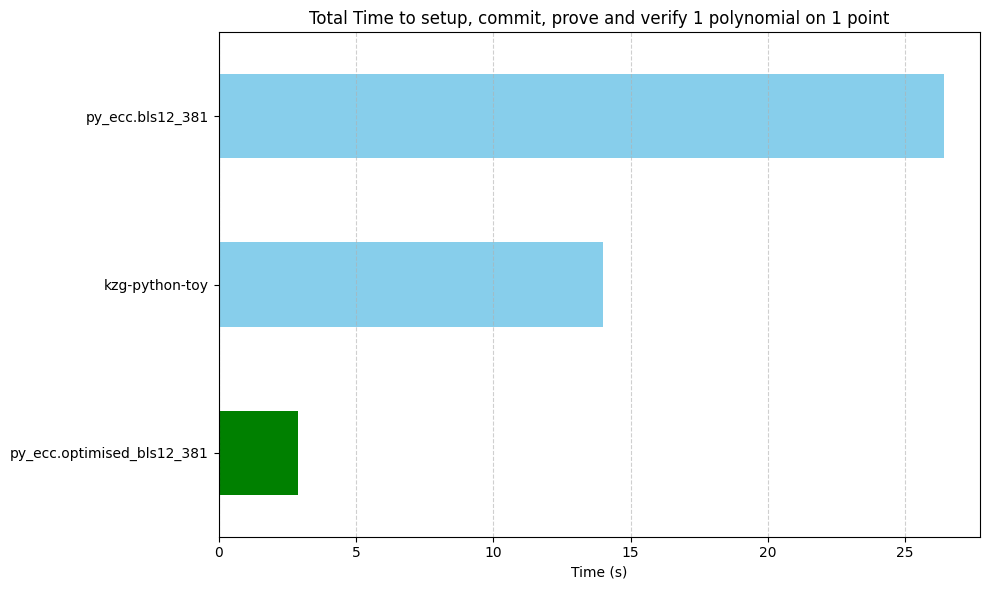

In [32]:
# @title
# Cell 18
from tabulate import tabulate

print("----------------------------------------------------")
print("|                                                  |")
print("|  Parameters                                      |")
print(f"|  - 1 input with a {len(fx_list[3])} degree f(x)                 |")
print("|  - Self-generated SRS, Commit, Prove, Verify     |")
print("|                                                  |")
print("----------------------------------------------------")
print()

# Convert to pandas DataFrame
header = library_benchmark_result[0][1:]  # first row (excluding empty label)
rows = [row for row in library_benchmark_result[1:]]
index = [row[0] for row in rows]
data = [row[1:] for row in rows]

df = pd.DataFrame(data, columns=header, index=index)

# Display nicely
print(tabulate(df.round(2), headers='keys', tablefmt='pretty'))
print()
#print(tabulate(df.T.round(2), headers='keys', tablefmt='github'))

# Plot total time comparison
colors = ['skyblue'] * len(df)
colors[-1] = 'green'

df['Total time (s)'].plot(kind='barh', figsize=(10, 6), color=colors)
plt.xlabel("Time (s)")
plt.title("Total Time to setup, commit, prove and verify 1 polynomial on 1 point")
plt.grid(True, axis='x', linestyle='--', alpha=0.6)
plt.gca().invert_yaxis()
# plt.axhline(y=1.5, color='red', linestyle='--', linewidth=1)
plt.tight_layout()
plt.show()

### Optimisation

To simulate a more realistic use of KZG, a total of 8 polynomials (4 in Fast_Mode) with a degree up to 4095 is used in the following tests. For more details in the setting, please look at the comment at the top of each cell.

#### Benchmark Baseline (Test case 04)

In [33]:
# @title
# Cell 12
# WARNING: Run time ~ 67 mintues on Google Colab with a 4095 degree polynomial

print("---------------------------------------------------------")
print("|                                                       |")
print("|        Optimisation Benchmark: Baseline Setup         |")
print("|                                                       |")
print("|  - Using py_ecc.optimized_bls12_381                   |")
print(f"|  - {len(fx_list)} polynomials committed individually               |")
print("|  - SRS generated on the fly (non-precomputed)         |")
print(f"|  - {points} distinct evaluation points (z-values) proved    |")
print(f"|  - {points} separate proofs verified                        |")
print("|                                                       |")
print("---------------------------------------------------------")

srs_list = list()
commitment_list = list()
proofs_list = list()
ys_list = list()
g2_tau_list = list()

# --------------------------------
# Trusted Setup
# --------------------------------
print(f"\n-- Trusted Setup --")
start_t1 = time.perf_counter()
for i in range(len(fx_list)):
    srs, g1, g2, g2_tau = opt_trusted_setup(fx_list[i])
    srs_list.append(srs)
    g2_tau_list.append(g2_tau)
end_t1 = time.perf_counter()
for i in range(len(fx_list)):
    print(f"SRS[{len(srs_list[i])-1}] \t= {compress_G1_affine(opt_normalize(srs_list[i][-1]))}")
print(f"g2_tau = {compress_G2_affine(opt_normalize(g2_tau))}")

# --------------------------------
# Generate commitment
# --------------------------------
start_t2 = time.perf_counter()
for i in range(len(fx_list)):
    commitment_list.append(opt_kzg_commit(fx_list[i], srs_list[i]))
end_t2 = time.perf_counter()
print("\n-- Commitment --")
for i in range(len(fx_list)):
    print(f"C[{i}] = {compress_G1_affine(opt_normalize(commitment_list[i]))}")

# --------------------------------
# Generate proof
# --------------------------------

start_t3 = time.perf_counter()
zs = [secrets.randbelow(opt_curve_order - 1) + 1 for _ in range(points)]
print(f"\n-- Prove at {points} different points --\nThe first z out of {len(zs)} =",zs[0])
print("Generating proofs... (It will take some time.)")
for i in range(len(fx_list)):
    ys_list.append([evaluate_polynomial(fx_list[i], z) for z in zs])
    proofs_list.append([opt_kzg_prove(fx_list[i], z, y, srs_list[i]) for z, y in zip(zs, ys_list[i])])
end_t3 = time.perf_counter()
for i in range(len(fx_list)):
    try:
        print(f"y[0] of fx[{i}] = {ys_list[i][0]}")
    except ValueError:
        print(f"y[0] of fx[{i}] is too large to print: {digit_count_bitwise(ys_list[i][0])} digits.")
    print(f"Proofs[0] of fx[{i}] = {compress_G1_affine(opt_normalize(proofs_list[i][0]))}")

# --------------------------------
# Verify proof
# --------------------------------
print(f"\n-- Verify {points} different points --")
valid_all = True
start_t4 = time.perf_counter()
for i in range(len(fx_list)):
  for j in range(points):
    valid = opt_kzg_verify(commitment_list[i], proofs_list[i][j], zs[j], ys_list[i][j], g1, g2, g2_tau_list[i])
    valid_all = valid_all and valid
    if not valid: print(f"KZG proof for fx_list[{i}] by point {j+1} is Invalid.")
end_t4 = time.perf_counter()
print(f"KZG proofs for all {len(fx_list)} commitments by {points} points are valid:", valid_all)

# --------------------------------
# Benchmarking
# --------------------------------
print("\n-- Benchmarking --")
print(f"{len(fx_list)} fxs Trusted Setup:            \t{end_t1 - start_t1:.6f} seconds")
print(f"{len(fx_list)} fxs Separate Commitment generation:  \t{end_t2 - start_t2:.6f} seconds")
print(f"{len(fx_list)} * {points}  Proofs generation:        \t{end_t3 - start_t3:.6f} seconds")
print(f"{len(fx_list)} * {points}  Separate Verification:       \t{end_t4 - start_t4:.6f} seconds")
print(f"Total time:                      \t{end_t4 - start_t1:.6f} seconds")

optimisation_benchmark_result.append([
    "Baseline",
    end_t1 - start_t1,
    end_t2 - start_t2,
    end_t3 - start_t3,
    end_t4 - start_t4,
    end_t4 - start_t1,
])



---------------------------------------------------------
|                                                       |
|        Optimisation Benchmark: Baseline Setup         |
|                                                       |
|  - Using py_ecc.optimized_bls12_381                   |
|  - 8 polynomials committed individually               |
|  - SRS generated on the fly (non-precomputed)         |
|  - 25 distinct evaluation points (z-values) proved    |
|  - 25 separate proofs verified                        |
|                                                       |
---------------------------------------------------------

-- Trusted Setup --
SRS[4095] 	= 0x912c37c54f513a09599f735145f6555b00975eef704b70ca964c7c2d0c92572004436a90eb62b68fc54d5e10f7873cdc
SRS[3990] 	= 0x843fdb659784203d82a8093740165b4671d05d360320970b2288883d590573964703e18390492faead3d26be75d307a4
SRS[297] 	= 0x9325c9fc8d2d592f52e8e99b44da552fc776716dfea8845be9087d3ca4b2dc7ce7a26add964f842c335029e9ba6e147b
SRS[38

#### Multi-point **Verification** (Test case 05)

In [34]:
# @title
# Cell 13
#print("---------------------------------------------------------")
print("---------------------------------------------------------")
print("|                                                       |")
print("|     Optimisation Benchmark: Multi-point Verification  |")
print("|                                                       |")
print("|  - Using py_ecc.optimized_bls12_381                   |")
print(f"|  - {len(fx_list)} polynomials committed individually               |")
print("|  - SRS generated on the fly (non-precomputed)         |")
print(f"|  - {points} evaluation points (z-values) proved and         |")
print("|    verified in a combined batch                       |")
print("|                                                       |")
print("|  - According to the original KZG paper, it's possible |")
print("|    to batch verify multiple evaluation proofs         |")
print("|    at different points for the same polynomial        |")
print("|    using random linear combinations                   |")
print("|                                                       |")
print("|  - The verification function is adapted from a PLONK  |")
print("|    implementation, with minor modifications due to    |")
print("|    py_ecc.FQ12 lacking native Python pow() support    |")
print("|                                                       |")
print("---------------------------------------------------------")

srs_list = list()
commitment_list = list()
ys_list = list()
proofs_list = list()
g2_tau_list = list()

# --------------------------------
# Trusted Setup
# --------------------------------
print(f"\n-- Trusted Setup --")
start_t1 = time.perf_counter()
for i in range(len(fx_list)):
    srs, g1, g2, g2_tau = opt_trusted_setup(fx_list[i])
    srs_list.append(srs)
    g2_tau_list.append(g2_tau)
end_t1 = time.perf_counter()
for i in range(len(fx_list)):
    print(f"SRS[{len(srs_list[i])-1}] \t= {compress_G1_affine(opt_normalize(srs_list[i][-1]))}")
print(f"g2_tau = {compress_G2_affine(opt_normalize(g2_tau))}")

# --------------------------------
# Generate commitment
# --------------------------------
start_t2 = time.perf_counter()
for i in range(len(fx_list)):
    commitment_list.append(opt_kzg_commit(fx_list[i], srs_list[i]))
end_t2 = time.perf_counter()
print("\n-- Commitment --")
for i in range(len(fx_list)):
    print(f"C[{i}] = {compress_G1_affine(opt_normalize(commitment_list[i]))}")

# --------------------------------
# Generate proof
# --------------------------------

start_t3 = time.perf_counter()
zs = [secrets.randbelow(opt_curve_order - 1) + 1 for _ in range(points)]
print(f"\n-- Prove at {points} different points --\nThe first z out of {len(zs)} =",zs[0])
print("Generating proofs... (It will take some time.)")
for i in range(len(fx_list)):
    ys_list.append([evaluate_polynomial(fx_list[i], z) for z in zs])
    proofs_list.append([opt_kzg_prove(fx_list[i], z, y, srs_list[i]) for z, y in zip(zs, ys_list[i])])
end_t3 = time.perf_counter()
for i in range(len(fx_list)):
    try:
        print(f"y[0] of fx[{i}] = {ys_list[i][0]}")
    except ValueError:
        print(f"y[0] of fx[{i}] is too large to print: {digit_count_bitwise(ys_list[i][0])} digits.")
    print(f"Proofs[0] of fx[{i}] = {compress_G1_affine(opt_normalize(proofs_list[i][0]))}")

# --------------------------------#
# Verify proof
# --------------------------------
print(f"\n-- Verify {points} different points --")
start_t4 = time.perf_counter()
valid_all = True
for i in range(len(fx_list)):
    valid = opt_batch_verify_same_poly(commitment_list[i], proofs_list[i], zs, ys_list[i], g1, g2, g2_tau_list[i])
    valid_all = valid_all and valid
    if not valid: print(f"KZG proof by {points} points for fx_list[{i}] is Invalid.")
end_t4 = time.perf_counter()
print(f"KZG proofs for all {len(fx_list)} commitments by {points} points are valid:", valid_all)

# start_t5 = time.perf_counter()
# check = fully_batch_verify_kzg(commitment_list, proofs_list, zs, ys_list, g1, g2, g2_tau_list)
# print(f"KZG proofs for all {len(fx_list)} commitments by {points} points are valid:", check)
# end_t5 = time.perf_counter()

# --------------------------------
# Benchmarking
# --------------------------------
print("\n-- Benchmarking --")
print(f"{len(fx_list)} fxs Trusted Setup:            \t{end_t1 - start_t1:.6f} seconds")
print(f"{len(fx_list)} fxs separate Commitment generation:  \t{end_t2 - start_t2:.6f} seconds")
print(f"{len(fx_list)} * {points}  Proofs generation:        \t{end_t3 - start_t3:.6f} seconds")
print(f"{len(fx_list)} * {points}  Batch Verification:       \t{end_t4 - start_t4:.6f} seconds")
print(f"Total time:                      \t{end_t4 - start_t1:.6f} seconds")

# print(f"{len(fx_list)} * {points}  Batch Verification 2:       \t{end_t5 - start_t5:.6f} seconds")

optimisation_benchmark_result.append([
    "Batch Verify",
    end_t1 - start_t1,
    end_t2 - start_t2,
    end_t3 - start_t3,
    end_t4 - start_t4,
    end_t4 - start_t1,
])



---------------------------------------------------------
|                                                       |
|     Optimisation Benchmark: Multi-point Verification  |
|                                                       |
|  - Using py_ecc.optimized_bls12_381                   |
|  - 8 polynomials committed individually               |
|  - SRS generated on the fly (non-precomputed)         |
|  - 25 evaluation points (z-values) proved and         |
|    verified in a combined batch                       |
|                                                       |
|  - According to the original KZG paper, it's possible |
|    to batch verify multiple evaluation proofs         |
|    at different points for the same polynomial        |
|    using random linear combinations                   |
|                                                       |
|  - The verification function is adapted from a PLONK  |
|    implementation, with minor modifications due to    |
|    py_ecc.FQ

#### Additive Homomorphism (Test case 06)

In [35]:
# @title
# Cell 14
print("---------------------------------------------------------")
print("|                                                       |")
print("|     Optimisation Benchmark: Additive Homomorphism     |")
print("|                                                       |")
print("|  - Using py_ecc.optimized_bls12_381                   |")
print(f"|  - {len(fx_list)} polynomials committed individually               |")
print("|  - SRS generated on the fly (non-precomputed)         |")
print(f"|  - {points} evaluation points (z-values) proved and         |")
print("|    verified separately                                |")
print("|                                                       |")
print("|  - Utilizes KZG's additive homomorphism property to   |")
print("|    merge 8 commitments into a single proof and        |")
print("|    verification process                               |")
print("|                                                       |")
print("|  - This technique is referenced in the KZG paper      |")
print("|    under 'Additive Homomorphism'                      |")
print("|                                                       |")
print("---------------------------------------------------------")
srs_list = list()
commitment_list = list()
ys_list = list()
proofs_list = list()
g2_tau_list = list()

# --------------------------------
# Combine polynomials using KZG's Additive Homomorphism property
# --------------------------------
max_len = 0
gx_list = fx_list[:]
for i in range(len(fx_list)):
    max_len = max(max_len,len(fx_list[i]))
for i in range(len(fx_list)):
    gx_list[i] = fx_list[i] + [0] * (max_len - len(fx_list[i]))
rs = [secrets.randbelow(opt_curve_order - 2) + 1 for _ in gx_list]
# hx = [sum(coeffs) % opt_curve_order for coeffs in zip(*fx_list)]
hx = [sum((r * coeff) % opt_curve_order for r, coeff in zip(rs, coeffs)) % opt_curve_order for coeffs in zip(*gx_list)]
print(f"\n-- Pad messages to same length + random linear combination --\nhx (length: {len(hx)})")

# --------------------------------
# Trusted Setup
# --------------------------------
print(f"\n-- Trusted Setup --")
start_t1 = time.perf_counter()
srs, g1, g2, g2_tau = opt_trusted_setup(hx)
end_t1 = time.perf_counter()
print(f"SRS[{len(srs)-1}] of hx = {compress_G1_affine(opt_normalize(srs[-1]))}")
print(f"g2_tau={compress_G2_affine(opt_normalize(g2_tau))}")

# --------------------------------
# Generate commitment
# --------------------------------
start_t2 = time.perf_counter()
commitment = opt_kzg_commit(hx, srs)
end_t2 = time.perf_counter()
print("\n-- Commitment --\nC = ",compress_G1_affine(opt_normalize((commitment))))

# --------------------------------
# Generate proof
# --------------------------------

start_t3 = time.perf_counter()
zs = [secrets.randbelow(opt_curve_order - 1) + 1 for _ in range(points)]
print(f"\n-- Prove at {points} different points --\nThe first z out of {len(zs)} =",zs[0])
print("Generating proofs... (It will take some time.)")
ys = [evaluate_polynomial(hx, z) for z in zs]
proofs = [opt_kzg_prove(hx, z, y, srs) for z, y in zip(zs, ys)]
end_t3 = time.perf_counter()
try:
    print(f"ys[0] of hx = {ys[0]}")
except ValueError:
    print(f"ys[0] of hx is too large to print: {digit_count_bitwise(ys[0])} digits.")
print(f"Proofs[0] of hx = {compress_G1_affine(opt_normalize(proofs[0]))}")

# --------------------------------
# Verify proof
# --------------------------------
print(f"\n-- Verify {points} different points --")
valid_all = True
start_t4 = time.perf_counter()
for j in range(points):
  valid = opt_kzg_verify(commitment, proofs[j], zs[j], ys[j], g1, g2, g2_tau)
  valid_all = valid_all and valid
  if not valid: print(f"KZG proof for hx by point {j+1} is Invalid.")
end_t4 = time.perf_counter()
print(f"KZG proofs for all {len(fx_list)} commitments by {points} points are valid:", valid_all)

# --------------------------------
# Benchmarking
# --------------------------------
print("\n-- Benchmarking --")
print(f"{len(fx_list)} fxs Trusted Setup:            \t{end_t1 - start_t1:.6f} seconds")
print(f"{len(fx_list)} fxs Combined Commitment generation:  \t{end_t2 - start_t2:.6f} seconds")
print(f"{len(fx_list)} * {points}  Proofs generation:        \t{end_t3 - start_t3:.6f} seconds")
print(f"{len(fx_list)} * {points}  Separate Verification:       \t{end_t4 - start_t4:.6f} seconds")
print(f"Total time:                      \t{end_t4 - start_t1:.6f} seconds")

optimisation_benchmark_result.append([
    "Additive hom",
    end_t1 - start_t1,
    end_t2 - start_t2,
    end_t3 - start_t3,
    end_t4 - start_t4,
    end_t4 - start_t1,
])



---------------------------------------------------------
|                                                       |
|     Optimisation Benchmark: Additive Homomorphism     |
|                                                       |
|  - Using py_ecc.optimized_bls12_381                   |
|  - 8 polynomials committed individually               |
|  - SRS generated on the fly (non-precomputed)         |
|  - 25 evaluation points (z-values) proved and         |
|    verified separately                                |
|                                                       |
|  - Utilizes KZG's additive homomorphism property to   |
|    merge 8 commitments into a single proof and        |
|    verification process                               |
|                                                       |
|  - This technique is referenced in the KZG paper      |
|    under 'Additive Homomorphism'                      |
|                                                       |
--------------

#### Trusted SRS (Test case 07)

In [36]:
# @title
# Cell 15
# ------------------------------------------------------------
# Code to load public Trusted SRS
# ------------------------------------------------------------
import json

data = json.loads(SRS_str)
g1_hex_list = data["SRS"]["G1Powers"]
g2_hex_list = data["SRS"]["G2Powers"]
g1_points = [decompress_G1(int(s[2:], 16)) for s in data["SRS"]["G1Powers"]]
g2_points = []
for s in data["SRS"]["G2Powers"]:
    hex_str = s[2:]  # Remove '0x'
    if len(hex_str) != 192:
        raise ValueError("Each G2 compressed point must be 96 bytes (192 hex characters)")
    z1 = int(hex_str[:96], 16)
    z2 = int(hex_str[96:], 16)
    g2_points.append(decompress_G2((z1, z2)))


def opt_trusted_setup_with_trusted_srs(fx):
    degree = len(fx) - 1
    if degree >= len(g1_points):
        return opt_trusted_setup(fx) # Use the slow version
    g1 = opt_G1
    g2 = opt_G2
    srs = g1_points[:degree + 1]
    g2_tau = g2_points[1]

    if DEBUG_OUTPUT:
        print(f"\nLoaded SRS (first 5 terms out of {degree+1}):")
        for i, point in enumerate(srs[:min(5, len(srs))]):
            print(f"g^tau^{i} = {opt_normalize(point)}")

    return srs, g1, g2, g2_tau

print("Done loading code for Trusted SRS.")

Done loading code for Trusted SRS.


In [37]:
# @title
# Cell 16
print("---------------------------------------------------------")
print("|                                                       |")
print("|       Optimisation Benchmark: Trusted SRS             |")
print("|                                                       |")
print("|  - Using py_ecc.optimized_bls12_381                   |")
print(f"|  - {len(fx_list)} polynomials committed individually               |")
print("|  - Public, pre-generated trusted SRS is used          |")
print(f"|  - {points} evaluation points (z-values) proved and         |")
print("|    verified separately                                |")
print("|                                                       |")
print("|  - Supports polynomials up to degree 4095             |")
print("|  - For degrees > 4095, falls back to on-the-fly       |")
print("|    SRS generation (significantly slower)              |")
print("|                                                       |")
print("---------------------------------------------------------")

srs_list = list()
commitment_list = list()
proofs_list = list()
ys_list = list()
g2_tau_list = list()

# --------------------------------
# Trusted Setup
# --------------------------------
print(f"\n-- Trusted Setup --")
start_t1 = time.perf_counter()
for i in range(len(fx_list)):
    srs, g1, g2, g2_tau = opt_trusted_setup_with_trusted_srs(fx_list[i])
    srs_list.append(srs)
    g2_tau_list.append(g2_tau)
end_t1 = time.perf_counter()
for i in range(len(fx_list)):
    print(f"SRS[{len(srs_list[i])-1}] \t= {compress_G1_affine(opt_normalize(srs_list[i][-1]))}")
print(f"g2_tau = {compress_G2_affine(opt_normalize(g2_tau))}")

# --------------------------------
# Generate commitment
# --------------------------------
start_t2 = time.perf_counter()
for i in range(len(fx_list)):
    commitment_list.append(opt_kzg_commit(fx_list[i], srs_list[i]))
end_t2 = time.perf_counter()
print("\n-- Commitment --")
for i in range(len(fx_list)):
    print(f"C[{i}] = {compress_G1_affine(opt_normalize(commitment_list[i]))}")

# --------------------------------
# Generate proof
# --------------------------------

start_t3 = time.perf_counter()
zs = [secrets.randbelow(opt_curve_order - 1) + 1 for _ in range(points)]
print(f"\n-- Prove at {points} different points --\nThe first z out of {len(zs)} =",zs[0])
print("Generating proofs... (It will take some time.)")
for i in range(len(fx_list)):
    ys_list.append([evaluate_polynomial(fx_list[i], z) for z in zs])
    proofs_list.append([opt_kzg_prove(fx_list[i], z, y, srs_list[i]) for z, y in zip(zs, ys_list[i])])
end_t3 = time.perf_counter()
for i in range(len(fx_list)):
    try:
        print(f"y[0] of fx[{i}] = {ys_list[i][0]}")
    except ValueError:
        print(f"y[0] of fx[{i}] is too large to print: {digit_count_bitwise(ys_list[i][0])} digits.")
    print(f"Proofs[0] of fx[{i}] = {compress_G1_affine(opt_normalize(proofs_list[i][0]))}")

# --------------------------------
# Verify proof
# --------------------------------
print(f"\n-- Verify {points} different points --")
valid_all = True
start_t4 = time.perf_counter()
for i in range(len(fx_list)):
  for j in range(points):
    valid = opt_kzg_verify(commitment_list[i], proofs_list[i][j], zs[j], ys_list[i][j], g1, g2, g2_tau_list[i])
    valid_all = valid_all and valid
    if not valid: print(f"KZG proof for fx_list[{i}] by point {j+1} is Invalid.")
end_t4 = time.perf_counter()
print(f"KZG proofs for all {len(fx_list)} commitments by {points} points are valid:", valid_all)

# --------------------------------
# Benchmarking
# --------------------------------
print("\n-- Benchmarking --")
print(f"{len(fx_list)} fxs Public Trusted Setup:            \t{end_t1 - start_t1:.6f} seconds")
print(f"{len(fx_list)} fxs Separate Commitment generation:  \t{end_t2 - start_t2:.6f} seconds")
print(f"{len(fx_list)} * {points}  Proofs generation:        \t{end_t3 - start_t3:.6f} seconds")
print(f"{len(fx_list)} * {points}  Separate Verification:       \t{end_t4 - start_t4:.6f} seconds")
print(f"Total time:                      \t{end_t4 - start_t1:.6f} seconds")

optimisation_benchmark_result.append([
    "Trusted SRS",
    end_t1 - start_t1,
    end_t2 - start_t2,
    end_t3 - start_t3,
    end_t4 - start_t4,
    end_t4 - start_t1,
])


---------------------------------------------------------
|                                                       |
|       Optimisation Benchmark: Trusted SRS             |
|                                                       |
|  - Using py_ecc.optimized_bls12_381                   |
|  - 8 polynomials committed individually               |
|  - Public, pre-generated trusted SRS is used          |
|  - 25 evaluation points (z-values) proved and         |
|    verified separately                                |
|                                                       |
|  - Supports polynomials up to degree 4095             |
|  - For degrees > 4095, falls back to on-the-fly       |
|    SRS generation (significantly slower)              |
|                                                       |
---------------------------------------------------------

-- Trusted Setup --
SRS[4095] 	= 0xb0bfaf56a5aa59b48960aa7c1617e832e65c823523fb2a5cd44ba606800501cf873e8db1d0dda64065285743dc4078

#### Full Optimisation (Test case 08)

In [38]:
# @title
# Cell 17
print("---------------------------------------------------------")
print("|                                                       |")
print("|             Optimisation Benchmark: All               |")
print("|                                                       |")
print("|  - Using py_ecc.optimized_bls12_381                   |")
print(f"|  - {len(fx_list)} input polynomials committed as one               |")
print("|  - Public, pre-generated trusted SRS is used          |")
print(f"|  - {points} evaluation points (z-values) proved and         |")
print("|    verified in a combined fashion                     |")
print("|                                                       |")
print("---------------------------------------------------------")


srs_list = list()
commitment_list = list()
ys_list = list()
proofs_list = list()
g2_tau_list = list()

# --------------------------------
# Combine polynomials using KZG's Additive Homomorphism property
# --------------------------------
max_len = 0
gx_list = fx_list[:]
for i in range(len(fx_list)):
    max_len = max(max_len,len(fx_list[i]))
for i in range(len(fx_list)):
    gx_list[i] = fx_list[i] + [0] * (max_len - len(fx_list[i]))
rs = [secrets.randbelow(opt_curve_order - 2) + 1 for _ in fx_list]
hx = [sum((r * coeff) % opt_curve_order for r, coeff in zip(rs, coeffs)) % opt_curve_order for coeffs in zip(*gx_list)]
print(f"\n-- Pad messages to same length + random linear combination --\nhx (length: {len(hx)})")

# --------------------------------
# Trusted Setup
# --------------------------------
print(f"\n-- Trusted Setup --")
start_t1 = time.perf_counter()
srs, g1, g2, g2_tau = opt_trusted_setup_with_trusted_srs(hx)
end_t1 = time.perf_counter()
print(f"SRS[{len(srs)-1}] of hx = {compress_G1_affine(opt_normalize(srs[-1]))}")
print(f"g2_tau={compress_G2_affine(opt_normalize(g2_tau))}")

# --------------------------------
# Generate commitment
# --------------------------------
start_t2 = time.perf_counter()
commitment = opt_kzg_commit(hx, srs)
end_t2 = time.perf_counter()
print("\n-- Commitment --\nC = ",compress_G1_affine(opt_normalize(commitment)))

# --------------------------------
# Generate proof
# --------------------------------
start_t3 = time.perf_counter()
zs = [secrets.randbelow(opt_curve_order - 1) + 1 for _ in range(points)]
print(f"\n-- Prove at {points} different points --\nThe first z out of {len(zs)} =",zs[0])
print("Generating proofs... (It will take some time.)")
ys = [evaluate_polynomial(hx, z) for z in zs]
proofs = [opt_kzg_prove(hx, z, y, srs) for z, y in zip(zs, ys)]
end_t3 = time.perf_counter()
try:
    print(f"ys[0] of hx = {ys[0]}")
except ValueError:
    print(f"ys[0] of hx is too large to print: {digit_count_bitwise(ys[0])} digits.")
print(f"Proofs[0] of hx = {compress_G1_affine(opt_normalize(proofs[0]))}")

# --------------------------------
# Verify proof
# --------------------------------
print(f"\n-- Verify {points} different points --")
start_t4 = time.perf_counter()
valid = opt_batch_verify_same_poly(commitment, proofs, zs, ys, g1, g2, g2_tau)
end_t4 = time.perf_counter()
print(f"KZG proofs for all {len(fx_list)} commitments by {points} points are valid:", valid)

# --------------------------------
# Benchmarking
# --------------------------------
print("\n-- Benchmarking --")
print(f"{len(fx_list)} fxs Public Trusted Setup:            \t{end_t1 - start_t1:.6f} seconds")
print(f"{len(fx_list)} fxs Combined Commitment generation:  \t{end_t2 - start_t2:.6f} seconds")
print(f"{len(fx_list)} * {points}  Proofs generation:        \t{end_t3 - start_t3:.6f} seconds")
print(f"{len(fx_list)} * {points}  Combined Verification:       \t{end_t4 - start_t4:.6f} seconds")
print(f"Total time:                      \t{end_t4 - start_t1:.6f} seconds")

optimisation_benchmark_result.append([
    "All optimisation",
    end_t1 - start_t1,
    end_t2 - start_t2,
    end_t3 - start_t3,
    end_t4 - start_t4,
    end_t4 - start_t1,
])



---------------------------------------------------------
|                                                       |
|             Optimisation Benchmark: All               |
|                                                       |
|  - Using py_ecc.optimized_bls12_381                   |
|  - 8 input polynomials committed as one               |
|  - Public, pre-generated trusted SRS is used          |
|  - 25 evaluation points (z-values) proved and         |
|    verified in a combined fashion                     |
|                                                       |
---------------------------------------------------------

-- Pad messages to same length + random linear combination --
hx (length: 4096)

-- Trusted Setup --
SRS[4095] of hx = 0xb0bfaf56a5aa59b48960aa7c1617e832e65c823523fb2a5cd44ba606800501cf873e8db1d0dda64065285743dc40786e
g2_tau=0xb85cbfee53492714734429b7b38608e23926c911cceceac9a36851477ba4c60b087041de621000edc98edada20c1def215bfd7dd8cdeb128843bc287230af389261870

### Optimisation Comparison Table and Chart

+------------------+---------------+-----------------------+------------------+--------------+----------------+
|                  | Trusted Setup | Commitment generation | Proof generation | Verification | Total time (s) |
+------------------+---------------+-----------------------+------------------+--------------+----------------+
|     Baseline     |    134.98     |        107.58         |     3328.12      |    338.6     |    3909.29     |
|   Batch Verify   |    133.93     |        106.56         |     3312.89      |    189.77    |    3743.16     |
|   Additive hom   |     50.53     |         50.16         |     1241.83      |    42.57     |     1385.1     |
|   Trusted SRS    |      0.0      |        109.53         |     3359.76      |    347.77    |    3817.08     |
| All optimisation |      0.0      |         50.97         |      1248.6      |    23.78     |    1323.36     |
+------------------+---------------+-----------------------+------------------+--------------+----------

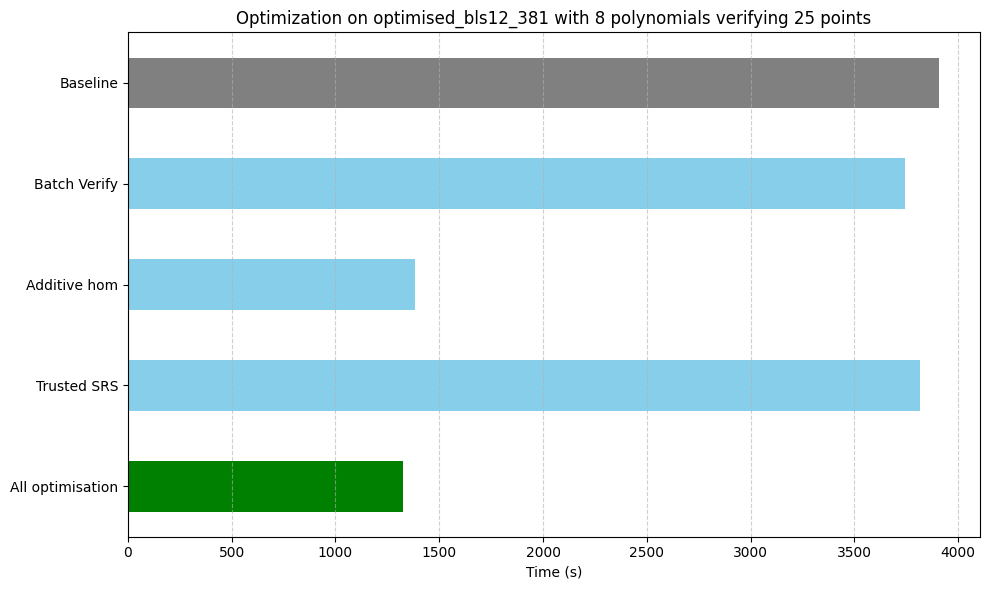

In [39]:
# @title
# Cell 19
header = optimisation_benchmark_result[0][1:]  # first row (excluding empty label)
rows = [row for row in optimisation_benchmark_result[1:]]
index = [row[0] for row in rows]
data = [row[1:] for row in rows]

df2 = pd.DataFrame(data, columns=header, index=index)

# Display nicely
print(tabulate(df2.round(2), headers='keys', tablefmt='pretty'))
print()

# Plot total time comparison
colors = ['skyblue'] * len(df2)
colors[0] = 'grey'
colors[-1] = 'green'

df2['Total time (s)'].plot(kind='barh', figsize=(10, 6), color=colors)
plt.xlabel("Time (s)")
plt.title(f"Optimization on optimised_bls12_381 with 8 polynomials verifying {points} points")
plt.grid(True, axis='x', linestyle='--', alpha=0.6)
plt.gca().invert_yaxis()
# plt.axhline(y=1.5, color='red', linestyle='--', linewidth=1)
plt.tight_layout()
plt.show()

In [40]:
# Cell 20
# Record full Run time
end_time = time.perf_counter()
print(f"File Run time:             \t{end_time - start_time:.6f} seconds")

File Run time:             	14226.837032 seconds


## Other Test Cases

* On top of the 3 KZG Implementation showcases and 5 Code Optimisation showcases, we have prepared an additional 4 groups of standard test cases to testify the accuracy of the codes, as well as a "Real Life Scenario Test Case".

> For performance and readability reason, <font color="red">the two Real Data Test Cases are loaded in their own separate files</font>.

  * **The Basic Tests**
    * Single-term polynomial f(x) = 5
    * Small polynomial f(x) = 3x + 2
    * Zero polynomial f(x) = `0`
  * **The Batch Tests**
    * Multi-point same polynomial verification f(x) = 3x + 2 at `5` points
    * Multiple evaluations on `2` different polynomials at 2 points
  * **The Edge Tests**
    * Maximum degree of the polynomial exceeded Trusted SRS: degree 4100
    * Sparse polynomial
    * Negative coefficients
    * z = 0
    * f(z) = 0
  * **The Invalid Verification Tests**
    * A different SRS at verification
    * A tampered commitment
    * A tampered f(z)
    * A tampered proof to verify
  * The **Real Life Scenario Test Case** (separate file)
    * "Ethereum data blob: 128KB per blob. Specific Example: Arbitrum batch containing 1,000 transactions → encoded as polynomial coefficients → KZG commitment, proof. Prove data availability"
  * To re-run the following, you need to run
    * `Cell 02` imports libraries
    * `Cell 03` load ultility functions
    * `Cell 05` load the Trusted SRS
    * `Cell 06` load the core KZG codes
    * `Cell 15` load the code to load the Trusted SRS
    * `Cell 21` load the codes to run the tests
      * It is the same code from `Cell 17` with minor change to the outputs and some limited ways to "tamper" the data.

In [41]:
# @title
# Cell 21
# Run Cell 1,2,3,5,6,15 and 21 first if you only want to run the tests in Cell 22 to 25

def kzg_commitments_test(fx_list, points,z=None,s=None,c=None,y=None,p=None):

    test_start = time.perf_counter()

    print(f"\nRunning KZG commitments Tests...")
    print(f"- Number of Input: {len(fx_list)}")

    if len(fx_list) > 1:
        max_len = 0
        for i in range(len(fx_list)):
            max_len = max(max_len,len(fx_list[i]))
        for i in range(len(fx_list)):
            fx_list[i] += [0] * (max_len - len(fx_list[i]))
        rs = [secrets.randbelow(opt_curve_order - 2) + 1 for _ in fx_list]
        hx = [sum((r * coeff) % opt_curve_order for r, coeff in zip(rs, coeffs)) % opt_curve_order for coeffs in zip(*fx_list)]
        print(f"- First 5 coeffs of the combined inputs: {hx[:5]}")
    else:
        hx = fx_list[0]
        print(f"- First 5 coeffs of the input: {hx[:5]}")

    # --------------------------------
    # Trusted Setup
    # --------------------------------
    srs, g1, g2, g2_tau = opt_trusted_setup_with_trusted_srs(hx)
    srs2 = None
    if s is not None:
        srs2 = opt_generate_srs(len(hx)-1,secrets.randbelow(opt_curve_order - 1) + 1)
    print(f"- Highest SRS at {len(srs)-1} degree = {compress_G1_affine(opt_normalize(srs[-1]))}")

    # --------------------------------
    # Generate commitment
    # --------------------------------
    print("\nGenerating commitment...")
    commitment = opt_kzg_commit(hx, srs)
    print("- C = ",compress_G1_affine(opt_normalize(commitment)))
    if c is not None:
        commitment = opt_add(commitment, opt_G1)
        print("- Tampered C = ",compress_G1_affine(opt_normalize(commitment)))

    # --------------------------------
    # Generate proof
    # --------------------------------
    print("\nGenerating proof(s)...")
    if z is not None and points == 1:
      zs = [z]
    else:
      zs = [secrets.randbelow(opt_curve_order - 1) + 1 for _ in range(points)]
    print(f"- First z = {zs[0]}")
    ys = [evaluate_polynomial(hx, z) for z in zs]
    try:
        print(f"- First y = {ys[0]}")
    except ValueError:
        print(f"- First y is too large to print: {digit_count_bitwise(ys[0])} digits.")
    if y is not None and points == 1:
        ys = [ys[0]+1]
        try:
            print(f"- Tampered y = {ys[0]}")
        except ValueError:
            print(f"- Tampered y is too large to print: {digit_count_bitwise(ys[0])} digits.")
    if s is not None:
        srs = srs2
        print(f"- Tampered SRS at {len(srs2)-1} degree = ({opt_normalize(srs2[-1])})")
    proofs = [opt_kzg_prove(hx, z, y, srs) for z, y in zip(zs, ys)]
    print(f"- First Proofs = {compress_G1_affine(opt_normalize(proofs[0]))}")
    if p is not None and points == 1:
        proofs = [opt_add(proofs[0], opt_G1)]
        print(f"- Tampered Proofs[0] = {compress_G1_affine(opt_normalize(proofs[0]))}")

    # --------------------------------
    # Verify proof
    # --------------------------------
    print(f"\nVerifying...")
    valid = opt_batch_verify_same_poly(commitment, proofs, zs, ys, g1, g2, g2_tau)
    print(f"- KZG proofs for all {len(fx_list)} commitments by {points} points are valid:", valid)
    test_end = time.perf_counter()
    print(f"Time used: {test_end - test_start:.6f} seconds".rjust(80))
    print()
    print("=" * 80,"\n")

print("Done loading kzg_commitments_test()")

Done loading kzg_commitments_test()


### Basic Cases

In [42]:
# Cell 22
print("---------------------------------------------------------")
print("|                                                       |")
print("|                       Test Case                       |")
print("|                                                       |")
print("---------------------------------------------------------")
print()

print("Basic Cases\n")
print("=" * 80,"\n")

print("Test Case 1: Single-term polynomial f(x) = 5")
kzg_commitments_test([[5]],1)

print("Test Case 2: Small polynomial f(x) = 3x + 2")
kzg_commitments_test([[2,3]],1)

print("Test Case 3: Zero polynomial f(x) = 0")
kzg_commitments_test([[0]],1)

---------------------------------------------------------
|                                                       |
|                       Test Case                       |
|                                                       |
---------------------------------------------------------

Basic Cases


Test Case 1: Single-term polynomial f(x) = 5

Running KZG commitments Tests...
- Number of Input: 1
- First 5 coeffs of the input: [5]
- Highest SRS at 0 degree = 0x97f1d3a73197d7942695638c4fa9ac0fc3688c4f9774b905a14e3a3f171bac586c55e83ff97a1aeffb3af00adb22c6bb

Generating commitment...
- C =  0xb0e7791fb972fe014159aa33a98622da3cdc98ff707965e536d8636b5fcc5ac7a91a8c46e59a00dca575af0f18fb13dc

Generating proof(s)...
- First z = 48302239614617783721608980569968625508813749625583410164433084799178263883955
- First y = 5
- First Proofs = 0x800000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000

Verifying...
- KZG proofs for all 1 commitments by 1 poi

### Batch Cases

In [43]:
# Cell 23
print("Batch Cases\n")
print("=" * 80,"\n")

print("Test Case 4: Multiple evaluations on f(x) =  5x^2 + 3x + 2 - check 5 points")
kzg_commitments_test([[2,3,5]],5)

print("Test Case 5: Multiple evaluations on 2 different polynomials - check 2 points")
kzg_commitments_test([[2,3,5],[13,11,7,3,2]],2)

Batch Cases


Test Case 4: Multiple evaluations on f(x) =  5x^2 + 3x + 2 - check 5 points

Running KZG commitments Tests...
- Number of Input: 1
- First 5 coeffs of the input: [2, 3, 5]
- Highest SRS at 2 degree = 0x8029c8ce0d2dce761a7f29c2df2290850c85bdfaec2955626d7acc8864aeb01fe16c9e156863dc63b6c22553910e27c1

Generating commitment...
- C =  0x9883277e7bc627b306c9a25ccea7bcb45f181b457dfb3c39e929959c110c1ec5b861a50359bd712fed09c49f818d1f3a

Generating proof(s)...
- First z = 23998757939527928980509129572724295050491345595817195574976527746335295191763
- First y = 24851347065595130009332843953772846622954984718317150556194365802543914671454
- First Proofs = 0x857cc84e4a0e32ac8d0a9f250cdcb5f9dddc5d9f0fca23c49d3f93e1a78249e7c262151a68a3ee3e5fad6e3833411efd

Verifying...
- KZG proofs for all 1 commitments by 5 points are valid: True
                                                     Time used: 5.142370 seconds


Test Case 5: Multiple evaluations on 2 different polynomials - check 2 poin

### Edge Cases

In [44]:
# Cell 24
print("Edge Cases\n")
print("=" * 80,"\n")

print("Test Case 6: Maximum supported degree f(x) with a 4100 degree")
kzg_commitments_test([[i for i in (range(4101))]],1)

print("Test Case 7: Sparse polynomial f(x) = x^4095")
fx=[0] * 4096
fx[4095] = 1
kzg_commitments_test([fx],1)

print("Test Case 8: Negative coefficients f(x) = -3x^2 + 2x - 5")
kzg_commitments_test([[-5,2,-3]],1)

print("Test Case 9: z = 0 where f(x) = 5x^4 + 4x^3 + 3x^2 + 2X + 1")
kzg_commitments_test([[1,2,3,4,5]],1,z=0)

print("Test Case 10: f(5) = 0 where f(x) = 2x^2 + x - 55")
kzg_commitments_test([[-55,1,2]],1,z=5)


Edge Cases


Test Case 6: Maximum supported degree f(x) with a 4100 degree

Running KZG commitments Tests...
- Number of Input: 1
- First 5 coeffs of the input: [0, 1, 2, 3, 4]
- Highest SRS at 4100 degree = 0xaf456a4151a8b836e26dfd853eb01e62e856d542e3146880c3a29a1e6d4b6c3d9ae932538d734f408889e84e8a86978c

Generating commitment...
- C =  0xa1bc3ca29e094a3485d530a29c381a42251321a7ee586b5651092ba59699929cf6b00a26c6b3aadf8e767b7a89d037cc

Generating proof(s)...
- First z = 30206132818056266072842892462643821861977809920934072706812003937856596202417
- First y = 39065892390051576170339452292863317161767960172075399650058550766736618413282
- First Proofs = 0x825b9a454bb1e14ce12f212dd06a60eb34a94ee3a9a9abab4e4c1bb283053d9deb273bb101353f0b33cff35c3a2377b4

Verifying...
- KZG proofs for all 1 commitments by 1 points are valid: True
                                                   Time used: 103.605051 seconds


Test Case 7: Sparse polynomial f(x) = x^4095

Running KZG commitments Tests...
- 

### Invalid Cases

In [45]:
# Cell 25
print("Invalid Verification Cases f(x) = 13x^6 + 11x^5 + 7x^4 + 3x^3 + 2x^2 + x\n")
print("=" * 80,"\n")

print("Test Case 11: Use different srs for proof/verify")
kzg_commitments_test([[0,1,2,3,7,11,13]],1,s=1)

print("Test Case 12: Tamper with the commitment")
kzg_commitments_test([[0,1,2,3,7,11,13]],1,c=1)

print("Test Case 13: Tamper with y")
kzg_commitments_test([[0,1,2,3,7,11,13]],1,y=1)

print("Test Case 14: Tamper with the proof")
kzg_commitments_test([[0,1,2,3,7,11,13]],1,p=1)

Invalid Verification Cases f(x) = 13x^6 + 11x^5 + 7x^4 + 3x^3 + 2x^2 + x


Test Case 11: Use different srs for proof/verify

Running KZG commitments Tests...
- Number of Input: 1
- First 5 coeffs of the input: [0, 1, 2, 3, 7]
- Highest SRS at 6 degree = 0xb10f4cf8ec6e02491bbe6d9084d88c16306fdaf399fef3cd1453f58a4f7633f80dc60b100f9236c3103eaf727468374f

Generating commitment...
- C =  0x935e097f647f55716133b5542a04ebd61fe683bf7dcfab52348796bd290a8b86b31d8abe667cfc6c5d0baf265dada19c

Generating proof(s)...
- First z = 23929192088855427475749380493650901132855318729925661914398277292696744868932
- First y = 23293029282025506137952509035171162306144115494057129550308943845119178156146
- Tampered SRS at 6 degree = ((202800835883661526566949985974843555197465071696775960306332351283017454699703654733910381531742028356280187364217, 2548532847006912282669005690511649717947012214091575685883029031788897218881801595324393164243696033979823972694520))
- First Proofs = 0x8864d07b024b11317b8779b55d0

### The Real Life Scenario Test Case (Please see this test case in a separate file `KZG_commitments_testcase_Ethereum_data_blob.ipynb` in the repository)

## Acknowledgements & References

- **KZG Commitment Scheme**  
  *Constant-Size Commitments to Polynomials and Their Applications*  
  *Aniket Kate, Gregory M. Zaverucha, Ian Goldberg*  
  https://iacr.org/archive/asiacrypt2010/6477178/6477178.pdf

- **Building Trust with KZG Commitment: Understanding, Implementation, and Python Code Samples**
  https://medium.com/cumberlandlabs/building-trust-with-kzg-commitment-understanding-implementation-and-python-code-samples-c73075d941e6

- **Zero-Knowledge Proofs: KZG Polynomial Commitment and Verification**
  https://medium.com/@abhiveerhome/zero-knowledge-proofs-kzg-polynomial-commitment-and-verification-5a82d62fdefd

- **py_ecc** — Ethereum Foundation's elliptic curve library  
  https://github.com/ethereum/py_ecc/

- **kzg-python-toy** — A reference implementation by *Kassandra of Troy*  
  https://github.com/kassandraoftroy/kzg-python-toy/

- **Public Trusted SRS** — From the Ethereum KZG Ceremony  
  https://ceremony.ethereum.org/#/record